In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets                       # package for plotting 
using CSV
using DelimitedFiles

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", 
    types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [3]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes= dropmissing(phenotypes, :FinADG)
phenotypes= dropmissing(phenotypes, :Nur2ADG)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [4]:
Nur2ADG_model_equations = "Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
                           FinADG = intercept + Batch + Died+ EntryAge + FinPenBatch + SowID"
Nur2ADG_R=[0.115504E-01 0
           0 0.115504E-01]
Nur2ADG_model=build_model(Nur2ADG_model_equations,Nur2ADG_R);

In [5]:
set_covariate(Nur2ADG_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [6]:
Nur2ADG_G1=0.107150E-02
set_random(Nur2ADG_model,"NurPenBatch",Nur2ADG_G1)
Nur2ADG_G12=0.107150E-02
set_random(Nur2ADG_model,"FinPenBatch",Nur2ADG_G12)

NurPenBatch is not found in model equation 2.
FinPenBatch is not found in model equation 1.


In [7]:
Nur2ADG_G2=[0.927471E-03 0
           0 0.927471E-03]
set_random(Nur2ADG_model,"SowID",Nur2ADG_G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 30.508944 seconds (37.31 k allocations: 10.393 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [9]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [10]:
Nur2ADG_G3=[0.295395E-02  0
            0 0.295395E-02]
@time add_genotypes(Nur2ADG_model,M,Nur2ADG_G3,header=false, rowID=rowID)

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 14.742693 seconds (7.64 M allocations: 15.967 GiB, 1.35% gc time)


6.0f0

In [11]:
@time Nur2ADG_outB=runMCMC(Nur2ADG_model,phenotypes,methods="BayesB", missing_phenotypes=true,
    estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998),
    estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true, 
    output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
The number of observations with both genotypes and phenotypes used in the analysis is 2384.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
 9.0e-6  0.0   
 0.0     9.0e-6



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + Died + EntryAge + NurPenBatch + SowID
FinADG = intercept + Batch + Died+ EntryAge + FinPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
Died            factor       fixed                2
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             422
SowID           factor       random            1023
FinPenBatch     factor     

running MCMC ...100%|███████████████████████████████████| Time: 3 days, 3:00:23




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


270062.084592 seconds (2.05 T allocations: 134.794 TiB, 28.31% gc time)


Dict{Any,Any} with 9 entries:
  "ScaleEffectVargeno"           => 4×3 DataFrame…
  "EBV_Nur2ADG"                  => 3205×3 DataFrame…
  "heritability"                 => 2×3 DataFrame…
  "location parameters"          => 2788×5 DataFrame…
  "residual variance"            => 4×3 DataFrame…
  "marker effects geno"          => 870344×5 DataFrame…
  "EBV_FinADG"                   => 3205×3 DataFrame…
  "genetic_variance"             => 4×3 DataFrame…
  "marker effects variance geno" => 4×3 DataFrame…

In [12]:
@time Nur2ADG_outB,Nur2ADG_winVarProps = GWAS("MCMC_samples_marker_effects_geno_Nur2ADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    Nur2ADG_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:20:13


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000233781    │ 9.55007e-5  │ 7.99     │ 1.0        │ 1.0       │
│ 2    │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 2.94044e-5     │ 5.16892e-5  │ 1.0      │ 0.5        │ 0.75      │
│ 3    │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.05711e-5     │ 1.99899e-5  │ 0.36     │ 0.402222   │ 0.634074  │
│ 4    │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 7.48178e-6     │ 1.60295e-5  │ 0.26     │ 0.382222   │ 0.571111  │
│ 5    │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 9.77103e-6     │ 1.95798e-5  │ 0.34     │ 0.368889   │ 0.530667  │
│ 6    │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 9.59892e-6     │ 2.16198e-5  │ 0.33     │ 0.366667   │ 0.503333  │
│ 7    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 9.40288e-6     │ 2.40463e-5  │ 0.32     │ 0.348889   │ 0.48127   │
│ 8    │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 5.67987e-6     │ 1.5954e-5   │ 0.19     │ 0.331111   │ 0.4625    │
│ 9    │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 7.1818e-6      │ 1.68504e-5  │ 0.24     │ 0.326667   │ 0.447407  │
│ 10   │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 2.07261e-5     │ 4.64819e-5  │ 0.71     │ 0.326667   │ 0.435333  │
│ 11   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 9.83065e-6     │ 2.52639e-5  │ 0.33     │ 0.324444   │ 0.425253  │
│ 12   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 8.06197e-6     │ 1.91594e-5  │ 0.27     │ 0.324444   │ 0.416852  │
│ 13   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 6.83872e-6     │ 1.62435e-5  │ 0.24     │ 0.322222   │ 0.409573  │
│ 14   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 8.06302e-6     │ 1.96668e-5  │ 0.28     │ 0.322222   │ 0.403333  │
│ 15   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 5.16597e-6     │ 1.26854e-5  │ 0.18     │ 0.317778   │ 0.39763   │
│ 16   │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 7.6566e-6      │ 1.78719e-5  │ 0.26     │ 0.313333   │ 0.392361  │
│ 17   │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 7.23263e-6     │ 1.74277e-5  │ 0.25     │ 0.3        │ 0.386928  │
│ 18   │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 4.68663e-6     │ 1.04366e-5  │ 0.16     │ 0.3        │ 0.382099  │
│ 19   │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 5.30299e-6     │ 1.3895e-5   │ 0.18     │ 0.295556   │ 0.377544  │
│ 20   │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 1.62043e-5     │ 3.64817e-5  │ 0.55     │ 0.293333   │ 0.373333  │
│ 21   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 7.17998e-6     │ 2.08014e-5  │ 0.25     │ 0.293333   │ 0.369524  │
│ 22   │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 1.4587e-5      │ 3.58328e-5  │ 0.51     │ 0.291111   │ 0.36596   │
│ 23   │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 7.34615e-6     │ 1.82045e-5  │ 0.25     │ 0.288889   │ 0.362609  │
│ 24   │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 4.79796e-6     │ 1.07769e-5  │ 0.16     │ 0.282222   │ 0.359259  │
│ 25   │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 5.5325e-6      │ 1.22117e-5  │ 0.19     │ 0.277778   │ 0.356     │
│ 26   │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 4.24189e-6     │ 1.1004e-5   │ 0.15     │ 0.275556   │ 0.352906  │
│ 27   │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 4.29206e-6     │ 1.10778e-5  │ 0.15     │ 0.271111   │ 0.349877  │
│ 28   │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 5.10742e-6     │ 1.47216e-5  │ 0.17     │ 0.268889   │ 0.346984  │
│ 29   │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 5.79825e-6     │ 1.63662e-5  │ 0.2      │ 0.26       │ 0.343985  │
│ 30   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 4.94819e-6     │ 1.40649e-5  │ 0.17     │ 0.26       │ 0.341185  │
│ 31   │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 4.02228e-6     │ 1.01029e-5  │ 0.14     │ 0.255556   │ 0.338423  │
│ 32   │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 7.02862e-6     │ 2.21616e-5  │ 0.24     │ 0.244444   │ 0.335486  │
│ 33   │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 5.11106e-6     │ 1.31755e-5  │ 0.17     │ 0.244444   │ 0.332727  │
│ 34   │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 3.31034e-6     │ 8.37468e-6  │ 0.11     │ 0.242222   │ 0.330065  │
│ 35   │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 4.48486e-6     │ 1.21423e-5  │ 0.15     │ 0.242222   │ 0.327556  │
│ 36   │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 4.8094e-6      │ 1.19159e-5  │ 0.16     │ 0.242222   │ 0.325185  │
│ 37   │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 4.8197e-6      │ 1.3761e-5   │ 0.16     │ 0.24       │ 0.322883  │
│ 38   │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 5.26067e-6     │ 1.43488e-5  │ 0.18     │ 0.237778   │ 0.320643  │
│ 39   │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 3.05654e-6     │ 7.14916e-6  │ 0.1      │ 0.237778   │ 0.318519  │
│ 40   │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 4.59804e-6     │ 1.30295e-5  │ 0.16     │ 0.237778   │ 0.3165    │
│ 41   │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 3.84508e-6     │ 1.09037e-5  │ 0.13     │ 0.235556   │ 0.314526  │
│ 42   │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 2.89995e-6     │ 6.81727e-6  │ 0.1      │ 0.233333   │ 0.312593  │
│ 43   │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 3.60456e-6     │ 1.06345e-5  │ 0.12     │ 0.233333   │ 0.310749  │
│ 44   │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 4.33325e-6     │ 1.27826e-5  │ 0.15     │ 0.233333   │ 0.30899   │
│ 45   │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 3.89822e-6     │ 1.2131e-5   │ 0.13     │ 0.231111   │ 0.307259  │
│ 46   │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 3.54731e-6     │ 9.96531e-6  │ 0.12     │ 0.231111   │ 0.305604  │
│ 47   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 3.81766e-6     │ 9.48006e-6  │ 0.13     │ 0.228889   │ 0.303972  │
│ 48   │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 3.36912e-6     │ 9.32186e-6  │ 0.12     │ 0.228889   │ 0.302407  │
│ 49   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 3.03292e-6     │ 8.30391e-6  │ 0.1      │ 0.226667   │ 0.300862  │
│ 50   │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 3.52572e-6     │ 9.37565e-6  │ 0.12     │ 0.226667   │ 0.299378  │
│ 51   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 2.7579e-6      │ 7.57799e-6  │ 0.09     │ 0.226667   │ 0.297952  │
│ 52   │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 2.58651e-6     │ 6.31488e-6  │ 0.09     │ 0.224444   │ 0.296538  │
│ 53   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 2.91618e-6     │ 7.86086e-6  │ 0.1      │ 0.224444   │ 0.295178  │
│ 54   │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 3.31527e-6     │ 1.00001e-5  │ 0.11     │ 0.222222   │ 0.293827  │
│ 55   │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 2.54133e-6     │ 5.87696e-6  │ 0.09     │ 0.222222   │ 0.292525  │
│ 56   │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 2.8818e-6      │ 8.39809e-6  │ 0.1      │ 0.22       │ 0.29123   │
│ 57   │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 3.24492e-6     │ 1.03322e-5  │ 0.11     │ 0.22       │ 0.289981  │
│ 58   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 4.39618e-6     │ 1.21133e-5  │ 0.15     │ 0.22       │ 0.288774  │
│ 59   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 4.45213e-6     │ 1.24365e-5  │ 0.15     │ 0.217778   │ 0.287571  │
│ 60   │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 3.1248e-6      │ 7.29954e-6  │ 0.11     │ 0.217778   │ 0.286407  │
│ 61   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 3.9699e-6      │ 1.10881e-5  │ 0.14     │ 0.217778   │ 0.285282  │
│ 62   │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 3.56487e-6     │ 1.04124e-5  │ 0.12     │ 0.215556   │ 0.284158  │
│ 63   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 2.64478e-6     │ 6.98212e-6  │ 0.09     │ 0.215556   │ 0.283069  │
│ 64   │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 7.52655e-6     │ 2.28884e-5  │ 0.25     │ 0.215556   │ 0.282014  │
│ 65   │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 2.33495e-6     │ 6.37187e-6  │ 0.08     │ 0.211111   │ 0.280923  │
│ 66   │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 5.72946e-6     │ 1.803e-5    │ 0.19     │ 0.211111   │ 0.279865  │
│ 67   │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 3.88436e-6     │ 1.09243e-5  │ 0.13     │ 0.211111   │ 0.278839  │
│ 68   │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.85163e-6     │ 7.07591e-6  │ 0.1      │ 0.211111   │ 0.277843  │
│ 69   │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 3.4039e-6      │ 9.02835e-6  │ 0.12     │ 0.211111   │ 0.276876  │
│ 70   │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 9.29374e-6     │ 2.8626e-5   │ 0.31     │ 0.208889   │ 0.275905  │
│ 71   │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 3.82774e-6     │ 1.13306e-5  │ 0.13     │ 0.208889   │ 0.274961  │
│ 72   │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 4.64113e-6     │ 1.49563e-5  │ 0.16     │ 0.208889   │ 0.274043  │
│ 73   │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 2.31039e-6     │ 6.05198e-6  │ 0.08     │ 0.206667   │ 0.27312   │
│ 74   │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 3.70098e-6     │ 1.0825e-5   │ 0.12     │ 0.206667   │ 0.272222  │
│ 75   │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 3.29569e-6     │ 9.06401e-6  │ 0.11     │ 0.206667   │ 0.271348  │
│ 76   │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 2.81953e-6     │ 7.75985e-6  │ 0.1      │ 0.206667   │ 0.270497  │
│ 77   │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 2.42158e-6     │ 5.82791e-6  │ 0.08     │ 0.204444   │ 0.269639  │
│ 78   │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 2.92085e-6     │ 7.77706e-6  │ 0.1      │ 0.202222   │ 0.268775  │
│ 79   │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.61272e-6     │ 6.8002e-6   │ 0.09     │ 0.202222   │ 0.267932  │
│ 80   │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 2.88591e-6     │ 9.07059e-6  │ 0.1      │ 0.2        │ 0.267083  │
│ 81   │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 5.37216e-6     │ 1.73375e-5  │ 0.18     │ 0.2        │ 0.266255  │
│ 82   │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 2.49585e-6     │ 6.95608e-6  │ 0.09     │ 0.197778   │ 0.26542   │
│ 83   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 2.91911e-6     │ 1.03531e-5  │ 0.1      │ 0.197778   │ 0.264605  │
│ 84   │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 4.56363e-6     │ 1.43332e-5  │ 0.15     │ 0.197778   │ 0.26381   │
│ 85   │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 2.63597e-6     │ 6.57936e-6  │ 0.09     │ 0.197778   │ 0.263033  │
│ 86   │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 4.43786e-6     │ 1.38424e-5  │ 0.15     │ 0.197778   │ 0.262274  │
│ 87   │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 2.81714e-6     │ 7.54432e-6  │ 0.1      │ 0.197778   │ 0.261533  │
│ 88   │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 3.48324e-6     │ 9.47013e-6  │ 0.12     │ 0.197778   │ 0.260808  │
│ 89   │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 2.97663e-6     │ 1.14877e-5  │ 0.1      │ 0.197778   │ 0.2601    │
│ 90   │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 2.94741e-6     │ 9.44855e-6  │ 0.1      │ 0.195556   │ 0.259383  │
│ 91   │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 3.80165e-6     │ 1.25397e-5  │ 0.13     │ 0.195556   │ 0.258681  │
│ 92   │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 2.69557e-6     │ 7.10261e-6  │ 0.09     │ 0.195556   │ 0.257995  │
│ 93   │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 4.87599e-6     │ 1.45259e-5  │ 0.16     │ 0.195556   │ 0.257324  │
│ 94   │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 3.04312e-6     │ 1.00277e-5  │ 0.1      │ 0.193333   │ 0.256643  │
│ 95   │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.23895e-6     │ 5.55733e-6  │ 0.08     │ 0.193333   │ 0.255977  │
│ 96   │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 2.34016e-6     │ 6.17513e-6  │ 0.08     │ 0.191111   │ 0.255301  │
│ 97   │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 2.6063e-6      │ 7.23445e-6  │ 0.09     │ 0.191111   │ 0.254639  │
│ 98   │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 4.04951e-6     │ 1.44635e-5  │ 0.14     │ 0.188889   │ 0.253968  │
│ 99   │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 2.42493e-6     │ 7.61429e-6  │ 0.08     │ 0.188889   │ 0.253311  │
│ 100  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 2.52579e-6     │ 7.11005e-6  │ 0.09     │ 0.188889   │ 0.252667  │
│ 101  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 2.36327e-6     │ 6.43301e-6  │ 0.08     │ 0.188889   │ 0.252035  │
│ 102  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 2.44701e-6     │ 6.87452e-6  │ 0.08     │ 0.188889   │ 0.251416  │
│ 103  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 2.478e-6       │ 6.52526e-6  │ 0.08     │ 0.186667   │ 0.250787  │
│ 104  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 3.15088e-6     │ 9.88068e-6  │ 0.11     │ 0.186667   │ 0.250171  │
│ 105  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 2.36554e-6     │ 6.81455e-6  │ 0.08     │ 0.184444   │ 0.249545  │
│ 106  │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 2.71467e-6     │ 8.91342e-6  │ 0.09     │ 0.184444   │ 0.248931  │
│ 107  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.42439e-6     │ 6.35138e-6  │ 0.08     │ 0.184444   │ 0.248328  │
│ 108  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 1.86063e-6     │ 4.56695e-6  │ 0.06     │ 0.184444   │ 0.247737  │
│ 109  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 2.77869e-6     │ 9.92251e-6  │ 0.09     │ 0.182222   │ 0.247136  │
│ 110  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 3.16243e-6     │ 1.32005e-5  │ 0.11     │ 0.182222   │ 0.246545  │
│ 111  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 3.26609e-6     │ 1.15852e-5  │ 0.11     │ 0.182222   │ 0.245966  │
│ 112  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.0325e-6      │ 4.84232e-6  │ 0.07     │ 0.182222   │ 0.245397  │
│ 113  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.91741e-6     │ 4.77491e-6  │ 0.07     │ 0.18       │ 0.244818  │
│ 114  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.88742e-6     │ 4.50965e-6  │ 0.06     │ 0.18       │ 0.24425   │
│ 115  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 2.6176e-6      │ 7.00343e-6  │ 0.09     │ 0.18       │ 0.243691  │
│ 116  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 2.11541e-6     │ 6.76054e-6  │ 0.07     │ 0.18       │ 0.243142  │
│ 117  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 2.45877e-6     │ 6.6048e-6   │ 0.09     │ 0.18       │ 0.242602  │
│ 118  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 2.52607e-6     │ 6.77202e-6  │ 0.09     │ 0.18       │ 0.242072  │
│ 119  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 2.35385e-6     │ 6.52413e-6  │ 0.08     │ 0.18       │ 0.24155   │
│ 120  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.93565e-6     │ 4.93864e-6  │ 0.07     │ 0.18       │ 0.241037  │
│ 121  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.13035e-6     │ 5.54146e-6  │ 0.07     │ 0.18       │ 0.240533  │
│ 122  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 2.27171e-6     │ 7.4123e-6   │ 0.08     │ 0.177778   │ 0.240018  │
│ 123  │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 3.83628e-6     │ 1.28043e-5  │ 0.13     │ 0.177778   │ 0.239512  │
│ 124  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 2.45096e-6     │ 7.86462e-6  │ 0.08     │ 0.177778   │ 0.239014  │
│ 125  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.71816e-6     │ 4.89371e-6  │ 0.06     │ 0.177778   │ 0.238524  │
│ 126  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 2.03166e-6     │ 6.4412e-6   │ 0.07     │ 0.177778   │ 0.238042  │
│ 127  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 2.74798e-6     │ 7.73388e-6  │ 0.1      │ 0.177778   │ 0.237568  │
│ 128  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.83381e-6     │ 5.16353e-6  │ 0.06     │ 0.177778   │ 0.237101  │
│ 129  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 2.8162e-6      │ 9.31067e-6  │ 0.1      │ 0.175556   │ 0.236624  │
│ 130  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.20823e-6     │ 5.99698e-6  │ 0.08     │ 0.175556   │ 0.236154  │
│ 131  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.83362e-6     │ 4.90076e-6  │ 0.06     │ 0.173333   │ 0.235674  │
│ 132  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 2.19064e-6     │ 6.61458e-6  │ 0.08     │ 0.173333   │ 0.235202  │
│ 133  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 1.93965e-6     │ 4.96149e-6  │ 0.07     │ 0.173333   │ 0.234737  │
│ 134  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 2.41981e-6     │ 7.72975e-6  │ 0.08     │ 0.173333   │ 0.234279  │
│ 135  │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 2.62862e-6     │ 8.90156e-6  │ 0.09     │ 0.173333   │ 0.233827  │
│ 136  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 2.43368e-6     │ 6.76931e-6  │ 0.09     │ 0.173333   │ 0.233382  │
│ 137  │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 1.96178e-6     │ 5.03867e-6  │ 0.07     │ 0.171111   │ 0.232928  │
│ 138  │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 2.17521e-6     │ 6.78844e-6  │ 0.07     │ 0.171111   │ 0.23248   │
│ 139  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.64008e-6     │ 4.65684e-6  │ 0.06     │ 0.171111   │ 0.232038  │
│ 140  │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 2.32454e-6     │ 6.0927e-6   │ 0.08     │ 0.171111   │ 0.231603  │
│ 141  │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 3.59946e-6     │ 1.1363e-5   │ 0.12     │ 0.171111   │ 0.231174  │
│ 142  │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 2.215e-6       │ 6.8545e-6   │ 0.07     │ 0.171111   │ 0.230751  │
│ 143  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 2.29998e-6     │ 6.50898e-6  │ 0.08     │ 0.171111   │ 0.230334  │
│ 144  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.70631e-6     │ 3.95947e-6  │ 0.06     │ 0.171111   │ 0.229923  │
│ 145  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 2.21863e-6     │ 6.33804e-6  │ 0.08     │ 0.171111   │ 0.229517  │
│ 146  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 2.78926e-6     │ 1.07064e-5  │ 0.09     │ 0.168889   │ 0.229102  │
│ 147  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 2.42156e-6     │ 6.45156e-6  │ 0.08     │ 0.168889   │ 0.228692  │
│ 148  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.18134e-6     │ 6.37391e-6  │ 0.07     │ 0.168889   │ 0.228288  │
│ 149  │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 3.1017e-6      │ 1.06802e-5  │ 0.11     │ 0.168889   │ 0.22789   │
│ 150  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 2.41173e-6     │ 7.24338e-6  │ 0.08     │ 0.168889   │ 0.227496  │
│ 151  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 1.90916e-6     │ 5.65324e-6  │ 0.07     │ 0.166667   │ 0.227093  │
│ 152  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.33132e-6     │ 6.94127e-6  │ 0.08     │ 0.166667   │ 0.226696  │
│ 153  │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 1.97134e-6     │ 6.26367e-6  │ 0.07     │ 0.166667   │ 0.226304  │
│ 154  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.87134e-6     │ 5.59179e-6  │ 0.06     │ 0.166667   │ 0.225916  │
│ 155  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 2.43148e-6     │ 6.95955e-6  │ 0.08     │ 0.166667   │ 0.225534  │
│ 156  │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.14784e-6     │ 6.36708e-6  │ 0.07     │ 0.166667   │ 0.225157  │
│ 157  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 2.13289e-6     │ 6.83199e-6  │ 0.07     │ 0.164444   │ 0.22477   │
│ 158  │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 1.67734e-6     │ 4.22545e-6  │ 0.06     │ 0.164444   │ 0.224388  │
│ 159  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.23994e-6     │ 6.72628e-6  │ 0.08     │ 0.164444   │ 0.224011  │
│ 160  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 2.14697e-6     │ 5.94012e-6  │ 0.07     │ 0.164444   │ 0.223639  │
│ 161  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 1.7861e-6      │ 4.75868e-6  │ 0.06     │ 0.164444   │ 0.223271  │
│ 162  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.56132e-6     │ 4.13198e-6  │ 0.05     │ 0.164444   │ 0.222908  │
│ 163  │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 2.31907e-6     │ 7.60601e-6  │ 0.08     │ 0.164444   │ 0.222549  │
│ 164  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 2.053e-6       │ 5.45906e-6  │ 0.07     │ 0.164444   │ 0.222195  │
│ 165  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 2.06465e-6     │ 6.46352e-6  │ 0.07     │ 0.162222   │ 0.221832  │
│ 166  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 1.99116e-6     │ 7.69426e-6  │ 0.07     │ 0.162222   │ 0.221473  │
│ 167  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.94561e-6     │ 5.61663e-6  │ 0.07     │ 0.162222   │ 0.221118  │
│ 168  │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 3.36732e-6     │ 1.24327e-5  │ 0.11     │ 0.162222   │ 0.220767  │
│ 169  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.28694e-6     │ 8.29701e-6  │ 0.08     │ 0.162222   │ 0.220421  │
│ 170  │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 2.05753e-6     │ 7.41428e-6  │ 0.07     │ 0.162222   │ 0.220078  │
│ 171  │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 2.10994e-6     │ 5.87013e-6  │ 0.07     │ 0.162222   │ 0.21974   │
│ 172  │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 2.29846e-6     │ 7.80415e-6  │ 0.08     │ 0.162222   │ 0.219406  │
│ 173  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 1.92832e-6     │ 5.59102e-6  │ 0.07     │ 0.162222   │ 0.219075  │
│ 174  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 2.42632e-6     │ 9.54346e-6  │ 0.08     │ 0.16       │ 0.218736  │
│ 175  │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 2.81852e-6     │ 9.46766e-6  │ 0.1      │ 0.16       │ 0.2184    │
│ 176  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 1.77674e-6     │ 4.98525e-6  │ 0.06     │ 0.16       │ 0.218068  │
│ 177  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 2.3763e-6      │ 1.10694e-5  │ 0.08     │ 0.16       │ 0.21774   │
│ 178  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 2.34005e-6     │ 7.18304e-6  │ 0.08     │ 0.16       │ 0.217416  │
│ 179  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 2.1671e-6      │ 7.27641e-6  │ 0.08     │ 0.16       │ 0.217095  │
│ 180  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 2.01561e-6     │ 5.91385e-6  │ 0.07     │ 0.16       │ 0.216778  │
│ 181  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 2.88213e-6     │ 1.31979e-5  │ 0.09     │ 0.16       │ 0.216464  │
│ 182  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.75716e-6     │ 5.06123e-6  │ 0.06     │ 0.16       │ 0.216154  │
│ 183  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.88368e-6     │ 8.92074e-6  │ 0.06     │ 0.16       │ 0.215847  │
│ 184  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.77428e-6     │ 6.09252e-6  │ 0.06     │ 0.157778   │ 0.215531  │
│ 185  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 2.14831e-6     │ 6.52408e-6  │ 0.07     │ 0.157778   │ 0.215219  │
│ 186  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 2.32006e-6     │ 8.15994e-6  │ 0.08     │ 0.157778   │ 0.21491   │
│ 187  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.92144e-6     │ 5.70294e-6  │ 0.06     │ 0.157778   │ 0.214605  │
│ 188  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.81131e-6     │ 4.8267e-6   │ 0.06     │ 0.157778   │ 0.214303  │
│ 189  │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.92071e-6     │ 5.80331e-6  │ 0.07     │ 0.157778   │ 0.214004  │
│ 190  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 2.35162e-6     │ 8.01196e-6  │ 0.08     │ 0.157778   │ 0.213708  │
│ 191  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 2.21636e-6     │ 7.93404e-6  │ 0.08     │ 0.157778   │ 0.213415  │
│ 192  │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 1.66767e-6     │ 5.18002e-6  │ 0.06     │ 0.157778   │ 0.213125  │
│ 193  │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 1.80211e-6     │ 5.88578e-6  │ 0.06     │ 0.155556   │ 0.212827  │
│ 194  │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 1.47018e-6     │ 3.66168e-6  │ 0.05     │ 0.155556   │ 0.212532  │
│ 195  │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 1.50698e-6     │ 3.84821e-6  │ 0.05     │ 0.155556   │ 0.212239  │
│ 196  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.61646e-6     │ 4.07294e-6  │ 0.06     │ 0.155556   │ 0.21195   │
│ 197  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 2.05468e-6     │ 5.87351e-6  │ 0.07     │ 0.155556   │ 0.211664  │
│ 198  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.1795e-6      │ 6.89071e-6  │ 0.07     │ 0.155556   │ 0.21138   │
│ 199  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 2.20621e-6     │ 6.53631e-6  │ 0.08     │ 0.155556   │ 0.2111    │
│ 200  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.90985e-6     │ 6.64881e-6  │ 0.06     │ 0.153333   │ 0.210811  │
│ 201  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.28396e-6     │ 3.22635e-6  │ 0.04     │ 0.153333   │ 0.210525  │
│ 202  │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 1.55586e-6     │ 4.30402e-6  │ 0.06     │ 0.153333   │ 0.210242  │
│ 203  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 2.55899e-6     │ 8.41441e-6  │ 0.09     │ 0.153333   │ 0.209962  │
│ 204  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.57249e-6     │ 4.41451e-6  │ 0.05     │ 0.153333   │ 0.209684  │
│ 205  │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 1.70195e-6     │ 4.67386e-6  │ 0.06     │ 0.153333   │ 0.209409  │
│ 206  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.96273e-6     │ 5.66876e-6  │ 0.07     │ 0.153333   │ 0.209137  │
│ 207  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.88889e-6     │ 5.85462e-6  │ 0.06     │ 0.153333   │ 0.208867  │
│ 208  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 2.34192e-6     │ 7.17224e-6  │ 0.08     │ 0.153333   │ 0.2086    │
│ 209  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.911e-6       │ 6.12483e-6  │ 0.07     │ 0.153333   │ 0.208336  │
│ 210  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.50775e-6     │ 3.51292e-6  │ 0.05     │ 0.151111   │ 0.208063  │
│ 211  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.49257e-6     │ 3.68177e-6  │ 0.05     │ 0.151111   │ 0.207794  │
│ 212  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.46057e-6     │ 4.18507e-6  │ 0.05     │ 0.151111   │ 0.207526  │
│ 213  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.74988e-6     │ 4.84126e-6  │ 0.06     │ 0.151111   │ 0.207261  │
│ 214  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.6639e-6      │ 5.07405e-6  │ 0.06     │ 0.151111   │ 0.206999  │
│ 215  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.89688e-6     │ 5.28677e-6  │ 0.06     │ 0.151111   │ 0.206739  │
│ 216  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.75491e-6     │ 4.89502e-6  │ 0.06     │ 0.151111   │ 0.206481  │
│ 217  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 2.33249e-6     │ 7.95533e-6  │ 0.08     │ 0.151111   │ 0.206226  │
│ 218  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 1.56773e-6     │ 4.32438e-6  │ 0.05     │ 0.151111   │ 0.205973  │
│ 219  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 2.11618e-6     │ 7.57086e-6  │ 0.07     │ 0.151111   │ 0.205723  │
│ 220  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 2.31889e-6     │ 7.58123e-6  │ 0.08     │ 0.151111   │ 0.205475  │
│ 221  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.72185e-6     │ 4.76399e-6  │ 0.06     │ 0.151111   │ 0.205229  │
│ 222  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 2.1743e-6      │ 6.90683e-6  │ 0.08     │ 0.151111   │ 0.204985  │
│ 223  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.9465e-6      │ 6.22526e-6  │ 0.07     │ 0.151111   │ 0.204743  │
│ 224  │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 3.84152e-6     │ 1.33711e-5  │ 0.13     │ 0.151111   │ 0.204504  │
│ 225  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 2.03808e-6     │ 6.58509e-6  │ 0.07     │ 0.151111   │ 0.204267  │
│ 226  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 2.35541e-6     │ 7.21754e-6  │ 0.08     │ 0.151111   │ 0.204031  │
│ 227  │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 1.71679e-6     │ 5.37121e-6  │ 0.06     │ 0.151111   │ 0.203798  │
│ 228  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.81678e-6     │ 4.93653e-6  │ 0.06     │ 0.151111   │ 0.203567  │
│ 229  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.95369e-6     │ 5.75317e-6  │ 0.07     │ 0.151111   │ 0.203338  │
│ 230  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 1.49195e-6     │ 3.87328e-6  │ 0.05     │ 0.151111   │ 0.203111  │
│ 231  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.49922e-6     │ 3.68383e-6  │ 0.05     │ 0.151111   │ 0.202886  │
│ 232  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 2.30165e-6     │ 7.8895e-6   │ 0.08     │ 0.151111   │ 0.202663  │
│ 233  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 1.51761e-6     │ 3.75066e-6  │ 0.05     │ 0.151111   │ 0.202442  │
│ 234  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 2.08956e-6     │ 5.77184e-6  │ 0.07     │ 0.151111   │ 0.202222  │
│ 235  │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 1.55357e-6     │ 4.75233e-6  │ 0.05     │ 0.151111   │ 0.202005  │
│ 236  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.47744e-6     │ 3.93478e-6  │ 0.05     │ 0.151111   │ 0.201789  │
│ 237  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.76891e-6     │ 5.1535e-6   │ 0.06     │ 0.148889   │ 0.201566  │
│ 238  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.76917e-6     │ 4.72981e-6  │ 0.06     │ 0.148889   │ 0.201345  │
│ 239  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 1.74315e-6     │ 4.73541e-6  │ 0.06     │ 0.148889   │ 0.201125  │
│ 240  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 1.83696e-6     │ 5.0713e-6   │ 0.06     │ 0.148889   │ 0.200907  │
│ 241  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.61573e-6     │ 4.51143e-6  │ 0.06     │ 0.148889   │ 0.200692  │
│ 242  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.63526e-6     │ 5.3027e-6   │ 0.05     │ 0.148889   │ 0.200478  │
│ 243  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 2.2822e-6      │ 7.62487e-6  │ 0.08     │ 0.148889   │ 0.200265  │
│ 244  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 1.43795e-6     │ 3.5499e-6   │ 0.05     │ 0.148889   │ 0.200055  │
│ 245  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.3723e-6      │ 3.73952e-6  │ 0.05     │ 0.148889   │ 0.199846  │
│ 246  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 2.05977e-6     │ 6.04431e-6  │ 0.07     │ 0.148889   │ 0.199639  │
│ 247  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 1.54777e-6     │ 4.34454e-6  │ 0.05     │ 0.148889   │ 0.199433  │
│ 248  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.65008e-6     │ 5.03866e-6  │ 0.06     │ 0.148889   │ 0.199229  │
│ 249  │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.52489e-6     │ 4.8631e-6   │ 0.05     │ 0.146667   │ 0.199018  │
│ 250  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.81548e-6     │ 6.10889e-6  │ 0.06     │ 0.146667   │ 0.198809  │
│ 251  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 2.17598e-6     │ 7.3024e-6   │ 0.07     │ 0.146667   │ 0.198601  │
│ 252  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 2.03865e-6     │ 6.48028e-6  │ 0.07     │ 0.146667   │ 0.198395  │
│ 253  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.82424e-6     │ 5.41259e-6  │ 0.06     │ 0.146667   │ 0.198191  │
│ 254  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 1.51437e-6     │ 3.9509e-6   │ 0.05     │ 0.146667   │ 0.197988  │
│ 255  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 2.19671e-6     │ 7.1545e-6   │ 0.08     │ 0.146667   │ 0.197786  │
│ 256  │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.58989e-6     │ 4.43689e-6  │ 0.05     │ 0.146667   │ 0.197587  │
│ 257  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.52527e-6     │ 4.40754e-6  │ 0.05     │ 0.146667   │ 0.197389  │
│ 258  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.51093e-6     │ 4.43453e-6  │ 0.05     │ 0.146667   │ 0.197192  │
│ 259  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.55387e-6     │ 4.38299e-6  │ 0.05     │ 0.146667   │ 0.196997  │
│ 260  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.8293e-6      │ 5.50439e-6  │ 0.06     │ 0.146667   │ 0.196803  │
│ 261  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 1.55957e-6     │ 4.5004e-6   │ 0.05     │ 0.146667   │ 0.196611  │
│ 262  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.25188e-6     │ 7.6908e-6   │ 0.08     │ 0.146667   │ 0.196421  │
│ 263  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 1.29491e-6     │ 3.48076e-6  │ 0.04     │ 0.146667   │ 0.196232  │
│ 264  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.95888e-6     │ 6.21677e-6  │ 0.07     │ 0.146667   │ 0.196044  │
│ 265  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.4491e-6      │ 3.92233e-6  │ 0.05     │ 0.146667   │ 0.195857  │
│ 266  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.584e-6       │ 4.15773e-6  │ 0.05     │ 0.146667   │ 0.195673  │
│ 267  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.37616e-6     │ 3.52114e-6  │ 0.05     │ 0.146667   │ 0.195489  │
│ 268  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.86403e-6     │ 5.43988e-6  │ 0.06     │ 0.144444   │ 0.195299  │
│ 269  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.77829e-6     │ 5.6472e-6   │ 0.06     │ 0.144444   │ 0.195109  │
│ 270  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 1.58819e-6     │ 4.21601e-6  │ 0.05     │ 0.144444   │ 0.194922  │
│ 271  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 1.96758e-6     │ 6.56622e-6  │ 0.06     │ 0.144444   │ 0.194736  │
│ 272  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.59512e-6     │ 4.88861e-6  │ 0.05     │ 0.144444   │ 0.194551  │
│ 273  │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 1.22103e-6     │ 3.10971e-6  │ 0.04     │ 0.144444   │ 0.194367  │
│ 274  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.28179e-6     │ 3.42116e-6  │ 0.04     │ 0.144444   │ 0.194185  │
│ 275  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.56044e-6     │ 4.2632e-6   │ 0.05     │ 0.144444   │ 0.194004  │
│ 276  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 2.31087e-6     │ 1.00367e-5  │ 0.08     │ 0.144444   │ 0.193824  │
│ 277  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 1.32336e-6     │ 3.16027e-6  │ 0.05     │ 0.144444   │ 0.193646  │
│ 278  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.39045e-6     │ 3.41873e-6  │ 0.05     │ 0.144444   │ 0.193469  │
│ 279  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 1.34499e-6     │ 3.68627e-6  │ 0.05     │ 0.144444   │ 0.193294  │
│ 280  │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 3.40546e-6     │ 1.40973e-5  │ 0.12     │ 0.144444   │ 0.193119  │
│ 281  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 1.51141e-6     │ 4.19403e-6  │ 0.05     │ 0.144444   │ 0.192946  │
│ 282  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 1.35492e-6     │ 3.66134e-6  │ 0.05     │ 0.144444   │ 0.192774  │
│ 283  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 1.42413e-6     │ 4.09305e-6  │ 0.05     │ 0.144444   │ 0.192603  │
│ 284  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.50802e-6     │ 4.28898e-6  │ 0.05     │ 0.144444   │ 0.192433  │
│ 285  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.69493e-6     │ 5.40359e-6  │ 0.06     │ 0.144444   │ 0.192265  │
│ 286  │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 2.12562e-6     │ 6.35864e-6  │ 0.07     │ 0.144444   │ 0.192098  │
│ 287  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.75663e-6     │ 5.89459e-6  │ 0.06     │ 0.144444   │ 0.191932  │
│ 288  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.38074e-6     │ 3.80911e-6  │ 0.05     │ 0.144444   │ 0.191767  │
│ 289  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 1.74137e-6     │ 4.87352e-6  │ 0.06     │ 0.144444   │ 0.191603  │
│ 290  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.84079e-6     │ 5.64706e-6  │ 0.06     │ 0.144444   │ 0.191441  │
│ 291  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 1.50221e-6     │ 4.56784e-6  │ 0.05     │ 0.144444   │ 0.191279  │
│ 292  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.65572e-6     │ 4.57819e-6  │ 0.06     │ 0.144444   │ 0.191119  │
│ 293  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.70411e-6     │ 5.05752e-6  │ 0.06     │ 0.142222   │ 0.190952  │
│ 294  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.43584e-6     │ 4.02512e-6  │ 0.05     │ 0.142222   │ 0.190786  │
│ 295  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.55692e-6     │ 4.91867e-6  │ 0.05     │ 0.142222   │ 0.190621  │
│ 296  │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 2.0605e-6      │ 7.72963e-6  │ 0.07     │ 0.142222   │ 0.190458  │
│ 297  │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 1.87158e-6     │ 5.33437e-6  │ 0.06     │ 0.142222   │ 0.190296  │
│ 298  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.29103e-6     │ 3.76779e-6  │ 0.04     │ 0.142222   │ 0.190134  │
│ 299  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.35635e-6     │ 3.45505e-6  │ 0.05     │ 0.142222   │ 0.189974  │
│ 300  │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 2.52387e-6     │ 9.41034e-6  │ 0.09     │ 0.142222   │ 0.189815  │
│ 301  │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 2.26748e-6     │ 9.34646e-6  │ 0.08     │ 0.142222   │ 0.189657  │
│ 302  │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 2.30218e-6     │ 7.63669e-6  │ 0.08     │ 0.142222   │ 0.1895    │
│ 303  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 1.58787e-6     │ 4.6793e-6   │ 0.06     │ 0.142222   │ 0.189344  │
│ 304  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.52548e-6     │ 4.73059e-6  │ 0.05     │ 0.142222   │ 0.189189  │
│ 305  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.45313e-6     │ 3.909e-6    │ 0.05     │ 0.142222   │ 0.189035  │
│ 306  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.96524e-6     │ 6.363e-6    │ 0.07     │ 0.142222   │ 0.188882  │
│ 307  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.89065e-6     │ 5.86184e-6  │ 0.07     │ 0.142222   │ 0.18873   │
│ 308  │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.77856e-6     │ 5.13656e-6  │ 0.06     │ 0.142222   │ 0.188579  │
│ 309  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 1.689e-6       │ 4.76392e-6  │ 0.06     │ 0.142222   │ 0.188429  │
│ 310  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.47061e-6     │ 3.89078e-6  │ 0.05     │ 0.142222   │ 0.18828   │
│ 311  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 1.93166e-6     │ 5.82237e-6  │ 0.07     │ 0.142222   │ 0.188131  │
│ 312  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.91008e-6     │ 5.62411e-6  │ 0.07     │ 0.14       │ 0.187977  │
│ 313  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 1.43258e-6     │ 4.18427e-6  │ 0.05     │ 0.14       │ 0.187824  │
│ 314  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.74488e-6     │ 5.57386e-6  │ 0.06     │ 0.14       │ 0.187672  │
│ 315  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 1.3182e-6      │ 3.20962e-6  │ 0.05     │ 0.14       │ 0.18752   │
│ 316  │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 1.27202e-6     │ 3.04937e-6  │ 0.04     │ 0.14       │ 0.18737   │
│ 317  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 1.53944e-6     │ 4.2479e-6   │ 0.05     │ 0.14       │ 0.18722   │
│ 318  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.49211e-6     │ 4.04051e-6  │ 0.05     │ 0.14       │ 0.187072  │
│ 319  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 1.65764e-6     │ 4.63311e-6  │ 0.06     │ 0.14       │ 0.186924  │
│ 320  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.7181e-6      │ 5.00182e-6  │ 0.06     │ 0.14       │ 0.186778  │
│ 321  │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.65515e-6     │ 4.87257e-6  │ 0.06     │ 0.14       │ 0.186632  │
│ 322  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.89542e-6     │ 6.61623e-6  │ 0.07     │ 0.14       │ 0.186487  │
│ 323  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.54478e-6     │ 4.80986e-6  │ 0.05     │ 0.14       │ 0.186343  │
│ 324  │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.21693e-6     │ 2.98061e-6  │ 0.04     │ 0.14       │ 0.1862    │
│ 325  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 1.40549e-6     │ 4.05714e-6  │ 0.05     │ 0.14       │ 0.186058  │
│ 326  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 1.93712e-6     │ 5.95729e-6  │ 0.07     │ 0.137778   │ 0.18591   │
│ 327  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.2339e-6      │ 3.35359e-6  │ 0.04     │ 0.137778   │ 0.185763  │
│ 328  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 1.45975e-6     │ 4.94406e-6  │ 0.05     │ 0.137778   │ 0.185617  │
│ 329  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.43773e-6     │ 4.07153e-6  │ 0.05     │ 0.137778   │ 0.185471  │
│ 330  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 2.99446e-6     │ 1.39393e-5  │ 0.1      │ 0.137778   │ 0.185327  │
│ 331  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 2.09869e-6     │ 6.73957e-6  │ 0.07     │ 0.137778   │ 0.185183  │
│ 332  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.26521e-6     │ 3.99993e-6  │ 0.04     │ 0.137778   │ 0.18504   │
│ 333  │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.22267e-6     │ 1.03027e-5  │ 0.08     │ 0.137778   │ 0.184898  │
│ 334  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.83652e-6     │ 6.43272e-6  │ 0.06     │ 0.137778   │ 0.184757  │
│ 335  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.53123e-6     │ 5.13923e-6  │ 0.05     │ 0.137778   │ 0.184617  │
│ 336  │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 1.70383e-6     │ 5.98877e-6  │ 0.06     │ 0.137778   │ 0.184478  │
│ 337  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 1.54668e-6     │ 4.61878e-6  │ 0.05     │ 0.137778   │ 0.184339  │
│ 338  │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.32918e-6     │ 3.90212e-6  │ 0.05     │ 0.137778   │ 0.184201  │
│ 339  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 2.01238e-6     │ 6.12286e-6  │ 0.07     │ 0.137778   │ 0.184064  │
│ 340  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.40177e-6     │ 3.92932e-6  │ 0.05     │ 0.137778   │ 0.183928  │
│ 341  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 1.57693e-6     │ 4.59687e-6  │ 0.05     │ 0.137778   │ 0.183793  │
│ 342  │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.35735e-6     │ 3.62965e-6  │ 0.05     │ 0.137778   │ 0.183658  │
│ 343  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.24676e-6     │ 3.44818e-6  │ 0.04     │ 0.137778   │ 0.183524  │
│ 344  │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 1.83614e-6     │ 8.03701e-6  │ 0.06     │ 0.137778   │ 0.183391  │
│ 345  │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 1.39306e-6     │ 4.2574e-6   │ 0.05     │ 0.137778   │ 0.183259  │
│ 346  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.46297e-6     │ 3.90695e-6  │ 0.05     │ 0.137778   │ 0.183128  │
│ 347  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 1.44694e-6     │ 3.97713e-6  │ 0.05     │ 0.137778   │ 0.182997  │
│ 348  │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 1.86961e-6     │ 5.88855e-6  │ 0.06     │ 0.137778   │ 0.182867  │
│ 349  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.62393e-6     │ 4.55297e-6  │ 0.06     │ 0.137778   │ 0.182738  │
│ 350  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 1.57444e-6     │ 4.36527e-6  │ 0.05     │ 0.135556   │ 0.182603  │
│ 351  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.89077e-6     │ 6.08362e-6  │ 0.06     │ 0.135556   │ 0.182469  │
│ 352  │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 1.97207e-6     │ 6.55174e-6  │ 0.07     │ 0.135556   │ 0.182336  │
│ 353  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.44223e-6     │ 3.70971e-6  │ 0.05     │ 0.135556   │ 0.182203  │
│ 354  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.79095e-6     │ 5.39211e-6  │ 0.06     │ 0.135556   │ 0.182072  │
│ 355  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.45964e-6     │ 4.82767e-6  │ 0.05     │ 0.135556   │ 0.181941  │
│ 356  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.62062e-6     │ 4.67719e-6  │ 0.06     │ 0.135556   │ 0.18181   │
│ 357  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 1.15094e-6     │ 2.76535e-6  │ 0.04     │ 0.135556   │ 0.181681  │
│ 358  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.56718e-6     │ 4.40529e-6  │ 0.05     │ 0.135556   │ 0.181552  │
│ 359  │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 1.31598e-6     │ 3.5136e-6   │ 0.05     │ 0.135556   │ 0.181424  │
│ 360  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.48901e-6     │ 4.26697e-6  │ 0.05     │ 0.135556   │ 0.181296  │
│ 361  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.70614e-6     │ 6.4158e-6   │ 0.06     │ 0.135556   │ 0.18117   │
│ 362  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.47625e-6     │ 4.122e-6    │ 0.05     │ 0.135556   │ 0.181044  │
│ 363  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 1.32882e-6     │ 3.23258e-6  │ 0.05     │ 0.135556   │ 0.180918  │
│ 364  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.78837e-6     │ 5.6397e-6   │ 0.06     │ 0.135556   │ 0.180794  │
│ 365  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.9478e-6      │ 6.63802e-6  │ 0.07     │ 0.135556   │ 0.18067   │
│ 366  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.2989e-6      │ 3.54951e-6  │ 0.04     │ 0.135556   │ 0.180546  │
│ 367  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.15742e-6     │ 2.80811e-6  │ 0.04     │ 0.135556   │ 0.180424  │
│ 368  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.03155e-6     │ 7.57113e-6  │ 0.07     │ 0.135556   │ 0.180302  │
│ 369  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.73961e-6     │ 5.14147e-6  │ 0.06     │ 0.135556   │ 0.180181  │
│ 370  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.02709e-6     │ 6.75109e-6  │ 0.07     │ 0.135556   │ 0.18006   │
│ 371  │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.47321e-6     │ 3.79709e-6  │ 0.05     │ 0.135556   │ 0.17994   │
│ 372  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.69825e-6     │ 6.6369e-6   │ 0.06     │ 0.135556   │ 0.179821  │
│ 373  │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 1.66278e-6     │ 4.81481e-6  │ 0.06     │ 0.135556   │ 0.179702  │
│ 374  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 2.17186e-6     │ 6.75459e-6  │ 0.07     │ 0.135556   │ 0.179584  │
│ 375  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.40986e-6     │ 4.01937e-6  │ 0.05     │ 0.133333   │ 0.179461  │
│ 376  │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 1.39929e-6     │ 4.45815e-6  │ 0.05     │ 0.133333   │ 0.179338  │
│ 377  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 1.82648e-6     │ 6.77285e-6  │ 0.06     │ 0.133333   │ 0.179216  │
│ 378  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.49974e-6     │ 4.82862e-6  │ 0.05     │ 0.133333   │ 0.179095  │
│ 379  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 1.42502e-6     │ 4.0198e-6   │ 0.05     │ 0.133333   │ 0.178974  │
│ 380  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.28155e-6     │ 3.48745e-6  │ 0.04     │ 0.133333   │ 0.178854  │
│ 381  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.21395e-6     │ 3.02492e-6  │ 0.04     │ 0.133333   │ 0.178734  │
│ 382  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 1.41207e-6     │ 3.56589e-6  │ 0.05     │ 0.133333   │ 0.178615  │
│ 383  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 1.26092e-6     │ 4.06817e-6  │ 0.04     │ 0.133333   │ 0.178497  │
│ 384  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.46728e-6     │ 5.53175e-6  │ 0.05     │ 0.133333   │ 0.17838   │
│ 385  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.52686e-6     │ 4.45546e-6  │ 0.05     │ 0.133333   │ 0.178263  │
│ 386  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 1.18393e-6     │ 3.17235e-6  │ 0.04     │ 0.133333   │ 0.178146  │
│ 387  │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 1.61085e-6     │ 4.98771e-6  │ 0.05     │ 0.133333   │ 0.17803   │
│ 388  │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 1.80131e-6     │ 5.98016e-6  │ 0.06     │ 0.133333   │ 0.177915  │
│ 389  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.36395e-6     │ 3.42274e-6  │ 0.05     │ 0.133333   │ 0.177801  │
│ 390  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 1.79267e-6     │ 5.43537e-6  │ 0.06     │ 0.133333   │ 0.177687  │
│ 391  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 1.38646e-6     │ 3.7554e-6   │ 0.05     │ 0.133333   │ 0.177573  │
│ 392  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 1.49474e-6     │ 5.00261e-6  │ 0.05     │ 0.133333   │ 0.17746   │
│ 393  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 1.43392e-6     │ 4.5478e-6   │ 0.05     │ 0.133333   │ 0.177348  │
│ 394  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.78765e-6     │ 5.65455e-6  │ 0.06     │ 0.133333   │ 0.177236  │
│ 395  │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.92022e-6     │ 6.65194e-6  │ 0.07     │ 0.131111   │ 0.17712   │
│ 396  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 1.41357e-6     │ 3.97927e-6  │ 0.05     │ 0.131111   │ 0.177003  │
│ 397  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.29514e-6     │ 3.26732e-6  │ 0.04     │ 0.131111   │ 0.176888  │
│ 398  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.39724e-6     │ 3.875e-6    │ 0.05     │ 0.131111   │ 0.176773  │
│ 399  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.62211e-6     │ 5.17316e-6  │ 0.06     │ 0.131111   │ 0.176658  │
│ 400  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.38747e-6     │ 4.01744e-6  │ 0.05     │ 0.131111   │ 0.176544  │
│ 401  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.30819e-6     │ 3.35361e-6  │ 0.04     │ 0.131111   │ 0.176431  │
│ 402  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.60655e-6     │ 5.7226e-6   │ 0.06     │ 0.131111   │ 0.176318  │
│ 403  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.53119e-6     │ 5.16508e-6  │ 0.05     │ 0.131111   │ 0.176206  │
│ 404  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.74099e-6     │ 5.80831e-6  │ 0.06     │ 0.131111   │ 0.176095  │
│ 405  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.52637e-6     │ 5.07626e-6  │ 0.05     │ 0.131111   │ 0.175984  │
│ 406  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.46266e-6     │ 4.91914e-6  │ 0.05     │ 0.131111   │ 0.175873  │
│ 407  │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.54631e-6     │ 5.52634e-6  │ 0.05     │ 0.131111   │ 0.175763  │
│ 408  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.27093e-6     │ 3.62306e-6  │ 0.04     │ 0.131111   │ 0.175654  │
│ 409  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 1.63166e-6     │ 4.82233e-6  │ 0.06     │ 0.131111   │ 0.175545  │
│ 410  │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 1.34784e-6     │ 3.81845e-6  │ 0.05     │ 0.131111   │ 0.175436  │
│ 411  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 1.46116e-6     │ 4.32058e-6  │ 0.05     │ 0.131111   │ 0.175328  │
│ 412  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.32201e-6     │ 3.88196e-6  │ 0.04     │ 0.131111   │ 0.175221  │
│ 413  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.44593e-6     │ 4.25043e-6  │ 0.05     │ 0.131111   │ 0.175114  │
│ 414  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 1.82017e-6     │ 5.573e-6    │ 0.06     │ 0.131111   │ 0.175008  │
│ 415  │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 1.39632e-6     │ 4.70481e-6  │ 0.05     │ 0.131111   │ 0.174902  │
│ 416  │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 2.30013e-6     │ 1.04456e-5  │ 0.08     │ 0.131111   │ 0.174797  │
│ 417  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 1.39519e-6     │ 4.41571e-6  │ 0.05     │ 0.131111   │ 0.174692  │
│ 418  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 1.53073e-6     │ 5.02138e-6  │ 0.05     │ 0.131111   │ 0.174588  │
│ 419  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.32103e-6     │ 3.59565e-6  │ 0.04     │ 0.131111   │ 0.174484  │
│ 420  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 1.78731e-6     │ 6.13752e-6  │ 0.06     │ 0.131111   │ 0.174381  │
│ 421  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.39076e-6     │ 3.78552e-6  │ 0.05     │ 0.131111   │ 0.174278  │
│ 422  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 1.40245e-6     │ 4.2612e-6   │ 0.05     │ 0.131111   │ 0.174176  │
│ 423  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.41685e-6     │ 4.03336e-6  │ 0.05     │ 0.131111   │ 0.174074  │
│ 424  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 1.32972e-6     │ 3.94578e-6  │ 0.05     │ 0.131111   │ 0.173973  │
│ 425  │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 1.19073e-6     │ 3.625e-6    │ 0.04     │ 0.131111   │ 0.173872  │
│ 426  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 1.09254e-6     │ 3.03787e-6  │ 0.04     │ 0.131111   │ 0.173772  │
│ 427  │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.96602e-6     │ 6.29341e-6  │ 0.07     │ 0.131111   │ 0.173672  │
│ 428  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.71818e-6     │ 6.03504e-6  │ 0.06     │ 0.131111   │ 0.173572  │
│ 429  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.28305e-6     │ 3.58632e-6  │ 0.04     │ 0.131111   │ 0.173473  │
│ 430  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.474e-6       │ 4.28979e-6  │ 0.05     │ 0.131111   │ 0.173375  │
│ 431  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.27728e-6     │ 3.74999e-6  │ 0.04     │ 0.128889   │ 0.173271  │
│ 432  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.7466e-6      │ 5.95678e-6  │ 0.06     │ 0.128889   │ 0.173169  │
│ 433  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.17996e-6     │ 3.60245e-6  │ 0.04     │ 0.128889   │ 0.173066  │
│ 434  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.43856e-6     │ 5.6159e-6   │ 0.05     │ 0.128889   │ 0.172965  │
│ 435  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.6114e-6      │ 4.42359e-6  │ 0.06     │ 0.128889   │ 0.172863  │
│ 436  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.34088e-6     │ 3.74122e-6  │ 0.04     │ 0.128889   │ 0.172762  │
│ 437  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.3012e-6      │ 4.21744e-6  │ 0.05     │ 0.128889   │ 0.172662  │
│ 438  │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 1.40923e-6     │ 4.27499e-6  │ 0.05     │ 0.128889   │ 0.172562  │
│ 439  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.38204e-6     │ 4.1938e-6   │ 0.05     │ 0.128889   │ 0.172463  │
│ 440  │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 1.4474e-6      │ 5.20391e-6  │ 0.05     │ 0.128889   │ 0.172364  │
│ 441  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 1.67683e-6     │ 5.67342e-6  │ 0.06     │ 0.128889   │ 0.172265  │
│ 442  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.48358e-6     │ 4.3312e-6   │ 0.05     │ 0.128889   │ 0.172167  │
│ 443  │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 1.39458e-6     │ 4.16336e-6  │ 0.05     │ 0.128889   │ 0.172069  │
│ 444  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.36864e-6     │ 4.18032e-6  │ 0.05     │ 0.128889   │ 0.171972  │
│ 445  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 1.32451e-6     │ 4.27149e-6  │ 0.04     │ 0.128889   │ 0.171875  │
│ 446  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 1.11729e-6     │ 3.25099e-6  │ 0.04     │ 0.128889   │ 0.171779  │
│ 447  │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 2.03227e-6     │ 8.55574e-6  │ 0.07     │ 0.128889   │ 0.171683  │
│ 448  │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 1.85163e-6     │ 5.95237e-6  │ 0.07     │ 0.128889   │ 0.171587  │
│ 449  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.79298e-6     │ 5.68361e-6  │ 0.06     │ 0.128889   │ 0.171492  │
│ 450  │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 1.43206e-6     │ 4.34269e-6  │ 0.05     │ 0.128889   │ 0.171398  │
│ 451  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 1.44886e-6     │ 4.55427e-6  │ 0.05     │ 0.128889   │ 0.171303  │
│ 452  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 1.47955e-6     │ 4.6637e-6   │ 0.05     │ 0.128889   │ 0.171209  │
│ 453  │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 1.79559e-6     │ 6.22763e-6  │ 0.06     │ 0.128889   │ 0.171116  │
│ 454  │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 1.38619e-6     │ 4.00533e-6  │ 0.05     │ 0.128889   │ 0.171023  │
│ 455  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.20848e-6     │ 3.10052e-6  │ 0.04     │ 0.126667   │ 0.170926  │
│ 456  │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 1.52269e-6     │ 4.89277e-6  │ 0.05     │ 0.126667   │ 0.170828  │
│ 457  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.28708e-6     │ 3.76633e-6  │ 0.04     │ 0.126667   │ 0.170732  │
│ 458  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 1.1784e-6      │ 3.35019e-6  │ 0.04     │ 0.126667   │ 0.170636  │
│ 459  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 1.15037e-6     │ 3.26449e-6  │ 0.04     │ 0.126667   │ 0.17054   │
│ 460  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 1.47306e-6     │ 4.07013e-6  │ 0.05     │ 0.126667   │ 0.170444  │
│ 461  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.50672e-6     │ 6.29632e-6  │ 0.05     │ 0.126667   │ 0.170349  │
│ 462  │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 1.72654e-6     │ 5.58256e-6  │ 0.06     │ 0.126667   │ 0.170255  │
│ 463  │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 4.43927e-6     │ 1.87983e-5  │ 0.15     │ 0.126667   │ 0.170161  │
│ 464  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.52331e-6     │ 4.34578e-6  │ 0.05     │ 0.126667   │ 0.170067  │
│ 465  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 1.29633e-6     │ 3.63678e-6  │ 0.04     │ 0.126667   │ 0.169974  │
│ 466  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.32036e-6     │ 3.69912e-6  │ 0.05     │ 0.126667   │ 0.169881  │
│ 467  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.25226e-6     │ 3.38972e-6  │ 0.04     │ 0.126667   │ 0.169788  │
│ 468  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.38601e-6     │ 4.36031e-6  │ 0.05     │ 0.126667   │ 0.169696  │
│ 469  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.37523e-6     │ 4.44686e-6  │ 0.05     │ 0.126667   │ 0.169604  │
│ 470  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.3747e-6      │ 3.96951e-6  │ 0.05     │ 0.126667   │ 0.169513  │
│ 471  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 1.57673e-6     │ 5.05396e-6  │ 0.05     │ 0.126667   │ 0.169422  │
│ 472  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.71351e-6     │ 5.36093e-6  │ 0.06     │ 0.126667   │ 0.169331  │
│ 473  │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 1.54794e-6     │ 5.56241e-6  │ 0.05     │ 0.126667   │ 0.169241  │
│ 474  │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 1.54388e-6     │ 5.9014e-6   │ 0.05     │ 0.126667   │ 0.169151  │
│ 475  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 1.22116e-6     │ 3.67229e-6  │ 0.04     │ 0.126667   │ 0.169062  │
│ 476  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.25524e-6     │ 3.19691e-6  │ 0.04     │ 0.126667   │ 0.168973  │
│ 477  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 1.36951e-6     │ 3.83845e-6  │ 0.05     │ 0.126667   │ 0.168884  │
│ 478  │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 1.48769e-6     │ 5.06398e-6  │ 0.05     │ 0.126667   │ 0.168796  │
│ 479  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.63103e-6     │ 5.48254e-6  │ 0.05     │ 0.124444   │ 0.168703  │
│ 480  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.66079e-6     │ 6.72889e-6  │ 0.06     │ 0.124444   │ 0.168611  │
│ 481  │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 1.20873e-6     │ 3.64218e-6  │ 0.04     │ 0.124444   │ 0.168519  │
│ 482  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 1.55634e-6     │ 4.63846e-6  │ 0.05     │ 0.124444   │ 0.168428  │
│ 483  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.52168e-6     │ 4.40294e-6  │ 0.05     │ 0.124444   │ 0.168337  │
│ 484  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.43166e-6     │ 4.44883e-6  │ 0.05     │ 0.124444   │ 0.168246  │
│ 485  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.35782e-6     │ 4.14995e-6  │ 0.05     │ 0.124444   │ 0.168156  │
│ 486  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.69422e-6     │ 7.03064e-6  │ 0.06     │ 0.124444   │ 0.168066  │
│ 487  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 2.30873e-6     │ 1.37705e-5  │ 0.08     │ 0.124444   │ 0.167976  │
│ 488  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.28565e-6     │ 3.81319e-6  │ 0.05     │ 0.124444   │ 0.167887  │
│ 489  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 8.98716e-7     │ 2.25653e-6  │ 0.03     │ 0.124444   │ 0.167798  │
│ 490  │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.94268e-6     │ 7.09158e-6  │ 0.07     │ 0.124444   │ 0.16771   │
│ 491  │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 1.44263e-6     │ 3.86882e-6  │ 0.05     │ 0.124444   │ 0.167622  │
│ 492  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 1.49697e-6     │ 5.00903e-6  │ 0.05     │ 0.124444   │ 0.167534  │
│ 493  │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 1.51727e-6     │ 5.22524e-6  │ 0.05     │ 0.124444   │ 0.167446  │
│ 494  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.58507e-6     │ 5.47985e-6  │ 0.05     │ 0.124444   │ 0.167359  │
│ 495  │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 1.3202e-6      │ 4.30633e-6  │ 0.05     │ 0.124444   │ 0.167273  │
│ 496  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 1.3279e-6      │ 3.99271e-6  │ 0.04     │ 0.124444   │ 0.167186  │
│ 497  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.33384e-6     │ 4.53959e-6  │ 0.04     │ 0.124444   │ 0.1671    │
│ 498  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.08267e-6     │ 3.49198e-6  │ 0.04     │ 0.124444   │ 0.167015  │
│ 499  │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 1.28887e-6     │ 3.50863e-6  │ 0.04     │ 0.124444   │ 0.166929  │
│ 500  │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 1.20721e-6     │ 3.922e-6    │ 0.04     │ 0.124444   │ 0.166844  │
│ 501  │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 1.5699e-6      │ 5.13536e-6  │ 0.05     │ 0.124444   │ 0.16676   │
│ 502  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 1.7471e-6      │ 7.2736e-6   │ 0.06     │ 0.124444   │ 0.166676  │
│ 503  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.01292e-6     │ 2.39239e-6  │ 0.04     │ 0.124444   │ 0.166592  │
│ 504  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.48013e-6     │ 5.55692e-6  │ 0.05     │ 0.124444   │ 0.166508  │
│ 505  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.17369e-6     │ 3.62794e-6  │ 0.04     │ 0.124444   │ 0.166425  │
│ 506  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.41976e-6     │ 4.03413e-6  │ 0.05     │ 0.124444   │ 0.166342  │
│ 507  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.41831e-6     │ 5.09934e-6  │ 0.05     │ 0.124444   │ 0.166259  │
│ 508  │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 1.40771e-6     │ 4.59313e-6  │ 0.05     │ 0.124444   │ 0.166177  │
│ 509  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 1.30426e-6     │ 3.71187e-6  │ 0.04     │ 0.124444   │ 0.166095  │
│ 510  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.39712e-6     │ 5.02335e-6  │ 0.05     │ 0.122222   │ 0.166009  │
│ 511  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.72048e-6     │ 5.74042e-6  │ 0.06     │ 0.122222   │ 0.165923  │
│ 512  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.11312e-6     │ 3.05848e-6  │ 0.04     │ 0.122222   │ 0.165838  │
│ 513  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.14287e-6     │ 2.89427e-6  │ 0.04     │ 0.122222   │ 0.165753  │
│ 514  │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 1.51926e-6     │ 5.24095e-6  │ 0.05     │ 0.122222   │ 0.165668  │
│ 515  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.29534e-6     │ 3.59546e-6  │ 0.04     │ 0.122222   │ 0.165584  │
│ 516  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.46618e-6     │ 4.4903e-6   │ 0.05     │ 0.122222   │ 0.1655    │
│ 517  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 1.31623e-6     │ 3.53427e-6  │ 0.05     │ 0.122222   │ 0.165416  │
│ 518  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 1.13665e-6     │ 3.20608e-6  │ 0.04     │ 0.122222   │ 0.165332  │
│ 519  │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.64088e-6     │ 5.95768e-6  │ 0.06     │ 0.122222   │ 0.165249  │
│ 520  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.0707e-6      │ 3.25955e-6  │ 0.04     │ 0.122222   │ 0.165167  │
│ 521  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 1.35135e-6     │ 3.76314e-6  │ 0.05     │ 0.122222   │ 0.165084  │
│ 522  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.12889e-6     │ 3.07296e-6  │ 0.04     │ 0.122222   │ 0.165002  │
│ 523  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.33203e-6     │ 4.28754e-6  │ 0.05     │ 0.122222   │ 0.16492   │
│ 524  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 1.20651e-6     │ 3.44312e-6  │ 0.04     │ 0.122222   │ 0.164839  │
│ 525  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 9.76394e-7     │ 2.59544e-6  │ 0.03     │ 0.122222   │ 0.164758  │
│ 526  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.62793e-6     │ 6.24172e-6  │ 0.06     │ 0.122222   │ 0.164677  │
│ 527  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.22176e-6     │ 3.43629e-6  │ 0.04     │ 0.122222   │ 0.164596  │
│ 528  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 1.18305e-6     │ 3.07944e-6  │ 0.04     │ 0.122222   │ 0.164516  │
│ 529  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.36579e-6     │ 5.20845e-6  │ 0.05     │ 0.122222   │ 0.164436  │
│ 530  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.4169e-6      │ 4.26654e-6  │ 0.05     │ 0.122222   │ 0.164356  │
│ 531  │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 1.84008e-6     │ 9.75184e-6  │ 0.06     │ 0.122222   │ 0.164277  │
│ 532  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.15172e-6     │ 3.48709e-6  │ 0.04     │ 0.122222   │ 0.164198  │
│ 533  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 1.33176e-6     │ 4.20736e-6  │ 0.05     │ 0.122222   │ 0.164119  │
│ 534  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.47391e-6     │ 4.64162e-6  │ 0.05     │ 0.122222   │ 0.164041  │
│ 535  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 1.48698e-6     │ 4.74491e-6  │ 0.05     │ 0.122222   │ 0.163963  │
│ 536  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.39058e-6     │ 4.24047e-6  │ 0.05     │ 0.122222   │ 0.163885  │
│ 537  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.51434e-6     │ 4.80941e-6  │ 0.05     │ 0.122222   │ 0.163807  │
│ 538  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.24657e-6     │ 3.41264e-6  │ 0.04     │ 0.122222   │ 0.16373   │
│ 539  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 1.15982e-6     │ 3.28665e-6  │ 0.04     │ 0.122222   │ 0.163653  │
│ 540  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 1.08554e-6     │ 3.22996e-6  │ 0.04     │ 0.12       │ 0.163572  │
│ 541  │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 1.36711e-6     │ 4.391e-6    │ 0.05     │ 0.12       │ 0.163491  │
│ 542  │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.35729e-6     │ 5.11702e-6  │ 0.05     │ 0.12       │ 0.163411  │
│ 543  │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 1.48036e-6     │ 4.86384e-6  │ 0.05     │ 0.12       │ 0.163331  │
│ 544  │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 1.54174e-6     │ 5.06603e-6  │ 0.05     │ 0.12       │ 0.163252  │
│ 545  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.47554e-6     │ 5.16623e-6  │ 0.05     │ 0.12       │ 0.163172  │
│ 546  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 1.21678e-6     │ 3.18702e-6  │ 0.04     │ 0.12       │ 0.163093  │
│ 547  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.27914e-6     │ 3.60449e-6  │ 0.04     │ 0.12       │ 0.163014  │
│ 548  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.08859e-6     │ 2.81226e-6  │ 0.04     │ 0.12       │ 0.162936  │
│ 549  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 1.52261e-6     │ 4.98088e-6  │ 0.05     │ 0.12       │ 0.162858  │
│ 550  │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 1.73311e-6     │ 5.60383e-6  │ 0.06     │ 0.12       │ 0.16278   │
│ 551  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.17189e-6     │ 3.62278e-6  │ 0.04     │ 0.12       │ 0.162702  │
│ 552  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.4356e-6      │ 4.3594e-6   │ 0.05     │ 0.12       │ 0.162625  │
│ 553  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 2.33872e-6     │ 9.31612e-6  │ 0.08     │ 0.12       │ 0.162548  │
│ 554  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 1.26881e-6     │ 3.858e-6    │ 0.04     │ 0.12       │ 0.162471  │
│ 555  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 1.37739e-6     │ 5.05219e-6  │ 0.05     │ 0.12       │ 0.162394  │
│ 556  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.33488e-6     │ 4.10597e-6  │ 0.05     │ 0.12       │ 0.162318  │
│ 557  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.41463e-6     │ 4.05148e-6  │ 0.05     │ 0.12       │ 0.162242  │
│ 558  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.16264e-6     │ 3.24235e-6  │ 0.04     │ 0.12       │ 0.162166  │
│ 559  │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.16504e-6     │ 3.27e-6     │ 0.04     │ 0.12       │ 0.162091  │
│ 560  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.16382e-6     │ 3.45335e-6  │ 0.04     │ 0.12       │ 0.162016  │
│ 561  │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 1.47754e-6     │ 5.30919e-6  │ 0.05     │ 0.12       │ 0.161941  │
│ 562  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.48479e-6     │ 5.38556e-6  │ 0.05     │ 0.12       │ 0.161866  │
│ 563  │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 1.32355e-6     │ 4.08737e-6  │ 0.04     │ 0.12       │ 0.161792  │
│ 564  │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.04729e-6     │ 3.04441e-6  │ 0.04     │ 0.12       │ 0.161718  │
│ 565  │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 1.7729e-6      │ 6.60816e-6  │ 0.06     │ 0.12       │ 0.161644  │
│ 566  │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 2.10716e-6     │ 8.22561e-6  │ 0.07     │ 0.12       │ 0.16157   │
│ 567  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.35657e-6     │ 4.09033e-6  │ 0.05     │ 0.12       │ 0.161497  │
│ 568  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.37037e-6     │ 4.41167e-6  │ 0.05     │ 0.12       │ 0.161424  │
│ 569  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.22374e-6     │ 3.44608e-6  │ 0.04     │ 0.12       │ 0.161351  │
│ 570  │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 1.62562e-6     │ 5.29595e-6  │ 0.06     │ 0.12       │ 0.161279  │
│ 571  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 9.63632e-7     │ 2.11663e-6  │ 0.03     │ 0.117778   │ 0.161203  │
│ 572  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.09235e-6     │ 2.7391e-6   │ 0.04     │ 0.117778   │ 0.161127  │
│ 573  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.23964e-6     │ 4.29516e-6  │ 0.04     │ 0.117778   │ 0.161051  │
│ 574  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.15302e-6     │ 3.27531e-6  │ 0.04     │ 0.117778   │ 0.160976  │
│ 575  │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 1.54137e-6     │ 5.56887e-6  │ 0.05     │ 0.117778   │ 0.1609    │
│ 576  │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 1.33399e-6     │ 4.81212e-6  │ 0.05     │ 0.117778   │ 0.160826  │
│ 577  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 1.16786e-6     │ 3.9794e-6   │ 0.04     │ 0.117778   │ 0.160751  │
│ 578  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 1.82694e-6     │ 7.97182e-6  │ 0.06     │ 0.117778   │ 0.160677  │
│ 579  │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 1.16279e-6     │ 3.49315e-6  │ 0.04     │ 0.117778   │ 0.160603  │
│ 580  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.26067e-6     │ 4.03616e-6  │ 0.04     │ 0.117778   │ 0.160529  │
│ 581  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.81915e-6     │ 6.88772e-6  │ 0.06     │ 0.117778   │ 0.160455  │
│ 582  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 9.85247e-7     │ 2.73342e-6  │ 0.03     │ 0.117778   │ 0.160382  │
│ 583  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 1.81358e-6     │ 7.05449e-6  │ 0.06     │ 0.117778   │ 0.160309  │
│ 584  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 1.44569e-6     │ 4.67816e-6  │ 0.05     │ 0.117778   │ 0.160236  │
│ 585  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 1.4919e-6      │ 5.26346e-6  │ 0.05     │ 0.117778   │ 0.160163  │
│ 586  │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 1.57547e-6     │ 5.01042e-6  │ 0.06     │ 0.117778   │ 0.160091  │
│ 587  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.29285e-6     │ 4.68102e-6  │ 0.04     │ 0.117778   │ 0.160019  │
│ 588  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.15719e-6     │ 3.5079e-6   │ 0.04     │ 0.117778   │ 0.159947  │
│ 589  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.16712e-6     │ 3.28196e-6  │ 0.04     │ 0.117778   │ 0.159875  │
│ 590  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 1.04082e-6     │ 3.40175e-6  │ 0.04     │ 0.117778   │ 0.159804  │
│ 591  │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 1.4056e-6      │ 5.46296e-6  │ 0.05     │ 0.117778   │ 0.159733  │
│ 592  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.11497e-6     │ 3.28817e-6  │ 0.04     │ 0.117778   │ 0.159662  │
│ 593  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.35932e-6     │ 4.07748e-6  │ 0.05     │ 0.117778   │ 0.159592  │
│ 594  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 1.20571e-6     │ 3.69117e-6  │ 0.04     │ 0.117778   │ 0.159521  │
│ 595  │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 1.19878e-6     │ 3.64955e-6  │ 0.04     │ 0.117778   │ 0.159451  │
│ 596  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.32698e-6     │ 3.97879e-6  │ 0.05     │ 0.117778   │ 0.159381  │
│ 597  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.39567e-6     │ 4.63001e-6  │ 0.05     │ 0.117778   │ 0.159311  │
│ 598  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.39261e-6     │ 5.2861e-6   │ 0.05     │ 0.117778   │ 0.159242  │
│ 599  │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.58984e-6     │ 5.70803e-6  │ 0.05     │ 0.117778   │ 0.159173  │
│ 600  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.37079e-6     │ 4.02525e-6  │ 0.05     │ 0.117778   │ 0.159104  │
│ 601  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 1.031e-6       │ 3.04586e-6  │ 0.04     │ 0.117778   │ 0.159035  │
│ 602  │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 1.24295e-6     │ 3.95071e-6  │ 0.04     │ 0.117778   │ 0.158966  │
│ 603  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.82414e-6     │ 7.28817e-6  │ 0.06     │ 0.117778   │ 0.158898  │
│ 604  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 1.47708e-6     │ 5.23476e-6  │ 0.05     │ 0.117778   │ 0.15883   │
│ 605  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.40762e-6     │ 3.97152e-6  │ 0.05     │ 0.117778   │ 0.158762  │
│ 606  │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 1.58714e-6     │ 5.58885e-6  │ 0.06     │ 0.117778   │ 0.158695  │
│ 607  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.17013e-6     │ 3.10708e-6  │ 0.04     │ 0.117778   │ 0.158627  │
│ 608  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 1.03771e-6     │ 2.65004e-6  │ 0.04     │ 0.117778   │ 0.15856   │
│ 609  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 1.10701e-6     │ 3.24864e-6  │ 0.04     │ 0.117778   │ 0.158493  │
│ 610  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 1.16772e-6     │ 3.03541e-6  │ 0.04     │ 0.115556   │ 0.158423  │
│ 611  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.48541e-6     │ 5.03077e-6  │ 0.05     │ 0.115556   │ 0.158352  │
│ 612  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.66199e-6     │ 5.40378e-6  │ 0.06     │ 0.115556   │ 0.158282  │
│ 613  │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 1.47926e-6     │ 5.09653e-6  │ 0.05     │ 0.115556   │ 0.158213  │
│ 614  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 1.37446e-6     │ 4.66571e-6  │ 0.05     │ 0.115556   │ 0.158143  │
│ 615  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.22603e-6     │ 4.55041e-6  │ 0.04     │ 0.115556   │ 0.158074  │
│ 616  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 1.16047e-6     │ 3.61798e-6  │ 0.04     │ 0.115556   │ 0.158005  │
│ 617  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.051e-6       │ 3.05683e-6  │ 0.04     │ 0.115556   │ 0.157936  │
│ 618  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.36061e-6     │ 4.51784e-6  │ 0.05     │ 0.115556   │ 0.157868  │
│ 619  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.51771e-6     │ 5.70259e-6  │ 0.05     │ 0.115556   │ 0.157799  │
│ 620  │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 1.32471e-6     │ 4.78772e-6  │ 0.04     │ 0.115556   │ 0.157731  │
│ 621  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 1.25814e-6     │ 3.64023e-6  │ 0.04     │ 0.115556   │ 0.157663  │
│ 622  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 1.2999e-6      │ 4.21902e-6  │ 0.05     │ 0.115556   │ 0.157596  │
│ 623  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 1.04337e-6     │ 3.19706e-6  │ 0.03     │ 0.115556   │ 0.157528  │
│ 624  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.32333e-6     │ 4.2813e-6   │ 0.05     │ 0.115556   │ 0.157461  │
│ 625  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.52942e-6     │ 5.81845e-6  │ 0.05     │ 0.115556   │ 0.157394  │
│ 626  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 9.94196e-7     │ 3.02497e-6  │ 0.03     │ 0.115556   │ 0.157327  │
│ 627  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.16855e-6     │ 3.43035e-6  │ 0.04     │ 0.115556   │ 0.15726   │
│ 628  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.45304e-6     │ 5.99806e-6  │ 0.05     │ 0.115556   │ 0.157194  │
│ 629  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 1.44901e-6     │ 4.96276e-6  │ 0.05     │ 0.115556   │ 0.157128  │
│ 630  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 1.11564e-6     │ 3.05827e-6  │ 0.04     │ 0.115556   │ 0.157062  │
│ 631  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 9.897e-7       │ 2.85168e-6  │ 0.03     │ 0.115556   │ 0.156996  │
│ 632  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.1808e-6      │ 3.44985e-6  │ 0.04     │ 0.115556   │ 0.15693   │
│ 633  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.08337e-6     │ 3.16552e-6  │ 0.04     │ 0.115556   │ 0.156865  │
│ 634  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 1.12127e-6     │ 3.18507e-6  │ 0.04     │ 0.115556   │ 0.1568    │
│ 635  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.1129e-6      │ 3.50948e-6  │ 0.04     │ 0.115556   │ 0.156735  │
│ 636  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.29925e-6     │ 4.64399e-6  │ 0.04     │ 0.115556   │ 0.15667   │
│ 637  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 9.98335e-7     │ 2.71616e-6  │ 0.03     │ 0.115556   │ 0.156606  │
│ 638  │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.3967e-6      │ 4.3847e-6   │ 0.05     │ 0.115556   │ 0.156541  │
│ 639  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.02874e-6     │ 2.92179e-6  │ 0.04     │ 0.115556   │ 0.156477  │
│ 640  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 1.20378e-6     │ 3.75991e-6  │ 0.04     │ 0.115556   │ 0.156413  │
│ 641  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.4533e-6      │ 4.92158e-6  │ 0.05     │ 0.115556   │ 0.156349  │
│ 642  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.70851e-6     │ 5.90565e-6  │ 0.06     │ 0.115556   │ 0.156286  │
│ 643  │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 9.82756e-7     │ 2.78436e-6  │ 0.03     │ 0.115556   │ 0.156223  │
│ 644  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.05996e-6     │ 2.82383e-6  │ 0.04     │ 0.115556   │ 0.156159  │
│ 645  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 1.11825e-6     │ 3.05918e-6  │ 0.04     │ 0.113333   │ 0.156093  │
│ 646  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 1.44882e-6     │ 4.92953e-6  │ 0.05     │ 0.113333   │ 0.156027  │
│ 647  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.01812e-6     │ 2.80068e-6  │ 0.04     │ 0.113333   │ 0.155961  │
│ 648  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 1.27806e-6     │ 4.07702e-6  │ 0.04     │ 0.113333   │ 0.155895  │
│ 649  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.23362e-6     │ 3.82964e-6  │ 0.04     │ 0.113333   │ 0.155829  │
│ 650  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.23382e-6     │ 4.09243e-6  │ 0.04     │ 0.113333   │ 0.155764  │
│ 651  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 1.16611e-6     │ 2.85087e-6  │ 0.04     │ 0.113333   │ 0.155699  │
│ 652  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 9.75933e-7     │ 2.61173e-6  │ 0.03     │ 0.113333   │ 0.155634  │
│ 653  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.35859e-6     │ 4.69341e-6  │ 0.05     │ 0.113333   │ 0.155569  │
│ 654  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 1.46594e-6     │ 4.70736e-6  │ 0.05     │ 0.113333   │ 0.155505  │
│ 655  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.30455e-6     │ 4.30025e-6  │ 0.04     │ 0.113333   │ 0.15544   │
│ 656  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.18275e-6     │ 3.65868e-6  │ 0.04     │ 0.113333   │ 0.155376  │
│ 657  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.07929e-6     │ 3.16037e-6  │ 0.04     │ 0.113333   │ 0.155312  │
│ 658  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.09566e-6     │ 3.3109e-6   │ 0.04     │ 0.113333   │ 0.155248  │
│ 659  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.04518e-6     │ 2.83687e-6  │ 0.04     │ 0.113333   │ 0.155185  │
│ 660  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.64163e-6     │ 5.93175e-6  │ 0.06     │ 0.113333   │ 0.155121  │
│ 661  │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 1.46121e-6     │ 5.40449e-6  │ 0.05     │ 0.113333   │ 0.155058  │
│ 662  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.12992e-6     │ 2.95601e-6  │ 0.04     │ 0.113333   │ 0.154995  │
│ 663  │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.08297e-6     │ 3.2842e-6   │ 0.04     │ 0.113333   │ 0.154932  │
│ 664  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.18316e-6     │ 3.92727e-6  │ 0.04     │ 0.113333   │ 0.154869  │
│ 665  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.14221e-6     │ 3.11938e-6  │ 0.04     │ 0.113333   │ 0.154807  │
│ 666  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.35007e-6     │ 4.21755e-6  │ 0.05     │ 0.113333   │ 0.154745  │
│ 667  │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.17308e-6     │ 3.38094e-6  │ 0.04     │ 0.113333   │ 0.154683  │
│ 668  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 1.18831e-6     │ 3.60319e-6  │ 0.04     │ 0.113333   │ 0.154621  │
│ 669  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.06312e-6     │ 2.74446e-6  │ 0.04     │ 0.113333   │ 0.154559  │
│ 670  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 1.16257e-6     │ 3.92485e-6  │ 0.04     │ 0.113333   │ 0.154498  │
│ 671  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.19192e-6     │ 3.96795e-6  │ 0.04     │ 0.113333   │ 0.154436  │
│ 672  │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.38747e-6     │ 4.79979e-6  │ 0.05     │ 0.113333   │ 0.154375  │
│ 673  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.24238e-6     │ 3.79896e-6  │ 0.04     │ 0.113333   │ 0.154314  │
│ 674  │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.42342e-6     │ 5.10475e-6  │ 0.05     │ 0.113333   │ 0.154253  │
│ 675  │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 1.1999e-6      │ 4.49069e-6  │ 0.04     │ 0.113333   │ 0.154193  │
│ 676  │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 1.17617e-6     │ 3.71124e-6  │ 0.04     │ 0.113333   │ 0.154132  │
│ 677  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.15978e-6     │ 3.91662e-6  │ 0.04     │ 0.113333   │ 0.154072  │
│ 678  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 1.06286e-6     │ 2.85452e-6  │ 0.04     │ 0.113333   │ 0.154012  │
│ 679  │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.19949e-6     │ 4.31585e-6  │ 0.04     │ 0.113333   │ 0.153952  │
│ 680  │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 2.06542e-6     │ 8.40175e-6  │ 0.07     │ 0.113333   │ 0.153892  │
│ 681  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.47519e-7     │ 2.5199e-6   │ 0.03     │ 0.111111   │ 0.153829  │
│ 682  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.24459e-6     │ 3.87119e-6  │ 0.04     │ 0.111111   │ 0.153767  │
│ 683  │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 1.31722e-6     │ 4.34345e-6  │ 0.04     │ 0.111111   │ 0.153704  │
│ 684  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 1.13087e-6     │ 3.00709e-6  │ 0.04     │ 0.111111   │ 0.153642  │
│ 685  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.01066e-6     │ 3.1177e-6   │ 0.03     │ 0.111111   │ 0.15358   │
│ 686  │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 8.59657e-7     │ 2.28328e-6  │ 0.03     │ 0.111111   │ 0.153518  │
│ 687  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.19447e-6     │ 3.63015e-6  │ 0.04     │ 0.111111   │ 0.153456  │
│ 688  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.3637e-6      │ 4.21614e-6  │ 0.05     │ 0.111111   │ 0.153395  │
│ 689  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.27695e-6     │ 4.09299e-6  │ 0.04     │ 0.111111   │ 0.153333  │
│ 690  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.20418e-6     │ 3.73357e-6  │ 0.04     │ 0.111111   │ 0.153272  │
│ 691  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.19932e-6     │ 4.41001e-6  │ 0.04     │ 0.111111   │ 0.153211  │
│ 692  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 1.09791e-6     │ 3.27682e-6  │ 0.04     │ 0.111111   │ 0.15315   │
│ 693  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 1.0831e-6      │ 3.169e-6    │ 0.04     │ 0.111111   │ 0.15309   │
│ 694  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.03672e-6     │ 3.58434e-6  │ 0.04     │ 0.111111   │ 0.153029  │
│ 695  │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.04962e-6     │ 3.13951e-6  │ 0.04     │ 0.111111   │ 0.152969  │
│ 696  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 2.28308e-6     │ 9.37793e-6  │ 0.08     │ 0.111111   │ 0.152909  │
│ 697  │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 1.06633e-6     │ 3.64643e-6  │ 0.04     │ 0.111111   │ 0.152849  │
│ 698  │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 1.73297e-6     │ 7.27131e-6  │ 0.06     │ 0.111111   │ 0.152789  │
│ 699  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.21262e-6     │ 4.01808e-6  │ 0.04     │ 0.111111   │ 0.152729  │
│ 700  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.42109e-6     │ 4.69498e-6  │ 0.05     │ 0.111111   │ 0.15267   │
│ 701  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 1.05826e-6     │ 3.28604e-6  │ 0.04     │ 0.111111   │ 0.152611  │
│ 702  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.24889e-6     │ 4.25108e-6  │ 0.04     │ 0.111111   │ 0.152551  │
│ 703  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 1.33464e-6     │ 4.19939e-6  │ 0.05     │ 0.111111   │ 0.152492  │
│ 704  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.22874e-6     │ 3.92781e-6  │ 0.04     │ 0.111111   │ 0.152434  │
│ 705  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.19588e-6     │ 3.48395e-6  │ 0.04     │ 0.111111   │ 0.152375  │
│ 706  │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 1.3237e-6      │ 4.36911e-6  │ 0.04     │ 0.111111   │ 0.152317  │
│ 707  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.205e-6       │ 4.29327e-6  │ 0.04     │ 0.111111   │ 0.152258  │
│ 708  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.26753e-6     │ 3.70914e-6  │ 0.04     │ 0.111111   │ 0.1522    │
│ 709  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.06817e-6     │ 3.0086e-6   │ 0.04     │ 0.111111   │ 0.152142  │
│ 710  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.3187e-6      │ 5.28797e-6  │ 0.05     │ 0.111111   │ 0.152085  │
│ 711  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.09998e-6     │ 3.7556e-6   │ 0.04     │ 0.111111   │ 0.152027  │
│ 712  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.02213e-6     │ 2.77537e-6  │ 0.03     │ 0.111111   │ 0.151969  │
│ 713  │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.13365e-6     │ 4.01705e-6  │ 0.04     │ 0.111111   │ 0.151912  │
│ 714  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 9.65436e-7     │ 2.32636e-6  │ 0.03     │ 0.111111   │ 0.151855  │
│ 715  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.15009e-6     │ 3.59994e-6  │ 0.04     │ 0.111111   │ 0.151798  │
│ 716  │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 1.01152e-6     │ 2.92268e-6  │ 0.03     │ 0.111111   │ 0.151741  │
│ 717  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.21868e-6     │ 3.96746e-6  │ 0.04     │ 0.111111   │ 0.151684  │
│ 718  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 1.11761e-6     │ 3.51349e-6  │ 0.04     │ 0.111111   │ 0.151628  │
│ 719  │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 1.35801e-6     │ 4.90211e-6  │ 0.05     │ 0.111111   │ 0.151572  │
│ 720  │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.16979e-6     │ 4.47816e-6  │ 0.04     │ 0.111111   │ 0.151515  │
│ 721  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 1.13824e-6     │ 3.57556e-6  │ 0.04     │ 0.111111   │ 0.151459  │
│ 722  │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 1.30365e-6     │ 4.362e-6    │ 0.05     │ 0.111111   │ 0.151404  │
│ 723  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.06304e-6     │ 3.80254e-6  │ 0.04     │ 0.111111   │ 0.151348  │
│ 724  │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.23019e-6     │ 3.49575e-6  │ 0.04     │ 0.111111   │ 0.151292  │
│ 725  │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 1.13705e-6     │ 3.55679e-6  │ 0.04     │ 0.111111   │ 0.151237  │
│ 726  │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 1.47408e-6     │ 5.01072e-6  │ 0.05     │ 0.111111   │ 0.151182  │
│ 727  │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.16629e-6     │ 3.89215e-6  │ 0.04     │ 0.111111   │ 0.151126  │
│ 728  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.21971e-6     │ 3.76884e-6  │ 0.04     │ 0.111111   │ 0.151071  │
│ 729  │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 1.07751e-6     │ 3.05065e-6  │ 0.04     │ 0.111111   │ 0.151017  │
│ 730  │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.35867e-6     │ 5.2468e-6   │ 0.05     │ 0.108889   │ 0.150959  │
│ 731  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 1.49777e-6     │ 5.56601e-6  │ 0.05     │ 0.108889   │ 0.150901  │
│ 732  │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 1.04125e-6     │ 3.16377e-6  │ 0.04     │ 0.108889   │ 0.150844  │
│ 733  │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 1.01654e-6     │ 2.9771e-6   │ 0.03     │ 0.108889   │ 0.150787  │
│ 734  │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 1.18964e-6     │ 4.15079e-6  │ 0.04     │ 0.108889   │ 0.15073   │
│ 735  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.09671e-6     │ 2.94852e-6  │ 0.04     │ 0.108889   │ 0.150673  │
│ 736  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 9.93995e-7     │ 2.96339e-6  │ 0.03     │ 0.108889   │ 0.150616  │
│ 737  │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 1.26105e-6     │ 4.36442e-6  │ 0.04     │ 0.108889   │ 0.150559  │
│ 738  │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 1.41883e-6     │ 5.54197e-6  │ 0.05     │ 0.108889   │ 0.150503  │
│ 739  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 1.29104e-6     │ 4.75505e-6  │ 0.05     │ 0.108889   │ 0.150447  │
│ 740  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.04741e-6     │ 3.7792e-6   │ 0.04     │ 0.108889   │ 0.15039   │
│ 741  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.27311e-6     │ 3.85413e-6  │ 0.04     │ 0.108889   │ 0.150334  │
│ 742  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.11323e-6     │ 4.07853e-6  │ 0.04     │ 0.108889   │ 0.150279  │
│ 743  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.40702e-6     │ 5.02824e-6  │ 0.05     │ 0.108889   │ 0.150223  │
│ 744  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.62225e-6     │ 6.79792e-6  │ 0.06     │ 0.108889   │ 0.150167  │
│ 745  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 2.93534e-6     │ 1.09541e-5  │ 0.1      │ 0.108889   │ 0.150112  │
│ 746  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.06208e-6     │ 3.07117e-6  │ 0.04     │ 0.108889   │ 0.150057  │
│ 747  │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 1.29045e-6     │ 4.54911e-6  │ 0.05     │ 0.108889   │ 0.150001  │
│ 748  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.05246e-6     │ 3.06048e-6  │ 0.04     │ 0.108889   │ 0.149947  │
│ 749  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 1.12111e-6     │ 3.82938e-6  │ 0.04     │ 0.108889   │ 0.149892  │
│ 750  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 1.0883e-6      │ 3.47947e-6  │ 0.04     │ 0.108889   │ 0.149837  │
│ 751  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.12836e-6     │ 3.14197e-6  │ 0.04     │ 0.108889   │ 0.149783  │
│ 752  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.27753e-6     │ 5.13227e-6  │ 0.04     │ 0.108889   │ 0.149728  │
│ 753  │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 1.06436e-6     │ 3.27353e-6  │ 0.04     │ 0.108889   │ 0.149674  │
│ 754  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 1.03788e-6     │ 3.22872e-6  │ 0.04     │ 0.108889   │ 0.14962   │
│ 755  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.2206e-6      │ 3.94642e-6  │ 0.04     │ 0.108889   │ 0.149566  │
│ 756  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 1.25689e-6     │ 4.02512e-6  │ 0.04     │ 0.108889   │ 0.149512  │
│ 757  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.16682e-6     │ 4.03837e-6  │ 0.04     │ 0.108889   │ 0.149458  │
│ 758  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.24293e-6     │ 4.18777e-6  │ 0.04     │ 0.108889   │ 0.149405  │
│ 759  │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 1.186e-6       │ 4.6782e-6   │ 0.04     │ 0.108889   │ 0.149351  │
│ 760  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.43108e-6     │ 6.21931e-6  │ 0.05     │ 0.108889   │ 0.149298  │
│ 761  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.47463e-6     │ 5.1761e-6   │ 0.05     │ 0.108889   │ 0.149245  │
│ 762  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.31686e-6     │ 4.02433e-6  │ 0.04     │ 0.108889   │ 0.149192  │
│ 763  │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.22101e-6     │ 4.74054e-6  │ 0.04     │ 0.108889   │ 0.149139  │
│ 764  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 1.4727e-6      │ 5.12268e-6  │ 0.05     │ 0.108889   │ 0.149087  │
│ 765  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.22359e-6     │ 4.16528e-6  │ 0.04     │ 0.108889   │ 0.149034  │
│ 766  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.08643e-6     │ 3.32067e-6  │ 0.04     │ 0.108889   │ 0.148982  │
│ 767  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.41427e-6     │ 5.19785e-6  │ 0.05     │ 0.108889   │ 0.148929  │
│ 768  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 1.08425e-6     │ 3.36432e-6  │ 0.04     │ 0.108889   │ 0.148877  │
│ 769  │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 9.95406e-7     │ 2.84129e-6  │ 0.03     │ 0.108889   │ 0.148825  │
│ 770  │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 1.63564e-6     │ 5.70467e-6  │ 0.06     │ 0.108889   │ 0.148773  │
│ 771  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 1.05849e-6     │ 3.06256e-6  │ 0.04     │ 0.108889   │ 0.148722  │
│ 772  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.27588e-6     │ 4.21023e-6  │ 0.05     │ 0.108889   │ 0.14867   │
│ 773  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.38722e-6     │ 4.57546e-6  │ 0.05     │ 0.108889   │ 0.148619  │
│ 774  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 1.3383e-6      │ 4.8736e-6   │ 0.05     │ 0.108889   │ 0.148567  │
│ 775  │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.15582e-6     │ 3.59189e-6  │ 0.04     │ 0.108889   │ 0.148516  │
│ 776  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.04845e-6     │ 2.93283e-6  │ 0.04     │ 0.108889   │ 0.148465  │
│ 777  │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 1.59348e-6     │ 5.63558e-6  │ 0.06     │ 0.108889   │ 0.148414  │
│ 778  │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 1.07182e-6     │ 3.44411e-6  │ 0.04     │ 0.108889   │ 0.148363  │
│ 779  │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 1.05918e-6     │ 3.19572e-6  │ 0.04     │ 0.108889   │ 0.148313  │
│ 780  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.15661e-6     │ 3.4987e-6   │ 0.04     │ 0.108889   │ 0.148262  │
│ 781  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.26733e-6     │ 4.36101e-6  │ 0.05     │ 0.108889   │ 0.148212  │
│ 782  │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 1.05789e-6     │ 3.35928e-6  │ 0.04     │ 0.108889   │ 0.148161  │
│ 783  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.15257e-6     │ 3.57036e-6  │ 0.04     │ 0.108889   │ 0.148111  │
│ 784  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 1.27604e-6     │ 4.48836e-6  │ 0.04     │ 0.108889   │ 0.148061  │
│ 785  │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 9.9215e-7      │ 3.56025e-6  │ 0.03     │ 0.108889   │ 0.148011  │
│ 786  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 1.11342e-6     │ 3.65567e-6  │ 0.04     │ 0.108889   │ 0.147962  │
│ 787  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.12061e-6     │ 3.53272e-6  │ 0.04     │ 0.108889   │ 0.147912  │
│ 788  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.3795e-6      │ 4.628e-6    │ 0.05     │ 0.108889   │ 0.147862  │
│ 789  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.22726e-6     │ 3.58988e-6  │ 0.04     │ 0.108889   │ 0.147813  │
│ 790  │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.25015e-6     │ 4.80182e-6  │ 0.04     │ 0.108889   │ 0.147764  │
│ 791  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 1.21626e-6     │ 3.64037e-6  │ 0.04     │ 0.106667   │ 0.147712  │
│ 792  │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 1.50101e-6     │ 5.35685e-6  │ 0.05     │ 0.106667   │ 0.14766   │
│ 793  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.14189e-6     │ 3.66636e-6  │ 0.04     │ 0.106667   │ 0.147608  │
│ 794  │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 9.48877e-7     │ 2.77043e-6  │ 0.03     │ 0.106667   │ 0.147557  │
│ 795  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.41656e-6     │ 5.74878e-6  │ 0.05     │ 0.106667   │ 0.147505  │
│ 796  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.14657e-6     │ 3.55358e-6  │ 0.04     │ 0.106667   │ 0.147454  │
│ 797  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 1.22516e-6     │ 3.92308e-6  │ 0.04     │ 0.106667   │ 0.147403  │
│ 798  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 9.12763e-7     │ 2.60028e-6  │ 0.03     │ 0.106667   │ 0.147352  │
│ 799  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 1.04603e-6     │ 3.01337e-6  │ 0.04     │ 0.106667   │ 0.147301  │
│ 800  │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 1.17288e-6     │ 4.14968e-6  │ 0.04     │ 0.106667   │ 0.14725   │
│ 801  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.06496e-6     │ 2.71919e-6  │ 0.04     │ 0.106667   │ 0.147199  │
│ 802  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 1.26325e-6     │ 4.3434e-6   │ 0.04     │ 0.106667   │ 0.147149  │
│ 803  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 1.23437e-6     │ 4.7661e-6   │ 0.04     │ 0.106667   │ 0.147098  │
│ 804  │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 1.1718e-6      │ 4.24681e-6  │ 0.04     │ 0.106667   │ 0.147048  │
│ 805  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.06712e-6     │ 3.18116e-6  │ 0.04     │ 0.106667   │ 0.146998  │
│ 806  │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 1.79401e-6     │ 7.02042e-6  │ 0.06     │ 0.106667   │ 0.146948  │
│ 807  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.29485e-6     │ 5.37515e-6  │ 0.04     │ 0.106667   │ 0.146898  │
│ 808  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.41233e-6     │ 5.17986e-6  │ 0.05     │ 0.106667   │ 0.146848  │
│ 809  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.1487e-6      │ 3.88914e-6  │ 0.04     │ 0.106667   │ 0.146799  │
│ 810  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 1.19455e-6     │ 3.74462e-6  │ 0.04     │ 0.106667   │ 0.146749  │
│ 811  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.14025e-6     │ 3.8369e-6   │ 0.04     │ 0.106667   │ 0.1467    │
│ 812  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 1.07093e-6     │ 3.05308e-6  │ 0.04     │ 0.106667   │ 0.14665   │
│ 813  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 9.76994e-7     │ 2.7067e-6   │ 0.03     │ 0.106667   │ 0.146601  │
│ 814  │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 9.39199e-7     │ 2.74871e-6  │ 0.03     │ 0.106667   │ 0.146552  │
│ 815  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 1.05106e-6     │ 3.04953e-6  │ 0.04     │ 0.106667   │ 0.146503  │
│ 816  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 9.37295e-7     │ 2.85295e-6  │ 0.03     │ 0.106667   │ 0.146454  │
│ 817  │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.29896e-6     │ 4.98142e-6  │ 0.05     │ 0.106667   │ 0.146406  │
│ 818  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.13356e-6     │ 3.30984e-6  │ 0.04     │ 0.106667   │ 0.146357  │
│ 819  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.01551e-6     │ 3.12957e-6  │ 0.04     │ 0.106667   │ 0.146309  │
│ 820  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.02132e-6     │ 2.74388e-6  │ 0.04     │ 0.106667   │ 0.14626   │
│ 821  │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 1.19803e-6     │ 3.83425e-6  │ 0.04     │ 0.106667   │ 0.146212  │
│ 822  │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 1.03785e-6     │ 3.14741e-6  │ 0.04     │ 0.106667   │ 0.146164  │
│ 823  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 9.76305e-7     │ 2.95953e-6  │ 0.03     │ 0.106667   │ 0.146116  │
│ 824  │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.01693e-6     │ 2.83362e-6  │ 0.04     │ 0.106667   │ 0.146068  │
│ 825  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 1.08716e-6     │ 3.97941e-6  │ 0.04     │ 0.106667   │ 0.14602   │
│ 826  │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.02394e-6     │ 2.85775e-6  │ 0.03     │ 0.106667   │ 0.145973  │
│ 827  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.08767e-6     │ 3.61164e-6  │ 0.04     │ 0.106667   │ 0.145925  │
│ 828  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.33196e-6     │ 4.74788e-6  │ 0.05     │ 0.106667   │ 0.145878  │
│ 829  │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.08595e-6     │ 3.47678e-6  │ 0.04     │ 0.106667   │ 0.14583   │
│ 830  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.46148e-6     │ 5.30177e-6  │ 0.05     │ 0.106667   │ 0.145783  │
│ 831  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.29972e-6     │ 3.98097e-6  │ 0.04     │ 0.106667   │ 0.145736  │
│ 832  │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.1759e-6      │ 3.59606e-6  │ 0.04     │ 0.106667   │ 0.145689  │
│ 833  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 1.01512e-6     │ 2.70544e-6  │ 0.04     │ 0.106667   │ 0.145642  │
│ 834  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.09642e-6     │ 2.93748e-6  │ 0.04     │ 0.106667   │ 0.145596  │
│ 835  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.04915e-6     │ 2.94288e-6  │ 0.04     │ 0.106667   │ 0.145549  │
│ 836  │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 1.09847e-6     │ 3.35909e-6  │ 0.04     │ 0.106667   │ 0.145502  │
│ 837  │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 1.14233e-6     │ 4.50656e-6  │ 0.04     │ 0.106667   │ 0.145456  │
│ 838  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 9.64859e-7     │ 2.55939e-6  │ 0.03     │ 0.106667   │ 0.14541   │
│ 839  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 1.27898e-6     │ 4.64489e-6  │ 0.04     │ 0.106667   │ 0.145364  │
│ 840  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.10844e-6     │ 3.45905e-6  │ 0.04     │ 0.106667   │ 0.145317  │
│ 841  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 8.92914e-7     │ 2.32897e-6  │ 0.03     │ 0.106667   │ 0.145272  │
│ 842  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.23017e-6     │ 4.3348e-6   │ 0.04     │ 0.106667   │ 0.145226  │
│ 843  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.12558e-6     │ 3.66979e-6  │ 0.04     │ 0.106667   │ 0.14518   │
│ 844  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.26296e-6     │ 4.10103e-6  │ 0.04     │ 0.106667   │ 0.145134  │
│ 845  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 1.02175e-6     │ 2.80301e-6  │ 0.04     │ 0.106667   │ 0.145089  │
│ 846  │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 9.90992e-7     │ 2.89844e-6  │ 0.03     │ 0.106667   │ 0.145043  │
│ 847  │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 1.54892e-6     │ 5.36258e-6  │ 0.05     │ 0.104444   │ 0.144995  │
│ 848  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.13806e-6     │ 3.1297e-6   │ 0.04     │ 0.104444   │ 0.144948  │
│ 849  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.22587e-6     │ 3.7564e-6   │ 0.04     │ 0.104444   │ 0.1449    │
│ 850  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 1.39423e-6     │ 4.87777e-6  │ 0.05     │ 0.104444   │ 0.144852  │
│ 851  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 1.23979e-6     │ 5.22782e-6  │ 0.04     │ 0.104444   │ 0.144805  │
│ 852  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.32445e-6     │ 4.33213e-6  │ 0.05     │ 0.104444   │ 0.144757  │
│ 853  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 1.27615e-6     │ 4.43261e-6  │ 0.04     │ 0.104444   │ 0.14471   │
│ 854  │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 9.20444e-7     │ 3.03823e-6  │ 0.03     │ 0.104444   │ 0.144663  │
│ 855  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.15551e-6     │ 3.60113e-6  │ 0.04     │ 0.104444   │ 0.144616  │
│ 856  │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 1.27071e-6     │ 4.92357e-6  │ 0.04     │ 0.104444   │ 0.144569  │
│ 857  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.03759e-6     │ 2.92547e-6  │ 0.04     │ 0.104444   │ 0.144522  │
│ 858  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 1.05419e-6     │ 3.07194e-6  │ 0.04     │ 0.104444   │ 0.144476  │
│ 859  │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 7.52443e-7     │ 1.92126e-6  │ 0.03     │ 0.104444   │ 0.144429  │
│ 860  │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.1676e-6      │ 3.62972e-6  │ 0.04     │ 0.104444   │ 0.144382  │
│ 861  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 8.97587e-7     │ 2.59126e-6  │ 0.03     │ 0.104444   │ 0.144336  │
│ 862  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 1.4391e-6      │ 5.89079e-6  │ 0.05     │ 0.104444   │ 0.14429   │
│ 863  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.04005e-6     │ 3.43793e-6  │ 0.04     │ 0.104444   │ 0.144244  │
│ 864  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 8.94647e-7     │ 2.34658e-6  │ 0.03     │ 0.104444   │ 0.144198  │
│ 865  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 9.47409e-7     │ 2.78635e-6  │ 0.03     │ 0.104444   │ 0.144152  │
│ 866  │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 9.06527e-7     │ 2.76796e-6  │ 0.03     │ 0.104444   │ 0.144106  │
│ 867  │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 9.54645e-7     │ 3.01678e-6  │ 0.03     │ 0.104444   │ 0.14406   │
│ 868  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 1.137e-6       │ 3.68174e-6  │ 0.04     │ 0.104444   │ 0.144014  │
│ 869  │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 9.56086e-7     │ 2.80175e-6  │ 0.03     │ 0.104444   │ 0.143969  │
│ 870  │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 8.66865e-7     │ 2.39568e-6  │ 0.03     │ 0.104444   │ 0.143923  │
│ 871  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 1.06306e-6     │ 3.417e-6    │ 0.04     │ 0.104444   │ 0.143878  │
│ 872  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 1.03018e-6     │ 3.20175e-6  │ 0.04     │ 0.104444   │ 0.143833  │
│ 873  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 9.34153e-7     │ 2.36667e-6  │ 0.03     │ 0.104444   │ 0.143788  │
│ 874  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.0516e-6      │ 3.00625e-6  │ 0.04     │ 0.104444   │ 0.143743  │
│ 875  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.12183e-6     │ 3.77452e-6  │ 0.04     │ 0.104444   │ 0.143698  │
│ 876  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 1.25457e-6     │ 4.67443e-6  │ 0.04     │ 0.104444   │ 0.143653  │
│ 877  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.35295e-6     │ 4.92251e-6  │ 0.04     │ 0.104444   │ 0.143608  │
│ 878  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 8.94814e-7     │ 2.46834e-6  │ 0.03     │ 0.104444   │ 0.143564  │
│ 879  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.37382e-6     │ 5.39583e-6  │ 0.05     │ 0.104444   │ 0.143519  │
│ 880  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.1754e-6      │ 3.55519e-6  │ 0.04     │ 0.104444   │ 0.143475  │
│ 881  │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 1.58433e-6     │ 6.59701e-6  │ 0.05     │ 0.104444   │ 0.14343   │
│ 882  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.06416e-6     │ 3.05897e-6  │ 0.04     │ 0.104444   │ 0.143386  │
│ 883  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 9.94014e-7     │ 2.93826e-6  │ 0.03     │ 0.104444   │ 0.143342  │
│ 884  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.03379e-6     │ 3.2718e-6   │ 0.03     │ 0.104444   │ 0.143298  │
│ 885  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.10172e-6     │ 3.63738e-6  │ 0.04     │ 0.104444   │ 0.143254  │
│ 886  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.05452e-6     │ 3.60159e-6  │ 0.04     │ 0.104444   │ 0.14321   │
│ 887  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.00345e-6     │ 3.04065e-6  │ 0.03     │ 0.104444   │ 0.143167  │
│ 888  │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.25897e-6     │ 4.01425e-6  │ 0.04     │ 0.104444   │ 0.143123  │
│ 889  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.28515e-6     │ 4.71411e-6  │ 0.04     │ 0.104444   │ 0.14308   │
│ 890  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.27255e-6     │ 4.67958e-6  │ 0.04     │ 0.104444   │ 0.143036  │
│ 891  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.31865e-6     │ 4.91189e-6  │ 0.05     │ 0.104444   │ 0.142993  │
│ 892  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.21202e-6     │ 4.68696e-6  │ 0.04     │ 0.104444   │ 0.14295   │
│ 893  │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 9.50083e-7     │ 2.62851e-6  │ 0.03     │ 0.104444   │ 0.142907  │
│ 894  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.03163e-6     │ 2.93614e-6  │ 0.04     │ 0.104444   │ 0.142864  │
│ 895  │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 9.25393e-7     │ 2.64559e-6  │ 0.03     │ 0.104444   │ 0.142821  │
│ 896  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 1.08791e-6     │ 3.27916e-6  │ 0.04     │ 0.104444   │ 0.142778  │
│ 897  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.01723e-6     │ 2.78272e-6  │ 0.04     │ 0.104444   │ 0.142735  │
│ 898  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 1.10207e-6     │ 3.26395e-6  │ 0.04     │ 0.104444   │ 0.142692  │
│ 899  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 9.71291e-7     │ 2.48248e-6  │ 0.03     │ 0.104444   │ 0.14265   │
│ 900  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.0627e-6      │ 3.1444e-6   │ 0.04     │ 0.104444   │ 0.142607  │
│ 901  │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 1.1525e-6      │ 3.7181e-6   │ 0.04     │ 0.104444   │ 0.142565  │
│ 902  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 1.01409e-6     │ 3.02434e-6  │ 0.03     │ 0.104444   │ 0.142523  │
│ 903  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.11068e-6     │ 3.21942e-6  │ 0.04     │ 0.102222   │ 0.142478  │
│ 904  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.21287e-6     │ 4.09543e-6  │ 0.04     │ 0.102222   │ 0.142434  │
│ 905  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.50255e-7     │ 2.88399e-6  │ 0.03     │ 0.102222   │ 0.142389  │
│ 906  │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 1.11628e-6     │ 3.62472e-6  │ 0.04     │ 0.102222   │ 0.142345  │
│ 907  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 1.00966e-6     │ 2.90102e-6  │ 0.03     │ 0.102222   │ 0.142301  │
│ 908  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 8.2922e-7      │ 2.20065e-6  │ 0.03     │ 0.102222   │ 0.142256  │
│ 909  │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 9.22169e-7     │ 3.11609e-6  │ 0.03     │ 0.102222   │ 0.142212  │
│ 910  │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 1.19346e-6     │ 4.06587e-6  │ 0.04     │ 0.102222   │ 0.142168  │
│ 911  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 1.21887e-6     │ 4.95592e-6  │ 0.04     │ 0.102222   │ 0.142125  │
│ 912  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.13529e-6     │ 3.66056e-6  │ 0.04     │ 0.102222   │ 0.142081  │
│ 913  │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 1.15278e-6     │ 4.42601e-6  │ 0.04     │ 0.102222   │ 0.142037  │
│ 914  │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 9.50163e-7     │ 2.68921e-6  │ 0.03     │ 0.102222   │ 0.141994  │
│ 915  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 9.77655e-7     │ 3.84542e-6  │ 0.03     │ 0.102222   │ 0.14195   │
│ 916  │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.19515e-6     │ 3.41242e-6  │ 0.04     │ 0.102222   │ 0.141907  │
│ 917  │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.14752e-6     │ 4.33144e-6  │ 0.04     │ 0.102222   │ 0.141864  │
│ 918  │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 3.0005e-6      │ 1.37805e-5  │ 0.1      │ 0.102222   │ 0.14182   │
│ 919  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.09636e-6     │ 4.51638e-6  │ 0.04     │ 0.102222   │ 0.141777  │
│ 920  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 1.03565e-6     │ 2.6374e-6   │ 0.04     │ 0.102222   │ 0.141734  │
│ 921  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 1.01614e-6     │ 3.05537e-6  │ 0.03     │ 0.102222   │ 0.141691  │
│ 922  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.17376e-6     │ 4.13917e-6  │ 0.04     │ 0.102222   │ 0.141649  │
│ 923  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 1.04944e-6     │ 3.71689e-6  │ 0.04     │ 0.102222   │ 0.141606  │
│ 924  │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 1.13051e-6     │ 4.07435e-6  │ 0.04     │ 0.102222   │ 0.141563  │
│ 925  │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 8.55761e-7     │ 2.42478e-6  │ 0.03     │ 0.102222   │ 0.141521  │
│ 926  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.04087e-6     │ 3.15804e-6  │ 0.04     │ 0.102222   │ 0.141478  │
│ 927  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.50823e-6     │ 6.21294e-6  │ 0.05     │ 0.102222   │ 0.141436  │
│ 928  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.10078e-6     │ 3.49975e-6  │ 0.04     │ 0.102222   │ 0.141394  │
│ 929  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 9.71393e-7     │ 2.95632e-6  │ 0.03     │ 0.102222   │ 0.141352  │
│ 930  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.05607e-6     │ 3.1008e-6   │ 0.04     │ 0.102222   │ 0.141309  │
│ 931  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 9.13017e-7     │ 2.88863e-6  │ 0.03     │ 0.102222   │ 0.141267  │
│ 932  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 1.20577e-6     │ 4.12695e-6  │ 0.04     │ 0.102222   │ 0.141226  │
│ 933  │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.06036e-6     │ 5.64323e-6  │ 0.04     │ 0.102222   │ 0.141184  │
│ 934  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.07072e-6     │ 3.53931e-6  │ 0.04     │ 0.102222   │ 0.141142  │
│ 935  │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 1.12392e-6     │ 3.40532e-6  │ 0.04     │ 0.102222   │ 0.1411    │
│ 936  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 9.52349e-7     │ 3.11596e-6  │ 0.03     │ 0.102222   │ 0.141059  │
│ 937  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.12444e-6     │ 3.84127e-6  │ 0.04     │ 0.102222   │ 0.141017  │
│ 938  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.41995e-6     │ 4.69591e-6  │ 0.05     │ 0.102222   │ 0.140976  │
│ 939  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.03254e-6     │ 2.67108e-6  │ 0.04     │ 0.102222   │ 0.140935  │
│ 940  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.08425e-6     │ 3.55642e-6  │ 0.04     │ 0.102222   │ 0.140894  │
│ 941  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 9.30121e-7     │ 2.93532e-6  │ 0.03     │ 0.102222   │ 0.140853  │
│ 942  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 1.09439e-6     │ 3.10268e-6  │ 0.04     │ 0.102222   │ 0.140812  │
│ 943  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 9.21333e-7     │ 2.96535e-6  │ 0.03     │ 0.102222   │ 0.140771  │
│ 944  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.12069e-6     │ 3.48411e-6  │ 0.04     │ 0.102222   │ 0.14073   │
│ 945  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.03965e-6     │ 3.18325e-6  │ 0.04     │ 0.102222   │ 0.140689  │
│ 946  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.18272e-6     │ 4.05573e-6  │ 0.04     │ 0.102222   │ 0.140648  │
│ 947  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 1.02265e-6     │ 2.86068e-6  │ 0.03     │ 0.102222   │ 0.140608  │
│ 948  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.26817e-6     │ 4.86878e-6  │ 0.04     │ 0.102222   │ 0.140567  │
│ 949  │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 1.11161e-6     │ 3.52138e-6  │ 0.04     │ 0.102222   │ 0.140527  │
│ 950  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.29998e-6     │ 5.51754e-6  │ 0.04     │ 0.102222   │ 0.140487  │
│ 951  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 1.22372e-6     │ 4.27924e-6  │ 0.04     │ 0.102222   │ 0.140446  │
│ 952  │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.04832e-6     │ 3.42802e-6  │ 0.04     │ 0.102222   │ 0.140406  │
│ 953  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.04467e-6     │ 2.7786e-6   │ 0.04     │ 0.1        │ 0.140364  │
│ 954  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.06643e-6     │ 3.7136e-6   │ 0.04     │ 0.1        │ 0.140321  │
│ 955  │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.01762e-6     │ 3.50939e-6  │ 0.04     │ 0.1        │ 0.140279  │
│ 956  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 9.30639e-7     │ 2.93567e-6  │ 0.03     │ 0.1        │ 0.140237  │
│ 957  │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 1.2334e-6      │ 4.47206e-6  │ 0.04     │ 0.1        │ 0.140195  │
│ 958  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 8.89539e-7     │ 2.5098e-6   │ 0.03     │ 0.1        │ 0.140153  │
│ 959  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.0145e-6      │ 3.25978e-6  │ 0.04     │ 0.1        │ 0.140111  │
│ 960  │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 1.04585e-6     │ 3.18502e-6  │ 0.04     │ 0.1        │ 0.140069  │
│ 961  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.02282e-6     │ 2.99081e-6  │ 0.03     │ 0.1        │ 0.140028  │
│ 962  │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 1.13564e-6     │ 4.23045e-6  │ 0.04     │ 0.1        │ 0.139986  │
│ 963  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 9.72185e-7     │ 3.04005e-6  │ 0.03     │ 0.1        │ 0.139945  │
│ 964  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 9.68305e-7     │ 3.42335e-6  │ 0.03     │ 0.1        │ 0.139903  │
│ 965  │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 8.36612e-7     │ 2.40551e-6  │ 0.03     │ 0.1        │ 0.139862  │
│ 966  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.40649e-6     │ 4.74421e-6  │ 0.05     │ 0.1        │ 0.139821  │
│ 967  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 8.62095e-7     │ 2.45006e-6  │ 0.03     │ 0.1        │ 0.139779  │
│ 968  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.0124e-6      │ 3.51544e-6  │ 0.03     │ 0.1        │ 0.139738  │
│ 969  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 8.31615e-7     │ 2.08973e-6  │ 0.03     │ 0.1        │ 0.139697  │
│ 970  │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 1.23245e-6     │ 4.38249e-6  │ 0.04     │ 0.1        │ 0.139656  │
│ 971  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 1.38815e-6     │ 5.26681e-6  │ 0.05     │ 0.1        │ 0.139616  │
│ 972  │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 9.33379e-7     │ 2.46287e-6  │ 0.03     │ 0.1        │ 0.139575  │
│ 973  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 1.30344e-6     │ 4.38732e-6  │ 0.05     │ 0.1        │ 0.139534  │
│ 974  │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 9.94833e-7     │ 3.25345e-6  │ 0.03     │ 0.1        │ 0.139493  │
│ 975  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 9.55649e-7     │ 3.12965e-6  │ 0.03     │ 0.1        │ 0.139453  │
│ 976  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 1.40942e-6     │ 5.51049e-6  │ 0.05     │ 0.1        │ 0.139413  │
│ 977  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.09526e-6     │ 3.49088e-6  │ 0.04     │ 0.1        │ 0.139372  │
│ 978  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 9.9096e-7      │ 3.0794e-6   │ 0.03     │ 0.1        │ 0.139332  │
│ 979  │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 1.02507e-6     │ 3.20836e-6  │ 0.03     │ 0.1        │ 0.139292  │
│ 980  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.01009e-6     │ 2.83218e-6  │ 0.04     │ 0.1        │ 0.139252  │
│ 981  │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 1.99106e-6     │ 9.53682e-6  │ 0.07     │ 0.1        │ 0.139212  │
│ 982  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 9.22795e-7     │ 2.44828e-6  │ 0.03     │ 0.1        │ 0.139172  │
│ 983  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 1.09496e-6     │ 3.66331e-6  │ 0.04     │ 0.1        │ 0.139132  │
│ 984  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 1.07156e-6     │ 3.45028e-6  │ 0.04     │ 0.1        │ 0.139092  │
│ 985  │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.14567e-6     │ 3.87465e-6  │ 0.04     │ 0.1        │ 0.139052  │
│ 986  │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 1.12412e-6     │ 3.60264e-6  │ 0.04     │ 0.1        │ 0.139013  │
│ 987  │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 9.80279e-7     │ 3.02715e-6  │ 0.03     │ 0.1        │ 0.138973  │
│ 988  │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 9.06849e-7     │ 2.82559e-6  │ 0.03     │ 0.1        │ 0.138934  │
│ 989  │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 9.63649e-7     │ 2.94928e-6  │ 0.03     │ 0.1        │ 0.138895  │
│ 990  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 8.94075e-7     │ 2.67504e-6  │ 0.03     │ 0.1        │ 0.138855  │
│ 991  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 1.19415e-6     │ 4.15774e-6  │ 0.04     │ 0.1        │ 0.138816  │
│ 992  │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 9.51493e-7     │ 2.87264e-6  │ 0.03     │ 0.1        │ 0.138777  │
│ 993  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 1.04829e-6     │ 2.71065e-6  │ 0.04     │ 0.1        │ 0.138738  │
│ 994  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.05318e-6     │ 3.18752e-6  │ 0.04     │ 0.1        │ 0.138699  │
│ 995  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 1.15688e-6     │ 4.60792e-6  │ 0.04     │ 0.1        │ 0.13866   │
│ 996  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 1.09521e-6     │ 4.14668e-6  │ 0.04     │ 0.1        │ 0.138621  │
│ 997  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 9.43344e-7     │ 2.87116e-6  │ 0.03     │ 0.1        │ 0.138582  │
│ 998  │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 8.25617e-7     │ 2.97758e-6  │ 0.03     │ 0.1        │ 0.138544  │
│ 999  │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 1.06433e-6     │ 3.4836e-6   │ 0.04     │ 0.1        │ 0.138505  │
│ 1000 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 9.6033e-7      │ 3.25458e-6  │ 0.03     │ 0.1        │ 0.138467  │
│ 1001 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 1.00435e-6     │ 3.05089e-6  │ 0.03     │ 0.1        │ 0.138428  │
│ 1002 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 9.61224e-7     │ 2.9676e-6   │ 0.03     │ 0.1        │ 0.13839   │
│ 1003 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 9.44378e-7     │ 2.90419e-6  │ 0.03     │ 0.1        │ 0.138352  │
│ 1004 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 1.31527e-6     │ 4.89239e-6  │ 0.05     │ 0.1        │ 0.138313  │
│ 1005 │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 9.90499e-7     │ 3.06655e-6  │ 0.03     │ 0.1        │ 0.138275  │
│ 1006 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 1.20347e-6     │ 5.28495e-6  │ 0.04     │ 0.1        │ 0.138237  │
│ 1007 │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 9.58934e-7     │ 2.69372e-6  │ 0.03     │ 0.1        │ 0.138199  │
│ 1008 │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 9.45432e-7     │ 2.9132e-6   │ 0.03     │ 0.1        │ 0.138161  │
│ 1009 │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 1.15358e-6     │ 3.28105e-6  │ 0.04     │ 0.1        │ 0.138124  │
│ 1010 │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 1.21997e-6     │ 3.86839e-6  │ 0.04     │ 0.1        │ 0.138086  │
│ 1011 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 1.02777e-6     │ 3.0166e-6   │ 0.03     │ 0.1        │ 0.138048  │
│ 1012 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 1.24381e-6     │ 4.05467e-6  │ 0.04     │ 0.1        │ 0.138011  │
│ 1013 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 1.11789e-6     │ 4.54544e-6  │ 0.04     │ 0.1        │ 0.137973  │
│ 1014 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 1.43191e-6     │ 5.87522e-6  │ 0.05     │ 0.1        │ 0.137936  │
│ 1015 │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 9.6671e-7      │ 2.82226e-6  │ 0.03     │ 0.0977778  │ 0.137896  │
│ 1016 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.1486e-6      │ 3.71172e-6  │ 0.04     │ 0.0977778  │ 0.137857  │
│ 1017 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 9.16663e-7     │ 2.77129e-6  │ 0.03     │ 0.0977778  │ 0.137817  │
│ 1018 │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.12307e-6     │ 3.98937e-6  │ 0.04     │ 0.0977778  │ 0.137778  │
│ 1019 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 1.04567e-6     │ 3.74252e-6  │ 0.04     │ 0.0977778  │ 0.137739  │
│ 1020 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 1.19844e-6     │ 4.03957e-6  │ 0.04     │ 0.0977778  │ 0.137699  │
│ 1021 │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 1.0128e-6      │ 3.42175e-6  │ 0.03     │ 0.0977778  │ 0.13766   │
│ 1022 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 8.73366e-7     │ 2.9984e-6   │ 0.03     │ 0.0977778  │ 0.137621  │
│ 1023 │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.19123e-6     │ 3.74525e-6  │ 0.04     │ 0.0977778  │ 0.137582  │
│ 1024 │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 9.87241e-7     │ 2.78699e-6  │ 0.03     │ 0.0977778  │ 0.137543  │
│ 1025 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 1.18073e-6     │ 3.84418e-6  │ 0.04     │ 0.0977778  │ 0.137505  │
│ 1026 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 9.0206e-7      │ 2.91638e-6  │ 0.03     │ 0.0977778  │ 0.137466  │
│ 1027 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.18761e-6     │ 4.26306e-6  │ 0.04     │ 0.0977778  │ 0.137427  │
│ 1028 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 1.24549e-6     │ 4.45039e-6  │ 0.04     │ 0.0977778  │ 0.137389  │
│ 1029 │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 9.35244e-7     │ 2.85397e-6  │ 0.03     │ 0.0977778  │ 0.13735   │
│ 1030 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 1.04718e-6     │ 3.5247e-6   │ 0.04     │ 0.0977778  │ 0.137312  │
│ 1031 │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 8.55587e-7     │ 2.56713e-6  │ 0.03     │ 0.0977778  │ 0.137273  │
│ 1032 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.13405e-6     │ 3.82407e-6  │ 0.04     │ 0.0977778  │ 0.137235  │
│ 1033 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.38201e-6     │ 5.1081e-6   │ 0.05     │ 0.0977778  │ 0.137197  │
│ 1034 │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.10987e-6     │ 3.72796e-6  │ 0.04     │ 0.0977778  │ 0.137159  │
│ 1035 │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 1.03848e-6     │ 2.97289e-6  │ 0.04     │ 0.0977778  │ 0.137121  │
│ 1036 │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 9.49911e-7     │ 3.10891e-6  │ 0.03     │ 0.0977778  │ 0.137083  │
│ 1037 │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 9.26301e-7     │ 2.56789e-6  │ 0.03     │ 0.0977778  │ 0.137045  │
│ 1038 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 9.18679e-7     │ 2.80188e-6  │ 0.03     │ 0.0977778  │ 0.137007  │
│ 1039 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 1.11293e-6     │ 3.71405e-6  │ 0.04     │ 0.0977778  │ 0.136969  │
│ 1040 │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 9.90878e-7     │ 3.26513e-6  │ 0.03     │ 0.0977778  │ 0.136932  │
│ 1041 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 1.05872e-6     │ 3.56214e-6  │ 0.04     │ 0.0977778  │ 0.136894  │
│ 1042 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.30572e-6     │ 6.96248e-6  │ 0.04     │ 0.0977778  │ 0.136856  │
│ 1043 │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.13225e-6     │ 4.21201e-6  │ 0.04     │ 0.0977778  │ 0.136819  │
│ 1044 │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 1.69578e-6     │ 6.69766e-6  │ 0.06     │ 0.0977778  │ 0.136782  │
│ 1045 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 1.32924e-6     │ 4.77242e-6  │ 0.04     │ 0.0977778  │ 0.136744  │
│ 1046 │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 9.84011e-7     │ 2.61027e-6  │ 0.03     │ 0.0977778  │ 0.136707  │
│ 1047 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 1.04456e-6     │ 3.3146e-6   │ 0.04     │ 0.0977778  │ 0.13667   │
│ 1048 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 8.93342e-7     │ 3.1958e-6   │ 0.03     │ 0.0977778  │ 0.136633  │
│ 1049 │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 9.06849e-7     │ 2.68279e-6  │ 0.03     │ 0.0977778  │ 0.136596  │
│ 1050 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.01768e-6     │ 3.1798e-6   │ 0.04     │ 0.0977778  │ 0.136559  │
│ 1051 │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 9.85333e-7     │ 3.25429e-6  │ 0.03     │ 0.0977778  │ 0.136522  │
│ 1052 │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 9.17953e-7     │ 2.32692e-6  │ 0.03     │ 0.0977778  │ 0.136485  │
│ 1053 │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.15753e-6     │ 4.48953e-6  │ 0.04     │ 0.0977778  │ 0.136448  │
│ 1054 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 8.25469e-7     │ 2.36602e-6  │ 0.03     │ 0.0977778  │ 0.136412  │
│ 1055 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 7.82686e-7     │ 2.07873e-6  │ 0.03     │ 0.0955556  │ 0.136373  │
│ 1056 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 9.1217e-7      │ 3.23224e-6  │ 0.03     │ 0.0955556  │ 0.136334  │
│ 1057 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.38189e-6     │ 5.88623e-6  │ 0.05     │ 0.0955556  │ 0.136296  │
│ 1058 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 9.21149e-7     │ 3.08591e-6  │ 0.03     │ 0.0955556  │ 0.136257  │
│ 1059 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 1.24556e-6     │ 4.11131e-6  │ 0.04     │ 0.0955556  │ 0.136219  │
│ 1060 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 1.23128e-6     │ 5.86332e-6  │ 0.04     │ 0.0955556  │ 0.13618   │
│ 1061 │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 8.50733e-7     │ 2.40903e-6  │ 0.03     │ 0.0955556  │ 0.136142  │
│ 1062 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 9.69473e-7     │ 3.43396e-6  │ 0.03     │ 0.0955556  │ 0.136104  │
│ 1063 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 9.62313e-7     │ 2.9086e-6   │ 0.03     │ 0.0955556  │ 0.136066  │
│ 1064 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 1.15991e-6     │ 4.35921e-6  │ 0.04     │ 0.0955556  │ 0.136028  │
│ 1065 │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.05093e-6     │ 3.79494e-6  │ 0.04     │ 0.0955556  │ 0.13599   │
│ 1066 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 9.22258e-7     │ 2.77866e-6  │ 0.03     │ 0.0955556  │ 0.135952  │
│ 1067 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.0066e-6      │ 3.52682e-6  │ 0.03     │ 0.0955556  │ 0.135914  │
│ 1068 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 1.18274e-6     │ 3.77644e-6  │ 0.04     │ 0.0955556  │ 0.135876  │
│ 1069 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 1.1825e-6      │ 5.12475e-6  │ 0.04     │ 0.0955556  │ 0.135838  │
│ 1070 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.11444e-6     │ 4.36673e-6  │ 0.04     │ 0.0955556  │ 0.135801  │
│ 1071 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.26625e-6     │ 5.48409e-6  │ 0.04     │ 0.0955556  │ 0.135763  │
│ 1072 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 9.47722e-7     │ 3.60036e-6  │ 0.03     │ 0.0955556  │ 0.135726  │
│ 1073 │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 1.05435e-6     │ 3.30046e-6  │ 0.04     │ 0.0955556  │ 0.135688  │
│ 1074 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 1.33452e-6     │ 4.58224e-6  │ 0.05     │ 0.0955556  │ 0.135651  │
│ 1075 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.29849e-6     │ 4.96284e-6  │ 0.04     │ 0.0955556  │ 0.135613  │
│ 1076 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 1.3443e-6      │ 5.54188e-6  │ 0.05     │ 0.0955556  │ 0.135576  │
│ 1077 │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 1.01641e-6     │ 3.80808e-6  │ 0.04     │ 0.0955556  │ 0.135539  │
│ 1078 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 1.02218e-6     │ 3.10995e-6  │ 0.03     │ 0.0955556  │ 0.135502  │
│ 1079 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 8.25863e-7     │ 2.46097e-6  │ 0.03     │ 0.0955556  │ 0.135465  │
│ 1080 │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.03931e-6     │ 3.76673e-6  │ 0.04     │ 0.0955556  │ 0.135428  │
│ 1081 │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 9.57439e-7     │ 2.98014e-6  │ 0.03     │ 0.0955556  │ 0.135391  │
│ 1082 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 1.07523e-6     │ 3.462e-6    │ 0.04     │ 0.0955556  │ 0.135354  │
│ 1083 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 1.26128e-6     │ 4.629e-6    │ 0.04     │ 0.0955556  │ 0.135318  │
│ 1084 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 9.20165e-7     │ 2.97581e-6  │ 0.03     │ 0.0955556  │ 0.135281  │
│ 1085 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.07077e-6     │ 3.90225e-6  │ 0.04     │ 0.0955556  │ 0.135244  │
│ 1086 │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 9.73922e-7     │ 3.29426e-6  │ 0.03     │ 0.0955556  │ 0.135208  │
│ 1087 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.16362e-7     │ 2.8809e-6   │ 0.03     │ 0.0955556  │ 0.135171  │
│ 1088 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 1.23411e-6     │ 5.38085e-6  │ 0.04     │ 0.0955556  │ 0.135135  │
│ 1089 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 1.06601e-6     │ 5.0363e-6   │ 0.04     │ 0.0955556  │ 0.135098  │
│ 1090 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 1.12864e-6     │ 3.92518e-6  │ 0.04     │ 0.0955556  │ 0.135062  │
│ 1091 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.24915e-6     │ 4.26839e-6  │ 0.04     │ 0.0955556  │ 0.135026  │
│ 1092 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.11054e-6     │ 4.46334e-6  │ 0.04     │ 0.0955556  │ 0.13499   │
│ 1093 │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 1.20714e-6     │ 4.97502e-6  │ 0.04     │ 0.0955556  │ 0.134954  │
│ 1094 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.04999e-6     │ 3.34848e-6  │ 0.04     │ 0.0955556  │ 0.134918  │
│ 1095 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.36369e-6     │ 5.16973e-6  │ 0.05     │ 0.0955556  │ 0.134882  │
│ 1096 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.90048e-6     │ 1.07951e-5  │ 0.07     │ 0.0955556  │ 0.134846  │
│ 1097 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 9.00984e-7     │ 3.3812e-6   │ 0.03     │ 0.0955556  │ 0.13481   │
│ 1098 │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 1.08212e-6     │ 3.29892e-6  │ 0.04     │ 0.0955556  │ 0.134774  │
│ 1099 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 9.32986e-7     │ 2.80523e-6  │ 0.03     │ 0.0955556  │ 0.134739  │
│ 1100 │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 8.67421e-7     │ 2.64205e-6  │ 0.03     │ 0.0955556  │ 0.134703  │
│ 1101 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 9.22445e-7     │ 2.76193e-6  │ 0.03     │ 0.0933333  │ 0.134665  │
│ 1102 │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 9.96247e-7     │ 2.7682e-6   │ 0.03     │ 0.0933333  │ 0.134628  │
│ 1103 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 9.71444e-7     │ 4.13981e-6  │ 0.03     │ 0.0933333  │ 0.134591  │
│ 1104 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 8.68447e-7     │ 2.61646e-6  │ 0.03     │ 0.0933333  │ 0.134553  │
│ 1105 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 9.89635e-7     │ 2.96432e-6  │ 0.03     │ 0.0933333  │ 0.134516  │
│ 1106 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 7.32791e-7     │ 2.0366e-6   │ 0.03     │ 0.0933333  │ 0.134479  │
│ 1107 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.2448e-6      │ 5.05388e-6  │ 0.04     │ 0.0933333  │ 0.134441  │
│ 1108 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 8.70913e-7     │ 2.88293e-6  │ 0.03     │ 0.0933333  │ 0.134404  │
│ 1109 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 8.89467e-7     │ 2.50424e-6  │ 0.03     │ 0.0933333  │ 0.134367  │
│ 1110 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 9.67727e-7     │ 3.16002e-6  │ 0.03     │ 0.0933333  │ 0.13433   │
│ 1111 │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 9.89327e-7     │ 3.47194e-6  │ 0.03     │ 0.0933333  │ 0.134293  │
│ 1112 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 9.50951e-7     │ 2.79761e-6  │ 0.03     │ 0.0933333  │ 0.134257  │
│ 1113 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 7.60934e-7     │ 2.49512e-6  │ 0.03     │ 0.0933333  │ 0.13422   │
│ 1114 │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 9.89874e-7     │ 3.35876e-6  │ 0.03     │ 0.0933333  │ 0.134183  │
│ 1115 │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 9.85069e-7     │ 3.26839e-6  │ 0.03     │ 0.0933333  │ 0.134146  │
│ 1116 │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 9.47446e-7     │ 3.04722e-6  │ 0.03     │ 0.0933333  │ 0.13411   │
│ 1117 │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 8.67794e-7     │ 2.6454e-6   │ 0.03     │ 0.0933333  │ 0.134073  │
│ 1118 │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 9.86709e-7     │ 3.2005e-6   │ 0.03     │ 0.0933333  │ 0.134037  │
│ 1119 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 1.14694e-6     │ 3.8218e-6   │ 0.04     │ 0.0933333  │ 0.134001  │
│ 1120 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 1.45388e-6     │ 7.20652e-6  │ 0.05     │ 0.0933333  │ 0.133964  │
│ 1121 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 8.93172e-7     │ 2.63401e-6  │ 0.03     │ 0.0933333  │ 0.133928  │
│ 1122 │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.01676e-6     │ 3.12305e-6  │ 0.03     │ 0.0933333  │ 0.133892  │
│ 1123 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 1.17422e-6     │ 4.66456e-6  │ 0.04     │ 0.0933333  │ 0.133856  │
│ 1124 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 8.95117e-7     │ 2.50153e-6  │ 0.03     │ 0.0933333  │ 0.13382   │
│ 1125 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 9.40979e-7     │ 3.28414e-6  │ 0.03     │ 0.0933333  │ 0.133784  │
│ 1126 │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.06788e-6     │ 3.52236e-6  │ 0.04     │ 0.0933333  │ 0.133748  │
│ 1127 │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 8.05709e-7     │ 2.43441e-6  │ 0.03     │ 0.0933333  │ 0.133712  │
│ 1128 │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 8.33223e-7     │ 2.36613e-6  │ 0.03     │ 0.0933333  │ 0.133676  │
│ 1129 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 1.02452e-6     │ 3.28354e-6  │ 0.04     │ 0.0933333  │ 0.13364   │
│ 1130 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 9.5234e-7      │ 2.96175e-6  │ 0.03     │ 0.0933333  │ 0.133605  │
│ 1131 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 8.79864e-7     │ 2.92658e-6  │ 0.03     │ 0.0933333  │ 0.133569  │
│ 1132 │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 9.40197e-7     │ 3.25332e-6  │ 0.03     │ 0.0933333  │ 0.133534  │
│ 1133 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 8.09478e-7     │ 2.45565e-6  │ 0.03     │ 0.0933333  │ 0.133498  │
│ 1134 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 9.18509e-7     │ 2.81644e-6  │ 0.03     │ 0.0933333  │ 0.133463  │
│ 1135 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 1.00457e-6     │ 3.27678e-6  │ 0.04     │ 0.0933333  │ 0.133427  │
│ 1136 │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 9.64474e-7     │ 3.12904e-6  │ 0.03     │ 0.0933333  │ 0.133392  │
│ 1137 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 1.14164e-6     │ 3.95782e-6  │ 0.04     │ 0.0933333  │ 0.133357  │
│ 1138 │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 8.01276e-7     │ 2.32287e-6  │ 0.03     │ 0.0933333  │ 0.133322  │
│ 1139 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.48524e-6     │ 6.18931e-6  │ 0.05     │ 0.0933333  │ 0.133287  │
│ 1140 │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.23287e-6     │ 4.46698e-6  │ 0.04     │ 0.0933333  │ 0.133251  │
│ 1141 │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 8.38169e-7     │ 2.31334e-6  │ 0.03     │ 0.0933333  │ 0.133216  │
│ 1142 │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 9.81269e-7     │ 2.89092e-6  │ 0.03     │ 0.0933333  │ 0.133182  │
│ 1143 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 9.79216e-7     │ 3.23851e-6  │ 0.03     │ 0.0933333  │ 0.133147  │
│ 1144 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 9.19963e-7     │ 3.13234e-6  │ 0.03     │ 0.0933333  │ 0.133112  │
│ 1145 │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.02173e-6     │ 2.72116e-6  │ 0.04     │ 0.0933333  │ 0.133077  │
│ 1146 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 8.59188e-7     │ 2.93447e-6  │ 0.03     │ 0.0933333  │ 0.133042  │
│ 1147 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 1.09119e-6     │ 3.74667e-6  │ 0.04     │ 0.0933333  │ 0.133008  │
│ 1148 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 9.63985e-7     │ 3.05394e-6  │ 0.03     │ 0.0933333  │ 0.132973  │
│ 1149 │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.04692e-6     │ 3.52704e-6  │ 0.03     │ 0.0933333  │ 0.132939  │
│ 1150 │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 9.3499e-7      │ 2.74898e-6  │ 0.03     │ 0.0933333  │ 0.132904  │
│ 1151 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 1.19973e-6     │ 5.70053e-6  │ 0.04     │ 0.0933333  │ 0.13287   │
│ 1152 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 9.18077e-7     │ 2.64548e-6  │ 0.03     │ 0.0933333  │ 0.132836  │
│ 1153 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 1.00983e-6     │ 3.43893e-6  │ 0.04     │ 0.0933333  │ 0.132801  │
│ 1154 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 1.19589e-6     │ 4.87449e-6  │ 0.04     │ 0.0933333  │ 0.132767  │
│ 1155 │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 8.84581e-7     │ 2.51454e-6  │ 0.03     │ 0.0933333  │ 0.132733  │
│ 1156 │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 9.82214e-7     │ 2.94528e-6  │ 0.03     │ 0.0933333  │ 0.132699  │
│ 1157 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 9.64608e-7     │ 3.18428e-6  │ 0.03     │ 0.0933333  │ 0.132665  │
│ 1158 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 8.95925e-7     │ 2.8041e-6   │ 0.03     │ 0.0911111  │ 0.132629  │
│ 1159 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 9.53882e-7     │ 3.37606e-6  │ 0.03     │ 0.0911111  │ 0.132593  │
│ 1160 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 1.22452e-6     │ 5.48902e-6  │ 0.04     │ 0.0911111  │ 0.132557  │
│ 1161 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 1.08085e-6     │ 5.03248e-6  │ 0.04     │ 0.0911111  │ 0.132522  │
│ 1162 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 1.03147e-6     │ 4.52288e-6  │ 0.04     │ 0.0911111  │ 0.132486  │
│ 1163 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 9.26187e-7     │ 3.51803e-6  │ 0.03     │ 0.0911111  │ 0.132451  │
│ 1164 │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 8.61802e-7     │ 2.76586e-6  │ 0.03     │ 0.0911111  │ 0.132415  │
│ 1165 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 8.31034e-7     │ 2.8624e-6   │ 0.03     │ 0.0911111  │ 0.13238   │
│ 1166 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 8.64233e-7     │ 2.60243e-6  │ 0.03     │ 0.0911111  │ 0.132344  │
│ 1167 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.08036e-6     │ 3.74045e-6  │ 0.04     │ 0.0911111  │ 0.132309  │
│ 1168 │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.14007e-6     │ 4.04722e-6  │ 0.04     │ 0.0911111  │ 0.132274  │
│ 1169 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 7.85077e-7     │ 2.36463e-6  │ 0.03     │ 0.0911111  │ 0.132238  │
│ 1170 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 8.9852e-7      │ 2.52621e-6  │ 0.03     │ 0.0911111  │ 0.132203  │
│ 1171 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 1.00972e-6     │ 3.0385e-6   │ 0.04     │ 0.0911111  │ 0.132168  │
│ 1172 │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 8.56407e-7     │ 2.20667e-6  │ 0.03     │ 0.0911111  │ 0.132133  │
│ 1173 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 8.7482e-7      │ 2.5518e-6   │ 0.03     │ 0.0911111  │ 0.132098  │
│ 1174 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 1.00838e-6     │ 3.36861e-6  │ 0.03     │ 0.0911111  │ 0.132063  │
│ 1175 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 9.22336e-7     │ 2.68411e-6  │ 0.03     │ 0.0911111  │ 0.132028  │
│ 1176 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 6.99893e-7     │ 2.09867e-6  │ 0.02     │ 0.0911111  │ 0.131994  │
│ 1177 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 9.65937e-7     │ 3.73064e-6  │ 0.03     │ 0.0911111  │ 0.131959  │
│ 1178 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 9.40208e-7     │ 2.81207e-6  │ 0.03     │ 0.0911111  │ 0.131924  │
│ 1179 │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 9.65001e-7     │ 3.38131e-6  │ 0.03     │ 0.0911111  │ 0.13189   │
│ 1180 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 9.72778e-7     │ 2.85678e-6  │ 0.03     │ 0.0911111  │ 0.131855  │
│ 1181 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 1.02425e-6     │ 3.29971e-6  │ 0.04     │ 0.0911111  │ 0.13182   │
│ 1182 │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 9.74933e-7     │ 3.25447e-6  │ 0.03     │ 0.0911111  │ 0.131786  │
│ 1183 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 8.92576e-7     │ 2.51524e-6  │ 0.03     │ 0.0911111  │ 0.131752  │
│ 1184 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 8.69177e-7     │ 2.57895e-6  │ 0.03     │ 0.0911111  │ 0.131717  │
│ 1185 │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 9.7064e-7      │ 3.0874e-6   │ 0.03     │ 0.0911111  │ 0.131683  │
│ 1186 │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 9.42486e-7     │ 3.32065e-6  │ 0.03     │ 0.0911111  │ 0.131649  │
│ 1187 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.1658e-6      │ 4.02348e-6  │ 0.04     │ 0.0911111  │ 0.131615  │
│ 1188 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 9.04939e-7     │ 2.85868e-6  │ 0.03     │ 0.0911111  │ 0.131581  │
│ 1189 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 8.64145e-7     │ 2.69031e-6  │ 0.03     │ 0.0911111  │ 0.131547  │
│ 1190 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 9.4084e-7      │ 3.01811e-6  │ 0.03     │ 0.0911111  │ 0.131513  │
│ 1191 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 1.07984e-6     │ 3.92781e-6  │ 0.04     │ 0.0911111  │ 0.131479  │
│ 1192 │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 9.43285e-7     │ 3.12415e-6  │ 0.03     │ 0.0911111  │ 0.131445  │
│ 1193 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 1.12506e-6     │ 4.20519e-6  │ 0.04     │ 0.0911111  │ 0.131411  │
│ 1194 │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 1.25354e-6     │ 4.76761e-6  │ 0.04     │ 0.0911111  │ 0.131377  │
│ 1195 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 8.89873e-7     │ 2.82841e-6  │ 0.03     │ 0.0911111  │ 0.131344  │
│ 1196 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 1.25512e-6     │ 5.56008e-6  │ 0.04     │ 0.0911111  │ 0.13131   │
│ 1197 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 1.09671e-6     │ 5.79657e-6  │ 0.04     │ 0.0911111  │ 0.131276  │
│ 1198 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 8.32105e-7     │ 2.5011e-6   │ 0.03     │ 0.0911111  │ 0.131243  │
│ 1199 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 1.06169e-6     │ 4.09145e-6  │ 0.04     │ 0.0911111  │ 0.131209  │
│ 1200 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 1.36302e-6     │ 5.64807e-6  │ 0.05     │ 0.0911111  │ 0.131176  │
│ 1201 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 1.16165e-6     │ 4.72704e-6  │ 0.04     │ 0.0911111  │ 0.131143  │
│ 1202 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 9.41101e-7     │ 2.82669e-6  │ 0.03     │ 0.0911111  │ 0.131109  │
│ 1203 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 1.00954e-6     │ 4.26724e-6  │ 0.04     │ 0.0911111  │ 0.131076  │
│ 1204 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 9.86641e-7     │ 3.34576e-6  │ 0.03     │ 0.0911111  │ 0.131043  │
│ 1205 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 1.08967e-6     │ 4.34505e-6  │ 0.04     │ 0.0911111  │ 0.13101   │
│ 1206 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 8.38799e-7     │ 2.6059e-6   │ 0.03     │ 0.0911111  │ 0.130977  │
│ 1207 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 8.78761e-7     │ 2.66458e-6  │ 0.03     │ 0.0911111  │ 0.130944  │
│ 1208 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 1.20176e-6     │ 4.53056e-6  │ 0.04     │ 0.0911111  │ 0.130911  │
│ 1209 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 8.65601e-7     │ 2.97643e-6  │ 0.03     │ 0.0911111  │ 0.130878  │
│ 1210 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 1.2444e-6      │ 4.62932e-6  │ 0.04     │ 0.0911111  │ 0.130845  │
│ 1211 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 8.23024e-7     │ 2.55612e-6  │ 0.03     │ 0.0911111  │ 0.130812  │
│ 1212 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 8.03829e-7     │ 2.36327e-6  │ 0.03     │ 0.0888889  │ 0.130777  │
│ 1213 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 8.49192e-7     │ 2.74216e-6  │ 0.03     │ 0.0888889  │ 0.130743  │
│ 1214 │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 9.81962e-7     │ 3.38612e-6  │ 0.03     │ 0.0888889  │ 0.130708  │
│ 1215 │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 8.53775e-7     │ 2.32936e-6  │ 0.03     │ 0.0888889  │ 0.130674  │
│ 1216 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 9.37352e-7     │ 3.42543e-6  │ 0.03     │ 0.0888889  │ 0.13064   │
│ 1217 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 8.44232e-7     │ 3.55645e-6  │ 0.03     │ 0.0888889  │ 0.130605  │
│ 1218 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 8.51328e-7     │ 2.48355e-6  │ 0.03     │ 0.0888889  │ 0.130571  │
│ 1219 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 7.17825e-7     │ 1.95836e-6  │ 0.02     │ 0.0888889  │ 0.130537  │
│ 1220 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 8.84752e-7     │ 3.1265e-6   │ 0.03     │ 0.0888889  │ 0.130503  │
│ 1221 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 8.47707e-7     │ 2.50522e-6  │ 0.03     │ 0.0888889  │ 0.130469  │
│ 1222 │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.04598e-6     │ 4.64229e-6  │ 0.04     │ 0.0888889  │ 0.130435  │
│ 1223 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 8.32898e-7     │ 2.62568e-6  │ 0.03     │ 0.0888889  │ 0.130401  │
│ 1224 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 1.10469e-6     │ 3.86899e-6  │ 0.04     │ 0.0888889  │ 0.130367  │
│ 1225 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 8.78764e-7     │ 2.72942e-6  │ 0.03     │ 0.0888889  │ 0.130333  │
│ 1226 │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 9.7058e-7      │ 2.97156e-6  │ 0.03     │ 0.0888889  │ 0.130299  │
│ 1227 │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.01507e-6     │ 3.40651e-6  │ 0.03     │ 0.0888889  │ 0.130265  │
│ 1228 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 9.66059e-7     │ 3.23614e-6  │ 0.03     │ 0.0888889  │ 0.130232  │
│ 1229 │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 7.73606e-7     │ 2.23228e-6  │ 0.03     │ 0.0888889  │ 0.130198  │
│ 1230 │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 9.94865e-7     │ 3.75997e-6  │ 0.03     │ 0.0888889  │ 0.130164  │
│ 1231 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 1.02361e-6     │ 3.32037e-6  │ 0.03     │ 0.0888889  │ 0.130131  │
│ 1232 │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 8.28167e-7     │ 2.54851e-6  │ 0.03     │ 0.0888889  │ 0.130097  │
│ 1233 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 9.28537e-7     │ 3.54768e-6  │ 0.03     │ 0.0888889  │ 0.130064  │
│ 1234 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 8.99694e-7     │ 2.7998e-6   │ 0.03     │ 0.0888889  │ 0.130031  │
│ 1235 │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 9.69651e-7     │ 3.03175e-6  │ 0.03     │ 0.0888889  │ 0.129997  │
│ 1236 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 8.45601e-7     │ 2.74512e-6  │ 0.03     │ 0.0888889  │ 0.129964  │
│ 1237 │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 8.55016e-7     │ 2.46931e-6  │ 0.03     │ 0.0888889  │ 0.129931  │
│ 1238 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 1.01419e-6     │ 3.70411e-6  │ 0.03     │ 0.0888889  │ 0.129898  │
│ 1239 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.28292e-6     │ 6.11526e-6  │ 0.05     │ 0.0888889  │ 0.129865  │
│ 1240 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 7.71641e-7     │ 2.2092e-6   │ 0.03     │ 0.0888889  │ 0.129832  │
│ 1241 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 9.83024e-7     │ 3.50847e-6  │ 0.03     │ 0.0888889  │ 0.129799  │
│ 1242 │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 9.46111e-7     │ 3.24399e-6  │ 0.03     │ 0.0888889  │ 0.129766  │
│ 1243 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 9.36529e-7     │ 3.30042e-6  │ 0.03     │ 0.0888889  │ 0.129733  │
│ 1244 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 1.08202e-6     │ 4.44287e-6  │ 0.04     │ 0.0888889  │ 0.1297    │
│ 1245 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 8.5086e-7      │ 2.8421e-6   │ 0.03     │ 0.0888889  │ 0.129667  │
│ 1246 │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 8.49173e-7     │ 2.64345e-6  │ 0.03     │ 0.0888889  │ 0.129634  │
│ 1247 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 9.33649e-7     │ 3.61233e-6  │ 0.03     │ 0.0888889  │ 0.129602  │
│ 1248 │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 8.8069e-7      │ 2.52015e-6  │ 0.03     │ 0.0888889  │ 0.129569  │
│ 1249 │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 8.79264e-7     │ 2.59436e-6  │ 0.03     │ 0.0888889  │ 0.129537  │
│ 1250 │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 9.39705e-7     │ 3.07461e-6  │ 0.03     │ 0.0888889  │ 0.129504  │
│ 1251 │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 9.97502e-7     │ 3.13815e-6  │ 0.03     │ 0.0888889  │ 0.129472  │
│ 1252 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 9.01805e-7     │ 2.74705e-6  │ 0.03     │ 0.0888889  │ 0.129439  │
│ 1253 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 9.08748e-7     │ 2.75634e-6  │ 0.03     │ 0.0888889  │ 0.129407  │
│ 1254 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 8.79585e-7     │ 2.60233e-6  │ 0.03     │ 0.0888889  │ 0.129374  │
│ 1255 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 8.61412e-7     │ 3.10771e-6  │ 0.03     │ 0.0888889  │ 0.129342  │
│ 1256 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 1.03455e-6     │ 3.20127e-6  │ 0.04     │ 0.0888889  │ 0.12931   │
│ 1257 │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 8.53179e-7     │ 2.48501e-6  │ 0.03     │ 0.0888889  │ 0.129278  │
│ 1258 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 8.9298e-7      │ 3.66486e-6  │ 0.03     │ 0.0888889  │ 0.129246  │
│ 1259 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 9.21896e-7     │ 2.80474e-6  │ 0.03     │ 0.0888889  │ 0.129214  │
│ 1260 │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 8.13146e-7     │ 2.35203e-6  │ 0.03     │ 0.0888889  │ 0.129182  │
│ 1261 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 9.68208e-7     │ 3.56324e-6  │ 0.03     │ 0.0888889  │ 0.12915   │
│ 1262 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 1.01108e-6     │ 3.50001e-6  │ 0.03     │ 0.0888889  │ 0.129118  │
│ 1263 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 8.87654e-7     │ 3.36695e-6  │ 0.03     │ 0.0888889  │ 0.129086  │
│ 1264 │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 9.35859e-7     │ 3.24458e-6  │ 0.03     │ 0.0866667  │ 0.129052  │
│ 1265 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.06674e-6     │ 3.93808e-6  │ 0.04     │ 0.0866667  │ 0.129019  │
│ 1266 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 9.66999e-7     │ 4.14139e-6  │ 0.03     │ 0.0866667  │ 0.128985  │
│ 1267 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.19171e-6     │ 6.28588e-6  │ 0.04     │ 0.0866667  │ 0.128952  │
│ 1268 │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 9.49994e-7     │ 3.39981e-6  │ 0.03     │ 0.0866667  │ 0.128919  │
│ 1269 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 7.47407e-7     │ 2.27388e-6  │ 0.03     │ 0.0866667  │ 0.128885  │
│ 1270 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 8.71698e-7     │ 2.78238e-6  │ 0.03     │ 0.0866667  │ 0.128852  │
│ 1271 │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 7.91217e-7     │ 2.49321e-6  │ 0.03     │ 0.0866667  │ 0.128819  │
│ 1272 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 7.70225e-7     │ 2.32383e-6  │ 0.03     │ 0.0866667  │ 0.128786  │
│ 1273 │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 9.26232e-7     │ 2.71602e-6  │ 0.03     │ 0.0866667  │ 0.128753  │
│ 1274 │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.03866e-6     │ 2.96336e-6  │ 0.04     │ 0.0866667  │ 0.12872   │
│ 1275 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 9.85973e-7     │ 3.7415e-6   │ 0.03     │ 0.0866667  │ 0.128687  │
│ 1276 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 1.05205e-6     │ 3.43373e-6  │ 0.04     │ 0.0866667  │ 0.128654  │
│ 1277 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 8.30206e-7     │ 2.76674e-6  │ 0.03     │ 0.0866667  │ 0.128621  │
│ 1278 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 7.76917e-7     │ 2.46883e-6  │ 0.03     │ 0.0866667  │ 0.128588  │
│ 1279 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 8.46868e-7     │ 2.78705e-6  │ 0.03     │ 0.0866667  │ 0.128555  │
│ 1280 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 7.61519e-7     │ 2.45007e-6  │ 0.03     │ 0.0866667  │ 0.128523  │
│ 1281 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 8.34006e-7     │ 2.50865e-6  │ 0.03     │ 0.0866667  │ 0.12849   │
│ 1282 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 9.28477e-7     │ 3.65275e-6  │ 0.03     │ 0.0866667  │ 0.128457  │
│ 1283 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 9.59632e-7     │ 4.26634e-6  │ 0.03     │ 0.0866667  │ 0.128425  │
│ 1284 │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 9.10211e-7     │ 3.14643e-6  │ 0.03     │ 0.0866667  │ 0.128392  │
│ 1285 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 1.19181e-6     │ 4.70027e-6  │ 0.04     │ 0.0866667  │ 0.12836   │
│ 1286 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 1.16367e-6     │ 4.46975e-6  │ 0.04     │ 0.0866667  │ 0.128327  │
│ 1287 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 1.07248e-6     │ 6.00523e-6  │ 0.04     │ 0.0866667  │ 0.128295  │
│ 1288 │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 7.72056e-7     │ 2.2116e-6   │ 0.03     │ 0.0866667  │ 0.128263  │
│ 1289 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 9.81965e-7     │ 3.19679e-6  │ 0.03     │ 0.0866667  │ 0.12823   │
│ 1290 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 9.05947e-7     │ 2.6643e-6   │ 0.03     │ 0.0866667  │ 0.128198  │
│ 1291 │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 8.15245e-7     │ 2.23584e-6  │ 0.03     │ 0.0866667  │ 0.128166  │
│ 1292 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 7.81871e-7     │ 2.60408e-6  │ 0.03     │ 0.0866667  │ 0.128134  │
│ 1293 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 9.14725e-7     │ 3.2971e-6   │ 0.03     │ 0.0866667  │ 0.128102  │
│ 1294 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 8.13406e-7     │ 2.3566e-6   │ 0.03     │ 0.0866667  │ 0.12807   │
│ 1295 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.09003e-6     │ 4.34457e-6  │ 0.04     │ 0.0866667  │ 0.128038  │
│ 1296 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 7.09633e-7     │ 2.3153e-6   │ 0.03     │ 0.0866667  │ 0.128006  │
│ 1297 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 1.23389e-6     │ 5.80238e-6  │ 0.04     │ 0.0866667  │ 0.127974  │
│ 1298 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 7.80068e-7     │ 2.64737e-6  │ 0.03     │ 0.0866667  │ 0.127942  │
│ 1299 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 8.35212e-7     │ 2.85895e-6  │ 0.03     │ 0.0866667  │ 0.12791   │
│ 1300 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 1.08372e-6     │ 4.07239e-6  │ 0.04     │ 0.0866667  │ 0.127879  │
│ 1301 │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.02449e-6     │ 3.82817e-6  │ 0.03     │ 0.0866667  │ 0.127847  │
│ 1302 │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 9.78434e-7     │ 3.03328e-6  │ 0.03     │ 0.0866667  │ 0.127815  │
│ 1303 │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.27398e-6     │ 5.93614e-6  │ 0.04     │ 0.0866667  │ 0.127784  │
│ 1304 │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 7.67779e-7     │ 2.28539e-6  │ 0.03     │ 0.0866667  │ 0.127752  │
│ 1305 │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 8.75461e-7     │ 3.09058e-6  │ 0.03     │ 0.0866667  │ 0.127721  │
│ 1306 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 7.81361e-7     │ 2.51631e-6  │ 0.03     │ 0.0866667  │ 0.127689  │
│ 1307 │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.04667e-6     │ 3.12623e-6  │ 0.04     │ 0.0866667  │ 0.127658  │
│ 1308 │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 9.30629e-7     │ 3.54949e-6  │ 0.03     │ 0.0866667  │ 0.127627  │
│ 1309 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 8.03477e-7     │ 2.29805e-6  │ 0.03     │ 0.0866667  │ 0.127595  │
│ 1310 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 8.03451e-7     │ 2.67153e-6  │ 0.03     │ 0.0866667  │ 0.127564  │
│ 1311 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 1.00061e-6     │ 3.83658e-6  │ 0.04     │ 0.0866667  │ 0.127533  │
│ 1312 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 1.04337e-6     │ 3.7602e-6   │ 0.04     │ 0.0866667  │ 0.127502  │
│ 1313 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 8.94144e-7     │ 2.91385e-6  │ 0.03     │ 0.0866667  │ 0.127471  │
│ 1314 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 7.23793e-7     │ 2.05904e-6  │ 0.02     │ 0.0866667  │ 0.12744   │
│ 1315 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 1.32462e-6     │ 6.87444e-6  │ 0.05     │ 0.0866667  │ 0.127409  │
│ 1316 │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 8.48821e-7     │ 2.55515e-6  │ 0.03     │ 0.0844444  │ 0.127376  │
│ 1317 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 7.54351e-7     │ 2.24808e-6  │ 0.03     │ 0.0844444  │ 0.127343  │
│ 1318 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.25244e-6     │ 5.03495e-6  │ 0.04     │ 0.0844444  │ 0.127311  │
│ 1319 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 8.21252e-7     │ 2.58579e-6  │ 0.03     │ 0.0844444  │ 0.127278  │
│ 1320 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 7.23649e-7     │ 2.46839e-6  │ 0.02     │ 0.0844444  │ 0.127246  │
│ 1321 │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 1.02879e-6     │ 3.2199e-6   │ 0.04     │ 0.0844444  │ 0.127213  │
│ 1322 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 7.5487e-7      │ 2.08859e-6  │ 0.03     │ 0.0844444  │ 0.127181  │
│ 1323 │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 9.32843e-7     │ 3.56577e-6  │ 0.03     │ 0.0844444  │ 0.127149  │
│ 1324 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 7.21858e-7     │ 2.32741e-6  │ 0.02     │ 0.0844444  │ 0.127116  │
│ 1325 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 9.09666e-7     │ 2.95839e-6  │ 0.03     │ 0.0844444  │ 0.127084  │
│ 1326 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 9.99053e-7     │ 3.60922e-6  │ 0.03     │ 0.0844444  │ 0.127052  │
│ 1327 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 8.5221e-7      │ 2.74702e-6  │ 0.03     │ 0.0844444  │ 0.12702   │
│ 1328 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 7.44223e-7     │ 2.58251e-6  │ 0.03     │ 0.0844444  │ 0.126988  │
│ 1329 │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 1.06599e-6     │ 3.99153e-6  │ 0.04     │ 0.0844444  │ 0.126956  │
│ 1330 │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.07581e-6     │ 3.52735e-6  │ 0.04     │ 0.0844444  │ 0.126924  │
│ 1331 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 7.89682e-7     │ 2.42559e-6  │ 0.03     │ 0.0844444  │ 0.126892  │
│ 1332 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 8.73739e-7     │ 2.79765e-6  │ 0.03     │ 0.0844444  │ 0.12686   │
│ 1333 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 8.02383e-7     │ 2.44286e-6  │ 0.03     │ 0.0844444  │ 0.126828  │
│ 1334 │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 1.0003e-6      │ 3.4082e-6   │ 0.03     │ 0.0844444  │ 0.126797  │
│ 1335 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 9.4395e-7      │ 3.35704e-6  │ 0.03     │ 0.0844444  │ 0.126765  │
│ 1336 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 8.64605e-7     │ 2.77193e-6  │ 0.03     │ 0.0844444  │ 0.126733  │
│ 1337 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 8.06143e-7     │ 2.80267e-6  │ 0.03     │ 0.0844444  │ 0.126702  │
│ 1338 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 8.08513e-7     │ 2.60063e-6  │ 0.03     │ 0.0844444  │ 0.12667   │
│ 1339 │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 7.88524e-7     │ 2.59074e-6  │ 0.03     │ 0.0844444  │ 0.126638  │
│ 1340 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 8.73304e-7     │ 3.24635e-6  │ 0.03     │ 0.0844444  │ 0.126607  │
│ 1341 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 8.09089e-7     │ 2.62127e-6  │ 0.03     │ 0.0844444  │ 0.126576  │
│ 1342 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 8.60965e-7     │ 3.21203e-6  │ 0.03     │ 0.0844444  │ 0.126544  │
│ 1343 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 1.08593e-6     │ 4.4111e-6   │ 0.04     │ 0.0844444  │ 0.126513  │
│ 1344 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 9.6217e-7      │ 4.07213e-6  │ 0.03     │ 0.0844444  │ 0.126481  │
│ 1345 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 8.88085e-7     │ 3.36471e-6  │ 0.03     │ 0.0844444  │ 0.12645   │
│ 1346 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 9.691e-7       │ 3.47046e-6  │ 0.03     │ 0.0844444  │ 0.126419  │
│ 1347 │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.10514e-6     │ 4.71552e-6  │ 0.04     │ 0.0844444  │ 0.126388  │
│ 1348 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 7.98614e-7     │ 2.54521e-6  │ 0.03     │ 0.0844444  │ 0.126357  │
│ 1349 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 7.87603e-7     │ 2.65977e-6  │ 0.03     │ 0.0844444  │ 0.126326  │
│ 1350 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 7.79188e-7     │ 2.66473e-6  │ 0.03     │ 0.0844444  │ 0.126295  │
│ 1351 │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 8.87927e-7     │ 3.00339e-6  │ 0.03     │ 0.0844444  │ 0.126264  │
│ 1352 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 1.03921e-6     │ 3.95708e-6  │ 0.04     │ 0.0844444  │ 0.126233  │
│ 1353 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 7.93165e-7     │ 2.46489e-6  │ 0.03     │ 0.0844444  │ 0.126202  │
│ 1354 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 8.18581e-7     │ 2.93766e-6  │ 0.03     │ 0.0844444  │ 0.126171  │
│ 1355 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 9.20798e-7     │ 3.19187e-6  │ 0.03     │ 0.0844444  │ 0.12614   │
│ 1356 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 9.72389e-7     │ 2.99189e-6  │ 0.03     │ 0.0844444  │ 0.126109  │
│ 1357 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 8.15002e-7     │ 2.86979e-6  │ 0.03     │ 0.0844444  │ 0.126079  │
│ 1358 │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 8.98555e-7     │ 2.69197e-6  │ 0.03     │ 0.0844444  │ 0.126048  │
│ 1359 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 8.23002e-7     │ 3.46969e-6  │ 0.03     │ 0.0844444  │ 0.126017  │
│ 1360 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 7.52158e-7     │ 2.26977e-6  │ 0.03     │ 0.0844444  │ 0.125987  │
│ 1361 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 8.56601e-7     │ 2.56809e-6  │ 0.03     │ 0.0844444  │ 0.125956  │
│ 1362 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 7.91656e-7     │ 2.50693e-6  │ 0.03     │ 0.0822222  │ 0.125924  │
│ 1363 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 9.19121e-7     │ 3.18504e-6  │ 0.03     │ 0.0822222  │ 0.125892  │
│ 1364 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 8.52519e-7     │ 3.22724e-6  │ 0.03     │ 0.0822222  │ 0.12586   │
│ 1365 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 1.06821e-6     │ 4.67249e-6  │ 0.04     │ 0.0822222  │ 0.125828  │
│ 1366 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 1.8646e-6      │ 1.02835e-5  │ 0.06     │ 0.0822222  │ 0.125796  │
│ 1367 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 6.78749e-7     │ 1.94503e-6  │ 0.02     │ 0.0822222  │ 0.125764  │
│ 1368 │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 8.54286e-7     │ 3.13486e-6  │ 0.03     │ 0.0822222  │ 0.125733  │
│ 1369 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 7.90455e-7     │ 3.23894e-6  │ 0.03     │ 0.0822222  │ 0.125701  │
│ 1370 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.46332e-6     │ 6.80913e-6  │ 0.05     │ 0.0822222  │ 0.125669  │
│ 1371 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 7.44509e-7     │ 2.71802e-6  │ 0.03     │ 0.0822222  │ 0.125637  │
│ 1372 │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 9.047e-7       │ 2.87353e-6  │ 0.03     │ 0.0822222  │ 0.125606  │
│ 1373 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 1.21765e-6     │ 5.41092e-6  │ 0.04     │ 0.0822222  │ 0.125574  │
│ 1374 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 1.22621e-6     │ 4.64704e-6  │ 0.04     │ 0.0822222  │ 0.125543  │
│ 1375 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 8.10108e-7     │ 3.6654e-6   │ 0.03     │ 0.0822222  │ 0.125511  │
│ 1376 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 8.90482e-7     │ 3.03997e-6  │ 0.03     │ 0.0822222  │ 0.12548   │
│ 1377 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 8.07552e-7     │ 3.2066e-6   │ 0.03     │ 0.0822222  │ 0.125448  │
│ 1378 │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 7.0948e-7      │ 2.15776e-6  │ 0.02     │ 0.0822222  │ 0.125417  │
│ 1379 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 8.84524e-7     │ 3.77575e-6  │ 0.03     │ 0.0822222  │ 0.125386  │
│ 1380 │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 6.95411e-7     │ 1.88597e-6  │ 0.02     │ 0.0822222  │ 0.125354  │
│ 1381 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 8.38514e-7     │ 2.75895e-6  │ 0.03     │ 0.0822222  │ 0.125323  │
│ 1382 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 7.91363e-7     │ 2.98307e-6  │ 0.03     │ 0.0822222  │ 0.125292  │
│ 1383 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 7.85252e-7     │ 2.63872e-6  │ 0.03     │ 0.0822222  │ 0.125261  │
│ 1384 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 8.70984e-7     │ 3.052e-6    │ 0.03     │ 0.0822222  │ 0.12523   │
│ 1385 │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 8.23947e-7     │ 2.62845e-6  │ 0.03     │ 0.0822222  │ 0.125199  │
│ 1386 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 8.82554e-7     │ 3.47866e-6  │ 0.03     │ 0.0822222  │ 0.125168  │
│ 1387 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 6.68513e-7     │ 2.16266e-6  │ 0.02     │ 0.0822222  │ 0.125137  │
│ 1388 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 8.29228e-7     │ 2.87446e-6  │ 0.03     │ 0.0822222  │ 0.125106  │
│ 1389 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 8.3368e-7      │ 2.70273e-6  │ 0.03     │ 0.0822222  │ 0.125075  │
│ 1390 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 1.03158e-6     │ 3.56307e-6  │ 0.04     │ 0.0822222  │ 0.125044  │
│ 1391 │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 8.67441e-7     │ 2.87412e-6  │ 0.03     │ 0.0822222  │ 0.125013  │
│ 1392 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 8.17836e-7     │ 2.5379e-6   │ 0.03     │ 0.0822222  │ 0.124982  │
│ 1393 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 7.66482e-7     │ 2.77341e-6  │ 0.03     │ 0.0822222  │ 0.124952  │
│ 1394 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 9.37332e-7     │ 3.02359e-6  │ 0.03     │ 0.0822222  │ 0.124921  │
│ 1395 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 8.10032e-7     │ 2.91813e-6  │ 0.03     │ 0.0822222  │ 0.12489   │
│ 1396 │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 7.6959e-7      │ 2.54758e-6  │ 0.03     │ 0.0822222  │ 0.12486   │
│ 1397 │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 8.73294e-7     │ 3.00177e-6  │ 0.03     │ 0.0822222  │ 0.124829  │
│ 1398 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 8.43807e-7     │ 3.20057e-6  │ 0.03     │ 0.0822222  │ 0.124799  │
│ 1399 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 7.99191e-7     │ 2.96395e-6  │ 0.03     │ 0.0822222  │ 0.124768  │
│ 1400 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 8.94587e-7     │ 2.97003e-6  │ 0.03     │ 0.0822222  │ 0.124738  │
│ 1401 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 7.71488e-7     │ 2.31655e-6  │ 0.03     │ 0.0822222  │ 0.124708  │
│ 1402 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.00873e-6     │ 4.65249e-6  │ 0.03     │ 0.0822222  │ 0.124677  │
│ 1403 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 9.18052e-7     │ 2.98272e-6  │ 0.03     │ 0.0822222  │ 0.124647  │
│ 1404 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 1.02276e-6     │ 4.12321e-6  │ 0.03     │ 0.0822222  │ 0.124617  │
│ 1405 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 7.30647e-7     │ 2.48232e-6  │ 0.03     │ 0.0822222  │ 0.124587  │
│ 1406 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 8.72816e-7     │ 3.84965e-6  │ 0.03     │ 0.0822222  │ 0.124557  │
│ 1407 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 9.70364e-7     │ 3.34641e-6  │ 0.03     │ 0.0822222  │ 0.124527  │
│ 1408 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 7.19094e-7     │ 2.41273e-6  │ 0.02     │ 0.0822222  │ 0.124497  │
│ 1409 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 1.03195e-6     │ 5.83119e-6  │ 0.04     │ 0.0822222  │ 0.124467  │
│ 1410 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 8.24772e-7     │ 2.56126e-6  │ 0.03     │ 0.0822222  │ 0.124437  │
│ 1411 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 7.40574e-7     │ 2.12959e-6  │ 0.03     │ 0.0822222  │ 0.124407  │
│ 1412 │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 8.79849e-7     │ 2.51088e-6  │ 0.03     │ 0.0822222  │ 0.124377  │
│ 1413 │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 9.41881e-7     │ 3.46453e-6  │ 0.03     │ 0.0822222  │ 0.124347  │
│ 1414 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 7.01773e-7     │ 2.13436e-6  │ 0.02     │ 0.0822222  │ 0.124317  │
│ 1415 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 8.86316e-7     │ 3.47156e-6  │ 0.03     │ 0.0822222  │ 0.124287  │
│ 1416 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 8.03622e-7     │ 2.57748e-6  │ 0.03     │ 0.0822222  │ 0.124258  │
│ 1417 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 7.6285e-7      │ 2.23442e-6  │ 0.03     │ 0.0822222  │ 0.124228  │
│ 1418 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 7.69247e-7     │ 2.628e-6    │ 0.03     │ 0.08       │ 0.124197  │
│ 1419 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 8.12337e-7     │ 2.85801e-6  │ 0.03     │ 0.08       │ 0.124166  │
│ 1420 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 8.63781e-7     │ 2.90242e-6  │ 0.03     │ 0.08       │ 0.124135  │
│ 1421 │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.00851e-6     │ 4.14746e-6  │ 0.03     │ 0.08       │ 0.124104  │
│ 1422 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 7.49972e-7     │ 2.30458e-6  │ 0.03     │ 0.08       │ 0.124073  │
│ 1423 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 7.77095e-7     │ 3.16533e-6  │ 0.03     │ 0.08       │ 0.124042  │
│ 1424 │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 7.18192e-7     │ 2.46282e-6  │ 0.03     │ 0.08       │ 0.124011  │
│ 1425 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 7.42445e-7     │ 2.09679e-6  │ 0.03     │ 0.08       │ 0.12398   │
│ 1426 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 7.68374e-7     │ 2.90031e-6  │ 0.03     │ 0.08       │ 0.123949  │
│ 1427 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 6.87115e-7     │ 1.77605e-6  │ 0.02     │ 0.08       │ 0.123918  │
│ 1428 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 9.09068e-7     │ 2.72161e-6  │ 0.03     │ 0.08       │ 0.123887  │
│ 1429 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 7.78172e-7     │ 2.77786e-6  │ 0.03     │ 0.08       │ 0.123857  │
│ 1430 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 9.38635e-7     │ 3.73393e-6  │ 0.03     │ 0.08       │ 0.123826  │
│ 1431 │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 8.94168e-7     │ 3.66602e-6  │ 0.03     │ 0.08       │ 0.123795  │
│ 1432 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 6.32023e-7     │ 2.10347e-6  │ 0.02     │ 0.08       │ 0.123765  │
│ 1433 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 8.64835e-7     │ 2.58273e-6  │ 0.03     │ 0.08       │ 0.123734  │
│ 1434 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 9.28038e-7     │ 3.24525e-6  │ 0.03     │ 0.08       │ 0.123704  │
│ 1435 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 9.09036e-7     │ 3.16724e-6  │ 0.03     │ 0.08       │ 0.123673  │
│ 1436 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 7.7209e-7      │ 2.75588e-6  │ 0.03     │ 0.08       │ 0.123643  │
│ 1437 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 9.99981e-7     │ 3.83947e-6  │ 0.03     │ 0.08       │ 0.123612  │
│ 1438 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 1.12241e-6     │ 5.07793e-6  │ 0.04     │ 0.08       │ 0.123582  │
│ 1439 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 1.02632e-6     │ 3.72187e-6  │ 0.04     │ 0.08       │ 0.123552  │
│ 1440 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 7.45517e-7     │ 2.47496e-6  │ 0.03     │ 0.08       │ 0.123522  │
│ 1441 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 6.51255e-7     │ 1.85184e-6  │ 0.02     │ 0.08       │ 0.123491  │
│ 1442 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 8.23555e-7     │ 2.66527e-6  │ 0.03     │ 0.08       │ 0.123461  │
│ 1443 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 6.71611e-7     │ 2.11979e-6  │ 0.02     │ 0.08       │ 0.123431  │
│ 1444 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 1.49313e-6     │ 7.90426e-6  │ 0.05     │ 0.08       │ 0.123401  │
│ 1445 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 9.04014e-7     │ 3.18987e-6  │ 0.03     │ 0.08       │ 0.123371  │
│ 1446 │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 7.40756e-7     │ 2.13931e-6  │ 0.03     │ 0.08       │ 0.123341  │
│ 1447 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 7.91215e-7     │ 3.02515e-6  │ 0.03     │ 0.08       │ 0.123311  │
│ 1448 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 7.72093e-7     │ 2.60592e-6  │ 0.03     │ 0.08       │ 0.123281  │
│ 1449 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 9.31498e-7     │ 3.25532e-6  │ 0.03     │ 0.08       │ 0.123251  │
│ 1450 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 1.00323e-6     │ 5.07341e-6  │ 0.03     │ 0.08       │ 0.123221  │
│ 1451 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 6.46173e-7     │ 2.0153e-6   │ 0.02     │ 0.08       │ 0.123192  │
│ 1452 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.06687e-6     │ 3.78811e-6  │ 0.04     │ 0.08       │ 0.123162  │
│ 1453 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 7.80888e-7     │ 2.58575e-6  │ 0.03     │ 0.08       │ 0.123132  │
│ 1454 │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 7.97156e-7     │ 2.52594e-6  │ 0.03     │ 0.08       │ 0.123103  │
│ 1455 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 7.39238e-7     │ 2.33806e-6  │ 0.03     │ 0.08       │ 0.123073  │
│ 1456 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 6.73416e-7     │ 2.1904e-6   │ 0.02     │ 0.08       │ 0.123043  │
│ 1457 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 9.12257e-7     │ 3.62494e-6  │ 0.03     │ 0.08       │ 0.123014  │
│ 1458 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 8.06749e-7     │ 3.06861e-6  │ 0.03     │ 0.08       │ 0.122984  │
│ 1459 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 9.63164e-7     │ 3.3715e-6   │ 0.03     │ 0.08       │ 0.122955  │
│ 1460 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 8.81004e-7     │ 3.49093e-6  │ 0.03     │ 0.08       │ 0.122925  │
│ 1461 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 8.74011e-7     │ 3.38642e-6  │ 0.03     │ 0.08       │ 0.122896  │
│ 1462 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 9.06397e-7     │ 3.07676e-6  │ 0.03     │ 0.08       │ 0.122867  │
│ 1463 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 9.01364e-7     │ 3.64112e-6  │ 0.03     │ 0.08       │ 0.122837  │
│ 1464 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 8.49797e-7     │ 3.52273e-6  │ 0.03     │ 0.08       │ 0.122808  │
│ 1465 │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 7.37886e-7     │ 2.32766e-6  │ 0.03     │ 0.08       │ 0.122779  │
│ 1466 │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 7.18747e-7     │ 2.18922e-6  │ 0.03     │ 0.08       │ 0.12275   │
│ 1467 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 8.97283e-7     │ 3.10814e-6  │ 0.03     │ 0.08       │ 0.122721  │
│ 1468 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 8.16469e-7     │ 2.69753e-6  │ 0.03     │ 0.08       │ 0.122691  │
│ 1469 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 9.66325e-7     │ 3.17315e-6  │ 0.03     │ 0.08       │ 0.122662  │
│ 1470 │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 8.93526e-7     │ 3.76927e-6  │ 0.03     │ 0.08       │ 0.122633  │
│ 1471 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 8.7416e-7      │ 2.99561e-6  │ 0.03     │ 0.08       │ 0.122604  │
│ 1472 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 8.75269e-7     │ 3.06212e-6  │ 0.03     │ 0.0777778  │ 0.122574  │
│ 1473 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 1.29023e-6     │ 5.66497e-6  │ 0.05     │ 0.0777778  │ 0.122544  │
│ 1474 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 8.42201e-7     │ 3.20646e-6  │ 0.03     │ 0.0777778  │ 0.122513  │
│ 1475 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 9.34256e-7     │ 3.88675e-6  │ 0.03     │ 0.0777778  │ 0.122483  │
│ 1476 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 8.35521e-7     │ 3.30907e-6  │ 0.03     │ 0.0777778  │ 0.122453  │
│ 1477 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 5.77595e-7     │ 1.68635e-6  │ 0.02     │ 0.0777778  │ 0.122422  │
│ 1478 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 7.07645e-7     │ 2.25986e-6  │ 0.02     │ 0.0777778  │ 0.122392  │
│ 1479 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 8.5952e-7      │ 2.949e-6    │ 0.03     │ 0.0777778  │ 0.122362  │
│ 1480 │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 8.28605e-7     │ 2.63311e-6  │ 0.03     │ 0.0777778  │ 0.122332  │
│ 1481 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 9.68128e-7     │ 4.04399e-6  │ 0.03     │ 0.0777778  │ 0.122302  │
│ 1482 │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 7.13267e-7     │ 2.5297e-6   │ 0.02     │ 0.0777778  │ 0.122272  │
│ 1483 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 8.63326e-7     │ 4.01681e-6  │ 0.03     │ 0.0777778  │ 0.122242  │
│ 1484 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 7.79145e-7     │ 2.5862e-6   │ 0.03     │ 0.0777778  │ 0.122212  │
│ 1485 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 7.73708e-7     │ 2.57742e-6  │ 0.03     │ 0.0777778  │ 0.122182  │
│ 1486 │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 8.26848e-7     │ 2.64479e-6  │ 0.03     │ 0.0777778  │ 0.122152  │
│ 1487 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 7.40092e-7     │ 2.60374e-6  │ 0.03     │ 0.0777778  │ 0.122122  │
│ 1488 │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 8.57439e-7     │ 4.49782e-6  │ 0.03     │ 0.0777778  │ 0.122092  │
│ 1489 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 7.36381e-7     │ 2.65893e-6  │ 0.02     │ 0.0777778  │ 0.122063  │
│ 1490 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 6.8216e-7      │ 2.23746e-6  │ 0.02     │ 0.0777778  │ 0.122033  │
│ 1491 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 8.50894e-7     │ 2.72604e-6  │ 0.03     │ 0.0777778  │ 0.122003  │
│ 1492 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 7.7463e-7      │ 2.3382e-6   │ 0.03     │ 0.0777778  │ 0.121973  │
│ 1493 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 7.95869e-7     │ 2.57846e-6  │ 0.03     │ 0.0777778  │ 0.121944  │
│ 1494 │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 8.7467e-7      │ 2.9971e-6   │ 0.03     │ 0.0777778  │ 0.121914  │
│ 1495 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.32981e-6     │ 6.61822e-6  │ 0.04     │ 0.0777778  │ 0.121885  │
│ 1496 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 7.17653e-7     │ 2.10352e-6  │ 0.02     │ 0.0777778  │ 0.121855  │
│ 1497 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 8.7817e-7      │ 3.37627e-6  │ 0.03     │ 0.0777778  │ 0.121826  │
│ 1498 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.04763e-6     │ 4.4328e-6   │ 0.04     │ 0.0777778  │ 0.121796  │
│ 1499 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.05011e-6     │ 4.0321e-6   │ 0.04     │ 0.0777778  │ 0.121767  │
│ 1500 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 7.7966e-7      │ 2.95276e-6  │ 0.03     │ 0.0777778  │ 0.121738  │
│ 1501 │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 7.00802e-7     │ 2.24078e-6  │ 0.02     │ 0.0777778  │ 0.121708  │
│ 1502 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 8.15184e-7     │ 2.71231e-6  │ 0.03     │ 0.0777778  │ 0.121679  │
│ 1503 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 7.42571e-7     │ 2.43694e-6  │ 0.03     │ 0.0777778  │ 0.12165   │
│ 1504 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 9.32014e-7     │ 2.71945e-6  │ 0.03     │ 0.0777778  │ 0.121621  │
│ 1505 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 7.40258e-7     │ 2.24743e-6  │ 0.02     │ 0.0777778  │ 0.121592  │
│ 1506 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 6.20738e-7     │ 1.59678e-6  │ 0.02     │ 0.0777778  │ 0.121563  │
│ 1507 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 7.28932e-7     │ 2.41919e-6  │ 0.02     │ 0.0777778  │ 0.121534  │
│ 1508 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 6.46068e-7     │ 1.99468e-6  │ 0.02     │ 0.0777778  │ 0.121505  │
│ 1509 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 9.12128e-7     │ 3.11551e-6  │ 0.03     │ 0.0777778  │ 0.121476  │
│ 1510 │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 7.83274e-7     │ 2.73229e-6  │ 0.03     │ 0.0777778  │ 0.121447  │
│ 1511 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 8.00869e-7     │ 2.94946e-6  │ 0.03     │ 0.0777778  │ 0.121418  │
│ 1512 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 8.07999e-7     │ 2.80822e-6  │ 0.03     │ 0.0777778  │ 0.121389  │
│ 1513 │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 7.31958e-7     │ 2.49107e-6  │ 0.02     │ 0.0777778  │ 0.12136   │
│ 1514 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 7.46348e-7     │ 2.61681e-6  │ 0.03     │ 0.0777778  │ 0.121331  │
│ 1515 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 6.68949e-7     │ 2.32988e-6  │ 0.02     │ 0.0777778  │ 0.121303  │
│ 1516 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 7.76468e-7     │ 2.8982e-6   │ 0.03     │ 0.0777778  │ 0.121274  │
│ 1517 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 7.69549e-7     │ 2.36669e-6  │ 0.03     │ 0.0777778  │ 0.121245  │
│ 1518 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 8.88261e-7     │ 3.61606e-6  │ 0.03     │ 0.0777778  │ 0.121217  │
│ 1519 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 7.76374e-7     │ 2.74973e-6  │ 0.03     │ 0.0777778  │ 0.121188  │
│ 1520 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 7.57791e-7     │ 2.38234e-6  │ 0.03     │ 0.0777778  │ 0.121159  │
│ 1521 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 6.57171e-7     │ 2.1665e-6   │ 0.02     │ 0.0777778  │ 0.121131  │
│ 1522 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 8.34304e-7     │ 2.92946e-6  │ 0.03     │ 0.0777778  │ 0.121102  │
│ 1523 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 8.18543e-7     │ 3.17034e-6  │ 0.03     │ 0.0777778  │ 0.121074  │
│ 1524 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 6.91878e-7     │ 2.14254e-6  │ 0.02     │ 0.0777778  │ 0.121045  │
│ 1525 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 8.74271e-7     │ 3.25584e-6  │ 0.03     │ 0.0777778  │ 0.121017  │
│ 1526 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 8.32011e-7     │ 2.89622e-6  │ 0.03     │ 0.0777778  │ 0.120989  │
│ 1527 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 7.78266e-7     │ 2.52924e-6  │ 0.03     │ 0.0777778  │ 0.12096   │
│ 1528 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 6.98862e-7     │ 1.96352e-6  │ 0.02     │ 0.0777778  │ 0.120932  │
│ 1529 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 6.59132e-7     │ 1.82342e-6  │ 0.02     │ 0.0777778  │ 0.120904  │
│ 1530 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 7.32033e-7     │ 2.31821e-6  │ 0.03     │ 0.0777778  │ 0.120876  │
│ 1531 │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 6.9884e-7      │ 2.45186e-6  │ 0.02     │ 0.0777778  │ 0.120848  │
│ 1532 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 8.13139e-7     │ 2.90508e-6  │ 0.03     │ 0.0755556  │ 0.120818  │
│ 1533 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 7.0265e-7      │ 2.40941e-6  │ 0.02     │ 0.0755556  │ 0.120789  │
│ 1534 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 8.5618e-7      │ 5.17149e-6  │ 0.03     │ 0.0755556  │ 0.120759  │
│ 1535 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 1.35599e-6     │ 7.97534e-6  │ 0.05     │ 0.0755556  │ 0.12073   │
│ 1536 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 8.28102e-7     │ 2.52511e-6  │ 0.03     │ 0.0755556  │ 0.1207    │
│ 1537 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.25453e-7     │ 2.60881e-6  │ 0.02     │ 0.0755556  │ 0.120671  │
│ 1538 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 7.98735e-7     │ 3.29577e-6  │ 0.03     │ 0.0755556  │ 0.120642  │
│ 1539 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 8.52055e-7     │ 3.68199e-6  │ 0.03     │ 0.0755556  │ 0.120612  │
│ 1540 │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 8.61841e-7     │ 3.11577e-6  │ 0.03     │ 0.0755556  │ 0.120583  │
│ 1541 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 6.68002e-7     │ 2.37777e-6  │ 0.02     │ 0.0755556  │ 0.120554  │
│ 1542 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 1.13213e-6     │ 5.86549e-6  │ 0.04     │ 0.0755556  │ 0.120525  │
│ 1543 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 8.05903e-7     │ 2.92762e-6  │ 0.03     │ 0.0755556  │ 0.120495  │
│ 1544 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 7.13767e-7     │ 2.65894e-6  │ 0.02     │ 0.0755556  │ 0.120466  │
│ 1545 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.269e-6       │ 5.53164e-6  │ 0.04     │ 0.0755556  │ 0.120437  │
│ 1546 │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 6.95303e-7     │ 1.85264e-6  │ 0.02     │ 0.0755556  │ 0.120408  │
│ 1547 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 8.5081e-7      │ 3.18006e-6  │ 0.03     │ 0.0755556  │ 0.120379  │
│ 1548 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 7.94885e-7     │ 2.73208e-6  │ 0.03     │ 0.0755556  │ 0.12035   │
│ 1549 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 5.95496e-7     │ 1.67054e-6  │ 0.02     │ 0.0755556  │ 0.120321  │
│ 1550 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 7.4354e-7      │ 2.28934e-6  │ 0.03     │ 0.0755556  │ 0.120292  │
│ 1551 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 8.0585e-7      │ 2.87097e-6  │ 0.03     │ 0.0755556  │ 0.120264  │
│ 1552 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 7.40699e-7     │ 2.61713e-6  │ 0.03     │ 0.0755556  │ 0.120235  │
│ 1553 │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 8.03282e-7     │ 2.62753e-6  │ 0.03     │ 0.0755556  │ 0.120206  │
│ 1554 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 8.72862e-7     │ 3.01359e-6  │ 0.03     │ 0.0755556  │ 0.120177  │
│ 1555 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 6.48411e-7     │ 2.26181e-6  │ 0.02     │ 0.0755556  │ 0.120149  │
│ 1556 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.24522e-6     │ 7.24553e-6  │ 0.04     │ 0.0755556  │ 0.12012   │
│ 1557 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 7.51542e-7     │ 2.96786e-6  │ 0.03     │ 0.0755556  │ 0.120091  │
│ 1558 │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 7.18755e-7     │ 2.60468e-6  │ 0.03     │ 0.0755556  │ 0.120063  │
│ 1559 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 8.57222e-7     │ 2.99864e-6  │ 0.03     │ 0.0755556  │ 0.120034  │
│ 1560 │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 7.28208e-7     │ 2.30002e-6  │ 0.03     │ 0.0755556  │ 0.120006  │
│ 1561 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 7.20637e-7     │ 2.38504e-6  │ 0.02     │ 0.0755556  │ 0.119977  │
│ 1562 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 7.54411e-7     │ 2.83441e-6  │ 0.03     │ 0.0755556  │ 0.119949  │
│ 1563 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 7.08959e-7     │ 2.20387e-6  │ 0.02     │ 0.0755556  │ 0.11992   │
│ 1564 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 8.77018e-7     │ 3.02e-6     │ 0.03     │ 0.0755556  │ 0.119892  │
│ 1565 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 7.49043e-7     │ 2.57848e-6  │ 0.03     │ 0.0755556  │ 0.119864  │
│ 1566 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 8.45842e-7     │ 2.737e-6    │ 0.03     │ 0.0755556  │ 0.119835  │
│ 1567 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 1.01841e-6     │ 3.74413e-6  │ 0.04     │ 0.0755556  │ 0.119807  │
│ 1568 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 7.39772e-7     │ 2.51602e-6  │ 0.03     │ 0.0755556  │ 0.119779  │
│ 1569 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 7.04279e-7     │ 2.20267e-6  │ 0.02     │ 0.0755556  │ 0.119751  │
│ 1570 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 1.04034e-6     │ 5.23492e-6  │ 0.04     │ 0.0755556  │ 0.119723  │
│ 1571 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 8.40137e-7     │ 4.03187e-6  │ 0.03     │ 0.0755556  │ 0.119694  │
│ 1572 │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 9.01973e-7     │ 3.08655e-6  │ 0.03     │ 0.0733333  │ 0.119665  │
│ 1573 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 7.16095e-7     │ 2.24106e-6  │ 0.02     │ 0.0733333  │ 0.119636  │
│ 1574 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 8.17507e-7     │ 3.3049e-6   │ 0.03     │ 0.0733333  │ 0.119606  │
│ 1575 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 7.22247e-7     │ 3.42907e-6  │ 0.02     │ 0.0733333  │ 0.119577  │
│ 1576 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 7.77809e-7     │ 3.07528e-6  │ 0.03     │ 0.0733333  │ 0.119547  │
│ 1577 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 9.21368e-7     │ 3.8347e-6   │ 0.03     │ 0.0733333  │ 0.119518  │
│ 1578 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 7.97583e-7     │ 3.08984e-6  │ 0.03     │ 0.0733333  │ 0.119489  │
│ 1579 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 8.80158e-7     │ 3.18557e-6  │ 0.03     │ 0.0733333  │ 0.11946   │
│ 1580 │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 8.07565e-7     │ 2.78392e-6  │ 0.03     │ 0.0733333  │ 0.11943   │
│ 1581 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 7.04496e-7     │ 2.45171e-6  │ 0.02     │ 0.0733333  │ 0.119401  │
│ 1582 │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 6.45539e-7     │ 2.28477e-6  │ 0.02     │ 0.0733333  │ 0.119372  │
│ 1583 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 7.82383e-7     │ 2.83009e-6  │ 0.03     │ 0.0733333  │ 0.119343  │
│ 1584 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 8.80598e-7     │ 3.31523e-6  │ 0.03     │ 0.0733333  │ 0.119314  │
│ 1585 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 8.07348e-7     │ 3.52655e-6  │ 0.03     │ 0.0733333  │ 0.119285  │
│ 1586 │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 6.25029e-7     │ 1.84735e-6  │ 0.02     │ 0.0733333  │ 0.119256  │
│ 1587 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 9.32952e-7     │ 4.88906e-6  │ 0.03     │ 0.0733333  │ 0.119227  │
│ 1588 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 7.99464e-7     │ 3.56188e-6  │ 0.03     │ 0.0733333  │ 0.119198  │
│ 1589 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 5.91716e-7     │ 2.02873e-6  │ 0.02     │ 0.0733333  │ 0.119169  │
│ 1590 │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 7.09935e-7     │ 2.07621e-6  │ 0.03     │ 0.0733333  │ 0.11914   │
│ 1591 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 7.16253e-7     │ 2.51441e-6  │ 0.02     │ 0.0733333  │ 0.119112  │
│ 1592 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 6.9381e-7      │ 2.12661e-6  │ 0.02     │ 0.0733333  │ 0.119083  │
│ 1593 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 9.93273e-7     │ 4.71065e-6  │ 0.03     │ 0.0733333  │ 0.119054  │
│ 1594 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 7.59374e-7     │ 2.52413e-6  │ 0.03     │ 0.0733333  │ 0.119026  │
│ 1595 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 6.95308e-7     │ 2.50639e-6  │ 0.02     │ 0.0733333  │ 0.118997  │
│ 1596 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 6.96917e-7     │ 2.43096e-6  │ 0.02     │ 0.0733333  │ 0.118968  │
│ 1597 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 6.44352e-7     │ 2.49196e-6  │ 0.02     │ 0.0733333  │ 0.11894   │
│ 1598 │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 5.85138e-7     │ 1.86949e-6  │ 0.02     │ 0.0733333  │ 0.118911  │
│ 1599 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.01816e-6     │ 3.72483e-6  │ 0.04     │ 0.0733333  │ 0.118883  │
│ 1600 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 7.37273e-7     │ 2.96482e-6  │ 0.03     │ 0.0733333  │ 0.118854  │
│ 1601 │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 6.43291e-7     │ 2.00949e-6  │ 0.02     │ 0.0733333  │ 0.118826  │
│ 1602 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 8.34625e-7     │ 2.80348e-6  │ 0.03     │ 0.0733333  │ 0.118797  │
│ 1603 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 8.17805e-7     │ 3.1781e-6   │ 0.03     │ 0.0733333  │ 0.118769  │
│ 1604 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 6.83772e-7     │ 2.48862e-6  │ 0.02     │ 0.0733333  │ 0.118741  │
│ 1605 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 6.35575e-7     │ 2.2485e-6   │ 0.02     │ 0.0733333  │ 0.118712  │
│ 1606 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 7.16209e-7     │ 2.32753e-6  │ 0.02     │ 0.0733333  │ 0.118684  │
│ 1607 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 7.99429e-7     │ 2.91096e-6  │ 0.03     │ 0.0733333  │ 0.118656  │
│ 1608 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 8.07389e-7     │ 2.83836e-6  │ 0.03     │ 0.0733333  │ 0.118628  │
│ 1609 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 7.89623e-7     │ 2.65024e-6  │ 0.03     │ 0.0733333  │ 0.1186    │
│ 1610 │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 8.24907e-7     │ 2.61188e-6  │ 0.03     │ 0.0733333  │ 0.118571  │
│ 1611 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 6.34142e-7     │ 1.93613e-6  │ 0.02     │ 0.0733333  │ 0.118543  │
│ 1612 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 7.75547e-7     │ 2.24733e-6  │ 0.03     │ 0.0733333  │ 0.118515  │
│ 1613 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 7.38453e-7     │ 2.31854e-6  │ 0.03     │ 0.0711111  │ 0.118486  │
│ 1614 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 7.20393e-7     │ 2.56334e-6  │ 0.03     │ 0.0711111  │ 0.118457  │
│ 1615 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 8.27151e-7     │ 2.9546e-6   │ 0.03     │ 0.0711111  │ 0.118427  │
│ 1616 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 6.7305e-7      │ 2.40531e-6  │ 0.02     │ 0.0711111  │ 0.118398  │
│ 1617 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 6.66106e-7     │ 2.09436e-6  │ 0.02     │ 0.0711111  │ 0.118369  │
│ 1618 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 8.0239e-7      │ 2.53423e-6  │ 0.03     │ 0.0711111  │ 0.11834   │
│ 1619 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 8.21606e-7     │ 2.66577e-6  │ 0.03     │ 0.0711111  │ 0.11831   │
│ 1620 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 6.99299e-7     │ 2.19526e-6  │ 0.02     │ 0.0711111  │ 0.118281  │
│ 1621 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 8.14277e-7     │ 3.60788e-6  │ 0.03     │ 0.0711111  │ 0.118252  │
│ 1622 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 7.74363e-7     │ 3.10894e-6  │ 0.03     │ 0.0711111  │ 0.118223  │
│ 1623 │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 8.08306e-7     │ 3.07406e-6  │ 0.03     │ 0.0711111  │ 0.118194  │
│ 1624 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 1.04795e-6     │ 4.02606e-6  │ 0.03     │ 0.0711111  │ 0.118165  │
│ 1625 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 7.40907e-7     │ 2.53104e-6  │ 0.03     │ 0.0711111  │ 0.118136  │
│ 1626 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 7.5268e-7      │ 2.81983e-6  │ 0.03     │ 0.0711111  │ 0.118107  │
│ 1627 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 6.04433e-7     │ 1.71034e-6  │ 0.02     │ 0.0711111  │ 0.118078  │
│ 1628 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 6.17621e-7     │ 2.15397e-6  │ 0.02     │ 0.0711111  │ 0.118049  │
│ 1629 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 6.54738e-7     │ 2.34111e-6  │ 0.02     │ 0.0711111  │ 0.118021  │
│ 1630 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 1.10221e-6     │ 4.61984e-6  │ 0.04     │ 0.0711111  │ 0.117992  │
│ 1631 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 7.09838e-7     │ 2.77854e-6  │ 0.02     │ 0.0711111  │ 0.117963  │
│ 1632 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 7.10495e-7     │ 2.44627e-6  │ 0.02     │ 0.0711111  │ 0.117934  │
│ 1633 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 9.17697e-7     │ 3.15206e-6  │ 0.03     │ 0.0711111  │ 0.117906  │
│ 1634 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 9.79531e-7     │ 4.06671e-6  │ 0.03     │ 0.0711111  │ 0.117877  │
│ 1635 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 6.89378e-7     │ 2.10716e-6  │ 0.02     │ 0.0711111  │ 0.117848  │
│ 1636 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 7.94343e-7     │ 3.16519e-6  │ 0.03     │ 0.0711111  │ 0.11782   │
│ 1637 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 7.35058e-7     │ 2.72103e-6  │ 0.03     │ 0.0711111  │ 0.117791  │
│ 1638 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 8.17929e-7     │ 3.12386e-6  │ 0.03     │ 0.0711111  │ 0.117763  │
│ 1639 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 6.68125e-7     │ 2.31154e-6  │ 0.02     │ 0.0711111  │ 0.117734  │
│ 1640 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 6.36024e-7     │ 2.35122e-6  │ 0.02     │ 0.0711111  │ 0.117706  │
│ 1641 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 8.36054e-7     │ 3.2732e-6   │ 0.03     │ 0.0711111  │ 0.117678  │
│ 1642 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 7.18026e-7     │ 2.70682e-6  │ 0.02     │ 0.0711111  │ 0.117649  │
│ 1643 │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 7.3586e-7      │ 2.34676e-6  │ 0.02     │ 0.0711111  │ 0.117621  │
│ 1644 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 5.85498e-7     │ 1.91029e-6  │ 0.02     │ 0.0711111  │ 0.117593  │
│ 1645 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 9.49777e-7     │ 3.90505e-6  │ 0.03     │ 0.0711111  │ 0.117564  │
│ 1646 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 6.91717e-7     │ 2.24735e-6  │ 0.02     │ 0.0711111  │ 0.117536  │
│ 1647 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 7.28672e-7     │ 2.85757e-6  │ 0.02     │ 0.0711111  │ 0.117508  │
│ 1648 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 6.417e-7       │ 2.28221e-6  │ 0.02     │ 0.0711111  │ 0.11748   │
│ 1649 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 6.96338e-7     │ 2.49844e-6  │ 0.02     │ 0.0711111  │ 0.117452  │
│ 1650 │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 7.25438e-7     │ 2.23805e-6  │ 0.02     │ 0.0711111  │ 0.117424  │
│ 1651 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 7.5948e-7      │ 3.41145e-6  │ 0.03     │ 0.0711111  │ 0.117396  │
│ 1652 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 5.98504e-7     │ 1.87338e-6  │ 0.02     │ 0.0711111  │ 0.117368  │
│ 1653 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 6.71879e-7     │ 2.90179e-6  │ 0.02     │ 0.0711111  │ 0.11734   │
│ 1654 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 6.65912e-7     │ 2.19989e-6  │ 0.02     │ 0.0711111  │ 0.117312  │
│ 1655 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 5.967e-7       │ 2.022e-6    │ 0.02     │ 0.0711111  │ 0.117284  │
│ 1656 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 6.96203e-7     │ 2.25536e-6  │ 0.02     │ 0.0711111  │ 0.117256  │
│ 1657 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 7.49766e-7     │ 2.72682e-6  │ 0.03     │ 0.0688889  │ 0.117227  │
│ 1658 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 8.0919e-7      │ 3.26165e-6  │ 0.03     │ 0.0688889  │ 0.117197  │
│ 1659 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 9.45835e-7     │ 3.55151e-6  │ 0.03     │ 0.0688889  │ 0.117168  │
│ 1660 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 7.31715e-7     │ 2.88319e-6  │ 0.02     │ 0.0688889  │ 0.117139  │
│ 1661 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 6.22346e-7     │ 2.11239e-6  │ 0.02     │ 0.0688889  │ 0.11711   │
│ 1662 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 7.17703e-7     │ 2.40554e-6  │ 0.02     │ 0.0688889  │ 0.117081  │
│ 1663 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 5.57351e-7     │ 1.65474e-6  │ 0.02     │ 0.0688889  │ 0.117052  │
│ 1664 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 5.57412e-7     │ 1.55559e-6  │ 0.02     │ 0.0688889  │ 0.117023  │
│ 1665 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 9.95288e-7     │ 4.90732e-6  │ 0.03     │ 0.0688889  │ 0.116994  │
│ 1666 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 5.76345e-7     │ 2.1258e-6   │ 0.02     │ 0.0688889  │ 0.116965  │
│ 1667 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 7.37562e-7     │ 2.55353e-6  │ 0.03     │ 0.0688889  │ 0.116937  │
│ 1668 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 7.50992e-7     │ 2.79283e-6  │ 0.03     │ 0.0688889  │ 0.116908  │
│ 1669 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 7.82653e-7     │ 3.26843e-6  │ 0.03     │ 0.0688889  │ 0.116879  │
│ 1670 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 6.36167e-7     │ 2.28684e-6  │ 0.02     │ 0.0688889  │ 0.11685   │
│ 1671 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 1.02045e-6     │ 4.57439e-6  │ 0.04     │ 0.0688889  │ 0.116822  │
│ 1672 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 8.2254e-7      │ 3.59125e-6  │ 0.03     │ 0.0688889  │ 0.116793  │
│ 1673 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 6.91263e-7     │ 2.38154e-6  │ 0.02     │ 0.0688889  │ 0.116764  │
│ 1674 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 6.07716e-7     │ 2.04676e-6  │ 0.02     │ 0.0688889  │ 0.116736  │
│ 1675 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 5.92268e-7     │ 2.13734e-6  │ 0.02     │ 0.0688889  │ 0.116707  │
│ 1676 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 6.5272e-7      │ 2.30938e-6  │ 0.02     │ 0.0688889  │ 0.116679  │
│ 1677 │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 6.50183e-7     │ 2.40986e-6  │ 0.02     │ 0.0688889  │ 0.11665   │
│ 1678 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 7.65919e-7     │ 3.03789e-6  │ 0.03     │ 0.0688889  │ 0.116622  │
│ 1679 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 8.69166e-7     │ 3.37248e-6  │ 0.03     │ 0.0688889  │ 0.116593  │
│ 1680 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 7.4762e-7      │ 2.4717e-6   │ 0.03     │ 0.0688889  │ 0.116565  │
│ 1681 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 6.96623e-7     │ 2.24054e-6  │ 0.02     │ 0.0688889  │ 0.116536  │
│ 1682 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 6.64811e-7     │ 2.09242e-6  │ 0.02     │ 0.0688889  │ 0.116508  │
│ 1683 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 6.98908e-7     │ 2.36178e-6  │ 0.02     │ 0.0688889  │ 0.11648   │
│ 1684 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 7.79336e-7     │ 2.87108e-6  │ 0.03     │ 0.0688889  │ 0.116452  │
│ 1685 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 6.85224e-7     │ 2.4424e-6   │ 0.02     │ 0.0688889  │ 0.116423  │
│ 1686 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 7.27558e-7     │ 2.76469e-6  │ 0.03     │ 0.0688889  │ 0.116395  │
│ 1687 │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 7.47409e-7     │ 3.02264e-6  │ 0.03     │ 0.0688889  │ 0.116367  │
│ 1688 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 7.24752e-7     │ 2.8271e-6   │ 0.02     │ 0.0688889  │ 0.116339  │
│ 1689 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 7.31469e-7     │ 3.10619e-6  │ 0.03     │ 0.0688889  │ 0.116311  │
│ 1690 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 7.82201e-7     │ 3.34963e-6  │ 0.03     │ 0.0688889  │ 0.116283  │
│ 1691 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 6.45606e-7     │ 2.58201e-6  │ 0.02     │ 0.0688889  │ 0.116255  │
│ 1692 │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 6.31094e-7     │ 2.41688e-6  │ 0.02     │ 0.0688889  │ 0.116227  │
│ 1693 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 7.5406e-7      │ 2.51095e-6  │ 0.03     │ 0.0688889  │ 0.116199  │
│ 1694 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 7.71723e-7     │ 2.70305e-6  │ 0.03     │ 0.0688889  │ 0.116171  │
│ 1695 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 9.2056e-7      │ 4.62138e-6  │ 0.03     │ 0.0688889  │ 0.116143  │
│ 1696 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 9.86539e-7     │ 4.3755e-6   │ 0.03     │ 0.0688889  │ 0.116115  │
│ 1697 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 9.06361e-7     │ 3.48955e-6  │ 0.03     │ 0.0688889  │ 0.116087  │
│ 1698 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 7.33654e-7     │ 2.70332e-6  │ 0.03     │ 0.0688889  │ 0.116059  │
│ 1699 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 5.71909e-7     │ 1.7962e-6   │ 0.02     │ 0.0666667  │ 0.11603   │
│ 1700 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 6.94109e-7     │ 2.44887e-6  │ 0.02     │ 0.0666667  │ 0.116001  │
│ 1701 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 6.90973e-7     │ 3.10765e-6  │ 0.02     │ 0.0666667  │ 0.115972  │
│ 1702 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 7.04329e-7     │ 2.77926e-6  │ 0.02     │ 0.0666667  │ 0.115943  │
│ 1703 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 9.56275e-7     │ 4.19316e-6  │ 0.03     │ 0.0666667  │ 0.115914  │
│ 1704 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 8.62804e-7     │ 3.85903e-6  │ 0.03     │ 0.0666667  │ 0.115885  │
│ 1705 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 6.94335e-7     │ 2.46156e-6  │ 0.02     │ 0.0666667  │ 0.115857  │
│ 1706 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 5.64888e-7     │ 1.8526e-6   │ 0.02     │ 0.0666667  │ 0.115828  │
│ 1707 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 8.90185e-7     │ 4.47401e-6  │ 0.03     │ 0.0666667  │ 0.115799  │
│ 1708 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 8.55939e-7     │ 3.11287e-6  │ 0.03     │ 0.0666667  │ 0.11577   │
│ 1709 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 6.24155e-7     │ 1.86477e-6  │ 0.02     │ 0.0666667  │ 0.115741  │
│ 1710 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 6.65245e-7     │ 2.36159e-6  │ 0.02     │ 0.0666667  │ 0.115713  │
│ 1711 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 8.6116e-7      │ 3.38339e-6  │ 0.03     │ 0.0666667  │ 0.115684  │
│ 1712 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 6.91197e-7     │ 2.6826e-6   │ 0.02     │ 0.0666667  │ 0.115656  │
│ 1713 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 8.40056e-7     │ 4.23798e-6  │ 0.03     │ 0.0666667  │ 0.115627  │
│ 1714 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 7.04098e-7     │ 2.35285e-6  │ 0.02     │ 0.0666667  │ 0.115598  │
│ 1715 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 8.96061e-7     │ 4.31823e-6  │ 0.03     │ 0.0666667  │ 0.11557   │
│ 1716 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 7.9171e-7      │ 3.21109e-6  │ 0.03     │ 0.0666667  │ 0.115541  │
│ 1717 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 5.64996e-7     │ 1.91827e-6  │ 0.02     │ 0.0666667  │ 0.115513  │
│ 1718 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 6.88699e-7     │ 2.05436e-6  │ 0.02     │ 0.0666667  │ 0.115484  │
│ 1719 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 6.58189e-7     │ 2.6533e-6   │ 0.02     │ 0.0666667  │ 0.115456  │
│ 1720 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 6.09922e-7     │ 3.24016e-6  │ 0.02     │ 0.0666667  │ 0.115428  │
│ 1721 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 7.19258e-7     │ 3.02401e-6  │ 0.02     │ 0.0666667  │ 0.115399  │
│ 1722 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 6.04276e-7     │ 1.9155e-6   │ 0.02     │ 0.0666667  │ 0.115371  │
│ 1723 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 6.88581e-7     │ 2.55145e-6  │ 0.02     │ 0.0666667  │ 0.115343  │
│ 1724 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 5.49625e-7     │ 1.84123e-6  │ 0.02     │ 0.0666667  │ 0.115315  │
│ 1725 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 6.19994e-7     │ 1.96935e-6  │ 0.02     │ 0.0666667  │ 0.115286  │
│ 1726 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 8.45002e-7     │ 3.20978e-6  │ 0.03     │ 0.0666667  │ 0.115258  │
│ 1727 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 9.08341e-7     │ 3.97662e-6  │ 0.03     │ 0.0666667  │ 0.11523   │
│ 1728 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 9.35862e-7     │ 3.54576e-6  │ 0.03     │ 0.0666667  │ 0.115202  │
│ 1729 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 7.10317e-7     │ 2.43404e-6  │ 0.02     │ 0.0666667  │ 0.115174  │
│ 1730 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 6.1691e-7      │ 2.22185e-6  │ 0.02     │ 0.0666667  │ 0.115146  │
│ 1731 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 7.15901e-7     │ 3.06026e-6  │ 0.02     │ 0.0666667  │ 0.115118  │
│ 1732 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 6.33614e-7     │ 2.29539e-6  │ 0.02     │ 0.0666667  │ 0.11509   │
│ 1733 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 5.71661e-7     │ 2.19809e-6  │ 0.02     │ 0.0666667  │ 0.115062  │
│ 1734 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 8.0189e-7      │ 3.93664e-6  │ 0.03     │ 0.0666667  │ 0.115034  │
│ 1735 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 5.9485e-7      │ 1.84641e-6  │ 0.02     │ 0.0666667  │ 0.115006  │
│ 1736 │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 8.22738e-7     │ 3.0056e-6   │ 0.03     │ 0.0666667  │ 0.114978  │
│ 1737 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 6.10544e-7     │ 2.12292e-6  │ 0.02     │ 0.0666667  │ 0.11495   │
│ 1738 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 7.43306e-7     │ 2.3123e-6   │ 0.03     │ 0.0666667  │ 0.114923  │
│ 1739 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 6.01767e-7     │ 2.26684e-6  │ 0.02     │ 0.0666667  │ 0.114895  │
│ 1740 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 7.37979e-7     │ 2.66101e-6  │ 0.03     │ 0.0666667  │ 0.114867  │
│ 1741 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 6.17571e-7     │ 2.19663e-6  │ 0.02     │ 0.0666667  │ 0.114839  │
│ 1742 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 6.58906e-7     │ 2.34615e-6  │ 0.02     │ 0.0666667  │ 0.114812  │
│ 1743 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 7.15466e-7     │ 2.82023e-6  │ 0.03     │ 0.0644444  │ 0.114783  │
│ 1744 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 5.68153e-7     │ 1.88889e-6  │ 0.02     │ 0.0644444  │ 0.114754  │
│ 1745 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 7.55903e-7     │ 2.95037e-6  │ 0.03     │ 0.0644444  │ 0.114725  │
│ 1746 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 5.93977e-7     │ 1.93283e-6  │ 0.02     │ 0.0644444  │ 0.114696  │
│ 1747 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 6.82207e-7     │ 2.82033e-6  │ 0.02     │ 0.0644444  │ 0.114668  │
│ 1748 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 6.63069e-7     │ 2.68658e-6  │ 0.02     │ 0.0644444  │ 0.114639  │
│ 1749 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 7.63919e-7     │ 3.15647e-6  │ 0.03     │ 0.0644444  │ 0.11461   │
│ 1750 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 7.79829e-7     │ 3.62587e-6  │ 0.03     │ 0.0644444  │ 0.114582  │
│ 1751 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 7.88392e-7     │ 3.14854e-6  │ 0.03     │ 0.0644444  │ 0.114553  │
│ 1752 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 7.13354e-7     │ 2.77587e-6  │ 0.03     │ 0.0644444  │ 0.114524  │
│ 1753 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 7.02329e-7     │ 2.59924e-6  │ 0.02     │ 0.0644444  │ 0.114496  │
│ 1754 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 8.25329e-7     │ 3.17703e-6  │ 0.03     │ 0.0644444  │ 0.114467  │
│ 1755 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 6.34242e-7     │ 2.66292e-6  │ 0.02     │ 0.0644444  │ 0.114439  │
│ 1756 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 7.83364e-7     │ 3.41792e-6  │ 0.03     │ 0.0644444  │ 0.11441   │
│ 1757 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 6.10589e-7     │ 2.26212e-6  │ 0.02     │ 0.0644444  │ 0.114382  │
│ 1758 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 8.83922e-7     │ 3.7755e-6   │ 0.03     │ 0.0644444  │ 0.114353  │
│ 1759 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 6.52526e-7     │ 2.48079e-6  │ 0.02     │ 0.0644444  │ 0.114325  │
│ 1760 │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 6.83692e-7     │ 2.50579e-6  │ 0.02     │ 0.0644444  │ 0.114297  │
│ 1761 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 5.13924e-7     │ 1.73584e-6  │ 0.02     │ 0.0644444  │ 0.114268  │
│ 1762 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 9.30966e-7     │ 4.40204e-6  │ 0.03     │ 0.0644444  │ 0.11424   │
│ 1763 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 8.0369e-7      │ 3.39167e-6  │ 0.03     │ 0.0644444  │ 0.114212  │
│ 1764 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 5.49017e-7     │ 2.22427e-6  │ 0.02     │ 0.0644444  │ 0.114184  │
│ 1765 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 5.62843e-7     │ 1.93529e-6  │ 0.02     │ 0.0644444  │ 0.114155  │
│ 1766 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 5.51755e-7     │ 1.70302e-6  │ 0.02     │ 0.0644444  │ 0.114127  │
│ 1767 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 7.38525e-7     │ 2.98366e-6  │ 0.03     │ 0.0644444  │ 0.114099  │
│ 1768 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 7.72452e-7     │ 3.5167e-6   │ 0.03     │ 0.0644444  │ 0.114071  │
│ 1769 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 7.9887e-7      │ 5.22088e-6  │ 0.03     │ 0.0644444  │ 0.114043  │
│ 1770 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 6.8465e-7      │ 2.57217e-6  │ 0.02     │ 0.0644444  │ 0.114015  │
│ 1771 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 1.20315e-6     │ 6.34451e-6  │ 0.04     │ 0.0644444  │ 0.113987  │
│ 1772 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 7.29422e-7     │ 2.77292e-6  │ 0.03     │ 0.0644444  │ 0.113959  │
│ 1773 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 6.97827e-7     │ 2.50499e-6  │ 0.02     │ 0.0644444  │ 0.113931  │
│ 1774 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 7.08047e-7     │ 2.20734e-6  │ 0.02     │ 0.0644444  │ 0.113903  │
│ 1775 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 6.53114e-7     │ 2.87214e-6  │ 0.02     │ 0.0644444  │ 0.113875  │
│ 1776 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 6.37797e-7     │ 1.98681e-6  │ 0.02     │ 0.0644444  │ 0.113848  │
│ 1777 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 6.34381e-7     │ 2.59127e-6  │ 0.02     │ 0.0622222  │ 0.113819  │
│ 1778 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 6.99062e-7     │ 2.95788e-6  │ 0.02     │ 0.0622222  │ 0.11379   │
│ 1779 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 6.93846e-7     │ 2.61799e-6  │ 0.02     │ 0.0622222  │ 0.113761  │
│ 1780 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 6.37592e-7     │ 2.70953e-6  │ 0.02     │ 0.0622222  │ 0.113732  │
│ 1781 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 7.15687e-7     │ 3.21517e-6  │ 0.02     │ 0.0622222  │ 0.113703  │
│ 1782 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 5.73677e-7     │ 2.2951e-6   │ 0.02     │ 0.0622222  │ 0.113674  │
│ 1783 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 6.20198e-7     │ 2.18132e-6  │ 0.02     │ 0.0622222  │ 0.113645  │
│ 1784 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 6.94282e-7     │ 2.68942e-6  │ 0.02     │ 0.0622222  │ 0.113616  │
│ 1785 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 7.42281e-7     │ 2.96676e-6  │ 0.03     │ 0.0622222  │ 0.113587  │
│ 1786 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 9.60372e-7     │ 5.10631e-6  │ 0.03     │ 0.0622222  │ 0.113559  │
│ 1787 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 5.1211e-7      │ 1.57324e-6  │ 0.02     │ 0.0622222  │ 0.11353   │
│ 1788 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 8.17573e-7     │ 3.33209e-6  │ 0.03     │ 0.0622222  │ 0.113501  │
│ 1789 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 5.52848e-7     │ 1.73075e-6  │ 0.02     │ 0.0622222  │ 0.113472  │
│ 1790 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 6.3426e-7      │ 2.30568e-6  │ 0.02     │ 0.0622222  │ 0.113444  │
│ 1791 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 6.1927e-7      │ 2.57527e-6  │ 0.02     │ 0.0622222  │ 0.113415  │
│ 1792 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 5.83095e-7     │ 1.74077e-6  │ 0.02     │ 0.0622222  │ 0.113387  │
│ 1793 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 5.77635e-7     │ 1.95639e-6  │ 0.02     │ 0.0622222  │ 0.113358  │
│ 1794 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 4.94221e-7     │ 1.77375e-6  │ 0.02     │ 0.0622222  │ 0.11333   │
│ 1795 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.79698e-7     │ 1.87787e-6  │ 0.02     │ 0.0622222  │ 0.113301  │
│ 1796 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 6.13102e-7     │ 2.46969e-6  │ 0.02     │ 0.0622222  │ 0.113273  │
│ 1797 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 6.11773e-7     │ 3.26648e-6  │ 0.02     │ 0.0622222  │ 0.113244  │
│ 1798 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 5.3206e-7      │ 1.98262e-6  │ 0.02     │ 0.0622222  │ 0.113216  │
│ 1799 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 4.45777e-7     │ 1.64237e-6  │ 0.02     │ 0.0622222  │ 0.113188  │
│ 1800 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 5.21643e-7     │ 1.64606e-6  │ 0.02     │ 0.0622222  │ 0.113159  │
│ 1801 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 6.93086e-7     │ 2.19364e-6  │ 0.02     │ 0.0622222  │ 0.113131  │
│ 1802 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 6.71281e-7     │ 2.29033e-6  │ 0.02     │ 0.0622222  │ 0.113103  │
│ 1803 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 6.65332e-7     │ 2.7545e-6   │ 0.02     │ 0.0622222  │ 0.113075  │
│ 1804 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 9.33599e-7     │ 4.51132e-6  │ 0.03     │ 0.0622222  │ 0.113046  │
│ 1805 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 6.16983e-7     │ 2.42e-6     │ 0.02     │ 0.0622222  │ 0.113018  │
│ 1806 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 5.6771e-7      │ 2.13461e-6  │ 0.02     │ 0.0622222  │ 0.11299   │
│ 1807 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 8.4775e-7      │ 3.69586e-6  │ 0.03     │ 0.0622222  │ 0.112962  │
│ 1808 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 8.3064e-7      │ 3.35205e-6  │ 0.03     │ 0.0622222  │ 0.112934  │
│ 1809 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 7.19898e-7     │ 3.05191e-6  │ 0.03     │ 0.0622222  │ 0.112906  │
│ 1810 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 6.45151e-7     │ 2.52074e-6  │ 0.02     │ 0.0622222  │ 0.112878  │
│ 1811 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 8.17905e-7     │ 3.22326e-6  │ 0.03     │ 0.0622222  │ 0.11285   │
│ 1812 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 7.00182e-7     │ 2.26513e-6  │ 0.02     │ 0.0622222  │ 0.112822  │
│ 1813 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 6.17243e-7     │ 2.58572e-6  │ 0.02     │ 0.0622222  │ 0.112794  │
│ 1814 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 7.92191e-7     │ 3.52216e-6  │ 0.03     │ 0.0622222  │ 0.112766  │
│ 1815 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 5.53253e-7     │ 1.97972e-6  │ 0.02     │ 0.0622222  │ 0.112738  │
│ 1816 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 8.86539e-7     │ 4.20226e-6  │ 0.03     │ 0.0622222  │ 0.11271   │
│ 1817 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 5.33289e-7     │ 1.86779e-6  │ 0.02     │ 0.0622222  │ 0.112683  │
│ 1818 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 6.82569e-7     │ 2.57106e-6  │ 0.02     │ 0.0622222  │ 0.112655  │
│ 1819 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 7.97393e-7     │ 4.46117e-6  │ 0.03     │ 0.0622222  │ 0.112627  │
│ 1820 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 6.87174e-7     │ 2.45253e-6  │ 0.02     │ 0.0622222  │ 0.1126    │
│ 1821 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 5.41714e-7     │ 2.10016e-6  │ 0.02     │ 0.06       │ 0.112571  │
│ 1822 │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 6.52759e-7     │ 2.9056e-6   │ 0.02     │ 0.06       │ 0.112542  │
│ 1823 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 5.21148e-7     │ 2.56143e-6  │ 0.02     │ 0.06       │ 0.112513  │
│ 1824 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 9.19592e-7     │ 4.66979e-6  │ 0.03     │ 0.06       │ 0.112484  │
│ 1825 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 6.04034e-7     │ 2.05723e-6  │ 0.02     │ 0.06       │ 0.112455  │
│ 1826 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 7.25521e-7     │ 3.3745e-6   │ 0.03     │ 0.06       │ 0.112427  │
│ 1827 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 6.55823e-7     │ 2.45815e-6  │ 0.02     │ 0.06       │ 0.112398  │
│ 1828 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 6.2136e-7      │ 2.59869e-6  │ 0.02     │ 0.06       │ 0.112369  │
│ 1829 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 5.62299e-7     │ 2.11996e-6  │ 0.02     │ 0.06       │ 0.112341  │
│ 1830 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 6.04127e-7     │ 2.08667e-6  │ 0.02     │ 0.06       │ 0.112312  │
│ 1831 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 5.39979e-7     │ 1.80161e-6  │ 0.02     │ 0.06       │ 0.112284  │
│ 1832 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 7.22639e-7     │ 2.43833e-6  │ 0.02     │ 0.06       │ 0.112255  │
│ 1833 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 5.95972e-7     │ 1.89138e-6  │ 0.02     │ 0.06       │ 0.112226  │
│ 1834 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 6.67089e-7     │ 2.40234e-6  │ 0.02     │ 0.06       │ 0.112198  │
│ 1835 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 7.11337e-7     │ 2.67969e-6  │ 0.02     │ 0.06       │ 0.11217   │
│ 1836 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 7.22125e-7     │ 2.95975e-6  │ 0.02     │ 0.06       │ 0.112141  │
│ 1837 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.23826e-7     │ 2.31593e-6  │ 0.02     │ 0.06       │ 0.112113  │
│ 1838 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 5.34631e-7     │ 1.83912e-6  │ 0.02     │ 0.06       │ 0.112084  │
│ 1839 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 5.3849e-7      │ 1.90383e-6  │ 0.02     │ 0.06       │ 0.112056  │
│ 1840 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 5.2418e-7      │ 1.68493e-6  │ 0.02     │ 0.06       │ 0.112028  │
│ 1841 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 6.70216e-7     │ 2.52161e-6  │ 0.02     │ 0.06       │ 0.112     │
│ 1842 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 5.85777e-7     │ 2.46302e-6  │ 0.02     │ 0.06       │ 0.111971  │
│ 1843 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 5.76509e-7     │ 1.9846e-6   │ 0.02     │ 0.06       │ 0.111943  │
│ 1844 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 5.8114e-7      │ 2.16078e-6  │ 0.02     │ 0.06       │ 0.111915  │
│ 1845 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 7.48343e-7     │ 2.82712e-6  │ 0.03     │ 0.06       │ 0.111887  │
│ 1846 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 6.5606e-7      │ 2.26841e-6  │ 0.02     │ 0.06       │ 0.111859  │
│ 1847 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 6.33964e-7     │ 2.03775e-6  │ 0.02     │ 0.06       │ 0.111831  │
│ 1848 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 5.88422e-7     │ 2.48261e-6  │ 0.02     │ 0.06       │ 0.111803  │
│ 1849 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 6.20293e-7     │ 2.20883e-6  │ 0.02     │ 0.06       │ 0.111775  │
│ 1850 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 5.66124e-7     │ 2.17262e-6  │ 0.02     │ 0.06       │ 0.111747  │
│ 1851 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 6.21162e-7     │ 2.31359e-6  │ 0.02     │ 0.06       │ 0.111719  │
│ 1852 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 6.83827e-7     │ 2.40777e-6  │ 0.02     │ 0.06       │ 0.111691  │
│ 1853 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 6.54292e-7     │ 2.9774e-6   │ 0.02     │ 0.06       │ 0.111663  │
│ 1854 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 6.86846e-7     │ 2.40782e-6  │ 0.02     │ 0.06       │ 0.111635  │
│ 1855 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 5.33612e-7     │ 1.66258e-6  │ 0.02     │ 0.0577778  │ 0.111606  │
│ 1856 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 9.11525e-7     │ 4.47297e-6  │ 0.03     │ 0.0577778  │ 0.111577  │
│ 1857 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 5.32174e-7     │ 2.01081e-6  │ 0.02     │ 0.0577778  │ 0.111548  │
│ 1858 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 5.7087e-7      │ 1.81969e-6  │ 0.02     │ 0.0577778  │ 0.111519  │
│ 1859 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 5.95807e-7     │ 2.22168e-6  │ 0.02     │ 0.0577778  │ 0.11149   │
│ 1860 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 6.06583e-7     │ 2.27682e-6  │ 0.02     │ 0.0577778  │ 0.111461  │
│ 1861 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 5.60631e-7     │ 2.50172e-6  │ 0.02     │ 0.0577778  │ 0.111432  │
│ 1862 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 5.60491e-7     │ 2.31458e-6  │ 0.02     │ 0.0577778  │ 0.111404  │
│ 1863 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 6.48855e-7     │ 2.64126e-6  │ 0.02     │ 0.0577778  │ 0.111375  │
│ 1864 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 6.03803e-7     │ 2.21033e-6  │ 0.02     │ 0.0577778  │ 0.111346  │
│ 1865 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 5.58037e-7     │ 1.73112e-6  │ 0.02     │ 0.0577778  │ 0.111317  │
│ 1866 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 6.6904e-7      │ 2.3719e-6   │ 0.02     │ 0.0577778  │ 0.111289  │
│ 1867 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 5.31048e-7     │ 2.59029e-6  │ 0.02     │ 0.0577778  │ 0.11126   │
│ 1868 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 5.5565e-7      │ 1.96806e-6  │ 0.02     │ 0.0577778  │ 0.111231  │
│ 1869 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 6.835e-7       │ 2.69711e-6  │ 0.02     │ 0.0577778  │ 0.111203  │
│ 1870 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 5.77297e-7     │ 2.43674e-6  │ 0.02     │ 0.0577778  │ 0.111174  │
│ 1871 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 4.64521e-7     │ 1.77063e-6  │ 0.02     │ 0.0577778  │ 0.111146  │
│ 1872 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 6.86038e-7     │ 4.06492e-6  │ 0.02     │ 0.0577778  │ 0.111117  │
│ 1873 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 5.32369e-7     │ 1.80594e-6  │ 0.02     │ 0.0577778  │ 0.111089  │
│ 1874 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 6.80121e-7     │ 2.3534e-6   │ 0.02     │ 0.0577778  │ 0.11106   │
│ 1875 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 4.23008e-7     │ 1.34949e-6  │ 0.01     │ 0.0577778  │ 0.111032  │
│ 1876 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 5.5714e-7      │ 2.23387e-6  │ 0.02     │ 0.0577778  │ 0.111003  │
│ 1877 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 6.06519e-7     │ 2.10033e-6  │ 0.02     │ 0.0577778  │ 0.110975  │
│ 1878 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 5.1824e-7      │ 1.75874e-6  │ 0.02     │ 0.0577778  │ 0.110947  │
│ 1879 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 6.04459e-7     │ 2.16778e-6  │ 0.02     │ 0.0577778  │ 0.110918  │
│ 1880 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 6.24524e-7     │ 2.42511e-6  │ 0.02     │ 0.0577778  │ 0.11089   │
│ 1881 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 6.49632e-7     │ 2.5385e-6   │ 0.02     │ 0.0577778  │ 0.110862  │
│ 1882 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 5.90456e-7     │ 1.9062e-6   │ 0.02     │ 0.0577778  │ 0.110834  │
│ 1883 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 5.70479e-7     │ 2.1951e-6   │ 0.02     │ 0.0577778  │ 0.110805  │
│ 1884 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 5.51834e-7     │ 2.15677e-6  │ 0.02     │ 0.0577778  │ 0.110777  │
│ 1885 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 7.31087e-7     │ 3.98457e-6  │ 0.03     │ 0.0577778  │ 0.110749  │
│ 1886 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 6.52918e-7     │ 3.06943e-6  │ 0.02     │ 0.0577778  │ 0.110721  │
│ 1887 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 5.11259e-7     │ 1.69132e-6  │ 0.02     │ 0.0577778  │ 0.110693  │
│ 1888 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 6.23506e-7     │ 2.73713e-6  │ 0.02     │ 0.0577778  │ 0.110665  │
│ 1889 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 5.98695e-7     │ 2.35261e-6  │ 0.02     │ 0.0577778  │ 0.110637  │
│ 1890 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 5.72955e-7     │ 2.43197e-6  │ 0.02     │ 0.0555556  │ 0.110608  │
│ 1891 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 5.0025e-7      │ 1.69515e-6  │ 0.02     │ 0.0555556  │ 0.110579  │
│ 1892 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 5.05363e-7     │ 1.85818e-6  │ 0.02     │ 0.0555556  │ 0.11055   │
│ 1893 │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 6.83828e-7     │ 2.60221e-6  │ 0.02     │ 0.0555556  │ 0.110521  │
│ 1894 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 5.66645e-7     │ 2.2654e-6   │ 0.02     │ 0.0555556  │ 0.110492  │
│ 1895 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 9.06032e-7     │ 4.60955e-6  │ 0.03     │ 0.0555556  │ 0.110463  │
│ 1896 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 6.17444e-7     │ 2.30867e-6  │ 0.02     │ 0.0555556  │ 0.110434  │
│ 1897 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 5.68741e-7     │ 2.22942e-6  │ 0.02     │ 0.0555556  │ 0.110405  │
│ 1898 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 5.25311e-7     │ 2.22761e-6  │ 0.02     │ 0.0555556  │ 0.110376  │
│ 1899 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 5.75644e-7     │ 2.18357e-6  │ 0.02     │ 0.0555556  │ 0.110347  │
│ 1900 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 8.55841e-7     │ 4.9366e-6   │ 0.03     │ 0.0555556  │ 0.110318  │
│ 1901 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.26506e-7     │ 1.90107e-6  │ 0.02     │ 0.0555556  │ 0.110289  │
│ 1902 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 8.45539e-7     │ 4.2679e-6   │ 0.03     │ 0.0555556  │ 0.110261  │
│ 1903 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 6.1821e-7      │ 3.77801e-6  │ 0.02     │ 0.0555556  │ 0.110232  │
│ 1904 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 7.99106e-7     │ 3.752e-6    │ 0.03     │ 0.0555556  │ 0.110203  │
│ 1905 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 6.78299e-7     │ 2.92437e-6  │ 0.02     │ 0.0555556  │ 0.110174  │
│ 1906 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 5.92676e-7     │ 1.78573e-6  │ 0.02     │ 0.0555556  │ 0.110146  │
│ 1907 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 6.24626e-7     │ 2.26987e-6  │ 0.02     │ 0.0555556  │ 0.110117  │
│ 1908 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 6.803e-7       │ 3.10824e-6  │ 0.02     │ 0.0555556  │ 0.110089  │
│ 1909 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 5.18051e-7     │ 2.09414e-6  │ 0.02     │ 0.0555556  │ 0.11006   │
│ 1910 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 6.57537e-7     │ 2.6566e-6   │ 0.02     │ 0.0555556  │ 0.110031  │
│ 1911 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 6.7542e-7      │ 2.75425e-6  │ 0.02     │ 0.0555556  │ 0.110003  │
│ 1912 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 5.6431e-7      │ 2.79192e-6  │ 0.02     │ 0.0555556  │ 0.109974  │
│ 1913 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 6.44725e-7     │ 2.67743e-6  │ 0.02     │ 0.0555556  │ 0.109946  │
│ 1914 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 5.71809e-7     │ 2.44006e-6  │ 0.02     │ 0.0555556  │ 0.109918  │
│ 1915 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 6.10415e-7     │ 2.9678e-6   │ 0.02     │ 0.0555556  │ 0.109889  │
│ 1916 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 5.44324e-7     │ 1.70703e-6  │ 0.02     │ 0.0555556  │ 0.109861  │
│ 1917 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 5.23129e-7     │ 1.93105e-6  │ 0.02     │ 0.0555556  │ 0.109832  │
│ 1918 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 7.17995e-7     │ 2.88994e-6  │ 0.02     │ 0.0555556  │ 0.109804  │
│ 1919 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 5.82173e-7     │ 2.79728e-6  │ 0.02     │ 0.0555556  │ 0.109776  │
│ 1920 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.82044e-7     │ 2.45648e-6  │ 0.02     │ 0.0555556  │ 0.109748  │
│ 1921 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 6.5064e-7      │ 2.52997e-6  │ 0.02     │ 0.0555556  │ 0.109719  │
│ 1922 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 6.47415e-7     │ 3.0301e-6   │ 0.02     │ 0.0533333  │ 0.10969   │
│ 1923 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 5.94649e-7     │ 2.22098e-6  │ 0.02     │ 0.0533333  │ 0.109661  │
│ 1924 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 6.55843e-7     │ 3.16384e-6  │ 0.02     │ 0.0533333  │ 0.109632  │
│ 1925 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 5.06429e-7     │ 1.70405e-6  │ 0.02     │ 0.0533333  │ 0.109602  │
│ 1926 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 6.32505e-7     │ 2.96428e-6  │ 0.02     │ 0.0533333  │ 0.109573  │
│ 1927 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 6.72574e-7     │ 2.66736e-6  │ 0.02     │ 0.0533333  │ 0.109544  │
│ 1928 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 6.12088e-7     │ 2.73524e-6  │ 0.02     │ 0.0533333  │ 0.109515  │
│ 1929 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 4.26468e-7     │ 1.67027e-6  │ 0.01     │ 0.0533333  │ 0.109486  │
│ 1930 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 6.99558e-7     │ 2.76815e-6  │ 0.02     │ 0.0533333  │ 0.109457  │
│ 1931 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 5.95936e-7     │ 2.88852e-6  │ 0.02     │ 0.0533333  │ 0.109427  │
│ 1932 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 5.60127e-7     │ 2.00476e-6  │ 0.02     │ 0.0533333  │ 0.109398  │
│ 1933 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 4.61479e-7     │ 1.7916e-6   │ 0.02     │ 0.0533333  │ 0.109369  │
│ 1934 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 4.34539e-7     │ 1.60594e-6  │ 0.02     │ 0.0533333  │ 0.10934   │
│ 1935 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 6.1396e-7      │ 2.22444e-6  │ 0.02     │ 0.0533333  │ 0.109312  │
│ 1936 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 5.97346e-7     │ 2.13072e-6  │ 0.02     │ 0.0533333  │ 0.109283  │
│ 1937 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 4.68223e-7     │ 2.03343e-6  │ 0.02     │ 0.0533333  │ 0.109254  │
│ 1938 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 5.82808e-7     │ 2.44212e-6  │ 0.02     │ 0.0533333  │ 0.109225  │
│ 1939 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 4.13378e-7     │ 1.40696e-6  │ 0.01     │ 0.0533333  │ 0.109196  │
│ 1940 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 7.17584e-7     │ 3.10959e-6  │ 0.02     │ 0.0533333  │ 0.109167  │
│ 1941 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 6.10093e-7     │ 2.84672e-6  │ 0.02     │ 0.0533333  │ 0.109138  │
│ 1942 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 5.97051e-7     │ 2.42149e-6  │ 0.02     │ 0.0533333  │ 0.10911   │
│ 1943 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 5.33482e-7     │ 1.86428e-6  │ 0.02     │ 0.0533333  │ 0.109081  │
│ 1944 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 9.3333e-7      │ 6.5207e-6   │ 0.03     │ 0.0533333  │ 0.109052  │
│ 1945 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 6.36864e-7     │ 2.48275e-6  │ 0.02     │ 0.0533333  │ 0.109024  │
│ 1946 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 5.26415e-7     │ 2.15732e-6  │ 0.02     │ 0.0533333  │ 0.108995  │
│ 1947 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 5.69919e-7     │ 2.27907e-6  │ 0.02     │ 0.0533333  │ 0.108967  │
│ 1948 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 6.44866e-7     │ 2.90101e-6  │ 0.02     │ 0.0533333  │ 0.108938  │
│ 1949 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 6.69818e-7     │ 2.70316e-6  │ 0.02     │ 0.0533333  │ 0.108909  │
│ 1950 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 5.5287e-7      │ 2.31961e-6  │ 0.02     │ 0.0533333  │ 0.108881  │
│ 1951 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 4.41642e-7     │ 1.86123e-6  │ 0.02     │ 0.0533333  │ 0.108852  │
│ 1952 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 7.11676e-7     │ 3.06131e-6  │ 0.02     │ 0.0533333  │ 0.108824  │
│ 1953 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 4.99157e-7     │ 2.10362e-6  │ 0.02     │ 0.0533333  │ 0.108796  │
│ 1954 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 4.42863e-7     │ 1.73461e-6  │ 0.02     │ 0.0533333  │ 0.108767  │
│ 1955 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 6.93945e-7     │ 3.25625e-6  │ 0.02     │ 0.0533333  │ 0.108739  │
│ 1956 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 6.08102e-7     │ 2.59112e-6  │ 0.02     │ 0.0533333  │ 0.108711  │
│ 1957 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 5.80695e-7     │ 2.54385e-6  │ 0.02     │ 0.0533333  │ 0.108682  │
│ 1958 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 5.44944e-7     │ 2.59459e-6  │ 0.02     │ 0.0511111  │ 0.108653  │
│ 1959 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 5.56634e-7     │ 2.28089e-6  │ 0.02     │ 0.0511111  │ 0.108623  │
│ 1960 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 6.25593e-7     │ 2.61545e-6  │ 0.02     │ 0.0511111  │ 0.108594  │
│ 1961 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 5.38007e-7     │ 2.50563e-6  │ 0.02     │ 0.0511111  │ 0.108565  │
│ 1962 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 5.7499e-7      │ 2.47873e-6  │ 0.02     │ 0.0511111  │ 0.108536  │
│ 1963 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 6.11206e-7     │ 2.81239e-6  │ 0.02     │ 0.0511111  │ 0.108506  │
│ 1964 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 5.29389e-7     │ 1.97657e-6  │ 0.02     │ 0.0511111  │ 0.108477  │
│ 1965 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 6.92523e-7     │ 3.50087e-6  │ 0.02     │ 0.0511111  │ 0.108448  │
│ 1966 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 6.19805e-7     │ 2.4611e-6   │ 0.02     │ 0.0511111  │ 0.108419  │
│ 1967 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 4.5205e-7      │ 1.4848e-6   │ 0.02     │ 0.0511111  │ 0.10839   │
│ 1968 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 5.54774e-7     │ 2.37309e-6  │ 0.02     │ 0.0511111  │ 0.10836   │
│ 1969 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 5.44596e-7     │ 2.20997e-6  │ 0.02     │ 0.0511111  │ 0.108331  │
│ 1970 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 4.96081e-7     │ 1.55723e-6  │ 0.02     │ 0.0511111  │ 0.108302  │
│ 1971 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 5.70804e-7     │ 2.61626e-6  │ 0.02     │ 0.0511111  │ 0.108273  │
│ 1972 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 5.41655e-7     │ 2.41249e-6  │ 0.02     │ 0.0511111  │ 0.108244  │
│ 1973 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 4.78103e-7     │ 1.69882e-6  │ 0.02     │ 0.0511111  │ 0.108215  │
│ 1974 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 5.47161e-7     │ 2.22787e-6  │ 0.02     │ 0.0511111  │ 0.108186  │
│ 1975 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 7.04237e-7     │ 3.61342e-6  │ 0.02     │ 0.0511111  │ 0.108158  │
│ 1976 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 5.44572e-7     │ 2.3871e-6   │ 0.02     │ 0.0511111  │ 0.108129  │
│ 1977 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 5.74878e-7     │ 2.67694e-6  │ 0.02     │ 0.0511111  │ 0.1081    │
│ 1978 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 5.2886e-7      │ 2.14958e-6  │ 0.02     │ 0.0511111  │ 0.108071  │
│ 1979 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 6.71592e-7     │ 3.3173e-6   │ 0.02     │ 0.0511111  │ 0.108042  │
│ 1980 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 6.92156e-7     │ 3.228e-6    │ 0.02     │ 0.0511111  │ 0.108013  │
│ 1981 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 5.16387e-7     │ 2.06524e-6  │ 0.02     │ 0.0511111  │ 0.107985  │
│ 1982 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 5.38823e-7     │ 2.10406e-6  │ 0.02     │ 0.0511111  │ 0.107956  │
│ 1983 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 4.49373e-7     │ 1.38949e-6  │ 0.02     │ 0.0511111  │ 0.107927  │
│ 1984 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 5.54202e-7     │ 2.23651e-6  │ 0.02     │ 0.0511111  │ 0.107899  │
│ 1985 │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 4.36557e-7     │ 1.48685e-6  │ 0.02     │ 0.0511111  │ 0.10787   │
│ 1986 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 4.5674e-7      │ 1.91641e-6  │ 0.02     │ 0.0511111  │ 0.107842  │
│ 1987 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 6.1845e-7      │ 2.60697e-6  │ 0.02     │ 0.0511111  │ 0.107813  │
│ 1988 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 5.12162e-7     │ 2.14e-6     │ 0.02     │ 0.0511111  │ 0.107784  │
│ 1989 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 5.21192e-7     │ 2.52885e-6  │ 0.02     │ 0.0511111  │ 0.107756  │
│ 1990 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 5.55922e-7     │ 2.07639e-6  │ 0.02     │ 0.0488889  │ 0.107726  │
│ 1991 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 4.47459e-7     │ 2.36269e-6  │ 0.02     │ 0.0488889  │ 0.107697  │
│ 1992 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 4.5614e-7      │ 1.85616e-6  │ 0.02     │ 0.0488889  │ 0.107667  │
│ 1993 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 6.112e-7       │ 2.65845e-6  │ 0.02     │ 0.0488889  │ 0.107638  │
│ 1994 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 5.34898e-7     │ 1.84902e-6  │ 0.02     │ 0.0488889  │ 0.107608  │
│ 1995 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 4.21239e-7     │ 1.37874e-6  │ 0.01     │ 0.0488889  │ 0.107579  │
│ 1996 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 5.33916e-7     │ 2.06424e-6  │ 0.02     │ 0.0488889  │ 0.10755   │
│ 1997 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 4.8489e-7      │ 1.44883e-6  │ 0.02     │ 0.0488889  │ 0.10752   │
│ 1998 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 6.11596e-7     │ 3.10848e-6  │ 0.02     │ 0.0488889  │ 0.107491  │
│ 1999 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 3.98184e-7     │ 1.43428e-6  │ 0.01     │ 0.0488889  │ 0.107462  │
│ 2000 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 5.10266e-7     │ 2.00912e-6  │ 0.02     │ 0.0488889  │ 0.107432  │
│ 2001 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 4.53991e-7     │ 1.63765e-6  │ 0.02     │ 0.0488889  │ 0.107403  │
│ 2002 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 6.0287e-7      │ 2.91013e-6  │ 0.02     │ 0.0488889  │ 0.107374  │
│ 2003 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 5.14228e-7     │ 1.87088e-6  │ 0.02     │ 0.0488889  │ 0.107345  │
│ 2004 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 5.7336e-7      │ 3.58931e-6  │ 0.02     │ 0.0488889  │ 0.107315  │
│ 2005 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 6.29251e-7     │ 2.84961e-6  │ 0.02     │ 0.0488889  │ 0.107286  │
│ 2006 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 4.83291e-7     │ 2.02833e-6  │ 0.02     │ 0.0488889  │ 0.107257  │
│ 2007 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 5.3185e-7      │ 2.26427e-6  │ 0.02     │ 0.0488889  │ 0.107228  │
│ 2008 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 6.10697e-7     │ 2.61385e-6  │ 0.02     │ 0.0488889  │ 0.107199  │
│ 2009 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 4.65231e-7     │ 1.67357e-6  │ 0.02     │ 0.0488889  │ 0.10717   │
│ 2010 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 6.37447e-7     │ 3.85115e-6  │ 0.02     │ 0.0488889  │ 0.107141  │
│ 2011 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 6.07524e-7     │ 3.16397e-6  │ 0.02     │ 0.0488889  │ 0.107112  │
│ 2012 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 5.00244e-7     │ 2.15909e-6  │ 0.02     │ 0.0488889  │ 0.107083  │
│ 2013 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 5.94803e-7     │ 2.62246e-6  │ 0.02     │ 0.0488889  │ 0.107054  │
│ 2014 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 6.04041e-7     │ 2.63515e-6  │ 0.02     │ 0.0488889  │ 0.107025  │
│ 2015 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 5.6108e-7      │ 2.33072e-6  │ 0.02     │ 0.0488889  │ 0.106996  │
│ 2016 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 5.59834e-7     │ 2.1294e-6   │ 0.02     │ 0.0488889  │ 0.106968  │
│ 2017 │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 5.86748e-7     │ 2.24196e-6  │ 0.02     │ 0.0488889  │ 0.106939  │
│ 2018 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 5.31821e-7     │ 2.30134e-6  │ 0.02     │ 0.0488889  │ 0.10691   │
│ 2019 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 5.96325e-7     │ 2.79402e-6  │ 0.02     │ 0.0488889  │ 0.106881  │
│ 2020 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 4.91727e-7     │ 1.94595e-6  │ 0.02     │ 0.0488889  │ 0.106853  │
│ 2021 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 5.47194e-7     │ 2.49684e-6  │ 0.02     │ 0.0488889  │ 0.106824  │
│ 2022 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 5.09466e-7     │ 2.52247e-6  │ 0.02     │ 0.0466667  │ 0.106794  │
│ 2023 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.40991e-7     │ 1.91779e-6  │ 0.02     │ 0.0466667  │ 0.106764  │
│ 2024 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 4.24745e-7     │ 1.70218e-6  │ 0.01     │ 0.0466667  │ 0.106735  │
│ 2025 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 5.1977e-7      │ 1.96106e-6  │ 0.02     │ 0.0466667  │ 0.106705  │
│ 2026 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 4.67067e-7     │ 1.74521e-6  │ 0.02     │ 0.0466667  │ 0.106675  │
│ 2027 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 6.21513e-7     │ 2.84041e-6  │ 0.02     │ 0.0466667  │ 0.106646  │
│ 2028 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 5.00554e-7     │ 1.70971e-6  │ 0.02     │ 0.0466667  │ 0.106616  │
│ 2029 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 4.57484e-7     │ 1.72712e-6  │ 0.02     │ 0.0466667  │ 0.106587  │
│ 2030 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 4.88043e-7     │ 2.22603e-6  │ 0.02     │ 0.0466667  │ 0.106557  │
│ 2031 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 4.82407e-7     │ 1.73973e-6  │ 0.02     │ 0.0466667  │ 0.106528  │
│ 2032 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 5.39281e-7     │ 2.38462e-6  │ 0.02     │ 0.0466667  │ 0.106498  │
│ 2033 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 4.432e-7       │ 1.59641e-6  │ 0.02     │ 0.0466667  │ 0.106469  │
│ 2034 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 4.3983e-7      │ 1.92727e-6  │ 0.02     │ 0.0466667  │ 0.106439  │
│ 2035 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 6.37733e-7     │ 3.00594e-6  │ 0.02     │ 0.0466667  │ 0.10641   │
│ 2036 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 4.24842e-7     │ 1.69573e-6  │ 0.01     │ 0.0466667  │ 0.106381  │
│ 2037 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 4.02536e-7     │ 1.4158e-6   │ 0.01     │ 0.0466667  │ 0.106351  │
│ 2038 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 5.022e-7       │ 1.7533e-6   │ 0.02     │ 0.0466667  │ 0.106322  │
│ 2039 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 4.36218e-7     │ 1.78485e-6  │ 0.01     │ 0.0466667  │ 0.106293  │
│ 2040 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 6.2979e-7      │ 3.12328e-6  │ 0.02     │ 0.0466667  │ 0.106264  │
│ 2041 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 4.76333e-7     │ 1.76119e-6  │ 0.02     │ 0.0466667  │ 0.106234  │
│ 2042 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 6.12786e-7     │ 3.59206e-6  │ 0.02     │ 0.0466667  │ 0.106205  │
│ 2043 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 5.41025e-7     │ 2.99468e-6  │ 0.02     │ 0.0466667  │ 0.106176  │
│ 2044 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 4.71626e-7     │ 1.87059e-6  │ 0.02     │ 0.0466667  │ 0.106147  │
│ 2045 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 4.68741e-7     │ 2.09605e-6  │ 0.02     │ 0.0466667  │ 0.106118  │
│ 2046 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 5.87793e-7     │ 3.27022e-6  │ 0.02     │ 0.0466667  │ 0.106089  │
│ 2047 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 5.49143e-7     │ 2.23248e-6  │ 0.02     │ 0.0466667  │ 0.10606   │
│ 2048 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 7.31267e-7     │ 3.50244e-6  │ 0.03     │ 0.0466667  │ 0.106031  │
│ 2049 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 5.28786e-7     │ 2.86102e-6  │ 0.02     │ 0.0466667  │ 0.106002  │
│ 2050 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 5.16903e-7     │ 2.23773e-6  │ 0.02     │ 0.0466667  │ 0.105973  │
│ 2051 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 4.37105e-7     │ 1.74168e-6  │ 0.01     │ 0.0466667  │ 0.105944  │
│ 2052 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 8.10642e-7     │ 4.15441e-6  │ 0.03     │ 0.0444444  │ 0.105914  │
│ 2053 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 5.12299e-7     │ 2.35003e-6  │ 0.02     │ 0.0444444  │ 0.105884  │
│ 2054 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 6.41589e-7     │ 4.64026e-6  │ 0.02     │ 0.0444444  │ 0.105854  │
│ 2055 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 4.26581e-7     │ 1.6368e-6   │ 0.01     │ 0.0444444  │ 0.105824  │
│ 2056 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 4.93555e-7     │ 2.27647e-6  │ 0.02     │ 0.0444444  │ 0.105794  │
│ 2057 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 3.88312e-7     │ 1.2354e-6   │ 0.01     │ 0.0444444  │ 0.105765  │
│ 2058 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 4.77271e-7     │ 1.99096e-6  │ 0.02     │ 0.0444444  │ 0.105735  │
│ 2059 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 5.68087e-7     │ 3.50754e-6  │ 0.02     │ 0.0444444  │ 0.105705  │
│ 2060 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 4.8159e-7      │ 1.96719e-6  │ 0.02     │ 0.0444444  │ 0.105675  │
│ 2061 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 4.08257e-7     │ 1.9193e-6   │ 0.01     │ 0.0444444  │ 0.105646  │
│ 2062 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 5.5624e-7      │ 2.51719e-6  │ 0.02     │ 0.0444444  │ 0.105616  │
│ 2063 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 5.77307e-7     │ 2.58917e-6  │ 0.02     │ 0.0444444  │ 0.105586  │
│ 2064 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 5.19062e-7     │ 2.01269e-6  │ 0.02     │ 0.0444444  │ 0.105557  │
│ 2065 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 4.83175e-7     │ 2.10417e-6  │ 0.02     │ 0.0444444  │ 0.105527  │
│ 2066 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 4.54385e-7     │ 1.79349e-6  │ 0.02     │ 0.0444444  │ 0.105497  │
│ 2067 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 4.50205e-7     │ 2.35069e-6  │ 0.02     │ 0.0444444  │ 0.105468  │
│ 2068 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 4.49959e-7     │ 1.72782e-6  │ 0.02     │ 0.0422222  │ 0.105437  │
│ 2069 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 4.33223e-7     │ 2.15646e-6  │ 0.01     │ 0.0422222  │ 0.105407  │
│ 2070 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.97723e-7     │ 1.74575e-6  │ 0.01     │ 0.0422222  │ 0.105376  │
│ 2071 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 4.51429e-7     │ 1.65075e-6  │ 0.02     │ 0.0422222  │ 0.105346  │
│ 2072 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 5.27812e-7     │ 3.06235e-6  │ 0.02     │ 0.0422222  │ 0.105315  │
│ 2073 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 3.77405e-7     │ 1.60257e-6  │ 0.01     │ 0.0422222  │ 0.105285  │
│ 2074 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 6.46375e-7     │ 3.04588e-6  │ 0.02     │ 0.0422222  │ 0.105254  │
│ 2075 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 4.19582e-7     │ 1.85504e-6  │ 0.01     │ 0.0422222  │ 0.105224  │
│ 2076 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 4.82393e-7     │ 1.79636e-6  │ 0.02     │ 0.0422222  │ 0.105194  │
│ 2077 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 4.86346e-7     │ 3.15753e-6  │ 0.02     │ 0.0422222  │ 0.105163  │
│ 2078 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 3.82971e-7     │ 1.70546e-6  │ 0.01     │ 0.0422222  │ 0.105133  │
│ 2079 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 4.13049e-7     │ 1.66897e-6  │ 0.01     │ 0.0422222  │ 0.105103  │
│ 2080 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 5.52506e-7     │ 2.64874e-6  │ 0.02     │ 0.0422222  │ 0.105073  │
│ 2081 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 3.69621e-7     │ 1.28863e-6  │ 0.01     │ 0.0422222  │ 0.105042  │
│ 2082 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 5.21227e-7     │ 2.1448e-6   │ 0.02     │ 0.0422222  │ 0.105012  │
│ 2083 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 4.00711e-7     │ 1.64612e-6  │ 0.01     │ 0.0422222  │ 0.104982  │
│ 2084 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 4.70527e-7     │ 2.2007e-6   │ 0.02     │ 0.0422222  │ 0.104952  │
│ 2085 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 5.07469e-7     │ 1.95069e-6  │ 0.02     │ 0.0422222  │ 0.104922  │
│ 2086 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 4.48522e-7     │ 1.61569e-6  │ 0.02     │ 0.0422222  │ 0.104892  │
│ 2087 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 4.61713e-7     │ 1.912e-6    │ 0.02     │ 0.0422222  │ 0.104862  │
│ 2088 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 5.56301e-7     │ 2.72602e-6  │ 0.02     │ 0.0422222  │ 0.104832  │
│ 2089 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 4.66068e-7     │ 1.70895e-6  │ 0.02     │ 0.04       │ 0.104801  │
│ 2090 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 4.20756e-7     │ 1.61675e-6  │ 0.01     │ 0.04       │ 0.10477   │
│ 2091 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 3.452e-7       │ 1.16939e-6  │ 0.01     │ 0.04       │ 0.104739  │
│ 2092 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 4.99483e-7     │ 2.7854e-6   │ 0.02     │ 0.04       │ 0.104708  │
│ 2093 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 3.33263e-7     │ 1.26367e-6  │ 0.01     │ 0.04       │ 0.104677  │
│ 2094 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 4.03365e-7     │ 2.07045e-6  │ 0.01     │ 0.04       │ 0.104646  │
│ 2095 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 4.98415e-7     │ 1.92704e-6  │ 0.02     │ 0.04       │ 0.104615  │
│ 2096 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 4.01042e-7     │ 1.82509e-6  │ 0.01     │ 0.04       │ 0.104584  │
│ 2097 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 4.22352e-7     │ 1.48186e-6  │ 0.01     │ 0.04       │ 0.104554  │
│ 2098 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 5.07365e-7     │ 2.65033e-6  │ 0.02     │ 0.04       │ 0.104523  │
│ 2099 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 4.53902e-7     │ 2.8593e-6   │ 0.02     │ 0.04       │ 0.104492  │
│ 2100 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 4.43817e-7     │ 2.11983e-6  │ 0.02     │ 0.04       │ 0.104461  │
│ 2101 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 4.86516e-7     │ 2.80131e-6  │ 0.02     │ 0.04       │ 0.104431  │
│ 2102 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 5.66481e-7     │ 3.02382e-6  │ 0.02     │ 0.04       │ 0.1044    │
│ 2103 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.49397e-7     │ 2.11183e-6  │ 0.02     │ 0.04       │ 0.104369  │
│ 2104 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 4.50464e-7     │ 2.17031e-6  │ 0.02     │ 0.04       │ 0.104339  │
│ 2105 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 5.72545e-7     │ 3.28551e-6  │ 0.02     │ 0.04       │ 0.104308  │
│ 2106 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 4.33592e-7     │ 1.83749e-6  │ 0.01     │ 0.04       │ 0.104278  │
│ 2107 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 3.92166e-7     │ 1.74409e-6  │ 0.01     │ 0.04       │ 0.104247  │
│ 2108 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 4.2272e-7      │ 1.91252e-6  │ 0.01     │ 0.04       │ 0.104217  │
│ 2109 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 3.40941e-7     │ 1.77921e-6  │ 0.01     │ 0.04       │ 0.104186  │
│ 2110 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 3.81669e-7     │ 1.31534e-6  │ 0.01     │ 0.04       │ 0.104156  │
│ 2111 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 6.72288e-7     │ 5.71718e-6  │ 0.02     │ 0.04       │ 0.104125  │
│ 2112 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 4.99569e-7     │ 2.85577e-6  │ 0.02     │ 0.04       │ 0.104095  │
│ 2113 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 4.01998e-7     │ 1.54434e-6  │ 0.01     │ 0.04       │ 0.104065  │
│ 2114 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.77211e-7     │ 1.1138e-6   │ 0.01     │ 0.0377778  │ 0.104033  │
│ 2115 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 3.62892e-7     │ 1.6374e-6   │ 0.01     │ 0.0377778  │ 0.104002  │
│ 2116 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 3.93277e-7     │ 2.07185e-6  │ 0.01     │ 0.0377778  │ 0.103971  │
│ 2117 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 4.0256e-7      │ 1.80936e-6  │ 0.01     │ 0.0377778  │ 0.10394   │
│ 2118 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 3.53076e-7     │ 1.60506e-6  │ 0.01     │ 0.0377778  │ 0.103908  │
│ 2119 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 3.19804e-7     │ 1.47218e-6  │ 0.01     │ 0.0377778  │ 0.103877  │
│ 2120 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 3.99734e-7     │ 1.55752e-6  │ 0.01     │ 0.0377778  │ 0.103846  │
│ 2121 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 4.21255e-7     │ 1.68754e-6  │ 0.01     │ 0.0377778  │ 0.103815  │
│ 2122 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 4.33304e-7     │ 1.83527e-6  │ 0.01     │ 0.0377778  │ 0.103784  │
│ 2123 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 3.30848e-7     │ 1.39984e-6  │ 0.01     │ 0.0377778  │ 0.103753  │
│ 2124 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 4.21852e-7     │ 1.88367e-6  │ 0.01     │ 0.0377778  │ 0.103721  │
│ 2125 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 5.17785e-7     │ 2.76436e-6  │ 0.02     │ 0.0377778  │ 0.10369   │
│ 2126 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 4.49816e-7     │ 2.72194e-6  │ 0.01     │ 0.0377778  │ 0.103659  │
│ 2127 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.19279e-7     │ 1.50081e-6  │ 0.01     │ 0.0377778  │ 0.103628  │
│ 2128 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 3.25125e-7     │ 1.62933e-6  │ 0.01     │ 0.0377778  │ 0.103598  │
│ 2129 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 3.83854e-7     │ 1.64926e-6  │ 0.01     │ 0.0377778  │ 0.103567  │
│ 2130 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 3.52567e-7     │ 1.43993e-6  │ 0.01     │ 0.0377778  │ 0.103536  │
│ 2131 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 3.09351e-7     │ 1.48689e-6  │ 0.01     │ 0.0377778  │ 0.103505  │
│ 2132 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 4.26861e-7     │ 2.20464e-6  │ 0.01     │ 0.0355556  │ 0.103473  │
│ 2133 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 3.22374e-7     │ 1.82556e-6  │ 0.01     │ 0.0355556  │ 0.103441  │
│ 2134 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 3.84526e-7     │ 2.13366e-6  │ 0.01     │ 0.0355556  │ 0.103409  │
│ 2135 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 3.00638e-7     │ 1.24368e-6  │ 0.01     │ 0.0355556  │ 0.103378  │
│ 2136 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 3.54662e-7     │ 1.68316e-6  │ 0.01     │ 0.0355556  │ 0.103346  │
│ 2137 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 4.00651e-7     │ 2.20339e-6  │ 0.01     │ 0.0355556  │ 0.103314  │
│ 2138 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 3.84155e-7     │ 1.92619e-6  │ 0.01     │ 0.0355556  │ 0.103282  │
│ 2139 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 4.46733e-7     │ 3.00986e-6  │ 0.01     │ 0.0355556  │ 0.103251  │
│ 2140 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 3.9192e-7      │ 1.86551e-6  │ 0.01     │ 0.0355556  │ 0.103219  │
│ 2141 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 4.61463e-7     │ 3.17158e-6  │ 0.02     │ 0.0355556  │ 0.103188  │
│ 2142 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 3.14989e-7     │ 1.46734e-6  │ 0.01     │ 0.0355556  │ 0.103156  │
│ 2143 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 2.76287e-7     │ 1.14226e-6  │ 0.01     │ 0.0355556  │ 0.103124  │
│ 2144 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 5.06037e-7     │ 3.19845e-6  │ 0.02     │ 0.0355556  │ 0.103093  │
│ 2145 │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 3.98988e-7     │ 2.19286e-6  │ 0.01     │ 0.0355556  │ 0.103061  │
│ 2146 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 4.16201e-7     │ 1.91767e-6  │ 0.01     │ 0.0355556  │ 0.10303   │
│ 2147 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 4.13477e-7     │ 1.72344e-6  │ 0.01     │ 0.0355556  │ 0.102998  │
│ 2148 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 3.16323e-7     │ 1.34538e-6  │ 0.01     │ 0.0355556  │ 0.102967  │
│ 2149 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 4.05907e-7     │ 2.48881e-6  │ 0.01     │ 0.0355556  │ 0.102936  │
│ 2150 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 3.74154e-7     │ 1.96948e-6  │ 0.01     │ 0.0355556  │ 0.102904  │
│ 2151 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 3.37667e-7     │ 1.1068e-6   │ 0.01     │ 0.0333333  │ 0.102872  │
│ 2152 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 2.47689e-7     │ 1.08422e-6  │ 0.01     │ 0.0333333  │ 0.10284   │
│ 2153 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 4.12275e-7     │ 1.84954e-6  │ 0.01     │ 0.0333333  │ 0.102807  │
│ 2154 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 3.73595e-7     │ 1.82968e-6  │ 0.01     │ 0.0333333  │ 0.102775  │
│ 2155 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 2.65216e-7     │ 1.26143e-6  │ 0.01     │ 0.0333333  │ 0.102743  │
│ 2156 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 3.18171e-7     │ 1.42909e-6  │ 0.01     │ 0.0333333  │ 0.102711  │
│ 2157 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.74543e-7     │ 1.46258e-6  │ 0.01     │ 0.0333333  │ 0.102679  │
│ 2158 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 3.37549e-7     │ 1.42368e-6  │ 0.01     │ 0.0333333  │ 0.102646  │
│ 2159 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.59834e-7     │ 1.0747e-6   │ 0.01     │ 0.0333333  │ 0.102614  │
│ 2160 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.54603e-7     │ 1.14775e-6  │ 0.01     │ 0.0333333  │ 0.102582  │
│ 2161 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 2.85822e-7     │ 1.39537e-6  │ 0.01     │ 0.0333333  │ 0.10255   │
│ 2162 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 4.62078e-7     │ 2.65273e-6  │ 0.02     │ 0.0333333  │ 0.102518  │
│ 2163 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 2.83991e-7     │ 1.14811e-6  │ 0.01     │ 0.0333333  │ 0.102486  │
│ 2164 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 2.75375e-7     │ 1.14294e-6  │ 0.01     │ 0.0333333  │ 0.102454  │
│ 2165 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 3.28649e-7     │ 1.08867e-6  │ 0.01     │ 0.0333333  │ 0.102422  │
│ 2166 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 3.53415e-7     │ 2.37027e-6  │ 0.01     │ 0.0333333  │ 0.10239   │
│ 2167 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 4.08878e-7     │ 2.46498e-6  │ 0.01     │ 0.0333333  │ 0.102359  │
│ 2168 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 4.70037e-7     │ 3.99478e-6  │ 0.02     │ 0.0311111  │ 0.102326  │
│ 2169 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 2.53923e-7     │ 1.33509e-6  │ 0.01     │ 0.0311111  │ 0.102293  │
│ 2170 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 3.45027e-7     │ 1.23605e-6  │ 0.01     │ 0.0311111  │ 0.10226   │
│ 2171 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.47812e-7     │ 1.04497e-6  │ 0.01     │ 0.0311111  │ 0.102227  │
│ 2172 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 2.70275e-7     │ 1.20879e-6  │ 0.01     │ 0.0311111  │ 0.102195  │
│ 2173 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 4.61705e-7     │ 2.63902e-6  │ 0.02     │ 0.0311111  │ 0.102162  │
│ 2174 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 2.88808e-7     │ 1.28762e-6  │ 0.01     │ 0.0311111  │ 0.102129  │
│ 2175 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 2.99011e-7     │ 1.40804e-6  │ 0.01     │ 0.0311111  │ 0.102097  │
│ 2176 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 2.99922e-7     │ 1.34527e-6  │ 0.01     │ 0.0311111  │ 0.102064  │
│ 2177 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 3.16629e-7     │ 1.24724e-6  │ 0.01     │ 0.0311111  │ 0.102031  │
│ 2178 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 3.64982e-7     │ 1.59162e-6  │ 0.01     │ 0.0311111  │ 0.101999  │
│ 2179 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 3.88752e-7     │ 2.03477e-6  │ 0.01     │ 0.0311111  │ 0.101966  │
│ 2180 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 2.90623e-7     │ 1.43058e-6  │ 0.01     │ 0.0311111  │ 0.101934  │
│ 2181 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 2.95342e-7     │ 1.92272e-6  │ 0.01     │ 0.0311111  │ 0.101901  │
│ 2182 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 3.83875e-7     │ 1.86769e-6  │ 0.01     │ 0.0288889  │ 0.101868  │
│ 2183 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.00912e-7     │ 1.22551e-6  │ 0.01     │ 0.0288889  │ 0.101834  │
│ 2184 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 2.65299e-7     │ 1.18467e-6  │ 0.01     │ 0.0288889  │ 0.101801  │
│ 2185 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 3.59686e-7     │ 1.80605e-6  │ 0.01     │ 0.0288889  │ 0.101768  │
│ 2186 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 3.75336e-7     │ 2.06237e-6  │ 0.01     │ 0.0288889  │ 0.101734  │
│ 2187 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 2.57014e-7     │ 1.21146e-6  │ 0.01     │ 0.0288889  │ 0.101701  │
│ 2188 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 3.73344e-7     │ 2.074e-6    │ 0.01     │ 0.0288889  │ 0.101668  │
│ 2189 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 2.82894e-7     │ 1.54324e-6  │ 0.01     │ 0.0288889  │ 0.101634  │
│ 2190 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 2.98118e-7     │ 1.34904e-6  │ 0.01     │ 0.0288889  │ 0.101601  │
│ 2191 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 3.21698e-7     │ 1.29985e-6  │ 0.01     │ 0.0288889  │ 0.101568  │
│ 2192 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 3.48743e-7     │ 1.53682e-6  │ 0.01     │ 0.0288889  │ 0.101535  │
│ 2193 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 2.82416e-7     │ 2.05977e-6  │ 0.01     │ 0.0288889  │ 0.101502  │
│ 2194 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 2.67782e-7     │ 1.23438e-6  │ 0.01     │ 0.0288889  │ 0.101469  │
│ 2195 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 2.65589e-7     │ 1.11997e-6  │ 0.01     │ 0.0288889  │ 0.101436  │
│ 2196 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 3.25974e-7     │ 1.69864e-6  │ 0.01     │ 0.0288889  │ 0.101403  │
│ 2197 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 2.63345e-7     │ 1.1965e-6   │ 0.01     │ 0.0266667  │ 0.101369  │
│ 2198 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 3.27747e-7     │ 1.42906e-6  │ 0.01     │ 0.0266667  │ 0.101335  │
│ 2199 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 2.94888e-7     │ 1.32727e-6  │ 0.01     │ 0.0266667  │ 0.101301  │
│ 2200 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 2.29937e-7     │ 1.34116e-6  │ 0.01     │ 0.0266667  │ 0.101267  │
│ 2201 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 2.72682e-7     │ 1.4157e-6   │ 0.01     │ 0.0266667  │ 0.101233  │
│ 2202 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 2.7576e-7      │ 1.52515e-6  │ 0.01     │ 0.0266667  │ 0.101199  │
│ 2203 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 3.06814e-7     │ 1.8451e-6   │ 0.01     │ 0.0266667  │ 0.101165  │
│ 2204 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 2.52954e-7     │ 1.027e-6    │ 0.01     │ 0.0266667  │ 0.101131  │
│ 2205 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 3.04848e-7     │ 1.45952e-6  │ 0.01     │ 0.0266667  │ 0.101098  │
│ 2206 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 2.52818e-7     │ 1.26528e-6  │ 0.01     │ 0.0266667  │ 0.101064  │
│ 2207 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 2.68609e-7     │ 1.58372e-6  │ 0.01     │ 0.0266667  │ 0.10103   │
│ 2208 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 5.1669e-7      │ 4.66627e-6  │ 0.02     │ 0.0266667  │ 0.100996  │
│ 2209 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 2.73625e-7     │ 1.59211e-6  │ 0.01     │ 0.0266667  │ 0.100963  │
│ 2210 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 3.42368e-7     │ 1.93686e-6  │ 0.01     │ 0.0266667  │ 0.100929  │
│ 2211 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.87306e-7     │ 1.30669e-6  │ 0.01     │ 0.0266667  │ 0.100896  │
│ 2212 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 2.82477e-7     │ 1.42633e-6  │ 0.01     │ 0.0244444  │ 0.100861  │
│ 2213 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 2.69669e-7     │ 1.58003e-6  │ 0.01     │ 0.0244444  │ 0.100826  │
│ 2214 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 2.1348e-7      │ 1.08155e-6  │ 0.01     │ 0.0244444  │ 0.100792  │
│ 2215 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 2.63632e-7     │ 1.31898e-6  │ 0.01     │ 0.0244444  │ 0.100757  │
│ 2216 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.71764e-7     │ 1.21746e-6  │ 0.01     │ 0.0244444  │ 0.100723  │
│ 2217 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.01597e-7     │ 1.93064e-6  │ 0.01     │ 0.0244444  │ 0.100689  │
│ 2218 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 2.33691e-7     │ 1.31483e-6  │ 0.01     │ 0.0244444  │ 0.100654  │
│ 2219 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 4.54359e-7     │ 3.95388e-6  │ 0.02     │ 0.0244444  │ 0.10062   │
│ 2220 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 2.18178e-7     │ 1.19754e-6  │ 0.01     │ 0.0244444  │ 0.100586  │
│ 2221 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 2.4832e-7      │ 1.42048e-6  │ 0.01     │ 0.0244444  │ 0.100551  │
│ 2222 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 3.49388e-7     │ 1.94249e-6  │ 0.01     │ 0.0244444  │ 0.100517  │
│ 2223 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 3.13444e-7     │ 1.32295e-6  │ 0.01     │ 0.0244444  │ 0.100483  │
│ 2224 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 1.5878e-7      │ 7.92365e-7  │ 0.01     │ 0.0222222  │ 0.100448  │
│ 2225 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 1.76188e-7     │ 7.25755e-7  │ 0.01     │ 0.0222222  │ 0.100412  │
│ 2226 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 2.0582e-7      │ 1.28414e-6  │ 0.01     │ 0.0222222  │ 0.100377  │
│ 2227 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 2.95337e-7     │ 1.57565e-6  │ 0.01     │ 0.0222222  │ 0.100342  │
│ 2228 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 1.96742e-7     │ 8.43823e-7  │ 0.01     │ 0.0222222  │ 0.100307  │
│ 2229 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.64404e-7     │ 9.95968e-7  │ 0.01     │ 0.0222222  │ 0.100272  │
│ 2230 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 3.39102e-7     │ 1.36868e-6  │ 0.01     │ 0.0222222  │ 0.100237  │
│ 2231 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.06812e-7     │ 1.09832e-6  │ 0.01     │ 0.0222222  │ 0.100202  │
│ 2232 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 2.0508e-7      │ 1.46005e-6  │ 0.01     │ 0.0222222  │ 0.100167  │
│ 2233 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 2.48047e-7     │ 1.45407e-6  │ 0.01     │ 0.0222222  │ 0.100132  │
│ 2234 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 2.08497e-7     │ 1.32781e-6  │ 0.01     │ 0.0222222  │ 0.100097  │
│ 2235 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.86533e-7     │ 1.02073e-6  │ 0.01     │ 0.02       │ 0.100062  │
│ 2236 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 1.56377e-7     │ 8.26596e-7  │ 0.01     │ 0.02       │ 0.100026  │
│ 2237 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 1.44564e-7     │ 8.17647e-7  │ 0.0      │ 0.02       │ 0.0999901 │
│ 2238 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 2.34906e-7     │ 1.40923e-6  │ 0.01     │ 0.02       │ 0.0999543 │
│ 2239 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 2.14443e-7     │ 1.33634e-6  │ 0.01     │ 0.02       │ 0.0999186 │
│ 2240 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.35383e-7     │ 1.12456e-6  │ 0.01     │ 0.02       │ 0.0998829 │
│ 2241 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 1.78725e-7     │ 8.59736e-7  │ 0.01     │ 0.02       │ 0.0998473 │
│ 2242 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.76171e-7     │ 1.39237e-6  │ 0.01     │ 0.02       │ 0.0998117 │
│ 2243 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 1.75215e-7     │ 1.0162e-6   │ 0.01     │ 0.02       │ 0.0997761 │
│ 2244 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.97198e-7     │ 1.11033e-6  │ 0.01     │ 0.02       │ 0.0997405 │
│ 2245 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 2.45529e-7     │ 1.44746e-6  │ 0.01     │ 0.02       │ 0.099705  │
│ 2246 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 1.54722e-7     │ 1.04759e-6  │ 0.01     │ 0.02       │ 0.0996695 │
│ 2247 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 1.98795e-7     │ 9.74075e-7  │ 0.01     │ 0.02       │ 0.0996341 │
│ 2248 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.27274e-7     │ 1.11802e-6  │ 0.01     │ 0.0177778  │ 0.0995977 │
│ 2249 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.24475e-7     │ 1.32176e-6  │ 0.01     │ 0.0177778  │ 0.0995613 │
│ 2250 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.77547e-7     │ 1.2978e-6   │ 0.01     │ 0.0177778  │ 0.0995249 │
│ 2251 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.13315e-7     │ 1.4696e-6   │ 0.01     │ 0.0177778  │ 0.0994886 │
│ 2252 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 2.07691e-7     │ 9.94435e-7  │ 0.01     │ 0.0177778  │ 0.0994523 │
│ 2253 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 1.60866e-7     │ 1.11028e-6  │ 0.01     │ 0.0177778  │ 0.0994161 │
│ 2254 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 3.02562e-7     │ 2.26107e-6  │ 0.01     │ 0.0155556  │ 0.0993789 │
│ 2255 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.49164e-7     │ 1.10856e-6  │ 0.01     │ 0.0155556  │ 0.0993417 │
│ 2256 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 1.59197e-7     │ 1.03843e-6  │ 0.01     │ 0.0155556  │ 0.0993046 │
│ 2257 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.01675e-7     │ 7.16167e-7  │ 0.0      │ 0.0155556  │ 0.0992675 │
│ 2258 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 1.64165e-7     │ 8.68828e-7  │ 0.01     │ 0.0155556  │ 0.0992304 │
│ 2259 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.66499e-7     │ 1.13682e-6  │ 0.01     │ 0.0155556  │ 0.0991934 │
│ 2260 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 1.40272e-7     │ 1.17951e-6  │ 0.0      │ 0.0155556  │ 0.0991563 │
│ 2261 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.39477e-7     │ 1.13473e-6  │ 0.0      │ 0.0133333  │ 0.0991184 │
│ 2262 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 1.37113e-7     │ 8.37627e-7  │ 0.0      │ 0.0133333  │ 0.0990805 │
│ 2263 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.33036e-7     │ 8.24496e-7  │ 0.0      │ 0.0111111  │ 0.0990416 │
│ 2264 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 1.24017e-7     │ 7.49422e-7  │ 0.0      │ 0.0111111  │ 0.0990027 │
│ 2265 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.10939e-7     │ 9.40691e-7  │ 0.0      │ 0.0111111  │ 0.0989639 │
│ 2266 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 6.47754e-8     │ 5.96653e-7  │ 0.0      │ 0.0111111  │ 0.0989252 │
│ 2267 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.13269e-7     │ 7.81048e-7  │ 0.0      │ 0.0111111  │ 0.0988864 │
│ 2268 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 1.63699e-7     │ 1.4865e-6   │ 0.01     │ 0.0111111  │ 0.0988477 │
│ 2269 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 2.95244e-7     │ 3.64609e-6  │ 0.01     │ 0.0111111  │ 0.0988091 │
│ 2270 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 2.28879e-7     │ 2.00721e-6  │ 0.01     │ 0.00888889 │ 0.0987695 │
│ 2271 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.13396e-7     │ 8.93645e-7  │ 0.0      │ 0.00888889 │ 0.0987299 │
│ 2272 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 9.13418e-8     │ 5.11808e-7  │ 0.0      │ 0.00888889 │ 0.0986903 │
│ 2273 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.14347e-7     │ 4.79828e-7  │ 0.0      │ 0.00888889 │ 0.0986508 │
│ 2274 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 9.45644e-8     │ 1.00114e-6  │ 0.0      │ 0.00888889 │ 0.0986114 │
│ 2275 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.19066e-7     │ 8.91663e-7  │ 0.0      │ 0.00666667 │ 0.0985709 │
│ 2276 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 9.25163e-8     │ 5.78602e-7  │ 0.0      │ 0.00666667 │ 0.0985306 │
│ 2277 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 4.60053e-8     │ 4.67259e-7  │ 0.0      │ 0.00666667 │ 0.0984902 │
│ 2278 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 1.02951e-7     │ 1.37689e-6  │ 0.0      │ 0.00444444 │ 0.0984489 │
│ 2279 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 3.278e-8       │ 4.64494e-7  │ 0.0      │ 0.00444444 │ 0.0984077 │
│ 2280 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 3.26075e-8     │ 3.43713e-7  │ 0.0      │ 0.00444444 │ 0.0983665 │
│ 2281 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 4.59486e-8     │ 3.69113e-7  │ 0.0      │ 0.00222222 │ 0.0983243 │
│ 2282 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 6.0678e-8      │ 7.26757e-7  │ 0.0      │ 0.00222222 │ 0.0982822 │
│ 2283 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 8.30866e-9     │ 1.43297e-7  │ 0.0      │ 0.00222222 │ 0.0982401 │
│ 2284 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 5.95313e-8     │ 1.20792e-6  │ 0.0      │ 0.00222222 │ 0.0981981 │
│ 2285 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 2.27412e-8     │ 4.53704e-7  │ 0.0      │ 0.00222222 │ 0.0981561 │
│ 2286 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 3.70099e-8     │ 6.24154e-7  │ 0.0      │ 0.00222222 │ 0.0981141 │
│ 2287 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 9.36275e-9     │ 1.64649e-7  │ 0.0      │ 0.00222222 │ 0.0980722 │
│ 2288 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 3.07969e-8     │ 4.92835e-7  │ 0.0      │ 0.00222222 │ 0.0980303 │
│ 2289 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.15992e-8     │ 1.94577e-7  │ 0.0      │ 0.00222222 │ 0.0979884 │
│ 2290 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 1.08701e-8     │ 1.91551e-7  │ 0.0      │ 0.00222222 │ 0.0979466 │
│ 2291 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 2.63446e-8     │ 4.86359e-7  │ 0.0      │ 0.00222222 │ 0.0979048 │
│ 2292 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 3.68365e-8     │ 7.64649e-7  │ 0.0      │ 0.00222222 │ 0.0978631 │
│ 2293 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 2.2102e-8      │ 4.59106e-7  │ 0.0      │ 0.00222222 │ 0.0978214 │
│ 2294 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 2.00176e-8     │ 3.02586e-7  │ 0.0      │ 0.00222222 │ 0.0977797 │
│ 2295 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.12245e-8     │ 1.84852e-7  │ 0.0      │ 0.00222222 │ 0.0977381 │
│ 2296 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.47618e-8     │ 2.19482e-7  │ 0.0      │ 0.00222222 │ 0.0976965 │
│ 2297 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.44765e-8     │ 1.66137e-7  │ 0.0      │ 0.00222222 │ 0.0976549 │
│ 2298 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 8.73717e-9     │ 1.85343e-7  │ 0.0      │ 0.00222222 │ 0.0976134 │
│ 2299 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 7.88053e-9     │ 1.39577e-7  │ 0.0      │ 0.00222222 │ 0.0975719 │
│ 2300 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 3.99145e-8     │ 6.96951e-7  │ 0.0      │ 0.00222222 │ 0.0975304 │
│ 2301 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 1.96803e-8     │ 3.77571e-7  │ 0.0      │ 0.00222222 │ 0.097489  │
│ 2302 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 1.3228e-8      │ 2.41416e-7  │ 0.0      │ 0.00222222 │ 0.0974476 │
│ 2303 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.86736e-11    │ 3.33748e-10 │ 0.0      │ 0.0        │ 0.0974053 │
│ 2304 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 1.98418e-9     │ 3.2462e-8   │ 0.0      │ 0.0        │ 0.097363  │
│ 2305 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 8.06645e-10    │ 1.65331e-8  │ 0.0      │ 0.0        │ 0.0973208 │
│ 2306 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0972786 │
│ 2307 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 1.37295e-9     │ 2.32601e-8  │ 0.0      │ 0.0        │ 0.0972364 │
│ 2308 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 7.35223e-9     │ 9.92309e-8  │ 0.0      │ 0.0        │ 0.0971943 │
│ 2309 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 5.4876e-10     │ 9.03437e-9  │ 0.0      │ 0.0        │ 0.0971522 │
│ 2310 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.89096e-9     │ 2.30955e-8  │ 0.0      │ 0.0        │ 0.0971101 │
│ 2311 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0970681 │
│ 2312 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 5.91256e-9     │ 6.16757e-8  │ 0.0      │ 0.0        │ 0.0970261 │
│ 2313 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.91094e-8     │ 1.56403e-7  │ 0.0      │ 0.0        │ 0.0969842 │
│ 2314 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 3.83096e-9     │ 5.1796e-8   │ 0.0      │ 0.0        │ 0.0969423 │
│ 2315 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 1.04957e-9     │ 2.03577e-8  │ 0.0      │ 0.0        │ 0.0969004 │
│ 2316 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 1.21663e-9     │ 2.46094e-8  │ 0.0      │ 0.0        │ 0.0968586 │
│ 2317 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 4.35251e-10    │ 6.57716e-9  │ 0.0      │ 0.0        │ 0.0968168 │
│ 2318 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.096775  │
│ 2319 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.76219e-10    │ 2.94658e-9  │ 0.0      │ 0.0        │ 0.0967333 │
│ 2320 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 9.91573e-10    │ 2.05257e-8  │ 0.0      │ 0.0        │ 0.0966916 │
│ 2321 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 1.48424e-9     │ 2.97381e-8  │ 0.0      │ 0.0        │ 0.0966499 │
│ 2322 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 3.65219e-9     │ 7.03757e-8  │ 0.0      │ 0.0        │ 0.0966083 │
│ 2323 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 6.24965e-9     │ 1.11924e-7  │ 0.0      │ 0.0        │ 0.0965667 │
│ 2324 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0965251 │
│ 2325 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0964836 │
│ 2326 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 1.41974e-8     │ 1.60028e-7  │ 0.0      │ 0.0        │ 0.0964422 │
│ 2327 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0964007 │
│ 2328 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 5.26062e-12    │ 1.11595e-10 │ 0.0      │ 0.0        │ 0.0963593 │
│ 2329 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 1.04776e-10    │ 2.22264e-9  │ 0.0      │ 0.0        │ 0.0963179 │
│ 2330 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 5.60162e-9     │ 8.99219e-8  │ 0.0      │ 0.0        │ 0.0962766 │
│ 2331 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0962353 │
│ 2332 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 6.55164e-9     │ 1.32455e-7  │ 0.0      │ 0.0        │ 0.096194  │
│ 2333 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0961528 │
│ 2334 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 4.73307e-10    │ 1.00404e-8  │ 0.0      │ 0.0        │ 0.0961116 │
│ 2335 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.33208e-9     │ 2.54294e-8  │ 0.0      │ 0.0        │ 0.0960704 │
│ 2336 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.30213e-10    │ 2.14831e-9  │ 0.0      │ 0.0        │ 0.0960293 │
│ 2337 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 2.01767e-10    │ 4.28012e-9  │ 0.0      │ 0.0        │ 0.0959882 │
│ 2338 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 6.67102e-9     │ 1.09473e-7  │ 0.0      │ 0.0        │ 0.0959472 │
│ 2339 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.9331e-12     │ 3.70485e-11 │ 0.0      │ 0.0        │ 0.0959061 │
│ 2340 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0958651 │
│ 2341 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 8.40493e-11    │ 1.62909e-9  │ 0.0      │ 0.0        │ 0.0958242 │
│ 2342 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 7.398e-11      │ 1.25402e-9  │ 0.0      │ 0.0        │ 0.0957833 │
│ 2343 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0957424 │
│ 2344 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 1.6335e-10     │ 2.3549e-9   │ 0.0      │ 0.0        │ 0.0957016 │
│ 2345 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0956607 │
│ 2346 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 9.05489e-9     │ 1.37527e-7  │ 0.0      │ 0.0        │ 0.09562   │
│ 2347 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 6.13621e-11    │ 1.2117e-9   │ 0.0      │ 0.0        │ 0.0955792 │
│ 2348 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 5.7057e-11     │ 1.21036e-9  │ 0.0      │ 0.0        │ 0.0955385 │
│ 2349 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 6.70228e-9     │ 8.98385e-8  │ 0.0      │ 0.0        │ 0.0954978 │
│ 2350 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 4.61265e-9     │ 7.47317e-8  │ 0.0      │ 0.0        │ 0.0954572 │
│ 2351 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0954166 │
│ 2352 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 2.78664e-12    │ 5.91136e-11 │ 0.0      │ 0.0        │ 0.095376  │
│ 2353 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 3.31296e-10    │ 6.86253e-9  │ 0.0      │ 0.0        │ 0.0953355 │
│ 2354 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 8.04893e-12    │ 1.53296e-10 │ 0.0      │ 0.0        │ 0.095295  │
│ 2355 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 8.49592e-10    │ 1.80226e-8  │ 0.0      │ 0.0        │ 0.0952545 │
│ 2356 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 4.44874e-14    │ 9.43721e-13 │ 0.0      │ 0.0        │ 0.0952141 │
│ 2357 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 2.15029e-12    │ 4.56146e-11 │ 0.0      │ 0.0        │ 0.0951737 │
│ 2358 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 1.24459e-9     │ 1.57005e-8  │ 0.0      │ 0.0        │ 0.0951334 │
│ 2359 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 1.43152e-11    │ 2.31546e-10 │ 0.0      │ 0.0        │ 0.095093  │
│ 2360 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.6948e-9      │ 2.94002e-8  │ 0.0      │ 0.0        │ 0.0950527 │
│ 2361 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 2.99088e-9     │ 3.28337e-8  │ 0.0      │ 0.0        │ 0.0950125 │
│ 2362 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 7.16715e-11    │ 1.49193e-9  │ 0.0      │ 0.0        │ 0.0949722 │
│ 2363 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 2.07274e-9     │ 4.377e-8    │ 0.0      │ 0.0        │ 0.0949321 │
│ 2364 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 1.60397e-9     │ 2.06641e-8  │ 0.0      │ 0.0        │ 0.0948919 │
│ 2365 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 1.26503e-11    │ 2.68354e-10 │ 0.0      │ 0.0        │ 0.0948518 │
│ 2366 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 7.56582e-9     │ 1.20612e-7  │ 0.0      │ 0.0        │ 0.0948117 │
│ 2367 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 1.47657e-10    │ 3.13228e-9  │ 0.0      │ 0.0        │ 0.0947716 │
│ 2368 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 1.95104e-10    │ 4.13879e-9  │ 0.0      │ 0.0        │ 0.0947316 │
│ 2369 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 2.98857e-9     │ 6.29702e-8  │ 0.0      │ 0.0        │ 0.0946916 │
│ 2370 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0946517 │
│ 2371 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0946117 │
│ 2372 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 3.4064e-9      │ 7.22606e-8  │ 0.0      │ 0.0        │ 0.0945719 │
│ 2373 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 5.24026e-9     │ 8.49559e-8  │ 0.0      │ 0.0        │ 0.094532  │
│ 2374 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 6.71559e-9     │ 8.88956e-8  │ 0.0      │ 0.0        │ 0.0944922 │
│ 2375 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 5.20405e-9     │ 9.72701e-8  │ 0.0      │ 0.0        │ 0.0944524 │
│ 2376 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 9.59321e-9     │ 1.1861e-7   │ 0.0      │ 0.0        │ 0.0944126 │
│ 2377 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.04532e-9     │ 1.33108e-8  │ 0.0      │ 0.0        │ 0.0943729 │
│ 2378 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 4.43231e-10    │ 6.25562e-9  │ 0.0      │ 0.0        │ 0.0943332 │
│ 2379 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 5.5808e-11     │ 1.13033e-9  │ 0.0      │ 0.0        │ 0.0942936 │
│ 2380 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 3.17914e-9     │ 4.64814e-8  │ 0.0      │ 0.0        │ 0.094254  │
│ 2381 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0942144 │
│ 2382 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 2.33341e-9     │ 4.24446e-8  │ 0.0      │ 0.0        │ 0.0941748 │
│ 2383 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 9.3593e-10     │ 1.43836e-8  │ 0.0      │ 0.0        │ 0.0941353 │
│ 2384 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 2.10755e-9     │ 2.72551e-8  │ 0.0      │ 0.0        │ 0.0940958 │
│ 2385 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 3.16674e-9     │ 4.46991e-8  │ 0.0      │ 0.0        │ 0.0940564 │
│ 2386 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.2962e-10     │ 1.35445e-9  │ 0.0      │ 0.0        │ 0.094017  │
│ 2387 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0939776 │
│ 2388 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 1.44058e-9     │ 2.43933e-8  │ 0.0      │ 0.0        │ 0.0939382 │
│ 2389 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 2.6786e-9      │ 3.45393e-8  │ 0.0      │ 0.0        │ 0.0938989 │
│ 2390 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 1.88371e-10    │ 2.82273e-9  │ 0.0      │ 0.0        │ 0.0938596 │
│ 2391 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 3.30685e-9     │ 3.71597e-8  │ 0.0      │ 0.0        │ 0.0938203 │
│ 2392 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 4.46046e-9     │ 4.84249e-8  │ 0.0      │ 0.0        │ 0.0937811 │
│ 2393 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0937419 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 1.29525e-10    │ 2.68272e-9  │ 0.0      │ 0.0        │ 0.0937028 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 8.022e-12      │ 1.70172e-10 │ 0.0      │ 0.0        │ 0.0936637 │,)
  at index [2]

In [13]:
@time Nur1ADG_outB,Nur1ADG_winVarProps = GWAS("MCMC_samples_marker_effects_geno_FinADG.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    Nur2ADG_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:20:17


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000101523    │ 5.7063e-5   │ 3.28     │ 0.971111   │ 0.971111  │
│ 2    │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 1.67821e-5     │ 3.0363e-5   │ 0.53     │ 0.473333   │ 0.722222  │
│ 3    │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 1.00737e-5     │ 1.8506e-5   │ 0.32     │ 0.451111   │ 0.631852  │
│ 4    │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 4.88044e-5     │ 8.71504e-5  │ 1.55     │ 0.446667   │ 0.585556  │
│ 5    │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 1.57674e-5     │ 3.03748e-5  │ 0.51     │ 0.424444   │ 0.553333  │
│ 6    │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 1.21334e-5     │ 2.42173e-5  │ 0.4      │ 0.402222   │ 0.528148  │
│ 7    │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 7.76209e-6     │ 1.54669e-5  │ 0.25     │ 0.368889   │ 0.505397  │
│ 8    │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 3.04183e-5     │ 6.41403e-5  │ 1.01     │ 0.326667   │ 0.483056  │
│ 9    │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 8.13741e-6     │ 1.70294e-5  │ 0.27     │ 0.324444   │ 0.465432  │
│ 10   │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.0052e-5      │ 2.40634e-5  │ 0.32     │ 0.32       │ 0.450889  │
│ 11   │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 5.80921e-6     │ 1.52128e-5  │ 0.18     │ 0.311111   │ 0.438182  │
│ 12   │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 5.68575e-6     │ 1.29717e-5  │ 0.18     │ 0.308889   │ 0.427407  │
│ 13   │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 9.35842e-6     │ 2.04735e-5  │ 0.3      │ 0.302222   │ 0.417778  │
│ 14   │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 1.52248e-5     │ 3.67296e-5  │ 0.49     │ 0.302222   │ 0.409524  │
│ 15   │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 6.40767e-6     │ 1.56931e-5  │ 0.21     │ 0.297778   │ 0.402074  │
│ 16   │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 1.56095e-5     │ 4.06967e-5  │ 0.49     │ 0.295556   │ 0.395417  │
│ 17   │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 6.76214e-6     │ 1.64596e-5  │ 0.22     │ 0.293333   │ 0.389412  │
│ 18   │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 5.96476e-6     │ 1.35026e-5  │ 0.19     │ 0.291111   │ 0.383951  │
│ 19   │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 6.37284e-6     │ 1.66815e-5  │ 0.21     │ 0.28       │ 0.37848   │
│ 20   │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 1.02225e-5     │ 2.72448e-5  │ 0.33     │ 0.275556   │ 0.373333  │
│ 21   │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 4.11287e-6     │ 1.01365e-5  │ 0.13     │ 0.264444   │ 0.368148  │
│ 22   │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 5.53893e-6     │ 1.61004e-5  │ 0.18     │ 0.257778   │ 0.363131  │
│ 23   │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 2.1819e-5      │ 6.54071e-5  │ 0.7      │ 0.255556   │ 0.358454  │
│ 24   │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 5.28189e-6     │ 1.58565e-5  │ 0.17     │ 0.253333   │ 0.354074  │
│ 25   │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 5.26414e-6     │ 1.41085e-5  │ 0.17     │ 0.248889   │ 0.349867  │
│ 26   │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 4.25337e-6     │ 1.03671e-5  │ 0.14     │ 0.248889   │ 0.345983  │
│ 27   │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 7.99419e-6     │ 2.35486e-5  │ 0.26     │ 0.248889   │ 0.342387  │
│ 28   │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 2.18153e-5     │ 6.01943e-5  │ 0.7      │ 0.244444   │ 0.338889  │
│ 29   │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 3.56411e-6     │ 7.74265e-6  │ 0.12     │ 0.242222   │ 0.335556  │
│ 30   │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 6.42064e-6     │ 1.70922e-5  │ 0.21     │ 0.24       │ 0.33237   │
│ 31   │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 4.09211e-6     │ 1.07851e-5  │ 0.13     │ 0.237778   │ 0.329319  │
│ 32   │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 4.61496e-6     │ 1.98382e-5  │ 0.15     │ 0.235556   │ 0.326389  │
│ 33   │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 4.30902e-6     │ 1.12213e-5  │ 0.14     │ 0.233333   │ 0.323569  │
│ 34   │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 4.17995e-6     │ 1.05283e-5  │ 0.14     │ 0.231111   │ 0.32085   │
│ 35   │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 3.10462e-6     │ 8.63547e-6  │ 0.1      │ 0.226667   │ 0.318159  │
│ 36   │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 4.17077e-6     │ 1.04264e-5  │ 0.14     │ 0.224444   │ 0.315556  │
│ 37   │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 5.29517e-6     │ 1.73511e-5  │ 0.17     │ 0.224444   │ 0.313093  │
│ 38   │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 4.39403e-6     │ 1.18585e-5  │ 0.14     │ 0.222222   │ 0.310702  │
│ 39   │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 4.20211e-6     │ 1.19053e-5  │ 0.14     │ 0.222222   │ 0.308433  │
│ 40   │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.74833e-6     │ 6.62816e-6  │ 0.09     │ 0.222222   │ 0.306278  │
│ 41   │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 4.05028e-6     │ 1.05621e-5  │ 0.13     │ 0.22       │ 0.304173  │
│ 42   │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 2.82031e-6     │ 7.20171e-6  │ 0.09     │ 0.217778   │ 0.302116  │
│ 43   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 3.00902e-6     │ 7.43177e-6  │ 0.1      │ 0.217778   │ 0.300155  │
│ 44   │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 3.45714e-6     │ 8.81238e-6  │ 0.11     │ 0.217778   │ 0.298283  │
│ 45   │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 4.67236e-6     │ 1.43858e-5  │ 0.15     │ 0.217778   │ 0.296494  │
│ 46   │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 2.74511e-6     │ 7.895e-6    │ 0.09     │ 0.215556   │ 0.294734  │
│ 47   │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 2.62146e-6     │ 6.78351e-6  │ 0.08     │ 0.215556   │ 0.29305   │
│ 48   │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 3.65629e-6     │ 9.57307e-6  │ 0.12     │ 0.213333   │ 0.291389  │
│ 49   │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 3.56673e-6     │ 1.02059e-5  │ 0.12     │ 0.213333   │ 0.289796  │
│ 50   │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 3.39562e-6     │ 9.38676e-6  │ 0.11     │ 0.211111   │ 0.288222  │
│ 51   │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 3.27782e-6     │ 8.8665e-6   │ 0.1      │ 0.211111   │ 0.28671   │
│ 52   │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 3.4042e-6      │ 9.63337e-6  │ 0.11     │ 0.211111   │ 0.285256  │
│ 53   │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 2.51687e-6     │ 5.94468e-6  │ 0.08     │ 0.208889   │ 0.283816  │
│ 54   │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 3.33185e-6     │ 9.21045e-6  │ 0.11     │ 0.206667   │ 0.282387  │
│ 55   │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 2.23495e-6     │ 5.39823e-6  │ 0.07     │ 0.206667   │ 0.28101   │
│ 56   │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 2.82571e-6     │ 7.76382e-6  │ 0.09     │ 0.206667   │ 0.279683  │
│ 57   │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 5.06958e-6     │ 1.58349e-5  │ 0.16     │ 0.206667   │ 0.278402  │
│ 58   │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 3.09144e-6     │ 7.54552e-6  │ 0.1      │ 0.204444   │ 0.277126  │
│ 59   │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 3.45045e-6     │ 9.31866e-6  │ 0.11     │ 0.202222   │ 0.275857  │
│ 60   │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 2.43997e-6     │ 6.46187e-6  │ 0.08     │ 0.2        │ 0.274593  │
│ 61   │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 2.844e-6       │ 7.35633e-6  │ 0.09     │ 0.2        │ 0.27337   │
│ 62   │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 2.65682e-6     │ 7.06752e-6  │ 0.09     │ 0.2        │ 0.272186  │
│ 63   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 2.70772e-6     │ 7.29722e-6  │ 0.09     │ 0.197778   │ 0.271005  │
│ 64   │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 3.55529e-6     │ 1.11461e-5  │ 0.12     │ 0.197778   │ 0.269861  │
│ 65   │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 4.14954e-6     │ 1.28441e-5  │ 0.13     │ 0.197778   │ 0.268752  │
│ 66   │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 4.45559e-6     │ 1.41122e-5  │ 0.14     │ 0.197778   │ 0.267677  │
│ 67   │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.70282e-6     │ 6.71154e-6  │ 0.09     │ 0.195556   │ 0.2666    │
│ 68   │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 2.42496e-6     │ 5.98977e-6  │ 0.08     │ 0.193333   │ 0.265523  │
│ 69   │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 3.01687e-6     │ 8.25893e-6  │ 0.1      │ 0.193333   │ 0.264477  │
│ 70   │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 2.36198e-6     │ 7.34588e-6  │ 0.08     │ 0.191111   │ 0.263429  │
│ 71   │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 2.80889e-6     │ 8.46453e-6  │ 0.09     │ 0.191111   │ 0.26241   │
│ 72   │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 3.19249e-6     │ 9.06134e-6  │ 0.1      │ 0.191111   │ 0.26142   │
│ 73   │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 2.68931e-6     │ 8.12392e-6  │ 0.09     │ 0.191111   │ 0.260457  │
│ 74   │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 1.94743e-6     │ 4.7236e-6   │ 0.06     │ 0.188889   │ 0.259489  │
│ 75   │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.39155e-6     │ 6.14572e-6  │ 0.08     │ 0.188889   │ 0.258548  │
│ 76   │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 2.39868e-6     │ 6.79776e-6  │ 0.08     │ 0.188889   │ 0.257632  │
│ 77   │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 2.84272e-6     │ 7.43661e-6  │ 0.09     │ 0.186667   │ 0.25671   │
│ 78   │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 3.00084e-6     │ 7.62617e-6  │ 0.1      │ 0.186667   │ 0.255812  │
│ 79   │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 2.68695e-6     │ 8.4093e-6   │ 0.09     │ 0.184444   │ 0.254909  │
│ 80   │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 3.19946e-6     │ 9.57831e-6  │ 0.1      │ 0.184444   │ 0.254028  │
│ 81   │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 3.33403e-6     │ 9.5417e-6   │ 0.11     │ 0.184444   │ 0.253169  │
│ 82   │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.5656e-6      │ 7.29216e-6  │ 0.08     │ 0.184444   │ 0.252331  │
│ 83   │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 2.69581e-6     │ 7.11403e-6  │ 0.09     │ 0.182222   │ 0.251486  │
│ 84   │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 2.80266e-6     │ 8.33548e-6  │ 0.09     │ 0.182222   │ 0.250661  │
│ 85   │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 2.24913e-6     │ 6.46529e-6  │ 0.07     │ 0.182222   │ 0.249856  │
│ 86   │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 2.19383e-6     │ 6.00875e-6  │ 0.07     │ 0.18       │ 0.249044  │
│ 87   │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 2.01829e-6     │ 4.87855e-6  │ 0.07     │ 0.18       │ 0.24825   │
│ 88   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 2.1557e-6      │ 5.30802e-6  │ 0.07     │ 0.18       │ 0.247475  │
│ 89   │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 3.81911e-6     │ 1.62413e-5  │ 0.12     │ 0.18       │ 0.246717  │
│ 90   │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 3.1115e-6      │ 1.09023e-5  │ 0.1      │ 0.18       │ 0.245975  │
│ 91   │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 2.52568e-6     │ 6.82511e-6  │ 0.08     │ 0.18       │ 0.24525   │
│ 92   │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 3.34339e-6     │ 1.13948e-5  │ 0.11     │ 0.18       │ 0.244541  │
│ 93   │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 2.71653e-6     │ 7.26111e-6  │ 0.09     │ 0.18       │ 0.243847  │
│ 94   │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 3.29319e-6     │ 1.00794e-5  │ 0.1      │ 0.18       │ 0.243168  │
│ 95   │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 2.39063e-6     │ 6.93249e-6  │ 0.08     │ 0.18       │ 0.242503  │
│ 96   │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 3.21219e-6     │ 8.92442e-6  │ 0.11     │ 0.177778   │ 0.241829  │
│ 97   │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 2.15461e-6     │ 5.39733e-6  │ 0.07     │ 0.177778   │ 0.241168  │
│ 98   │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 2.47311e-6     │ 7.54407e-6  │ 0.08     │ 0.177778   │ 0.240522  │
│ 99   │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 1.84105e-6     │ 4.32742e-6  │ 0.06     │ 0.177778   │ 0.239888  │
│ 100  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 2.3848e-6      │ 6.05683e-6  │ 0.08     │ 0.175556   │ 0.239244  │
│ 101  │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 2.07925e-6     │ 5.8061e-6   │ 0.07     │ 0.173333   │ 0.238592  │
│ 102  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 2.95784e-6     │ 1.00339e-5  │ 0.1      │ 0.173333   │ 0.237952  │
│ 103  │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 2.62053e-6     │ 7.2857e-6   │ 0.08     │ 0.171111   │ 0.237303  │
│ 104  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 2.50142e-6     │ 7.55947e-6  │ 0.08     │ 0.171111   │ 0.236667  │
│ 105  │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.53769e-6     │ 6.83644e-6  │ 0.08     │ 0.171111   │ 0.236042  │
│ 106  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 2.41217e-6     │ 6.80019e-6  │ 0.08     │ 0.171111   │ 0.23543   │
│ 107  │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 2.48163e-6     │ 6.96636e-6  │ 0.08     │ 0.171111   │ 0.234829  │
│ 108  │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 3.00225e-6     │ 9.67215e-6  │ 0.1      │ 0.171111   │ 0.234239  │
│ 109  │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 2.60887e-6     │ 8.32392e-6  │ 0.08     │ 0.171111   │ 0.23366   │
│ 110  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 2.18644e-6     │ 6.37243e-6  │ 0.07     │ 0.168889   │ 0.233071  │
│ 111  │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 1.77874e-6     │ 4.60622e-6  │ 0.06     │ 0.168889   │ 0.232492  │
│ 112  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 1.96458e-6     │ 5.74331e-6  │ 0.06     │ 0.168889   │ 0.231925  │
│ 113  │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 3.94294e-6     │ 1.27725e-5  │ 0.13     │ 0.168889   │ 0.231367  │
│ 114  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 2.42087e-6     │ 8.72677e-6  │ 0.08     │ 0.168889   │ 0.230819  │
│ 115  │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 2.75732e-6     │ 7.82516e-6  │ 0.09     │ 0.168889   │ 0.23028   │
│ 116  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 1.81389e-6     │ 4.68089e-6  │ 0.06     │ 0.166667   │ 0.229732  │
│ 117  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 2.19343e-6     │ 6.1805e-6   │ 0.07     │ 0.166667   │ 0.229193  │
│ 118  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 2.07513e-6     │ 5.51168e-6  │ 0.07     │ 0.166667   │ 0.228663  │
│ 119  │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 3.44268e-6     │ 1.20075e-5  │ 0.11     │ 0.166667   │ 0.228142  │
│ 120  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 1.95967e-6     │ 5.44225e-6  │ 0.06     │ 0.164444   │ 0.227611  │
│ 121  │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 1.60044e-6     │ 4.20107e-6  │ 0.05     │ 0.164444   │ 0.227089  │
│ 122  │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 2.32368e-6     │ 7.28133e-6  │ 0.07     │ 0.164444   │ 0.226576  │
│ 123  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 2.5758e-6      │ 8.53555e-6  │ 0.09     │ 0.164444   │ 0.22607   │
│ 124  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 1.74759e-6     │ 4.25172e-6  │ 0.06     │ 0.164444   │ 0.225573  │
│ 125  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 2.11346e-6     │ 6.6136e-6   │ 0.07     │ 0.164444   │ 0.225084  │
│ 126  │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 2.64549e-6     │ 8.04488e-6  │ 0.08     │ 0.164444   │ 0.224603  │
│ 127  │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 2.17116e-6     │ 6.30004e-6  │ 0.07     │ 0.164444   │ 0.224129  │
│ 128  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.91823e-6     │ 5.06539e-6  │ 0.06     │ 0.164444   │ 0.223663  │
│ 129  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 1.88211e-6     │ 5.3752e-6   │ 0.06     │ 0.164444   │ 0.223204  │
│ 130  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.77588e-6     │ 4.5647e-6   │ 0.06     │ 0.162222   │ 0.222735  │
│ 131  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 2.09103e-6     │ 7.23613e-6  │ 0.07     │ 0.162222   │ 0.222273  │
│ 132  │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 1.62516e-6     │ 4.76357e-6  │ 0.05     │ 0.162222   │ 0.221818  │
│ 133  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 2.18983e-6     │ 5.56409e-6  │ 0.07     │ 0.162222   │ 0.22137   │
│ 134  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 2.10639e-6     │ 6.44076e-6  │ 0.07     │ 0.162222   │ 0.220929  │
│ 135  │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 2.05171e-6     │ 5.86796e-6  │ 0.07     │ 0.162222   │ 0.220494  │
│ 136  │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 3.14646e-6     │ 9.38329e-6  │ 0.1      │ 0.16       │ 0.220049  │
│ 137  │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 4.42818e-6     │ 1.67363e-5  │ 0.14     │ 0.16       │ 0.219611  │
│ 138  │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 3.98996e-6     │ 1.29953e-5  │ 0.13     │ 0.16       │ 0.219179  │
│ 139  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 2.95219e-6     │ 1.12125e-5  │ 0.1      │ 0.16       │ 0.218753  │
│ 140  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 1.86274e-6     │ 4.42243e-6  │ 0.06     │ 0.16       │ 0.218333  │
│ 141  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 2.51684e-6     │ 7.41487e-6  │ 0.08     │ 0.16       │ 0.21792   │
│ 142  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 2.2542e-6      │ 6.86568e-6  │ 0.07     │ 0.16       │ 0.217512  │
│ 143  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 1.81002e-6     │ 4.68495e-6  │ 0.06     │ 0.16       │ 0.21711   │
│ 144  │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 1.70843e-6     │ 4.65601e-6  │ 0.06     │ 0.16       │ 0.216713  │
│ 145  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 3.06843e-6     │ 1.03933e-5  │ 0.1      │ 0.16       │ 0.216322  │
│ 146  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 3.10811e-6     │ 1.02148e-5  │ 0.1      │ 0.16       │ 0.215936  │
│ 147  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 2.5046e-6      │ 7.36498e-6  │ 0.08     │ 0.16       │ 0.215556  │
│ 148  │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 2.96293e-6     │ 1.01603e-5  │ 0.09     │ 0.16       │ 0.21518   │
│ 149  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 2.14164e-6     │ 6.24735e-6  │ 0.07     │ 0.157778   │ 0.214795  │
│ 150  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 1.78627e-6     │ 4.22594e-6  │ 0.06     │ 0.157778   │ 0.214415  │
│ 151  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 2.20497e-6     │ 5.93883e-6  │ 0.07     │ 0.157778   │ 0.21404   │
│ 152  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 2.29403e-6     │ 6.43393e-6  │ 0.07     │ 0.157778   │ 0.21367   │
│ 153  │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 1.66174e-6     │ 5.66264e-6  │ 0.05     │ 0.157778   │ 0.213304  │
│ 154  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 2.07562e-6     │ 5.93129e-6  │ 0.07     │ 0.157778   │ 0.212944  │
│ 155  │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 1.97493e-6     │ 5.86844e-6  │ 0.06     │ 0.157778   │ 0.212588  │
│ 156  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 2.24252e-6     │ 7.05134e-6  │ 0.07     │ 0.155556   │ 0.212222  │
│ 157  │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 2.08914e-6     │ 6.14143e-6  │ 0.07     │ 0.155556   │ 0.211861  │
│ 158  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 1.86374e-6     │ 5.30864e-6  │ 0.06     │ 0.155556   │ 0.211505  │
│ 159  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 2.24137e-6     │ 7.34567e-6  │ 0.07     │ 0.155556   │ 0.211153  │
│ 160  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 2.19456e-6     │ 7.05318e-6  │ 0.07     │ 0.155556   │ 0.210806  │
│ 161  │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 2.1718e-6      │ 7.50607e-6  │ 0.07     │ 0.155556   │ 0.210462  │
│ 162  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 2.01942e-6     │ 5.95967e-6  │ 0.07     │ 0.155556   │ 0.210123  │
│ 163  │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 2.11809e-6     │ 6.47621e-6  │ 0.07     │ 0.155556   │ 0.209789  │
│ 164  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 2.18866e-6     │ 9.15302e-6  │ 0.07     │ 0.155556   │ 0.209458  │
│ 165  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.78772e-6     │ 4.91801e-6  │ 0.06     │ 0.153333   │ 0.209118  │
│ 166  │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 1.73329e-6     │ 4.43023e-6  │ 0.06     │ 0.153333   │ 0.208782  │
│ 167  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 1.80792e-6     │ 4.66057e-6  │ 0.06     │ 0.153333   │ 0.20845   │
│ 168  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 1.74638e-6     │ 5.15502e-6  │ 0.06     │ 0.153333   │ 0.208122  │
│ 169  │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 1.945e-6       │ 5.53469e-6  │ 0.06     │ 0.153333   │ 0.207798  │
│ 170  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 1.90702e-6     │ 5.0395e-6   │ 0.06     │ 0.153333   │ 0.207477  │
│ 171  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 2.05541e-6     │ 6.32151e-6  │ 0.07     │ 0.153333   │ 0.20716   │
│ 172  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 1.72792e-6     │ 5.30495e-6  │ 0.06     │ 0.153333   │ 0.206848  │
│ 173  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 1.78465e-6     │ 5.73649e-6  │ 0.06     │ 0.153333   │ 0.206538  │
│ 174  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 2.05931e-6     │ 6.04738e-6  │ 0.07     │ 0.153333   │ 0.206232  │
│ 175  │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 2.01927e-6     │ 6.43968e-6  │ 0.06     │ 0.153333   │ 0.20593   │
│ 176  │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 2.55781e-6     │ 8.28557e-6  │ 0.08     │ 0.153333   │ 0.205631  │
│ 177  │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 1.60464e-6     │ 4.43799e-6  │ 0.05     │ 0.151111   │ 0.205323  │
│ 178  │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 1.56169e-6     │ 4.44822e-6  │ 0.05     │ 0.151111   │ 0.205019  │
│ 179  │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 1.92873e-6     │ 5.48417e-6  │ 0.06     │ 0.151111   │ 0.204718  │
│ 180  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.86402e-6     │ 5.37234e-6  │ 0.06     │ 0.151111   │ 0.20442   │
│ 181  │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 2.22755e-6     │ 7.7768e-6   │ 0.07     │ 0.151111   │ 0.204125  │
│ 182  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 1.77376e-6     │ 5.03157e-6  │ 0.06     │ 0.151111   │ 0.203834  │
│ 183  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 2.20507e-6     │ 8.82436e-6  │ 0.07     │ 0.151111   │ 0.203546  │
│ 184  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 1.88081e-6     │ 6.34761e-6  │ 0.06     │ 0.151111   │ 0.203261  │
│ 185  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 2.04059e-6     │ 7.41546e-6  │ 0.07     │ 0.151111   │ 0.202979  │
│ 186  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 1.9441e-6      │ 5.55246e-6  │ 0.06     │ 0.151111   │ 0.2027    │
│ 187  │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 1.97001e-6     │ 5.29037e-6  │ 0.06     │ 0.151111   │ 0.202424  │
│ 188  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 1.6697e-6      │ 4.51531e-6  │ 0.05     │ 0.148889   │ 0.202139  │
│ 189  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 1.75694e-6     │ 4.88386e-6  │ 0.06     │ 0.148889   │ 0.201858  │
│ 190  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 2.01921e-6     │ 6.5897e-6   │ 0.07     │ 0.148889   │ 0.201579  │
│ 191  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 1.74827e-6     │ 4.86816e-6  │ 0.06     │ 0.148889   │ 0.201303  │
│ 192  │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 2.33634e-6     │ 6.86876e-6  │ 0.07     │ 0.148889   │ 0.20103   │
│ 193  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 1.93301e-6     │ 6.32499e-6  │ 0.06     │ 0.148889   │ 0.20076   │
│ 194  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 1.57671e-6     │ 4.02315e-6  │ 0.05     │ 0.148889   │ 0.200493  │
│ 195  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 1.67079e-6     │ 4.86042e-6  │ 0.05     │ 0.148889   │ 0.200228  │
│ 196  │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 1.61509e-6     │ 4.65466e-6  │ 0.05     │ 0.148889   │ 0.199966  │
│ 197  │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 2.0704e-6      │ 6.70684e-6  │ 0.07     │ 0.148889   │ 0.199707  │
│ 198  │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 1.9586e-6      │ 6.98005e-6  │ 0.06     │ 0.148889   │ 0.19945   │
│ 199  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 1.83091e-6     │ 5.33608e-6  │ 0.06     │ 0.146667   │ 0.199185  │
│ 200  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 2.18181e-6     │ 6.75406e-6  │ 0.07     │ 0.146667   │ 0.198922  │
│ 201  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 1.70865e-6     │ 4.93264e-6  │ 0.06     │ 0.146667   │ 0.198662  │
│ 202  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 1.41605e-6     │ 3.44523e-6  │ 0.05     │ 0.146667   │ 0.198405  │
│ 203  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 2.23005e-6     │ 7.60869e-6  │ 0.07     │ 0.146667   │ 0.19815   │
│ 204  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 1.78807e-6     │ 6.26252e-6  │ 0.06     │ 0.146667   │ 0.197898  │
│ 205  │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 2.0274e-6      │ 9.61759e-6  │ 0.07     │ 0.146667   │ 0.197648  │
│ 206  │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 1.72549e-6     │ 5.35426e-6  │ 0.06     │ 0.146667   │ 0.1974    │
│ 207  │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 2.37229e-6     │ 8.12514e-6  │ 0.08     │ 0.146667   │ 0.197155  │
│ 208  │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 1.65921e-6     │ 4.41621e-6  │ 0.05     │ 0.146667   │ 0.196912  │
│ 209  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 1.61545e-6     │ 4.46416e-6  │ 0.05     │ 0.146667   │ 0.196672  │
│ 210  │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 1.56593e-6     │ 4.29715e-6  │ 0.05     │ 0.146667   │ 0.196434  │
│ 211  │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 1.74613e-6     │ 4.86823e-6  │ 0.06     │ 0.146667   │ 0.196198  │
│ 212  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 1.50058e-6     │ 3.97971e-6  │ 0.05     │ 0.146667   │ 0.195964  │
│ 213  │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 2.07015e-6     │ 5.89777e-6  │ 0.07     │ 0.146667   │ 0.195733  │
│ 214  │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 2.50197e-6     │ 8.09766e-6  │ 0.08     │ 0.146667   │ 0.195504  │
│ 215  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 1.88099e-6     │ 5.29207e-6  │ 0.06     │ 0.146667   │ 0.195276  │
│ 216  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 1.71522e-6     │ 4.59072e-6  │ 0.05     │ 0.144444   │ 0.195041  │
│ 217  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 1.84214e-6     │ 5.53921e-6  │ 0.06     │ 0.144444   │ 0.194808  │
│ 218  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 1.83049e-6     │ 5.86288e-6  │ 0.06     │ 0.144444   │ 0.194577  │
│ 219  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.86119e-6     │ 5.49989e-6  │ 0.06     │ 0.144444   │ 0.194348  │
│ 220  │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 1.88847e-6     │ 5.98137e-6  │ 0.06     │ 0.144444   │ 0.194121  │
│ 221  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.87504e-6     │ 5.42659e-6  │ 0.06     │ 0.144444   │ 0.193896  │
│ 222  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 1.76188e-6     │ 5.50102e-6  │ 0.06     │ 0.144444   │ 0.193674  │
│ 223  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.53865e-6     │ 4.54582e-6  │ 0.05     │ 0.144444   │ 0.193453  │
│ 224  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.47228e-6     │ 3.57017e-6  │ 0.05     │ 0.144444   │ 0.193234  │
│ 225  │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.52408e-6     │ 4.30151e-6  │ 0.05     │ 0.142222   │ 0.193007  │
│ 226  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 1.40785e-6     │ 3.41448e-6  │ 0.05     │ 0.142222   │ 0.192783  │
│ 227  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 2.53282e-6     │ 8.04608e-6  │ 0.08     │ 0.142222   │ 0.19256   │
│ 228  │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 1.8926e-6      │ 6.44989e-6  │ 0.06     │ 0.142222   │ 0.192339  │
│ 229  │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 1.55405e-6     │ 4.15184e-6  │ 0.05     │ 0.142222   │ 0.19212   │
│ 230  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 1.80852e-6     │ 5.61601e-6  │ 0.06     │ 0.142222   │ 0.191903  │
│ 231  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 1.69739e-6     │ 4.34916e-6  │ 0.06     │ 0.142222   │ 0.191688  │
│ 232  │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 1.42979e-6     │ 3.64465e-6  │ 0.05     │ 0.142222   │ 0.191475  │
│ 233  │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 1.83621e-6     │ 5.66152e-6  │ 0.06     │ 0.142222   │ 0.191264  │
│ 234  │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 1.65174e-6     │ 4.96216e-6  │ 0.05     │ 0.142222   │ 0.191054  │
│ 235  │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 2.75053e-6     │ 9.75866e-6  │ 0.09     │ 0.142222   │ 0.190846  │
│ 236  │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 1.92778e-6     │ 7.85981e-6  │ 0.06     │ 0.142222   │ 0.19064   │
│ 237  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 1.1545e-6      │ 2.57245e-6  │ 0.04     │ 0.142222   │ 0.190436  │
│ 238  │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.84369e-6     │ 5.75104e-6  │ 0.06     │ 0.142222   │ 0.190233  │
│ 239  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 1.59795e-6     │ 4.796e-6    │ 0.05     │ 0.142222   │ 0.190033  │
│ 240  │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 2.66882e-6     │ 9.97502e-6  │ 0.09     │ 0.142222   │ 0.189833  │
│ 241  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 1.662e-6       │ 4.6853e-6   │ 0.05     │ 0.142222   │ 0.189636  │
│ 242  │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 2.65434e-6     │ 9.18253e-6  │ 0.09     │ 0.142222   │ 0.18944   │
│ 243  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 1.55234e-6     │ 4.58852e-6  │ 0.05     │ 0.14       │ 0.189236  │
│ 244  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 2.86913e-6     │ 1.00202e-5  │ 0.09     │ 0.14       │ 0.189035  │
│ 245  │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 2.18275e-6     │ 6.26233e-6  │ 0.07     │ 0.14       │ 0.188834  │
│ 246  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 1.83192e-6     │ 5.03961e-6  │ 0.06     │ 0.14       │ 0.188636  │
│ 247  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 2.36078e-6     │ 8.70397e-6  │ 0.08     │ 0.14       │ 0.188439  │
│ 248  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.50535e-6     │ 4.07719e-6  │ 0.05     │ 0.14       │ 0.188244  │
│ 249  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 2.12537e-6     │ 9.17221e-6  │ 0.07     │ 0.14       │ 0.18805   │
│ 250  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 1.88608e-6     │ 7.27325e-6  │ 0.06     │ 0.14       │ 0.187858  │
│ 251  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 1.52056e-6     │ 3.99505e-6  │ 0.05     │ 0.14       │ 0.187667  │
│ 252  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 1.39299e-6     │ 3.367e-6    │ 0.05     │ 0.14       │ 0.187478  │
│ 253  │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 1.52631e-6     │ 4.58612e-6  │ 0.05     │ 0.14       │ 0.18729   │
│ 254  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.47755e-6     │ 4.15888e-6  │ 0.05     │ 0.14       │ 0.187104  │
│ 255  │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 2.28692e-6     │ 8.24084e-6  │ 0.07     │ 0.14       │ 0.186919  │
│ 256  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 1.54417e-6     │ 4.52329e-6  │ 0.05     │ 0.14       │ 0.186736  │
│ 257  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 2.0534e-6      │ 7.24575e-6  │ 0.07     │ 0.14       │ 0.186554  │
│ 258  │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.40514e-6     │ 3.45863e-6  │ 0.05     │ 0.14       │ 0.186374  │
│ 259  │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 1.84488e-6     │ 5.68152e-6  │ 0.06     │ 0.14       │ 0.186195  │
│ 260  │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 1.66133e-6     │ 4.31255e-6  │ 0.05     │ 0.14       │ 0.186017  │
│ 261  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 1.65321e-6     │ 4.35195e-6  │ 0.05     │ 0.14       │ 0.185841  │
│ 262  │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 3.90574e-6     │ 1.50264e-5  │ 0.13     │ 0.14       │ 0.185666  │
│ 263  │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 2.21475e-6     │ 9.31659e-6  │ 0.07     │ 0.14       │ 0.185492  │
│ 264  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 1.46206e-6     │ 4.25563e-6  │ 0.05     │ 0.137778   │ 0.185311  │
│ 265  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 1.80961e-6     │ 6.30264e-6  │ 0.06     │ 0.137778   │ 0.185132  │
│ 266  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 2.0498e-6      │ 6.57163e-6  │ 0.06     │ 0.137778   │ 0.184954  │
│ 267  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 1.45715e-6     │ 3.91707e-6  │ 0.05     │ 0.137778   │ 0.184777  │
│ 268  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 1.91777e-6     │ 6.25276e-6  │ 0.06     │ 0.137778   │ 0.184602  │
│ 269  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 1.786e-6       │ 5.78878e-6  │ 0.06     │ 0.137778   │ 0.184428  │
│ 270  │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 2.13786e-6     │ 7.82381e-6  │ 0.07     │ 0.137778   │ 0.184255  │
│ 271  │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 1.67578e-6     │ 4.74576e-6  │ 0.06     │ 0.137778   │ 0.184084  │
│ 272  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 1.76558e-6     │ 5.58005e-6  │ 0.06     │ 0.137778   │ 0.183913  │
│ 273  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.73566e-6     │ 5.10095e-6  │ 0.06     │ 0.137778   │ 0.183744  │
│ 274  │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 1.5871e-6      │ 4.14959e-6  │ 0.05     │ 0.137778   │ 0.183577  │
│ 275  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 1.51559e-6     │ 4.06977e-6  │ 0.05     │ 0.137778   │ 0.18341   │
│ 276  │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 1.80897e-6     │ 5.34819e-6  │ 0.06     │ 0.137778   │ 0.183245  │
│ 277  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 1.64616e-6     │ 4.87412e-6  │ 0.06     │ 0.137778   │ 0.183081  │
│ 278  │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 2.12268e-6     │ 6.64332e-6  │ 0.07     │ 0.137778   │ 0.182918  │
│ 279  │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 1.23572e-6     │ 3.1257e-6   │ 0.04     │ 0.137778   │ 0.182756  │
│ 280  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 1.44144e-6     │ 3.77823e-6  │ 0.05     │ 0.137778   │ 0.182595  │
│ 281  │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.35591e-6     │ 4.00685e-6  │ 0.04     │ 0.135556   │ 0.182428  │
│ 282  │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 1.30982e-6     │ 3.51598e-6  │ 0.04     │ 0.135556   │ 0.182262  │
│ 283  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 1.34651e-6     │ 3.75725e-6  │ 0.04     │ 0.135556   │ 0.182097  │
│ 284  │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 1.62896e-6     │ 4.75632e-6  │ 0.05     │ 0.135556   │ 0.181933  │
│ 285  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.69951e-6     │ 5.04597e-6  │ 0.05     │ 0.135556   │ 0.18177   │
│ 286  │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 1.37058e-6     │ 3.59571e-6  │ 0.05     │ 0.135556   │ 0.181608  │
│ 287  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 1.7406e-6      │ 5.01484e-6  │ 0.06     │ 0.135556   │ 0.181448  │
│ 288  │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 2.07197e-6     │ 6.65649e-6  │ 0.07     │ 0.135556   │ 0.181289  │
│ 289  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 1.55474e-6     │ 4.45125e-6  │ 0.05     │ 0.135556   │ 0.18113   │
│ 290  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 1.89123e-6     │ 6.83954e-6  │ 0.06     │ 0.135556   │ 0.180973  │
│ 291  │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 2.01907e-6     │ 6.31677e-6  │ 0.07     │ 0.135556   │ 0.180817  │
│ 292  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.18746e-6     │ 2.66063e-6  │ 0.04     │ 0.135556   │ 0.180662  │
│ 293  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 1.95858e-6     │ 6.49989e-6  │ 0.06     │ 0.135556   │ 0.180508  │
│ 294  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 1.4912e-6      │ 4.37479e-6  │ 0.05     │ 0.135556   │ 0.180355  │
│ 295  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 2.02356e-6     │ 6.5505e-6   │ 0.07     │ 0.135556   │ 0.180203  │
│ 296  │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 1.50374e-6     │ 4.42182e-6  │ 0.05     │ 0.135556   │ 0.180053  │
│ 297  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 1.61356e-6     │ 5.13185e-6  │ 0.05     │ 0.135556   │ 0.179903  │
│ 298  │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 1.37386e-6     │ 3.88876e-6  │ 0.04     │ 0.135556   │ 0.179754  │
│ 299  │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.51219e-6     │ 4.28298e-6  │ 0.05     │ 0.135556   │ 0.179606  │
│ 300  │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 1.51822e-6     │ 3.85326e-6  │ 0.05     │ 0.135556   │ 0.179459  │
│ 301  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 1.95435e-6     │ 6.38835e-6  │ 0.06     │ 0.135556   │ 0.179313  │
│ 302  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 1.85879e-6     │ 6.17127e-6  │ 0.06     │ 0.135556   │ 0.179169  │
│ 303  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 1.73303e-6     │ 5.62132e-6  │ 0.06     │ 0.135556   │ 0.179025  │
│ 304  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 1.64929e-6     │ 4.96881e-6  │ 0.05     │ 0.135556   │ 0.178882  │
│ 305  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 1.71623e-6     │ 6.09968e-6  │ 0.06     │ 0.135556   │ 0.17874   │
│ 306  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 1.37999e-6     │ 3.70662e-6  │ 0.05     │ 0.135556   │ 0.178598  │
│ 307  │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 1.46455e-6     │ 3.99055e-6  │ 0.05     │ 0.133333   │ 0.178451  │
│ 308  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 1.59764e-6     │ 4.72795e-6  │ 0.05     │ 0.133333   │ 0.178304  │
│ 309  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 1.78322e-6     │ 5.97532e-6  │ 0.06     │ 0.133333   │ 0.178159  │
│ 310  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 1.50243e-6     │ 5.13032e-6  │ 0.05     │ 0.133333   │ 0.178014  │
│ 311  │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 1.46205e-6     │ 4.53035e-6  │ 0.05     │ 0.133333   │ 0.177871  │
│ 312  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 1.73569e-6     │ 5.21148e-6  │ 0.06     │ 0.133333   │ 0.177728  │
│ 313  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 1.44182e-6     │ 3.86645e-6  │ 0.05     │ 0.133333   │ 0.177586  │
│ 314  │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 1.38747e-5     │ 5.59242e-5  │ 0.43     │ 0.133333   │ 0.177445  │
│ 315  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 4.87037e-6     │ 1.98055e-5  │ 0.17     │ 0.133333   │ 0.177305  │
│ 316  │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 1.70843e-6     │ 5.47166e-6  │ 0.06     │ 0.133333   │ 0.177166  │
│ 317  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.38492e-6     │ 3.87842e-6  │ 0.05     │ 0.133333   │ 0.177028  │
│ 318  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 1.49671e-6     │ 4.95043e-6  │ 0.05     │ 0.133333   │ 0.17689   │
│ 319  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 1.31911e-6     │ 3.28251e-6  │ 0.04     │ 0.133333   │ 0.176754  │
│ 320  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.37443e-6     │ 3.6135e-6   │ 0.04     │ 0.133333   │ 0.176618  │
│ 321  │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 1.44852e-6     │ 4.10232e-6  │ 0.05     │ 0.133333   │ 0.176483  │
│ 322  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 1.67299e-6     │ 4.94923e-6  │ 0.05     │ 0.133333   │ 0.176349  │
│ 323  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 1.30634e-6     │ 3.65615e-6  │ 0.04     │ 0.133333   │ 0.176216  │
│ 324  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 1.4087e-6      │ 4.50639e-6  │ 0.05     │ 0.133333   │ 0.176084  │
│ 325  │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 1.53439e-6     │ 5.89383e-6  │ 0.05     │ 0.133333   │ 0.175952  │
│ 326  │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 1.44765e-6     │ 4.80291e-6  │ 0.05     │ 0.133333   │ 0.175821  │
│ 327  │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 1.37586e-6     │ 3.81117e-6  │ 0.04     │ 0.133333   │ 0.175691  │
│ 328  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 1.86303e-6     │ 6.6621e-6   │ 0.06     │ 0.131111   │ 0.175556  │
│ 329  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 1.46427e-6     │ 3.69038e-6  │ 0.05     │ 0.131111   │ 0.17542   │
│ 330  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 1.3304e-6      │ 3.40474e-6  │ 0.04     │ 0.131111   │ 0.175286  │
│ 331  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 1.57142e-6     │ 4.98477e-6  │ 0.05     │ 0.131111   │ 0.175153  │
│ 332  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 1.31666e-6     │ 3.51804e-6  │ 0.04     │ 0.131111   │ 0.17502   │
│ 333  │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 1.54431e-6     │ 4.46353e-6  │ 0.05     │ 0.131111   │ 0.174888  │
│ 334  │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 1.42183e-6     │ 4.18686e-6  │ 0.05     │ 0.131111   │ 0.174757  │
│ 335  │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 2.06104e-6     │ 8.55482e-6  │ 0.07     │ 0.131111   │ 0.174627  │
│ 336  │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 1.29976e-6     │ 3.35006e-6  │ 0.04     │ 0.131111   │ 0.174497  │
│ 337  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 1.34303e-6     │ 3.77937e-6  │ 0.04     │ 0.131111   │ 0.174369  │
│ 338  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 1.3579e-6      │ 4.1465e-6   │ 0.05     │ 0.131111   │ 0.174241  │
│ 339  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 1.37941e-6     │ 4.07294e-6  │ 0.04     │ 0.131111   │ 0.174113  │
│ 340  │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 1.75161e-6     │ 5.29937e-6  │ 0.06     │ 0.131111   │ 0.173987  │
│ 341  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 1.54367e-6     │ 4.53904e-6  │ 0.05     │ 0.131111   │ 0.173861  │
│ 342  │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 1.69768e-6     │ 5.50562e-6  │ 0.06     │ 0.131111   │ 0.173736  │
│ 343  │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 1.39421e-6     │ 4.01742e-6  │ 0.05     │ 0.131111   │ 0.173612  │
│ 344  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 1.40164e-6     │ 3.69983e-6  │ 0.05     │ 0.131111   │ 0.173488  │
│ 345  │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 1.65143e-6     │ 5.16598e-6  │ 0.05     │ 0.131111   │ 0.173366  │
│ 346  │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 1.64445e-6     │ 5.40264e-6  │ 0.05     │ 0.131111   │ 0.173243  │
│ 347  │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 1.76346e-6     │ 6.01199e-6  │ 0.06     │ 0.128889   │ 0.173116  │
│ 348  │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 1.46897e-6     │ 4.84902e-6  │ 0.05     │ 0.128889   │ 0.172989  │
│ 349  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.50668e-6     │ 5.04234e-6  │ 0.05     │ 0.128889   │ 0.172862  │
│ 350  │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 1.86763e-6     │ 6.62337e-6  │ 0.06     │ 0.128889   │ 0.172737  │
│ 351  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 1.74279e-6     │ 5.86331e-6  │ 0.06     │ 0.128889   │ 0.172612  │
│ 352  │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 1.67808e-6     │ 5.24392e-6  │ 0.05     │ 0.128889   │ 0.172487  │
│ 353  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 1.67424e-6     │ 5.47748e-6  │ 0.05     │ 0.128889   │ 0.172364  │
│ 354  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 1.39767e-6     │ 3.36081e-6  │ 0.05     │ 0.128889   │ 0.172241  │
│ 355  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 1.69808e-6     │ 5.26244e-6  │ 0.06     │ 0.128889   │ 0.172119  │
│ 356  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 1.13893e-6     │ 2.8692e-6   │ 0.04     │ 0.128889   │ 0.171998  │
│ 357  │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 1.33202e-6     │ 3.56639e-6  │ 0.04     │ 0.128889   │ 0.171877  │
│ 358  │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 1.40372e-6     │ 3.47265e-6  │ 0.05     │ 0.128889   │ 0.171757  │
│ 359  │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.65017e-6     │ 4.46488e-6  │ 0.05     │ 0.128889   │ 0.171637  │
│ 360  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.48719e-6     │ 4.93287e-6  │ 0.05     │ 0.128889   │ 0.171519  │
│ 361  │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 1.9996e-6      │ 6.67581e-6  │ 0.06     │ 0.128889   │ 0.1714    │
│ 362  │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.28407e-6     │ 3.46002e-6  │ 0.04     │ 0.128889   │ 0.171283  │
│ 363  │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 1.25575e-6     │ 3.671e-6    │ 0.04     │ 0.128889   │ 0.171166  │
│ 364  │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 1.50174e-6     │ 4.30287e-6  │ 0.05     │ 0.128889   │ 0.17105   │
│ 365  │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 1.23703e-6     │ 3.26044e-6  │ 0.04     │ 0.128889   │ 0.170935  │
│ 366  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 1.5849e-6      │ 4.76781e-6  │ 0.05     │ 0.128889   │ 0.17082   │
│ 367  │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 1.42449e-6     │ 3.72858e-6  │ 0.05     │ 0.128889   │ 0.170705  │
│ 368  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 1.4044e-6      │ 3.8501e-6   │ 0.05     │ 0.128889   │ 0.170592  │
│ 369  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 1.19399e-6     │ 3.03381e-6  │ 0.04     │ 0.128889   │ 0.170479  │
│ 370  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 1.80344e-6     │ 5.69401e-6  │ 0.06     │ 0.128889   │ 0.170366  │
│ 371  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 1.49332e-6     │ 4.32537e-6  │ 0.05     │ 0.128889   │ 0.170255  │
│ 372  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 1.14476e-6     │ 2.77969e-6  │ 0.04     │ 0.128889   │ 0.170143  │
│ 373  │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 1.87553e-6     │ 6.22206e-6  │ 0.06     │ 0.128889   │ 0.170033  │
│ 374  │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 1.91605e-6     │ 5.82763e-6  │ 0.06     │ 0.128889   │ 0.169923  │
│ 375  │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 1.97078e-6     │ 6.00073e-6  │ 0.06     │ 0.126667   │ 0.169807  │
│ 376  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 1.20456e-6     │ 3.06923e-6  │ 0.04     │ 0.126667   │ 0.169693  │
│ 377  │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 1.65976e-6     │ 5.36031e-6  │ 0.05     │ 0.126667   │ 0.169579  │
│ 378  │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 1.47505e-6     │ 4.24078e-6  │ 0.05     │ 0.126667   │ 0.169465  │
│ 379  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.24411e-6     │ 3.58498e-6  │ 0.04     │ 0.126667   │ 0.169352  │
│ 380  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.57328e-6     │ 4.64688e-6  │ 0.05     │ 0.126667   │ 0.16924   │
│ 381  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 1.61563e-6     │ 4.97689e-6  │ 0.05     │ 0.126667   │ 0.169128  │
│ 382  │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.51163e-6     │ 4.63944e-6  │ 0.05     │ 0.126667   │ 0.169017  │
│ 383  │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 1.55654e-6     │ 5.62895e-6  │ 0.05     │ 0.126667   │ 0.168906  │
│ 384  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 1.87157e-6     │ 5.79323e-6  │ 0.06     │ 0.126667   │ 0.168796  │
│ 385  │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 1.26786e-6     │ 3.50515e-6  │ 0.04     │ 0.126667   │ 0.168687  │
│ 386  │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 1.42416e-6     │ 4.77099e-6  │ 0.05     │ 0.126667   │ 0.168578  │
│ 387  │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 1.4805e-6      │ 4.92104e-6  │ 0.05     │ 0.126667   │ 0.16847   │
│ 388  │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 1.44178e-6     │ 4.62698e-6  │ 0.05     │ 0.126667   │ 0.168362  │
│ 389  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 1.29608e-6     │ 3.23557e-6  │ 0.04     │ 0.126667   │ 0.168255  │
│ 390  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 1.67807e-6     │ 6.26003e-6  │ 0.06     │ 0.126667   │ 0.168148  │
│ 391  │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 1.55827e-6     │ 4.76284e-6  │ 0.05     │ 0.126667   │ 0.168042  │
│ 392  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.52002e-6     │ 4.59466e-6  │ 0.05     │ 0.126667   │ 0.167937  │
│ 393  │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 1.29553e-6     │ 3.6569e-6   │ 0.04     │ 0.126667   │ 0.167831  │
│ 394  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 1.52033e-6     │ 4.46084e-6  │ 0.05     │ 0.126667   │ 0.167727  │
│ 395  │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 1.14992e-6     │ 3.23546e-6  │ 0.04     │ 0.126667   │ 0.167623  │
│ 396  │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.35478e-6     │ 3.92392e-6  │ 0.04     │ 0.126667   │ 0.16752   │
│ 397  │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 1.24336e-6     │ 3.56719e-6  │ 0.04     │ 0.126667   │ 0.167417  │
│ 398  │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 1.48862e-6     │ 4.64252e-6  │ 0.05     │ 0.126667   │ 0.167314  │
│ 399  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 1.11751e-6     │ 2.74586e-6  │ 0.04     │ 0.126667   │ 0.167212  │
│ 400  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 1.37649e-6     │ 3.98301e-6  │ 0.05     │ 0.126667   │ 0.167111  │
│ 401  │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.53623e-6     │ 5.027e-6    │ 0.05     │ 0.126667   │ 0.16701   │
│ 402  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 1.47632e-6     │ 4.3747e-6   │ 0.05     │ 0.126667   │ 0.16691   │
│ 403  │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 1.50725e-6     │ 5.10049e-6  │ 0.05     │ 0.126667   │ 0.16681   │
│ 404  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 1.32569e-6     │ 3.92119e-6  │ 0.04     │ 0.126667   │ 0.166711  │
│ 405  │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 1.44643e-6     │ 4.24271e-6  │ 0.05     │ 0.124444   │ 0.166606  │
│ 406  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 1.33982e-6     │ 3.54869e-6  │ 0.04     │ 0.124444   │ 0.166502  │
│ 407  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 1.53058e-6     │ 5.48324e-6  │ 0.05     │ 0.124444   │ 0.166399  │
│ 408  │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 1.50781e-6     │ 4.84783e-6  │ 0.05     │ 0.124444   │ 0.166296  │
│ 409  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 1.73655e-6     │ 5.57438e-6  │ 0.06     │ 0.124444   │ 0.166194  │
│ 410  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 1.69399e-6     │ 5.36896e-6  │ 0.06     │ 0.124444   │ 0.166092  │
│ 411  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 1.4333e-6      │ 4.52069e-6  │ 0.05     │ 0.124444   │ 0.165991  │
│ 412  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 1.42612e-6     │ 4.71987e-6  │ 0.05     │ 0.124444   │ 0.16589   │
│ 413  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 1.93903e-6     │ 7.66105e-6  │ 0.06     │ 0.124444   │ 0.16579   │
│ 414  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.47438e-6     │ 5.31524e-6  │ 0.05     │ 0.124444   │ 0.16569   │
│ 415  │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 1.44974e-6     │ 5.69674e-6  │ 0.05     │ 0.124444   │ 0.16559   │
│ 416  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 1.34787e-6     │ 4.03559e-6  │ 0.04     │ 0.124444   │ 0.165491  │
│ 417  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 1.14468e-6     │ 3.13831e-6  │ 0.04     │ 0.124444   │ 0.165393  │
│ 418  │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 1.83573e-6     │ 6.28085e-6  │ 0.06     │ 0.124444   │ 0.165295  │
│ 419  │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 1.59763e-6     │ 5.01091e-6  │ 0.05     │ 0.124444   │ 0.165198  │
│ 420  │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 1.41808e-6     │ 4.50317e-6  │ 0.05     │ 0.124444   │ 0.165101  │
│ 421  │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 1.2091e-6      │ 3.13189e-6  │ 0.04     │ 0.124444   │ 0.165004  │
│ 422  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.34605e-6     │ 4.07819e-6  │ 0.04     │ 0.124444   │ 0.164908  │
│ 423  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.41801e-6     │ 4.09158e-6  │ 0.04     │ 0.124444   │ 0.164812  │
│ 424  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 1.46902e-6     │ 4.15183e-6  │ 0.05     │ 0.124444   │ 0.164717  │
│ 425  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 1.40407e-6     │ 3.84835e-6  │ 0.05     │ 0.124444   │ 0.164622  │
│ 426  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 1.27101e-6     │ 3.54115e-6  │ 0.04     │ 0.124444   │ 0.164528  │
│ 427  │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 1.50294e-6     │ 4.71247e-6  │ 0.05     │ 0.124444   │ 0.164434  │
│ 428  │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 1.46282e-6     │ 4.64256e-6  │ 0.05     │ 0.124444   │ 0.164341  │
│ 429  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 1.38487e-6     │ 4.01732e-6  │ 0.04     │ 0.124444   │ 0.164248  │
│ 430  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 1.31896e-6     │ 3.84318e-6  │ 0.04     │ 0.124444   │ 0.164155  │
│ 431  │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.60081e-6     │ 4.9864e-6   │ 0.05     │ 0.124444   │ 0.164063  │
│ 432  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 1.44988e-6     │ 4.3721e-6   │ 0.05     │ 0.124444   │ 0.163971  │
│ 433  │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 1.21039e-6     │ 3.43227e-6  │ 0.04     │ 0.124444   │ 0.16388   │
│ 434  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 2.6377e-6      │ 9.80606e-6  │ 0.09     │ 0.124444   │ 0.163789  │
│ 435  │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.29853e-6     │ 3.67696e-6  │ 0.04     │ 0.124444   │ 0.163699  │
│ 436  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 1.50126e-6     │ 4.7658e-6   │ 0.05     │ 0.124444   │ 0.163609  │
│ 437  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 1.33886e-6     │ 4.2991e-6   │ 0.04     │ 0.124444   │ 0.163519  │
│ 438  │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.41866e-6     │ 4.12887e-6  │ 0.05     │ 0.124444   │ 0.16343   │
│ 439  │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 2.10076e-6     │ 6.72275e-6  │ 0.07     │ 0.124444   │ 0.163341  │
│ 440  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 1.52583e-6     │ 4.63054e-6  │ 0.05     │ 0.124444   │ 0.163253  │
│ 441  │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 1.97323e-6     │ 6.96964e-6  │ 0.06     │ 0.124444   │ 0.163165  │
│ 442  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 1.48613e-6     │ 4.31272e-6  │ 0.05     │ 0.124444   │ 0.163077  │
│ 443  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.52042e-6     │ 4.60476e-6  │ 0.05     │ 0.124444   │ 0.16299   │
│ 444  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 1.58562e-6     │ 4.93942e-6  │ 0.05     │ 0.124444   │ 0.162903  │
│ 445  │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 1.51297e-6     │ 4.45449e-6  │ 0.05     │ 0.122222   │ 0.162811  │
│ 446  │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 1.43336e-6     │ 3.99133e-6  │ 0.05     │ 0.122222   │ 0.16272   │
│ 447  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 1.46058e-6     │ 4.26267e-6  │ 0.05     │ 0.122222   │ 0.16263   │
│ 448  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 1.80216e-6     │ 7.28137e-6  │ 0.06     │ 0.122222   │ 0.16254   │
│ 449  │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 1.53035e-6     │ 4.7542e-6   │ 0.05     │ 0.122222   │ 0.16245   │
│ 450  │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 2.36168e-6     │ 8.9713e-6   │ 0.07     │ 0.122222   │ 0.16236   │
│ 451  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 1.58235e-6     │ 5.43506e-6  │ 0.05     │ 0.122222   │ 0.162271  │
│ 452  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 1.15905e-6     │ 3.15824e-6  │ 0.04     │ 0.122222   │ 0.162183  │
│ 453  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 1.32409e-6     │ 4.69961e-6  │ 0.04     │ 0.122222   │ 0.162095  │
│ 454  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.21709e-6     │ 3.91843e-6  │ 0.04     │ 0.122222   │ 0.162007  │
│ 455  │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 1.43675e-6     │ 4.56622e-6  │ 0.05     │ 0.122222   │ 0.161919  │
│ 456  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.59712e-6     │ 4.83438e-6  │ 0.05     │ 0.122222   │ 0.161832  │
│ 457  │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 1.76391e-6     │ 7.06448e-6  │ 0.06     │ 0.122222   │ 0.161746  │
│ 458  │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 1.23146e-6     │ 3.30869e-6  │ 0.04     │ 0.122222   │ 0.161659  │
│ 459  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 1.43537e-6     │ 4.75224e-6  │ 0.05     │ 0.122222   │ 0.161573  │
│ 460  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 1.05835e-6     │ 2.82217e-6  │ 0.03     │ 0.122222   │ 0.161488  │
│ 461  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 1.57348e-6     │ 4.79236e-6  │ 0.05     │ 0.122222   │ 0.161403  │
│ 462  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 1.49712e-6     │ 4.7374e-6   │ 0.05     │ 0.122222   │ 0.161318  │
│ 463  │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 1.62585e-6     │ 5.3556e-6   │ 0.05     │ 0.122222   │ 0.161234  │
│ 464  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 1.30389e-6     │ 3.77087e-6  │ 0.04     │ 0.122222   │ 0.161149  │
│ 465  │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 1.53499e-6     │ 4.68886e-6  │ 0.05     │ 0.122222   │ 0.161066  │
│ 466  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 1.22875e-6     │ 3.61649e-6  │ 0.04     │ 0.122222   │ 0.160982  │
│ 467  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 1.35177e-6     │ 3.80129e-6  │ 0.04     │ 0.122222   │ 0.160899  │
│ 468  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 1.52978e-6     │ 5.09368e-6  │ 0.05     │ 0.122222   │ 0.160817  │
│ 469  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 1.22567e-6     │ 3.29515e-6  │ 0.04     │ 0.12       │ 0.16073   │
│ 470  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 1.84918e-6     │ 6.99089e-6  │ 0.06     │ 0.12       │ 0.160643  │
│ 471  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 1.45813e-6     │ 4.86962e-6  │ 0.05     │ 0.12       │ 0.160557  │
│ 472  │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 2.79591e-6     │ 1.41823e-5  │ 0.09     │ 0.12       │ 0.160471  │
│ 473  │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 1.3894e-6      │ 4.42744e-6  │ 0.05     │ 0.12       │ 0.160385  │
│ 474  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 1.31543e-6     │ 4.32917e-6  │ 0.04     │ 0.12       │ 0.1603    │
│ 475  │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 2.21705e-6     │ 7.82105e-6  │ 0.07     │ 0.12       │ 0.160215  │
│ 476  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 6.11792e-6     │ 2.65709e-5  │ 0.2      │ 0.12       │ 0.160131  │
│ 477  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 1.88174e-6     │ 7.28166e-6  │ 0.06     │ 0.12       │ 0.160047  │
│ 478  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.27725e-6     │ 3.89304e-6  │ 0.04     │ 0.12       │ 0.159963  │
│ 479  │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 1.39163e-6     │ 4.25139e-6  │ 0.05     │ 0.12       │ 0.159879  │
│ 480  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 1.4264e-6      │ 3.74398e-6  │ 0.05     │ 0.12       │ 0.159796  │
│ 481  │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 1.6611e-6      │ 6.08675e-6  │ 0.05     │ 0.12       │ 0.159714  │
│ 482  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 1.379e-6       │ 4.20058e-6  │ 0.04     │ 0.12       │ 0.159631  │
│ 483  │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 1.20139e-6     │ 3.81398e-6  │ 0.04     │ 0.12       │ 0.159549  │
│ 484  │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 1.4283e-6      │ 4.5843e-6   │ 0.05     │ 0.12       │ 0.159467  │
│ 485  │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 1.28427e-6     │ 3.91211e-6  │ 0.04     │ 0.12       │ 0.159386  │
│ 486  │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 1.78797e-6     │ 6.25627e-6  │ 0.06     │ 0.12       │ 0.159305  │
│ 487  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 1.75163e-6     │ 6.32283e-6  │ 0.06     │ 0.12       │ 0.159224  │
│ 488  │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.26095e-6     │ 3.77003e-6  │ 0.04     │ 0.12       │ 0.159144  │
│ 489  │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 1.15632e-6     │ 3.05762e-6  │ 0.04     │ 0.12       │ 0.159064  │
│ 490  │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 1.477e-6       │ 4.05995e-6  │ 0.05     │ 0.12       │ 0.158984  │
│ 491  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 1.42232e-6     │ 4.5854e-6   │ 0.05     │ 0.12       │ 0.158905  │
│ 492  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.46315e-6     │ 4.56268e-6  │ 0.05     │ 0.12       │ 0.158826  │
│ 493  │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 1.24828e-6     │ 3.7026e-6   │ 0.04     │ 0.12       │ 0.158747  │
│ 494  │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 1.13873e-6     │ 3.27881e-6  │ 0.04     │ 0.12       │ 0.158668  │
│ 495  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.29606e-6     │ 3.90621e-6  │ 0.04     │ 0.12       │ 0.15859   │
│ 496  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 1.36705e-6     │ 4.17589e-6  │ 0.04     │ 0.117778   │ 0.158508  │
│ 497  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 1.31049e-6     │ 3.37045e-6  │ 0.04     │ 0.117778   │ 0.158426  │
│ 498  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 1.73056e-6     │ 6.27874e-6  │ 0.06     │ 0.117778   │ 0.158344  │
│ 499  │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 1.33971e-6     │ 4.57481e-6  │ 0.04     │ 0.117778   │ 0.158263  │
│ 500  │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.40699e-6     │ 5.77014e-6  │ 0.05     │ 0.117778   │ 0.158182  │
│ 501  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 1.3184e-6      │ 3.85758e-6  │ 0.04     │ 0.117778   │ 0.158102  │
│ 502  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.63437e-6     │ 5.7187e-6   │ 0.05     │ 0.117778   │ 0.158021  │
│ 503  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 1.11267e-6     │ 3.08343e-6  │ 0.04     │ 0.117778   │ 0.157941  │
│ 504  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.1947e-6      │ 3.19145e-6  │ 0.04     │ 0.117778   │ 0.157862  │
│ 505  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 2.04822e-6     │ 9.34689e-6  │ 0.07     │ 0.117778   │ 0.157782  │
│ 506  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 1.4347e-6      │ 3.98715e-6  │ 0.05     │ 0.117778   │ 0.157703  │
│ 507  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 1.50275e-6     │ 5.84905e-6  │ 0.05     │ 0.117778   │ 0.157624  │
│ 508  │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 1.7371e-6      │ 7.88586e-6  │ 0.05     │ 0.117778   │ 0.157546  │
│ 509  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 1.17864e-6     │ 3.44903e-6  │ 0.04     │ 0.117778   │ 0.157468  │
│ 510  │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.20933e-6     │ 3.54696e-6  │ 0.04     │ 0.117778   │ 0.15739   │
│ 511  │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.40339e-6     │ 4.39938e-6  │ 0.05     │ 0.117778   │ 0.157312  │
│ 512  │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 1.91012e-6     │ 8.27909e-6  │ 0.06     │ 0.117778   │ 0.157235  │
│ 513  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 1.58116e-6     │ 5.69242e-6  │ 0.05     │ 0.117778   │ 0.157158  │
│ 514  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.37805e-6     │ 4.36773e-6  │ 0.04     │ 0.117778   │ 0.157082  │
│ 515  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 1.20402e-6     │ 2.86689e-6  │ 0.04     │ 0.117778   │ 0.157005  │
│ 516  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 1.50841e-6     │ 4.53865e-6  │ 0.05     │ 0.117778   │ 0.156929  │
│ 517  │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.40706e-6     │ 4.08675e-6  │ 0.05     │ 0.117778   │ 0.156854  │
│ 518  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 1.18449e-6     │ 3.39228e-6  │ 0.04     │ 0.117778   │ 0.156778  │
│ 519  │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 2.0604e-6      │ 7.7658e-6   │ 0.07     │ 0.117778   │ 0.156703  │
│ 520  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 1.7299e-6      │ 5.80263e-6  │ 0.06     │ 0.117778   │ 0.156628  │
│ 521  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 1.22533e-6     │ 4.04035e-6  │ 0.04     │ 0.117778   │ 0.156554  │
│ 522  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 1.39541e-6     │ 3.6837e-6   │ 0.05     │ 0.117778   │ 0.156479  │
│ 523  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 1.86157e-6     │ 6.53169e-6  │ 0.06     │ 0.117778   │ 0.156405  │
│ 524  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 1.76533e-6     │ 7.23347e-6  │ 0.06     │ 0.117778   │ 0.156332  │
│ 525  │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 2.39903e-6     │ 9.09814e-6  │ 0.08     │ 0.117778   │ 0.156258  │
│ 526  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.1285e-6      │ 3.82465e-6  │ 0.04     │ 0.117778   │ 0.156185  │
│ 527  │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 1.82078e-6     │ 7.35554e-6  │ 0.06     │ 0.117778   │ 0.156112  │
│ 528  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 1.32419e-6     │ 3.93657e-6  │ 0.04     │ 0.117778   │ 0.15604   │
│ 529  │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 1.82869e-6     │ 7.61246e-6  │ 0.06     │ 0.117778   │ 0.155967  │
│ 530  │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 1.1146e-6      │ 3.22545e-6  │ 0.04     │ 0.117778   │ 0.155895  │
│ 531  │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 1.56074e-6     │ 5.35252e-6  │ 0.05     │ 0.117778   │ 0.155823  │
│ 532  │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 1.41011e-6     │ 4.64105e-6  │ 0.05     │ 0.117778   │ 0.155752  │
│ 533  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 1.36234e-6     │ 4.31479e-6  │ 0.04     │ 0.115556   │ 0.155676  │
│ 534  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.4671e-6      │ 4.41429e-6  │ 0.05     │ 0.115556   │ 0.155601  │
│ 535  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 1.25821e-6     │ 3.69681e-6  │ 0.04     │ 0.115556   │ 0.155526  │
│ 536  │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.18927e-6     │ 3.61457e-6  │ 0.04     │ 0.115556   │ 0.155452  │
│ 537  │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 1.14178e-6     │ 3.26471e-6  │ 0.04     │ 0.115556   │ 0.155378  │
│ 538  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 1.09837e-6     │ 2.69407e-6  │ 0.04     │ 0.115556   │ 0.155304  │
│ 539  │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 1.38208e-6     │ 5.06984e-6  │ 0.04     │ 0.115556   │ 0.15523   │
│ 540  │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 1.16061e-6     │ 3.29007e-6  │ 0.04     │ 0.115556   │ 0.155156  │
│ 541  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 1.20315e-6     │ 3.66994e-6  │ 0.04     │ 0.115556   │ 0.155083  │
│ 542  │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 1.27351e-6     │ 3.97272e-6  │ 0.04     │ 0.115556   │ 0.15501   │
│ 543  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 1.50833e-6     │ 6.15745e-6  │ 0.05     │ 0.115556   │ 0.154938  │
│ 544  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 1.68322e-6     │ 6.04969e-6  │ 0.05     │ 0.115556   │ 0.154865  │
│ 545  │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 1.26651e-6     │ 4.19883e-6  │ 0.04     │ 0.115556   │ 0.154793  │
│ 546  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 1.16948e-6     │ 3.46512e-6  │ 0.04     │ 0.115556   │ 0.154721  │
│ 547  │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 1.39973e-6     │ 4.55502e-6  │ 0.05     │ 0.115556   │ 0.15465   │
│ 548  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 1.24227e-6     │ 3.68652e-6  │ 0.04     │ 0.115556   │ 0.154578  │
│ 549  │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 1.14636e-6     │ 3.74975e-6  │ 0.04     │ 0.115556   │ 0.154507  │
│ 550  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 1.45566e-6     │ 5.20265e-6  │ 0.05     │ 0.115556   │ 0.154436  │
│ 551  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 1.15846e-6     │ 3.31413e-6  │ 0.04     │ 0.115556   │ 0.154366  │
│ 552  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 1.22495e-6     │ 3.87218e-6  │ 0.04     │ 0.115556   │ 0.154295  │
│ 553  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 1.3146e-6      │ 4.00279e-6  │ 0.04     │ 0.115556   │ 0.154225  │
│ 554  │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 1.25127e-6     │ 4.96712e-6  │ 0.04     │ 0.115556   │ 0.154156  │
│ 555  │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 1.87222e-6     │ 6.86981e-6  │ 0.06     │ 0.115556   │ 0.154086  │
│ 556  │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 1.18281e-6     │ 3.79488e-6  │ 0.04     │ 0.115556   │ 0.154017  │
│ 557  │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 1.08934e-6     │ 3.24191e-6  │ 0.04     │ 0.115556   │ 0.153948  │
│ 558  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 1.09248e-6     │ 3.58497e-6  │ 0.04     │ 0.115556   │ 0.153879  │
│ 559  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 1.32671e-6     │ 3.91848e-6  │ 0.04     │ 0.115556   │ 0.15381   │
│ 560  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 1.1617e-6      │ 3.09567e-6  │ 0.04     │ 0.115556   │ 0.153742  │
│ 561  │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 1.2016e-6      │ 3.98872e-6  │ 0.04     │ 0.115556   │ 0.153674  │
│ 562  │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 1.43657e-6     │ 4.49295e-6  │ 0.05     │ 0.115556   │ 0.153606  │
│ 563  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 1.18204e-6     │ 3.29319e-6  │ 0.04     │ 0.115556   │ 0.153539  │
│ 564  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 1.82801e-6     │ 7.55422e-6  │ 0.06     │ 0.115556   │ 0.153471  │
│ 565  │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 1.10791e-6     │ 4.00517e-6  │ 0.04     │ 0.115556   │ 0.153404  │
│ 566  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.26828e-6     │ 4.03278e-6  │ 0.04     │ 0.115556   │ 0.153337  │
│ 567  │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 1.30759e-6     │ 3.66818e-6  │ 0.04     │ 0.115556   │ 0.153271  │
│ 568  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 1.29813e-6     │ 4.44945e-6  │ 0.04     │ 0.115556   │ 0.153204  │
│ 569  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 9.78563e-7     │ 2.58498e-6  │ 0.03     │ 0.115556   │ 0.153138  │
│ 570  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 1.37677e-6     │ 4.41815e-6  │ 0.05     │ 0.115556   │ 0.153072  │
│ 571  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 1.10121e-6     │ 3.34866e-6  │ 0.04     │ 0.115556   │ 0.153006  │
│ 572  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 1.7207e-6      │ 5.86051e-6  │ 0.06     │ 0.115556   │ 0.152941  │
│ 573  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 1.46077e-6     │ 4.48145e-6  │ 0.05     │ 0.115556   │ 0.152876  │
│ 574  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 1.54726e-6     │ 4.77182e-6  │ 0.05     │ 0.115556   │ 0.152811  │
│ 575  │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 1.38672e-6     │ 4.82569e-6  │ 0.05     │ 0.115556   │ 0.152746  │
│ 576  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 1.00774e-6     │ 2.50237e-6  │ 0.03     │ 0.113333   │ 0.152677  │
│ 577  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 1.19113e-6     │ 4.00377e-6  │ 0.04     │ 0.113333   │ 0.152609  │
│ 578  │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 1.21171e-6     │ 4.0773e-6   │ 0.04     │ 0.113333   │ 0.152541  │
│ 579  │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.32934e-6     │ 4.19986e-6  │ 0.04     │ 0.113333   │ 0.152474  │
│ 580  │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 1.1549e-6      │ 3.38356e-6  │ 0.04     │ 0.113333   │ 0.152406  │
│ 581  │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 1.21205e-6     │ 3.70069e-6  │ 0.04     │ 0.113333   │ 0.152339  │
│ 582  │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 1.29206e-6     │ 3.85222e-6  │ 0.04     │ 0.113333   │ 0.152272  │
│ 583  │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.51549e-6     │ 5.74251e-6  │ 0.05     │ 0.113333   │ 0.152205  │
│ 584  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 1.19637e-6     │ 2.96383e-6  │ 0.04     │ 0.113333   │ 0.152139  │
│ 585  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.7701e-6      │ 6.70205e-6  │ 0.06     │ 0.113333   │ 0.152072  │
│ 586  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.434e-6       │ 4.80188e-6  │ 0.05     │ 0.113333   │ 0.152006  │
│ 587  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 1.82019e-6     │ 6.60364e-6  │ 0.06     │ 0.113333   │ 0.15194   │
│ 588  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 1.36336e-6     │ 4.27694e-6  │ 0.04     │ 0.113333   │ 0.151875  │
│ 589  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.50451e-6     │ 5.82531e-6  │ 0.05     │ 0.113333   │ 0.151809  │
│ 590  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 1.24566e-6     │ 3.71028e-6  │ 0.04     │ 0.113333   │ 0.151744  │
│ 591  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 1.13087e-6     │ 2.9595e-6   │ 0.04     │ 0.113333   │ 0.151679  │
│ 592  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 1.0923e-6      │ 2.72509e-6  │ 0.04     │ 0.113333   │ 0.151614  │
│ 593  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 1.06023e-6     │ 3.39721e-6  │ 0.04     │ 0.113333   │ 0.15155   │
│ 594  │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.46073e-6     │ 4.59075e-6  │ 0.05     │ 0.113333   │ 0.151485  │
│ 595  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 1.07312e-6     │ 3.02499e-6  │ 0.03     │ 0.113333   │ 0.151421  │
│ 596  │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 1.14242e-6     │ 2.87523e-6  │ 0.04     │ 0.113333   │ 0.151357  │
│ 597  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 1.31078e-6     │ 4.65088e-6  │ 0.04     │ 0.113333   │ 0.151294  │
│ 598  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.26689e-6     │ 4.02831e-6  │ 0.04     │ 0.113333   │ 0.15123   │
│ 599  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 1.17878e-6     │ 3.86175e-6  │ 0.04     │ 0.113333   │ 0.151167  │
│ 600  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 1.08841e-6     │ 2.88776e-6  │ 0.04     │ 0.113333   │ 0.151104  │
│ 601  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.32302e-6     │ 3.7223e-6   │ 0.04     │ 0.113333   │ 0.151041  │
│ 602  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 1.1172e-6      │ 3.29925e-6  │ 0.04     │ 0.113333   │ 0.150978  │
│ 603  │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.16382e-6     │ 3.37748e-6  │ 0.04     │ 0.113333   │ 0.150916  │
│ 604  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 1.29113e-6     │ 4.05132e-6  │ 0.04     │ 0.113333   │ 0.150854  │
│ 605  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 1.18101e-6     │ 3.59121e-6  │ 0.04     │ 0.113333   │ 0.150792  │
│ 606  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 1.27113e-6     │ 4.79597e-6  │ 0.04     │ 0.113333   │ 0.15073   │
│ 607  │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 1.01682e-6     │ 2.74925e-6  │ 0.03     │ 0.113333   │ 0.150668  │
│ 608  │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.17078e-6     │ 3.63263e-6  │ 0.04     │ 0.113333   │ 0.150607  │
│ 609  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 1.44407e-6     │ 4.90609e-6  │ 0.05     │ 0.113333   │ 0.150546  │
│ 610  │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 1.41097e-6     │ 4.58169e-6  │ 0.05     │ 0.113333   │ 0.150485  │
│ 611  │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 1.12807e-6     │ 3.54097e-6  │ 0.04     │ 0.113333   │ 0.150424  │
│ 612  │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 1.19815e-6     │ 4.00269e-6  │ 0.04     │ 0.113333   │ 0.150363  │
│ 613  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 1.42321e-6     │ 4.90638e-6  │ 0.05     │ 0.113333   │ 0.150303  │
│ 614  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 1.57406e-6     │ 4.88758e-6  │ 0.05     │ 0.113333   │ 0.150242  │
│ 615  │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 1.17779e-6     │ 3.55521e-6  │ 0.04     │ 0.113333   │ 0.150182  │
│ 616  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.54669e-6     │ 5.28317e-6  │ 0.05     │ 0.113333   │ 0.150123  │
│ 617  │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 1.04829e-6     │ 2.86019e-6  │ 0.03     │ 0.113333   │ 0.150063  │
│ 618  │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 1.48384e-6     │ 5.85756e-6  │ 0.05     │ 0.113333   │ 0.150004  │
│ 619  │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 1.19321e-6     │ 3.34794e-6  │ 0.04     │ 0.113333   │ 0.149944  │
│ 620  │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 1.01938e-6     │ 2.54449e-6  │ 0.03     │ 0.113333   │ 0.149885  │
│ 621  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.03509e-6     │ 3.23857e-6  │ 0.03     │ 0.113333   │ 0.149826  │
│ 622  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 1.33517e-6     │ 4.13241e-6  │ 0.04     │ 0.113333   │ 0.149768  │
│ 623  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.48678e-6     │ 5.19618e-6  │ 0.05     │ 0.111111   │ 0.149706  │
│ 624  │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 1.82368e-6     │ 7.19926e-6  │ 0.06     │ 0.111111   │ 0.149644  │
│ 625  │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 1.37738e-6     │ 4.22179e-6  │ 0.05     │ 0.111111   │ 0.149582  │
│ 626  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 1.00728e-6     │ 2.3987e-6   │ 0.03     │ 0.111111   │ 0.149521  │
│ 627  │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.60315e-6     │ 5.95034e-6  │ 0.05     │ 0.111111   │ 0.14946   │
│ 628  │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 1.21403e-6     │ 3.24851e-6  │ 0.04     │ 0.111111   │ 0.149398  │
│ 629  │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 1.12118e-6     │ 3.2428e-6   │ 0.04     │ 0.111111   │ 0.149338  │
│ 630  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 1.43298e-6     │ 4.71016e-6  │ 0.05     │ 0.111111   │ 0.149277  │
│ 631  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 1.01651e-6     │ 2.93124e-6  │ 0.03     │ 0.111111   │ 0.149216  │
│ 632  │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 1.27376e-6     │ 3.89574e-6  │ 0.04     │ 0.111111   │ 0.149156  │
│ 633  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 1.24664e-6     │ 3.56516e-6  │ 0.04     │ 0.111111   │ 0.149096  │
│ 634  │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 1.29709e-6     │ 3.79913e-6  │ 0.04     │ 0.111111   │ 0.149036  │
│ 635  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.12762e-6     │ 3.47595e-6  │ 0.04     │ 0.111111   │ 0.148976  │
│ 636  │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 1.93105e-6     │ 7.62352e-6  │ 0.07     │ 0.111111   │ 0.148917  │
│ 637  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 9.89548e-7     │ 2.85176e-6  │ 0.03     │ 0.111111   │ 0.148857  │
│ 638  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 1.0933e-6      │ 3.0887e-6   │ 0.04     │ 0.111111   │ 0.148798  │
│ 639  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 1.44914e-6     │ 4.19767e-6  │ 0.05     │ 0.111111   │ 0.148739  │
│ 640  │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 1.15194e-6     │ 3.40176e-6  │ 0.04     │ 0.111111   │ 0.148681  │
│ 641  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 1.31777e-6     │ 4.11037e-6  │ 0.04     │ 0.111111   │ 0.148622  │
│ 642  │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.24808e-6     │ 3.74262e-6  │ 0.04     │ 0.111111   │ 0.148564  │
│ 643  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 1.28333e-6     │ 3.81494e-6  │ 0.04     │ 0.111111   │ 0.148505  │
│ 644  │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 1.42716e-6     │ 4.21225e-6  │ 0.05     │ 0.111111   │ 0.148447  │
│ 645  │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 1.29784e-6     │ 3.80231e-6  │ 0.04     │ 0.111111   │ 0.148389  │
│ 646  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 1.06987e-6     │ 3.3838e-6   │ 0.04     │ 0.111111   │ 0.148332  │
│ 647  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 1.17701e-6     │ 3.44472e-6  │ 0.04     │ 0.111111   │ 0.148274  │
│ 648  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 1.42274e-6     │ 4.40405e-6  │ 0.05     │ 0.111111   │ 0.148217  │
│ 649  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.28923e-6     │ 3.7818e-6   │ 0.04     │ 0.111111   │ 0.14816   │
│ 650  │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 1.47893e-6     │ 4.73205e-6  │ 0.05     │ 0.111111   │ 0.148103  │
│ 651  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 1.36441e-6     │ 4.83444e-6  │ 0.04     │ 0.111111   │ 0.148046  │
│ 652  │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 1.05557e-6     │ 3.02052e-6  │ 0.03     │ 0.111111   │ 0.147989  │
│ 653  │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 1.33553e-6     │ 4.70359e-6  │ 0.04     │ 0.111111   │ 0.147933  │
│ 654  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 1.38777e-6     │ 4.66404e-6  │ 0.05     │ 0.111111   │ 0.147876  │
│ 655  │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 1.46675e-6     │ 6.00807e-6  │ 0.05     │ 0.111111   │ 0.14782   │
│ 656  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 1.0384e-6      │ 2.66915e-6  │ 0.03     │ 0.111111   │ 0.147764  │
│ 657  │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 1.14506e-6     │ 3.53343e-6  │ 0.04     │ 0.111111   │ 0.147708  │
│ 658  │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 1.24956e-6     │ 3.47744e-6  │ 0.04     │ 0.111111   │ 0.147653  │
│ 659  │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 1.07774e-6     │ 3.08774e-6  │ 0.03     │ 0.108889   │ 0.147594  │
│ 660  │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 1.30845e-6     │ 4.02994e-6  │ 0.04     │ 0.108889   │ 0.147535  │
│ 661  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 1.09307e-6     │ 3.40846e-6  │ 0.04     │ 0.108889   │ 0.147477  │
│ 662  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 1.26778e-6     │ 4.00131e-6  │ 0.04     │ 0.108889   │ 0.147419  │
│ 663  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.18931e-6     │ 3.63479e-6  │ 0.04     │ 0.108889   │ 0.14736   │
│ 664  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 1.13927e-6     │ 3.48869e-6  │ 0.04     │ 0.108889   │ 0.147303  │
│ 665  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 1.30964e-6     │ 4.42253e-6  │ 0.04     │ 0.108889   │ 0.147245  │
│ 666  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 1.13958e-6     │ 3.91989e-6  │ 0.04     │ 0.108889   │ 0.147187  │
│ 667  │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 1.26712e-6     │ 3.79921e-6  │ 0.04     │ 0.108889   │ 0.14713   │
│ 668  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 1.18163e-6     │ 3.32083e-6  │ 0.04     │ 0.108889   │ 0.147073  │
│ 669  │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 1.08773e-6     │ 3.20752e-6  │ 0.03     │ 0.108889   │ 0.147015  │
│ 670  │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 9.81386e-7     │ 2.48898e-6  │ 0.03     │ 0.108889   │ 0.146959  │
│ 671  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 1.06281e-6     │ 2.84688e-6  │ 0.03     │ 0.108889   │ 0.146902  │
│ 672  │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 1.34189e-6     │ 4.76008e-6  │ 0.04     │ 0.108889   │ 0.146845  │
│ 673  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 1.2935e-6      │ 4.32355e-6  │ 0.04     │ 0.108889   │ 0.146789  │
│ 674  │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.09912e-6     │ 3.19564e-6  │ 0.04     │ 0.108889   │ 0.146733  │
│ 675  │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 1.39878e-6     │ 4.60193e-6  │ 0.05     │ 0.108889   │ 0.146677  │
│ 676  │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.0348e-6      │ 3.67668e-6  │ 0.03     │ 0.108889   │ 0.146621  │
│ 677  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 1.40688e-6     │ 4.7084e-6   │ 0.04     │ 0.108889   │ 0.146565  │
│ 678  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 1.17111e-6     │ 3.59862e-6  │ 0.04     │ 0.108889   │ 0.146509  │
│ 679  │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 1.28821e-6     │ 4.2319e-6   │ 0.04     │ 0.108889   │ 0.146454  │
│ 680  │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.17056e-6     │ 3.25373e-6  │ 0.04     │ 0.108889   │ 0.146399  │
│ 681  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 1.17526e-6     │ 3.76195e-6  │ 0.04     │ 0.108889   │ 0.146344  │
│ 682  │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.29244e-6     │ 4.18951e-6  │ 0.04     │ 0.108889   │ 0.146289  │
│ 683  │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 1.20514e-6     │ 3.42553e-6  │ 0.04     │ 0.108889   │ 0.146234  │
│ 684  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 1.29014e-6     │ 4.33819e-6  │ 0.04     │ 0.108889   │ 0.146179  │
│ 685  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 1.30772e-6     │ 4.27336e-6  │ 0.04     │ 0.108889   │ 0.146125  │
│ 686  │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.45554e-6     │ 5.54531e-6  │ 0.05     │ 0.108889   │ 0.146071  │
│ 687  │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 1.2204e-6      │ 4.61543e-6  │ 0.04     │ 0.108889   │ 0.146016  │
│ 688  │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 1.49088e-6     │ 6.25357e-6  │ 0.05     │ 0.108889   │ 0.145963  │
│ 689  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 1.46964e-6     │ 4.70996e-6  │ 0.05     │ 0.108889   │ 0.145909  │
│ 690  │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 1.53959e-6     │ 5.43945e-6  │ 0.05     │ 0.108889   │ 0.145855  │
│ 691  │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 1.13954e-6     │ 3.52774e-6  │ 0.04     │ 0.108889   │ 0.145802  │
│ 692  │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 1.13449e-6     │ 3.62449e-6  │ 0.04     │ 0.108889   │ 0.145748  │
│ 693  │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 1.44036e-6     │ 4.5103e-6   │ 0.05     │ 0.108889   │ 0.145695  │
│ 694  │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 1.52956e-6     │ 5.91856e-6  │ 0.05     │ 0.108889   │ 0.145642  │
│ 695  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 1.42203e-6     │ 4.91236e-6  │ 0.05     │ 0.108889   │ 0.145589  │
│ 696  │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.14137e-6     │ 3.4804e-6   │ 0.04     │ 0.108889   │ 0.145536  │
│ 697  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 1.18018e-6     │ 4.07158e-6  │ 0.04     │ 0.108889   │ 0.145484  │
│ 698  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 1.55494e-6     │ 6.56569e-6  │ 0.05     │ 0.108889   │ 0.145431  │
│ 699  │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 1.03025e-6     │ 2.68165e-6  │ 0.03     │ 0.108889   │ 0.145379  │
│ 700  │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.08657e-6     │ 3.43274e-6  │ 0.04     │ 0.108889   │ 0.145327  │
│ 701  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 1.12467e-6     │ 3.33329e-6  │ 0.04     │ 0.108889   │ 0.145275  │
│ 702  │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 1.29167e-6     │ 4.46999e-6  │ 0.04     │ 0.108889   │ 0.145223  │
│ 703  │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 1.65166e-6     │ 6.63548e-6  │ 0.05     │ 0.108889   │ 0.145171  │
│ 704  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 1.05573e-6     │ 3.14577e-6  │ 0.04     │ 0.106667   │ 0.145117  │
│ 705  │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.99183e-7     │ 2.85257e-6  │ 0.03     │ 0.106667   │ 0.145062  │
│ 706  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 1.20451e-6     │ 3.40179e-6  │ 0.04     │ 0.106667   │ 0.145008  │
│ 707  │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.44656e-6     │ 5.61554e-6  │ 0.05     │ 0.106667   │ 0.144954  │
│ 708  │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 9.41336e-7     │ 2.60428e-6  │ 0.03     │ 0.106667   │ 0.1449    │
│ 709  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 1.39109e-6     │ 4.96331e-6  │ 0.05     │ 0.106667   │ 0.144846  │
│ 710  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.19585e-6     │ 3.40921e-6  │ 0.04     │ 0.106667   │ 0.144792  │
│ 711  │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 1.35696e-6     │ 4.40981e-6  │ 0.04     │ 0.106667   │ 0.144738  │
│ 712  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 1.45002e-6     │ 5.85812e-6  │ 0.05     │ 0.106667   │ 0.144685  │
│ 713  │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 1.15716e-6     │ 3.95353e-6  │ 0.04     │ 0.106667   │ 0.144631  │
│ 714  │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 1.31618e-6     │ 5.2e-6      │ 0.04     │ 0.106667   │ 0.144578  │
│ 715  │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 1.19313e-6     │ 3.65496e-6  │ 0.04     │ 0.106667   │ 0.144525  │
│ 716  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 1.29324e-6     │ 4.18533e-6  │ 0.04     │ 0.106667   │ 0.144472  │
│ 717  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 1.38156e-6     │ 4.65262e-6  │ 0.05     │ 0.106667   │ 0.14442   │
│ 718  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 1.03896e-6     │ 3.19982e-6  │ 0.03     │ 0.106667   │ 0.144367  │
│ 719  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.245e-6       │ 5.87313e-6  │ 0.04     │ 0.106667   │ 0.144315  │
│ 720  │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.18012e-6     │ 3.43269e-6  │ 0.04     │ 0.106667   │ 0.144262  │
│ 721  │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 1.131e-6       │ 3.25599e-6  │ 0.04     │ 0.106667   │ 0.14421   │
│ 722  │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 1.14329e-6     │ 3.26677e-6  │ 0.04     │ 0.106667   │ 0.144158  │
│ 723  │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 1.21509e-6     │ 3.57184e-6  │ 0.04     │ 0.106667   │ 0.144106  │
│ 724  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 1.35913e-6     │ 4.15269e-6  │ 0.04     │ 0.106667   │ 0.144055  │
│ 725  │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 1.21385e-6     │ 4.22657e-6  │ 0.04     │ 0.106667   │ 0.144003  │
│ 726  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 9.98095e-7     │ 2.71965e-6  │ 0.03     │ 0.106667   │ 0.143952  │
│ 727  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 1.11927e-6     │ 3.53186e-6  │ 0.04     │ 0.106667   │ 0.1439    │
│ 728  │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.19568e-6     │ 3.52412e-6  │ 0.04     │ 0.106667   │ 0.143849  │
│ 729  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 1.25044e-6     │ 4.03993e-6  │ 0.04     │ 0.106667   │ 0.143798  │
│ 730  │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 1.28132e-6     │ 5.08919e-6  │ 0.04     │ 0.106667   │ 0.143747  │
│ 731  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 9.7264e-7      │ 2.80796e-6  │ 0.03     │ 0.106667   │ 0.143697  │
│ 732  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 1.14556e-6     │ 3.78041e-6  │ 0.04     │ 0.106667   │ 0.143646  │
│ 733  │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 1.40432e-6     │ 4.8825e-6   │ 0.05     │ 0.106667   │ 0.143596  │
│ 734  │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 1.74961e-6     │ 6.52928e-6  │ 0.06     │ 0.106667   │ 0.143545  │
│ 735  │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 1.22758e-6     │ 4.19869e-6  │ 0.04     │ 0.106667   │ 0.143495  │
│ 736  │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.36552e-6     │ 4.71622e-6  │ 0.04     │ 0.106667   │ 0.143445  │
│ 737  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 1.0285e-6      │ 2.86604e-6  │ 0.03     │ 0.106667   │ 0.143395  │
│ 738  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 1.06454e-6     │ 3.35076e-6  │ 0.04     │ 0.106667   │ 0.143345  │
│ 739  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 1.02543e-6     │ 3.19034e-6  │ 0.03     │ 0.106667   │ 0.143296  │
│ 740  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 1.09255e-6     │ 3.12879e-6  │ 0.04     │ 0.106667   │ 0.143246  │
│ 741  │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.0592e-6      │ 3.2782e-6   │ 0.03     │ 0.106667   │ 0.143197  │
│ 742  │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 1.06622e-6     │ 2.93348e-6  │ 0.04     │ 0.106667   │ 0.143148  │
│ 743  │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 1.18541e-6     │ 3.61406e-6  │ 0.04     │ 0.106667   │ 0.143099  │
│ 744  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 9.95145e-7     │ 2.96227e-6  │ 0.03     │ 0.104444   │ 0.143047  │
│ 745  │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 1.33074e-6     │ 5.04655e-6  │ 0.04     │ 0.104444   │ 0.142995  │
│ 746  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 1.71123e-6     │ 6.18516e-6  │ 0.06     │ 0.104444   │ 0.142943  │
│ 747  │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.17562e-6     │ 3.24548e-6  │ 0.04     │ 0.104444   │ 0.142892  │
│ 748  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.27493e-6     │ 4.3187e-6   │ 0.04     │ 0.104444   │ 0.14284   │
│ 749  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 1.14317e-6     │ 4.53864e-6  │ 0.04     │ 0.104444   │ 0.142789  │
│ 750  │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 1.16622e-6     │ 3.46938e-6  │ 0.04     │ 0.104444   │ 0.142738  │
│ 751  │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.17133e-6     │ 3.5065e-6   │ 0.04     │ 0.104444   │ 0.142687  │
│ 752  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 1.28574e-6     │ 4.31313e-6  │ 0.04     │ 0.104444   │ 0.142636  │
│ 753  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 1.27687e-6     │ 4.96741e-6  │ 0.04     │ 0.104444   │ 0.142585  │
│ 754  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 1.01345e-6     │ 3.10252e-6  │ 0.03     │ 0.104444   │ 0.142535  │
│ 755  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 1.00726e-6     │ 2.8275e-6   │ 0.03     │ 0.104444   │ 0.142484  │
│ 756  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 1.07899e-6     │ 3.18583e-6  │ 0.03     │ 0.104444   │ 0.142434  │
│ 757  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 1.1929e-6      │ 4.54948e-6  │ 0.04     │ 0.104444   │ 0.142384  │
│ 758  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 1.32214e-6     │ 4.52897e-6  │ 0.04     │ 0.104444   │ 0.142334  │
│ 759  │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 1.13598e-6     │ 3.44157e-6  │ 0.04     │ 0.104444   │ 0.142284  │
│ 760  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 1.55351e-6     │ 6.92695e-6  │ 0.05     │ 0.104444   │ 0.142234  │
│ 761  │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 1.16904e-6     │ 4.34834e-6  │ 0.04     │ 0.104444   │ 0.142184  │
│ 762  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 1.1058e-6      │ 3.5647e-6   │ 0.04     │ 0.104444   │ 0.142135  │
│ 763  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 1.38973e-6     │ 4.39918e-6  │ 0.05     │ 0.104444   │ 0.142085  │
│ 764  │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 1.40083e-6     │ 4.62504e-6  │ 0.05     │ 0.104444   │ 0.142036  │
│ 765  │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 1.23872e-6     │ 4.60481e-6  │ 0.04     │ 0.104444   │ 0.141987  │
│ 766  │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.22754e-6     │ 4.27001e-6  │ 0.04     │ 0.104444   │ 0.141938  │
│ 767  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 1.47868e-6     │ 5.47186e-6  │ 0.05     │ 0.104444   │ 0.141889  │
│ 768  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 1.24568e-6     │ 4.16363e-6  │ 0.04     │ 0.104444   │ 0.14184   │
│ 769  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 1.19357e-6     │ 3.55424e-6  │ 0.04     │ 0.104444   │ 0.141792  │
│ 770  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 9.9237e-7      │ 2.84168e-6  │ 0.03     │ 0.104444   │ 0.141743  │
│ 771  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 1.01325e-6     │ 2.816e-6    │ 0.03     │ 0.104444   │ 0.141695  │
│ 772  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 1.04511e-6     │ 2.86027e-6  │ 0.03     │ 0.104444   │ 0.141647  │
│ 773  │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 1.42323e-6     │ 4.74191e-6  │ 0.05     │ 0.104444   │ 0.141598  │
│ 774  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 1.01073e-6     │ 3.24307e-6  │ 0.03     │ 0.104444   │ 0.14155   │
│ 775  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 1.287e-6       │ 4.22255e-6  │ 0.04     │ 0.104444   │ 0.141503  │
│ 776  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 1.25509e-6     │ 4.19868e-6  │ 0.04     │ 0.104444   │ 0.141455  │
│ 777  │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 1.25939e-6     │ 4.00161e-6  │ 0.04     │ 0.104444   │ 0.141407  │
│ 778  │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 1.21644e-6     │ 3.92626e-6  │ 0.04     │ 0.104444   │ 0.14136   │
│ 779  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 9.99021e-7     │ 2.80707e-6  │ 0.03     │ 0.104444   │ 0.141312  │
│ 780  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 1.26463e-6     │ 3.98419e-6  │ 0.04     │ 0.104444   │ 0.141265  │
│ 781  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.59157e-6     │ 6.18676e-6  │ 0.05     │ 0.104444   │ 0.141218  │
│ 782  │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 1.21525e-6     │ 3.81363e-6  │ 0.04     │ 0.104444   │ 0.141171  │
│ 783  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 1.21281e-6     │ 3.68863e-6  │ 0.04     │ 0.104444   │ 0.141124  │
│ 784  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.04802e-6     │ 2.96901e-6  │ 0.03     │ 0.104444   │ 0.141077  │
│ 785  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 1.17718e-6     │ 3.69369e-6  │ 0.04     │ 0.104444   │ 0.14103   │
│ 786  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 9.51462e-7     │ 2.53224e-6  │ 0.03     │ 0.104444   │ 0.140984  │
│ 787  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 1.10511e-6     │ 3.0463e-6   │ 0.04     │ 0.104444   │ 0.140937  │
│ 788  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 1.16946e-6     │ 3.81772e-6  │ 0.04     │ 0.104444   │ 0.140891  │
│ 789  │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.21845e-6     │ 3.44569e-6  │ 0.04     │ 0.104444   │ 0.140845  │
│ 790  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 1.17168e-6     │ 3.83264e-6  │ 0.04     │ 0.104444   │ 0.140799  │
│ 791  │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 1.47063e-6     │ 6.04744e-6  │ 0.05     │ 0.104444   │ 0.140753  │
│ 792  │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 1.12269e-6     │ 3.05825e-6  │ 0.04     │ 0.104444   │ 0.140707  │
│ 793  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 1.38248e-6     │ 4.68829e-6  │ 0.04     │ 0.104444   │ 0.140661  │
│ 794  │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 1.11657e-6     │ 3.12573e-6  │ 0.04     │ 0.104444   │ 0.140616  │
│ 795  │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.1628e-6      │ 3.61219e-6  │ 0.04     │ 0.104444   │ 0.14057   │
│ 796  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 1.07629e-6     │ 3.94993e-6  │ 0.04     │ 0.102222   │ 0.140522  │
│ 797  │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 1.32698e-6     │ 4.10778e-6  │ 0.04     │ 0.102222   │ 0.140474  │
│ 798  │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 1.12684e-6     │ 3.40766e-6  │ 0.04     │ 0.102222   │ 0.140426  │
│ 799  │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 8.26472e-7     │ 2.48509e-6  │ 0.03     │ 0.102222   │ 0.140378  │
│ 800  │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 1.27697e-6     │ 4.60923e-6  │ 0.04     │ 0.102222   │ 0.140331  │
│ 801  │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 1.05226e-6     │ 3.5621e-6   │ 0.03     │ 0.102222   │ 0.140283  │
│ 802  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 1.12603e-6     │ 3.75076e-6  │ 0.04     │ 0.102222   │ 0.140236  │
│ 803  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.23682e-6     │ 4.30918e-6  │ 0.04     │ 0.102222   │ 0.140188  │
│ 804  │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.25125e-6     │ 4.06156e-6  │ 0.04     │ 0.102222   │ 0.140141  │
│ 805  │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.25183e-6     │ 4.48841e-6  │ 0.04     │ 0.102222   │ 0.140094  │
│ 806  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 1.09567e-6     │ 3.13228e-6  │ 0.04     │ 0.102222   │ 0.140047  │
│ 807  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 1.21213e-6     │ 4.20221e-6  │ 0.04     │ 0.102222   │ 0.14      │
│ 808  │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 1.33796e-6     │ 4.50061e-6  │ 0.04     │ 0.102222   │ 0.139953  │
│ 809  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 9.0579e-7      │ 2.58089e-6  │ 0.03     │ 0.102222   │ 0.139907  │
│ 810  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 1.34632e-6     │ 5.61959e-6  │ 0.04     │ 0.102222   │ 0.13986   │
│ 811  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 1.01219e-6     │ 2.82999e-6  │ 0.03     │ 0.102222   │ 0.139814  │
│ 812  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.06778e-6     │ 3.16684e-6  │ 0.03     │ 0.102222   │ 0.139767  │
│ 813  │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 1.04719e-6     │ 3.32723e-6  │ 0.03     │ 0.102222   │ 0.139721  │
│ 814  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.20952e-6     │ 4.07583e-6  │ 0.04     │ 0.102222   │ 0.139675  │
│ 815  │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 9.84279e-7     │ 3.20817e-6  │ 0.03     │ 0.102222   │ 0.139629  │
│ 816  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 1.3671e-6      │ 4.87695e-6  │ 0.04     │ 0.102222   │ 0.139583  │
│ 817  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 1.09358e-6     │ 3.36526e-6  │ 0.04     │ 0.102222   │ 0.139538  │
│ 818  │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 1.27642e-6     │ 4.23795e-6  │ 0.04     │ 0.102222   │ 0.139492  │
│ 819  │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 9.70108e-7     │ 3.11581e-6  │ 0.03     │ 0.102222   │ 0.139446  │
│ 820  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 1.27617e-6     │ 3.69064e-6  │ 0.04     │ 0.102222   │ 0.139401  │
│ 821  │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 1.00571e-6     │ 2.56626e-6  │ 0.03     │ 0.102222   │ 0.139356  │
│ 822  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 1.12078e-6     │ 4.02994e-6  │ 0.04     │ 0.102222   │ 0.139311  │
│ 823  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 1.2685e-6      │ 3.85978e-6  │ 0.04     │ 0.102222   │ 0.139266  │
│ 824  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 1.58429e-6     │ 7.17354e-6  │ 0.05     │ 0.102222   │ 0.139221  │
│ 825  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 1.03066e-6     │ 3.01048e-6  │ 0.03     │ 0.102222   │ 0.139176  │
│ 826  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 1.22969e-6     │ 4.89899e-6  │ 0.04     │ 0.102222   │ 0.139131  │
│ 827  │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.04997e-6     │ 3.07109e-6  │ 0.03     │ 0.102222   │ 0.139086  │
│ 828  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 1.09202e-6     │ 3.79431e-6  │ 0.04     │ 0.102222   │ 0.139042  │
│ 829  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 1.03633e-6     │ 2.95185e-6  │ 0.03     │ 0.102222   │ 0.138997  │
│ 830  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 1.23035e-6     │ 4.84961e-6  │ 0.04     │ 0.102222   │ 0.138953  │
│ 831  │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.33112e-6     │ 5.30385e-6  │ 0.04     │ 0.102222   │ 0.138909  │
│ 832  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.40718e-6     │ 4.75681e-6  │ 0.05     │ 0.102222   │ 0.138865  │
│ 833  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 1.19387e-6     │ 3.3201e-6   │ 0.04     │ 0.102222   │ 0.138821  │
│ 834  │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 1.19101e-6     │ 4.07343e-6  │ 0.04     │ 0.102222   │ 0.138777  │
│ 835  │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 1.0811e-6      │ 3.0563e-6   │ 0.03     │ 0.102222   │ 0.138733  │
│ 836  │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.50437e-6     │ 5.84751e-6  │ 0.05     │ 0.102222   │ 0.13869   │
│ 837  │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 1.01137e-6     │ 3.14488e-6  │ 0.03     │ 0.102222   │ 0.138646  │
│ 838  │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 1.8961e-6      │ 7.59685e-6  │ 0.06     │ 0.102222   │ 0.138602  │
│ 839  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 9.74288e-7     │ 3.09079e-6  │ 0.03     │ 0.102222   │ 0.138559  │
│ 840  │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 1.14074e-6     │ 3.97455e-6  │ 0.04     │ 0.102222   │ 0.138516  │
│ 841  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 9.92359e-7     │ 2.73783e-6  │ 0.03     │ 0.102222   │ 0.138473  │
│ 842  │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 1.18066e-6     │ 3.89447e-6  │ 0.04     │ 0.1        │ 0.138427  │
│ 843  │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.07049e-6     │ 4.08006e-6  │ 0.04     │ 0.1        │ 0.138381  │
│ 844  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 1.05137e-6     │ 3.27287e-6  │ 0.03     │ 0.1        │ 0.138336  │
│ 845  │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 1.16475e-6     │ 4.27452e-6  │ 0.04     │ 0.1        │ 0.138291  │
│ 846  │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 1.02242e-6     │ 3.15546e-6  │ 0.03     │ 0.1        │ 0.138245  │
│ 847  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 8.08924e-7     │ 2.13821e-6  │ 0.03     │ 0.1        │ 0.1382    │
│ 848  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 1.19753e-6     │ 3.8719e-6   │ 0.04     │ 0.1        │ 0.138155  │
│ 849  │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 1.17966e-6     │ 5.2253e-6   │ 0.04     │ 0.1        │ 0.13811   │
│ 850  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 9.30036e-7     │ 2.4284e-6   │ 0.03     │ 0.1        │ 0.138065  │
│ 851  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.05729e-6     │ 3.08497e-6  │ 0.04     │ 0.1        │ 0.138021  │
│ 852  │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 1.06105e-6     │ 3.10294e-6  │ 0.03     │ 0.1        │ 0.137976  │
│ 853  │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 1.2866e-6      │ 4.17111e-6  │ 0.04     │ 0.1        │ 0.137931  │
│ 854  │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 1.25008e-6     │ 4.60494e-6  │ 0.04     │ 0.1        │ 0.137887  │
│ 855  │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 1.17143e-6     │ 4.23184e-6  │ 0.04     │ 0.1        │ 0.137843  │
│ 856  │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 1.22356e-6     │ 4.70135e-6  │ 0.04     │ 0.1        │ 0.137799  │
│ 857  │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 9.69822e-7     │ 2.90013e-6  │ 0.03     │ 0.1        │ 0.137754  │
│ 858  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 9.6249e-7      │ 3.09778e-6  │ 0.03     │ 0.1        │ 0.13771   │
│ 859  │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 9.80766e-7     │ 3.39959e-6  │ 0.03     │ 0.1        │ 0.137667  │
│ 860  │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 1.10776e-6     │ 3.51396e-6  │ 0.04     │ 0.1        │ 0.137623  │
│ 861  │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 1.62756e-6     │ 5.82131e-6  │ 0.05     │ 0.1        │ 0.137579  │
│ 862  │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 1.3675e-6      │ 5.23262e-6  │ 0.04     │ 0.1        │ 0.137535  │
│ 863  │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 1.05261e-6     │ 3.15481e-6  │ 0.03     │ 0.1        │ 0.137492  │
│ 864  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 1.04265e-6     │ 3.50523e-6  │ 0.03     │ 0.1        │ 0.137449  │
│ 865  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 1.15045e-6     │ 4.06059e-6  │ 0.04     │ 0.1        │ 0.137405  │
│ 866  │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 9.66223e-7     │ 2.8784e-6   │ 0.03     │ 0.1        │ 0.137362  │
│ 867  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 1.41734e-6     │ 4.68217e-6  │ 0.05     │ 0.1        │ 0.137319  │
│ 868  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 1.38693e-6     │ 5.69633e-6  │ 0.05     │ 0.1        │ 0.137276  │
│ 869  │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 1.0781e-6      │ 3.7098e-6   │ 0.04     │ 0.1        │ 0.137233  │
│ 870  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 9.68103e-7     │ 2.62928e-6  │ 0.03     │ 0.1        │ 0.13719   │
│ 871  │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.16564e-6     │ 3.78361e-6  │ 0.04     │ 0.1        │ 0.137148  │
│ 872  │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.05257e-6     │ 3.22958e-6  │ 0.03     │ 0.1        │ 0.137105  │
│ 873  │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 1.32997e-6     │ 5.12282e-6  │ 0.04     │ 0.1        │ 0.137062  │
│ 874  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 9.22359e-7     │ 2.69192e-6  │ 0.03     │ 0.1        │ 0.13702   │
│ 875  │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 9.5067e-7      │ 2.5272e-6   │ 0.03     │ 0.1        │ 0.136978  │
│ 876  │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 1.0489e-6      │ 3.23258e-6  │ 0.03     │ 0.1        │ 0.136936  │
│ 877  │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 1.04958e-6     │ 3.56038e-6  │ 0.03     │ 0.1        │ 0.136893  │
│ 878  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 1.11196e-6     │ 3.80633e-6  │ 0.04     │ 0.1        │ 0.136851  │
│ 879  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 1.00771e-6     │ 2.91113e-6  │ 0.03     │ 0.1        │ 0.13681   │
│ 880  │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 9.3531e-7      │ 2.99608e-6  │ 0.03     │ 0.1        │ 0.136768  │
│ 881  │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 1.16721e-6     │ 3.60549e-6  │ 0.04     │ 0.1        │ 0.136726  │
│ 882  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 1.13057e-6     │ 3.65481e-6  │ 0.04     │ 0.1        │ 0.136684  │
│ 883  │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 1.01949e-6     │ 3.09288e-6  │ 0.03     │ 0.1        │ 0.136643  │
│ 884  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 8.98595e-7     │ 2.58338e-6  │ 0.03     │ 0.1        │ 0.136601  │
│ 885  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 1.16718e-6     │ 3.56582e-6  │ 0.04     │ 0.1        │ 0.13656   │
│ 886  │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 1.40331e-6     │ 5.01841e-6  │ 0.05     │ 0.1        │ 0.136519  │
│ 887  │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 8.03992e-7     │ 2.08376e-6  │ 0.03     │ 0.1        │ 0.136478  │
│ 888  │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 1.39855e-6     │ 5.1902e-6   │ 0.05     │ 0.1        │ 0.136436  │
│ 889  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.01893e-6     │ 2.97217e-6  │ 0.03     │ 0.1        │ 0.136395  │
│ 890  │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 1.15068e-6     │ 3.77761e-6  │ 0.04     │ 0.1        │ 0.136355  │
│ 891  │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.1911e-6      │ 4.5759e-6   │ 0.04     │ 0.1        │ 0.136314  │
│ 892  │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.95916e-6     │ 9.45476e-6  │ 0.07     │ 0.1        │ 0.136273  │
│ 893  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 1.16884e-6     │ 3.48721e-6  │ 0.04     │ 0.1        │ 0.136232  │
│ 894  │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 1.24932e-6     │ 3.93538e-6  │ 0.04     │ 0.1        │ 0.136192  │
│ 895  │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 8.96187e-7     │ 2.56865e-6  │ 0.03     │ 0.0977778  │ 0.136149  │
│ 896  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 1.06184e-6     │ 3.67994e-6  │ 0.03     │ 0.0977778  │ 0.136106  │
│ 897  │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 9.38752e-7     │ 2.68711e-6  │ 0.03     │ 0.0977778  │ 0.136063  │
│ 898  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 1.32014e-6     │ 5.35416e-6  │ 0.04     │ 0.0977778  │ 0.136021  │
│ 899  │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 1.23934e-6     │ 4.44623e-6  │ 0.04     │ 0.0977778  │ 0.135978  │
│ 900  │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 1.46152e-6     │ 5.76941e-6  │ 0.05     │ 0.0977778  │ 0.135936  │
│ 901  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 8.82951e-7     │ 2.5104e-6   │ 0.03     │ 0.0977778  │ 0.135893  │
│ 902  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 9.01042e-7     │ 2.90279e-6  │ 0.03     │ 0.0977778  │ 0.135851  │
│ 903  │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 1.03511e-6     │ 3.62191e-6  │ 0.03     │ 0.0977778  │ 0.135809  │
│ 904  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 8.99103e-7     │ 2.75201e-6  │ 0.03     │ 0.0977778  │ 0.135767  │
│ 905  │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 1.17679e-6     │ 4.0633e-6   │ 0.04     │ 0.0977778  │ 0.135725  │
│ 906  │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 9.60511e-7     │ 2.90644e-6  │ 0.03     │ 0.0977778  │ 0.135683  │
│ 907  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.15926e-6     │ 3.67906e-6  │ 0.04     │ 0.0977778  │ 0.135641  │
│ 908  │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 1.58487e-6     │ 6.53749e-6  │ 0.05     │ 0.0977778  │ 0.1356    │
│ 909  │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 1.06629e-6     │ 3.06908e-6  │ 0.03     │ 0.0977778  │ 0.135558  │
│ 910  │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 9.98278e-7     │ 3.64119e-6  │ 0.03     │ 0.0977778  │ 0.135516  │
│ 911  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.27495e-6     │ 4.58374e-6  │ 0.04     │ 0.0977778  │ 0.135475  │
│ 912  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 1.11197e-6     │ 3.16928e-6  │ 0.04     │ 0.0977778  │ 0.135434  │
│ 913  │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 1.09973e-6     │ 3.5537e-6   │ 0.04     │ 0.0977778  │ 0.135392  │
│ 914  │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 8.79521e-7     │ 2.41266e-6  │ 0.03     │ 0.0977778  │ 0.135351  │
│ 915  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 1.07718e-6     │ 3.7439e-6   │ 0.04     │ 0.0977778  │ 0.13531   │
│ 916  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 1.08573e-6     │ 3.70876e-6  │ 0.04     │ 0.0977778  │ 0.135269  │
│ 917  │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 1.07178e-6     │ 3.20499e-6  │ 0.03     │ 0.0977778  │ 0.135228  │
│ 918  │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 1.02555e-6     │ 2.81977e-6  │ 0.03     │ 0.0977778  │ 0.135188  │
│ 919  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 1.20446e-6     │ 3.81643e-6  │ 0.04     │ 0.0977778  │ 0.135147  │
│ 920  │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 1.04052e-6     │ 3.57233e-6  │ 0.03     │ 0.0977778  │ 0.135106  │
│ 921  │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 9.14606e-7     │ 2.49157e-6  │ 0.03     │ 0.0977778  │ 0.135066  │
│ 922  │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 7.83034e-7     │ 2.35802e-6  │ 0.03     │ 0.0977778  │ 0.135025  │
│ 923  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 9.7887e-7      │ 3.04541e-6  │ 0.03     │ 0.0977778  │ 0.134985  │
│ 924  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 1.03861e-6     │ 3.55549e-6  │ 0.03     │ 0.0977778  │ 0.134945  │
│ 925  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 1.104e-6       │ 3.05262e-6  │ 0.04     │ 0.0977778  │ 0.134905  │
│ 926  │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.05788e-6     │ 3.41121e-6  │ 0.03     │ 0.0977778  │ 0.134864  │
│ 927  │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 9.37504e-7     │ 3.05199e-6  │ 0.03     │ 0.0977778  │ 0.134824  │
│ 928  │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 1.10551e-6     │ 3.41862e-6  │ 0.04     │ 0.0977778  │ 0.134784  │
│ 929  │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 1.11179e-6     │ 3.52917e-6  │ 0.04     │ 0.0977778  │ 0.134745  │
│ 930  │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 1.25691e-6     │ 4.43755e-6  │ 0.04     │ 0.0977778  │ 0.134705  │
│ 931  │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 1.05884e-6     │ 3.61731e-6  │ 0.03     │ 0.0977778  │ 0.134665  │
│ 932  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 1.06456e-6     │ 3.82123e-6  │ 0.03     │ 0.0977778  │ 0.134626  │
│ 933  │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 1.03282e-6     │ 3.81164e-6  │ 0.03     │ 0.0977778  │ 0.134586  │
│ 934  │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 1.08314e-6     │ 3.79624e-6  │ 0.04     │ 0.0977778  │ 0.134547  │
│ 935  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 9.06856e-7     │ 2.5034e-6   │ 0.03     │ 0.0955556  │ 0.134505  │
│ 936  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 1.32072e-6     │ 4.55249e-6  │ 0.04     │ 0.0955556  │ 0.134463  │
│ 937  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.03563e-6     │ 3.69994e-6  │ 0.03     │ 0.0955556  │ 0.134422  │
│ 938  │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 1.00077e-6     │ 2.86205e-6  │ 0.03     │ 0.0955556  │ 0.13438   │
│ 939  │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.33129e-6     │ 5.97391e-6  │ 0.04     │ 0.0955556  │ 0.134339  │
│ 940  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 1.26741e-6     │ 4.63376e-6  │ 0.04     │ 0.0955556  │ 0.134298  │
│ 941  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.12045e-6     │ 3.64231e-6  │ 0.04     │ 0.0955556  │ 0.134257  │
│ 942  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 9.55613e-7     │ 2.77167e-6  │ 0.03     │ 0.0955556  │ 0.134216  │
│ 943  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 1.06364e-6     │ 4.51462e-6  │ 0.03     │ 0.0955556  │ 0.134175  │
│ 944  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 4.42011e-6     │ 2.43474e-5  │ 0.14     │ 0.0955556  │ 0.134134  │
│ 945  │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 9.88377e-7     │ 3.30427e-6  │ 0.03     │ 0.0955556  │ 0.134093  │
│ 946  │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 1.00171e-6     │ 3.37712e-6  │ 0.03     │ 0.0955556  │ 0.134052  │
│ 947  │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 1.07294e-6     │ 3.14061e-6  │ 0.03     │ 0.0955556  │ 0.134011  │
│ 948  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 1.13438e-6     │ 3.60428e-6  │ 0.04     │ 0.0955556  │ 0.133971  │
│ 949  │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 1.12771e-6     │ 3.96023e-6  │ 0.04     │ 0.0955556  │ 0.13393   │
│ 950  │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 1.09209e-6     │ 3.76812e-6  │ 0.04     │ 0.0955556  │ 0.13389   │
│ 951  │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 1.04316e-6     │ 3.72884e-6  │ 0.03     │ 0.0955556  │ 0.13385   │
│ 952  │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 1.50225e-6     │ 6.13315e-6  │ 0.05     │ 0.0955556  │ 0.13381   │
│ 953  │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 1.72153e-6     │ 7.41399e-6  │ 0.06     │ 0.0955556  │ 0.133769  │
│ 954  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 9.62045e-7     │ 3.00332e-6  │ 0.03     │ 0.0955556  │ 0.133729  │
│ 955  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 1.208e-6       │ 3.85116e-6  │ 0.04     │ 0.0955556  │ 0.133689  │
│ 956  │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 1.07879e-6     │ 3.89127e-6  │ 0.04     │ 0.0955556  │ 0.133649  │
│ 957  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 1.17879e-6     │ 3.7482e-6   │ 0.04     │ 0.0955556  │ 0.13361   │
│ 958  │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 9.85018e-7     │ 3.68903e-6  │ 0.03     │ 0.0955556  │ 0.13357   │
│ 959  │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.20345e-6     │ 5.39522e-6  │ 0.04     │ 0.0955556  │ 0.13353   │
│ 960  │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 1.67559e-6     │ 7.35037e-6  │ 0.05     │ 0.0955556  │ 0.133491  │
│ 961  │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 1.08302e-6     │ 3.29769e-6  │ 0.04     │ 0.0955556  │ 0.133451  │
│ 962  │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 8.7755e-7      │ 2.41829e-6  │ 0.03     │ 0.0955556  │ 0.133412  │
│ 963  │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 1.25298e-6     │ 4.54868e-6  │ 0.04     │ 0.0955556  │ 0.133373  │
│ 964  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 8.02616e-7     │ 2.21239e-6  │ 0.03     │ 0.0955556  │ 0.133333  │
│ 965  │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 9.99999e-7     │ 2.80205e-6  │ 0.03     │ 0.0955556  │ 0.133294  │
│ 966  │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 1.50048e-6     │ 5.69928e-6  │ 0.05     │ 0.0955556  │ 0.133255  │
│ 967  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.06905e-6     │ 3.52869e-6  │ 0.04     │ 0.0955556  │ 0.133216  │
│ 968  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 9.28355e-7     │ 3.43146e-6  │ 0.03     │ 0.0955556  │ 0.133177  │
│ 969  │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 1.03642e-6     │ 3.00912e-6  │ 0.03     │ 0.0955556  │ 0.133138  │
│ 970  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 1.28201e-6     │ 4.28629e-6  │ 0.04     │ 0.0955556  │ 0.1331    │
│ 971  │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 1.10494e-6     │ 3.58005e-6  │ 0.04     │ 0.0955556  │ 0.133061  │
│ 972  │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 1.08852e-6     │ 3.67567e-6  │ 0.03     │ 0.0955556  │ 0.133022  │
│ 973  │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 1.03475e-6     │ 3.08825e-6  │ 0.03     │ 0.0955556  │ 0.132984  │
│ 974  │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 1.41651e-6     │ 6.49975e-6  │ 0.05     │ 0.0955556  │ 0.132945  │
│ 975  │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 1.05744e-6     │ 3.16226e-6  │ 0.03     │ 0.0955556  │ 0.132907  │
│ 976  │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 9.34395e-7     │ 2.89023e-6  │ 0.03     │ 0.0955556  │ 0.132869  │
│ 977  │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 9.56557e-7     │ 3.00547e-6  │ 0.03     │ 0.0955556  │ 0.132831  │
│ 978  │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 1.05961e-6     │ 3.62796e-6  │ 0.03     │ 0.0955556  │ 0.132793  │
│ 979  │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 9.78415e-7     │ 2.93207e-6  │ 0.03     │ 0.0955556  │ 0.132755  │
│ 980  │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 1.02763e-6     │ 3.43826e-6  │ 0.03     │ 0.0955556  │ 0.132717  │
│ 981  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 1.17894e-6     │ 4.07678e-6  │ 0.04     │ 0.0955556  │ 0.132679  │
│ 982  │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 8.52299e-7     │ 2.5468e-6   │ 0.03     │ 0.0955556  │ 0.132641  │
│ 983  │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 1.0405e-6      │ 3.47013e-6  │ 0.03     │ 0.0955556  │ 0.132603  │
│ 984  │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 1.69564e-6     │ 7.55333e-6  │ 0.06     │ 0.0955556  │ 0.132565  │
│ 985  │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.0695e-6      │ 3.56674e-6  │ 0.04     │ 0.0955556  │ 0.132528  │
│ 986  │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.29077e-6     │ 4.80752e-6  │ 0.04     │ 0.0955556  │ 0.13249   │
│ 987  │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 9.74184e-7     │ 2.94676e-6  │ 0.03     │ 0.0955556  │ 0.132453  │
│ 988  │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 9.46309e-7     │ 2.96325e-6  │ 0.03     │ 0.0955556  │ 0.132416  │
│ 989  │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 1.07336e-6     │ 3.57739e-6  │ 0.03     │ 0.0955556  │ 0.132378  │
│ 990  │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 9.22568e-7     │ 2.9883e-6   │ 0.03     │ 0.0933333  │ 0.132339  │
│ 991  │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 1.15949e-6     │ 3.97917e-6  │ 0.04     │ 0.0933333  │ 0.1323    │
│ 992  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 1.38739e-6     │ 5.13113e-6  │ 0.04     │ 0.0933333  │ 0.13226   │
│ 993  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 9.01993e-7     │ 2.77664e-6  │ 0.03     │ 0.0933333  │ 0.132221  │
│ 994  │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 1.16629e-6     │ 3.63529e-6  │ 0.04     │ 0.0933333  │ 0.132182  │
│ 995  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.43811e-6     │ 5.43648e-6  │ 0.05     │ 0.0933333  │ 0.132143  │
│ 996  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 8.9997e-7      │ 2.63544e-6  │ 0.03     │ 0.0933333  │ 0.132104  │
│ 997  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 9.85003e-7     │ 2.80655e-6  │ 0.03     │ 0.0933333  │ 0.132065  │
│ 998  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 1.00241e-6     │ 3.20551e-6  │ 0.03     │ 0.0933333  │ 0.132026  │
│ 999  │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 9.30837e-7     │ 3.37259e-6  │ 0.03     │ 0.0933333  │ 0.131988  │
│ 1000 │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 1.34312e-6     │ 5.5604e-6   │ 0.04     │ 0.0933333  │ 0.131949  │
│ 1001 │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 9.07283e-7     │ 2.84101e-6  │ 0.03     │ 0.0933333  │ 0.13191   │
│ 1002 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 9.14191e-7     │ 2.77802e-6  │ 0.03     │ 0.0933333  │ 0.131872  │
│ 1003 │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.05068e-6     │ 3.67975e-6  │ 0.03     │ 0.0933333  │ 0.131833  │
│ 1004 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 1.47063e-6     │ 6.99962e-6  │ 0.05     │ 0.0933333  │ 0.131795  │
│ 1005 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 8.75314e-7     │ 2.50647e-6  │ 0.03     │ 0.0933333  │ 0.131757  │
│ 1006 │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 1.10413e-6     │ 3.50135e-6  │ 0.04     │ 0.0933333  │ 0.131719  │
│ 1007 │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 1.02068e-6     │ 2.96009e-6  │ 0.03     │ 0.0933333  │ 0.13168   │
│ 1008 │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.1143e-6      │ 3.23932e-6  │ 0.04     │ 0.0933333  │ 0.131642  │
│ 1009 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 9.92068e-7     │ 3.38296e-6  │ 0.03     │ 0.0933333  │ 0.131604  │
│ 1010 │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.10786e-6     │ 3.62845e-6  │ 0.04     │ 0.0933333  │ 0.131567  │
│ 1011 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 9.28314e-7     │ 3.57057e-6  │ 0.03     │ 0.0933333  │ 0.131529  │
│ 1012 │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 9.67829e-7     │ 3.29507e-6  │ 0.03     │ 0.0933333  │ 0.131491  │
│ 1013 │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 8.14816e-7     │ 2.42907e-6  │ 0.03     │ 0.0933333  │ 0.131453  │
│ 1014 │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 1.48229e-6     │ 4.56287e-6  │ 0.05     │ 0.0933333  │ 0.131416  │
│ 1015 │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 1.07235e-6     │ 3.40537e-6  │ 0.03     │ 0.0933333  │ 0.131378  │
│ 1016 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 9.76947e-7     │ 3.20424e-6  │ 0.03     │ 0.0933333  │ 0.131341  │
│ 1017 │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.18233e-6     │ 3.87941e-6  │ 0.04     │ 0.0933333  │ 0.131303  │
│ 1018 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 1.23775e-6     │ 4.67662e-6  │ 0.04     │ 0.0933333  │ 0.131266  │
│ 1019 │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 8.97556e-7     │ 2.5698e-6   │ 0.03     │ 0.0933333  │ 0.131229  │
│ 1020 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 9.40059e-7     │ 3.3903e-6   │ 0.03     │ 0.0933333  │ 0.131192  │
│ 1021 │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 1.11424e-6     │ 3.72486e-6  │ 0.04     │ 0.0933333  │ 0.131155  │
│ 1022 │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 1.17873e-6     │ 4.65562e-6  │ 0.04     │ 0.0933333  │ 0.131118  │
│ 1023 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 9.00733e-7     │ 3.24841e-6  │ 0.03     │ 0.0933333  │ 0.131081  │
│ 1024 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 1.03949e-6     │ 3.42032e-6  │ 0.03     │ 0.0933333  │ 0.131044  │
│ 1025 │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 8.9706e-7      │ 2.40501e-6  │ 0.03     │ 0.0933333  │ 0.131007  │
│ 1026 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 8.3681e-7      │ 2.2597e-6   │ 0.03     │ 0.0933333  │ 0.13097   │
│ 1027 │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 1.09404e-6     │ 3.10465e-6  │ 0.04     │ 0.0933333  │ 0.130934  │
│ 1028 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 9.43378e-7     │ 3.34342e-6  │ 0.03     │ 0.0933333  │ 0.130897  │
│ 1029 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 9.4888e-7      │ 2.9872e-6   │ 0.03     │ 0.0933333  │ 0.130861  │
│ 1030 │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 9.41044e-7     │ 2.62817e-6  │ 0.03     │ 0.0933333  │ 0.130824  │
│ 1031 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 1.58821e-6     │ 7.30078e-6  │ 0.05     │ 0.0933333  │ 0.130788  │
│ 1032 │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 9.70585e-7     │ 3.00221e-6  │ 0.03     │ 0.0911111  │ 0.130749  │
│ 1033 │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 9.54019e-7     │ 3.68673e-6  │ 0.03     │ 0.0911111  │ 0.130711  │
│ 1034 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 8.69117e-7     │ 2.47987e-6  │ 0.03     │ 0.0911111  │ 0.130673  │
│ 1035 │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 1.05113e-6     │ 3.09847e-6  │ 0.03     │ 0.0911111  │ 0.130634  │
│ 1036 │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.05024e-6     │ 3.90528e-6  │ 0.03     │ 0.0911111  │ 0.130596  │
│ 1037 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 8.53302e-7     │ 3.85771e-6  │ 0.03     │ 0.0911111  │ 0.130558  │
│ 1038 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 1.61586e-6     │ 7.38703e-6  │ 0.05     │ 0.0911111  │ 0.13052   │
│ 1039 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 8.73171e-7     │ 2.68185e-6  │ 0.03     │ 0.0911111  │ 0.130482  │
│ 1040 │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 8.24039e-7     │ 2.1456e-6   │ 0.03     │ 0.0911111  │ 0.130444  │
│ 1041 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 7.85066e-7     │ 2.55144e-6  │ 0.03     │ 0.0911111  │ 0.130407  │
│ 1042 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 9.61163e-7     │ 3.18635e-6  │ 0.03     │ 0.0911111  │ 0.130369  │
│ 1043 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 9.78437e-7     │ 3.59359e-6  │ 0.03     │ 0.0911111  │ 0.130331  │
│ 1044 │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 1.16981e-6     │ 4.39313e-6  │ 0.04     │ 0.0911111  │ 0.130294  │
│ 1045 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 7.51785e-7     │ 2.33458e-6  │ 0.02     │ 0.0911111  │ 0.130256  │
│ 1046 │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 1.25461e-6     │ 5.0013e-6   │ 0.04     │ 0.0911111  │ 0.130219  │
│ 1047 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 1.13343e-6     │ 4.78685e-6  │ 0.04     │ 0.0911111  │ 0.130181  │
│ 1048 │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 8.69433e-7     │ 2.80757e-6  │ 0.03     │ 0.0911111  │ 0.130144  │
│ 1049 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 1.07502e-6     │ 4.01735e-6  │ 0.04     │ 0.0911111  │ 0.130107  │
│ 1050 │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 1.06358e-6     │ 3.6556e-6   │ 0.03     │ 0.0911111  │ 0.13007   │
│ 1051 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 9.36114e-7     │ 3.0999e-6   │ 0.03     │ 0.0911111  │ 0.130033  │
│ 1052 │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 1.37857e-6     │ 5.77714e-6  │ 0.04     │ 0.0911111  │ 0.129996  │
│ 1053 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 9.57954e-7     │ 3.5446e-6   │ 0.03     │ 0.0911111  │ 0.129959  │
│ 1054 │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 1.02245e-6     │ 3.10624e-6  │ 0.03     │ 0.0911111  │ 0.129922  │
│ 1055 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 1.30091e-6     │ 5.80505e-6  │ 0.04     │ 0.0911111  │ 0.129885  │
│ 1056 │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 9.96516e-7     │ 3.77886e-6  │ 0.03     │ 0.0911111  │ 0.129848  │
│ 1057 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 1.2355e-6      │ 4.55106e-6  │ 0.04     │ 0.0911111  │ 0.129812  │
│ 1058 │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 9.58755e-7     │ 2.83176e-6  │ 0.03     │ 0.0911111  │ 0.129775  │
│ 1059 │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 1.03506e-6     │ 3.77529e-6  │ 0.03     │ 0.0911111  │ 0.129739  │
│ 1060 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 9.94184e-7     │ 3.34138e-6  │ 0.03     │ 0.0911111  │ 0.129702  │
│ 1061 │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 8.87849e-7     │ 2.0082e-6   │ 0.03     │ 0.0911111  │ 0.129666  │
│ 1062 │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 9.66467e-7     │ 2.63442e-6  │ 0.03     │ 0.0911111  │ 0.12963   │
│ 1063 │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 9.57301e-7     │ 3.23788e-6  │ 0.03     │ 0.0911111  │ 0.129593  │
│ 1064 │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 1.16329e-6     │ 4.0078e-6   │ 0.04     │ 0.0911111  │ 0.129557  │
│ 1065 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 1.22992e-6     │ 5.8035e-6   │ 0.04     │ 0.0911111  │ 0.129521  │
│ 1066 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.09374e-6     │ 4.66217e-6  │ 0.04     │ 0.0911111  │ 0.129485  │
│ 1067 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 9.03634e-7     │ 2.89465e-6  │ 0.03     │ 0.0911111  │ 0.129449  │
│ 1068 │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 1.08707e-6     │ 4.69443e-6  │ 0.03     │ 0.0911111  │ 0.129413  │
│ 1069 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 1.17837e-6     │ 4.67109e-6  │ 0.04     │ 0.0911111  │ 0.129377  │
│ 1070 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 9.76081e-7     │ 3.13314e-6  │ 0.03     │ 0.0911111  │ 0.129342  │
│ 1071 │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 9.71766e-7     │ 3.3283e-6   │ 0.03     │ 0.0911111  │ 0.129306  │
│ 1072 │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 9.73949e-7     │ 3.00959e-6  │ 0.03     │ 0.0911111  │ 0.12927   │
│ 1073 │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.0389e-6      │ 3.78506e-6  │ 0.03     │ 0.0911111  │ 0.129235  │
│ 1074 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.11397e-6     │ 3.95072e-6  │ 0.04     │ 0.0911111  │ 0.129199  │
│ 1075 │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 1.20375e-6     │ 4.59652e-6  │ 0.04     │ 0.0911111  │ 0.129164  │
│ 1076 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 1.42652e-6     │ 7.28588e-6  │ 0.04     │ 0.0911111  │ 0.129128  │
│ 1077 │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 1.05108e-6     │ 3.418e-6    │ 0.03     │ 0.0911111  │ 0.129093  │
│ 1078 │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 1.06602e-6     │ 3.42186e-6  │ 0.03     │ 0.0911111  │ 0.129058  │
│ 1079 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 1.3157e-6      │ 4.93095e-6  │ 0.04     │ 0.0911111  │ 0.129023  │
│ 1080 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 1.03255e-6     │ 2.87157e-6  │ 0.03     │ 0.0911111  │ 0.128988  │
│ 1081 │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 7.79513e-7     │ 2.17591e-6  │ 0.03     │ 0.0888889  │ 0.128951  │
│ 1082 │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 9.10408e-7     │ 2.97093e-6  │ 0.03     │ 0.0888889  │ 0.128914  │
│ 1083 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 1.09393e-6     │ 3.78472e-6  │ 0.04     │ 0.0888889  │ 0.128877  │
│ 1084 │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 9.48319e-7     │ 2.85478e-6  │ 0.03     │ 0.0888889  │ 0.12884   │
│ 1085 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 8.50208e-7     │ 2.42911e-6  │ 0.03     │ 0.0888889  │ 0.128803  │
│ 1086 │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 7.87116e-7     │ 2.14497e-6  │ 0.03     │ 0.0888889  │ 0.128766  │
│ 1087 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 1.22575e-6     │ 4.69686e-6  │ 0.04     │ 0.0888889  │ 0.128729  │
│ 1088 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 1.02666e-6     │ 3.4629e-6   │ 0.03     │ 0.0888889  │ 0.128693  │
│ 1089 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 7.31875e-7     │ 2.46023e-6  │ 0.02     │ 0.0888889  │ 0.128656  │
│ 1090 │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 1.06062e-6     │ 3.39868e-6  │ 0.03     │ 0.0888889  │ 0.12862   │
│ 1091 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 9.18981e-7     │ 2.76978e-6  │ 0.03     │ 0.0888889  │ 0.128583  │
│ 1092 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 8.89454e-7     │ 2.72561e-6  │ 0.03     │ 0.0888889  │ 0.128547  │
│ 1093 │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 9.69311e-7     │ 3.05576e-6  │ 0.03     │ 0.0888889  │ 0.128511  │
│ 1094 │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 9.39553e-7     │ 2.61221e-6  │ 0.03     │ 0.0888889  │ 0.128475  │
│ 1095 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 9.99999e-7     │ 2.81788e-6  │ 0.03     │ 0.0888889  │ 0.128438  │
│ 1096 │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 9.82074e-7     │ 3.5003e-6   │ 0.03     │ 0.0888889  │ 0.128402  │
│ 1097 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 1.03092e-6     │ 4.71432e-6  │ 0.03     │ 0.0888889  │ 0.128366  │
│ 1098 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 1.70286e-6     │ 6.18881e-6  │ 0.06     │ 0.0888889  │ 0.12833   │
│ 1099 │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 1.00142e-6     │ 3.80895e-6  │ 0.03     │ 0.0888889  │ 0.128294  │
│ 1100 │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 8.81544e-7     │ 2.4394e-6   │ 0.03     │ 0.0888889  │ 0.128259  │
│ 1101 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 1.14183e-6     │ 4.02637e-6  │ 0.04     │ 0.0888889  │ 0.128223  │
│ 1102 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 8.72909e-7     │ 2.47191e-6  │ 0.03     │ 0.0888889  │ 0.128187  │
│ 1103 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 9.68388e-7     │ 3.32993e-6  │ 0.03     │ 0.0888889  │ 0.128152  │
│ 1104 │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 9.26855e-7     │ 2.61705e-6  │ 0.03     │ 0.0888889  │ 0.128116  │
│ 1105 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 7.45069e-7     │ 2.18887e-6  │ 0.02     │ 0.0888889  │ 0.12808   │
│ 1106 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.03586e-6     │ 3.68129e-6  │ 0.03     │ 0.0888889  │ 0.128045  │
│ 1107 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 1.11993e-6     │ 4.21785e-6  │ 0.04     │ 0.0888889  │ 0.12801   │
│ 1108 │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.1625e-6      │ 4.04026e-6  │ 0.04     │ 0.0888889  │ 0.127974  │
│ 1109 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 8.59762e-7     │ 2.90182e-6  │ 0.03     │ 0.0888889  │ 0.127939  │
│ 1110 │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 9.73332e-7     │ 2.91816e-6  │ 0.03     │ 0.0888889  │ 0.127904  │
│ 1111 │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 1.05308e-6     │ 4.16762e-6  │ 0.03     │ 0.0888889  │ 0.127869  │
│ 1112 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 1.46256e-6     │ 6.17552e-6  │ 0.05     │ 0.0888889  │ 0.127834  │
│ 1113 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 1.11717e-6     │ 4.47558e-6  │ 0.04     │ 0.0888889  │ 0.127799  │
│ 1114 │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 1.00301e-6     │ 4.13725e-6  │ 0.03     │ 0.0888889  │ 0.127764  │
│ 1115 │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 1.0023e-6      │ 3.53653e-6  │ 0.03     │ 0.0888889  │ 0.127729  │
│ 1116 │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 1.05267e-6     │ 3.43296e-6  │ 0.04     │ 0.0888889  │ 0.127694  │
│ 1117 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 9.86183e-7     │ 3.2283e-6   │ 0.03     │ 0.0888889  │ 0.127659  │
│ 1118 │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 8.70061e-7     │ 2.95942e-6  │ 0.03     │ 0.0888889  │ 0.127625  │
│ 1119 │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 8.22147e-7     │ 2.22363e-6  │ 0.03     │ 0.0888889  │ 0.12759   │
│ 1120 │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 1.24204e-6     │ 5.51267e-6  │ 0.04     │ 0.0888889  │ 0.127556  │
│ 1121 │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 1.11459e-6     │ 3.54877e-6  │ 0.04     │ 0.0888889  │ 0.127521  │
│ 1122 │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 9.19756e-7     │ 3.05106e-6  │ 0.03     │ 0.0888889  │ 0.127487  │
│ 1123 │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 1.09892e-6     │ 4.35209e-6  │ 0.04     │ 0.0888889  │ 0.127452  │
│ 1124 │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 7.98744e-7     │ 2.32103e-6  │ 0.03     │ 0.0888889  │ 0.127418  │
│ 1125 │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 9.03445e-7     │ 2.67814e-6  │ 0.03     │ 0.0888889  │ 0.127384  │
│ 1126 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 1.04461e-6     │ 3.12355e-6  │ 0.03     │ 0.0888889  │ 0.12735   │
│ 1127 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 1.0688e-6      │ 3.09633e-6  │ 0.03     │ 0.0888889  │ 0.127315  │
│ 1128 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 9.02552e-7     │ 2.51084e-6  │ 0.03     │ 0.0888889  │ 0.127281  │
│ 1129 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 8.41275e-7     │ 2.62732e-6  │ 0.03     │ 0.0888889  │ 0.127247  │
│ 1130 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 7.78871e-7     │ 2.36426e-6  │ 0.03     │ 0.0888889  │ 0.127213  │
│ 1131 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 9.99413e-7     │ 3.68298e-6  │ 0.03     │ 0.0888889  │ 0.127179  │
│ 1132 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 1.12674e-6     │ 4.20619e-6  │ 0.04     │ 0.0888889  │ 0.127146  │
│ 1133 │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 7.1017e-7      │ 2.15066e-6  │ 0.02     │ 0.0888889  │ 0.127112  │
│ 1134 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 1.06293e-6     │ 3.67891e-6  │ 0.03     │ 0.0888889  │ 0.127078  │
│ 1135 │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 9.74225e-7     │ 3.27235e-6  │ 0.03     │ 0.0888889  │ 0.127045  │
│ 1136 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 9.15562e-7     │ 3.31978e-6  │ 0.03     │ 0.0888889  │ 0.127011  │
│ 1137 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 9.32176e-7     │ 2.90093e-6  │ 0.03     │ 0.0888889  │ 0.126977  │
│ 1138 │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 1.20921e-6     │ 3.77657e-6  │ 0.04     │ 0.0888889  │ 0.126944  │
│ 1139 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 1.06187e-6     │ 4.37917e-6  │ 0.03     │ 0.0888889  │ 0.126911  │
│ 1140 │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 9.11815e-7     │ 2.91842e-6  │ 0.03     │ 0.0888889  │ 0.126877  │
│ 1141 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 8.0939e-7      │ 2.9454e-6   │ 0.03     │ 0.0866667  │ 0.126842  │
│ 1142 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 8.39945e-7     │ 2.61399e-6  │ 0.03     │ 0.0866667  │ 0.126807  │
│ 1143 │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 9.55728e-7     │ 3.11508e-6  │ 0.03     │ 0.0866667  │ 0.126772  │
│ 1144 │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 8.87967e-7     │ 2.7136e-6   │ 0.03     │ 0.0866667  │ 0.126737  │
│ 1145 │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 8.51599e-7     │ 2.81249e-6  │ 0.03     │ 0.0866667  │ 0.126702  │
│ 1146 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 1.03326e-6     │ 3.58693e-6  │ 0.03     │ 0.0866667  │ 0.126667  │
│ 1147 │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 1.03308e-6     │ 3.45956e-6  │ 0.03     │ 0.0866667  │ 0.126632  │
│ 1148 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 9.47846e-7     │ 4.74567e-6  │ 0.03     │ 0.0866667  │ 0.126597  │
│ 1149 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 9.92712e-7     │ 3.5072e-6   │ 0.03     │ 0.0866667  │ 0.126562  │
│ 1150 │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 1.13211e-6     │ 4.3318e-6   │ 0.04     │ 0.0866667  │ 0.126528  │
│ 1151 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 7.76663e-7     │ 2.99769e-6  │ 0.03     │ 0.0866667  │ 0.126493  │
│ 1152 │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 9.83595e-7     │ 3.26351e-6  │ 0.03     │ 0.0866667  │ 0.126458  │
│ 1153 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 1.01061e-6     │ 3.79014e-6  │ 0.03     │ 0.0866667  │ 0.126424  │
│ 1154 │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.32026e-6     │ 5.16963e-6  │ 0.04     │ 0.0866667  │ 0.126389  │
│ 1155 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 9.52571e-7     │ 3.01916e-6  │ 0.03     │ 0.0866667  │ 0.126355  │
│ 1156 │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 9.66626e-7     │ 3.64916e-6  │ 0.03     │ 0.0866667  │ 0.126321  │
│ 1157 │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 1.07706e-6     │ 3.56424e-6  │ 0.04     │ 0.0866667  │ 0.126286  │
│ 1158 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 9.13346e-7     │ 2.97731e-6  │ 0.03     │ 0.0866667  │ 0.126252  │
│ 1159 │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 8.67995e-7     │ 2.28985e-6  │ 0.03     │ 0.0866667  │ 0.126218  │
│ 1160 │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 1.07553e-6     │ 3.90713e-6  │ 0.03     │ 0.0866667  │ 0.126184  │
│ 1161 │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.36329e-6     │ 6.48707e-6  │ 0.04     │ 0.0866667  │ 0.12615   │
│ 1162 │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 1.10373e-6     │ 5.89349e-6  │ 0.03     │ 0.0866667  │ 0.126116  │
│ 1163 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 9.86311e-7     │ 3.38864e-6  │ 0.03     │ 0.0866667  │ 0.126082  │
│ 1164 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 9.16409e-7     │ 2.62417e-6  │ 0.03     │ 0.0866667  │ 0.126048  │
│ 1165 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 9.13628e-7     │ 2.88516e-6  │ 0.03     │ 0.0866667  │ 0.126014  │
│ 1166 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 8.7112e-7      │ 3.12393e-6  │ 0.03     │ 0.0866667  │ 0.125981  │
│ 1167 │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 9.69225e-7     │ 2.64242e-6  │ 0.03     │ 0.0866667  │ 0.125947  │
│ 1168 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 9.54949e-7     │ 3.43466e-6  │ 0.03     │ 0.0866667  │ 0.125913  │
│ 1169 │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 1.10602e-6     │ 3.89403e-6  │ 0.04     │ 0.0866667  │ 0.12588   │
│ 1170 │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.07527e-6     │ 4.08575e-6  │ 0.03     │ 0.0866667  │ 0.125846  │
│ 1171 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 8.576e-7       │ 2.54915e-6  │ 0.03     │ 0.0866667  │ 0.125813  │
│ 1172 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 9.61093e-7     │ 3.48703e-6  │ 0.03     │ 0.0866667  │ 0.125779  │
│ 1173 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 8.96437e-7     │ 3.73745e-6  │ 0.03     │ 0.0866667  │ 0.125746  │
│ 1174 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 1.16208e-6     │ 4.72435e-6  │ 0.04     │ 0.0866667  │ 0.125713  │
│ 1175 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 8.40058e-7     │ 2.50622e-6  │ 0.03     │ 0.0866667  │ 0.125679  │
│ 1176 │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 8.81463e-7     │ 2.50804e-6  │ 0.03     │ 0.0866667  │ 0.125646  │
│ 1177 │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 9.24289e-7     │ 2.99116e-6  │ 0.03     │ 0.0866667  │ 0.125613  │
│ 1178 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 9.1421e-7      │ 2.87132e-6  │ 0.03     │ 0.0866667  │ 0.12558   │
│ 1179 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 9.73104e-7     │ 3.38552e-6  │ 0.03     │ 0.0866667  │ 0.125547  │
│ 1180 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 1.02157e-6     │ 4.61511e-6  │ 0.03     │ 0.0866667  │ 0.125514  │
│ 1181 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 8.21645e-7     │ 2.50302e-6  │ 0.03     │ 0.0866667  │ 0.125481  │
│ 1182 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 1.01489e-6     │ 4.3404e-6   │ 0.03     │ 0.0866667  │ 0.125448  │
│ 1183 │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 1.05861e-6     │ 4.14607e-6  │ 0.03     │ 0.0866667  │ 0.125416  │
│ 1184 │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 1.05694e-6     │ 3.73904e-6  │ 0.03     │ 0.0866667  │ 0.125383  │
│ 1185 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 9.44218e-7     │ 3.44425e-6  │ 0.03     │ 0.0866667  │ 0.12535   │
│ 1186 │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 9.55678e-7     │ 3.16536e-6  │ 0.03     │ 0.0866667  │ 0.125318  │
│ 1187 │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.22443e-6     │ 6.00283e-6  │ 0.04     │ 0.0866667  │ 0.125285  │
│ 1188 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 8.29106e-7     │ 2.82853e-6  │ 0.03     │ 0.0866667  │ 0.125253  │
│ 1189 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 8.69142e-7     │ 3.86333e-6  │ 0.03     │ 0.0866667  │ 0.12522   │
│ 1190 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 1.14229e-6     │ 4.04297e-6  │ 0.04     │ 0.0866667  │ 0.125188  │
│ 1191 │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 9.12931e-7     │ 3.15296e-6  │ 0.03     │ 0.0866667  │ 0.125155  │
│ 1192 │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 1.01859e-6     │ 3.84616e-6  │ 0.03     │ 0.0866667  │ 0.125123  │
│ 1193 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 8.83547e-7     │ 2.73187e-6  │ 0.03     │ 0.0866667  │ 0.125091  │
│ 1194 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 1.03394e-6     │ 3.63197e-6  │ 0.03     │ 0.0866667  │ 0.125059  │
│ 1195 │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 7.98733e-7     │ 2.19181e-6  │ 0.03     │ 0.0866667  │ 0.125026  │
│ 1196 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 8.53053e-7     │ 2.58371e-6  │ 0.03     │ 0.0866667  │ 0.124994  │
│ 1197 │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 1.15455e-6     │ 4.59887e-6  │ 0.04     │ 0.0866667  │ 0.124962  │
│ 1198 │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 9.60865e-7     │ 2.90648e-6  │ 0.03     │ 0.0844444  │ 0.124929  │
│ 1199 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 8.61822e-7     │ 2.51565e-6  │ 0.03     │ 0.0844444  │ 0.124895  │
│ 1200 │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 8.94675e-7     │ 2.80439e-6  │ 0.03     │ 0.0844444  │ 0.124861  │
│ 1201 │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 8.24085e-7     │ 2.4021e-6   │ 0.03     │ 0.0844444  │ 0.124827  │
│ 1202 │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 1.10982e-6     │ 4.8096e-6   │ 0.04     │ 0.0844444  │ 0.124794  │
│ 1203 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 8.47733e-7     │ 3.43751e-6  │ 0.03     │ 0.0844444  │ 0.12476   │
│ 1204 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 7.25627e-7     │ 1.90698e-6  │ 0.02     │ 0.0844444  │ 0.124727  │
│ 1205 │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 9.48451e-7     │ 3.0163e-6   │ 0.03     │ 0.0844444  │ 0.124693  │
│ 1206 │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 8.35589e-7     │ 2.48255e-6  │ 0.03     │ 0.0844444  │ 0.12466   │
│ 1207 │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 1.00448e-6     │ 3.3921e-6   │ 0.03     │ 0.0844444  │ 0.124627  │
│ 1208 │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 9.12047e-7     │ 2.80806e-6  │ 0.03     │ 0.0844444  │ 0.124593  │
│ 1209 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 1.04352e-6     │ 4.19488e-6  │ 0.03     │ 0.0844444  │ 0.12456   │
│ 1210 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 8.33227e-7     │ 2.5896e-6   │ 0.03     │ 0.0844444  │ 0.124527  │
│ 1211 │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 1.16315e-6     │ 5.28149e-6  │ 0.04     │ 0.0844444  │ 0.124494  │
│ 1212 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 8.6301e-7      │ 2.61686e-6  │ 0.03     │ 0.0844444  │ 0.124461  │
│ 1213 │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 1.04615e-6     │ 4.46975e-6  │ 0.03     │ 0.0844444  │ 0.124428  │
│ 1214 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 7.26852e-7     │ 2.65019e-6  │ 0.02     │ 0.0844444  │ 0.124395  │
│ 1215 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 7.95589e-7     │ 2.48243e-6  │ 0.03     │ 0.0844444  │ 0.124362  │
│ 1216 │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 1.15712e-6     │ 5.22366e-6  │ 0.04     │ 0.0844444  │ 0.124329  │
│ 1217 │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 9.74726e-7     │ 3.55994e-6  │ 0.03     │ 0.0844444  │ 0.124297  │
│ 1218 │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 7.90946e-7     │ 2.20755e-6  │ 0.03     │ 0.0844444  │ 0.124264  │
│ 1219 │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 8.07081e-7     │ 2.34934e-6  │ 0.03     │ 0.0844444  │ 0.124231  │
│ 1220 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 9.19668e-7     │ 3.74992e-6  │ 0.03     │ 0.0844444  │ 0.124199  │
│ 1221 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.19512e-6     │ 5.81525e-6  │ 0.04     │ 0.0844444  │ 0.124166  │
│ 1222 │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 8.65084e-7     │ 2.81395e-6  │ 0.03     │ 0.0844444  │ 0.124133  │
│ 1223 │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 1.00865e-6     │ 3.36076e-6  │ 0.03     │ 0.0844444  │ 0.124101  │
│ 1224 │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 9.06691e-7     │ 3.00218e-6  │ 0.03     │ 0.0844444  │ 0.124069  │
│ 1225 │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 9.8985e-7      │ 3.92217e-6  │ 0.03     │ 0.0844444  │ 0.124036  │
│ 1226 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 9.46604e-7     │ 3.72288e-6  │ 0.03     │ 0.0844444  │ 0.124004  │
│ 1227 │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 8.58968e-7     │ 2.88558e-6  │ 0.03     │ 0.0844444  │ 0.123972  │
│ 1228 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 9.36668e-7     │ 2.96675e-6  │ 0.03     │ 0.0844444  │ 0.12394   │
│ 1229 │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 1.08033e-6     │ 3.88706e-6  │ 0.03     │ 0.0844444  │ 0.123907  │
│ 1230 │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 1.23748e-6     │ 5.68714e-6  │ 0.04     │ 0.0844444  │ 0.123875  │
│ 1231 │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 8.55265e-7     │ 2.89056e-6  │ 0.03     │ 0.0844444  │ 0.123843  │
│ 1232 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 8.34136e-7     │ 3.09144e-6  │ 0.03     │ 0.0844444  │ 0.123811  │
│ 1233 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 8.28862e-7     │ 2.6981e-6   │ 0.03     │ 0.0844444  │ 0.123779  │
│ 1234 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 9.19103e-7     │ 3.4524e-6   │ 0.03     │ 0.0844444  │ 0.123748  │
│ 1235 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 1.01444e-6     │ 4.10527e-6  │ 0.03     │ 0.0844444  │ 0.123716  │
│ 1236 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 7.8128e-7      │ 2.34507e-6  │ 0.03     │ 0.0844444  │ 0.123684  │
│ 1237 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 9.48332e-7     │ 3.23806e-6  │ 0.03     │ 0.0844444  │ 0.123652  │
│ 1238 │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 8.44842e-7     │ 2.32319e-6  │ 0.03     │ 0.0844444  │ 0.123621  │
│ 1239 │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 7.44425e-7     │ 2.04738e-6  │ 0.02     │ 0.0844444  │ 0.123589  │
│ 1240 │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 1.03446e-6     │ 3.97782e-6  │ 0.03     │ 0.0844444  │ 0.123557  │
│ 1241 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 8.75777e-7     │ 2.84216e-6  │ 0.03     │ 0.0844444  │ 0.123526  │
│ 1242 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 9.03987e-7     │ 2.93052e-6  │ 0.03     │ 0.0844444  │ 0.123494  │
│ 1243 │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 9.01754e-7     │ 2.61832e-6  │ 0.03     │ 0.0844444  │ 0.123463  │
│ 1244 │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 9.70912e-7     │ 4.76117e-6  │ 0.03     │ 0.0844444  │ 0.123432  │
│ 1245 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 1.15371e-6     │ 4.16952e-6  │ 0.04     │ 0.0844444  │ 0.1234    │
│ 1246 │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 8.91131e-7     │ 3.1618e-6   │ 0.03     │ 0.0844444  │ 0.123369  │
│ 1247 │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 8.10438e-7     │ 2.6915e-6   │ 0.03     │ 0.0844444  │ 0.123338  │
│ 1248 │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 7.65288e-7     │ 2.32879e-6  │ 0.03     │ 0.0844444  │ 0.123307  │
│ 1249 │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 9.15344e-7     │ 3.08006e-6  │ 0.03     │ 0.0822222  │ 0.123274  │
│ 1250 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 8.22206e-7     │ 2.34551e-6  │ 0.03     │ 0.0822222  │ 0.123241  │
│ 1251 │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 9.74162e-7     │ 3.41686e-6  │ 0.03     │ 0.0822222  │ 0.123208  │
│ 1252 │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 8.25643e-7     │ 2.75302e-6  │ 0.03     │ 0.0822222  │ 0.123175  │
│ 1253 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 9.28863e-7     │ 3.77686e-6  │ 0.03     │ 0.0822222  │ 0.123143  │
│ 1254 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 9.69278e-7     │ 3.25689e-6  │ 0.03     │ 0.0822222  │ 0.12311   │
│ 1255 │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 9.43253e-7     │ 2.76097e-6  │ 0.03     │ 0.0822222  │ 0.123077  │
│ 1256 │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 9.49201e-7     │ 3.15254e-6  │ 0.03     │ 0.0822222  │ 0.123045  │
│ 1257 │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 8.10419e-7     │ 2.52781e-6  │ 0.03     │ 0.0822222  │ 0.123012  │
│ 1258 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 1.0044e-6      │ 4.18493e-6  │ 0.03     │ 0.0822222  │ 0.12298   │
│ 1259 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 1.01419e-6     │ 3.37781e-6  │ 0.03     │ 0.0822222  │ 0.122948  │
│ 1260 │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 8.55924e-7     │ 2.64459e-6  │ 0.03     │ 0.0822222  │ 0.122915  │
│ 1261 │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 8.38625e-7     │ 2.8794e-6   │ 0.03     │ 0.0822222  │ 0.122883  │
│ 1262 │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 7.53869e-7     │ 2.3275e-6   │ 0.02     │ 0.0822222  │ 0.122851  │
│ 1263 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 1.34697e-6     │ 5.94376e-6  │ 0.04     │ 0.0822222  │ 0.122819  │
│ 1264 │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 7.84989e-7     │ 2.81559e-6  │ 0.03     │ 0.0822222  │ 0.122787  │
│ 1265 │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 8.47169e-7     │ 2.57173e-6  │ 0.03     │ 0.0822222  │ 0.122755  │
│ 1266 │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 1.05211e-6     │ 3.79556e-6  │ 0.04     │ 0.0822222  │ 0.122722  │
│ 1267 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 8.27259e-7     │ 2.85828e-6  │ 0.03     │ 0.0822222  │ 0.122691  │
│ 1268 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 9.11589e-7     │ 3.33244e-6  │ 0.03     │ 0.0822222  │ 0.122659  │
│ 1269 │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 8.25657e-7     │ 2.51216e-6  │ 0.03     │ 0.0822222  │ 0.122627  │
│ 1270 │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 9.06346e-7     │ 2.66261e-6  │ 0.03     │ 0.0822222  │ 0.122595  │
│ 1271 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 7.63567e-7     │ 2.5186e-6   │ 0.03     │ 0.0822222  │ 0.122563  │
│ 1272 │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 8.79437e-7     │ 3.08691e-6  │ 0.03     │ 0.0822222  │ 0.122531  │
│ 1273 │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 8.08615e-7     │ 2.22211e-6  │ 0.03     │ 0.0822222  │ 0.1225    │
│ 1274 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 9.77616e-7     │ 3.34217e-6  │ 0.03     │ 0.0822222  │ 0.122468  │
│ 1275 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 9.45924e-7     │ 2.95663e-6  │ 0.03     │ 0.0822222  │ 0.122437  │
│ 1276 │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 1.09917e-6     │ 4.51672e-6  │ 0.03     │ 0.0822222  │ 0.122405  │
│ 1277 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 1.11401e-6     │ 4.43274e-6  │ 0.04     │ 0.0822222  │ 0.122374  │
│ 1278 │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 8.57295e-7     │ 2.77256e-6  │ 0.03     │ 0.0822222  │ 0.122342  │
│ 1279 │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 9.50953e-7     │ 2.74023e-6  │ 0.03     │ 0.0822222  │ 0.122311  │
│ 1280 │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 1.00008e-6     │ 3.46629e-6  │ 0.03     │ 0.0822222  │ 0.12228   │
│ 1281 │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 1.03766e-6     │ 3.97011e-6  │ 0.03     │ 0.0822222  │ 0.122248  │
│ 1282 │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 8.88349e-7     │ 2.62599e-6  │ 0.03     │ 0.0822222  │ 0.122217  │
│ 1283 │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 9.37981e-7     │ 2.90334e-6  │ 0.03     │ 0.0822222  │ 0.122186  │
│ 1284 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 8.12424e-7     │ 2.31644e-6  │ 0.03     │ 0.0822222  │ 0.122155  │
│ 1285 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 1.11062e-6     │ 4.50283e-6  │ 0.04     │ 0.0822222  │ 0.122124  │
│ 1286 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 9.37001e-7     │ 3.69657e-6  │ 0.03     │ 0.0822222  │ 0.122093  │
│ 1287 │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 9.96135e-7     │ 3.14637e-6  │ 0.03     │ 0.0822222  │ 0.122062  │
│ 1288 │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 8.72382e-7     │ 2.89855e-6  │ 0.03     │ 0.0822222  │ 0.122031  │
│ 1289 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 7.31451e-7     │ 2.30805e-6  │ 0.02     │ 0.0822222  │ 0.122     │
│ 1290 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 9.30042e-7     │ 3.47879e-6  │ 0.03     │ 0.0822222  │ 0.121969  │
│ 1291 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 9.33046e-7     │ 2.76049e-6  │ 0.03     │ 0.0822222  │ 0.121938  │
│ 1292 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 8.62048e-7     │ 3.39443e-6  │ 0.03     │ 0.0822222  │ 0.121907  │
│ 1293 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 1.15732e-6     │ 4.94591e-6  │ 0.04     │ 0.0822222  │ 0.121877  │
│ 1294 │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 8.91758e-7     │ 3.11727e-6  │ 0.03     │ 0.0822222  │ 0.121846  │
│ 1295 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 8.49954e-7     │ 3.05492e-6  │ 0.03     │ 0.0822222  │ 0.121816  │
│ 1296 │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 8.63532e-7     │ 3.04878e-6  │ 0.03     │ 0.0822222  │ 0.121785  │
│ 1297 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 7.93494e-7     │ 2.27782e-6  │ 0.03     │ 0.0822222  │ 0.121754  │
│ 1298 │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 1.06109e-6     │ 3.40492e-6  │ 0.03     │ 0.0822222  │ 0.121724  │
│ 1299 │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 7.16125e-7     │ 1.88622e-6  │ 0.02     │ 0.0822222  │ 0.121694  │
│ 1300 │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 9.05513e-7     │ 3.12677e-6  │ 0.03     │ 0.0822222  │ 0.121663  │
│ 1301 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 7.79772e-7     │ 2.25392e-6  │ 0.03     │ 0.0822222  │ 0.121633  │
│ 1302 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 9.16998e-7     │ 3.66296e-6  │ 0.03     │ 0.0822222  │ 0.121603  │
│ 1303 │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 8.16737e-7     │ 2.60175e-6  │ 0.03     │ 0.0822222  │ 0.121572  │
│ 1304 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 8.83801e-7     │ 2.92458e-6  │ 0.03     │ 0.0822222  │ 0.121542  │
│ 1305 │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 1.03528e-6     │ 3.80919e-6  │ 0.03     │ 0.0822222  │ 0.121512  │
│ 1306 │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 8.29228e-7     │ 2.62754e-6  │ 0.03     │ 0.0822222  │ 0.121482  │
│ 1307 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 8.31149e-7     │ 2.97601e-6  │ 0.03     │ 0.0822222  │ 0.121452  │
│ 1308 │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 8.86854e-7     │ 2.82676e-6  │ 0.03     │ 0.08       │ 0.12142   │
│ 1309 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.08751e-6     │ 4.94706e-6  │ 0.04     │ 0.08       │ 0.121389  │
│ 1310 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 9.26108e-7     │ 3.46508e-6  │ 0.03     │ 0.08       │ 0.121357  │
│ 1311 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 9.56069e-7     │ 3.59057e-6  │ 0.03     │ 0.08       │ 0.121326  │
│ 1312 │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 9.64944e-7     │ 3.07897e-6  │ 0.03     │ 0.08       │ 0.121294  │
│ 1313 │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 9.4525e-7      │ 3.41293e-6  │ 0.03     │ 0.08       │ 0.121263  │
│ 1314 │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 8.85431e-7     │ 2.91485e-6  │ 0.03     │ 0.08       │ 0.121231  │
│ 1315 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 8.17856e-7     │ 2.29357e-6  │ 0.03     │ 0.08       │ 0.1212    │
│ 1316 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 7.55586e-7     │ 2.67241e-6  │ 0.02     │ 0.08       │ 0.121169  │
│ 1317 │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.40651e-6     │ 7.32219e-6  │ 0.05     │ 0.08       │ 0.121137  │
│ 1318 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 8.69576e-7     │ 2.92952e-6  │ 0.03     │ 0.08       │ 0.121106  │
│ 1319 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 9.51072e-7     │ 3.2578e-6   │ 0.03     │ 0.08       │ 0.121075  │
│ 1320 │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 8.26803e-7     │ 2.86404e-6  │ 0.03     │ 0.08       │ 0.121044  │
│ 1321 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 8.14932e-7     │ 2.64215e-6  │ 0.03     │ 0.08       │ 0.121013  │
│ 1322 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 8.87331e-7     │ 2.82904e-6  │ 0.03     │ 0.08       │ 0.120982  │
│ 1323 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 1.1329e-6      │ 5.05258e-6  │ 0.04     │ 0.08       │ 0.120951  │
│ 1324 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 1.04407e-6     │ 3.89181e-6  │ 0.03     │ 0.08       │ 0.12092   │
│ 1325 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 1.05853e-6     │ 3.5902e-6   │ 0.03     │ 0.08       │ 0.120889  │
│ 1326 │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 1.00111e-6     │ 3.91226e-6  │ 0.03     │ 0.08       │ 0.120858  │
│ 1327 │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 9.94398e-7     │ 3.78716e-6  │ 0.03     │ 0.08       │ 0.120827  │
│ 1328 │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 7.24964e-7     │ 2.61718e-6  │ 0.02     │ 0.08       │ 0.120797  │
│ 1329 │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 6.9477e-7      │ 1.83553e-6  │ 0.02     │ 0.08       │ 0.120766  │
│ 1330 │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 9.71935e-7     │ 3.35483e-6  │ 0.03     │ 0.08       │ 0.120735  │
│ 1331 │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 9.83891e-7     │ 3.49576e-6  │ 0.03     │ 0.08       │ 0.120705  │
│ 1332 │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 6.74574e-7     │ 2.29243e-6  │ 0.02     │ 0.08       │ 0.120674  │
│ 1333 │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 9.83496e-7     │ 3.40146e-6  │ 0.03     │ 0.08       │ 0.120643  │
│ 1334 │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 7.14624e-7     │ 2.15952e-6  │ 0.02     │ 0.08       │ 0.120613  │
│ 1335 │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 1.00935e-6     │ 4.49289e-6  │ 0.03     │ 0.08       │ 0.120583  │
│ 1336 │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 9.20476e-7     │ 3.36654e-6  │ 0.03     │ 0.08       │ 0.120552  │
│ 1337 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 1.01196e-6     │ 3.80142e-6  │ 0.03     │ 0.08       │ 0.120522  │
│ 1338 │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 9.16369e-7     │ 3.17717e-6  │ 0.03     │ 0.08       │ 0.120492  │
│ 1339 │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 9.17502e-7     │ 2.57645e-6  │ 0.03     │ 0.08       │ 0.120461  │
│ 1340 │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 7.57766e-7     │ 2.72156e-6  │ 0.03     │ 0.08       │ 0.120431  │
│ 1341 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 9.29994e-7     │ 2.85452e-6  │ 0.03     │ 0.08       │ 0.120401  │
│ 1342 │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 9.0978e-7      │ 3.47131e-6  │ 0.03     │ 0.08       │ 0.120371  │
│ 1343 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 9.42884e-7     │ 3.84701e-6  │ 0.03     │ 0.08       │ 0.120341  │
│ 1344 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 1.06093e-6     │ 4.24719e-6  │ 0.03     │ 0.08       │ 0.120311  │
│ 1345 │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 8.43593e-7     │ 2.73083e-6  │ 0.03     │ 0.08       │ 0.120281  │
│ 1346 │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 8.83959e-7     │ 2.5264e-6   │ 0.03     │ 0.08       │ 0.120251  │
│ 1347 │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 9.68363e-7     │ 3.72666e-6  │ 0.03     │ 0.08       │ 0.120221  │
│ 1348 │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 8.09544e-7     │ 2.53899e-6  │ 0.03     │ 0.08       │ 0.120191  │
│ 1349 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 8.26962e-7     │ 2.59956e-6  │ 0.03     │ 0.08       │ 0.120161  │
│ 1350 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 9.07101e-7     │ 3.24431e-6  │ 0.03     │ 0.08       │ 0.120132  │
│ 1351 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 9.34232e-7     │ 3.5916e-6   │ 0.03     │ 0.08       │ 0.120102  │
│ 1352 │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 7.75359e-7     │ 2.42314e-6  │ 0.03     │ 0.08       │ 0.120072  │
│ 1353 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 8.00936e-7     │ 2.77359e-6  │ 0.03     │ 0.08       │ 0.120043  │
│ 1354 │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 9.09324e-7     │ 2.9931e-6   │ 0.03     │ 0.08       │ 0.120013  │
│ 1355 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 7.54117e-7     │ 2.31369e-6  │ 0.03     │ 0.08       │ 0.119984  │
│ 1356 │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 9.26033e-7     │ 3.19993e-6  │ 0.03     │ 0.08       │ 0.119954  │
│ 1357 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 7.86381e-7     │ 2.45863e-6  │ 0.03     │ 0.08       │ 0.119925  │
│ 1358 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 9.30978e-7     │ 3.46007e-6  │ 0.03     │ 0.08       │ 0.119895  │
│ 1359 │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 7.46351e-7     │ 2.0672e-6   │ 0.02     │ 0.08       │ 0.119866  │
│ 1360 │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 8.27928e-7     │ 2.6642e-6   │ 0.03     │ 0.08       │ 0.119837  │
│ 1361 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 9.65956e-7     │ 3.36753e-6  │ 0.03     │ 0.08       │ 0.119807  │
│ 1362 │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 8.38483e-7     │ 3.05037e-6  │ 0.03     │ 0.08       │ 0.119778  │
│ 1363 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 7.33561e-7     │ 2.3219e-6   │ 0.02     │ 0.08       │ 0.119749  │
│ 1364 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 9.66043e-7     │ 3.79676e-6  │ 0.03     │ 0.08       │ 0.11972   │
│ 1365 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 9.4492e-7      │ 3.47579e-6  │ 0.03     │ 0.08       │ 0.119691  │
│ 1366 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 7.49053e-7     │ 2.49041e-6  │ 0.02     │ 0.08       │ 0.119662  │
│ 1367 │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 1.01159e-6     │ 4.18602e-6  │ 0.03     │ 0.08       │ 0.119633  │
│ 1368 │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 8.5492e-7      │ 2.70099e-6  │ 0.03     │ 0.08       │ 0.119604  │
│ 1369 │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 9.37164e-7     │ 2.96897e-6  │ 0.03     │ 0.08       │ 0.119575  │
│ 1370 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 7.83012e-7     │ 2.60389e-6  │ 0.02     │ 0.08       │ 0.119546  │
│ 1371 │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 9.6902e-7      │ 3.96797e-6  │ 0.03     │ 0.0777778  │ 0.119515  │
│ 1372 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 9.14833e-7     │ 3.10092e-6  │ 0.03     │ 0.0777778  │ 0.119485  │
│ 1373 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 7.63955e-7     │ 2.4556e-6   │ 0.02     │ 0.0777778  │ 0.119455  │
│ 1374 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 8.03134e-7     │ 2.56679e-6  │ 0.03     │ 0.0777778  │ 0.119424  │
│ 1375 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 7.18057e-7     │ 2.78235e-6  │ 0.02     │ 0.0777778  │ 0.119394  │
│ 1376 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 1.18395e-6     │ 5.5055e-6   │ 0.04     │ 0.0777778  │ 0.119364  │
│ 1377 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 1.06613e-6     │ 4.46506e-6  │ 0.04     │ 0.0777778  │ 0.119333  │
│ 1378 │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 8.12493e-7     │ 3.1632e-6   │ 0.03     │ 0.0777778  │ 0.119303  │
│ 1379 │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 6.62162e-7     │ 2.12376e-6  │ 0.02     │ 0.0777778  │ 0.119273  │
│ 1380 │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 1.17199e-6     │ 4.92978e-6  │ 0.04     │ 0.0777778  │ 0.119243  │
│ 1381 │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 8.79646e-7     │ 3.11148e-6  │ 0.03     │ 0.0777778  │ 0.119213  │
│ 1382 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 7.31901e-7     │ 2.64028e-6  │ 0.02     │ 0.0777778  │ 0.119183  │
│ 1383 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 6.61924e-7     │ 1.93866e-6  │ 0.02     │ 0.0777778  │ 0.119153  │
│ 1384 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 9.46324e-7     │ 3.19335e-6  │ 0.03     │ 0.0777778  │ 0.119123  │
│ 1385 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 7.26971e-7     │ 2.58263e-6  │ 0.02     │ 0.0777778  │ 0.119093  │
│ 1386 │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 8.47559e-7     │ 2.47217e-6  │ 0.03     │ 0.0777778  │ 0.119064  │
│ 1387 │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 8.1599e-7      │ 2.93231e-6  │ 0.03     │ 0.0777778  │ 0.119034  │
│ 1388 │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 8.37811e-7     │ 2.64415e-6  │ 0.03     │ 0.0777778  │ 0.119004  │
│ 1389 │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 9.90282e-7     │ 3.43254e-6  │ 0.03     │ 0.0777778  │ 0.118974  │
│ 1390 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 8.93372e-7     │ 2.99422e-6  │ 0.03     │ 0.0777778  │ 0.118945  │
│ 1391 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 8.10715e-7     │ 2.65533e-6  │ 0.03     │ 0.0777778  │ 0.118915  │
│ 1392 │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 8.77902e-7     │ 3.02738e-6  │ 0.03     │ 0.0777778  │ 0.118886  │
│ 1393 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 7.28864e-7     │ 2.79134e-6  │ 0.02     │ 0.0777778  │ 0.118856  │
│ 1394 │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 7.81153e-7     │ 2.19226e-6  │ 0.03     │ 0.0777778  │ 0.118827  │
│ 1395 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 9.82651e-7     │ 3.47401e-6  │ 0.03     │ 0.0777778  │ 0.118797  │
│ 1396 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 9.04676e-7     │ 3.97916e-6  │ 0.03     │ 0.0777778  │ 0.118768  │
│ 1397 │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 6.33573e-7     │ 1.73275e-6  │ 0.02     │ 0.0777778  │ 0.118739  │
│ 1398 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 9.56372e-7     │ 3.79796e-6  │ 0.03     │ 0.0777778  │ 0.118709  │
│ 1399 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 8.77555e-7     │ 3.2535e-6   │ 0.03     │ 0.0777778  │ 0.11868   │
│ 1400 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 7.6994e-7      │ 2.36012e-6  │ 0.03     │ 0.0777778  │ 0.118651  │
│ 1401 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 1.21647e-6     │ 4.67477e-6  │ 0.04     │ 0.0777778  │ 0.118622  │
│ 1402 │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 8.4939e-7      │ 2.45147e-6  │ 0.03     │ 0.0777778  │ 0.118592  │
│ 1403 │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 9.16508e-7     │ 3.45446e-6  │ 0.03     │ 0.0777778  │ 0.118563  │
│ 1404 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 6.9921e-7      │ 2.23002e-6  │ 0.02     │ 0.0777778  │ 0.118534  │
│ 1405 │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 7.06854e-7     │ 2.32792e-6  │ 0.02     │ 0.0777778  │ 0.118505  │
│ 1406 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 6.86105e-7     │ 2.2921e-6   │ 0.02     │ 0.0777778  │ 0.118476  │
│ 1407 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 1.0144e-6      │ 4.13096e-6  │ 0.03     │ 0.0777778  │ 0.118447  │
│ 1408 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 6.83175e-7     │ 2.08434e-6  │ 0.02     │ 0.0777778  │ 0.118419  │
│ 1409 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 8.70778e-7     │ 3.25616e-6  │ 0.03     │ 0.0777778  │ 0.11839   │
│ 1410 │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 7.76732e-7     │ 2.29076e-6  │ 0.03     │ 0.0777778  │ 0.118361  │
│ 1411 │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 1.11991e-6     │ 4.46609e-6  │ 0.04     │ 0.0777778  │ 0.118332  │
│ 1412 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 7.97184e-7     │ 2.36735e-6  │ 0.03     │ 0.0777778  │ 0.118303  │
│ 1413 │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 7.08576e-7     │ 2.02874e-6  │ 0.02     │ 0.0777778  │ 0.118275  │
│ 1414 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 7.34003e-7     │ 2.49425e-6  │ 0.02     │ 0.0777778  │ 0.118246  │
│ 1415 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 7.56199e-7     │ 2.30419e-6  │ 0.03     │ 0.0777778  │ 0.118218  │
│ 1416 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.25999e-6     │ 6.42971e-6  │ 0.04     │ 0.0777778  │ 0.118189  │
│ 1417 │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 6.78614e-7     │ 2.08838e-6  │ 0.02     │ 0.0777778  │ 0.11816   │
│ 1418 │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 1.10217e-6     │ 3.87832e-6  │ 0.04     │ 0.0777778  │ 0.118132  │
│ 1419 │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 9.02841e-7     │ 3.37188e-6  │ 0.03     │ 0.0777778  │ 0.118104  │
│ 1420 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 7.01226e-7     │ 2.39351e-6  │ 0.02     │ 0.0777778  │ 0.118075  │
│ 1421 │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 9.64817e-7     │ 3.29005e-6  │ 0.03     │ 0.0777778  │ 0.118047  │
│ 1422 │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 7.26905e-7     │ 2.24003e-6  │ 0.02     │ 0.0777778  │ 0.118018  │
│ 1423 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 9.01051e-7     │ 3.17719e-6  │ 0.03     │ 0.0777778  │ 0.11799   │
│ 1424 │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 9.92328e-7     │ 3.59834e-6  │ 0.03     │ 0.0777778  │ 0.117962  │
│ 1425 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 1.06995e-6     │ 3.97297e-6  │ 0.04     │ 0.0777778  │ 0.117934  │
│ 1426 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 7.67215e-7     │ 2.59321e-6  │ 0.02     │ 0.0777778  │ 0.117906  │
│ 1427 │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 6.99824e-7     │ 2.15204e-6  │ 0.02     │ 0.0755556  │ 0.117876  │
│ 1428 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 7.9102e-7      │ 2.47937e-6  │ 0.03     │ 0.0755556  │ 0.117846  │
│ 1429 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 5.9771e-7      │ 1.81394e-6  │ 0.02     │ 0.0755556  │ 0.117817  │
│ 1430 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 8.45328e-7     │ 3.05919e-6  │ 0.03     │ 0.0755556  │ 0.117787  │
│ 1431 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 9.14173e-7     │ 4.593e-6    │ 0.03     │ 0.0755556  │ 0.117758  │
│ 1432 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 7.60922e-7     │ 3.14887e-6  │ 0.03     │ 0.0755556  │ 0.117728  │
│ 1433 │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 8.29839e-7     │ 3.42423e-6  │ 0.03     │ 0.0755556  │ 0.117699  │
│ 1434 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 9.52554e-7     │ 3.45198e-6  │ 0.03     │ 0.0755556  │ 0.117669  │
│ 1435 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 6.8361e-7      │ 2.22612e-6  │ 0.02     │ 0.0755556  │ 0.11764   │
│ 1436 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 1.09696e-6     │ 4.90899e-6  │ 0.03     │ 0.0755556  │ 0.117611  │
│ 1437 │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 8.01761e-7     │ 2.81735e-6  │ 0.03     │ 0.0755556  │ 0.117581  │
│ 1438 │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 8.35409e-7     │ 2.68841e-6  │ 0.03     │ 0.0755556  │ 0.117552  │
│ 1439 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 8.05116e-7     │ 3.02137e-6  │ 0.03     │ 0.0755556  │ 0.117523  │
│ 1440 │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 9.20213e-7     │ 3.33648e-6  │ 0.03     │ 0.0755556  │ 0.117494  │
│ 1441 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 7.4993e-7      │ 2.26781e-6  │ 0.02     │ 0.0755556  │ 0.117465  │
│ 1442 │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 8.39175e-7     │ 2.8973e-6   │ 0.03     │ 0.0755556  │ 0.117436  │
│ 1443 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 7.78316e-7     │ 3.36293e-6  │ 0.02     │ 0.0755556  │ 0.117407  │
│ 1444 │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 8.20369e-7     │ 2.52135e-6  │ 0.03     │ 0.0755556  │ 0.117378  │
│ 1445 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 7.97968e-7     │ 3.07409e-6  │ 0.03     │ 0.0755556  │ 0.117349  │
│ 1446 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 7.44548e-7     │ 2.78956e-6  │ 0.03     │ 0.0755556  │ 0.11732   │
│ 1447 │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 7.4538e-7      │ 2.57754e-6  │ 0.02     │ 0.0755556  │ 0.117291  │
│ 1448 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 8.34534e-7     │ 2.95159e-6  │ 0.03     │ 0.0755556  │ 0.117262  │
│ 1449 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 8.56199e-7     │ 2.76212e-6  │ 0.03     │ 0.0755556  │ 0.117233  │
│ 1450 │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 6.81648e-7     │ 2.3215e-6   │ 0.02     │ 0.0755556  │ 0.117205  │
│ 1451 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 1.03819e-6     │ 3.71333e-6  │ 0.03     │ 0.0755556  │ 0.117176  │
│ 1452 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 7.6357e-7      │ 2.40562e-6  │ 0.03     │ 0.0755556  │ 0.117147  │
│ 1453 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 9.47155e-7     │ 4.4978e-6   │ 0.03     │ 0.0755556  │ 0.117119  │
│ 1454 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 9.33031e-7     │ 4.52281e-6  │ 0.03     │ 0.0755556  │ 0.11709   │
│ 1455 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 8.61578e-7     │ 3.25983e-6  │ 0.03     │ 0.0755556  │ 0.117061  │
│ 1456 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 6.69605e-7     │ 2.00113e-6  │ 0.02     │ 0.0755556  │ 0.117033  │
│ 1457 │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.03941e-6     │ 4.48e-6     │ 0.04     │ 0.0755556  │ 0.117004  │
│ 1458 │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 7.85442e-7     │ 2.36557e-6  │ 0.03     │ 0.0755556  │ 0.116976  │
│ 1459 │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 7.83045e-7     │ 2.30044e-6  │ 0.03     │ 0.0755556  │ 0.116948  │
│ 1460 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 8.1215e-7      │ 3.26761e-6  │ 0.03     │ 0.0755556  │ 0.116919  │
│ 1461 │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 8.88382e-7     │ 3.47312e-6  │ 0.03     │ 0.0755556  │ 0.116891  │
│ 1462 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 6.85586e-7     │ 2.18319e-6  │ 0.02     │ 0.0755556  │ 0.116863  │
│ 1463 │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 9.39069e-7     │ 3.66334e-6  │ 0.03     │ 0.0755556  │ 0.116835  │
│ 1464 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 7.90954e-7     │ 2.7284e-6   │ 0.03     │ 0.0755556  │ 0.116806  │
│ 1465 │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 8.42864e-7     │ 2.23607e-6  │ 0.03     │ 0.0755556  │ 0.116778  │
│ 1466 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 1.21479e-6     │ 5.32537e-6  │ 0.04     │ 0.0755556  │ 0.11675   │
│ 1467 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 8.27036e-7     │ 2.56399e-6  │ 0.03     │ 0.0755556  │ 0.116722  │
│ 1468 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 7.63472e-7     │ 2.85724e-6  │ 0.02     │ 0.0755556  │ 0.116694  │
│ 1469 │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 8.34524e-7     │ 2.99921e-6  │ 0.03     │ 0.0755556  │ 0.116666  │
│ 1470 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 8.89378e-7     │ 3.39926e-6  │ 0.03     │ 0.0755556  │ 0.116638  │
│ 1471 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 7.75869e-7     │ 2.78226e-6  │ 0.03     │ 0.0755556  │ 0.11661   │
│ 1472 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 9.73979e-7     │ 3.34769e-6  │ 0.03     │ 0.0755556  │ 0.116582  │
│ 1473 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 7.06384e-7     │ 2.31143e-6  │ 0.02     │ 0.0755556  │ 0.116554  │
│ 1474 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 1.0236e-6      │ 3.98082e-6  │ 0.03     │ 0.0755556  │ 0.116526  │
│ 1475 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 7.83329e-7     │ 2.36868e-6  │ 0.03     │ 0.0755556  │ 0.116499  │
│ 1476 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 7.52325e-7     │ 3.01354e-6  │ 0.03     │ 0.0755556  │ 0.116471  │
│ 1477 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 6.79438e-7     │ 2.22437e-6  │ 0.02     │ 0.0755556  │ 0.116443  │
│ 1478 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 9.53655e-7     │ 3.61165e-6  │ 0.03     │ 0.0755556  │ 0.116416  │
│ 1479 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 6.39119e-7     │ 2.07374e-6  │ 0.02     │ 0.0755556  │ 0.116388  │
│ 1480 │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 8.94426e-7     │ 2.69625e-6  │ 0.03     │ 0.0733333  │ 0.116359  │
│ 1481 │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 8.47849e-7     │ 3.62522e-6  │ 0.03     │ 0.0733333  │ 0.11633   │
│ 1482 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 8.71688e-7     │ 3.6571e-6   │ 0.03     │ 0.0733333  │ 0.116301  │
│ 1483 │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 7.4455e-7      │ 2.33227e-6  │ 0.02     │ 0.0733333  │ 0.116272  │
│ 1484 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 7.21828e-7     │ 2.05836e-6  │ 0.02     │ 0.0733333  │ 0.116243  │
│ 1485 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 1.18727e-6     │ 6.32138e-6  │ 0.04     │ 0.0733333  │ 0.116214  │
│ 1486 │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 1.05891e-6     │ 4.86889e-6  │ 0.03     │ 0.0733333  │ 0.116185  │
│ 1487 │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 7.3025e-7      │ 2.22401e-6  │ 0.02     │ 0.0733333  │ 0.116156  │
│ 1488 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 7.87358e-7     │ 2.68773e-6  │ 0.03     │ 0.0733333  │ 0.116128  │
│ 1489 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 9.08465e-7     │ 3.11719e-6  │ 0.03     │ 0.0733333  │ 0.116099  │
│ 1490 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 7.66435e-7     │ 2.16992e-6  │ 0.02     │ 0.0733333  │ 0.11607   │
│ 1491 │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 8.58373e-7     │ 3.29851e-6  │ 0.03     │ 0.0733333  │ 0.116041  │
│ 1492 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 6.85986e-7     │ 2.22811e-6  │ 0.02     │ 0.0733333  │ 0.116013  │
│ 1493 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 8.54748e-7     │ 3.63508e-6  │ 0.03     │ 0.0733333  │ 0.115984  │
│ 1494 │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 8.81946e-7     │ 3.45486e-6  │ 0.03     │ 0.0733333  │ 0.115956  │
│ 1495 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 9.31963e-7     │ 3.42814e-6  │ 0.03     │ 0.0733333  │ 0.115927  │
│ 1496 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 7.98621e-7     │ 2.89028e-6  │ 0.03     │ 0.0733333  │ 0.115899  │
│ 1497 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 8.82424e-7     │ 3.59033e-6  │ 0.03     │ 0.0733333  │ 0.11587   │
│ 1498 │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 8.22657e-7     │ 2.89403e-6  │ 0.03     │ 0.0733333  │ 0.115842  │
│ 1499 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 8.01781e-7     │ 3.52658e-6  │ 0.03     │ 0.0733333  │ 0.115814  │
│ 1500 │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 7.13826e-7     │ 2.54037e-6  │ 0.02     │ 0.0733333  │ 0.115785  │
│ 1501 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 6.88098e-7     │ 2.39851e-6  │ 0.02     │ 0.0733333  │ 0.115757  │
│ 1502 │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 8.79955e-7     │ 3.31248e-6  │ 0.03     │ 0.0733333  │ 0.115729  │
│ 1503 │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.17125e-6     │ 4.43157e-6  │ 0.04     │ 0.0733333  │ 0.1157    │
│ 1504 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 1.05575e-6     │ 4.22378e-6  │ 0.03     │ 0.0733333  │ 0.115672  │
│ 1505 │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 5.7324e-7      │ 1.64665e-6  │ 0.02     │ 0.0733333  │ 0.115644  │
│ 1506 │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 7.82738e-7     │ 3.01948e-6  │ 0.03     │ 0.0733333  │ 0.115616  │
│ 1507 │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 1.03592e-6     │ 5.1978e-6   │ 0.03     │ 0.0733333  │ 0.115588  │
│ 1508 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 9.94318e-7     │ 3.69163e-6  │ 0.03     │ 0.0733333  │ 0.11556   │
│ 1509 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 8.68623e-7     │ 3.24559e-6  │ 0.03     │ 0.0733333  │ 0.115532  │
│ 1510 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 7.67107e-7     │ 2.43223e-6  │ 0.03     │ 0.0733333  │ 0.115504  │
│ 1511 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 8.27919e-7     │ 2.88235e-6  │ 0.03     │ 0.0733333  │ 0.115476  │
│ 1512 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 8.09942e-7     │ 2.96537e-6  │ 0.03     │ 0.0733333  │ 0.115448  │
│ 1513 │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 8.80745e-7     │ 2.637e-6    │ 0.03     │ 0.0733333  │ 0.11542   │
│ 1514 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 7.27797e-7     │ 2.12365e-6  │ 0.02     │ 0.0733333  │ 0.115393  │
│ 1515 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 7.41418e-7     │ 2.63569e-6  │ 0.02     │ 0.0733333  │ 0.115365  │
│ 1516 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 8.12466e-7     │ 2.90325e-6  │ 0.03     │ 0.0733333  │ 0.115337  │
│ 1517 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 7.93487e-7     │ 2.80097e-6  │ 0.03     │ 0.0733333  │ 0.115309  │
│ 1518 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 9.16483e-7     │ 3.6847e-6   │ 0.03     │ 0.0733333  │ 0.115282  │
│ 1519 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 7.20135e-7     │ 2.0647e-6   │ 0.02     │ 0.0733333  │ 0.115254  │
│ 1520 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 5.60382e-7     │ 1.85396e-6  │ 0.02     │ 0.0733333  │ 0.115227  │
│ 1521 │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 8.30071e-7     │ 2.76777e-6  │ 0.03     │ 0.0733333  │ 0.115199  │
│ 1522 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 7.61192e-7     │ 2.64859e-6  │ 0.02     │ 0.0733333  │ 0.115172  │
│ 1523 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 9.86686e-7     │ 4.2271e-6   │ 0.03     │ 0.0733333  │ 0.115144  │
│ 1524 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 5.92497e-7     │ 2.00295e-6  │ 0.02     │ 0.0733333  │ 0.115117  │
│ 1525 │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 9.88339e-7     │ 3.5861e-6   │ 0.03     │ 0.0733333  │ 0.115089  │
│ 1526 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 6.68857e-7     │ 2.19794e-6  │ 0.02     │ 0.0733333  │ 0.115062  │
│ 1527 │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 7.01345e-7     │ 2.26435e-6  │ 0.02     │ 0.0733333  │ 0.115035  │
│ 1528 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 8.60393e-7     │ 3.31589e-6  │ 0.03     │ 0.0733333  │ 0.115007  │
│ 1529 │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 7.92425e-7     │ 2.81342e-6  │ 0.03     │ 0.0711111  │ 0.114979  │
│ 1530 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 8.48069e-7     │ 2.95428e-6  │ 0.03     │ 0.0711111  │ 0.11495   │
│ 1531 │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 7.5579e-7      │ 2.59264e-6  │ 0.02     │ 0.0711111  │ 0.114921  │
│ 1532 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 7.13188e-7     │ 2.26546e-6  │ 0.02     │ 0.0711111  │ 0.114893  │
│ 1533 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 9.72436e-7     │ 4.1275e-6   │ 0.03     │ 0.0711111  │ 0.114864  │
│ 1534 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 7.66225e-7     │ 3.03332e-6  │ 0.02     │ 0.0711111  │ 0.114836  │
│ 1535 │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 7.24392e-7     │ 2.77293e-6  │ 0.02     │ 0.0711111  │ 0.114807  │
│ 1536 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 9.37709e-7     │ 3.43626e-6  │ 0.03     │ 0.0711111  │ 0.114779  │
│ 1537 │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 7.23978e-7     │ 2.54842e-6  │ 0.02     │ 0.0711111  │ 0.11475   │
│ 1538 │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 7.29716e-7     │ 1.96454e-6  │ 0.02     │ 0.0711111  │ 0.114722  │
│ 1539 │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 9.41969e-7     │ 4.53925e-6  │ 0.03     │ 0.0711111  │ 0.114694  │
│ 1540 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 7.63198e-7     │ 2.50268e-6  │ 0.03     │ 0.0711111  │ 0.114665  │
│ 1541 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 6.87059e-7     │ 2.20575e-6  │ 0.02     │ 0.0711111  │ 0.114637  │
│ 1542 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 1.36891e-6     │ 6.44496e-6  │ 0.04     │ 0.0711111  │ 0.114609  │
│ 1543 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 9.40808e-7     │ 5.05861e-6  │ 0.03     │ 0.0711111  │ 0.114581  │
│ 1544 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 7.63718e-7     │ 3.52014e-6  │ 0.03     │ 0.0711111  │ 0.114552  │
│ 1545 │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 7.65125e-7     │ 2.61278e-6  │ 0.02     │ 0.0711111  │ 0.114524  │
│ 1546 │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 7.84741e-7     │ 3.29587e-6  │ 0.03     │ 0.0711111  │ 0.114496  │
│ 1547 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 8.15382e-7     │ 2.57118e-6  │ 0.03     │ 0.0711111  │ 0.114468  │
│ 1548 │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 7.24131e-7     │ 2.1841e-6   │ 0.02     │ 0.0711111  │ 0.11444   │
│ 1549 │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 8.90427e-7     │ 2.90558e-6  │ 0.03     │ 0.0711111  │ 0.114412  │
│ 1550 │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 8.59249e-7     │ 3.25696e-6  │ 0.03     │ 0.0711111  │ 0.114384  │
│ 1551 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 8.3764e-7      │ 2.90625e-6  │ 0.03     │ 0.0711111  │ 0.114356  │
│ 1552 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 1.02359e-6     │ 4.14153e-6  │ 0.03     │ 0.0711111  │ 0.114328  │
│ 1553 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 9.35912e-7     │ 3.1492e-6   │ 0.03     │ 0.0711111  │ 0.114301  │
│ 1554 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 8.87198e-7     │ 3.6695e-6   │ 0.03     │ 0.0711111  │ 0.114273  │
│ 1555 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 6.69961e-7     │ 1.96243e-6  │ 0.02     │ 0.0711111  │ 0.114245  │
│ 1556 │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 8.2449e-7      │ 2.85025e-6  │ 0.03     │ 0.0711111  │ 0.114217  │
│ 1557 │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 6.23707e-7     │ 1.7286e-6   │ 0.02     │ 0.0711111  │ 0.11419   │
│ 1558 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 6.17584e-7     │ 1.96324e-6  │ 0.02     │ 0.0711111  │ 0.114162  │
│ 1559 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 7.96653e-7     │ 2.92303e-6  │ 0.03     │ 0.0711111  │ 0.114134  │
│ 1560 │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 7.83066e-7     │ 2.68941e-6  │ 0.02     │ 0.0711111  │ 0.114107  │
│ 1561 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 6.57336e-7     │ 2.27796e-6  │ 0.02     │ 0.0711111  │ 0.114079  │
│ 1562 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 6.99704e-7     │ 2.37348e-6  │ 0.02     │ 0.0711111  │ 0.114052  │
│ 1563 │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 6.24111e-7     │ 2.17166e-6  │ 0.02     │ 0.0711111  │ 0.114024  │
│ 1564 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 7.46345e-7     │ 2.16454e-6  │ 0.02     │ 0.0711111  │ 0.113997  │
│ 1565 │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 7.79992e-7     │ 2.09785e-6  │ 0.03     │ 0.0711111  │ 0.113969  │
│ 1566 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 7.57775e-7     │ 2.38712e-6  │ 0.02     │ 0.0711111  │ 0.113942  │
│ 1567 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 6.52599e-7     │ 2.15513e-6  │ 0.02     │ 0.0711111  │ 0.113915  │
│ 1568 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 8.13902e-7     │ 2.80772e-6  │ 0.03     │ 0.0711111  │ 0.113887  │
│ 1569 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 7.06182e-7     │ 2.18252e-6  │ 0.02     │ 0.0711111  │ 0.11386   │
│ 1570 │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 7.67873e-7     │ 2.66311e-6  │ 0.03     │ 0.0711111  │ 0.113833  │
│ 1571 │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 7.52034e-7     │ 2.24972e-6  │ 0.02     │ 0.0711111  │ 0.113806  │
│ 1572 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 8.14528e-7     │ 2.92943e-6  │ 0.03     │ 0.0711111  │ 0.113779  │
│ 1573 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 1.14677e-6     │ 6.21527e-6  │ 0.04     │ 0.0711111  │ 0.113752  │
│ 1574 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 1.0086e-6      │ 4.53401e-6  │ 0.03     │ 0.0711111  │ 0.113724  │
│ 1575 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 8.12117e-7     │ 3.41195e-6  │ 0.03     │ 0.0711111  │ 0.113697  │
│ 1576 │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 7.54275e-7     │ 3.23279e-6  │ 0.02     │ 0.0711111  │ 0.11367   │
│ 1577 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 7.33733e-7     │ 2.76515e-6  │ 0.02     │ 0.0711111  │ 0.113643  │
│ 1578 │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 7.82992e-7     │ 2.20399e-6  │ 0.03     │ 0.0711111  │ 0.113616  │
│ 1579 │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 6.31611e-7     │ 1.99263e-6  │ 0.02     │ 0.0711111  │ 0.113589  │
│ 1580 │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 8.30962e-7     │ 2.58062e-6  │ 0.03     │ 0.0711111  │ 0.113563  │
│ 1581 │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 6.85315e-7     │ 2.20096e-6  │ 0.02     │ 0.0711111  │ 0.113536  │
│ 1582 │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 6.48831e-7     │ 2.21399e-6  │ 0.02     │ 0.0711111  │ 0.113509  │
│ 1583 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 8.12013e-7     │ 2.84202e-6  │ 0.03     │ 0.0711111  │ 0.113482  │
│ 1584 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 8.41157e-7     │ 3.48497e-6  │ 0.03     │ 0.0711111  │ 0.113455  │
│ 1585 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 8.38335e-7     │ 2.97624e-6  │ 0.03     │ 0.0711111  │ 0.113429  │
│ 1586 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 6.31062e-7     │ 2.04334e-6  │ 0.02     │ 0.0711111  │ 0.113402  │
│ 1587 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 8.92927e-7     │ 4.34935e-6  │ 0.03     │ 0.0688889  │ 0.113374  │
│ 1588 │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 8.70781e-7     │ 3.50084e-6  │ 0.03     │ 0.0688889  │ 0.113346  │
│ 1589 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 6.7576e-7      │ 2.43847e-6  │ 0.02     │ 0.0688889  │ 0.113318  │
│ 1590 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 1.05357e-6     │ 4.10236e-6  │ 0.03     │ 0.0688889  │ 0.11329   │
│ 1591 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 5.34294e-7     │ 1.76557e-6  │ 0.02     │ 0.0688889  │ 0.113262  │
│ 1592 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 6.82571e-7     │ 2.8212e-6   │ 0.02     │ 0.0688889  │ 0.113234  │
│ 1593 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 7.88009e-7     │ 2.94974e-6  │ 0.03     │ 0.0688889  │ 0.113206  │
│ 1594 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 7.1226e-7      │ 2.67918e-6  │ 0.02     │ 0.0688889  │ 0.113179  │
│ 1595 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 9.57328e-7     │ 3.70831e-6  │ 0.03     │ 0.0688889  │ 0.113151  │
│ 1596 │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 7.67904e-7     │ 2.42582e-6  │ 0.03     │ 0.0688889  │ 0.113123  │
│ 1597 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 6.36011e-7     │ 2.08802e-6  │ 0.02     │ 0.0688889  │ 0.113095  │
│ 1598 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 1.66731e-6     │ 1.06678e-5  │ 0.06     │ 0.0688889  │ 0.113068  │
│ 1599 │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 8.09553e-7     │ 2.81961e-6  │ 0.03     │ 0.0688889  │ 0.11304   │
│ 1600 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 6.14005e-7     │ 1.99011e-6  │ 0.02     │ 0.0688889  │ 0.113013  │
│ 1601 │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 8.19566e-7     │ 2.79351e-6  │ 0.03     │ 0.0688889  │ 0.112985  │
│ 1602 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 7.30026e-7     │ 2.2231e-6   │ 0.02     │ 0.0688889  │ 0.112957  │
│ 1603 │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 7.35363e-7     │ 2.00876e-6  │ 0.02     │ 0.0688889  │ 0.11293   │
│ 1604 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 1.06582e-6     │ 5.12736e-6  │ 0.04     │ 0.0688889  │ 0.112902  │
│ 1605 │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 8.55159e-7     │ 3.2993e-6   │ 0.03     │ 0.0688889  │ 0.112875  │
│ 1606 │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 7.37995e-7     │ 2.56989e-6  │ 0.02     │ 0.0688889  │ 0.112848  │
│ 1607 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 6.69654e-7     │ 2.03746e-6  │ 0.02     │ 0.0688889  │ 0.11282   │
│ 1608 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 6.88433e-7     │ 2.39306e-6  │ 0.02     │ 0.0688889  │ 0.112793  │
│ 1609 │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 6.63419e-7     │ 1.91523e-6  │ 0.02     │ 0.0688889  │ 0.112766  │
│ 1610 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 9.39107e-7     │ 3.5534e-6   │ 0.03     │ 0.0688889  │ 0.112738  │
│ 1611 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 7.35489e-7     │ 2.84478e-6  │ 0.02     │ 0.0688889  │ 0.112711  │
│ 1612 │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 7.72953e-7     │ 2.75061e-6  │ 0.02     │ 0.0688889  │ 0.112684  │
│ 1613 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 7.06371e-7     │ 2.70288e-6  │ 0.02     │ 0.0688889  │ 0.112657  │
│ 1614 │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 7.96147e-7     │ 2.66053e-6  │ 0.03     │ 0.0688889  │ 0.11263   │
│ 1615 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 8.41173e-7     │ 3.54582e-6  │ 0.03     │ 0.0688889  │ 0.112603  │
│ 1616 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 6.71899e-7     │ 2.69598e-6  │ 0.02     │ 0.0688889  │ 0.112576  │
│ 1617 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 7.0888e-7      │ 2.90479e-6  │ 0.02     │ 0.0688889  │ 0.112549  │
│ 1618 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 8.00978e-7     │ 2.91432e-6  │ 0.03     │ 0.0688889  │ 0.112522  │
│ 1619 │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 8.84982e-7     │ 3.46967e-6  │ 0.03     │ 0.0688889  │ 0.112495  │
│ 1620 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 7.2772e-7      │ 2.7182e-6   │ 0.02     │ 0.0688889  │ 0.112468  │
│ 1621 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 8.05169e-7     │ 2.98426e-6  │ 0.03     │ 0.0688889  │ 0.112441  │
│ 1622 │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 7.24009e-7     │ 2.22986e-6  │ 0.02     │ 0.0688889  │ 0.112414  │
│ 1623 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 8.82095e-7     │ 3.7873e-6   │ 0.03     │ 0.0688889  │ 0.112387  │
│ 1624 │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 6.90869e-7     │ 2.39428e-6  │ 0.02     │ 0.0688889  │ 0.11236   │
│ 1625 │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 5.7774e-7      │ 1.78435e-6  │ 0.02     │ 0.0688889  │ 0.112334  │
│ 1626 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 7.695e-7       │ 3.09916e-6  │ 0.03     │ 0.0688889  │ 0.112307  │
│ 1627 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 6.63101e-7     │ 2.23055e-6  │ 0.02     │ 0.0688889  │ 0.11228   │
│ 1628 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 6.8407e-7      │ 2.07096e-6  │ 0.02     │ 0.0688889  │ 0.112254  │
│ 1629 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.00009e-6     │ 5.57449e-6  │ 0.03     │ 0.0688889  │ 0.112227  │
│ 1630 │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 6.6999e-7      │ 2.61127e-6  │ 0.02     │ 0.0688889  │ 0.1122    │
│ 1631 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 6.31563e-7     │ 2.2348e-6   │ 0.02     │ 0.0688889  │ 0.112174  │
│ 1632 │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 7.87374e-7     │ 2.78833e-6  │ 0.03     │ 0.0688889  │ 0.112147  │
│ 1633 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 7.94256e-7     │ 3.03241e-6  │ 0.03     │ 0.0688889  │ 0.112121  │
│ 1634 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 7.54653e-7     │ 2.93962e-6  │ 0.03     │ 0.0688889  │ 0.112094  │
│ 1635 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 7.68161e-7     │ 2.66088e-6  │ 0.03     │ 0.0688889  │ 0.112068  │
│ 1636 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 7.43152e-7     │ 2.76099e-6  │ 0.02     │ 0.0688889  │ 0.112042  │
│ 1637 │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 6.8553e-7      │ 2.01735e-6  │ 0.02     │ 0.0688889  │ 0.112015  │
│ 1638 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 6.88256e-7     │ 2.63295e-6  │ 0.02     │ 0.0688889  │ 0.111989  │
│ 1639 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 8.38177e-7     │ 3.40483e-6  │ 0.03     │ 0.0688889  │ 0.111963  │
│ 1640 │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 7.64224e-7     │ 2.937e-6    │ 0.02     │ 0.0688889  │ 0.111936  │
│ 1641 │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 7.53642e-7     │ 2.85187e-6  │ 0.02     │ 0.0688889  │ 0.11191   │
│ 1642 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 7.12664e-7     │ 2.33248e-6  │ 0.02     │ 0.0688889  │ 0.111884  │
│ 1643 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 6.6202e-7      │ 2.22182e-6  │ 0.02     │ 0.0688889  │ 0.111858  │
│ 1644 │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 7.88382e-7     │ 2.87655e-6  │ 0.03     │ 0.0688889  │ 0.111832  │
│ 1645 │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 9.65264e-7     │ 4.21031e-6  │ 0.03     │ 0.0666667  │ 0.111804  │
│ 1646 │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 6.55264e-7     │ 2.23988e-6  │ 0.02     │ 0.0666667  │ 0.111777  │
│ 1647 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 7.43591e-7     │ 3.62355e-6  │ 0.02     │ 0.0666667  │ 0.111749  │
│ 1648 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 7.92635e-7     │ 3.52438e-6  │ 0.03     │ 0.0666667  │ 0.111722  │
│ 1649 │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 8.159e-7       │ 3.08121e-6  │ 0.03     │ 0.0666667  │ 0.111695  │
│ 1650 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 4.98997e-7     │ 1.60402e-6  │ 0.02     │ 0.0666667  │ 0.111667  │
│ 1651 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 6.99243e-7     │ 2.64147e-6  │ 0.02     │ 0.0666667  │ 0.11164   │
│ 1652 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 6.56938e-7     │ 2.33565e-6  │ 0.02     │ 0.0666667  │ 0.111613  │
│ 1653 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 6.73514e-7     │ 2.00689e-6  │ 0.02     │ 0.0666667  │ 0.111586  │
│ 1654 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 6.5066e-7      │ 2.74331e-6  │ 0.02     │ 0.0666667  │ 0.111559  │
│ 1655 │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 6.47148e-7     │ 1.85002e-6  │ 0.02     │ 0.0666667  │ 0.111531  │
│ 1656 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 9.76402e-7     │ 4.16265e-6  │ 0.03     │ 0.0666667  │ 0.111504  │
│ 1657 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 8.08162e-7     │ 2.68866e-6  │ 0.03     │ 0.0666667  │ 0.111477  │
│ 1658 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 5.97999e-7     │ 2.05215e-6  │ 0.02     │ 0.0666667  │ 0.11145   │
│ 1659 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 8.06502e-7     │ 3.73104e-6  │ 0.03     │ 0.0666667  │ 0.111423  │
│ 1660 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 8.74939e-7     │ 3.49645e-6  │ 0.03     │ 0.0666667  │ 0.111396  │
│ 1661 │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 6.45663e-7     │ 2.05754e-6  │ 0.02     │ 0.0666667  │ 0.111369  │
│ 1662 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 7.86738e-7     │ 2.97584e-6  │ 0.02     │ 0.0666667  │ 0.111342  │
│ 1663 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 7.01733e-7     │ 2.45779e-6  │ 0.02     │ 0.0666667  │ 0.111316  │
│ 1664 │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 8.47817e-7     │ 3.19522e-6  │ 0.03     │ 0.0666667  │ 0.111289  │
│ 1665 │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 8.81828e-7     │ 3.20896e-6  │ 0.03     │ 0.0666667  │ 0.111262  │
│ 1666 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 6.69687e-7     │ 2.27138e-6  │ 0.02     │ 0.0666667  │ 0.111235  │
│ 1667 │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 7.25778e-7     │ 2.66174e-6  │ 0.02     │ 0.0666667  │ 0.111208  │
│ 1668 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 6.08007e-7     │ 2.0779e-6   │ 0.02     │ 0.0666667  │ 0.111182  │
│ 1669 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 8.18533e-7     │ 3.10075e-6  │ 0.03     │ 0.0666667  │ 0.111155  │
│ 1670 │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 6.32674e-7     │ 2.39902e-6  │ 0.02     │ 0.0666667  │ 0.111128  │
│ 1671 │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 6.95204e-7     │ 2.09648e-6  │ 0.02     │ 0.0666667  │ 0.111102  │
│ 1672 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 6.98722e-7     │ 2.8011e-6   │ 0.02     │ 0.0666667  │ 0.111075  │
│ 1673 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 7.33742e-7     │ 2.8002e-6   │ 0.02     │ 0.0666667  │ 0.111049  │
│ 1674 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 6.4799e-7      │ 2.05857e-6  │ 0.02     │ 0.0666667  │ 0.111022  │
│ 1675 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 6.48916e-7     │ 2.2429e-6   │ 0.02     │ 0.0666667  │ 0.110996  │
│ 1676 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 6.06674e-7     │ 2.16998e-6  │ 0.02     │ 0.0666667  │ 0.110969  │
│ 1677 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 6.64827e-7     │ 2.03495e-6  │ 0.02     │ 0.0666667  │ 0.110943  │
│ 1678 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 7.59173e-7     │ 2.78244e-6  │ 0.02     │ 0.0666667  │ 0.110916  │
│ 1679 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 7.60808e-7     │ 3.70339e-6  │ 0.02     │ 0.0666667  │ 0.11089   │
│ 1680 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 7.50129e-7     │ 2.95266e-6  │ 0.02     │ 0.0666667  │ 0.110864  │
│ 1681 │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 5.88564e-7     │ 1.78809e-6  │ 0.02     │ 0.0666667  │ 0.110837  │
│ 1682 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 8.14228e-7     │ 2.71209e-6  │ 0.03     │ 0.0666667  │ 0.110811  │
│ 1683 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 7.89739e-7     │ 2.66876e-6  │ 0.03     │ 0.0666667  │ 0.110785  │
│ 1684 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 5.98924e-7     │ 1.92679e-6  │ 0.02     │ 0.0666667  │ 0.110759  │
│ 1685 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 5.84743e-7     │ 2.03025e-6  │ 0.02     │ 0.0666667  │ 0.110733  │
│ 1686 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 6.46435e-7     │ 2.53225e-6  │ 0.02     │ 0.0666667  │ 0.110706  │
│ 1687 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 6.88901e-7     │ 2.16641e-6  │ 0.02     │ 0.0666667  │ 0.11068   │
│ 1688 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 7.9831e-7      │ 3.46588e-6  │ 0.03     │ 0.0666667  │ 0.110654  │
│ 1689 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 6.49009e-7     │ 2.21461e-6  │ 0.02     │ 0.0666667  │ 0.110628  │
│ 1690 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 6.98548e-7     │ 2.42102e-6  │ 0.02     │ 0.0666667  │ 0.110602  │
│ 1691 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 6.2348e-7      │ 2.21735e-6  │ 0.02     │ 0.0666667  │ 0.110576  │
│ 1692 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 6.96438e-7     │ 2.37529e-6  │ 0.02     │ 0.0666667  │ 0.11055   │
│ 1693 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 6.95551e-7     │ 2.25212e-6  │ 0.02     │ 0.0666667  │ 0.110524  │
│ 1694 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 7.45878e-7     │ 3.10924e-6  │ 0.02     │ 0.0666667  │ 0.110498  │
│ 1695 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 7.13082e-7     │ 2.67369e-6  │ 0.02     │ 0.0666667  │ 0.110473  │
│ 1696 │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 7.10541e-7     │ 2.1337e-6   │ 0.02     │ 0.0644444  │ 0.110445  │
│ 1697 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 8.34945e-7     │ 3.52774e-6  │ 0.03     │ 0.0644444  │ 0.110418  │
│ 1698 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 1.1141e-6      │ 5.83928e-6  │ 0.04     │ 0.0644444  │ 0.110391  │
│ 1699 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 5.63038e-7     │ 1.91536e-6  │ 0.02     │ 0.0644444  │ 0.110364  │
│ 1700 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 8.14054e-7     │ 3.21557e-6  │ 0.03     │ 0.0644444  │ 0.110337  │
│ 1701 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 5.31119e-7     │ 1.65e-6     │ 0.02     │ 0.0644444  │ 0.11031   │
│ 1702 │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 7.7694e-7      │ 3.4431e-6   │ 0.03     │ 0.0644444  │ 0.110283  │
│ 1703 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 7.51916e-7     │ 3.84305e-6  │ 0.02     │ 0.0644444  │ 0.110256  │
│ 1704 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 8.2363e-7      │ 3.84213e-6  │ 0.03     │ 0.0644444  │ 0.11023   │
│ 1705 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 5.67362e-7     │ 1.76161e-6  │ 0.02     │ 0.0644444  │ 0.110203  │
│ 1706 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 6.05489e-7     │ 2.21423e-6  │ 0.02     │ 0.0644444  │ 0.110176  │
│ 1707 │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 7.6369e-7      │ 2.61018e-6  │ 0.03     │ 0.0644444  │ 0.110149  │
│ 1708 │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 8.24889e-7     │ 3.19448e-6  │ 0.03     │ 0.0644444  │ 0.110122  │
│ 1709 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 6.89322e-7     │ 2.04468e-6  │ 0.02     │ 0.0644444  │ 0.110096  │
│ 1710 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 6.33667e-7     │ 2.02678e-6  │ 0.02     │ 0.0644444  │ 0.110069  │
│ 1711 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 8.03278e-7     │ 3.31153e-6  │ 0.03     │ 0.0644444  │ 0.110042  │
│ 1712 │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 6.50867e-7     │ 2.60478e-6  │ 0.02     │ 0.0644444  │ 0.110016  │
│ 1713 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 6.72876e-7     │ 2.8057e-6   │ 0.02     │ 0.0644444  │ 0.109989  │
│ 1714 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 6.91261e-7     │ 3.05026e-6  │ 0.02     │ 0.0644444  │ 0.109962  │
│ 1715 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 5.93082e-7     │ 1.89668e-6  │ 0.02     │ 0.0644444  │ 0.109936  │
│ 1716 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 5.94928e-7     │ 2.00647e-6  │ 0.02     │ 0.0644444  │ 0.109909  │
│ 1717 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 7.18249e-7     │ 2.8977e-6   │ 0.02     │ 0.0644444  │ 0.109883  │
│ 1718 │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 6.37104e-7     │ 2.54119e-6  │ 0.02     │ 0.0644444  │ 0.109856  │
│ 1719 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 7.62751e-7     │ 3.24244e-6  │ 0.03     │ 0.0644444  │ 0.10983   │
│ 1720 │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 6.12429e-7     │ 2.02302e-6  │ 0.02     │ 0.0644444  │ 0.109804  │
│ 1721 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 6.25626e-7     │ 2.1066e-6   │ 0.02     │ 0.0644444  │ 0.109777  │
│ 1722 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 5.42589e-7     │ 2.37634e-6  │ 0.02     │ 0.0644444  │ 0.109751  │
│ 1723 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 8.07495e-7     │ 3.81767e-6  │ 0.03     │ 0.0644444  │ 0.109725  │
│ 1724 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 7.23047e-7     │ 2.51075e-6  │ 0.02     │ 0.0644444  │ 0.109698  │
│ 1725 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 7.61063e-7     │ 2.7114e-6   │ 0.02     │ 0.0644444  │ 0.109672  │
│ 1726 │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 8.09582e-7     │ 2.87839e-6  │ 0.03     │ 0.0644444  │ 0.109646  │
│ 1727 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 7.75745e-7     │ 2.94083e-6  │ 0.03     │ 0.0644444  │ 0.10962   │
│ 1728 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 6.44804e-7     │ 2.68298e-6  │ 0.02     │ 0.0644444  │ 0.109594  │
│ 1729 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 5.97577e-7     │ 2.32633e-6  │ 0.02     │ 0.0644444  │ 0.109568  │
│ 1730 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 8.26582e-7     │ 4.18315e-6  │ 0.03     │ 0.0644444  │ 0.109541  │
│ 1731 │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 7.07581e-7     │ 2.17527e-6  │ 0.02     │ 0.0644444  │ 0.109515  │
│ 1732 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 5.92667e-7     │ 1.90625e-6  │ 0.02     │ 0.0644444  │ 0.109489  │
│ 1733 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 5.32067e-7     │ 1.9313e-6   │ 0.02     │ 0.0644444  │ 0.109463  │
│ 1734 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 6.55684e-7     │ 2.03436e-6  │ 0.02     │ 0.0644444  │ 0.109437  │
│ 1735 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 8.28082e-7     │ 2.95225e-6  │ 0.03     │ 0.0644444  │ 0.109411  │
│ 1736 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 7.51165e-7     │ 2.7725e-6   │ 0.02     │ 0.0644444  │ 0.109386  │
│ 1737 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 7.22455e-7     │ 2.33097e-6  │ 0.02     │ 0.0644444  │ 0.10936   │
│ 1738 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 8.43672e-7     │ 3.14404e-6  │ 0.03     │ 0.0644444  │ 0.109334  │
│ 1739 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 5.72733e-7     │ 1.82215e-6  │ 0.02     │ 0.0644444  │ 0.109308  │
│ 1740 │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 5.77531e-7     │ 1.91126e-6  │ 0.02     │ 0.0644444  │ 0.109282  │
│ 1741 │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 6.56073e-7     │ 2.25642e-6  │ 0.02     │ 0.0644444  │ 0.109256  │
│ 1742 │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 6.6513e-7      │ 2.32805e-6  │ 0.02     │ 0.0644444  │ 0.109231  │
│ 1743 │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 6.33707e-7     │ 2.11187e-6  │ 0.02     │ 0.0644444  │ 0.109205  │
│ 1744 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 6.74078e-7     │ 2.05283e-6  │ 0.02     │ 0.0644444  │ 0.109179  │
│ 1745 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 8.66593e-7     │ 3.84847e-6  │ 0.03     │ 0.0644444  │ 0.109154  │
│ 1746 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 6.81024e-7     │ 2.21871e-6  │ 0.02     │ 0.0644444  │ 0.109128  │
│ 1747 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 6.66747e-7     │ 2.99176e-6  │ 0.02     │ 0.0644444  │ 0.109103  │
│ 1748 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 6.46119e-7     │ 2.33337e-6  │ 0.02     │ 0.0644444  │ 0.109077  │
│ 1749 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 1.01214e-6     │ 4.50014e-6  │ 0.03     │ 0.0644444  │ 0.109052  │
│ 1750 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 5.90834e-7     │ 2.14022e-6  │ 0.02     │ 0.0622222  │ 0.109025  │
│ 1751 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 8.28261e-7     │ 3.55922e-6  │ 0.03     │ 0.0622222  │ 0.108998  │
│ 1752 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 6.0549e-7      │ 2.72989e-6  │ 0.02     │ 0.0622222  │ 0.108971  │
│ 1753 │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 5.76937e-7     │ 1.76305e-6  │ 0.02     │ 0.0622222  │ 0.108945  │
│ 1754 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 5.72227e-7     │ 1.78064e-6  │ 0.02     │ 0.0622222  │ 0.108918  │
│ 1755 │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 6.77917e-7     │ 2.58122e-6  │ 0.02     │ 0.0622222  │ 0.108891  │
│ 1756 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 6.9946e-7      │ 2.73171e-6  │ 0.02     │ 0.0622222  │ 0.108865  │
│ 1757 │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 6.99607e-7     │ 2.87668e-6  │ 0.02     │ 0.0622222  │ 0.108838  │
│ 1758 │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 7.73801e-7     │ 3.98191e-6  │ 0.03     │ 0.0622222  │ 0.108812  │
│ 1759 │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 7.69008e-7     │ 3.47636e-6  │ 0.02     │ 0.0622222  │ 0.108785  │
│ 1760 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 7.5812e-7      │ 2.88127e-6  │ 0.03     │ 0.0622222  │ 0.108759  │
│ 1761 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 6.48935e-7     │ 1.87602e-6  │ 0.02     │ 0.0622222  │ 0.108732  │
│ 1762 │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 5.55196e-7     │ 1.77082e-6  │ 0.02     │ 0.0622222  │ 0.108706  │
│ 1763 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 6.23794e-7     │ 2.03399e-6  │ 0.02     │ 0.0622222  │ 0.10868   │
│ 1764 │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 8.81175e-7     │ 3.96002e-6  │ 0.03     │ 0.0622222  │ 0.108653  │
│ 1765 │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 9.66034e-7     │ 4.75077e-6  │ 0.03     │ 0.0622222  │ 0.108627  │
│ 1766 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 5.88591e-7     │ 2.14474e-6  │ 0.02     │ 0.0622222  │ 0.108601  │
│ 1767 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 7.55836e-7     │ 2.97524e-6  │ 0.02     │ 0.0622222  │ 0.108574  │
│ 1768 │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 7.43727e-7     │ 2.78314e-6  │ 0.02     │ 0.0622222  │ 0.108548  │
│ 1769 │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 6.09103e-7     │ 2.24518e-6  │ 0.02     │ 0.0622222  │ 0.108522  │
│ 1770 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 7.61433e-7     │ 3.55662e-6  │ 0.02     │ 0.0622222  │ 0.108496  │
│ 1771 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 5.65295e-7     │ 2.05284e-6  │ 0.02     │ 0.0622222  │ 0.10847   │
│ 1772 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 9.03555e-7     │ 4.9087e-6   │ 0.03     │ 0.0622222  │ 0.108444  │
│ 1773 │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 7.40533e-7     │ 2.74016e-6  │ 0.02     │ 0.0622222  │ 0.108418  │
│ 1774 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 6.95744e-7     │ 2.65884e-6  │ 0.02     │ 0.0622222  │ 0.108392  │
│ 1775 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 6.84354e-7     │ 2.67096e-6  │ 0.02     │ 0.0622222  │ 0.108366  │
│ 1776 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 7.54318e-7     │ 2.57174e-6  │ 0.03     │ 0.0622222  │ 0.10834   │
│ 1777 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 8.72372e-7     │ 3.33435e-6  │ 0.03     │ 0.0622222  │ 0.108314  │
│ 1778 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 5.8885e-7      │ 2.0082e-6   │ 0.02     │ 0.0622222  │ 0.108288  │
│ 1779 │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 7.52905e-7     │ 3.29741e-6  │ 0.02     │ 0.0622222  │ 0.108262  │
│ 1780 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 6.32867e-7     │ 2.44241e-6  │ 0.02     │ 0.06       │ 0.108235  │
│ 1781 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 5.67599e-7     │ 2.05894e-6  │ 0.02     │ 0.06       │ 0.108208  │
│ 1782 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 6.17805e-7     │ 2.49719e-6  │ 0.02     │ 0.06       │ 0.108181  │
│ 1783 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 7.27402e-7     │ 2.67414e-6  │ 0.02     │ 0.06       │ 0.108154  │
│ 1784 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 5.65702e-7     │ 1.94445e-6  │ 0.02     │ 0.06       │ 0.108127  │
│ 1785 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 7.02389e-7     │ 2.54229e-6  │ 0.02     │ 0.06       │ 0.1081    │
│ 1786 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 6.46702e-7     │ 2.3761e-6   │ 0.02     │ 0.06       │ 0.108073  │
│ 1787 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 5.57945e-7     │ 1.9699e-6   │ 0.02     │ 0.06       │ 0.108046  │
│ 1788 │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 7.29317e-7     │ 3.3928e-6   │ 0.02     │ 0.06       │ 0.108019  │
│ 1789 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 6.20907e-7     │ 2.57081e-6  │ 0.02     │ 0.06       │ 0.107992  │
│ 1790 │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 8.01297e-7     │ 3.22907e-6  │ 0.03     │ 0.06       │ 0.107965  │
│ 1791 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 6.07659e-7     │ 2.51014e-6  │ 0.02     │ 0.06       │ 0.107938  │
│ 1792 │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 6.78764e-7     │ 2.852e-6    │ 0.02     │ 0.06       │ 0.107912  │
│ 1793 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 6.07637e-7     │ 2.7033e-6   │ 0.02     │ 0.06       │ 0.107885  │
│ 1794 │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 5.18654e-7     │ 1.74342e-6  │ 0.02     │ 0.06       │ 0.107858  │
│ 1795 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 6.25588e-7     │ 2.41702e-6  │ 0.02     │ 0.06       │ 0.107832  │
│ 1796 │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 6.70302e-7     │ 2.437e-6    │ 0.02     │ 0.06       │ 0.107805  │
│ 1797 │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 5.69493e-7     │ 1.74094e-6  │ 0.02     │ 0.06       │ 0.107778  │
│ 1798 │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 6.57161e-7     │ 2.68954e-6  │ 0.02     │ 0.06       │ 0.107752  │
│ 1799 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 7.97206e-7     │ 4.53692e-6  │ 0.03     │ 0.06       │ 0.107725  │
│ 1800 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 6.34864e-7     │ 2.57098e-6  │ 0.02     │ 0.06       │ 0.107699  │
│ 1801 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 6.51666e-7     │ 2.65304e-6  │ 0.02     │ 0.06       │ 0.107672  │
│ 1802 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 6.73317e-7     │ 2.86652e-6  │ 0.02     │ 0.06       │ 0.107646  │
│ 1803 │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 6.09166e-7     │ 2.40228e-6  │ 0.02     │ 0.06       │ 0.107619  │
│ 1804 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 5.515e-7       │ 1.79086e-6  │ 0.02     │ 0.06       │ 0.107593  │
│ 1805 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 7.11553e-7     │ 3.44675e-6  │ 0.02     │ 0.06       │ 0.107567  │
│ 1806 │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 7.38061e-7     │ 2.33985e-6  │ 0.02     │ 0.06       │ 0.10754   │
│ 1807 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 7.98883e-7     │ 3.14256e-6  │ 0.03     │ 0.06       │ 0.107514  │
│ 1808 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 6.00729e-7     │ 2.30966e-6  │ 0.02     │ 0.06       │ 0.107488  │
│ 1809 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 7.03933e-7     │ 2.58347e-6  │ 0.02     │ 0.06       │ 0.107461  │
│ 1810 │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 7.72572e-7     │ 3.39334e-6  │ 0.03     │ 0.06       │ 0.107435  │
│ 1811 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 5.97112e-7     │ 2.03413e-6  │ 0.02     │ 0.06       │ 0.107409  │
│ 1812 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 7.30556e-7     │ 2.60819e-6  │ 0.02     │ 0.06       │ 0.107383  │
│ 1813 │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 8.06822e-7     │ 2.9281e-6   │ 0.03     │ 0.06       │ 0.107357  │
│ 1814 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 7.77478e-7     │ 4.57479e-6  │ 0.02     │ 0.06       │ 0.107331  │
│ 1815 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 6.9581e-7      │ 2.63772e-6  │ 0.02     │ 0.06       │ 0.107305  │
│ 1816 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 6.26949e-7     │ 1.95516e-6  │ 0.02     │ 0.06       │ 0.107279  │
│ 1817 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 6.2696e-7      │ 2.489e-6    │ 0.02     │ 0.06       │ 0.107252  │
│ 1818 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 8.98967e-7     │ 4.1522e-6   │ 0.03     │ 0.06       │ 0.107227  │
│ 1819 │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 6.55712e-7     │ 2.66093e-6  │ 0.02     │ 0.06       │ 0.107201  │
│ 1820 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 7.54615e-7     │ 3.2323e-6   │ 0.02     │ 0.06       │ 0.107175  │
│ 1821 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 5.86117e-7     │ 1.95822e-6  │ 0.02     │ 0.06       │ 0.107149  │
│ 1822 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 6.47505e-7     │ 2.29601e-6  │ 0.02     │ 0.06       │ 0.107123  │
│ 1823 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 7.03444e-7     │ 3.2534e-6   │ 0.02     │ 0.06       │ 0.107097  │
│ 1824 │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 6.34939e-7     │ 2.54655e-6  │ 0.02     │ 0.0577778  │ 0.10707   │
│ 1825 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 4.99619e-7     │ 1.89525e-6  │ 0.02     │ 0.0577778  │ 0.107043  │
│ 1826 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 6.81318e-7     │ 3.04394e-6  │ 0.02     │ 0.0577778  │ 0.107016  │
│ 1827 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 5.80317e-7     │ 2.13219e-6  │ 0.02     │ 0.0577778  │ 0.106989  │
│ 1828 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 5.19321e-7     │ 1.66045e-6  │ 0.02     │ 0.0577778  │ 0.106962  │
│ 1829 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 8.23163e-7     │ 3.01689e-6  │ 0.03     │ 0.0577778  │ 0.106935  │
│ 1830 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 1.04878e-6     │ 6.16001e-6  │ 0.03     │ 0.0577778  │ 0.106908  │
│ 1831 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 5.2587e-7      │ 2.03496e-6  │ 0.02     │ 0.0577778  │ 0.106881  │
│ 1832 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 8.97092e-7     │ 3.62041e-6  │ 0.03     │ 0.0577778  │ 0.106855  │
│ 1833 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 5.79866e-7     │ 2.27496e-6  │ 0.02     │ 0.0577778  │ 0.106828  │
│ 1834 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 4.99915e-7     │ 1.67535e-6  │ 0.02     │ 0.0577778  │ 0.106801  │
│ 1835 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 6.11213e-7     │ 2.39624e-6  │ 0.02     │ 0.0577778  │ 0.106774  │
│ 1836 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 8.07337e-7     │ 3.56464e-6  │ 0.03     │ 0.0577778  │ 0.106748  │
│ 1837 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 5.98361e-7     │ 2.20778e-6  │ 0.02     │ 0.0577778  │ 0.106721  │
│ 1838 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 6.21024e-7     │ 2.28545e-6  │ 0.02     │ 0.0577778  │ 0.106694  │
│ 1839 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 6.00164e-7     │ 2.29262e-6  │ 0.02     │ 0.0577778  │ 0.106668  │
│ 1840 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 5.44931e-7     │ 1.88527e-6  │ 0.02     │ 0.0577778  │ 0.106641  │
│ 1841 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 7.24256e-7     │ 2.7655e-6   │ 0.02     │ 0.0577778  │ 0.106615  │
│ 1842 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 6.09225e-7     │ 2.25488e-6  │ 0.02     │ 0.0577778  │ 0.106588  │
│ 1843 │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 6.14607e-7     │ 2.40784e-6  │ 0.02     │ 0.0577778  │ 0.106562  │
│ 1844 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 7.52517e-7     │ 3.61983e-6  │ 0.02     │ 0.0577778  │ 0.106535  │
│ 1845 │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 5.74307e-7     │ 2.19541e-6  │ 0.02     │ 0.0577778  │ 0.106509  │
│ 1846 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 5.74964e-7     │ 2.09229e-6  │ 0.02     │ 0.0577778  │ 0.106482  │
│ 1847 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 5.91663e-7     │ 2.33548e-6  │ 0.02     │ 0.0577778  │ 0.106456  │
│ 1848 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 7.34944e-7     │ 3.68617e-6  │ 0.02     │ 0.0577778  │ 0.10643   │
│ 1849 │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 6.98598e-7     │ 2.56795e-6  │ 0.02     │ 0.0577778  │ 0.106403  │
│ 1850 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 5.44502e-7     │ 1.80917e-6  │ 0.02     │ 0.0577778  │ 0.106377  │
│ 1851 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 6.34875e-7     │ 2.32438e-6  │ 0.02     │ 0.0577778  │ 0.106351  │
│ 1852 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 7.47303e-7     │ 3.87519e-6  │ 0.02     │ 0.0577778  │ 0.106325  │
│ 1853 │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 6.66475e-7     │ 3.1894e-6   │ 0.02     │ 0.0577778  │ 0.106298  │
│ 1854 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 6.63369e-7     │ 2.58031e-6  │ 0.02     │ 0.0577778  │ 0.106272  │
│ 1855 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 6.66616e-7     │ 2.36542e-6  │ 0.02     │ 0.0577778  │ 0.106246  │
│ 1856 │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 7.55209e-7     │ 3.38257e-6  │ 0.02     │ 0.0577778  │ 0.10622   │
│ 1857 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 5.42104e-7     │ 2.08787e-6  │ 0.02     │ 0.0577778  │ 0.106194  │
│ 1858 │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 5.01487e-7     │ 1.76925e-6  │ 0.02     │ 0.0577778  │ 0.106168  │
│ 1859 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 6.74355e-7     │ 2.55225e-6  │ 0.02     │ 0.0577778  │ 0.106142  │
│ 1860 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 5.55451e-7     │ 1.85573e-6  │ 0.02     │ 0.0577778  │ 0.106116  │
│ 1861 │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 5.6454e-7      │ 2.15716e-6  │ 0.02     │ 0.0577778  │ 0.10609   │
│ 1862 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 6.18108e-7     │ 1.97522e-6  │ 0.02     │ 0.0577778  │ 0.106064  │
│ 1863 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 8.17027e-7     │ 3.15495e-6  │ 0.03     │ 0.0577778  │ 0.106038  │
│ 1864 │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 5.50124e-7     │ 1.9167e-6   │ 0.02     │ 0.0555556  │ 0.106011  │
│ 1865 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 7.42935e-7     │ 3.3561e-6   │ 0.02     │ 0.0555556  │ 0.105984  │
│ 1866 │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 6.74526e-7     │ 2.51672e-6  │ 0.02     │ 0.0555556  │ 0.105957  │
│ 1867 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 6.28424e-7     │ 2.34517e-6  │ 0.02     │ 0.0555556  │ 0.10593   │
│ 1868 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 6.39988e-7     │ 2.62699e-6  │ 0.02     │ 0.0555556  │ 0.105903  │
│ 1869 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 5.64332e-7     │ 2.21488e-6  │ 0.02     │ 0.0555556  │ 0.105876  │
│ 1870 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 5.20664e-7     │ 1.82715e-6  │ 0.02     │ 0.0555556  │ 0.105849  │
│ 1871 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 5.87187e-7     │ 1.9108e-6   │ 0.02     │ 0.0555556  │ 0.105822  │
│ 1872 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 6.3311e-7      │ 2.63053e-6  │ 0.02     │ 0.0555556  │ 0.105795  │
│ 1873 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 5.95349e-7     │ 2.04139e-6  │ 0.02     │ 0.0555556  │ 0.105769  │
│ 1874 │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 6.79011e-7     │ 2.62721e-6  │ 0.02     │ 0.0555556  │ 0.105742  │
│ 1875 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 6.00766e-7     │ 2.03105e-6  │ 0.02     │ 0.0555556  │ 0.105715  │
│ 1876 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 6.5165e-7      │ 3.02039e-6  │ 0.02     │ 0.0555556  │ 0.105688  │
│ 1877 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 4.87246e-7     │ 1.58905e-6  │ 0.02     │ 0.0555556  │ 0.105662  │
│ 1878 │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 6.26814e-7     │ 2.69446e-6  │ 0.02     │ 0.0555556  │ 0.105635  │
│ 1879 │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 5.14952e-7     │ 1.89036e-6  │ 0.02     │ 0.0555556  │ 0.105608  │
│ 1880 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 5.13117e-7     │ 2.1896e-6   │ 0.02     │ 0.0555556  │ 0.105582  │
│ 1881 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 5.53872e-7     │ 1.83198e-6  │ 0.02     │ 0.0555556  │ 0.105555  │
│ 1882 │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 5.06531e-7     │ 1.50132e-6  │ 0.02     │ 0.0555556  │ 0.105528  │
│ 1883 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 5.32268e-7     │ 1.86871e-6  │ 0.02     │ 0.0555556  │ 0.105502  │
│ 1884 │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 7.15871e-7     │ 2.54746e-6  │ 0.02     │ 0.0555556  │ 0.105475  │
│ 1885 │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 6.84939e-7     │ 2.06696e-6  │ 0.02     │ 0.0555556  │ 0.105449  │
│ 1886 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 6.15184e-7     │ 2.28938e-6  │ 0.02     │ 0.0555556  │ 0.105422  │
│ 1887 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 6.27143e-7     │ 2.62258e-6  │ 0.02     │ 0.0555556  │ 0.105396  │
│ 1888 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 5.37235e-7     │ 1.92771e-6  │ 0.02     │ 0.0555556  │ 0.10537   │
│ 1889 │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 6.58007e-7     │ 2.25768e-6  │ 0.02     │ 0.0555556  │ 0.105343  │
│ 1890 │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 6.00676e-7     │ 2.16595e-6  │ 0.02     │ 0.0555556  │ 0.105317  │
│ 1891 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 6.45845e-7     │ 2.77002e-6  │ 0.02     │ 0.0555556  │ 0.105291  │
│ 1892 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 5.30372e-7     │ 2.0043e-6   │ 0.02     │ 0.0555556  │ 0.105264  │
│ 1893 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 8.73429e-7     │ 3.8183e-6   │ 0.03     │ 0.0555556  │ 0.105238  │
│ 1894 │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 6.48317e-7     │ 2.8886e-6   │ 0.02     │ 0.0555556  │ 0.105212  │
│ 1895 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 5.52059e-7     │ 2.22849e-6  │ 0.02     │ 0.0555556  │ 0.105186  │
│ 1896 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 6.234e-7       │ 2.32444e-6  │ 0.02     │ 0.0555556  │ 0.105159  │
│ 1897 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 5.92749e-7     │ 2.30161e-6  │ 0.02     │ 0.0533333  │ 0.105132  │
│ 1898 │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 5.46073e-7     │ 2.12749e-6  │ 0.02     │ 0.0533333  │ 0.105105  │
│ 1899 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 6.13801e-7     │ 2.3728e-6   │ 0.02     │ 0.0533333  │ 0.105078  │
│ 1900 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 5.40986e-7     │ 1.96109e-6  │ 0.02     │ 0.0533333  │ 0.10505   │
│ 1901 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 5.08659e-7     │ 1.90851e-6  │ 0.02     │ 0.0533333  │ 0.105023  │
│ 1902 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 4.98493e-7     │ 1.76646e-6  │ 0.02     │ 0.0533333  │ 0.104996  │
│ 1903 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 5.55182e-7     │ 1.70514e-6  │ 0.02     │ 0.0533333  │ 0.104969  │
│ 1904 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 6.07536e-7     │ 2.23418e-6  │ 0.02     │ 0.0533333  │ 0.104942  │
│ 1905 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 5.69384e-7     │ 1.92145e-6  │ 0.02     │ 0.0533333  │ 0.104915  │
│ 1906 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 6.44158e-7     │ 3.1336e-6   │ 0.02     │ 0.0533333  │ 0.104887  │
│ 1907 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 4.68073e-7     │ 1.90237e-6  │ 0.02     │ 0.0533333  │ 0.10486   │
│ 1908 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 4.44075e-7     │ 1.75755e-6  │ 0.02     │ 0.0533333  │ 0.104833  │
│ 1909 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 5.71975e-7     │ 2.41372e-6  │ 0.02     │ 0.0533333  │ 0.104806  │
│ 1910 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 6.86405e-7     │ 2.79266e-6  │ 0.02     │ 0.0533333  │ 0.10478   │
│ 1911 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 5.69473e-7     │ 2.02269e-6  │ 0.02     │ 0.0533333  │ 0.104753  │
│ 1912 │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 8.15086e-7     │ 4.46107e-6  │ 0.03     │ 0.0533333  │ 0.104726  │
│ 1913 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 6.26087e-7     │ 1.91415e-6  │ 0.02     │ 0.0533333  │ 0.104699  │
│ 1914 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 6.37761e-7     │ 2.60593e-6  │ 0.02     │ 0.0533333  │ 0.104672  │
│ 1915 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 5.50811e-7     │ 1.85574e-6  │ 0.02     │ 0.0533333  │ 0.104645  │
│ 1916 │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 4.62825e-7     │ 1.75144e-6  │ 0.01     │ 0.0533333  │ 0.104618  │
│ 1917 │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 4.89598e-7     │ 1.78935e-6  │ 0.02     │ 0.0533333  │ 0.104592  │
│ 1918 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 7.35662e-7     │ 3.18981e-6  │ 0.02     │ 0.0533333  │ 0.104565  │
│ 1919 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 6.50754e-7     │ 2.91138e-6  │ 0.02     │ 0.0533333  │ 0.104538  │
│ 1920 │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 5.01708e-7     │ 1.76096e-6  │ 0.02     │ 0.0533333  │ 0.104512  │
│ 1921 │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 6.60916e-7     │ 2.5107e-6   │ 0.02     │ 0.0533333  │ 0.104485  │
│ 1922 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 5.15498e-7     │ 2.27882e-6  │ 0.02     │ 0.0533333  │ 0.104458  │
│ 1923 │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 7.8408e-7      │ 4.46515e-6  │ 0.03     │ 0.0533333  │ 0.104432  │
│ 1924 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 7.0215e-7      │ 3.44878e-6  │ 0.02     │ 0.0511111  │ 0.104404  │
│ 1925 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 6.39192e-7     │ 2.63344e-6  │ 0.02     │ 0.0511111  │ 0.104376  │
│ 1926 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 5.61866e-7     │ 2.09135e-6  │ 0.02     │ 0.0511111  │ 0.104349  │
│ 1927 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 5.03944e-7     │ 1.67952e-6  │ 0.02     │ 0.0511111  │ 0.104321  │
│ 1928 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 5.88238e-7     │ 2.41197e-6  │ 0.02     │ 0.0511111  │ 0.104293  │
│ 1929 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 4.82407e-7     │ 1.9207e-6   │ 0.02     │ 0.0511111  │ 0.104266  │
│ 1930 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 4.25725e-7     │ 1.55573e-6  │ 0.01     │ 0.0511111  │ 0.104238  │
│ 1931 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 5.9541e-7      │ 2.55271e-6  │ 0.02     │ 0.0511111  │ 0.104211  │
│ 1932 │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 8.8562e-7      │ 5.6292e-6   │ 0.03     │ 0.0511111  │ 0.104183  │
│ 1933 │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 6.13014e-7     │ 2.49191e-6  │ 0.02     │ 0.0511111  │ 0.104156  │
│ 1934 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 5.1612e-7      │ 1.9407e-6   │ 0.02     │ 0.0511111  │ 0.104128  │
│ 1935 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 6.16289e-7     │ 2.43075e-6  │ 0.02     │ 0.0511111  │ 0.104101  │
│ 1936 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 6.11406e-7     │ 2.15042e-6  │ 0.02     │ 0.0511111  │ 0.104074  │
│ 1937 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 6.1753e-7      │ 3.03805e-6  │ 0.02     │ 0.0511111  │ 0.104046  │
│ 1938 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 5.47095e-7     │ 2.99942e-6  │ 0.02     │ 0.0511111  │ 0.104019  │
│ 1939 │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 4.37605e-7     │ 1.45469e-6  │ 0.01     │ 0.0511111  │ 0.103992  │
│ 1940 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 7.54945e-7     │ 3.81311e-6  │ 0.02     │ 0.0511111  │ 0.103964  │
│ 1941 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 5.37477e-7     │ 2.08557e-6  │ 0.02     │ 0.0511111  │ 0.103937  │
│ 1942 │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 5.63904e-7     │ 2.42912e-6  │ 0.02     │ 0.0511111  │ 0.10391   │
│ 1943 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 5.80009e-7     │ 2.90117e-6  │ 0.02     │ 0.0511111  │ 0.103883  │
│ 1944 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 5.39287e-7     │ 2.20201e-6  │ 0.02     │ 0.0511111  │ 0.103856  │
│ 1945 │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 6.39645e-7     │ 2.68288e-6  │ 0.02     │ 0.0511111  │ 0.103829  │
│ 1946 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 6.15366e-7     │ 3.90771e-6  │ 0.02     │ 0.0511111  │ 0.103802  │
│ 1947 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 4.52324e-7     │ 1.65153e-6  │ 0.01     │ 0.0511111  │ 0.103774  │
│ 1948 │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 5.3346e-7      │ 1.57456e-6  │ 0.02     │ 0.0511111  │ 0.103747  │
│ 1949 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 7.2733e-7      │ 4.13081e-6  │ 0.02     │ 0.0511111  │ 0.10372   │
│ 1950 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 5.68769e-7     │ 2.39378e-6  │ 0.02     │ 0.0511111  │ 0.103693  │
│ 1951 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 5.81403e-7     │ 2.1471e-6   │ 0.02     │ 0.0511111  │ 0.103666  │
│ 1952 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 3.67152e-7     │ 1.16151e-6  │ 0.01     │ 0.0511111  │ 0.10364   │
│ 1953 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 4.70033e-7     │ 1.75308e-6  │ 0.02     │ 0.0488889  │ 0.103612  │
│ 1954 │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 5.31311e-7     │ 2.06196e-6  │ 0.02     │ 0.0488889  │ 0.103584  │
│ 1955 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 7.62684e-7     │ 3.41406e-6  │ 0.02     │ 0.0488889  │ 0.103556  │
│ 1956 │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 5.64739e-7     │ 2.52415e-6  │ 0.02     │ 0.0488889  │ 0.103528  │
│ 1957 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 4.37873e-7     │ 2.0269e-6   │ 0.01     │ 0.0488889  │ 0.1035    │
│ 1958 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 4.53057e-7     │ 1.56328e-6  │ 0.01     │ 0.0488889  │ 0.103472  │
│ 1959 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 4.04779e-7     │ 1.46472e-6  │ 0.01     │ 0.0488889  │ 0.103444  │
│ 1960 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 5.38355e-7     │ 2.04777e-6  │ 0.02     │ 0.0488889  │ 0.103416  │
│ 1961 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 4.44051e-7     │ 1.41278e-6  │ 0.01     │ 0.0488889  │ 0.103388  │
│ 1962 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 5.27364e-7     │ 2.09942e-6  │ 0.02     │ 0.0488889  │ 0.103361  │
│ 1963 │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 5.31082e-7     │ 1.88972e-6  │ 0.02     │ 0.0488889  │ 0.103333  │
│ 1964 │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 5.13529e-7     │ 1.93819e-6  │ 0.02     │ 0.0488889  │ 0.103305  │
│ 1965 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 6.79563e-7     │ 2.9536e-6   │ 0.02     │ 0.0488889  │ 0.103277  │
│ 1966 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 6.52241e-7     │ 4.77212e-6  │ 0.02     │ 0.0488889  │ 0.10325   │
│ 1967 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 4.55049e-7     │ 1.8174e-6   │ 0.01     │ 0.0488889  │ 0.103222  │
│ 1968 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 5.11703e-7     │ 2.05644e-6  │ 0.02     │ 0.0488889  │ 0.103194  │
│ 1969 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 4.55014e-7     │ 1.68135e-6  │ 0.01     │ 0.0488889  │ 0.103167  │
│ 1970 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 7.33633e-7     │ 4.16762e-6  │ 0.02     │ 0.0488889  │ 0.103139  │
│ 1971 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 4.43081e-7     │ 1.53091e-6  │ 0.01     │ 0.0488889  │ 0.103112  │
│ 1972 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 5.16382e-7     │ 2.3871e-6   │ 0.02     │ 0.0488889  │ 0.103084  │
│ 1973 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 5.80378e-7     │ 3.47508e-6  │ 0.02     │ 0.0488889  │ 0.103057  │
│ 1974 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 6.68878e-7     │ 3.5597e-6   │ 0.02     │ 0.0488889  │ 0.103029  │
│ 1975 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 6.47022e-7     │ 3.39042e-6  │ 0.02     │ 0.0488889  │ 0.103002  │
│ 1976 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 4.39309e-7     │ 1.41858e-6  │ 0.01     │ 0.0488889  │ 0.102975  │
│ 1977 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 4.38603e-7     │ 1.68607e-6  │ 0.01     │ 0.0488889  │ 0.102947  │
│ 1978 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 4.72545e-7     │ 1.64939e-6  │ 0.02     │ 0.0488889  │ 0.10292   │
│ 1979 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 5.70613e-7     │ 2.35628e-6  │ 0.02     │ 0.0488889  │ 0.102893  │
│ 1980 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 6.59481e-7     │ 3.02285e-6  │ 0.02     │ 0.0488889  │ 0.102865  │
│ 1981 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 5.60084e-7     │ 2.69569e-6  │ 0.02     │ 0.0488889  │ 0.102838  │
│ 1982 │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 4.63311e-7     │ 1.79676e-6  │ 0.02     │ 0.0488889  │ 0.102811  │
│ 1983 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 4.37541e-7     │ 1.68442e-6  │ 0.01     │ 0.0488889  │ 0.102784  │
│ 1984 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 6.8111e-7      │ 3.2183e-6   │ 0.02     │ 0.0488889  │ 0.102756  │
│ 1985 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 4.13386e-7     │ 1.64722e-6  │ 0.01     │ 0.0466667  │ 0.102728  │
│ 1986 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 4.42997e-7     │ 2.01882e-6  │ 0.01     │ 0.0466667  │ 0.1027    │
│ 1987 │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 4.39427e-7     │ 1.63837e-6  │ 0.01     │ 0.0466667  │ 0.102672  │
│ 1988 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 5.03337e-7     │ 2.41588e-6  │ 0.02     │ 0.0466667  │ 0.102644  │
│ 1989 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 4.91553e-7     │ 2.38072e-6  │ 0.02     │ 0.0466667  │ 0.102615  │
│ 1990 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 5.00097e-7     │ 2.27832e-6  │ 0.02     │ 0.0466667  │ 0.102587  │
│ 1991 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 5.30618e-7     │ 1.84799e-6  │ 0.02     │ 0.0466667  │ 0.102559  │
│ 1992 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 5.33588e-7     │ 2.1008e-6   │ 0.02     │ 0.0466667  │ 0.102531  │
│ 1993 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 6.348e-7       │ 3.6696e-6   │ 0.02     │ 0.0466667  │ 0.102503  │
│ 1994 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 8.65282e-7     │ 5.54287e-6  │ 0.03     │ 0.0466667  │ 0.102475  │
│ 1995 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 5.25735e-7     │ 2.00802e-6  │ 0.02     │ 0.0466667  │ 0.102447  │
│ 1996 │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 4.90228e-7     │ 2.1561e-6   │ 0.02     │ 0.0466667  │ 0.102419  │
│ 1997 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 6.17631e-7     │ 2.97769e-6  │ 0.02     │ 0.0466667  │ 0.102391  │
│ 1998 │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 4.84291e-7     │ 1.68989e-6  │ 0.02     │ 0.0466667  │ 0.102363  │
│ 1999 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 5.77209e-7     │ 2.45458e-6  │ 0.02     │ 0.0466667  │ 0.102336  │
│ 2000 │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 4.38196e-7     │ 1.37332e-6  │ 0.01     │ 0.0466667  │ 0.102308  │
│ 2001 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 4.67342e-7     │ 2.78524e-6  │ 0.02     │ 0.0466667  │ 0.10228   │
│ 2002 │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 8.92731e-7     │ 4.40952e-6  │ 0.03     │ 0.0466667  │ 0.102252  │
│ 2003 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 5.191e-7       │ 1.89714e-6  │ 0.02     │ 0.0466667  │ 0.102224  │
│ 2004 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 5.0419e-7      │ 2.19725e-6  │ 0.02     │ 0.0466667  │ 0.102197  │
│ 2005 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 5.08074e-7     │ 2.28687e-6  │ 0.02     │ 0.0466667  │ 0.102169  │
│ 2006 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 5.08742e-7     │ 2.55104e-6  │ 0.02     │ 0.0466667  │ 0.102141  │
│ 2007 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 4.3063e-7      │ 1.67461e-6  │ 0.01     │ 0.0466667  │ 0.102114  │
│ 2008 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 5.17474e-7     │ 1.65772e-6  │ 0.02     │ 0.0466667  │ 0.102086  │
│ 2009 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 4.40721e-7     │ 1.39933e-6  │ 0.01     │ 0.0466667  │ 0.102059  │
│ 2010 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 5.03284e-7     │ 2.81743e-6  │ 0.02     │ 0.0466667  │ 0.102031  │
│ 2011 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 5.14425e-7     │ 2.24969e-6  │ 0.02     │ 0.0444444  │ 0.102002  │
│ 2012 │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 4.82824e-7     │ 1.91491e-6  │ 0.02     │ 0.0444444  │ 0.101974  │
│ 2013 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 5.51925e-7     │ 2.50681e-6  │ 0.02     │ 0.0444444  │ 0.101945  │
│ 2014 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 4.30478e-7     │ 2.11094e-6  │ 0.01     │ 0.0444444  │ 0.101917  │
│ 2015 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 4.41197e-7     │ 1.93283e-6  │ 0.01     │ 0.0444444  │ 0.101888  │
│ 2016 │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 4.87481e-7     │ 2.00342e-6  │ 0.02     │ 0.0444444  │ 0.10186   │
│ 2017 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 6.51485e-7     │ 3.16187e-6  │ 0.02     │ 0.0444444  │ 0.101831  │
│ 2018 │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 4.82996e-7     │ 1.69776e-6  │ 0.02     │ 0.0444444  │ 0.101803  │
│ 2019 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 5.56005e-7     │ 2.34248e-6  │ 0.02     │ 0.0444444  │ 0.101774  │
│ 2020 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 5.28454e-7     │ 2.81131e-6  │ 0.02     │ 0.0444444  │ 0.101746  │
│ 2021 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 3.69397e-7     │ 1.56316e-6  │ 0.01     │ 0.0444444  │ 0.101718  │
│ 2022 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 5.42164e-7     │ 2.0458e-6   │ 0.02     │ 0.0444444  │ 0.101689  │
│ 2023 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 4.22408e-7     │ 1.55228e-6  │ 0.01     │ 0.0444444  │ 0.101661  │
│ 2024 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 7.2367e-7      │ 3.73304e-6  │ 0.02     │ 0.0444444  │ 0.101633  │
│ 2025 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 4.38567e-7     │ 2.00711e-6  │ 0.01     │ 0.0444444  │ 0.101604  │
│ 2026 │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 5.14424e-7     │ 1.84644e-6  │ 0.02     │ 0.0444444  │ 0.101576  │
│ 2027 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 4.81607e-7     │ 2.2825e-6   │ 0.02     │ 0.0444444  │ 0.101548  │
│ 2028 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 5.01713e-7     │ 2.29249e-6  │ 0.02     │ 0.0444444  │ 0.10152   │
│ 2029 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 4.48311e-7     │ 1.88337e-6  │ 0.01     │ 0.0444444  │ 0.101492  │
│ 2030 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 6.71153e-7     │ 2.8592e-6   │ 0.02     │ 0.0444444  │ 0.101464  │
│ 2031 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 4.52239e-7     │ 1.68444e-6  │ 0.01     │ 0.0444444  │ 0.101436  │
│ 2032 │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 4.2162e-7      │ 1.46922e-6  │ 0.01     │ 0.0444444  │ 0.101407  │
│ 2033 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 6.06773e-7     │ 2.40634e-6  │ 0.02     │ 0.0444444  │ 0.101379  │
│ 2034 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 5.32552e-7     │ 2.84674e-6  │ 0.02     │ 0.0444444  │ 0.101351  │
│ 2035 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 6.94684e-7     │ 3.5129e-6   │ 0.02     │ 0.0444444  │ 0.101324  │
│ 2036 │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 4.82371e-7     │ 2.30989e-6  │ 0.02     │ 0.0444444  │ 0.101296  │
│ 2037 │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 7.30047e-7     │ 3.88302e-6  │ 0.02     │ 0.0444444  │ 0.101268  │
│ 2038 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 5.04199e-7     │ 2.31849e-6  │ 0.02     │ 0.0444444  │ 0.10124   │
│ 2039 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 5.00487e-7     │ 2.46979e-6  │ 0.02     │ 0.0444444  │ 0.101212  │
│ 2040 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 5.23062e-7     │ 2.10128e-6  │ 0.02     │ 0.0422222  │ 0.101183  │
│ 2041 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 5.33956e-7     │ 2.36487e-6  │ 0.02     │ 0.0422222  │ 0.101154  │
│ 2042 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 5.4537e-7      │ 2.56031e-6  │ 0.02     │ 0.0422222  │ 0.101125  │
│ 2043 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 7.02171e-7     │ 3.83615e-6  │ 0.02     │ 0.0422222  │ 0.101096  │
│ 2044 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 4.35451e-7     │ 1.8398e-6   │ 0.01     │ 0.0422222  │ 0.101068  │
│ 2045 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 4.39548e-7     │ 1.79665e-6  │ 0.01     │ 0.0422222  │ 0.101039  │
│ 2046 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 6.13157e-7     │ 2.8475e-6   │ 0.02     │ 0.0422222  │ 0.10101   │
│ 2047 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 6.34815e-7     │ 3.04127e-6  │ 0.02     │ 0.0422222  │ 0.100981  │
│ 2048 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 5.38635e-7     │ 2.2307e-6   │ 0.02     │ 0.0422222  │ 0.100953  │
│ 2049 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 5.42574e-7     │ 2.34147e-6  │ 0.02     │ 0.0422222  │ 0.100924  │
│ 2050 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 6.06584e-7     │ 3.14385e-6  │ 0.02     │ 0.0422222  │ 0.100895  │
│ 2051 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 4.81459e-7     │ 1.91068e-6  │ 0.02     │ 0.0422222  │ 0.100867  │
│ 2052 │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 4.71587e-7     │ 1.85724e-6  │ 0.02     │ 0.0422222  │ 0.100838  │
│ 2053 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 5.23611e-7     │ 1.94791e-6  │ 0.02     │ 0.0422222  │ 0.10081   │
│ 2054 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 6.3424e-7      │ 3.00047e-6  │ 0.02     │ 0.0422222  │ 0.100781  │
│ 2055 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 6.03723e-7     │ 3.373e-6    │ 0.02     │ 0.0422222  │ 0.100753  │
│ 2056 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 3.81005e-7     │ 1.49261e-6  │ 0.01     │ 0.0422222  │ 0.100724  │
│ 2057 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 4.50197e-7     │ 2.18616e-6  │ 0.01     │ 0.0422222  │ 0.100696  │
│ 2058 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 3.67002e-7     │ 1.45988e-6  │ 0.01     │ 0.0422222  │ 0.100667  │
│ 2059 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 4.80343e-7     │ 1.96546e-6  │ 0.02     │ 0.0422222  │ 0.100639  │
│ 2060 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 3.85057e-7     │ 1.43423e-6  │ 0.01     │ 0.0422222  │ 0.100611  │
│ 2061 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 4.61936e-7     │ 2.136e-6    │ 0.01     │ 0.0422222  │ 0.100582  │
│ 2062 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 5.42149e-7     │ 1.91709e-6  │ 0.02     │ 0.0422222  │ 0.100554  │
│ 2063 │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 4.35174e-7     │ 1.77429e-6  │ 0.01     │ 0.0422222  │ 0.100526  │
│ 2064 │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 4.6077e-7      │ 1.96648e-6  │ 0.02     │ 0.0422222  │ 0.100497  │
│ 2065 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 4.86675e-7     │ 3.04013e-6  │ 0.02     │ 0.0422222  │ 0.100469  │
│ 2066 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 5.13971e-7     │ 2.50481e-6  │ 0.02     │ 0.0422222  │ 0.100441  │
│ 2067 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 4.01835e-7     │ 1.9878e-6   │ 0.01     │ 0.0422222  │ 0.100413  │
│ 2068 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 6.8081e-7      │ 3.38995e-6  │ 0.02     │ 0.0422222  │ 0.100385  │
│ 2069 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 5.65791e-7     │ 2.70153e-6  │ 0.02     │ 0.0422222  │ 0.100357  │
│ 2070 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 6.21166e-7     │ 4.0004e-6   │ 0.02     │ 0.04       │ 0.100327  │
│ 2071 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 3.21809e-7     │ 1.21108e-6  │ 0.01     │ 0.04       │ 0.100298  │
│ 2072 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 5.2534e-7      │ 2.2082e-6   │ 0.02     │ 0.04       │ 0.100269  │
│ 2073 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 3.81222e-7     │ 1.4451e-6   │ 0.01     │ 0.04       │ 0.10024   │
│ 2074 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 3.90643e-7     │ 1.3522e-6   │ 0.01     │ 0.04       │ 0.100211  │
│ 2075 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 4.34428e-7     │ 1.78538e-6  │ 0.01     │ 0.04       │ 0.100182  │
│ 2076 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 3.66478e-7     │ 1.48124e-6  │ 0.01     │ 0.04       │ 0.100153  │
│ 2077 │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 4.89947e-7     │ 1.91681e-6  │ 0.02     │ 0.04       │ 0.100124  │
│ 2078 │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 8.21031e-7     │ 5.0101e-6   │ 0.03     │ 0.04       │ 0.100095  │
│ 2079 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 3.74726e-7     │ 1.194e-6    │ 0.01     │ 0.04       │ 0.100066  │
│ 2080 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 3.88066e-7     │ 1.77237e-6  │ 0.01     │ 0.04       │ 0.100037  │
│ 2081 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 4.91195e-7     │ 2.15296e-6  │ 0.02     │ 0.04       │ 0.100009  │
│ 2082 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 4.07189e-7     │ 2.10168e-6  │ 0.01     │ 0.04       │ 0.0999797 │
│ 2083 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 3.64848e-7     │ 1.668e-6    │ 0.01     │ 0.04       │ 0.0999509 │
│ 2084 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 4.37048e-7     │ 1.88667e-6  │ 0.01     │ 0.04       │ 0.0999222 │
│ 2085 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 3.05929e-7     │ 1.13201e-6  │ 0.01     │ 0.04       │ 0.0998934 │
│ 2086 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 4.74761e-7     │ 2.59937e-6  │ 0.02     │ 0.04       │ 0.0998647 │
│ 2087 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 4.99153e-7     │ 2.12466e-6  │ 0.02     │ 0.04       │ 0.099836  │
│ 2088 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 3.51316e-7     │ 1.44718e-6  │ 0.01     │ 0.04       │ 0.0998074 │
│ 2089 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 5.63568e-7     │ 2.42066e-6  │ 0.02     │ 0.04       │ 0.0997787 │
│ 2090 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 3.15675e-7     │ 1.44886e-6  │ 0.01     │ 0.04       │ 0.0997501 │
│ 2091 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 4.69056e-7     │ 1.75504e-6  │ 0.02     │ 0.04       │ 0.0997216 │
│ 2092 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 4.59273e-7     │ 1.83777e-6  │ 0.01     │ 0.04       │ 0.099693  │
│ 2093 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 4.45983e-7     │ 2.67372e-6  │ 0.01     │ 0.04       │ 0.0996645 │
│ 2094 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 4.18819e-7     │ 1.967e-6    │ 0.01     │ 0.04       │ 0.099636  │
│ 2095 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 3.43271e-7     │ 1.57157e-6  │ 0.01     │ 0.04       │ 0.0996075 │
│ 2096 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 5.81909e-7     │ 3.25374e-6  │ 0.02     │ 0.04       │ 0.0995791 │
│ 2097 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 4.03874e-7     │ 1.56356e-6  │ 0.01     │ 0.04       │ 0.0995507 │
│ 2098 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 6.83097e-7     │ 6.4186e-6   │ 0.02     │ 0.04       │ 0.0995223 │
│ 2099 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 3.79426e-7     │ 1.84061e-6  │ 0.01     │ 0.0377778  │ 0.0994929 │
│ 2100 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 4.06154e-7     │ 1.88612e-6  │ 0.01     │ 0.0377778  │ 0.0994635 │
│ 2101 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 4.11752e-7     │ 1.81638e-6  │ 0.01     │ 0.0377778  │ 0.0994341 │
│ 2102 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 4.04156e-7     │ 1.49561e-6  │ 0.01     │ 0.0377778  │ 0.0994048 │
│ 2103 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 3.71344e-7     │ 1.54078e-6  │ 0.01     │ 0.0377778  │ 0.0993755 │
│ 2104 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 4.89365e-7     │ 2.20852e-6  │ 0.02     │ 0.0377778  │ 0.0993462 │
│ 2105 │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 4.20892e-7     │ 2.28902e-6  │ 0.01     │ 0.0377778  │ 0.099317  │
│ 2106 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 4.18755e-7     │ 1.79723e-6  │ 0.01     │ 0.0377778  │ 0.0992877 │
│ 2107 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 3.25603e-7     │ 1.17393e-6  │ 0.01     │ 0.0377778  │ 0.0992586 │
│ 2108 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 4.83084e-7     │ 2.64181e-6  │ 0.02     │ 0.0377778  │ 0.0992294 │
│ 2109 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 5.2766e-7      │ 2.35692e-6  │ 0.02     │ 0.0377778  │ 0.0992003 │
│ 2110 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 3.87279e-7     │ 1.5009e-6   │ 0.01     │ 0.0377778  │ 0.0991711 │
│ 2111 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 4.5457e-7      │ 1.60997e-6  │ 0.02     │ 0.0377778  │ 0.0991421 │
│ 2112 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 4.30074e-7     │ 2.11636e-6  │ 0.01     │ 0.0377778  │ 0.099113  │
│ 2113 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 4.1513e-7      │ 1.67826e-6  │ 0.01     │ 0.0377778  │ 0.099084  │
│ 2114 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 6.09639e-7     │ 3.07703e-6  │ 0.02     │ 0.0377778  │ 0.099055  │
│ 2115 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.44825e-7     │ 2.21352e-6  │ 0.01     │ 0.0377778  │ 0.099026  │
│ 2116 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 4.37479e-7     │ 1.83345e-6  │ 0.01     │ 0.0377778  │ 0.0989971 │
│ 2117 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 3.55761e-7     │ 1.20243e-6  │ 0.01     │ 0.0377778  │ 0.0989681 │
│ 2118 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 4.10101e-7     │ 1.74324e-6  │ 0.01     │ 0.0377778  │ 0.0989393 │
│ 2119 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 4.16353e-7     │ 1.59483e-6  │ 0.01     │ 0.0377778  │ 0.0989104 │
│ 2120 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 3.46801e-7     │ 1.35439e-6  │ 0.01     │ 0.0377778  │ 0.0988816 │
│ 2121 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 4.33864e-7     │ 2.03539e-6  │ 0.01     │ 0.0377778  │ 0.0988527 │
│ 2122 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 4.94612e-7     │ 2.24448e-6  │ 0.02     │ 0.0377778  │ 0.098824  │
│ 2123 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 6.20764e-7     │ 4.58681e-6  │ 0.02     │ 0.0377778  │ 0.0987952 │
│ 2124 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 3.26427e-7     │ 1.54145e-6  │ 0.01     │ 0.0377778  │ 0.0987665 │
│ 2125 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 5.24598e-7     │ 1.73294e-6  │ 0.02     │ 0.0377778  │ 0.0987378 │
│ 2126 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 2.86583e-7     │ 1.16161e-6  │ 0.01     │ 0.0355556  │ 0.0987081 │
│ 2127 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 3.37568e-7     │ 1.50352e-6  │ 0.01     │ 0.0355556  │ 0.0986784 │
│ 2128 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 3.18742e-7     │ 1.23967e-6  │ 0.01     │ 0.0355556  │ 0.0986487 │
│ 2129 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 3.41875e-7     │ 1.57767e-6  │ 0.01     │ 0.0355556  │ 0.0986191 │
│ 2130 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 4.30217e-7     │ 1.84306e-6  │ 0.01     │ 0.0355556  │ 0.0985895 │
│ 2131 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 4.04185e-7     │ 2.03826e-6  │ 0.01     │ 0.0355556  │ 0.0985599 │
│ 2132 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 2.68115e-7     │ 1.2386e-6   │ 0.01     │ 0.0355556  │ 0.0985303 │
│ 2133 │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 3.28831e-7     │ 1.22585e-6  │ 0.01     │ 0.0355556  │ 0.0985008 │
│ 2134 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 3.25932e-7     │ 1.63669e-6  │ 0.01     │ 0.0355556  │ 0.0984713 │
│ 2135 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 3.56229e-7     │ 1.55908e-6  │ 0.01     │ 0.0355556  │ 0.0984418 │
│ 2136 │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 4.45045e-7     │ 1.78338e-6  │ 0.01     │ 0.0355556  │ 0.0984124 │
│ 2137 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 3.71827e-7     │ 1.72471e-6  │ 0.01     │ 0.0355556  │ 0.098383  │
│ 2138 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 3.61562e-7     │ 1.43946e-6  │ 0.01     │ 0.0355556  │ 0.0983536 │
│ 2139 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 3.65275e-7     │ 1.48983e-6  │ 0.01     │ 0.0355556  │ 0.0983242 │
│ 2140 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 4.06681e-7     │ 1.96949e-6  │ 0.01     │ 0.0355556  │ 0.0982949 │
│ 2141 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 2.9511e-7      │ 1.54435e-6  │ 0.01     │ 0.0355556  │ 0.0982656 │
│ 2142 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 3.54684e-7     │ 1.78651e-6  │ 0.01     │ 0.0355556  │ 0.0982363 │
│ 2143 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 4.07718e-7     │ 2.51541e-6  │ 0.01     │ 0.0355556  │ 0.0982071 │
│ 2144 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 4.01486e-7     │ 2.34323e-6  │ 0.01     │ 0.0355556  │ 0.0981779 │
│ 2145 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 4.08794e-7     │ 2.35995e-6  │ 0.01     │ 0.0355556  │ 0.0981487 │
│ 2146 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 3.59897e-7     │ 1.53063e-6  │ 0.01     │ 0.0355556  │ 0.0981195 │
│ 2147 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 3.57836e-7     │ 2.12299e-6  │ 0.01     │ 0.0333333  │ 0.0980893 │
│ 2148 │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 3.04116e-7     │ 1.28658e-6  │ 0.01     │ 0.0333333  │ 0.0980592 │
│ 2149 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 2.96708e-7     │ 1.47616e-6  │ 0.01     │ 0.0333333  │ 0.0980291 │
│ 2150 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 4.64074e-7     │ 2.49338e-6  │ 0.02     │ 0.0333333  │ 0.097999  │
│ 2151 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 4.11335e-7     │ 1.92471e-6  │ 0.01     │ 0.0333333  │ 0.0979689 │
│ 2152 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 3.18522e-7     │ 1.2301e-6   │ 0.01     │ 0.0333333  │ 0.0979389 │
│ 2153 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 4.28029e-7     │ 1.94444e-6  │ 0.01     │ 0.0333333  │ 0.0979089 │
│ 2154 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.32179e-7     │ 2.4874e-6   │ 0.01     │ 0.0333333  │ 0.0978789 │
│ 2155 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 2.59284e-7     │ 1.22653e-6  │ 0.01     │ 0.0333333  │ 0.0978489 │
│ 2156 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 4.46827e-7     │ 2.50337e-6  │ 0.01     │ 0.0333333  │ 0.097819  │
│ 2157 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 3.47396e-7     │ 1.35179e-6  │ 0.01     │ 0.0333333  │ 0.0977891 │
│ 2158 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 3.73957e-7     │ 1.74951e-6  │ 0.01     │ 0.0333333  │ 0.0977592 │
│ 2159 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.98072e-7     │ 2.29151e-6  │ 0.01     │ 0.0333333  │ 0.0977294 │
│ 2160 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 4.29887e-7     │ 2.3109e-6   │ 0.01     │ 0.0333333  │ 0.0976996 │
│ 2161 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 3.85781e-7     │ 2.15757e-6  │ 0.01     │ 0.0333333  │ 0.0976698 │
│ 2162 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 3.31667e-7     │ 1.55583e-6  │ 0.01     │ 0.0333333  │ 0.09764   │
│ 2163 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 4.43543e-7     │ 2.63198e-6  │ 0.01     │ 0.0333333  │ 0.0976103 │
│ 2164 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 3.53782e-7     │ 1.47049e-6  │ 0.01     │ 0.0311111  │ 0.0975796 │
│ 2165 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 2.57579e-7     │ 1.26411e-6  │ 0.01     │ 0.0311111  │ 0.0975489 │
│ 2166 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 3.85096e-7     │ 1.77931e-6  │ 0.01     │ 0.0311111  │ 0.0975182 │
│ 2167 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 4.00975e-7     │ 1.83517e-6  │ 0.01     │ 0.0311111  │ 0.0974876 │
│ 2168 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 2.50341e-7     │ 1.45324e-6  │ 0.01     │ 0.0311111  │ 0.0974569 │
│ 2169 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 2.91961e-7     │ 1.15027e-6  │ 0.01     │ 0.0311111  │ 0.0974264 │
│ 2170 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 4.5569e-7      │ 3.11016e-6  │ 0.02     │ 0.0311111  │ 0.0973958 │
│ 2171 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 3.43211e-7     │ 1.655e-6    │ 0.01     │ 0.0311111  │ 0.0973653 │
│ 2172 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 3.25426e-7     │ 1.76416e-6  │ 0.01     │ 0.0311111  │ 0.0973348 │
│ 2173 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 3.0605e-7      │ 1.65909e-6  │ 0.01     │ 0.0311111  │ 0.0973043 │
│ 2174 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 2.66004e-7     │ 1.19019e-6  │ 0.01     │ 0.0311111  │ 0.0972738 │
│ 2175 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 3.65923e-7     │ 1.60107e-6  │ 0.01     │ 0.0311111  │ 0.0972434 │
│ 2176 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 3.1861e-7      │ 1.80862e-6  │ 0.01     │ 0.0311111  │ 0.097213  │
│ 2177 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 4.0753e-7      │ 2.15058e-6  │ 0.01     │ 0.0311111  │ 0.0971827 │
│ 2178 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 3.84255e-7     │ 1.87522e-6  │ 0.01     │ 0.0311111  │ 0.0971523 │
│ 2179 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 4.0824e-7      │ 2.19135e-6  │ 0.01     │ 0.0311111  │ 0.097122  │
│ 2180 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 7.24081e-7     │ 5.1662e-6   │ 0.02     │ 0.0311111  │ 0.0970917 │
│ 2181 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 3.41544e-7     │ 1.87427e-6  │ 0.01     │ 0.0288889  │ 0.0970605 │
│ 2182 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 3.48066e-7     │ 2.25888e-6  │ 0.01     │ 0.0288889  │ 0.0970292 │
│ 2183 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 3.237e-7       │ 1.11001e-6  │ 0.01     │ 0.0288889  │ 0.096998  │
│ 2184 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 3.00226e-7     │ 1.2511e-6   │ 0.01     │ 0.0288889  │ 0.0969668 │
│ 2185 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 2.50756e-7     │ 1.40661e-6  │ 0.01     │ 0.0288889  │ 0.0969357 │
│ 2186 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 3.3032e-7      │ 1.97762e-6  │ 0.01     │ 0.0288889  │ 0.0969045 │
│ 2187 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 3.11837e-7     │ 1.66185e-6  │ 0.01     │ 0.0288889  │ 0.0968734 │
│ 2188 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 3.55577e-7     │ 1.73013e-6  │ 0.01     │ 0.0288889  │ 0.0968424 │
│ 2189 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 3.20126e-7     │ 1.48888e-6  │ 0.01     │ 0.0288889  │ 0.0968113 │
│ 2190 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 3.90101e-7     │ 1.85366e-6  │ 0.01     │ 0.0288889  │ 0.0967803 │
│ 2191 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 4.41424e-7     │ 2.75649e-6  │ 0.01     │ 0.0266667  │ 0.0967483 │
│ 2192 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 3.11572e-7     │ 1.52655e-6  │ 0.01     │ 0.0266667  │ 0.0967163 │
│ 2193 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 3.6043e-7      │ 1.91367e-6  │ 0.01     │ 0.0266667  │ 0.0966844 │
│ 2194 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 3.22086e-7     │ 1.06019e-6  │ 0.01     │ 0.0266667  │ 0.0966525 │
│ 2195 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 3.0535e-7      │ 1.51535e-6  │ 0.01     │ 0.0266667  │ 0.0966206 │
│ 2196 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 2.40182e-7     │ 1.13823e-6  │ 0.01     │ 0.0266667  │ 0.0965887 │
│ 2197 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 3.48337e-7     │ 2.34914e-6  │ 0.01     │ 0.0266667  │ 0.0965569 │
│ 2198 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 3.23915e-7     │ 2.15061e-6  │ 0.01     │ 0.0266667  │ 0.0965251 │
│ 2199 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 2.4073e-7      │ 1.11502e-6  │ 0.01     │ 0.0266667  │ 0.0964934 │
│ 2200 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 2.32826e-7     │ 1.28889e-6  │ 0.01     │ 0.0266667  │ 0.0964616 │
│ 2201 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 4.38111e-7     │ 3.79901e-6  │ 0.01     │ 0.0266667  │ 0.0964299 │
│ 2202 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 2.91212e-7     │ 1.23504e-6  │ 0.01     │ 0.0244444  │ 0.0963972 │
│ 2203 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 2.6626e-7      │ 1.28795e-6  │ 0.01     │ 0.0244444  │ 0.0963646 │
│ 2204 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 2.41393e-7     │ 8.52697e-7  │ 0.01     │ 0.0244444  │ 0.0963319 │
│ 2205 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 2.25453e-7     │ 1.29865e-6  │ 0.01     │ 0.0244444  │ 0.0962993 │
│ 2206 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 2.69388e-7     │ 1.11097e-6  │ 0.01     │ 0.0244444  │ 0.0962667 │
│ 2207 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 2.75532e-7     │ 1.14936e-6  │ 0.01     │ 0.0244444  │ 0.0962342 │
│ 2208 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 4.20487e-7     │ 2.4386e-6   │ 0.01     │ 0.0244444  │ 0.0962017 │
│ 2209 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 3.59336e-7     │ 2.5469e-6   │ 0.01     │ 0.0244444  │ 0.0961692 │
│ 2210 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 1.67602e-7     │ 1.24686e-6  │ 0.01     │ 0.0222222  │ 0.0961357 │
│ 2211 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.90808e-7     │ 1.3084e-6   │ 0.01     │ 0.0222222  │ 0.0961023 │
│ 2212 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 2.02982e-7     │ 1.0032e-6   │ 0.01     │ 0.0222222  │ 0.0960689 │
│ 2213 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 2.74963e-7     │ 1.2243e-6   │ 0.01     │ 0.0222222  │ 0.0960355 │
│ 2214 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 2.85543e-7     │ 1.86616e-6  │ 0.01     │ 0.0222222  │ 0.0960022 │
│ 2215 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 3.77782e-7     │ 3.3799e-6   │ 0.01     │ 0.0222222  │ 0.0959689 │
│ 2216 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 2.60314e-7     │ 1.32342e-6  │ 0.01     │ 0.0222222  │ 0.0959356 │
│ 2217 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 2.42354e-7     │ 1.3446e-6   │ 0.01     │ 0.0222222  │ 0.0959024 │
│ 2218 │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 2.83154e-7     │ 1.15535e-6  │ 0.01     │ 0.0222222  │ 0.0958692 │
│ 2219 │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 2.20107e-7     │ 1.21367e-6  │ 0.01     │ 0.0222222  │ 0.095836  │
│ 2220 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 2.39657e-7     │ 1.00959e-6  │ 0.01     │ 0.0222222  │ 0.0958028 │
│ 2221 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 2.58447e-7     │ 1.47216e-6  │ 0.01     │ 0.0222222  │ 0.0957697 │
│ 2222 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 2.23224e-7     │ 1.24849e-6  │ 0.01     │ 0.0222222  │ 0.0957366 │
│ 2223 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 2.09631e-7     │ 1.23048e-6  │ 0.01     │ 0.0222222  │ 0.0957035 │
│ 2224 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 2.39688e-7     │ 1.29215e-6  │ 0.01     │ 0.0222222  │ 0.0956705 │
│ 2225 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 2.49474e-7     │ 1.89919e-6  │ 0.01     │ 0.0222222  │ 0.0956375 │
│ 2226 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 1.33876e-7     │ 7.30228e-7  │ 0.0      │ 0.0222222  │ 0.0956045 │
│ 2227 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 2.08155e-7     │ 9.69208e-7  │ 0.01     │ 0.02       │ 0.0955705 │
│ 2228 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 2.72745e-7     │ 8.89143e-7  │ 0.01     │ 0.02       │ 0.0955366 │
│ 2229 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.11377e-7     │ 9.16544e-7  │ 0.01     │ 0.02       │ 0.0955027 │
│ 2230 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 2.60464e-7     │ 1.78142e-6  │ 0.01     │ 0.02       │ 0.0954689 │
│ 2231 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 3.2124e-7      │ 1.49997e-6  │ 0.01     │ 0.02       │ 0.095435  │
│ 2232 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 2.00425e-7     │ 1.05484e-6  │ 0.01     │ 0.02       │ 0.0954012 │
│ 2233 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 1.81084e-7     │ 1.01418e-6  │ 0.01     │ 0.02       │ 0.0953675 │
│ 2234 │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 2.45524e-7     │ 1.25249e-6  │ 0.01     │ 0.02       │ 0.0953337 │
│ 2235 │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 2.3899e-7      │ 9.95263e-7  │ 0.01     │ 0.02       │ 0.0953    │
│ 2236 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 2.57801e-7     │ 1.52435e-6  │ 0.01     │ 0.0177778  │ 0.0952654 │
│ 2237 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 2.97298e-7     │ 1.54583e-6  │ 0.01     │ 0.0177778  │ 0.0952307 │
│ 2238 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 1.88694e-7     │ 1.22938e-6  │ 0.01     │ 0.0177778  │ 0.0951961 │
│ 2239 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 1.74557e-7     │ 7.77637e-7  │ 0.01     │ 0.0177778  │ 0.0951615 │
│ 2240 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 1.71487e-7     │ 1.1233e-6   │ 0.01     │ 0.0177778  │ 0.095127  │
│ 2241 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 2.32697e-7     │ 1.27723e-6  │ 0.01     │ 0.0177778  │ 0.0950925 │
│ 2242 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 1.85865e-7     │ 1.11415e-6  │ 0.01     │ 0.0177778  │ 0.095058  │
│ 2243 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 1.9329e-7      │ 1.05751e-6  │ 0.01     │ 0.0177778  │ 0.0950235 │
│ 2244 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 2.27299e-7     │ 2.13298e-6  │ 0.01     │ 0.0177778  │ 0.0949891 │
│ 2245 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 2.2335e-7      │ 1.84416e-6  │ 0.01     │ 0.0177778  │ 0.0949547 │
│ 2246 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 2.98715e-7     │ 1.59522e-6  │ 0.01     │ 0.0177778  │ 0.0949204 │
│ 2247 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 2.03718e-7     │ 1.36627e-6  │ 0.01     │ 0.0177778  │ 0.094886  │
│ 2248 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 2.02878e-7     │ 1.64985e-6  │ 0.01     │ 0.0155556  │ 0.0948507 │
│ 2249 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 2.10098e-7     │ 1.46959e-6  │ 0.01     │ 0.0155556  │ 0.0948155 │
│ 2250 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 2.16512e-7     │ 1.98196e-6  │ 0.01     │ 0.0155556  │ 0.0947802 │
│ 2251 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 1.90259e-7     │ 9.22623e-7  │ 0.01     │ 0.0155556  │ 0.0947451 │
│ 2252 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 1.10927e-7     │ 8.07217e-7  │ 0.0      │ 0.0155556  │ 0.0947099 │
│ 2253 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 1.92188e-7     │ 1.4074e-6   │ 0.01     │ 0.0155556  │ 0.0946748 │
│ 2254 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 1.93603e-7     │ 1.0953e-6   │ 0.01     │ 0.0133333  │ 0.0946387 │
│ 2255 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 1.90699e-7     │ 1.59752e-6  │ 0.01     │ 0.0133333  │ 0.0946026 │
│ 2256 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 1.90696e-7     │ 7.55695e-7  │ 0.01     │ 0.0133333  │ 0.0945666 │
│ 2257 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 1.39602e-7     │ 8.70414e-7  │ 0.0      │ 0.0133333  │ 0.0945306 │
│ 2258 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 1.35658e-7     │ 8.39604e-7  │ 0.0      │ 0.0133333  │ 0.0944946 │
│ 2259 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 1.7241e-7      │ 8.1499e-7   │ 0.01     │ 0.0133333  │ 0.0944587 │
│ 2260 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 1.0857e-7      │ 8.4092e-7   │ 0.0      │ 0.0133333  │ 0.0944228 │
│ 2261 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 2.13379e-7     │ 9.49178e-7  │ 0.01     │ 0.0133333  │ 0.0943869 │
│ 2262 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 1.80713e-7     │ 1.15433e-6  │ 0.01     │ 0.0133333  │ 0.0943511 │
│ 2263 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 1.75269e-7     │ 9.52059e-7  │ 0.01     │ 0.0133333  │ 0.0943153 │
│ 2264 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 1.60919e-7     │ 1.21822e-6  │ 0.01     │ 0.0133333  │ 0.0942795 │
│ 2265 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 1.10268e-7     │ 7.48484e-7  │ 0.0      │ 0.0111111  │ 0.0942428 │
│ 2266 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.48975e-7     │ 1.18612e-6  │ 0.01     │ 0.0111111  │ 0.0942061 │
│ 2267 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 1.00571e-7     │ 8.66691e-7  │ 0.0      │ 0.0111111  │ 0.0941695 │
│ 2268 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 9.32944e-8     │ 5.19631e-7  │ 0.0      │ 0.00888889 │ 0.0941319 │
│ 2269 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 1.05832e-7     │ 9.92382e-7  │ 0.0      │ 0.00888889 │ 0.0940943 │
│ 2270 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 1.32311e-7     │ 6.48609e-7  │ 0.0      │ 0.00888889 │ 0.0940568 │
│ 2271 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 1.26971e-7     │ 6.84646e-7  │ 0.0      │ 0.00888889 │ 0.0940193 │
│ 2272 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 1.11852e-7     │ 6.68352e-7  │ 0.0      │ 0.00888889 │ 0.0939818 │
│ 2273 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 6.87281e-8     │ 5.28877e-7  │ 0.0      │ 0.00666667 │ 0.0939434 │
│ 2274 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 1.0849e-7      │ 1.10531e-6  │ 0.0      │ 0.00666667 │ 0.093905  │
│ 2275 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 1.12774e-7     │ 6.94075e-7  │ 0.0      │ 0.00666667 │ 0.0938667 │
│ 2276 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 5.25735e-8     │ 6.33355e-7  │ 0.0      │ 0.00666667 │ 0.0938284 │
│ 2277 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 8.63575e-8     │ 1.21549e-6  │ 0.0      │ 0.00444444 │ 0.0937891 │
│ 2278 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 2.62874e-8     │ 2.99171e-7  │ 0.0      │ 0.00444444 │ 0.0937499 │
│ 2279 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 2.87049e-8     │ 2.98438e-7  │ 0.0      │ 0.00444444 │ 0.0937107 │
│ 2280 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 4.80824e-8     │ 3.91711e-7  │ 0.0      │ 0.00222222 │ 0.0936706 │
│ 2281 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 6.27009e-8     │ 4.84939e-7  │ 0.0      │ 0.00222222 │ 0.0936305 │
│ 2282 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 2.60437e-8     │ 2.64334e-7  │ 0.0      │ 0.00222222 │ 0.0935904 │
│ 2283 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 4.87698e-8     │ 3.39741e-7  │ 0.0      │ 0.00222222 │ 0.0935504 │
│ 2284 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 1.62566e-8     │ 2.04793e-7  │ 0.0      │ 0.00222222 │ 0.0935104 │
│ 2285 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.04067e-8     │ 2.75739e-7  │ 0.0      │ 0.00222222 │ 0.0934705 │
│ 2286 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 7.11087e-9     │ 1.48894e-7  │ 0.0      │ 0.00222222 │ 0.0934305 │
│ 2287 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.71262e-8     │ 3.04791e-7  │ 0.0      │ 0.00222222 │ 0.0933907 │
│ 2288 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 1.57107e-8     │ 3.31875e-7  │ 0.0      │ 0.00222222 │ 0.0933508 │
│ 2289 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 1.96691e-8     │ 4.17244e-7  │ 0.0      │ 0.00222222 │ 0.093311  │
│ 2290 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 2.21692e-8     │ 4.39386e-7  │ 0.0      │ 0.00222222 │ 0.0932712 │
│ 2291 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 7.02747e-9     │ 1.39859e-7  │ 0.0      │ 0.00222222 │ 0.0932315 │
│ 2292 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 4.31078e-8     │ 7.03413e-7  │ 0.0      │ 0.00222222 │ 0.0931918 │
│ 2293 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 1.43112e-8     │ 3.03587e-7  │ 0.0      │ 0.00222222 │ 0.0931521 │
│ 2294 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 1.16268e-8     │ 1.58876e-7  │ 0.0      │ 0.00222222 │ 0.0931125 │
│ 2295 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 9.1642e-9      │ 1.93169e-7  │ 0.0      │ 0.00222222 │ 0.0930729 │
│ 2296 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.42836e-8     │ 2.77585e-7  │ 0.0      │ 0.00222222 │ 0.0930333 │
│ 2297 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 8.9078e-9      │ 1.54373e-7  │ 0.0      │ 0.00222222 │ 0.0929938 │
│ 2298 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 9.45618e-9     │ 1.62661e-7  │ 0.0      │ 0.00222222 │ 0.0929543 │
│ 2299 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 8.81615e-8     │ 1.78139e-6  │ 0.0      │ 0.00222222 │ 0.0929148 │
│ 2300 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 8.84693e-9     │ 1.8759e-7   │ 0.0      │ 0.00222222 │ 0.0928754 │
│ 2301 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 9.03279e-9     │ 1.76979e-7  │ 0.0      │ 0.00222222 │ 0.092836  │
│ 2302 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.97912e-8     │ 4.19817e-7  │ 0.0      │ 0.00222222 │ 0.0927966 │
│ 2303 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 4.44904e-8     │ 8.30441e-7  │ 0.0      │ 0.00222222 │ 0.0927573 │
│ 2304 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 1.10072e-8     │ 2.30016e-7  │ 0.0      │ 0.00222222 │ 0.092718  │
│ 2305 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 9.61731e-9     │ 1.94833e-7  │ 0.0      │ 0.00222222 │ 0.0926787 │
│ 2306 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 1.38637e-8     │ 2.74736e-7  │ 0.0      │ 0.00222222 │ 0.0926395 │
│ 2307 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 8.88315e-9     │ 1.87073e-7  │ 0.0      │ 0.00222222 │ 0.0926003 │
│ 2308 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 7.81766e-9     │ 1.62654e-7  │ 0.0      │ 0.00222222 │ 0.0925611 │
│ 2309 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 2.01411e-8     │ 2.56875e-7  │ 0.0      │ 0.00222222 │ 0.092522  │
│ 2310 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 5.77788e-8     │ 1.19017e-6  │ 0.0      │ 0.00222222 │ 0.0924829 │
│ 2311 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 9.44527e-9     │ 1.80164e-7  │ 0.0      │ 0.00222222 │ 0.0924439 │
│ 2312 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 2.1733e-10     │ 2.68932e-9  │ 0.0      │ 0.0        │ 0.0924039 │
│ 2313 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 4.55544e-9     │ 7.33992e-8  │ 0.0      │ 0.0        │ 0.0923639 │
│ 2314 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 1.28076e-9     │ 1.71683e-8  │ 0.0      │ 0.0        │ 0.092324  │
│ 2315 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 1.14251e-9     │ 1.98742e-8  │ 0.0      │ 0.0        │ 0.0922841 │
│ 2316 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 3.64402e-9     │ 7.53592e-8  │ 0.0      │ 0.0        │ 0.0922443 │
│ 2317 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 5.00955e-9     │ 1.02975e-7  │ 0.0      │ 0.0        │ 0.0922045 │
│ 2318 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 9.74095e-10    │ 1.56731e-8  │ 0.0      │ 0.0        │ 0.0921647 │
│ 2319 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 3.58883e-9     │ 5.03826e-8  │ 0.0      │ 0.0        │ 0.092125  │
│ 2320 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.25004e-9     │ 2.60284e-8  │ 0.0      │ 0.0        │ 0.0920852 │
│ 2321 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 4.23482e-10    │ 6.96219e-9  │ 0.0      │ 0.0        │ 0.0920456 │
│ 2322 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 6.08298e-10    │ 7.44411e-9  │ 0.0      │ 0.0        │ 0.0920059 │
│ 2323 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 5.01171e-10    │ 1.06314e-8  │ 0.0      │ 0.0        │ 0.0919663 │
│ 2324 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 5.14223e-11    │ 8.05072e-10 │ 0.0      │ 0.0        │ 0.0919268 │
│ 2325 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 1.28031e-8     │ 1.60984e-7  │ 0.0      │ 0.0        │ 0.0918872 │
│ 2326 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 5.5555e-9      │ 9.29675e-8  │ 0.0      │ 0.0        │ 0.0918477 │
│ 2327 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0918082 │
│ 2328 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 6.09272e-12    │ 1.29246e-10 │ 0.0      │ 0.0        │ 0.0917688 │
│ 2329 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 2.05347e-9     │ 4.05131e-8  │ 0.0      │ 0.0        │ 0.0917294 │
│ 2330 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 7.6924e-10     │ 1.17202e-8  │ 0.0      │ 0.0        │ 0.09169   │
│ 2331 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 4.32051e-9     │ 7.56118e-8  │ 0.0      │ 0.0        │ 0.0916507 │
│ 2332 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 9.47311e-13    │ 2.00955e-11 │ 0.0      │ 0.0        │ 0.0916114 │
│ 2333 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0915721 │
│ 2334 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 4.67007e-10    │ 9.44775e-9  │ 0.0      │ 0.0        │ 0.0915329 │
│ 2335 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 1.85849e-9     │ 3.91574e-8  │ 0.0      │ 0.0        │ 0.0914937 │
│ 2336 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 2.0625e-11     │ 4.37523e-10 │ 0.0      │ 0.0        │ 0.0914545 │
│ 2337 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0914154 │
│ 2338 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 9.82811e-12    │ 2.08486e-10 │ 0.0      │ 0.0        │ 0.0913763 │
│ 2339 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 3.66017e-10    │ 7.7644e-9   │ 0.0      │ 0.0        │ 0.0913372 │
│ 2340 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 1.3977e-10     │ 1.62314e-9  │ 0.0      │ 0.0        │ 0.0912982 │
│ 2341 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 3.70787e-9     │ 7.63051e-8  │ 0.0      │ 0.0        │ 0.0912592 │
│ 2342 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 9.51861e-9     │ 1.14706e-7  │ 0.0      │ 0.0        │ 0.0912202 │
│ 2343 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 1.30202e-11    │ 1.95183e-10 │ 0.0      │ 0.0        │ 0.0911813 │
│ 2344 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 7.69893e-9     │ 9.25873e-8  │ 0.0      │ 0.0        │ 0.0911424 │
│ 2345 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0911035 │
│ 2346 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 3.8301e-11     │ 7.97456e-10 │ 0.0      │ 0.0        │ 0.0910647 │
│ 2347 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 1.53496e-9     │ 2.58097e-8  │ 0.0      │ 0.0        │ 0.0910259 │
│ 2348 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 1.08094e-10    │ 1.57194e-9  │ 0.0      │ 0.0        │ 0.0909871 │
│ 2349 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0909484 │
│ 2350 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 7.60613e-9     │ 1.06351e-7  │ 0.0      │ 0.0        │ 0.0909097 │
│ 2351 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 6.28934e-9     │ 1.05908e-7  │ 0.0      │ 0.0        │ 0.090871  │
│ 2352 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.85019e-9     │ 2.45629e-8  │ 0.0      │ 0.0        │ 0.0908324 │
│ 2353 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 1.48122e-10    │ 3.14214e-9  │ 0.0      │ 0.0        │ 0.0907938 │
│ 2354 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.08357e-8     │ 1.37569e-7  │ 0.0      │ 0.0        │ 0.0907552 │
│ 2355 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 6.03275e-9     │ 1.14003e-7  │ 0.0      │ 0.0        │ 0.0907167 │
│ 2356 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0906782 │
│ 2357 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 1.46041e-11    │ 3.09799e-10 │ 0.0      │ 0.0        │ 0.0906397 │
│ 2358 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 8.70486e-10    │ 1.84658e-8  │ 0.0      │ 0.0        │ 0.0906013 │
│ 2359 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0905629 │
│ 2360 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 9.91914e-10    │ 2.10417e-8  │ 0.0      │ 0.0        │ 0.0905245 │
│ 2361 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 2.02365e-11    │ 4.29281e-10 │ 0.0      │ 0.0        │ 0.0904861 │
│ 2362 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 6.44917e-9     │ 8.51836e-8  │ 0.0      │ 0.0        │ 0.0904478 │
│ 2363 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 6.2329e-11     │ 7.68034e-10 │ 0.0      │ 0.0        │ 0.0904096 │
│ 2364 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 1.97925e-9     │ 2.61411e-8  │ 0.0      │ 0.0        │ 0.0903713 │
│ 2365 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 2.3683e-9      │ 3.00079e-8  │ 0.0      │ 0.0        │ 0.0903331 │
│ 2366 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 8.89888e-10    │ 1.80568e-8  │ 0.0      │ 0.0        │ 0.0902949 │
│ 2367 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 4.40192e-9     │ 8.07638e-8  │ 0.0      │ 0.0        │ 0.0902568 │
│ 2368 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 3.04437e-9     │ 3.74256e-8  │ 0.0      │ 0.0        │ 0.0902187 │
│ 2369 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0901806 │
│ 2370 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.2969e-9      │ 2.43856e-8  │ 0.0      │ 0.0        │ 0.0901425 │
│ 2371 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 3.45868e-10    │ 7.33696e-9  │ 0.0      │ 0.0        │ 0.0901045 │
│ 2372 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 6.59009e-10    │ 1.39797e-8  │ 0.0      │ 0.0        │ 0.0900665 │
│ 2373 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 1.592e-10      │ 2.41424e-9  │ 0.0      │ 0.0        │ 0.0900286 │
│ 2374 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0899906 │
│ 2375 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 6.01833e-9     │ 8.25632e-8  │ 0.0      │ 0.0        │ 0.0899527 │
│ 2376 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 7.29203e-9     │ 1.11826e-7  │ 0.0      │ 0.0        │ 0.0899149 │
│ 2377 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0898771 │
│ 2378 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 1.76234e-9     │ 3.43847e-8  │ 0.0      │ 0.0        │ 0.0898393 │
│ 2379 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 1.44641e-9     │ 2.24969e-8  │ 0.0      │ 0.0        │ 0.0898015 │
│ 2380 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 1.94432e-11    │ 2.9458e-10  │ 0.0      │ 0.0        │ 0.0897638 │
│ 2381 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0897261 │
│ 2382 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0896884 │
│ 2383 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 4.26864e-9     │ 4.75622e-8  │ 0.0      │ 0.0        │ 0.0896508 │
│ 2384 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 4.06561e-9     │ 6.88128e-8  │ 0.0      │ 0.0        │ 0.0896132 │
│ 2385 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.07998e-9     │ 1.63334e-8  │ 0.0      │ 0.0        │ 0.0895756 │
│ 2386 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.089538  │
│ 2387 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 5.71649e-9     │ 8.44228e-8  │ 0.0      │ 0.0        │ 0.0895005 │
│ 2388 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 8.43048e-10    │ 1.42045e-8  │ 0.0      │ 0.0        │ 0.0894631 │
│ 2389 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 2.48352e-9     │ 5.26375e-8  │ 0.0      │ 0.0        │ 0.0894256 │
│ 2390 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 4.72505e-9     │ 6.86434e-8  │ 0.0      │ 0.0        │ 0.0893882 │
│ 2391 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 5.50983e-9     │ 8.45209e-8  │ 0.0      │ 0.0        │ 0.0893508 │
│ 2392 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0893135 │
│ 2393 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 8.55438e-9     │ 1.25902e-7  │ 0.0      │ 0.0        │ 0.0892761 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 6.61525e-13    │ 1.40331e-11 │ 0.0      │ 0.0        │ 0.0892388 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 2.25484e-12    │ 4.78324e-11 │ 0.0      │ 0.0        │ 0.0892016 │,)
  at index [2]

In [14]:
CSV.write("MCMC_samples_1Mb_window_VarProps_bi_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_samples_1Mb_window_VarProps_bi_Nur2ADG.txt"

In [15]:
CSV.write("MCMC_samples_1Mb_window_VarProps_bi_FinADG.txt", Nur1ADG_outB)

"MCMC_samples_1Mb_window_VarProps_bi_FinADG.txt"

In [24]:
@time rg,out = GWAS(M,"/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt", 
        "MCMC_samples_marker_effects_geno_Nur2ADG.txt", 
        "MCMC_samples_marker_effects_geno_FinADG.txt",
    window_size="1 Mb", GWAS=false,sliding_window=false,genetic_correlation=true)

calculating genomic correlation...100%|█████████████████| Time: 0:23:37


BoundsError: BoundsError: attempt to access (2395×12 DataFrame
│ Row  │ trait      │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimate_cov │ std_cov     │ estimate_cor │ std_cor   │
│      │ String     │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64      │ Float64     │ Float64      │ Float64   │
├──────┼────────────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼──────────────┼─────────────┼──────────────┼───────────┤
│ 1    │ cor(t1,t2) │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ -1.09387e-7  │ 1.82962e-6  │ -0.0332305   │ 0.395327  │
│ 2    │ cor(t1,t2) │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ -8.66362e-7  │ 4.25009e-6  │ -0.0628387   │ 0.500286  │
│ 3    │ cor(t1,t2) │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 9.56712e-9   │ 1.80588e-6  │ -0.0092562   │ 0.445908  │
│ 4    │ cor(t1,t2) │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 1.36811e-7   │ 1.51148e-6  │ 0.0207014    │ 0.410548  │
│ 5    │ cor(t1,t2) │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 8.98456e-8   │ 1.16759e-6  │ 0.0298615    │ 0.402029  │
│ 6    │ cor(t1,t2) │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 5.56534e-8   │ 1.24474e-6  │ 0.010952     │ 0.40495   │
│ 7    │ cor(t1,t2) │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 6.31105e-8   │ 1.52212e-6  │ 0.0105644    │ 0.434477  │
│ 8    │ cor(t1,t2) │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 5.13306e-9   │ 1.81066e-6  │ 0.00887925   │ 0.437519  │
│ 9    │ cor(t1,t2) │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 3.02394e-8   │ 1.31244e-6  │ 0.00966178   │ 0.440317  │
│ 10   │ cor(t1,t2) │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 5.45728e-8   │ 1.24348e-6  │ 0.00472199   │ 0.405238  │
│ 11   │ cor(t1,t2) │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ -1.92381e-8  │ 8.86577e-7  │ 0.0090217    │ 0.37524   │
│ 12   │ cor(t1,t2) │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ -6.92451e-8  │ 1.00426e-6  │ -0.0272582   │ 0.36109   │
│ 13   │ cor(t1,t2) │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 2.25108e-7   │ 1.618e-6    │ 0.0148768    │ 0.427983  │
│ 14   │ cor(t1,t2) │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 2.17866e-7   │ 1.43117e-6  │ 0.0462045    │ 0.414532  │
│ 15   │ cor(t1,t2) │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 6.23278e-8   │ 1.59905e-6  │ -0.0139583   │ 0.417632  │
│ 16   │ cor(t1,t2) │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 7.94478e-9   │ 1.17039e-6  │ 0.0308215    │ 0.340635  │
│ 17   │ cor(t1,t2) │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ -9.12567e-8  │ 1.85511e-6  │ -0.0121694   │ 0.388646  │
│ 18   │ cor(t1,t2) │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ -1.36869e-7  │ 1.36812e-6  │ -0.0127333   │ 0.379048  │
│ 19   │ cor(t1,t2) │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 1.98491e-7   │ 1.57262e-6  │ 0.0195992    │ 0.373675  │
│ 20   │ cor(t1,t2) │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 1.22795e-7   │ 1.23666e-6  │ 0.0238523    │ 0.390205  │
│ 21   │ cor(t1,t2) │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ -1.06376e-7  │ 1.17199e-6  │ -0.00609438  │ 0.367184  │
│ 22   │ cor(t1,t2) │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 5.99151e-8   │ 9.52672e-7  │ 0.0200145    │ 0.381256  │
│ 23   │ cor(t1,t2) │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ -9.38179e-8  │ 2.14875e-6  │ -0.0209671   │ 0.414175  │
│ 24   │ cor(t1,t2) │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 4.42923e-7   │ 2.76588e-6  │ 0.0405346    │ 0.4071    │
│ 25   │ cor(t1,t2) │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 2.81356e-7   │ 1.85908e-6  │ 0.0544909    │ 0.367399  │
│ 26   │ cor(t1,t2) │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 1.44066e-7   │ 1.82999e-6  │ 0.0358701    │ 0.427657  │
│ 27   │ cor(t1,t2) │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ -7.08897e-8  │ 2.18286e-6  │ -0.0243754   │ 0.452308  │
│ 28   │ cor(t1,t2) │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 5.56472e-8   │ 1.36857e-6  │ -0.0180575   │ 0.39974   │
│ 29   │ cor(t1,t2) │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 5.38448e-8   │ 1.609e-6    │ -0.000129857 │ 0.376013  │
│ 30   │ cor(t1,t2) │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ -1.07794e-7  │ 1.64928e-6  │ -0.0297146   │ 0.401607  │
│ 31   │ cor(t1,t2) │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 7.56823e-8   │ 1.21671e-6  │ 0.0201873    │ 0.414468  │
│ 32   │ cor(t1,t2) │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 9.22223e-8   │ 1.11052e-6  │ 0.0211542    │ 0.405985  │
│ 33   │ cor(t1,t2) │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 1.13631e-7   │ 1.76741e-6  │ 0.00794469   │ 0.416466  │
│ 34   │ cor(t1,t2) │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ -2.1366e-7   │ 1.97574e-6  │ -0.0369857   │ 0.413768  │
│ 35   │ cor(t1,t2) │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 3.99515e-8   │ 7.38029e-7  │ 0.00810217   │ 0.343587  │
│ 36   │ cor(t1,t2) │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ -4.70012e-9  │ 1.30242e-6  │ 0.000313597  │ 0.360597  │
│ 37   │ cor(t1,t2) │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 9.46272e-8   │ 7.57638e-7  │ 0.0463033    │ 0.394124  │
│ 38   │ cor(t1,t2) │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ -2.50272e-7  │ 2.6373e-6   │ -0.0184185   │ 0.444575  │
│ 39   │ cor(t1,t2) │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ -8.89162e-8  │ 1.67663e-6  │ -0.0135143   │ 0.377156  │
│ 40   │ cor(t1,t2) │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ -6.01063e-8  │ 1.96873e-6  │ -0.0245462   │ 0.419991  │
│ 41   │ cor(t1,t2) │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ -1.49201e-7  │ 1.57269e-6  │ -0.0332169   │ 0.409563  │
│ 42   │ cor(t1,t2) │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ -4.44833e-8  │ 1.65087e-6  │ -0.00882835  │ 0.415213  │
│ 43   │ cor(t1,t2) │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 8.04172e-8   │ 1.28092e-6  │ 0.0103721    │ 0.347036  │
│ 44   │ cor(t1,t2) │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 4.06764e-9   │ 1.33634e-6  │ 0.0267093    │ 0.36927   │
│ 45   │ cor(t1,t2) │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 2.65541e-7   │ 2.74112e-6  │ 0.022319     │ 0.40116   │
│ 46   │ cor(t1,t2) │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 2.21603e-7   │ 1.25231e-6  │ 0.0711903    │ 0.359978  │
│ 47   │ cor(t1,t2) │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 2.35682e-8   │ 1.16658e-6  │ -0.0124353   │ 0.350733  │
│ 48   │ cor(t1,t2) │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 1.18883e-7   │ 1.8981e-6   │ 0.0231857    │ 0.398138  │
│ 49   │ cor(t1,t2) │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 5.13252e-8   │ 9.45756e-7  │ 0.0337842    │ 0.334248  │
│ 50   │ cor(t1,t2) │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 1.29096e-7   │ 1.80633e-6  │ 0.00751984   │ 0.414201  │
│ 51   │ cor(t1,t2) │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 6.07949e-8   │ 7.28013e-7  │ 0.0107967    │ 0.378021  │
│ 52   │ cor(t1,t2) │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 1.20714e-7   │ 1.67014e-6  │ 0.00530197   │ 0.401623  │
│ 53   │ cor(t1,t2) │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 7.45177e-9   │ 1.45133e-6  │ 0.0266791    │ 0.431301  │
│ 54   │ cor(t1,t2) │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 3.71966e-8   │ 1.55765e-6  │ -0.0228352   │ 0.395295  │
│ 55   │ cor(t1,t2) │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ -3.61702e-8  │ 1.11648e-6  │ -0.0131573   │ 0.393003  │
│ 56   │ cor(t1,t2) │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ -3.66293e-8  │ 1.16958e-6  │ 0.0136823    │ 0.420086  │
│ 57   │ cor(t1,t2) │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 8.56385e-8   │ 1.55612e-6  │ 0.00108899   │ 0.454481  │
│ 58   │ cor(t1,t2) │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 1.09515e-8   │ 1.41968e-6  │ 0.00434503   │ 0.406225  │
│ 59   │ cor(t1,t2) │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 8.97733e-8   │ 1.67511e-6  │ -0.0095086   │ 0.41447   │
│ 60   │ cor(t1,t2) │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ -9.52771e-8  │ 1.73876e-6  │ 0.00231624   │ 0.379372  │
│ 61   │ cor(t1,t2) │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 6.12806e-8   │ 2.21596e-6  │ -0.00106083  │ 0.358635  │
│ 62   │ cor(t1,t2) │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ -5.43734e-8  │ 9.18041e-7  │ -0.0101626   │ 0.330411  │
│ 63   │ cor(t1,t2) │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 8.31457e-8   │ 9.9351e-7   │ 0.0100778    │ 0.363367  │
│ 64   │ cor(t1,t2) │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ -3.1101e-8   │ 1.49688e-6  │ 0.0158896    │ 0.344528  │
│ 65   │ cor(t1,t2) │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 7.66416e-8   │ 1.60555e-6  │ 0.0262905    │ 0.411984  │
│ 66   │ cor(t1,t2) │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ -1.28544e-7  │ 2.55398e-6  │ -0.00421657  │ 0.421049  │
│ 67   │ cor(t1,t2) │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ -1.63517e-7  │ 2.52599e-6  │ -0.0387154   │ 0.414403  │
│ 68   │ cor(t1,t2) │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ -9.73676e-8  │ 2.37085e-6  │ -0.00839228  │ 0.428263  │
│ 69   │ cor(t1,t2) │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 2.57397e-8   │ 8.9568e-7   │ 0.00219515   │ 0.349993  │
│ 70   │ cor(t1,t2) │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 1.68299e-8   │ 1.09116e-6  │ -0.00429362  │ 0.392671  │
│ 71   │ cor(t1,t2) │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ -9.58929e-8  │ 1.46721e-6  │ -0.0144582   │ 0.370694  │
│ 72   │ cor(t1,t2) │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ -2.923e-8    │ 1.42859e-6  │ -0.0088733   │ 0.421837  │
│ 73   │ cor(t1,t2) │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ -9.21773e-9  │ 1.26889e-6  │ -0.0162393   │ 0.427279  │
│ 74   │ cor(t1,t2) │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 8.33255e-8   │ 9.78797e-7  │ 0.0189062    │ 0.366667  │
│ 75   │ cor(t1,t2) │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 1.43017e-8   │ 1.3997e-6   │ 0.0157594    │ 0.437239  │
│ 76   │ cor(t1,t2) │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 1.35643e-7   │ 1.42927e-6  │ 0.0311341    │ 0.38718   │
│ 77   │ cor(t1,t2) │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 1.67342e-7   │ 1.12146e-6  │ 0.0410904    │ 0.38738   │
│ 78   │ cor(t1,t2) │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 1.23279e-7   │ 1.25606e-6  │ 0.0331945    │ 0.401821  │
│ 79   │ cor(t1,t2) │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 1.41392e-8   │ 7.51432e-7  │ -0.00139065  │ 0.34051   │
│ 80   │ cor(t1,t2) │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ -3.04335e-9  │ 1.17204e-6  │ 0.0213515    │ 0.304492  │
│ 81   │ cor(t1,t2) │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 5.77287e-8   │ 1.36733e-6  │ -0.00942233  │ 0.372137  │
│ 82   │ cor(t1,t2) │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 6.83319e-8   │ 1.25614e-6  │ -0.00928998  │ 0.388041  │
│ 83   │ cor(t1,t2) │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 2.06838e-7   │ 2.59714e-6  │ 0.0171269    │ 0.396495  │
│ 84   │ cor(t1,t2) │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 2.69754e-8   │ 1.12271e-6  │ 0.00830182   │ 0.314909  │
│ 85   │ cor(t1,t2) │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 3.99531e-8   │ 1.17079e-6  │ 0.0100224    │ 0.400206  │
│ 86   │ cor(t1,t2) │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ -1.47803e-8  │ 8.28279e-7  │ 0.0127292    │ 0.335769  │
│ 87   │ cor(t1,t2) │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ -7.82591e-9  │ 1.3253e-6   │ 0.00897872   │ 0.398544  │
│ 88   │ cor(t1,t2) │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 4.99604e-8   │ 1.6037e-6   │ 0.0189151    │ 0.338298  │
│ 89   │ cor(t1,t2) │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 2.52714e-8   │ 1.63283e-6  │ -0.00961514  │ 0.40582   │
│ 90   │ cor(t1,t2) │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 2.43756e-8   │ 1.37466e-6  │ -0.0170017   │ 0.395265  │
│ 91   │ cor(t1,t2) │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 1.94636e-7   │ 1.55059e-6  │ 0.0419906    │ 0.421958  │
│ 92   │ cor(t1,t2) │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 5.51811e-9   │ 6.06469e-7  │ 0.020382     │ 0.332679  │
│ 93   │ cor(t1,t2) │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 1.17851e-7   │ 1.8519e-6   │ 0.00155889   │ 0.249995  │
│ 94   │ cor(t1,t2) │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 2.62832e-9   │ 2.33625e-7  │ -0.00515275  │ 0.196482  │
│ 95   │ cor(t1,t2) │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 3.42425e-8   │ 1.80329e-6  │ -0.0135926   │ 0.378693  │
│ 96   │ cor(t1,t2) │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 8.9725e-8    │ 1.75529e-6  │ 0.00214907   │ 0.433998  │
│ 97   │ cor(t1,t2) │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 1.73051e-8   │ 1.5047e-6   │ -0.0103064   │ 0.410282  │
│ 98   │ cor(t1,t2) │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ -5.53328e-9  │ 1.51563e-6  │ -0.0181575   │ 0.454283  │
│ 99   │ cor(t1,t2) │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ -7.69023e-8  │ 8.28419e-7  │ -0.0223162   │ 0.392583  │
│ 100  │ cor(t1,t2) │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ -5.90549e-8  │ 1.70814e-6  │ 0.00107033   │ 0.377146  │
│ 101  │ cor(t1,t2) │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ -7.12244e-8  │ 9.92238e-7  │ -0.00987048  │ 0.223389  │
│ 102  │ cor(t1,t2) │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 4.9322e-8    │ 9.96566e-7  │ -0.0142805   │ 0.296596  │
│ 103  │ cor(t1,t2) │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 2.94494e-8   │ 7.92171e-7  │ 0.00463187   │ 0.31711   │
│ 104  │ cor(t1,t2) │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 8.00384e-8   │ 8.57454e-7  │ 0.0439677    │ 0.365841  │
│ 105  │ cor(t1,t2) │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 1.29357e-7   │ 1.06097e-6  │ 0.0268176    │ 0.306594  │
│ 106  │ cor(t1,t2) │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ -6.10978e-9  │ 6.79506e-7  │ 0.0067779    │ 0.32556   │
│ 107  │ cor(t1,t2) │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ -1.80376e-8  │ 1.28695e-6  │ -0.0249228   │ 0.341727  │
│ 108  │ cor(t1,t2) │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 1.0136e-8    │ 1.3536e-6   │ 0.0103712    │ 0.328853  │
│ 109  │ cor(t1,t2) │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 9.53166e-8   │ 1.58313e-6  │ 0.00794667   │ 0.321321  │
│ 110  │ cor(t1,t2) │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ -1.10626e-7  │ 2.79185e-6  │ 0.0174128    │ 0.320398  │
│ 111  │ cor(t1,t2) │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ -1.74585e-10 │ 1.04001e-6  │ -0.0137646   │ 0.357148  │
│ 112  │ cor(t1,t2) │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ -2.85538e-8  │ 1.64431e-6  │ 0.00874993   │ 0.340806  │
│ 113  │ cor(t1,t2) │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 8.92171e-8   │ 1.59535e-6  │ 0.0117951    │ 0.395898  │
│ 114  │ cor(t1,t2) │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 4.88641e-8   │ 1.83361e-6  │ -0.0110563   │ 0.33009   │
│ 115  │ cor(t1,t2) │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 1.81821e-7   │ 1.75542e-6  │ 0.033774     │ 0.367907  │
│ 116  │ cor(t1,t2) │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 2.24306e-7   │ 2.47701e-6  │ 0.0305021    │ 0.357082  │
│ 117  │ cor(t1,t2) │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ -8.61629e-9  │ 1.6941e-6   │ -0.0024478   │ 0.425208  │
│ 118  │ cor(t1,t2) │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 6.45212e-7   │ 3.37709e-6  │ 0.0559504    │ 0.451803  │
│ 119  │ cor(t1,t2) │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 1.19409e-6   │ 5.90516e-6  │ 0.0992004    │ 0.44457   │
│ 120  │ cor(t1,t2) │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 1.4244e-7    │ 3.55537e-6  │ 0.021798     │ 0.386187  │
│ 121  │ cor(t1,t2) │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 2.99618e-8   │ 7.26668e-7  │ -0.00376204  │ 0.26343   │
│ 122  │ cor(t1,t2) │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ -5.20069e-8  │ 9.88803e-7  │ -0.0167696   │ 0.304027  │
│ 123  │ cor(t1,t2) │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ -9.8805e-9   │ 8.87263e-7  │ 0.00206523   │ 0.316172  │
│ 124  │ cor(t1,t2) │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 3.18184e-8   │ 1.10641e-6  │ -0.00440513  │ 0.375636  │
│ 125  │ cor(t1,t2) │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 1.03978e-7   │ 1.41727e-6  │ 0.0191331    │ 0.360959  │
│ 126  │ cor(t1,t2) │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 1.26623e-8   │ 1.01666e-6  │ -0.0119175   │ 0.349408  │
│ 127  │ cor(t1,t2) │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 3.64237e-8   │ 6.47076e-7  │ 0.00427958   │ 0.332638  │
│ 128  │ cor(t1,t2) │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ -1.0275e-7   │ 8.77556e-7  │ -0.0252709   │ 0.360192  │
│ 129  │ cor(t1,t2) │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ -7.15601e-9  │ 1.22072e-6  │ -0.0108526   │ 0.265007  │
│ 130  │ cor(t1,t2) │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 3.7105e-8    │ 1.33598e-6  │ 0.000553736  │ 0.317547  │
│ 131  │ cor(t1,t2) │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ -3.35523e-8  │ 4.60598e-7  │ -0.0112509   │ 0.317244  │
│ 132  │ cor(t1,t2) │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 3.41205e-8   │ 4.52465e-7  │ 0.00947899   │ 0.272808  │
│ 133  │ cor(t1,t2) │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 1.76777e-8   │ 6.52195e-7  │ -0.00739077  │ 0.295187  │
│ 134  │ cor(t1,t2) │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 1.20332e-7   │ 1.1163e-6   │ 0.0263157    │ 0.333392  │
│ 135  │ cor(t1,t2) │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ -2.08854e-8  │ 1.43807e-6  │ 0.0196838    │ 0.327357  │
│ 136  │ cor(t1,t2) │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 7.33787e-8   │ 9.18346e-7  │ 0.012982     │ 0.302584  │
│ 137  │ cor(t1,t2) │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 1.44977e-8   │ 2.83677e-7  │ 0.00692273   │ 0.235104  │
│ 138  │ cor(t1,t2) │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ -7.25898e-9  │ 5.60494e-7  │ -0.0162584   │ 0.24843   │
│ 139  │ cor(t1,t2) │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 2.84044e-8   │ 7.35175e-7  │ 0.0159153    │ 0.295681  │
│ 140  │ cor(t1,t2) │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ -3.2822e-9   │ 9.94358e-7  │ -0.0264599   │ 0.426735  │
│ 141  │ cor(t1,t2) │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ -4.46047e-8  │ 1.09876e-6  │ -0.00352058  │ 0.351643  │
│ 142  │ cor(t1,t2) │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ -1.5598e-8   │ 1.00257e-6  │ -0.0184832   │ 0.287598  │
│ 143  │ cor(t1,t2) │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 1.94973e-8   │ 4.15759e-7  │ 0.00622626   │ 0.159606  │
│ 144  │ cor(t1,t2) │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ -4.34576e-8  │ 1.06694e-6  │ 0.00147741   │ 0.261454  │
│ 145  │ cor(t1,t2) │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ -5.05819e-9  │ 2.52837e-7  │ -0.0121115   │ 0.22727   │
│ 146  │ cor(t1,t2) │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ -9.92322e-8  │ 1.58802e-6  │ -0.0138866   │ 0.339446  │
│ 147  │ cor(t1,t2) │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 9.3232e-9    │ 7.93926e-7  │ 0.0243663    │ 0.36778   │
│ 148  │ cor(t1,t2) │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 5.99862e-8   │ 1.00991e-6  │ 0.0414189    │ 0.388546  │
│ 149  │ cor(t1,t2) │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ -4.47463e-8  │ 9.35028e-7  │ -0.0131007   │ 0.372863  │
│ 150  │ cor(t1,t2) │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ -4.15555e-8  │ 7.55326e-7  │ -0.0148737   │ 0.383766  │
│ 151  │ cor(t1,t2) │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ -1.02083e-6  │ 6.28252e-6  │ -0.068573    │ 0.436464  │
│ 152  │ cor(t1,t2) │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ -4.76896e-7  │ 2.98981e-6  │ -0.047035    │ 0.408949  │
│ 153  │ cor(t1,t2) │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ -1.65649e-6  │ 7.8695e-6   │ -0.104987    │ 0.453905  │
│ 154  │ cor(t1,t2) │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ -7.55148e-8  │ 1.02361e-6  │ -0.0145727   │ 0.332962  │
│ 155  │ cor(t1,t2) │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ -7.09564e-10 │ 1.58793e-6  │ -0.0139667   │ 0.304534  │
│ 156  │ cor(t1,t2) │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ -8.89682e-8  │ 1.17246e-6  │ 0.0199713    │ 0.334509  │
│ 157  │ cor(t1,t2) │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ -3.78709e-8  │ 1.02299e-6  │ 0.0171557    │ 0.3381    │
│ 158  │ cor(t1,t2) │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ -2.70582e-9  │ 1.28051e-6  │ -0.0111123   │ 0.347692  │
│ 159  │ cor(t1,t2) │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ -3.67802e-7  │ 3.60187e-6  │ -0.0270304   │ 0.407493  │
│ 160  │ cor(t1,t2) │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 1.74579e-7   │ 3.06475e-6  │ -0.00373102  │ 0.358707  │
│ 161  │ cor(t1,t2) │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ -1.36179e-8  │ 5.68118e-7  │ -0.0124871   │ 0.344304  │
│ 162  │ cor(t1,t2) │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 4.43215e-8   │ 1.41506e-6  │ 0.0161486    │ 0.375857  │
│ 163  │ cor(t1,t2) │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 3.87662e-8   │ 8.58174e-7  │ 0.00135468   │ 0.36198   │
│ 164  │ cor(t1,t2) │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 1.05109e-7   │ 1.06677e-6  │ 0.0321718    │ 0.378032  │
│ 165  │ cor(t1,t2) │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 1.77946e-7   │ 1.35175e-6  │ 0.0467729    │ 0.389814  │
│ 166  │ cor(t1,t2) │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 1.28758e-7   │ 1.59345e-6  │ 0.0210104    │ 0.334189  │
│ 167  │ cor(t1,t2) │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 4.76647e-8   │ 1.56277e-6  │ 0.00172648   │ 0.357286  │
│ 168  │ cor(t1,t2) │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ -5.65221e-8  │ 1.61816e-6  │ -0.006764    │ 0.361305  │
│ 169  │ cor(t1,t2) │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ -6.41005e-8  │ 9.4781e-7   │ -0.0225876   │ 0.362836  │
│ 170  │ cor(t1,t2) │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ -7.90063e-9  │ 8.12482e-7  │ -0.000449307 │ 0.33085   │
│ 171  │ cor(t1,t2) │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 2.90873e-8   │ 6.28037e-7  │ -0.0135228   │ 0.275126  │
│ 172  │ cor(t1,t2) │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ -6.73453e-8  │ 1.45523e-6  │ -0.00632887  │ 0.332625  │
│ 173  │ cor(t1,t2) │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ -3.12201e-8  │ 1.53489e-6  │ 0.0107254    │ 0.375226  │
│ 174  │ cor(t1,t2) │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ -2.99384e-8  │ 9.72021e-7  │ 0.00444418   │ 0.320691  │
│ 175  │ cor(t1,t2) │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ -9.8058e-8   │ 1.50727e-6  │ -0.0311691   │ 0.362971  │
│ 176  │ cor(t1,t2) │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ -4.30868e-8  │ 1.06399e-6  │ 0.00629067   │ 0.274074  │
│ 177  │ cor(t1,t2) │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ -5.38533e-8  │ 7.82384e-7  │ -0.00682337  │ 0.345288  │
│ 178  │ cor(t1,t2) │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ -7.15421e-9  │ 8.38068e-7  │ 0.0149552    │ 0.289058  │
│ 179  │ cor(t1,t2) │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 8.68699e-8   │ 1.60646e-6  │ 0.0185898    │ 0.362352  │
│ 180  │ cor(t1,t2) │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 3.47166e-9   │ 5.62169e-7  │ 0.00867754   │ 0.338691  │
│ 181  │ cor(t1,t2) │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ -1.38215e-7  │ 1.8617e-6   │ -0.0199793   │ 0.337851  │
│ 182  │ cor(t1,t2) │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 6.63149e-8   │ 1.19401e-6  │ -0.0137759   │ 0.352944  │
│ 183  │ cor(t1,t2) │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 3.33817e-9   │ 5.91687e-7  │ 0.00696867   │ 0.330664  │
│ 184  │ cor(t1,t2) │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 3.07536e-8   │ 3.74329e-7  │ -0.00384878  │ 0.350956  │
│ 185  │ cor(t1,t2) │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ -1.02262e-7  │ 1.57037e-6  │ 0.00253664   │ 0.390175  │
│ 186  │ cor(t1,t2) │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ -1.81156e-7  │ 1.28147e-6  │ -0.0323386   │ 0.393481  │
│ 187  │ cor(t1,t2) │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 3.89265e-8   │ 6.12139e-7  │ 0.0361117    │ 0.304742  │
│ 188  │ cor(t1,t2) │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ -1.02746e-7  │ 1.11743e-6  │ -0.0137471   │ 0.360377  │
│ 189  │ cor(t1,t2) │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ -9.88246e-8  │ 2.0302e-6   │ -0.0350516   │ 0.387238  │
│ 190  │ cor(t1,t2) │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ -1.28444e-7  │ 1.9697e-6   │ -0.00561084  │ 0.336853  │
│ 191  │ cor(t1,t2) │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ -1.08629e-7  │ 1.39378e-6  │ -0.00373586  │ 0.312705  │
│ 192  │ cor(t1,t2) │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 3.61253e-9   │ 1.07583e-6  │ 0.0109119    │ 0.388859  │
│ 193  │ cor(t1,t2) │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ -1.93407e-7  │ 1.72636e-6  │ -0.0580953   │ 0.420699  │
│ 194  │ cor(t1,t2) │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ -2.61932e-8  │ 9.99004e-7  │ -0.0220724   │ 0.323576  │
│ 195  │ cor(t1,t2) │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 3.54063e-8   │ 3.11693e-7  │ 0.0196523    │ 0.336138  │
│ 196  │ cor(t1,t2) │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 9.88783e-9   │ 3.07748e-7  │ -0.00692589  │ 0.304452  │
│ 197  │ cor(t1,t2) │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ -8.67898e-7  │ 4.39468e-6  │ -0.0654685   │ 0.421064  │
│ 198  │ cor(t1,t2) │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ -9.25356e-9  │ 1.39967e-6  │ -0.00401211  │ 0.361539  │
│ 199  │ cor(t1,t2) │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ -1.48979e-7  │ 1.67921e-6  │ -0.0479961   │ 0.349685  │
│ 200  │ cor(t1,t2) │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 6.93516e-8   │ 1.3676e-6   │ 0.00974078   │ 0.316731  │
│ 201  │ cor(t1,t2) │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ -5.7673e-9   │ 5.3718e-7   │ -0.0025875   │ 0.355787  │
│ 202  │ cor(t1,t2) │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ -3.65618e-8  │ 7.31421e-7  │ -0.0187229   │ 0.305444  │
│ 203  │ cor(t1,t2) │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ -6.63262e-9  │ 6.72614e-7  │ 0.00988159   │ 0.34451   │
│ 204  │ cor(t1,t2) │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 2.43539e-8   │ 1.18766e-6  │ 0.0073832    │ 0.303282  │
│ 205  │ cor(t1,t2) │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ -5.46747e-9  │ 3.99001e-7  │ 0.0100186    │ 0.322641  │
│ 206  │ cor(t1,t2) │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ -1.69056e-8  │ 9.30623e-7  │ -0.00709055  │ 0.369946  │
│ 207  │ cor(t1,t2) │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 5.97913e-8   │ 8.79857e-7  │ 0.0179703    │ 0.387467  │
│ 208  │ cor(t1,t2) │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 4.58421e-8   │ 1.22389e-6  │ -0.00716028  │ 0.38087   │
│ 209  │ cor(t1,t2) │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 5.06497e-9   │ 8.12253e-7  │ 0.019728     │ 0.412862  │
│ 210  │ cor(t1,t2) │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 1.09499e-7   │ 1.78215e-6  │ 0.0208753    │ 0.398766  │
│ 211  │ cor(t1,t2) │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ -6.71781e-8  │ 1.35392e-6  │ 0.00459749   │ 0.372637  │
│ 212  │ cor(t1,t2) │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 3.78905e-8   │ 6.98234e-7  │ 0.0200485    │ 0.289842  │
│ 213  │ cor(t1,t2) │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ -4.89098e-8  │ 1.60168e-6  │ -0.0145672   │ 0.413758  │
│ 214  │ cor(t1,t2) │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 8.23838e-8   │ 7.92408e-7  │ 0.017807     │ 0.360434  │
│ 215  │ cor(t1,t2) │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 3.64876e-8   │ 1.05321e-6  │ 0.00221819   │ 0.410579  │
│ 216  │ cor(t1,t2) │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ -1.06542e-8  │ 6.4885e-7   │ 0.00470017   │ 0.323699  │
│ 217  │ cor(t1,t2) │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ -4.73943e-8  │ 9.12767e-7  │ -0.0134238   │ 0.344907  │
│ 218  │ cor(t1,t2) │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 2.56356e-7   │ 2.01014e-6  │ 0.0583522    │ 0.415453  │
│ 219  │ cor(t1,t2) │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ -2.88912e-8  │ 2.14176e-6  │ -0.0017257   │ 0.385955  │
│ 220  │ cor(t1,t2) │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 2.34173e-7   │ 1.74307e-6  │ 0.0182534    │ 0.41975   │
│ 221  │ cor(t1,t2) │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ -3.00266e-8  │ 7.5087e-7   │ -0.0320119   │ 0.36834   │
│ 222  │ cor(t1,t2) │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ -3.40762e-8  │ 8.30364e-7  │ -0.00494095  │ 0.40576   │
│ 223  │ cor(t1,t2) │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 4.26167e-8   │ 2.32202e-6  │ -0.00807537  │ 0.417036  │
│ 224  │ cor(t1,t2) │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 1.17155e-7   │ 1.77068e-6  │ -0.0170648   │ 0.407851  │
│ 225  │ cor(t1,t2) │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 1.76533e-8   │ 5.86907e-7  │ 0.014117     │ 0.360415  │
│ 226  │ cor(t1,t2) │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 1.94099e-7   │ 1.7075e-6   │ 0.0245362    │ 0.36503   │
│ 227  │ cor(t1,t2) │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ -2.32622e-7  │ 1.68958e-6  │ -0.0315406   │ 0.397264  │
│ 228  │ cor(t1,t2) │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ -3.04583e-8  │ 9.57796e-7  │ -0.0220983   │ 0.302536  │
│ 229  │ cor(t1,t2) │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ -2.33267e-8  │ 6.4509e-7   │ 0.000104614  │ 0.34987   │
│ 230  │ cor(t1,t2) │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ -4.80125e-7  │ 4.42855e-6  │ -0.0263314   │ 0.485258  │
│ 231  │ cor(t1,t2) │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ -1.78634e-7  │ 2.62788e-6  │ -0.0247653   │ 0.39356   │
│ 232  │ cor(t1,t2) │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 2.12269e-8   │ 9.0084e-7   │ 0.0262632    │ 0.395861  │
│ 233  │ cor(t1,t2) │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ -1.10764e-7  │ 1.16168e-6  │ -0.0175732   │ 0.347479  │
│ 234  │ cor(t1,t2) │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 3.61644e-8   │ 6.89675e-7  │ -0.00283432  │ 0.358025  │
│ 235  │ cor(t1,t2) │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 5.16243e-8   │ 1.19113e-6  │ -0.00693022  │ 0.41099   │
│ 236  │ cor(t1,t2) │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ -1.46539e-7  │ 1.11219e-6  │ -0.0114886   │ 0.359585  │
│ 237  │ cor(t1,t2) │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 1.47532e-7   │ 1.26764e-6  │ 0.0170867    │ 0.404305  │
│ 238  │ cor(t1,t2) │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ -7.42155e-8  │ 1.19443e-6  │ -0.0254261   │ 0.366344  │
│ 239  │ cor(t1,t2) │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 1.19533e-7   │ 1.2406e-6   │ 0.0295212    │ 0.39682   │
│ 240  │ cor(t1,t2) │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 1.67491e-7   │ 2.65019e-6  │ 0.0323709    │ 0.453654  │
│ 241  │ cor(t1,t2) │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ -1.14002e-8  │ 1.096e-6    │ -0.00596258  │ 0.344448  │
│ 242  │ cor(t1,t2) │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 5.55464e-8   │ 1.014e-6    │ -0.00645828  │ 0.301622  │
│ 243  │ cor(t1,t2) │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ -1.37142e-8  │ 2.58722e-6  │ -0.0222498   │ 0.381505  │
│ 244  │ cor(t1,t2) │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 2.06781e-8   │ 1.25941e-6  │ 0.016743     │ 0.293462  │
│ 245  │ cor(t1,t2) │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 4.35187e-9   │ 7.18166e-7  │ 0.0121504    │ 0.291334  │
│ 246  │ cor(t1,t2) │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 4.41672e-8   │ 2.04024e-6  │ 0.00235643   │ 0.350576  │
│ 247  │ cor(t1,t2) │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ -9.91827e-8  │ 9.92196e-7  │ -0.0265597   │ 0.38681   │
│ 248  │ cor(t1,t2) │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 3.75214e-7   │ 3.31704e-6  │ -0.00286942  │ 0.386394  │
│ 249  │ cor(t1,t2) │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ -3.2945e-8   │ 9.24822e-7  │ -0.0021985   │ 0.402182  │
│ 250  │ cor(t1,t2) │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ -3.21507e-8  │ 9.03533e-7  │ -0.00567146  │ 0.376204  │
│ 251  │ cor(t1,t2) │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ -2.63157e-7  │ 2.08573e-6  │ -0.0313205   │ 0.394944  │
│ 252  │ cor(t1,t2) │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ -1.61492e-8  │ 1.43569e-6  │ 0.00246475   │ 0.465274  │
│ 253  │ cor(t1,t2) │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 1.22392e-7   │ 1.78939e-6  │ 0.00815656   │ 0.411032  │
│ 254  │ cor(t1,t2) │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ -1.92646e-8  │ 1.13752e-6  │ 0.0159806    │ 0.421162  │
│ 255  │ cor(t1,t2) │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ -1.28979e-8  │ 1.17282e-6  │ -0.00165175  │ 0.382435  │
│ 256  │ cor(t1,t2) │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ -2.52325e-7  │ 2.24476e-6  │ -0.0255993   │ 0.447984  │
│ 257  │ cor(t1,t2) │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ -3.30664e-9  │ 2.69631e-6  │ 0.0321434    │ 0.468406  │
│ 258  │ cor(t1,t2) │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ -6.72284e-8  │ 2.56647e-6  │ 0.0204926    │ 0.395529  │
│ 259  │ cor(t1,t2) │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 3.83748e-8   │ 1.27376e-6  │ 0.00182664   │ 0.397912  │
│ 260  │ cor(t1,t2) │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 1.95007e-7   │ 1.69304e-6  │ 0.0157245    │ 0.414333  │
│ 261  │ cor(t1,t2) │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 1.38359e-8   │ 5.69082e-7  │ -0.00675309  │ 0.375004  │
│ 262  │ cor(t1,t2) │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ -6.90512e-8  │ 1.09587e-6  │ -0.012423    │ 0.373946  │
│ 263  │ cor(t1,t2) │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 1.71569e-8   │ 6.87912e-7  │ 0.0110037    │ 0.321386  │
│ 264  │ cor(t1,t2) │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 5.92369e-8   │ 7.47502e-7  │ 0.0140399    │ 0.275217  │
│ 265  │ cor(t1,t2) │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 2.99853e-8   │ 1.55569e-6  │ -0.0323666   │ 0.348991  │
│ 266  │ cor(t1,t2) │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ -2.09403e-8  │ 1.02378e-6  │ -0.000998894 │ 0.310015  │
│ 267  │ cor(t1,t2) │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ -9.29054e-8  │ 9.23175e-7  │ -0.0419781   │ 0.367903  │
│ 268  │ cor(t1,t2) │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ -2.11404e-7  │ 3.05382e-6  │ -0.0298953   │ 0.417004  │
│ 269  │ cor(t1,t2) │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 4.34027e-8   │ 1.23044e-6  │ -0.0291088   │ 0.409284  │
│ 270  │ cor(t1,t2) │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ -7.75003e-8  │ 2.33625e-6  │ -0.0129826   │ 0.441498  │
│ 271  │ cor(t1,t2) │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 2.80924e-8   │ 1.27081e-6  │ -0.00235324  │ 0.411096  │
│ 272  │ cor(t1,t2) │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 1.22248e-7   │ 1.64696e-6  │ 0.0038663    │ 0.411972  │
│ 273  │ cor(t1,t2) │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ -1.45782e-8  │ 7.02747e-7  │ -0.00950874  │ 0.341328  │
│ 274  │ cor(t1,t2) │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 3.55865e-8   │ 7.33753e-7  │ 0.028252     │ 0.342558  │
│ 275  │ cor(t1,t2) │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ -3.40851e-8  │ 8.1391e-7   │ -0.0141633   │ 0.307372  │
│ 276  │ cor(t1,t2) │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ -4.46213e-8  │ 8.97873e-7  │ -0.00745461  │ 0.332504  │
│ 277  │ cor(t1,t2) │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 1.93295e-8   │ 3.74987e-7  │ 0.0102111    │ 0.178506  │
│ 278  │ cor(t1,t2) │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 9.88274e-8   │ 2.66941e-6  │ -0.00102152  │ 0.392435  │
│ 279  │ cor(t1,t2) │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ -1.49855e-8  │ 1.33425e-6  │ 0.00853059   │ 0.4139    │
│ 280  │ cor(t1,t2) │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 6.38234e-7   │ 3.84096e-6  │ 0.027877     │ 0.392634  │
│ 281  │ cor(t1,t2) │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 8.15719e-9   │ 8.00834e-7  │ -0.0148298   │ 0.358562  │
│ 282  │ cor(t1,t2) │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 1.02076e-7   │ 1.75115e-6  │ -0.000219997 │ 0.39816   │
│ 283  │ cor(t1,t2) │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 4.67684e-8   │ 8.54789e-7  │ -0.00544928  │ 0.404727  │
│ 284  │ cor(t1,t2) │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 5.52451e-8   │ 1.09101e-6  │ -0.0118504   │ 0.360664  │
│ 285  │ cor(t1,t2) │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 9.56325e-8   │ 1.42233e-6  │ 0.0213583    │ 0.381038  │
│ 286  │ cor(t1,t2) │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 1.08886e-7   │ 1.59329e-6  │ 0.0154025    │ 0.349477  │
│ 287  │ cor(t1,t2) │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ -1.07706e-7  │ 2.55633e-6  │ -0.00985249  │ 0.401691  │
│ 288  │ cor(t1,t2) │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 4.79412e-8   │ 1.85889e-6  │ 0.0156051    │ 0.409604  │
│ 289  │ cor(t1,t2) │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 9.37559e-8   │ 1.18324e-6  │ 0.0200698    │ 0.364858  │
│ 290  │ cor(t1,t2) │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 1.85365e-8   │ 1.12877e-6  │ 0.0171262    │ 0.336861  │
│ 291  │ cor(t1,t2) │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ -9.77151e-10 │ 1.6164e-6   │ -0.0144383   │ 0.38616   │
│ 292  │ cor(t1,t2) │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ -5.61892e-8  │ 1.50802e-6  │ -0.0154818   │ 0.425446  │
│ 293  │ cor(t1,t2) │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 2.01451e-7   │ 2.25139e-6  │ 0.0164215    │ 0.390641  │
│ 294  │ cor(t1,t2) │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 4.55872e-8   │ 1.50006e-6  │ -0.0114123   │ 0.387914  │
│ 295  │ cor(t1,t2) │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 9.06689e-9   │ 1.23452e-6  │ 0.00460492   │ 0.381019  │
│ 296  │ cor(t1,t2) │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 2.15084e-8   │ 9.48556e-7  │ 0.032807     │ 0.349368  │
│ 297  │ cor(t1,t2) │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 1.39055e-7   │ 1.23958e-6  │ 0.0237727    │ 0.392709  │
│ 298  │ cor(t1,t2) │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ -5.36883e-8  │ 1.91081e-6  │ -0.0142038   │ 0.398201  │
│ 299  │ cor(t1,t2) │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 2.44135e-7   │ 2.47873e-6  │ 0.0306181    │ 0.443074  │
│ 300  │ cor(t1,t2) │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 1.99696e-7   │ 2.01268e-6  │ 0.00658233   │ 0.368468  │
│ 301  │ cor(t1,t2) │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 2.1378e-7    │ 2.63257e-6  │ 0.0234585    │ 0.433834  │
│ 302  │ cor(t1,t2) │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 2.39505e-8   │ 1.99846e-6  │ 0.0362529    │ 0.414724  │
│ 303  │ cor(t1,t2) │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ -6.25592e-8  │ 5.96247e-7  │ -0.00858693  │ 0.345934  │
│ 304  │ cor(t1,t2) │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 2.55717e-8   │ 1.31581e-6  │ 0.00848779   │ 0.394223  │
│ 305  │ cor(t1,t2) │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 1.02139e-7   │ 9.75993e-7  │ 0.0193167    │ 0.336918  │
│ 306  │ cor(t1,t2) │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 5.74269e-8   │ 1.00416e-6  │ 0.0248659    │ 0.368716  │
│ 307  │ cor(t1,t2) │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 6.12923e-8   │ 1.13719e-6  │ 0.0130668    │ 0.374525  │
│ 308  │ cor(t1,t2) │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ -1.96895e-8  │ 1.50128e-6  │ -0.0185542   │ 0.364812  │
│ 309  │ cor(t1,t2) │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ -1.94968e-8  │ 7.01109e-7  │ -0.00814715  │ 0.373111  │
│ 310  │ cor(t1,t2) │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 1.71306e-7   │ 1.27094e-6  │ 0.057316     │ 0.385689  │
│ 311  │ cor(t1,t2) │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 1.33231e-9   │ 9.42213e-7  │ -0.0126555   │ 0.372725  │
│ 312  │ cor(t1,t2) │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 1.25098e-8   │ 9.46713e-7  │ -0.00498009  │ 0.347902  │
│ 313  │ cor(t1,t2) │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ -3.5817e-8   │ 1.52358e-6  │ 0.00902272   │ 0.382948  │
│ 314  │ cor(t1,t2) │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ -9.06668e-8  │ 9.34076e-7  │ -0.000251684 │ 0.352228  │
│ 315  │ cor(t1,t2) │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 4.211e-8     │ 1.46543e-6  │ 0.0294695    │ 0.457796  │
│ 316  │ cor(t1,t2) │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 1.15705e-7   │ 1.41655e-6  │ 0.04436      │ 0.387406  │
│ 317  │ cor(t1,t2) │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 5.74755e-7   │ 3.34461e-6  │ 0.0554988    │ 0.446505  │
│ 318  │ cor(t1,t2) │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 3.58327e-7   │ 2.14454e-6  │ 0.0605036    │ 0.362337  │
│ 319  │ cor(t1,t2) │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 5.22768e-7   │ 3.15816e-6  │ 0.0488569    │ 0.451635  │
│ 320  │ cor(t1,t2) │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ -3.26728e-8  │ 1.59992e-6  │ -0.00609932  │ 0.323236  │
│ 321  │ cor(t1,t2) │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ -2.42151e-8  │ 5.52563e-7  │ -0.00426333  │ 0.339218  │
│ 322  │ cor(t1,t2) │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 3.11014e-8   │ 9.5365e-7   │ 0.00643138   │ 0.331741  │
│ 323  │ cor(t1,t2) │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ -1.31829e-7  │ 1.11594e-6  │ -0.0173129   │ 0.311989  │
│ 324  │ cor(t1,t2) │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ -4.98373e-7  │ 3.54298e-6  │ -0.0741655   │ 0.443816  │
│ 325  │ cor(t1,t2) │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ -1.04622e-7  │ 1.29316e-6  │ -0.024199    │ 0.40844   │
│ 326  │ cor(t1,t2) │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ -4.3685e-9   │ 3.66784e-7  │ 0.00850437   │ 0.22739   │
│ 327  │ cor(t1,t2) │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ -3.33479e-8  │ 6.20196e-7  │ -0.0433203   │ 0.290851  │
│ 328  │ cor(t1,t2) │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ -2.03203e-7  │ 1.42715e-6  │ -0.0527404   │ 0.327177  │
│ 329  │ cor(t1,t2) │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ -6.51771e-8  │ 8.92885e-7  │ -0.0135851   │ 0.27045   │
│ 330  │ cor(t1,t2) │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ -5.45099e-8  │ 6.47047e-7  │ -0.00503432  │ 0.211352  │
│ 331  │ cor(t1,t2) │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ -2.2623e-8   │ 5.79334e-7  │ -0.00881378  │ 0.215262  │
│ 332  │ cor(t1,t2) │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ -1.05079e-8  │ 1.00354e-6  │ -0.0111593   │ 0.253706  │
│ 333  │ cor(t1,t2) │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ -5.30519e-9  │ 4.2094e-7   │ -0.00497137  │ 0.229508  │
│ 334  │ cor(t1,t2) │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 2.32671e-10  │ 3.33296e-7  │ -0.00471279  │ 0.188466  │
│ 335  │ cor(t1,t2) │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ -4.03366e-8  │ 7.60429e-7  │ -0.0203536   │ 0.262837  │
│ 336  │ cor(t1,t2) │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 5.15918e-8   │ 7.56654e-7  │ -0.000175983 │ 0.361661  │
│ 337  │ cor(t1,t2) │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 4.84884e-8   │ 1.00267e-6  │ 0.00402182   │ 0.333658  │
│ 338  │ cor(t1,t2) │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 2.65066e-8   │ 4.33585e-7  │ 0.0337116    │ 0.278872  │
│ 339  │ cor(t1,t2) │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ -8.4573e-10  │ 8.11178e-8  │ -0.00163352  │ 0.155186  │
│ 340  │ cor(t1,t2) │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ -2.50062e-9  │ 2.62167e-7  │ 0.00376722   │ 0.256171  │
│ 341  │ cor(t1,t2) │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 1.25011e-8   │ 3.70266e-7  │ 0.0110437    │ 0.327913  │
│ 342  │ cor(t1,t2) │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 5.0811e-8    │ 7.18295e-7  │ 0.0185764    │ 0.296715  │
│ 343  │ cor(t1,t2) │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 2.85941e-8   │ 4.80202e-7  │ -0.00447931  │ 0.299848  │
│ 344  │ cor(t1,t2) │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 6.34223e-9   │ 7.80264e-7  │ -0.00524655  │ 0.317583  │
│ 345  │ cor(t1,t2) │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 9.41666e-9   │ 5.85445e-7  │ 0.0249021    │ 0.299384  │
│ 346  │ cor(t1,t2) │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 2.86894e-8   │ 5.88874e-7  │ -0.0171879   │ 0.2823    │
│ 347  │ cor(t1,t2) │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 1.25229e-7   │ 2.1655e-6   │ 0.0148111    │ 0.411999  │
│ 348  │ cor(t1,t2) │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 3.71082e-9   │ 9.80966e-8  │ -0.00764318  │ 0.182842  │
│ 349  │ cor(t1,t2) │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ -1.92885e-8  │ 4.69355e-7  │ -0.00283681  │ 0.204927  │
│ 350  │ cor(t1,t2) │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ -6.18743e-9  │ 5.12467e-7  │ -0.0110431   │ 0.241403  │
│ 351  │ cor(t1,t2) │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ -5.27652e-8  │ 6.41506e-7  │ -0.011067    │ 0.242076  │
│ 352  │ cor(t1,t2) │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ -4.34655e-9  │ 5.64576e-7  │ 0.00038203   │ 0.266332  │
│ 353  │ cor(t1,t2) │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ -1.15959e-7  │ 1.09198e-6  │ -0.019216    │ 0.266417  │
│ 354  │ cor(t1,t2) │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ -5.2301e-8   │ 5.06369e-7  │ -0.00699319  │ 0.238526  │
│ 355  │ cor(t1,t2) │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 2.70686e-8   │ 7.66418e-7  │ 0.00687948   │ 0.322911  │
│ 356  │ cor(t1,t2) │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ -1.96673e-8  │ 6.12527e-7  │ -0.012217    │ 0.267148  │
│ 357  │ cor(t1,t2) │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ -2.45044e-8  │ 6.84712e-7  │ 0.000746212  │ 0.290439  │
│ 358  │ cor(t1,t2) │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ -4.9856e-8   │ 9.37269e-7  │ -0.0119346   │ 0.354911  │
│ 359  │ cor(t1,t2) │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ -4.73003e-8  │ 9.55049e-7  │ 0.00645261   │ 0.362586  │
│ 360  │ cor(t1,t2) │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ -2.15856e-7  │ 1.6635e-6   │ -0.0524965   │ 0.41259   │
│ 361  │ cor(t1,t2) │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 1.25714e-7   │ 1.93725e-6  │ 0.0544225    │ 0.446162  │
│ 362  │ cor(t1,t2) │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 1.34484e-7   │ 1.73909e-6  │ 0.0104614    │ 0.411819  │
│ 363  │ cor(t1,t2) │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 7.51803e-8   │ 9.59447e-7  │ 0.00730403   │ 0.378534  │
│ 364  │ cor(t1,t2) │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 2.96007e-8   │ 1.00808e-6  │ 0.0229059    │ 0.3611    │
│ 365  │ cor(t1,t2) │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ -8.86813e-8  │ 1.4338e-6   │ -0.0296102   │ 0.411479  │
│ 366  │ cor(t1,t2) │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ -5.81232e-8  │ 1.67691e-6  │ -0.00706118  │ 0.456231  │
│ 367  │ cor(t1,t2) │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 5.04497e-8   │ 1.35923e-6  │ 0.0316713    │ 0.406698  │
│ 368  │ cor(t1,t2) │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 1.38716e-7   │ 2.22661e-6  │ 0.0158534    │ 0.379228  │
│ 369  │ cor(t1,t2) │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ -1.66327e-8  │ 5.74458e-7  │ 0.0011746    │ 0.334046  │
│ 370  │ cor(t1,t2) │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ -1.15607e-8  │ 1.08487e-6  │ 0.0214791    │ 0.405301  │
│ 371  │ cor(t1,t2) │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 3.95998e-8   │ 1.37702e-6  │ 0.00182221   │ 0.389477  │
│ 372  │ cor(t1,t2) │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 2.62894e-8   │ 1.15419e-6  │ 0.00406662   │ 0.365804  │
│ 373  │ cor(t1,t2) │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ -5.46338e-9  │ 1.10666e-6  │ -0.0144334   │ 0.367806  │
│ 374  │ cor(t1,t2) │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ -1.03435e-7  │ 2.04475e-6  │ -0.0206241   │ 0.369324  │
│ 375  │ cor(t1,t2) │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ -3.3795e-7   │ 2.13036e-6  │ -0.04836     │ 0.419979  │
│ 376  │ cor(t1,t2) │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 4.88865e-8   │ 1.74573e-6  │ -0.000140578 │ 0.401145  │
│ 377  │ cor(t1,t2) │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 9.98625e-8   │ 1.56147e-6  │ -0.00152855  │ 0.419686  │
│ 378  │ cor(t1,t2) │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 2.67736e-7   │ 2.53968e-6  │ 0.0573336    │ 0.415946  │
│ 379  │ cor(t1,t2) │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 1.93763e-7   │ 1.45023e-6  │ 0.0163179    │ 0.352989  │
│ 380  │ cor(t1,t2) │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 1.63204e-7   │ 1.27513e-6  │ 0.0148199    │ 0.365363  │
│ 381  │ cor(t1,t2) │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ -3.43798e-8  │ 1.2811e-6   │ -0.0146936   │ 0.376399  │
│ 382  │ cor(t1,t2) │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ -3.51011e-8  │ 9.28477e-7  │ -0.00935181  │ 0.398781  │
│ 383  │ cor(t1,t2) │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 2.49542e-8   │ 1.17856e-6  │ -0.00776481  │ 0.394519  │
│ 384  │ cor(t1,t2) │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 1.83638e-7   │ 1.2913e-6   │ 0.0462064    │ 0.418845  │
│ 385  │ cor(t1,t2) │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ -3.77333e-8  │ 1.2852e-6   │ -0.00720645  │ 0.358648  │
│ 386  │ cor(t1,t2) │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 1.58743e-8   │ 1.21569e-6  │ 0.0208488    │ 0.378682  │
│ 387  │ cor(t1,t2) │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 8.46597e-9   │ 6.89633e-7  │ -0.00273422  │ 0.304611  │
│ 388  │ cor(t1,t2) │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ -9.15946e-8  │ 1.62658e-6  │ -0.00956704  │ 0.442889  │
│ 389  │ cor(t1,t2) │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 2.01738e-8   │ 1.45525e-6  │ 0.0353213    │ 0.407629  │
│ 390  │ cor(t1,t2) │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 3.65893e-7   │ 3.27595e-6  │ 0.0664849    │ 0.448154  │
│ 391  │ cor(t1,t2) │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 2.28404e-7   │ 1.50619e-6  │ 0.045665     │ 0.415884  │
│ 392  │ cor(t1,t2) │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 1.03399e-6   │ 4.98294e-6  │ 0.0928658    │ 0.497551  │
│ 393  │ cor(t1,t2) │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 8.96749e-8   │ 1.78802e-6  │ 0.0156384    │ 0.409726  │
│ 394  │ cor(t1,t2) │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ -5.15717e-9  │ 1.37296e-6  │ 0.0130881    │ 0.377743  │
│ 395  │ cor(t1,t2) │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ -1.14207e-7  │ 1.82731e-6  │ 0.00289181   │ 0.457229  │
│ 396  │ cor(t1,t2) │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 8.55197e-8   │ 1.95753e-6  │ 0.0087935    │ 0.412363  │
│ 397  │ cor(t1,t2) │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 4.14454e-8   │ 1.22176e-6  │ 0.0143805    │ 0.337999  │
│ 398  │ cor(t1,t2) │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 1.08595e-7   │ 1.19362e-6  │ 0.0189266    │ 0.379227  │
│ 399  │ cor(t1,t2) │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ -4.73457e-8  │ 1.06519e-6  │ 0.0121632    │ 0.383661  │
│ 400  │ cor(t1,t2) │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ -1.73705e-9  │ 1.29317e-6  │ 0.0137387    │ 0.394755  │
│ 401  │ cor(t1,t2) │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 9.45354e-8   │ 8.38783e-7  │ 0.0178178    │ 0.330308  │
│ 402  │ cor(t1,t2) │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 2.31996e-8   │ 9.84174e-7  │ -0.00602122  │ 0.33875   │
│ 403  │ cor(t1,t2) │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ -6.26971e-8  │ 1.6434e-6   │ 0.00811861   │ 0.416125  │
│ 404  │ cor(t1,t2) │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 7.24861e-8   │ 1.98877e-6  │ -0.00469945  │ 0.392982  │
│ 405  │ cor(t1,t2) │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 9.09459e-8   │ 2.49921e-6  │ -0.00376915  │ 0.367655  │
│ 406  │ cor(t1,t2) │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ -4.01783e-9  │ 1.65176e-6  │ 0.015853     │ 0.402117  │
│ 407  │ cor(t1,t2) │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ -1.77523e-9  │ 1.26221e-6  │ -0.00780176  │ 0.349316  │
│ 408  │ cor(t1,t2) │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 9.85165e-8   │ 1.42222e-6  │ 0.000285416  │ 0.376492  │
│ 409  │ cor(t1,t2) │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 1.28112e-7   │ 1.60513e-6  │ 0.0125166    │ 0.359069  │
│ 410  │ cor(t1,t2) │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ -7.21392e-8  │ 1.66034e-6  │ -0.00135651  │ 0.412729  │
│ 411  │ cor(t1,t2) │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 8.77385e-8   │ 1.47633e-6  │ 0.0141274    │ 0.40681   │
│ 412  │ cor(t1,t2) │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 1.51775e-7   │ 1.81635e-6  │ 0.00823303   │ 0.41844   │
│ 413  │ cor(t1,t2) │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 9.12635e-8   │ 2.38285e-6  │ 0.0171882    │ 0.419791  │
│ 414  │ cor(t1,t2) │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ -1.65783e-7  │ 1.67537e-6  │ -0.00848875  │ 0.399195  │
│ 415  │ cor(t1,t2) │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ -5.70454e-11 │ 2.42275e-6  │ 0.0246545    │ 0.447397  │
│ 416  │ cor(t1,t2) │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ -2.91377e-7  │ 2.80553e-6  │ -0.0291231   │ 0.414446  │
│ 417  │ cor(t1,t2) │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ -4.86638e-8  │ 1.48182e-6  │ -0.0113441   │ 0.381817  │
│ 418  │ cor(t1,t2) │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ -1.5949e-7   │ 2.25957e-6  │ -0.0173118   │ 0.363665  │
│ 419  │ cor(t1,t2) │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ -6.82822e-10 │ 1.87445e-6  │ -0.00457013  │ 0.409513  │
│ 420  │ cor(t1,t2) │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 7.89046e-8   │ 2.58424e-6  │ -0.0162588   │ 0.436048  │
│ 421  │ cor(t1,t2) │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 3.22695e-8   │ 2.29006e-6  │ 0.0125099    │ 0.348546  │
│ 422  │ cor(t1,t2) │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ -9.3578e-9   │ 2.35147e-6  │ -0.0102209   │ 0.47109   │
│ 423  │ cor(t1,t2) │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 1.50598e-7   │ 2.62788e-6  │ 0.0245267    │ 0.428207  │
│ 424  │ cor(t1,t2) │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 1.54069e-7   │ 1.86673e-6  │ -0.00794576  │ 0.386739  │
│ 425  │ cor(t1,t2) │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 2.10473e-7   │ 1.98201e-6  │ 0.0228442    │ 0.452227  │
│ 426  │ cor(t1,t2) │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 2.98838e-7   │ 2.0686e-6   │ 0.0633537    │ 0.451118  │
│ 427  │ cor(t1,t2) │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ -7.05036e-8  │ 1.36162e-6  │ 0.000214388  │ 0.368224  │
│ 428  │ cor(t1,t2) │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 6.53674e-8   │ 8.7469e-7   │ -0.00511958  │ 0.310027  │
│ 429  │ cor(t1,t2) │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 1.06633e-8   │ 9.76495e-7  │ -0.0168103   │ 0.331185  │
│ 430  │ cor(t1,t2) │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ -3.32599e-8  │ 1.30168e-6  │ -0.0140436   │ 0.379093  │
│ 431  │ cor(t1,t2) │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 6.85883e-8   │ 1.02051e-6  │ 0.0164221    │ 0.374282  │
│ 432  │ cor(t1,t2) │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 9.35648e-8   │ 2.07388e-6  │ 0.00420156   │ 0.339066  │
│ 433  │ cor(t1,t2) │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ -1.38768e-7  │ 1.85742e-6  │ -0.0302938   │ 0.412706  │
│ 434  │ cor(t1,t2) │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 4.88911e-8   │ 1.74131e-6  │ -0.01268     │ 0.344469  │
│ 435  │ cor(t1,t2) │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ -1.56786e-7  │ 1.69269e-6  │ -0.0133291   │ 0.312549  │
│ 436  │ cor(t1,t2) │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ -3.77119e-8  │ 6.34986e-7  │ -0.0232382   │ 0.320582  │
│ 437  │ cor(t1,t2) │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 2.81515e-9   │ 1.32574e-6  │ 0.0220277    │ 0.399133  │
│ 438  │ cor(t1,t2) │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 5.29679e-8   │ 1.91286e-6  │ 0.00935366   │ 0.371942  │
│ 439  │ cor(t1,t2) │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 7.85112e-7   │ 4.33672e-6  │ 0.091409     │ 0.451568  │
│ 440  │ cor(t1,t2) │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 9.23089e-8   │ 2.17613e-6  │ 0.0386647    │ 0.459444  │
│ 441  │ cor(t1,t2) │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ -5.75953e-9  │ 1.45377e-6  │ 0.0143937    │ 0.397061  │
│ 442  │ cor(t1,t2) │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ -3.35473e-9  │ 1.28649e-6  │ 0.0163462    │ 0.385568  │
│ 443  │ cor(t1,t2) │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 4.03709e-8   │ 1.05929e-6  │ 0.00493831   │ 0.370552  │
│ 444  │ cor(t1,t2) │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ -2.58831e-8  │ 1.85007e-6  │ -0.0198137   │ 0.382899  │
│ 445  │ cor(t1,t2) │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 2.38577e-8   │ 8.62389e-7  │ -0.0195193   │ 0.3259    │
│ 446  │ cor(t1,t2) │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 7.64406e-8   │ 1.13809e-6  │ -0.0123125   │ 0.414407  │
│ 447  │ cor(t1,t2) │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ -9.92681e-9  │ 1.06836e-6  │ -0.0215253   │ 0.405321  │
│ 448  │ cor(t1,t2) │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 4.90548e-8   │ 1.79801e-6  │ -0.0122179   │ 0.445366  │
│ 449  │ cor(t1,t2) │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 6.39724e-9   │ 1.20554e-6  │ 0.0163402    │ 0.406118  │
│ 450  │ cor(t1,t2) │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ -3.52734e-8  │ 1.87557e-6  │ 0.0103051    │ 0.40874   │
│ 451  │ cor(t1,t2) │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 8.1823e-8    │ 2.13394e-6  │ 0.025051     │ 0.47957   │
│ 452  │ cor(t1,t2) │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 9.61455e-8   │ 2.33017e-6  │ -0.0148101   │ 0.391025  │
│ 453  │ cor(t1,t2) │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 6.61179e-8   │ 2.05927e-6  │ 0.032623     │ 0.438118  │
│ 454  │ cor(t1,t2) │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 3.92029e-8   │ 1.24474e-6  │ 0.0168326    │ 0.397086  │
│ 455  │ cor(t1,t2) │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 1.47813e-7   │ 1.7971e-6   │ 0.0162355    │ 0.413583  │
│ 456  │ cor(t1,t2) │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 1.07661e-7   │ 1.86559e-6  │ 0.00479014   │ 0.391633  │
│ 457  │ cor(t1,t2) │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 3.19622e-8   │ 1.45906e-6  │ -0.0147118   │ 0.412437  │
│ 458  │ cor(t1,t2) │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ -2.79603e-7  │ 1.97715e-6  │ -0.0463403   │ 0.450818  │
│ 459  │ cor(t1,t2) │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ -2.30009e-7  │ 1.6499e-6   │ -0.024164    │ 0.423815  │
│ 460  │ cor(t1,t2) │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ -2.2502e-7   │ 2.4726e-6   │ -0.0358639   │ 0.39942   │
│ 461  │ cor(t1,t2) │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ -7.17708e-8  │ 1.83637e-6  │ -0.0249622   │ 0.421356  │
│ 462  │ cor(t1,t2) │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ -1.58351e-7  │ 2.28918e-6  │ 0.0255079    │ 0.43618   │
│ 463  │ cor(t1,t2) │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 2.31013e-7   │ 1.43202e-6  │ 0.0516807    │ 0.402346  │
│ 464  │ cor(t1,t2) │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 1.09357e-7   │ 1.26052e-6  │ 0.00139934   │ 0.403813  │
│ 465  │ cor(t1,t2) │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 1.11844e-8   │ 1.22601e-6  │ -0.0253826   │ 0.355633  │
│ 466  │ cor(t1,t2) │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 3.75057e-7   │ 2.42878e-6  │ 0.0570914    │ 0.389935  │
│ 467  │ cor(t1,t2) │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 4.39944e-8   │ 9.6586e-7   │ 0.00413691   │ 0.243585  │
│ 468  │ cor(t1,t2) │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ -1.49734e-7  │ 1.02842e-6  │ -0.0256938   │ 0.225429  │
│ 469  │ cor(t1,t2) │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ -1.27074e-7  │ 1.70733e-6  │ -0.0115949   │ 0.241598  │
│ 470  │ cor(t1,t2) │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ -4.24173e-8  │ 2.02709e-6  │ -0.0430016   │ 0.355549  │
│ 471  │ cor(t1,t2) │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 1.00465e-9   │ 1.03462e-6  │ -0.00449917  │ 0.279368  │
│ 472  │ cor(t1,t2) │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 1.28793e-7   │ 1.05678e-6  │ 0.0401462    │ 0.310375  │
│ 473  │ cor(t1,t2) │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ -4.68393e-7  │ 7.05753e-6  │ -0.0482573   │ 0.516918  │
│ 474  │ cor(t1,t2) │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ -4.68678e-9  │ 6.37315e-7  │ -0.0210251   │ 0.360504  │
│ 475  │ cor(t1,t2) │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ -2.54575e-9  │ 8.12875e-7  │ -0.00474338  │ 0.392473  │
│ 476  │ cor(t1,t2) │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 7.30719e-8   │ 1.70668e-6  │ 0.0115669    │ 0.41344   │
│ 477  │ cor(t1,t2) │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ -8.73798e-8  │ 1.63357e-6  │ -0.0126379   │ 0.366633  │
│ 478  │ cor(t1,t2) │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 2.57344e-8   │ 1.12604e-6  │ -0.0117422   │ 0.392764  │
│ 479  │ cor(t1,t2) │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 1.35103e-7   │ 1.77736e-6  │ 0.00470945   │ 0.409749  │
│ 480  │ cor(t1,t2) │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ -1.13539e-7  │ 9.60376e-7  │ -0.0237283   │ 0.369611  │
│ 481  │ cor(t1,t2) │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 8.33334e-8   │ 1.6335e-6   │ -0.000857302 │ 0.361686  │
│ 482  │ cor(t1,t2) │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 1.41866e-7   │ 2.00429e-6  │ 0.0192059    │ 0.377085  │
│ 483  │ cor(t1,t2) │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 2.58054e-7   │ 2.13452e-6  │ 0.0613145    │ 0.363414  │
│ 484  │ cor(t1,t2) │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 1.66398e-7   │ 1.56953e-6  │ 0.034223     │ 0.428188  │
│ 485  │ cor(t1,t2) │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 4.25441e-8   │ 1.20964e-6  │ 0.0315664    │ 0.380526  │
│ 486  │ cor(t1,t2) │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 3.77553e-8   │ 1.27959e-6  │ 0.0026313    │ 0.383996  │
│ 487  │ cor(t1,t2) │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ -2.13766e-8  │ 9.69612e-7  │ -0.00839546  │ 0.409794  │
│ 488  │ cor(t1,t2) │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 5.25154e-8   │ 1.57614e-6  │ -0.0199933   │ 0.404013  │
│ 489  │ cor(t1,t2) │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 1.5439e-7    │ 1.46718e-6  │ 0.0164512    │ 0.349248  │
│ 490  │ cor(t1,t2) │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ -3.92315e-9  │ 4.71397e-7  │ -0.0160397   │ 0.341245  │
│ 491  │ cor(t1,t2) │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ -4.23702e-8  │ 1.12516e-6  │ 0.00739072   │ 0.392008  │
│ 492  │ cor(t1,t2) │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ -1.19619e-7  │ 1.60544e-6  │ -0.00839137  │ 0.357299  │
│ 493  │ cor(t1,t2) │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 7.32891e-8   │ 6.51086e-7  │ 0.0154746    │ 0.313073  │
│ 494  │ cor(t1,t2) │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 1.11793e-7   │ 1.08668e-6  │ 0.0136615    │ 0.395045  │
│ 495  │ cor(t1,t2) │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ -7.53109e-8  │ 7.79245e-7  │ -0.00801432  │ 0.263009  │
│ 496  │ cor(t1,t2) │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 2.59001e-8   │ 7.841e-7    │ 0.00524416   │ 0.349364  │
│ 497  │ cor(t1,t2) │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 7.61725e-8   │ 1.38476e-6  │ -0.0161543   │ 0.365513  │
│ 498  │ cor(t1,t2) │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ -5.65526e-9  │ 8.13575e-7  │ -0.0142382   │ 0.365819  │
│ 499  │ cor(t1,t2) │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ -4.96292e-9  │ 6.34985e-7  │ 0.00120214   │ 0.341566  │
│ 500  │ cor(t1,t2) │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ -2.1146e-8   │ 7.09505e-7  │ 0.00840961   │ 0.326808  │
│ 501  │ cor(t1,t2) │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 1.40142e-7   │ 1.40392e-6  │ 0.0251433    │ 0.360508  │
│ 502  │ cor(t1,t2) │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 3.13213e-8   │ 9.73638e-7  │ 0.000237051  │ 0.320017  │
│ 503  │ cor(t1,t2) │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 2.49729e-8   │ 1.21382e-6  │ -0.00427522  │ 0.390166  │
│ 504  │ cor(t1,t2) │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ -5.19391e-8  │ 7.40771e-7  │ -0.0118657   │ 0.364356  │
│ 505  │ cor(t1,t2) │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ -4.64507e-8  │ 1.09221e-6  │ -0.013635    │ 0.314682  │
│ 506  │ cor(t1,t2) │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ -3.16965e-8  │ 7.48326e-7  │ -0.0221614   │ 0.235493  │
│ 507  │ cor(t1,t2) │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ -1.43723e-9  │ 7.89481e-7  │ -0.0130645   │ 0.273152  │
│ 508  │ cor(t1,t2) │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 2.49388e-10  │ 2.37456e-7  │ 0.00292752   │ 0.17947   │
│ 509  │ cor(t1,t2) │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ -3.09592e-8  │ 9.77641e-7  │ -0.00786435  │ 0.361944  │
│ 510  │ cor(t1,t2) │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 1.10479e-8   │ 1.0563e-6   │ -0.00444257  │ 0.318724  │
│ 511  │ cor(t1,t2) │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ -1.28982e-7  │ 1.04676e-6  │ -0.0166973   │ 0.329796  │
│ 512  │ cor(t1,t2) │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ -1.25948e-8  │ 2.58424e-6  │ -0.0190108   │ 0.391005  │
│ 513  │ cor(t1,t2) │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 8.76276e-9   │ 1.35452e-6  │ 0.0177927    │ 0.371409  │
│ 514  │ cor(t1,t2) │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ -7.15233e-8  │ 1.29103e-6  │ -0.0253986   │ 0.384008  │
│ 515  │ cor(t1,t2) │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ -9.51798e-8  │ 1.52297e-6  │ -0.0203361   │ 0.401563  │
│ 516  │ cor(t1,t2) │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ -9.31332e-8  │ 1.18611e-6  │ 0.00475605   │ 0.333052  │
│ 517  │ cor(t1,t2) │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 5.07269e-8   │ 1.55706e-6  │ 0.0146587    │ 0.400763  │
│ 518  │ cor(t1,t2) │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ -7.38859e-8  │ 1.55413e-6  │ -0.0348903   │ 0.385795  │
│ 519  │ cor(t1,t2) │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 5.26343e-8   │ 1.34044e-6  │ 0.0156496    │ 0.38127   │
│ 520  │ cor(t1,t2) │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 1.7769e-7    │ 1.79329e-6  │ 0.0293381    │ 0.384301  │
│ 521  │ cor(t1,t2) │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 4.31242e-7   │ 4.1824e-6   │ 0.0280564    │ 0.412896  │
│ 522  │ cor(t1,t2) │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 1.16828e-7   │ 1.74495e-6  │ 0.00774056   │ 0.342622  │
│ 523  │ cor(t1,t2) │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 8.50533e-8   │ 9.22861e-7  │ 0.0376884    │ 0.361065  │
│ 524  │ cor(t1,t2) │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 5.06912e-8   │ 1.2772e-6   │ 0.0219144    │ 0.404736  │
│ 525  │ cor(t1,t2) │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 4.71429e-9   │ 7.30087e-7  │ -0.000293347 │ 0.348367  │
│ 526  │ cor(t1,t2) │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ -5.29656e-8  │ 9.77614e-7  │ -0.00739633  │ 0.350315  │
│ 527  │ cor(t1,t2) │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 6.91417e-8   │ 1.79601e-6  │ 0.0201595    │ 0.342886  │
│ 528  │ cor(t1,t2) │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ -2.08276e-8  │ 9.76322e-7  │ 0.0121646    │ 0.36636   │
│ 529  │ cor(t1,t2) │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 3.24142e-8   │ 1.03753e-6  │ 0.0245566    │ 0.32145   │
│ 530  │ cor(t1,t2) │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ -1.07395e-8  │ 9.76039e-7  │ -0.00790377  │ 0.356767  │
│ 531  │ cor(t1,t2) │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ -3.68098e-8  │ 1.45187e-6  │ 0.0121013    │ 0.421081  │
│ 532  │ cor(t1,t2) │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ -4.80631e-8  │ 8.70883e-7  │ -0.00913109  │ 0.330174  │
│ 533  │ cor(t1,t2) │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ -1.05802e-7  │ 1.27057e-6  │ -0.0168935   │ 0.359072  │
│ 534  │ cor(t1,t2) │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 5.26266e-9   │ 1.64134e-6  │ -0.0202823   │ 0.40346   │
│ 535  │ cor(t1,t2) │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ -4.95146e-8  │ 1.40992e-6  │ -0.0151473   │ 0.369645  │
│ 536  │ cor(t1,t2) │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ -3.36959e-7  │ 3.69275e-6  │ -0.0264073   │ 0.369996  │
│ 537  │ cor(t1,t2) │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ -2.04305e-7  │ 1.42313e-6  │ -0.0421652   │ 0.423944  │
│ 538  │ cor(t1,t2) │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 1.7895e-7    │ 3.08034e-6  │ 0.0173357    │ 0.428741  │
│ 539  │ cor(t1,t2) │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 1.02834e-7   │ 2.00437e-6  │ 0.0216973    │ 0.424057  │
│ 540  │ cor(t1,t2) │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 1.89031e-8   │ 2.31835e-6  │ -0.0464267   │ 0.409099  │
│ 541  │ cor(t1,t2) │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ -1.45379e-7  │ 1.67817e-6  │ -0.0305315   │ 0.404435  │
│ 542  │ cor(t1,t2) │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ -1.33133e-7  │ 1.70035e-6  │ -0.0158483   │ 0.408874  │
│ 543  │ cor(t1,t2) │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 3.37195e-8   │ 1.01834e-6  │ 0.0132819    │ 0.382296  │
│ 544  │ cor(t1,t2) │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ -6.24793e-8  │ 1.18581e-6  │ 0.000445876  │ 0.367305  │
│ 545  │ cor(t1,t2) │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ -1.15843e-7  │ 1.62555e-6  │ -0.0301226   │ 0.447855  │
│ 546  │ cor(t1,t2) │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ -1.50538e-7  │ 1.93646e-6  │ -0.0221103   │ 0.417659  │
│ 547  │ cor(t1,t2) │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ -3.39508e-8  │ 9.04053e-7  │ 0.0229283    │ 0.278861  │
│ 548  │ cor(t1,t2) │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 6.28648e-7   │ 3.30759e-6  │ 0.0793671    │ 0.435469  │
│ 549  │ cor(t1,t2) │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 1.51177e-7   │ 2.65144e-6  │ 0.00204517   │ 0.457492  │
│ 550  │ cor(t1,t2) │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 1.22219e-7   │ 1.2904e-6   │ 0.000943214  │ 0.39624   │
│ 551  │ cor(t1,t2) │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ -3.7771e-7   │ 2.24267e-6  │ -0.0665353   │ 0.458667  │
│ 552  │ cor(t1,t2) │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 8.91425e-8   │ 2.63919e-6  │ 0.00207828   │ 0.414052  │
│ 553  │ cor(t1,t2) │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 7.49853e-8   │ 1.6415e-6   │ -0.00404944  │ 0.38967   │
│ 554  │ cor(t1,t2) │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 7.33704e-8   │ 9.61598e-7  │ 0.0264893    │ 0.390261  │
│ 555  │ cor(t1,t2) │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ -7.13413e-8  │ 1.5746e-6   │ -0.0124489   │ 0.443427  │
│ 556  │ cor(t1,t2) │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 2.34537e-6   │ 9.34197e-6  │ 0.129546     │ 0.498282  │
│ 557  │ cor(t1,t2) │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 7.40807e-6   │ 1.91906e-5  │ 0.304877     │ 0.53261   │
│ 558  │ cor(t1,t2) │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 4.88453e-7   │ 2.5067e-6   │ 0.0570546    │ 0.417691  │
│ 559  │ cor(t1,t2) │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 1.10696e-7   │ 1.79222e-6  │ -0.0245061   │ 0.406824  │
│ 560  │ cor(t1,t2) │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 4.77804e-8   │ 1.223e-6    │ 0.0217151    │ 0.356948  │
│ 561  │ cor(t1,t2) │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ -3.03826e-7  │ 2.87117e-6  │ -0.0243183   │ 0.396723  │
│ 562  │ cor(t1,t2) │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ -3.28514e-7  │ 1.95978e-6  │ -0.0508652   │ 0.37824   │
│ 563  │ cor(t1,t2) │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 2.26782e-8   │ 1.5104e-6   │ -0.0215482   │ 0.439756  │
│ 564  │ cor(t1,t2) │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 2.31834e-7   │ 3.07254e-6  │ 0.00130217   │ 0.424968  │
│ 565  │ cor(t1,t2) │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 1.21551e-7   │ 1.53981e-6  │ 0.058043     │ 0.413718  │
│ 566  │ cor(t1,t2) │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 2.00029e-7   │ 2.62169e-6  │ 0.000825739  │ 0.47093   │
│ 567  │ cor(t1,t2) │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 1.14616e-7   │ 1.56808e-6  │ 0.0363379    │ 0.354719  │
│ 568  │ cor(t1,t2) │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ -3.57295e-8  │ 3.36696e-6  │ -0.0165307   │ 0.426097  │
│ 569  │ cor(t1,t2) │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ -2.12536e-8  │ 1.10199e-6  │ -0.0202508   │ 0.379888  │
│ 570  │ cor(t1,t2) │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 2.22758e-7   │ 3.90778e-6  │ -0.00132677  │ 0.427407  │
│ 571  │ cor(t1,t2) │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 1.75314e-7   │ 2.15468e-6  │ -0.0108404   │ 0.438331  │
│ 572  │ cor(t1,t2) │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ -1.095e-8    │ 1.13662e-6  │ 0.000266978  │ 0.392277  │
│ 573  │ cor(t1,t2) │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 1.13815e-7   │ 1.62937e-6  │ 0.025128     │ 0.404608  │
│ 574  │ cor(t1,t2) │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 5.2053e-8    │ 1.23873e-6  │ 0.0121433    │ 0.322341  │
│ 575  │ cor(t1,t2) │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ -8.42909e-8  │ 9.56561e-7  │ -0.0272716   │ 0.41832   │
│ 576  │ cor(t1,t2) │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 2.11257e-7   │ 1.73525e-6  │ 0.0397685    │ 0.413552  │
│ 577  │ cor(t1,t2) │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 6.52327e-9   │ 2.07212e-6  │ 0.000226358  │ 0.413684  │
│ 578  │ cor(t1,t2) │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 1.24956e-6   │ 6.36525e-6  │ 0.0799821    │ 0.503339  │
│ 579  │ cor(t1,t2) │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 7.50458e-8   │ 1.64696e-6  │ 0.0273657    │ 0.409675  │
│ 580  │ cor(t1,t2) │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 8.55945e-8   │ 1.2222e-6   │ 0.0365875    │ 0.40067   │
│ 581  │ cor(t1,t2) │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ -4.19637e-8  │ 1.41992e-6  │ 0.00572471   │ 0.391666  │
│ 582  │ cor(t1,t2) │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 6.525e-10    │ 1.3844e-6   │ 0.00193514   │ 0.33598   │
│ 583  │ cor(t1,t2) │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ -9.26016e-9  │ 9.93768e-7  │ -0.0170221   │ 0.367519  │
│ 584  │ cor(t1,t2) │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 5.37004e-8   │ 1.49592e-6  │ 0.0243671    │ 0.374742  │
│ 585  │ cor(t1,t2) │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 2.1773e-7    │ 1.5909e-6   │ 0.0263961    │ 0.366638  │
│ 586  │ cor(t1,t2) │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 2.19086e-7   │ 2.11664e-6  │ 0.00230063   │ 0.345239  │
│ 587  │ cor(t1,t2) │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 3.41116e-8   │ 1.8764e-6   │ 0.0385563    │ 0.375434  │
│ 588  │ cor(t1,t2) │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 5.18438e-7   │ 3.88838e-6  │ 0.0297923    │ 0.395223  │
│ 589  │ cor(t1,t2) │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 4.08687e-8   │ 8.80882e-7  │ -0.00326392  │ 0.326452  │
│ 590  │ cor(t1,t2) │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 3.87732e-8   │ 6.58676e-7  │ -0.00422596  │ 0.321819  │
│ 591  │ cor(t1,t2) │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 2.93793e-8   │ 8.06778e-7  │ 0.0175573    │ 0.365458  │
│ 592  │ cor(t1,t2) │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 8.73829e-8   │ 1.50169e-6  │ 0.00815872   │ 0.357439  │
│ 593  │ cor(t1,t2) │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ -4.24712e-8  │ 5.66074e-7  │ -0.0216975   │ 0.337297  │
│ 594  │ cor(t1,t2) │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 1.81903e-7   │ 1.29685e-6  │ 0.0501561    │ 0.375122  │
│ 595  │ cor(t1,t2) │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 3.30615e-7   │ 2.51609e-6  │ 0.0263833    │ 0.364375  │
│ 596  │ cor(t1,t2) │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 3.84991e-8   │ 1.07237e-6  │ -0.00671049  │ 0.324127  │
│ 597  │ cor(t1,t2) │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 7.41449e-8   │ 1.08228e-6  │ 0.0261744    │ 0.330577  │
│ 598  │ cor(t1,t2) │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ -1.63329e-8  │ 9.83226e-7  │ -0.00402134  │ 0.352652  │
│ 599  │ cor(t1,t2) │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ -1.0644e-7   │ 2.16047e-6  │ -0.0324663   │ 0.356854  │
│ 600  │ cor(t1,t2) │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 4.73843e-8   │ 9.10825e-7  │ 0.0211841    │ 0.346121  │
│ 601  │ cor(t1,t2) │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ -6.33967e-8  │ 1.92098e-6  │ 0.00239415   │ 0.449175  │
│ 602  │ cor(t1,t2) │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ -4.58067e-6  │ 2.15e-5     │ -0.0610584   │ 0.450139  │
│ 603  │ cor(t1,t2) │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ -5.34569e-7  │ 5.03069e-6  │ -0.0282893   │ 0.349234  │
│ 604  │ cor(t1,t2) │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ -4.51859e-6  │ 2.08026e-5  │ -0.0683503   │ 0.384746  │
│ 605  │ cor(t1,t2) │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ -1.88913e-5  │ 4.34884e-5  │ -0.248759    │ 0.549065  │
│ 606  │ cor(t1,t2) │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ -1.90721e-5  │ 4.30787e-5  │ -0.268834    │ 0.517863  │
│ 607  │ cor(t1,t2) │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ -1.14853e-5  │ 3.37698e-5  │ -0.17692     │ 0.498934  │
│ 608  │ cor(t1,t2) │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ -2.24964e-6  │ 1.13385e-5  │ -0.066824    │ 0.418511  │
│ 609  │ cor(t1,t2) │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ -2.92777e-6  │ 1.34994e-5  │ -0.0646592   │ 0.409476  │
│ 610  │ cor(t1,t2) │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 7.21139e-9   │ 6.68533e-7  │ 0.0148983    │ 0.366609  │
│ 611  │ cor(t1,t2) │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ -1.12627e-8  │ 6.47624e-7  │ 0.0096313    │ 0.3472    │
│ 612  │ cor(t1,t2) │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ -5.86338e-7  │ 5.01961e-6  │ -0.0491377   │ 0.373577  │
│ 613  │ cor(t1,t2) │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 2.10692e-8   │ 1.96793e-7  │ 0.0249224    │ 0.335901  │
│ 614  │ cor(t1,t2) │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 3.74322e-8   │ 7.46739e-7  │ 0.0107344    │ 0.240929  │
│ 615  │ cor(t1,t2) │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 2.43749e-8   │ 9.01746e-7  │ -0.00552719  │ 0.30024   │
│ 616  │ cor(t1,t2) │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ -4.67422e-8  │ 1.13566e-6  │ -0.0129607   │ 0.376516  │
│ 617  │ cor(t1,t2) │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ -6.74138e-9  │ 1.02103e-6  │ -0.00292206  │ 0.406944  │
│ 618  │ cor(t1,t2) │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ -4.19896e-8  │ 1.01016e-6  │ 0.00829311   │ 0.378771  │
│ 619  │ cor(t1,t2) │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ -1.12664e-7  │ 2.19907e-6  │ -0.0219984   │ 0.347444  │
│ 620  │ cor(t1,t2) │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ -1.40693e-7  │ 1.70169e-6  │ -0.0125466   │ 0.374108  │
│ 621  │ cor(t1,t2) │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ -2.10176e-7  │ 1.57434e-6  │ -0.047891    │ 0.400515  │
│ 622  │ cor(t1,t2) │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ -1.42678e-7  │ 1.52249e-6  │ -0.0324983   │ 0.403307  │
│ 623  │ cor(t1,t2) │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ -2.33516e-7  │ 1.81036e-6  │ 0.00291923   │ 0.402304  │
│ 624  │ cor(t1,t2) │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ -1.41211e-7  │ 2.11588e-6  │ -0.0418637   │ 0.403069  │
│ 625  │ cor(t1,t2) │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ -7.49712e-8  │ 1.04328e-6  │ 0.00707521   │ 0.34975   │
│ 626  │ cor(t1,t2) │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ -1.12932e-7  │ 2.21923e-6  │ -0.027384    │ 0.40245   │
│ 627  │ cor(t1,t2) │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 1.09307e-8   │ 6.34183e-7  │ 0.0116623    │ 0.345208  │
│ 628  │ cor(t1,t2) │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 1.26455e-7   │ 1.10962e-6  │ 0.0276044    │ 0.367269  │
│ 629  │ cor(t1,t2) │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 1.40339e-7   │ 9.85282e-7  │ 0.027601     │ 0.360124  │
│ 630  │ cor(t1,t2) │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ -1.19009e-8  │ 9.91462e-7  │ 0.00717071   │ 0.330343  │
│ 631  │ cor(t1,t2) │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ -8.1664e-8   │ 2.23197e-6  │ -0.00110981  │ 0.38964   │
│ 632  │ cor(t1,t2) │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 8.08075e-8   │ 1.06988e-6  │ 0.0061961    │ 0.377399  │
│ 633  │ cor(t1,t2) │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ -1.98325e-7  │ 1.81363e-6  │ -0.0507252   │ 0.444523  │
│ 634  │ cor(t1,t2) │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ -1.19626e-7  │ 1.14342e-6  │ -0.0339621   │ 0.33669   │
│ 635  │ cor(t1,t2) │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 8.3179e-8    │ 1.6362e-6   │ 0.00856539   │ 0.358103  │
│ 636  │ cor(t1,t2) │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 4.69749e-8   │ 5.75559e-7  │ 0.0300794    │ 0.251873  │
│ 637  │ cor(t1,t2) │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 2.2631e-7    │ 2.15355e-6  │ 0.0132809    │ 0.379473  │
│ 638  │ cor(t1,t2) │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 8.2666e-8    │ 1.21373e-6  │ 0.00760626   │ 0.32222   │
│ 639  │ cor(t1,t2) │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 7.69496e-8   │ 9.15569e-7  │ 0.0109361    │ 0.365929  │
│ 640  │ cor(t1,t2) │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ -2.39644e-8  │ 1.03569e-6  │ -0.0192994   │ 0.452459  │
│ 641  │ cor(t1,t2) │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 7.05943e-8   │ 1.39022e-6  │ 0.0215866    │ 0.418091  │
│ 642  │ cor(t1,t2) │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ -1.94575e-8  │ 1.02747e-6  │ 0.0102674    │ 0.41227   │
│ 643  │ cor(t1,t2) │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 4.3078e-9    │ 5.99392e-7  │ 0.011712     │ 0.326961  │
│ 644  │ cor(t1,t2) │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ -2.38024e-9  │ 4.84254e-7  │ 0.006398     │ 0.404971  │
│ 645  │ cor(t1,t2) │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 5.73373e-8   │ 1.15809e-6  │ 0.00534481   │ 0.400641  │
│ 646  │ cor(t1,t2) │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 2.38521e-7   │ 2.1063e-6   │ 0.015188     │ 0.448929  │
│ 647  │ cor(t1,t2) │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 2.19727e-8   │ 9.07608e-7  │ 0.000305754  │ 0.386867  │
│ 648  │ cor(t1,t2) │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 2.32002e-7   │ 3.14915e-6  │ 0.0146222    │ 0.448386  │
│ 649  │ cor(t1,t2) │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 1.64513e-6   │ 6.81839e-6  │ 0.07519      │ 0.450391  │
│ 650  │ cor(t1,t2) │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 1.40372e-6   │ 6.66514e-6  │ 0.124219     │ 0.494664  │
│ 651  │ cor(t1,t2) │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 3.68037e-7   │ 2.91234e-6  │ 0.0507477    │ 0.422612  │
│ 652  │ cor(t1,t2) │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 2.95318e-7   │ 2.44099e-6  │ 0.0137608    │ 0.410964  │
│ 653  │ cor(t1,t2) │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 1.86077e-7   │ 2.37282e-6  │ 0.00534912   │ 0.430602  │
│ 654  │ cor(t1,t2) │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ -7.54264e-8  │ 8.82041e-7  │ -0.0429694   │ 0.367026  │
│ 655  │ cor(t1,t2) │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 2.13261e-7   │ 2.302e-6    │ 0.00415001   │ 0.343255  │
│ 656  │ cor(t1,t2) │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ -1.88254e-8  │ 1.16769e-6  │ -0.00300881  │ 0.397959  │
│ 657  │ cor(t1,t2) │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 7.94795e-8   │ 1.88808e-6  │ -0.00982275  │ 0.419996  │
│ 658  │ cor(t1,t2) │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 2.68136e-8   │ 1.09357e-6  │ -0.000608564 │ 0.445701  │
│ 659  │ cor(t1,t2) │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ -7.66937e-8  │ 1.68758e-6  │ -0.0128858   │ 0.43091   │
│ 660  │ cor(t1,t2) │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ -2.66961e-8  │ 1.0172e-6   │ -0.0159254   │ 0.380782  │
│ 661  │ cor(t1,t2) │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ -3.31185e-8  │ 6.86762e-7  │ 0.00412771   │ 0.336004  │
│ 662  │ cor(t1,t2) │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 1.52073e-8   │ 6.96704e-7  │ 0.00842763   │ 0.338681  │
│ 663  │ cor(t1,t2) │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ -1.03682e-7  │ 4.00896e-6  │ -0.00953156  │ 0.430122  │
│ 664  │ cor(t1,t2) │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ -5.8597e-8   │ 2.14097e-6  │ -0.0379492   │ 0.480172  │
│ 665  │ cor(t1,t2) │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ -2.04328e-8  │ 1.09201e-6  │ -0.00107235  │ 0.44095   │
│ 666  │ cor(t1,t2) │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 5.23285e-8   │ 1.18504e-6  │ 0.00743305   │ 0.391221  │
│ 667  │ cor(t1,t2) │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ -1.06788e-7  │ 1.1874e-6   │ -0.00651861  │ 0.395289  │
│ 668  │ cor(t1,t2) │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ -9.07546e-8  │ 1.22226e-6  │ -0.033996    │ 0.347559  │
│ 669  │ cor(t1,t2) │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ -1.4771e-7   │ 2.84133e-6  │ -0.0513999   │ 0.410747  │
│ 670  │ cor(t1,t2) │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 5.46561e-7   │ 6.97235e-6  │ 0.0182724    │ 0.386467  │
│ 671  │ cor(t1,t2) │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 2.95496e-9   │ 7.12639e-7  │ -0.00809455  │ 0.345038  │
│ 672  │ cor(t1,t2) │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ -2.33e-8     │ 1.34943e-6  │ -0.0118918   │ 0.405402  │
│ 673  │ cor(t1,t2) │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 4.13156e-8   │ 1.21036e-6  │ 0.0208923    │ 0.428466  │
│ 674  │ cor(t1,t2) │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ -1.76774e-7  │ 1.06554e-6  │ -0.0411501   │ 0.380247  │
│ 675  │ cor(t1,t2) │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ -6.3399e-10  │ 2.01699e-6  │ -0.0136838   │ 0.383903  │
│ 676  │ cor(t1,t2) │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 6.09396e-7   │ 3.69405e-6  │ 0.0783987    │ 0.424267  │
│ 677  │ cor(t1,t2) │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 4.06375e-8   │ 1.22578e-6  │ -0.000780107 │ 0.417014  │
│ 678  │ cor(t1,t2) │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ -7.37696e-8  │ 1.88584e-6  │ -0.00907442  │ 0.456985  │
│ 679  │ cor(t1,t2) │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ -3.29399e-8  │ 1.55906e-6  │ -0.00755728  │ 0.395659  │
│ 680  │ cor(t1,t2) │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ -1.44986e-7  │ 1.61664e-6  │ -0.0464608   │ 0.389914  │
│ 681  │ cor(t1,t2) │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ -4.2367e-8   │ 1.08782e-6  │ -0.0255176   │ 0.425912  │
│ 682  │ cor(t1,t2) │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 1.23314e-7   │ 1.62302e-6  │ 0.0143886    │ 0.42363   │
│ 683  │ cor(t1,t2) │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ -1.46054e-8  │ 1.0963e-6   │ 0.0136654    │ 0.410336  │
│ 684  │ cor(t1,t2) │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 2.44026e-7   │ 1.98099e-6  │ 0.0193003    │ 0.43047   │
│ 685  │ cor(t1,t2) │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ -5.08763e-8  │ 9.56483e-7  │ 0.00029222   │ 0.36716   │
│ 686  │ cor(t1,t2) │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ -9.18324e-8  │ 2.12454e-6  │ -0.004414    │ 0.434678  │
│ 687  │ cor(t1,t2) │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ -2.91155e-7  │ 2.78521e-6  │ -0.0594527   │ 0.444146  │
│ 688  │ cor(t1,t2) │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 8.73926e-7   │ 5.20353e-6  │ 0.0449168    │ 0.473744  │
│ 689  │ cor(t1,t2) │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 6.81098e-8   │ 3.47132e-6  │ -0.0260019   │ 0.449767  │
│ 690  │ cor(t1,t2) │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 7.06101e-8   │ 1.78854e-6  │ 0.00307182   │ 0.457661  │
│ 691  │ cor(t1,t2) │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 1.36604e-7   │ 1.43483e-6  │ 0.04233      │ 0.41224   │
│ 692  │ cor(t1,t2) │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ -8.09225e-8  │ 1.11557e-6  │ -0.0169013   │ 0.265826  │
│ 693  │ cor(t1,t2) │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ -1.75337e-8  │ 8.3746e-7   │ -0.0190611   │ 0.254258  │
│ 694  │ cor(t1,t2) │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 6.58685e-8   │ 6.90871e-7  │ 0.0265659    │ 0.282701  │
│ 695  │ cor(t1,t2) │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ -1.35305e-7  │ 2.1039e-6   │ -0.0215779   │ 0.367684  │
│ 696  │ cor(t1,t2) │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 4.83806e-8   │ 2.0924e-6   │ 0.00919674   │ 0.383674  │
│ 697  │ cor(t1,t2) │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ -3.15694e-7  │ 4.06081e-6  │ -0.0140122   │ 0.415656  │
│ 698  │ cor(t1,t2) │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 6.40235e-8   │ 1.28426e-6  │ 0.0104784    │ 0.360886  │
│ 699  │ cor(t1,t2) │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ -8.66249e-8  │ 1.64633e-6  │ -0.0110779   │ 0.323897  │
│ 700  │ cor(t1,t2) │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ -9.73672e-8  │ 1.37415e-6  │ 0.00985553   │ 0.405231  │
│ 701  │ cor(t1,t2) │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 4.49011e-8   │ 7.71681e-7  │ 0.00714219   │ 0.334336  │
│ 702  │ cor(t1,t2) │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 1.62349e-7   │ 1.49717e-6  │ 0.0415137    │ 0.431345  │
│ 703  │ cor(t1,t2) │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 2.09832e-7   │ 1.66804e-6  │ 0.0255457    │ 0.409062  │
│ 704  │ cor(t1,t2) │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 6.2811e-8    │ 1.93501e-6  │ -0.0207067   │ 0.398692  │
│ 705  │ cor(t1,t2) │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ -2.12274e-7  │ 1.7295e-6   │ -0.0407348   │ 0.394155  │
│ 706  │ cor(t1,t2) │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 1.1397e-7    │ 2.23862e-6  │ -0.0145722   │ 0.409693  │
│ 707  │ cor(t1,t2) │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 1.93175e-9   │ 1.16628e-6  │ -0.00931143  │ 0.386633  │
│ 708  │ cor(t1,t2) │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ -1.69834e-7  │ 1.46144e-6  │ -0.020389    │ 0.412544  │
│ 709  │ cor(t1,t2) │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ -7.48808e-8  │ 1.97623e-6  │ 0.00540048   │ 0.395358  │
│ 710  │ cor(t1,t2) │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 5.41772e-8   │ 9.06649e-7  │ -0.0109364   │ 0.384574  │
│ 711  │ cor(t1,t2) │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ -5.96154e-10 │ 1.28024e-6  │ 0.0174232    │ 0.405794  │
│ 712  │ cor(t1,t2) │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ -1.03221e-7  │ 2.00382e-6  │ -0.00666609  │ 0.242807  │
│ 713  │ cor(t1,t2) │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ -6.08329e-8  │ 8.69019e-7  │ -0.0216802   │ 0.317938  │
│ 714  │ cor(t1,t2) │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ -3.27477e-7  │ 3.0419e-6   │ -0.0524885   │ 0.423182  │
│ 715  │ cor(t1,t2) │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ -1.14407e-6  │ 5.34176e-6  │ -0.0855485   │ 0.450862  │
│ 716  │ cor(t1,t2) │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ -1.09891e-7  │ 1.63642e-6  │ -0.025756    │ 0.425805  │
│ 717  │ cor(t1,t2) │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 3.63045e-8   │ 1.58804e-6  │ 0.0104684    │ 0.381888  │
│ 718  │ cor(t1,t2) │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ -2.2794e-8   │ 1.20601e-6  │ -0.0128448   │ 0.424453  │
│ 719  │ cor(t1,t2) │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ -9.00086e-7  │ 4.53266e-6  │ -0.0861417   │ 0.458419  │
│ 720  │ cor(t1,t2) │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ -6.17153e-7  │ 4.20227e-6  │ -0.0313625   │ 0.467148  │
│ 721  │ cor(t1,t2) │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 8.81246e-8   │ 1.06207e-6  │ 0.0204783    │ 0.37241   │
│ 722  │ cor(t1,t2) │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 3.19224e-7   │ 2.78221e-6  │ 0.0548117    │ 0.415369  │
│ 723  │ cor(t1,t2) │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ -2.91012e-8  │ 1.25371e-6  │ -0.0139911   │ 0.431831  │
│ 724  │ cor(t1,t2) │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 8.3135e-9    │ 1.38034e-6  │ 0.00978788   │ 0.356777  │
│ 725  │ cor(t1,t2) │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 1.09011e-7   │ 1.85632e-6  │ 0.0352653    │ 0.427083  │
│ 726  │ cor(t1,t2) │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ -6.10264e-8  │ 1.1368e-6   │ -0.00819078  │ 0.358938  │
│ 727  │ cor(t1,t2) │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 4.32719e-8   │ 1.45582e-6  │ -0.00143081  │ 0.350832  │
│ 728  │ cor(t1,t2) │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ -6.27658e-8  │ 5.87002e-7  │ -0.00760476  │ 0.331708  │
│ 729  │ cor(t1,t2) │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 2.702e-8     │ 7.86817e-7  │ -0.0130763   │ 0.288218  │
│ 730  │ cor(t1,t2) │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ -2.17255e-8  │ 1.92974e-6  │ 0.0152018    │ 0.368894  │
│ 731  │ cor(t1,t2) │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 4.13623e-8   │ 6.73301e-7  │ 0.0119038    │ 0.273887  │
│ 732  │ cor(t1,t2) │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ -5.75551e-8  │ 6.08081e-7  │ -0.0180662   │ 0.200172  │
│ 733  │ cor(t1,t2) │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 2.45362e-8   │ 6.35009e-7  │ 0.00410087   │ 0.294095  │
│ 734  │ cor(t1,t2) │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 3.31805e-8   │ 4.97538e-7  │ 0.0139755    │ 0.262172  │
│ 735  │ cor(t1,t2) │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 5.58925e-9   │ 1.16025e-6  │ -0.0194541   │ 0.376262  │
│ 736  │ cor(t1,t2) │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 1.86044e-8   │ 9.28904e-7  │ 0.0179067    │ 0.373257  │
│ 737  │ cor(t1,t2) │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ -9.23689e-9  │ 3.98035e-7  │ 0.00971457   │ 0.336842  │
│ 738  │ cor(t1,t2) │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 4.124e-8     │ 7.48257e-7  │ -0.00179185  │ 0.343445  │
│ 739  │ cor(t1,t2) │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 8.15399e-8   │ 1.42403e-6  │ -0.00198932  │ 0.379904  │
│ 740  │ cor(t1,t2) │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 2.80434e-9   │ 1.2082e-6   │ -0.00757194  │ 0.323974  │
│ 741  │ cor(t1,t2) │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 8.62711e-9   │ 1.03123e-6  │ -0.011561    │ 0.333504  │
│ 742  │ cor(t1,t2) │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 7.6929e-8    │ 1.21213e-6  │ 0.0221568    │ 0.315283  │
│ 743  │ cor(t1,t2) │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ -1.15279e-7  │ 1.30654e-6  │ -0.0191258   │ 0.32122   │
│ 744  │ cor(t1,t2) │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 4.23067e-8   │ 7.73616e-7  │ -0.00493152  │ 0.275432  │
│ 745  │ cor(t1,t2) │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ -2.5509e-8   │ 1.21963e-6  │ -0.0120059   │ 0.337457  │
│ 746  │ cor(t1,t2) │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ -1.3086e-7   │ 1.28386e-6  │ -0.0229343   │ 0.337284  │
│ 747  │ cor(t1,t2) │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 1.10161e-8   │ 1.02522e-6  │ -0.000315751 │ 0.364139  │
│ 748  │ cor(t1,t2) │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ -4.15815e-8  │ 1.09868e-6  │ -0.00841911  │ 0.365369  │
│ 749  │ cor(t1,t2) │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 5.00345e-8   │ 7.7149e-7   │ 0.00363746   │ 0.354321  │
│ 750  │ cor(t1,t2) │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ -1.18573e-7  │ 2.0066e-6   │ -0.0127109   │ 0.371306  │
│ 751  │ cor(t1,t2) │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ -2.69683e-8  │ 2.48742e-6  │ 0.00578722   │ 0.344568  │
│ 752  │ cor(t1,t2) │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ -2.91691e-8  │ 3.14369e-6  │ 0.0128527    │ 0.447986  │
│ 753  │ cor(t1,t2) │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 9.70877e-8   │ 1.74531e-6  │ 0.015457     │ 0.390383  │
│ 754  │ cor(t1,t2) │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ -1.0847e-7   │ 1.34732e-6  │ -0.0321321   │ 0.4027    │
│ 755  │ cor(t1,t2) │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 2.85321e-7   │ 2.43841e-6  │ 0.0387881    │ 0.331383  │
│ 756  │ cor(t1,t2) │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 1.40287e-7   │ 9.45058e-7  │ 0.00991454   │ 0.37586   │
│ 757  │ cor(t1,t2) │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ -1.46644e-7  │ 1.85407e-6  │ -0.0377488   │ 0.415047  │
│ 758  │ cor(t1,t2) │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 7.15219e-8   │ 1.13972e-6  │ 0.00260734   │ 0.387308  │
│ 759  │ cor(t1,t2) │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 1.80626e-7   │ 1.77212e-6  │ 0.0359984    │ 0.414799  │
│ 760  │ cor(t1,t2) │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ -4.88401e-8  │ 1.5067e-6   │ -0.000531148 │ 0.358132  │
│ 761  │ cor(t1,t2) │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 8.13766e-7   │ 4.2298e-6   │ 0.0787585    │ 0.498     │
│ 762  │ cor(t1,t2) │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 8.20166e-7   │ 4.59082e-6  │ 0.0544961    │ 0.454789  │
│ 763  │ cor(t1,t2) │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ -1.48986e-7  │ 3.13096e-6  │ -0.0434853   │ 0.429549  │
│ 764  │ cor(t1,t2) │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ -2.0402e-7   │ 2.94407e-6  │ -0.00383615  │ 0.418864  │
│ 765  │ cor(t1,t2) │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 6.50799e-8   │ 8.71681e-7  │ 0.0184164    │ 0.300843  │
│ 766  │ cor(t1,t2) │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 2.85362e-7   │ 3.01367e-6  │ -0.00335212  │ 0.386295  │
│ 767  │ cor(t1,t2) │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 2.4658e-8    │ 2.02721e-6  │ 0.00392672   │ 0.309759  │
│ 768  │ cor(t1,t2) │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 5.70507e-7   │ 3.41078e-6  │ 0.0654814    │ 0.381144  │
│ 769  │ cor(t1,t2) │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 7.10189e-7   │ 3.43585e-6  │ 0.04617      │ 0.447123  │
│ 770  │ cor(t1,t2) │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 2.19293e-8   │ 1.435e-6    │ -0.0138094   │ 0.398965  │
│ 771  │ cor(t1,t2) │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ -4.2766e-8   │ 1.50836e-6  │ 0.00991869   │ 0.3684    │
│ 772  │ cor(t1,t2) │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 7.25712e-8   │ 1.52457e-6  │ 0.0290768    │ 0.404388  │
│ 773  │ cor(t1,t2) │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 2.44515e-8   │ 1.05191e-6  │ -0.00462727  │ 0.362963  │
│ 774  │ cor(t1,t2) │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ -2.11375e-7  │ 2.15768e-6  │ -0.0503132   │ 0.443881  │
│ 775  │ cor(t1,t2) │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 6.31459e-8   │ 1.30082e-6  │ -0.00301336  │ 0.313809  │
│ 776  │ cor(t1,t2) │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ -5.88507e-8  │ 9.78527e-7  │ -0.0170977   │ 0.392594  │
│ 777  │ cor(t1,t2) │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ -1.43457e-7  │ 9.95669e-7  │ -0.0540198   │ 0.370007  │
│ 778  │ cor(t1,t2) │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 3.71187e-8   │ 2.88802e-6  │ -0.034191    │ 0.405729  │
│ 779  │ cor(t1,t2) │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ -4.63188e-8  │ 7.76945e-7  │ -0.0324002   │ 0.349343  │
│ 780  │ cor(t1,t2) │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 2.80123e-8   │ 1.29224e-6  │ -0.000288927 │ 0.392363  │
│ 781  │ cor(t1,t2) │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ -3.78796e-8  │ 1.01246e-6  │ -0.0324243   │ 0.331032  │
│ 782  │ cor(t1,t2) │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ -3.12308e-8  │ 1.19632e-6  │ -0.0235615   │ 0.411493  │
│ 783  │ cor(t1,t2) │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 8.88144e-8   │ 1.04184e-6  │ 0.0126928    │ 0.369829  │
│ 784  │ cor(t1,t2) │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ -7.95506e-8  │ 9.54278e-7  │ -0.029095    │ 0.320447  │
│ 785  │ cor(t1,t2) │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ -3.29502e-8  │ 2.02558e-6  │ -0.0119367   │ 0.357965  │
│ 786  │ cor(t1,t2) │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 1.84573e-7   │ 1.4327e-6   │ 0.0349221    │ 0.335831  │
│ 787  │ cor(t1,t2) │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 6.65369e-8   │ 1.89385e-6  │ -0.00893696  │ 0.38697   │
│ 788  │ cor(t1,t2) │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ -6.62846e-8  │ 2.55004e-6  │ -0.0125179   │ 0.366118  │
│ 789  │ cor(t1,t2) │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 3.40099e-8   │ 9.48117e-7  │ 0.0155113    │ 0.334891  │
│ 790  │ cor(t1,t2) │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 8.84824e-7   │ 8.00311e-6  │ 0.00934283   │ 0.457729  │
│ 791  │ cor(t1,t2) │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 2.54315e-7   │ 3.3522e-6   │ -0.0131419   │ 0.424691  │
│ 792  │ cor(t1,t2) │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ -4.53901e-7  │ 2.66848e-6  │ -0.0477638   │ 0.451805  │
│ 793  │ cor(t1,t2) │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ -8.72573e-8  │ 1.94531e-6  │ 0.00600523   │ 0.427133  │
│ 794  │ cor(t1,t2) │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ -6.41774e-7  │ 3.78565e-6  │ -0.0454123   │ 0.433403  │
│ 795  │ cor(t1,t2) │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ -3.20708e-7  │ 1.68112e-6  │ -0.0751672   │ 0.426903  │
│ 796  │ cor(t1,t2) │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ -1.82906e-8  │ 1.29887e-6  │ -0.0190106   │ 0.32291   │
│ 797  │ cor(t1,t2) │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ -5.02559e-8  │ 9.29982e-7  │ 8.83915e-6   │ 0.324332  │
│ 798  │ cor(t1,t2) │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ -1.54411e-8  │ 9.39365e-7  │ 0.0116604    │ 0.292221  │
│ 799  │ cor(t1,t2) │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 1.10218e-7   │ 2.78047e-6  │ 0.017658     │ 0.404584  │
│ 800  │ cor(t1,t2) │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 4.90487e-7   │ 3.02755e-6  │ 0.056314     │ 0.432472  │
│ 801  │ cor(t1,t2) │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 5.26089e-7   │ 3.80499e-6  │ 0.0482781    │ 0.384904  │
│ 802  │ cor(t1,t2) │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 5.04825e-7   │ 6.42998e-6  │ 0.00605869   │ 0.425583  │
│ 803  │ cor(t1,t2) │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 7.45261e-8   │ 1.86126e-6  │ 0.00409445   │ 0.419393  │
│ 804  │ cor(t1,t2) │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 4.51481e-8   │ 9.05374e-7  │ 0.0056681    │ 0.264897  │
│ 805  │ cor(t1,t2) │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 3.3703e-8    │ 1.2063e-6   │ 0.0145078    │ 0.35379   │
│ 806  │ cor(t1,t2) │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ -1.16298e-8  │ 1.09816e-6  │ -0.00433263  │ 0.397375  │
│ 807  │ cor(t1,t2) │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ -2.20202e-8  │ 1.04685e-6  │ -0.0619048   │ 0.382884  │
│ 808  │ cor(t1,t2) │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ -1.11102e-7  │ 2.61359e-6  │ -0.0158033   │ 0.415434  │
│ 809  │ cor(t1,t2) │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 8.10319e-8   │ 1.06963e-6  │ 0.0147563    │ 0.365361  │
│ 810  │ cor(t1,t2) │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 4.79106e-9   │ 5.00243e-7  │ -0.00963892  │ 0.315837  │
│ 811  │ cor(t1,t2) │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ -1.19318e-7  │ 2.16537e-6  │ -0.0149298   │ 0.433605  │
│ 812  │ cor(t1,t2) │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 9.17591e-7   │ 4.93231e-6  │ 0.0952153    │ 0.483235  │
│ 813  │ cor(t1,t2) │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 4.86062e-9   │ 1.2412e-6   │ 0.0271948    │ 0.365696  │
│ 814  │ cor(t1,t2) │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ -3.45346e-8  │ 1.27801e-6  │ -0.00229989  │ 0.391205  │
│ 815  │ cor(t1,t2) │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 8.3192e-8    │ 2.03851e-6  │ 0.0175548    │ 0.33661   │
│ 816  │ cor(t1,t2) │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ -1.27373e-7  │ 1.23251e-6  │ -0.0471876   │ 0.403611  │
│ 817  │ cor(t1,t2) │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 3.2252e-8    │ 1.17313e-6  │ 0.0248751    │ 0.416004  │
│ 818  │ cor(t1,t2) │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 3.60478e-8   │ 1.34347e-6  │ 0.0189406    │ 0.388835  │
│ 819  │ cor(t1,t2) │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 3.54666e-8   │ 1.56417e-6  │ -0.0370455   │ 0.385813  │
│ 820  │ cor(t1,t2) │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ -6.76514e-8  │ 1.33097e-6  │ -0.0127342   │ 0.394149  │
│ 821  │ cor(t1,t2) │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 1.46788e-8   │ 7.54588e-7  │ 0.000926129  │ 0.34211   │
│ 822  │ cor(t1,t2) │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 4.94945e-8   │ 1.95583e-6  │ -0.0023416   │ 0.415944  │
│ 823  │ cor(t1,t2) │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 2.12024e-7   │ 2.08546e-6  │ 0.0106062    │ 0.400215  │
│ 824  │ cor(t1,t2) │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ -8.93842e-10 │ 3.50237e-7  │ 0.00767313   │ 0.229245  │
│ 825  │ cor(t1,t2) │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ -2.3593e-8   │ 7.77078e-7  │ 0.0127216    │ 0.336085  │
│ 826  │ cor(t1,t2) │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ -9.22055e-8  │ 1.51941e-6  │ -0.0223598   │ 0.364208  │
│ 827  │ cor(t1,t2) │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 7.34683e-8   │ 1.2646e-6   │ 0.032947     │ 0.377796  │
│ 828  │ cor(t1,t2) │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ -2.51605e-8  │ 1.08677e-6  │ -0.0162156   │ 0.286633  │
│ 829  │ cor(t1,t2) │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 1.92145e-8   │ 9.34069e-7  │ -0.0112416   │ 0.307616  │
│ 830  │ cor(t1,t2) │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 9.38977e-8   │ 2.09735e-6  │ -0.028612    │ 0.435007  │
│ 831  │ cor(t1,t2) │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 7.03336e-9   │ 7.06301e-7  │ 0.0149981    │ 0.298087  │
│ 832  │ cor(t1,t2) │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 1.69509e-7   │ 1.49197e-6  │ 0.0140489    │ 0.404299  │
│ 833  │ cor(t1,t2) │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 8.1792e-8    │ 1.98737e-6  │ 0.017789     │ 0.363048  │
│ 834  │ cor(t1,t2) │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 3.22448e-9   │ 4.93144e-7  │ -0.0115929   │ 0.299972  │
│ 835  │ cor(t1,t2) │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 5.87346e-8   │ 1.05476e-6  │ -0.00445001  │ 0.305016  │
│ 836  │ cor(t1,t2) │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 2.94881e-9   │ 1.30726e-6  │ -0.00214266  │ 0.376031  │
│ 837  │ cor(t1,t2) │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ -3.50258e-8  │ 7.97757e-7  │ -0.0103032   │ 0.33479   │
│ 838  │ cor(t1,t2) │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ -1.55032e-7  │ 1.52366e-6  │ -0.0430745   │ 0.384454  │
│ 839  │ cor(t1,t2) │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ -7.72412e-8  │ 2.11138e-6  │ -0.0424955   │ 0.447759  │
│ 840  │ cor(t1,t2) │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ -6.33486e-8  │ 2.32088e-6  │ -0.00444409  │ 0.39514   │
│ 841  │ cor(t1,t2) │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 1.16739e-7   │ 2.3832e-6   │ -0.00266793  │ 0.416962  │
│ 842  │ cor(t1,t2) │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ -1.3844e-7   │ 1.735e-6    │ 0.00916511   │ 0.428608  │
│ 843  │ cor(t1,t2) │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 2.97319e-8   │ 2.01085e-6  │ -0.00256217  │ 0.393279  │
│ 844  │ cor(t1,t2) │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 1.10285e-7   │ 2.22358e-6  │ 0.0343363    │ 0.423212  │
│ 845  │ cor(t1,t2) │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 2.38507e-7   │ 1.929e-6    │ 0.0404401    │ 0.429334  │
│ 846  │ cor(t1,t2) │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ -7.40787e-8  │ 9.28097e-7  │ -0.0133713   │ 0.375665  │
│ 847  │ cor(t1,t2) │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 1.21769e-7   │ 1.70715e-6  │ 0.0164452    │ 0.405173  │
│ 848  │ cor(t1,t2) │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ -4.73417e-8  │ 1.13561e-6  │ 0.00684843   │ 0.375923  │
│ 849  │ cor(t1,t2) │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 6.34329e-8   │ 1.07005e-6  │ 0.0372357    │ 0.388425  │
│ 850  │ cor(t1,t2) │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 3.95665e-8   │ 1.49519e-6  │ -0.0228511   │ 0.397999  │
│ 851  │ cor(t1,t2) │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ -1.59535e-8  │ 1.67845e-6  │ -0.0086869   │ 0.401624  │
│ 852  │ cor(t1,t2) │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ -2.97868e-7  │ 2.47497e-6  │ -0.00834081  │ 0.422256  │
│ 853  │ cor(t1,t2) │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ -3.54195e-8  │ 7.39427e-7  │ -0.0106498   │ 0.291566  │
│ 854  │ cor(t1,t2) │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ -1.87612e-8  │ 5.36461e-7  │ -0.00754449  │ 0.318336  │
│ 855  │ cor(t1,t2) │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ -7.75355e-8  │ 9.29401e-7  │ -0.0106281   │ 0.373589  │
│ 856  │ cor(t1,t2) │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ -6.67255e-8  │ 1.33467e-6  │ -0.00570248  │ 0.321565  │
│ 857  │ cor(t1,t2) │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ -2.11323e-7  │ 1.94266e-6  │ -0.0297568   │ 0.408841  │
│ 858  │ cor(t1,t2) │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ -3.84981e-8  │ 1.37463e-6  │ -0.00649125  │ 0.277446  │
│ 859  │ cor(t1,t2) │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ -1.89487e-8  │ 1.67879e-6  │ -0.0196918   │ 0.35013   │
│ 860  │ cor(t1,t2) │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 3.38886e-8   │ 1.23071e-6  │ 0.0132657    │ 0.338663  │
│ 861  │ cor(t1,t2) │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 1.29701e-7   │ 1.94729e-6  │ 0.00751721   │ 0.418475  │
│ 862  │ cor(t1,t2) │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ -8.0209e-8   │ 1.85562e-6  │ -0.0041072   │ 0.432898  │
│ 863  │ cor(t1,t2) │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 3.74858e-7   │ 2.75342e-6  │ 0.0281689    │ 0.412004  │
│ 864  │ cor(t1,t2) │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 1.49639e-6   │ 5.97356e-6  │ 0.123691     │ 0.470408  │
│ 865  │ cor(t1,t2) │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 3.22121e-6   │ 1.08672e-5  │ 0.182699     │ 0.518242  │
│ 866  │ cor(t1,t2) │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 5.99743e-7   │ 4.72804e-6  │ 0.0570442    │ 0.436488  │
│ 867  │ cor(t1,t2) │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ -3.34214e-7  │ 3.66613e-6  │ -0.0252902   │ 0.559695  │
│ 868  │ cor(t1,t2) │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ -2.38453e-7  │ 1.62756e-6  │ -0.0427791   │ 0.437743  │
│ 869  │ cor(t1,t2) │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 7.76375e-9   │ 9.42848e-7  │ 0.0067602    │ 0.37222   │
│ 870  │ cor(t1,t2) │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ -5.54663e-8  │ 1.11596e-6  │ -0.00863865  │ 0.368822  │
│ 871  │ cor(t1,t2) │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 2.62396e-8   │ 1.64196e-6  │ -0.00674784  │ 0.414567  │
│ 872  │ cor(t1,t2) │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 6.50497e-8   │ 7.12493e-7  │ 0.0241548    │ 0.372335  │
│ 873  │ cor(t1,t2) │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 5.25803e-8   │ 8.92117e-7  │ 0.00905076   │ 0.40757   │
│ 874  │ cor(t1,t2) │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 1.55578e-8   │ 1.13939e-6  │ 0.00717319   │ 0.40008   │
│ 875  │ cor(t1,t2) │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ -6.50439e-8  │ 1.5702e-6   │ -0.0252166   │ 0.435949  │
│ 876  │ cor(t1,t2) │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ -4.18991e-8  │ 1.4582e-6   │ -0.0263089   │ 0.402219  │
│ 877  │ cor(t1,t2) │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ -9.5496e-9   │ 9.0131e-7   │ -0.0054609   │ 0.378487  │
│ 878  │ cor(t1,t2) │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 1.29248e-7   │ 1.59992e-6  │ -0.00549747  │ 0.401575  │
│ 879  │ cor(t1,t2) │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 1.16551e-7   │ 1.77905e-6  │ 0.0209625    │ 0.366064  │
│ 880  │ cor(t1,t2) │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ -2.23203e-7  │ 1.67019e-6  │ -0.0223721   │ 0.429352  │
│ 881  │ cor(t1,t2) │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ -7.943e-8    │ 1.17577e-6  │ -0.00573272  │ 0.420104  │
│ 882  │ cor(t1,t2) │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ -5.40438e-8  │ 1.4468e-6   │ -0.0132926   │ 0.381497  │
│ 883  │ cor(t1,t2) │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 1.22782e-8   │ 2.14371e-6  │ -0.00221453  │ 0.419584  │
│ 884  │ cor(t1,t2) │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ -8.15881e-9  │ 1.57744e-6  │ -0.0281133   │ 0.38985   │
│ 885  │ cor(t1,t2) │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 9.21285e-8   │ 8.456e-7    │ 0.0399148    │ 0.405096  │
│ 886  │ cor(t1,t2) │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 1.7859e-7    │ 1.80599e-6  │ 0.0318611    │ 0.451096  │
│ 887  │ cor(t1,t2) │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 2.29144e-8   │ 9.5745e-7   │ 0.0243525    │ 0.378013  │
│ 888  │ cor(t1,t2) │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 1.24396e-8   │ 2.50258e-7  │ 0.0101511    │ 0.182507  │
│ 889  │ cor(t1,t2) │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 1.90928e-8   │ 6.28445e-7  │ 0.014679     │ 0.294158  │
│ 890  │ cor(t1,t2) │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ -1.0387e-7   │ 9.52268e-7  │ -0.0144799   │ 0.33452   │
│ 891  │ cor(t1,t2) │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ -1.26046e-7  │ 1.74156e-6  │ -0.0207043   │ 0.442104  │
│ 892  │ cor(t1,t2) │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 5.49052e-9   │ 5.99039e-7  │ 0.00102751   │ 0.307009  │
│ 893  │ cor(t1,t2) │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 2.56126e-8   │ 8.68075e-7  │ -0.0082542   │ 0.343725  │
│ 894  │ cor(t1,t2) │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 1.32461e-7   │ 2.50576e-6  │ -0.0217646   │ 0.418919  │
│ 895  │ cor(t1,t2) │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 3.82373e-8   │ 8.13402e-7  │ 0.0175319    │ 0.376858  │
│ 896  │ cor(t1,t2) │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 1.46581e-8   │ 2.34025e-6  │ 0.0181284    │ 0.385788  │
│ 897  │ cor(t1,t2) │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ -4.0224e-8   │ 1.59412e-6  │ -0.00875512  │ 0.390031  │
│ 898  │ cor(t1,t2) │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ -9.03438e-8  │ 2.1814e-6   │ 0.0109671    │ 0.356394  │
│ 899  │ cor(t1,t2) │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 1.34488e-7   │ 1.05045e-6  │ 0.0182276    │ 0.377721  │
│ 900  │ cor(t1,t2) │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ -2.4381e-9   │ 9.10318e-7  │ 0.00333215   │ 0.388275  │
│ 901  │ cor(t1,t2) │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 5.26368e-10  │ 5.9919e-7   │ 0.00910174   │ 0.326669  │
│ 902  │ cor(t1,t2) │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 5.46996e-8   │ 1.15972e-6  │ 0.00296104   │ 0.335199  │
│ 903  │ cor(t1,t2) │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ -1.6575e-8   │ 4.47056e-7  │ -0.0174531   │ 0.18635   │
│ 904  │ cor(t1,t2) │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ -6.67459e-8  │ 1.12868e-6  │ -0.00148406  │ 0.333987  │
│ 905  │ cor(t1,t2) │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ -1.1563e-7   │ 1.21779e-6  │ -0.02095     │ 0.362924  │
│ 906  │ cor(t1,t2) │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ -6.01292e-9  │ 7.1172e-7   │ 0.0146261    │ 0.342346  │
│ 907  │ cor(t1,t2) │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 2.4913e-8    │ 8.86919e-7  │ -0.0206495   │ 0.335138  │
│ 908  │ cor(t1,t2) │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 8.80799e-9   │ 1.04156e-6  │ 0.00854386   │ 0.364787  │
│ 909  │ cor(t1,t2) │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 9.33358e-8   │ 1.74939e-6  │ -0.00200008  │ 0.386611  │
│ 910  │ cor(t1,t2) │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ -3.95739e-8  │ 6.9683e-7   │ -0.00452836  │ 0.327312  │
│ 911  │ cor(t1,t2) │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ -1.78184e-7  │ 1.82304e-6  │ -0.050633    │ 0.35007   │
│ 912  │ cor(t1,t2) │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ -1.37113e-7  │ 1.6742e-6   │ -0.0509365   │ 0.359564  │
│ 913  │ cor(t1,t2) │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ -9.91243e-8  │ 1.37947e-6  │ -0.0341243   │ 0.356654  │
│ 914  │ cor(t1,t2) │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ -4.84008e-8  │ 1.14074e-6  │ -0.00520304  │ 0.294502  │
│ 915  │ cor(t1,t2) │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ -3.34475e-8  │ 8.84506e-7  │ -0.00186039  │ 0.361746  │
│ 916  │ cor(t1,t2) │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 1.46692e-7   │ 1.45196e-6  │ 0.0270537    │ 0.363354  │
│ 917  │ cor(t1,t2) │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 1.83283e-7   │ 1.69988e-6  │ 0.0268497    │ 0.391853  │
│ 918  │ cor(t1,t2) │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 1.90959e-7   │ 1.38086e-6  │ 0.0318034    │ 0.357855  │
│ 919  │ cor(t1,t2) │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 2.8867e-7    │ 3.30718e-6  │ 0.00466642   │ 0.364507  │
│ 920  │ cor(t1,t2) │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 1.71149e-7   │ 2.00472e-6  │ 0.0254184    │ 0.417677  │
│ 921  │ cor(t1,t2) │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 9.16443e-8   │ 1.00039e-6  │ 0.0310138    │ 0.319521  │
│ 922  │ cor(t1,t2) │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 1.02409e-7   │ 1.19402e-6  │ 0.00858512   │ 0.366585  │
│ 923  │ cor(t1,t2) │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 8.46319e-9   │ 8.99291e-7  │ 0.0095088    │ 0.366598  │
│ 924  │ cor(t1,t2) │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 3.73766e-8   │ 8.34936e-7  │ 0.0291462    │ 0.314211  │
│ 925  │ cor(t1,t2) │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 1.19576e-7   │ 1.39104e-6  │ 0.0141548    │ 0.393001  │
│ 926  │ cor(t1,t2) │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 1.49147e-7   │ 1.37442e-6  │ 0.0245109    │ 0.384704  │
│ 927  │ cor(t1,t2) │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 9.88356e-8   │ 1.57063e-6  │ 0.0411953    │ 0.347361  │
│ 928  │ cor(t1,t2) │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ -2.84604e-9  │ 1.29049e-6  │ -0.0076293   │ 0.373302  │
│ 929  │ cor(t1,t2) │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ -2.34206e-7  │ 3.69488e-6  │ 0.00288341   │ 0.435661  │
│ 930  │ cor(t1,t2) │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ -5.99531e-8  │ 2.00462e-6  │ -0.0314837   │ 0.415348  │
│ 931  │ cor(t1,t2) │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 2.25245e-7   │ 3.96088e-6  │ 0.0198285    │ 0.448629  │
│ 932  │ cor(t1,t2) │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 2.25852e-7   │ 2.79084e-6  │ 0.0483886    │ 0.469615  │
│ 933  │ cor(t1,t2) │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 6.26646e-8   │ 1.18336e-6  │ 0.0349336    │ 0.360188  │
│ 934  │ cor(t1,t2) │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ -2.79676e-8  │ 1.42763e-6  │ 0.00316553   │ 0.361626  │
│ 935  │ cor(t1,t2) │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ -2.23987e-8  │ 9.27179e-7  │ 0.00217598   │ 0.301258  │
│ 936  │ cor(t1,t2) │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 6.74323e-8   │ 1.17814e-6  │ -0.00776706  │ 0.29958   │
│ 937  │ cor(t1,t2) │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 7.43336e-8   │ 1.05046e-6  │ 0.0208625    │ 0.311755  │
│ 938  │ cor(t1,t2) │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 5.85528e-9   │ 8.21081e-7  │ 0.0219833    │ 0.347712  │
│ 939  │ cor(t1,t2) │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ -5.31505e-8  │ 1.60066e-6  │ 0.00694172   │ 0.361974  │
│ 940  │ cor(t1,t2) │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ -3.00945e-8  │ 7.15485e-7  │ 0.00321995   │ 0.333133  │
│ 941  │ cor(t1,t2) │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 1.33115e-7   │ 1.53885e-6  │ 0.0119666    │ 0.249269  │
│ 942  │ cor(t1,t2) │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ -1.80415e-7  │ 1.38927e-6  │ -0.0254022   │ 0.353793  │
│ 943  │ cor(t1,t2) │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ -3.25915e-8  │ 1.2493e-6   │ -0.0138054   │ 0.391558  │
│ 944  │ cor(t1,t2) │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ -2.49083e-7  │ 2.08874e-6  │ -0.00397114  │ 0.40582   │
│ 945  │ cor(t1,t2) │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 2.05767e-8   │ 1.16561e-6  │ 0.00802116   │ 0.409481  │
│ 946  │ cor(t1,t2) │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 2.4049e-8    │ 1.62804e-6  │ -0.0115543   │ 0.404091  │
│ 947  │ cor(t1,t2) │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 2.52454e-7   │ 2.51078e-6  │ 0.0162758    │ 0.427026  │
│ 948  │ cor(t1,t2) │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 3.49394e-7   │ 1.98077e-6  │ 0.0483148    │ 0.377655  │
│ 949  │ cor(t1,t2) │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 1.3795e-7    │ 2.0605e-6   │ 0.0161385    │ 0.360677  │
│ 950  │ cor(t1,t2) │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ -1.44694e-7  │ 1.82345e-6  │ -0.0241796   │ 0.421635  │
│ 951  │ cor(t1,t2) │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 1.42274e-8   │ 2.24199e-6  │ 0.0367349    │ 0.46213   │
│ 952  │ cor(t1,t2) │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 3.29401e-7   │ 2.89626e-6  │ 0.0174913    │ 0.427298  │
│ 953  │ cor(t1,t2) │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ -3.6023e-8   │ 1.68615e-6  │ -0.00553859  │ 0.390616  │
│ 954  │ cor(t1,t2) │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 1.63435e-7   │ 1.54637e-6  │ 0.0223077    │ 0.33407   │
│ 955  │ cor(t1,t2) │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ -3.93416e-8  │ 1.19818e-6  │ -0.0135622   │ 0.356525  │
│ 956  │ cor(t1,t2) │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ -7.75266e-8  │ 1.03291e-6  │ -0.00674502  │ 0.316486  │
│ 957  │ cor(t1,t2) │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ -1.63449e-8  │ 1.57789e-6  │ -0.00411493  │ 0.386376  │
│ 958  │ cor(t1,t2) │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ -1.0583e-7   │ 1.53882e-6  │ -0.0238426   │ 0.318223  │
│ 959  │ cor(t1,t2) │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ -6.08849e-7  │ 3.5444e-6   │ -0.0766501   │ 0.456794  │
│ 960  │ cor(t1,t2) │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ -5.50204e-8  │ 1.741e-6    │ -0.0241744   │ 0.425964  │
│ 961  │ cor(t1,t2) │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ -2.91926e-7  │ 2.42078e-6  │ -0.0287471   │ 0.341905  │
│ 962  │ cor(t1,t2) │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ -6.12953e-8  │ 9.89227e-7  │ -0.0232736   │ 0.3689    │
│ 963  │ cor(t1,t2) │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ -1.19534e-7  │ 1.3217e-6   │ -0.0283563   │ 0.389519  │
│ 964  │ cor(t1,t2) │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ -2.44034e-8  │ 2.16758e-6  │ 0.00956808   │ 0.390578  │
│ 965  │ cor(t1,t2) │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ -1.17184e-7  │ 1.32994e-6  │ 0.00347964   │ 0.359776  │
│ 966  │ cor(t1,t2) │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ -3.02546e-8  │ 1.67863e-6  │ 0.0075794    │ 0.407554  │
│ 967  │ cor(t1,t2) │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ -4.09289e-8  │ 2.02129e-6  │ -0.0348178   │ 0.386121  │
│ 968  │ cor(t1,t2) │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 2.04682e-8   │ 5.03389e-7  │ 0.00242645   │ 0.257983  │
│ 969  │ cor(t1,t2) │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 1.9684e-9    │ 1.14955e-6  │ 0.00669547   │ 0.305089  │
│ 970  │ cor(t1,t2) │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 1.05789e-7   │ 2.16567e-6  │ 0.00638858   │ 0.404339  │
│ 971  │ cor(t1,t2) │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ -8.47222e-8  │ 1.27262e-6  │ -0.00675162  │ 0.378836  │
│ 972  │ cor(t1,t2) │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 1.63227e-7   │ 1.95733e-6  │ 0.0225762    │ 0.408085  │
│ 973  │ cor(t1,t2) │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 4.6223e-8    │ 2.09708e-6  │ -0.00650422  │ 0.416092  │
│ 974  │ cor(t1,t2) │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ -1.72436e-8  │ 1.70099e-6  │ -0.00145805  │ 0.379413  │
│ 975  │ cor(t1,t2) │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 4.30494e-7   │ 3.9619e-6   │ 0.0243657    │ 0.43917   │
│ 976  │ cor(t1,t2) │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 1.24311e-7   │ 1.78849e-6  │ 0.0172924    │ 0.396275  │
│ 977  │ cor(t1,t2) │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 3.29408e-9   │ 2.29795e-6  │ -0.0291456   │ 0.376937  │
│ 978  │ cor(t1,t2) │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ -3.11359e-8  │ 1.37564e-6  │ 0.00707513   │ 0.419875  │
│ 979  │ cor(t1,t2) │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 4.30679e-8   │ 1.49385e-6  │ 0.00772065   │ 0.403048  │
│ 980  │ cor(t1,t2) │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 3.89339e-8   │ 1.25749e-6  │ 0.0238605    │ 0.398029  │
│ 981  │ cor(t1,t2) │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 1.24874e-7   │ 1.70269e-6  │ 0.00640351   │ 0.363782  │
│ 982  │ cor(t1,t2) │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ -8.56343e-8  │ 1.49205e-6  │ 0.00945478   │ 0.401483  │
│ 983  │ cor(t1,t2) │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ -2.01066e-9  │ 2.80221e-6  │ -0.00536871  │ 0.421408  │
│ 984  │ cor(t1,t2) │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ -3.4638e-8   │ 1.60251e-6  │ -0.00616653  │ 0.387278  │
│ 985  │ cor(t1,t2) │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ -2.72943e-7  │ 2.99295e-6  │ -0.0698575   │ 0.476521  │
│ 986  │ cor(t1,t2) │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ -2.24176e-7  │ 1.56008e-6  │ -0.0557291   │ 0.440021  │
│ 987  │ cor(t1,t2) │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 3.69555e-7   │ 8.00209e-6  │ 0.0222157    │ 0.491011  │
│ 988  │ cor(t1,t2) │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 7.00321e-7   │ 4.59338e-6  │ 0.036449     │ 0.448294  │
│ 989  │ cor(t1,t2) │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ -6.41848e-7  │ 5.73229e-6  │ -0.0434944   │ 0.390777  │
│ 990  │ cor(t1,t2) │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.000131224  │ 6.32531e-5  │ 0.871369     │ 0.252486  │
│ 991  │ cor(t1,t2) │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 2.94921e-6   │ 1.29906e-5  │ 0.0466007    │ 0.529545  │
│ 992  │ cor(t1,t2) │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 7.46129e-6   │ 2.29386e-5  │ 0.161077     │ 0.522121  │
│ 993  │ cor(t1,t2) │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 1.82363e-6   │ 8.37496e-6  │ 0.114629     │ 0.463423  │
│ 994  │ cor(t1,t2) │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 1.50542e-7   │ 2.65732e-6  │ 0.0300412    │ 0.429401  │
│ 995  │ cor(t1,t2) │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 3.25545e-8   │ 1.38262e-6  │ -0.000181925 │ 0.417515  │
│ 996  │ cor(t1,t2) │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ -3.16423e-7  │ 2.44341e-6  │ -0.0451193   │ 0.445191  │
│ 997  │ cor(t1,t2) │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 3.40953e-8   │ 2.69303e-6  │ -0.00795237  │ 0.440329  │
│ 998  │ cor(t1,t2) │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ -1.1322e-8   │ 1.3831e-6   │ 0.010829     │ 0.400423  │
│ 999  │ cor(t1,t2) │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ -4.6818e-8   │ 1.11347e-6  │ -0.0103151   │ 0.428963  │
│ 1000 │ cor(t1,t2) │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 1.60882e-7   │ 1.37864e-6  │ 0.028657     │ 0.38559   │
│ 1001 │ cor(t1,t2) │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 1.10128e-7   │ 2.93999e-6  │ -0.00120969  │ 0.403838  │
│ 1002 │ cor(t1,t2) │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ -1.53922e-7  │ 1.64665e-6  │ -0.0391795   │ 0.42296   │
│ 1003 │ cor(t1,t2) │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ -5.73129e-7  │ 2.56965e-6  │ -0.0727435   │ 0.452561  │
│ 1004 │ cor(t1,t2) │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ -3.34292e-7  │ 2.54562e-6  │ -0.0406215   │ 0.438829  │
│ 1005 │ cor(t1,t2) │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 1.98347e-7   │ 2.4477e-6   │ 0.0382751    │ 0.434909  │
│ 1006 │ cor(t1,t2) │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ -3.49656e-7  │ 2.72518e-6  │ -0.0568378   │ 0.450289  │
│ 1007 │ cor(t1,t2) │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 2.407e-7     │ 3.57487e-6  │ -0.0158653   │ 0.41057   │
│ 1008 │ cor(t1,t2) │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 8.88742e-8   │ 1.42647e-6  │ 0.030439     │ 0.395695  │
│ 1009 │ cor(t1,t2) │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ -1.60279e-8  │ 2.03155e-6  │ -0.00569608  │ 0.40235   │
│ 1010 │ cor(t1,t2) │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ -2.12878e-8  │ 1.41972e-6  │ 0.0193357    │ 0.39482   │
│ 1011 │ cor(t1,t2) │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 1.23388e-7   │ 1.54507e-6  │ -0.00668842  │ 0.416117  │
│ 1012 │ cor(t1,t2) │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ -7.23248e-8  │ 1.18277e-6  │ -0.017035    │ 0.397068  │
│ 1013 │ cor(t1,t2) │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ -8.43625e-9  │ 9.13122e-7  │ 0.00614366   │ 0.373623  │
│ 1014 │ cor(t1,t2) │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ -6.93251e-8  │ 1.59846e-6  │ -0.0177893   │ 0.40163   │
│ 1015 │ cor(t1,t2) │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 7.36055e-8   │ 1.07044e-6  │ 0.0120851    │ 0.396658  │
│ 1016 │ cor(t1,t2) │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 3.17796e-8   │ 1.41919e-6  │ -0.0249475   │ 0.392465  │
│ 1017 │ cor(t1,t2) │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 1.47846e-7   │ 1.8597e-6   │ 0.0419172    │ 0.455305  │
│ 1018 │ cor(t1,t2) │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 4.82976e-7   │ 3.2474e-6   │ 0.0612994    │ 0.526774  │
│ 1019 │ cor(t1,t2) │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 3.63955e-7   │ 2.58871e-6  │ 0.0397519    │ 0.487986  │
│ 1020 │ cor(t1,t2) │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 1.0527e-7    │ 1.07711e-6  │ 0.0388002    │ 0.431509  │
│ 1021 │ cor(t1,t2) │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 4.05132e-8   │ 1.43623e-6  │ 0.023223     │ 0.400239  │
│ 1022 │ cor(t1,t2) │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ -1.37093e-8  │ 8.3578e-7   │ -0.00617866  │ 0.301034  │
│ 1023 │ cor(t1,t2) │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 6.44312e-8   │ 1.19819e-6  │ 0.0235595    │ 0.297612  │
│ 1024 │ cor(t1,t2) │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ -7.04215e-9  │ 3.94335e-7  │ -0.011196    │ 0.252722  │
│ 1025 │ cor(t1,t2) │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 5.12534e-8   │ 1.62383e-6  │ -0.00721602  │ 0.412479  │
│ 1026 │ cor(t1,t2) │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 5.80722e-8   │ 9.21078e-7  │ 0.0226848    │ 0.310428  │
│ 1027 │ cor(t1,t2) │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 4.60057e-9   │ 7.40935e-7  │ -0.00389558  │ 0.330062  │
│ 1028 │ cor(t1,t2) │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ -1.19204e-7  │ 1.55549e-6  │ -0.0172726   │ 0.287243  │
│ 1029 │ cor(t1,t2) │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 6.23043e-8   │ 9.14875e-7  │ 0.00411396   │ 0.349855  │
│ 1030 │ cor(t1,t2) │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 1.22486e-8   │ 4.54384e-7  │ 0.0218476    │ 0.286662  │
│ 1031 │ cor(t1,t2) │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 5.61689e-8   │ 2.03562e-6  │ -0.00731209  │ 0.374923  │
│ 1032 │ cor(t1,t2) │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 6.06683e-8   │ 1.47799e-6  │ 0.0176841    │ 0.36853   │
│ 1033 │ cor(t1,t2) │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 1.10849e-8   │ 1.06183e-6  │ 0.00282632   │ 0.359023  │
│ 1034 │ cor(t1,t2) │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 5.8848e-8    │ 1.4174e-6   │ 0.00718257   │ 0.300075  │
│ 1035 │ cor(t1,t2) │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ -1.06589e-7  │ 2.39687e-6  │ -0.0133758   │ 0.404496  │
│ 1036 │ cor(t1,t2) │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ -6.76762e-8  │ 8.77269e-7  │ -0.0191145   │ 0.31806   │
│ 1037 │ cor(t1,t2) │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 7.7242e-8    │ 1.91386e-6  │ 0.0202224    │ 0.374664  │
│ 1038 │ cor(t1,t2) │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ -1.72074e-8  │ 1.25174e-6  │ -0.00707596  │ 0.394735  │
│ 1039 │ cor(t1,t2) │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ -2.87532e-8  │ 6.86776e-7  │ 0.00109838   │ 0.313283  │
│ 1040 │ cor(t1,t2) │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ -1.41825e-7  │ 2.15058e-6  │ -0.0161238   │ 0.346829  │
│ 1041 │ cor(t1,t2) │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ -6.05271e-9  │ 1.02992e-6  │ -0.00146647  │ 0.363819  │
│ 1042 │ cor(t1,t2) │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ -2.84003e-8  │ 5.12388e-7  │ -0.0329128   │ 0.370994  │
│ 1043 │ cor(t1,t2) │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 9.91264e-9   │ 7.49498e-7  │ -0.00903948  │ 0.327519  │
│ 1044 │ cor(t1,t2) │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ -4.97935e-8  │ 1.25705e-6  │ 0.0110248    │ 0.379826  │
│ 1045 │ cor(t1,t2) │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ -3.99343e-9  │ 3.91641e-7  │ -0.00520328  │ 0.267836  │
│ 1046 │ cor(t1,t2) │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ -1.82503e-8  │ 1.24449e-6  │ 0.000502204  │ 0.348417  │
│ 1047 │ cor(t1,t2) │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 6.12414e-9   │ 6.7644e-7   │ -0.00234633  │ 0.235065  │
│ 1048 │ cor(t1,t2) │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 3.10848e-8   │ 8.50968e-7  │ 0.00563403   │ 0.308157  │
│ 1049 │ cor(t1,t2) │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ -6.52824e-9  │ 1.53335e-6  │ -0.0254058   │ 0.377292  │
│ 1050 │ cor(t1,t2) │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 1.82783e-8   │ 1.34758e-6  │ 0.0259168    │ 0.39458   │
│ 1051 │ cor(t1,t2) │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 1.85328e-7   │ 1.94725e-6  │ 0.00776165   │ 0.403922  │
│ 1052 │ cor(t1,t2) │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 2.82381e-7   │ 1.86574e-6  │ 0.0485039    │ 0.420467  │
│ 1053 │ cor(t1,t2) │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 2.49892e-7   │ 2.50305e-6  │ 0.0301314    │ 0.405154  │
│ 1054 │ cor(t1,t2) │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ -2.6058e-7   │ 2.07987e-6  │ -0.0321855   │ 0.438237  │
│ 1055 │ cor(t1,t2) │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 2.07463e-8   │ 1.36189e-6  │ 0.0118955    │ 0.43251   │
│ 1056 │ cor(t1,t2) │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ -4.30082e-8  │ 7.94699e-7  │ -0.0187466   │ 0.361122  │
│ 1057 │ cor(t1,t2) │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ -8.8926e-9   │ 1.97422e-6  │ 0.00386708   │ 0.392448  │
│ 1058 │ cor(t1,t2) │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ -1.73401e-7  │ 2.16126e-6  │ -0.0239182   │ 0.417265  │
│ 1059 │ cor(t1,t2) │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ -1.28283e-7  │ 1.85329e-6  │ -0.0210207   │ 0.432966  │
│ 1060 │ cor(t1,t2) │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 4.27779e-8   │ 1.37378e-6  │ 0.0446585    │ 0.390007  │
│ 1061 │ cor(t1,t2) │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 5.40681e-7   │ 3.88856e-6  │ 0.00755023   │ 0.460657  │
│ 1062 │ cor(t1,t2) │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 1.48485e-7   │ 4.58048e-6  │ -0.0101056   │ 0.431774  │
│ 1063 │ cor(t1,t2) │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 2.54882e-6   │ 1.17346e-5  │ 0.0803165    │ 0.474717  │
│ 1064 │ cor(t1,t2) │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 7.95064e-8   │ 1.21341e-6  │ 0.0171055    │ 0.324075  │
│ 1065 │ cor(t1,t2) │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ -1.13428e-7  │ 1.83773e-6  │ -0.03108     │ 0.341368  │
│ 1066 │ cor(t1,t2) │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ -1.32838e-8  │ 6.50204e-7  │ -0.00474406  │ 0.330938  │
│ 1067 │ cor(t1,t2) │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ -6.3461e-8   │ 1.03968e-6  │ 0.00137112   │ 0.355337  │
│ 1068 │ cor(t1,t2) │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 2.13302e-8   │ 1.20613e-6  │ 0.00630742   │ 0.3507    │
│ 1069 │ cor(t1,t2) │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ -2.25002e-7  │ 3.19198e-6  │ -0.0273439   │ 0.393404  │
│ 1070 │ cor(t1,t2) │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 7.86893e-8   │ 1.03906e-6  │ 0.023114     │ 0.37935   │
│ 1071 │ cor(t1,t2) │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 3.11575e-8   │ 1.1266e-6   │ 0.00473133   │ 0.33828   │
│ 1072 │ cor(t1,t2) │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ -1.34598e-7  │ 2.92283e-6  │ -0.0241449   │ 0.364533  │
│ 1073 │ cor(t1,t2) │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ -6.32031e-8  │ 1.0944e-6   │ -0.00600037  │ 0.409401  │
│ 1074 │ cor(t1,t2) │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ -9.4315e-8   │ 1.639e-6    │ 0.00709605   │ 0.394568  │
│ 1075 │ cor(t1,t2) │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ -1.10301e-7  │ 1.37109e-6  │ -0.0149263   │ 0.437609  │
│ 1076 │ cor(t1,t2) │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ -7.32879e-8  │ 1.10307e-6  │ -0.0200141   │ 0.365727  │
│ 1077 │ cor(t1,t2) │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ -2.46091e-8  │ 9.95305e-7  │ 0.00300847   │ 0.364612  │
│ 1078 │ cor(t1,t2) │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 8.68353e-8   │ 9.32593e-7  │ -0.00754934  │ 0.369785  │
│ 1079 │ cor(t1,t2) │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 1.28358e-7   │ 1.99032e-6  │ -0.00107687  │ 0.406826  │
│ 1080 │ cor(t1,t2) │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 1.58404e-7   │ 2.223e-6    │ 0.0282072    │ 0.42516   │
│ 1081 │ cor(t1,t2) │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 1.21978e-7   │ 1.24458e-6  │ 0.017372     │ 0.417818  │
│ 1082 │ cor(t1,t2) │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 8.87682e-9   │ 2.21495e-6  │ 0.000856145  │ 0.385826  │
│ 1083 │ cor(t1,t2) │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ -6.43234e-8  │ 9.10098e-7  │ -0.0189496   │ 0.404114  │
│ 1084 │ cor(t1,t2) │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 5.15967e-7   │ 3.26565e-6  │ 0.0501415    │ 0.388309  │
│ 1085 │ cor(t1,t2) │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 1.41838e-7   │ 1.22012e-6  │ 0.0482229    │ 0.348407  │
│ 1086 │ cor(t1,t2) │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ -1.52014e-8  │ 1.19287e-6  │ -0.0211633   │ 0.42049   │
│ 1087 │ cor(t1,t2) │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 2.15404e-8   │ 7.34896e-7  │ 0.0293278    │ 0.347676  │
│ 1088 │ cor(t1,t2) │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ -1.89998e-8  │ 1.93629e-6  │ 0.00841837   │ 0.361014  │
│ 1089 │ cor(t1,t2) │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ -3.98004e-7  │ 3.10397e-6  │ -0.0436885   │ 0.424091  │
│ 1090 │ cor(t1,t2) │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 1.01799e-8   │ 1.45137e-6  │ 0.00449685   │ 0.339151  │
│ 1091 │ cor(t1,t2) │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 1.15668e-7   │ 1.64777e-6  │ 0.015686     │ 0.409746  │
│ 1092 │ cor(t1,t2) │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ -8.84188e-7  │ 5.61275e-6  │ -0.054719    │ 0.377407  │
│ 1093 │ cor(t1,t2) │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 9.97238e-8   │ 1.7533e-6   │ 0.0378097    │ 0.418485  │
│ 1094 │ cor(t1,t2) │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ -1.15075e-7  │ 3.36215e-6  │ -0.00926683  │ 0.404369  │
│ 1095 │ cor(t1,t2) │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 1.60943e-7   │ 2.0488e-6   │ 0.0227204    │ 0.358452  │
│ 1096 │ cor(t1,t2) │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 3.23479e-8   │ 8.87915e-7  │ -0.00365704  │ 0.361934  │
│ 1097 │ cor(t1,t2) │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 5.98023e-8   │ 1.4938e-6   │ 0.023591     │ 0.404773  │
│ 1098 │ cor(t1,t2) │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 1.76913e-7   │ 2.10128e-6  │ 0.0111286    │ 0.36715   │
│ 1099 │ cor(t1,t2) │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ -5.09856e-8  │ 1.2003e-6   │ 0.00585422   │ 0.381022  │
│ 1100 │ cor(t1,t2) │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 2.11872e-7   │ 2.87918e-6  │ -0.000249963 │ 0.436789  │
│ 1101 │ cor(t1,t2) │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 1.4906e-7    │ 1.47149e-6  │ 0.0294648    │ 0.433818  │
│ 1102 │ cor(t1,t2) │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ -3.05759e-8  │ 9.79738e-7  │ 0.00431751   │ 0.376583  │
│ 1103 │ cor(t1,t2) │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ -2.35833e-7  │ 2.53195e-6  │ -0.00162769  │ 0.376006  │
│ 1104 │ cor(t1,t2) │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 1.29046e-7   │ 1.62687e-6  │ 0.0390328    │ 0.40778   │
│ 1105 │ cor(t1,t2) │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ -9.79231e-8  │ 1.45333e-6  │ -0.0155196   │ 0.415371  │
│ 1106 │ cor(t1,t2) │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ -1.29177e-7  │ 1.76621e-6  │ -0.00949544  │ 0.401322  │
│ 1107 │ cor(t1,t2) │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 1.62115e-8   │ 1.32618e-6  │ 0.00284822   │ 0.420002  │
│ 1108 │ cor(t1,t2) │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 2.78272e-8   │ 1.48021e-6  │ -0.00974735  │ 0.423881  │
│ 1109 │ cor(t1,t2) │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ -2.1393e-7   │ 1.61098e-6  │ -0.0566427   │ 0.466643  │
│ 1110 │ cor(t1,t2) │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 4.34682e-8   │ 1.0856e-6   │ 0.00717499   │ 0.374165  │
│ 1111 │ cor(t1,t2) │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 9.50628e-10  │ 7.91421e-7  │ -0.00800746  │ 0.385013  │
│ 1112 │ cor(t1,t2) │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 4.57237e-8   │ 1.22462e-6  │ 0.0283728    │ 0.392085  │
│ 1113 │ cor(t1,t2) │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 7.36529e-8   │ 1.88266e-6  │ 0.0277482    │ 0.382591  │
│ 1114 │ cor(t1,t2) │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 5.40597e-8   │ 1.07791e-6  │ -0.00376197  │ 0.316497  │
│ 1115 │ cor(t1,t2) │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ -3.3263e-8   │ 9.92484e-7  │ -0.0142965   │ 0.347829  │
│ 1116 │ cor(t1,t2) │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ -6.58023e-8  │ 6.90859e-7  │ -0.00132156  │ 0.346446  │
│ 1117 │ cor(t1,t2) │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ -1.69407e-8  │ 1.11952e-6  │ 0.00972023   │ 0.369043  │
│ 1118 │ cor(t1,t2) │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 6.37271e-8   │ 9.0653e-7   │ 0.0137757    │ 0.40346   │
│ 1119 │ cor(t1,t2) │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ -1.11955e-9  │ 1.52241e-6  │ -0.0119121   │ 0.464848  │
│ 1120 │ cor(t1,t2) │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 1.05587e-7   │ 1.41345e-6  │ 0.0161435    │ 0.402266  │
│ 1121 │ cor(t1,t2) │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 7.03923e-8   │ 2.02359e-6  │ -0.0150661   │ 0.39969   │
│ 1122 │ cor(t1,t2) │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 3.04964e-8   │ 1.19102e-6  │ 0.0224218    │ 0.399251  │
│ 1123 │ cor(t1,t2) │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ -2.1181e-7   │ 1.54672e-6  │ -0.0230892   │ 0.406647  │
│ 1124 │ cor(t1,t2) │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ -2.20128e-8  │ 7.53942e-7  │ 0.0161973    │ 0.343804  │
│ 1125 │ cor(t1,t2) │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ -1.26693e-7  │ 1.27471e-6  │ -0.0377611   │ 0.379654  │
│ 1126 │ cor(t1,t2) │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ -1.85561e-7  │ 2.56013e-6  │ -0.0172656   │ 0.457163  │
│ 1127 │ cor(t1,t2) │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ -4.67979e-8  │ 1.03007e-6  │ 0.000863332  │ 0.339236  │
│ 1128 │ cor(t1,t2) │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ -6.60154e-8  │ 1.59842e-6  │ -0.0359485   │ 0.410653  │
│ 1129 │ cor(t1,t2) │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ -4.93114e-7  │ 2.47726e-6  │ -0.0614233   │ 0.443834  │
│ 1130 │ cor(t1,t2) │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 2.47553e-8   │ 2.04287e-6  │ -0.00411292  │ 0.381167  │
│ 1131 │ cor(t1,t2) │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ -4.42547e-8  │ 9.1152e-7   │ 0.00389729   │ 0.288929  │
│ 1132 │ cor(t1,t2) │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 6.18458e-9   │ 1.18598e-7  │ -0.00240768  │ 0.217446  │
│ 1133 │ cor(t1,t2) │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 5.61784e-9   │ 3.77887e-7  │ 0.00677228   │ 0.205555  │
│ 1134 │ cor(t1,t2) │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 3.11926e-8   │ 1.16666e-6  │ 0.000528039  │ 0.239561  │
│ 1135 │ cor(t1,t2) │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 2.29549e-8   │ 4.25422e-7  │ 0.00559277   │ 0.308866  │
│ 1136 │ cor(t1,t2) │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ -2.0017e-8   │ 4.55469e-7  │ 0.00452309   │ 0.176296  │
│ 1137 │ cor(t1,t2) │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ -1.14576e-8  │ 4.33507e-7  │ -0.0101106   │ 0.329864  │
│ 1138 │ cor(t1,t2) │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ -6.24781e-8  │ 7.3538e-7   │ -0.0374709   │ 0.370783  │
│ 1139 │ cor(t1,t2) │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ -7.45505e-10 │ 1.78509e-7  │ 0.0124894    │ 0.314895  │
│ 1140 │ cor(t1,t2) │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ -1.22999e-8  │ 2.36838e-7  │ -0.0270487   │ 0.271251  │
│ 1141 │ cor(t1,t2) │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ -5.6766e-10  │ 2.72174e-7  │ 0.0014182    │ 0.310024  │
│ 1142 │ cor(t1,t2) │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 3.75455e-8   │ 1.21402e-6  │ 0.0160419    │ 0.291115  │
│ 1143 │ cor(t1,t2) │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 7.66871e-8   │ 1.16487e-6  │ 0.0189005    │ 0.330183  │
│ 1144 │ cor(t1,t2) │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 1.98659e-8   │ 3.56963e-7  │ 0.0102874    │ 0.235099  │
│ 1145 │ cor(t1,t2) │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 4.50526e-8   │ 6.79468e-7  │ 0.0235265    │ 0.376408  │
│ 1146 │ cor(t1,t2) │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 3.03098e-8   │ 3.56648e-7  │ 0.0137967    │ 0.261414  │
│ 1147 │ cor(t1,t2) │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ -4.06967e-9  │ 3.52527e-7  │ -0.00931137  │ 0.266591  │
│ 1148 │ cor(t1,t2) │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ -3.2398e-8   │ 5.52749e-7  │ -0.020865    │ 0.27141   │
│ 1149 │ cor(t1,t2) │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 4.43159e-8   │ 6.44837e-7  │ 0.00524758   │ 0.284466  │
│ 1150 │ cor(t1,t2) │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ -6.34791e-8  │ 1.03116e-6  │ -0.0229306   │ 0.324113  │
│ 1151 │ cor(t1,t2) │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 9.7775e-10   │ 3.2886e-7   │ 0.00674209   │ 0.300245  │
│ 1152 │ cor(t1,t2) │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 5.41507e-9   │ 6.51891e-7  │ -0.0146556   │ 0.268201  │
│ 1153 │ cor(t1,t2) │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ -1.7471e-8   │ 6.88508e-7  │ -0.00776905  │ 0.336433  │
│ 1154 │ cor(t1,t2) │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 9.64607e-8   │ 9.4396e-7   │ -0.00686698  │ 0.346939  │
│ 1155 │ cor(t1,t2) │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ -1.07128e-7  │ 1.49017e-6  │ -0.0287656   │ 0.371037  │
│ 1156 │ cor(t1,t2) │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 6.18323e-8   │ 7.1987e-7   │ 0.017517     │ 0.261652  │
│ 1157 │ cor(t1,t2) │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 1.15452e-7   │ 8.1975e-7   │ 0.0429455    │ 0.337472  │
│ 1158 │ cor(t1,t2) │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 1.0072e-7    │ 1.37942e-6  │ 0.00281774   │ 0.350215  │
│ 1159 │ cor(t1,t2) │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 4.42067e-8   │ 1.348e-6    │ -0.00860616  │ 0.387194  │
│ 1160 │ cor(t1,t2) │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ -6.30835e-8  │ 1.25874e-6  │ -0.0317558   │ 0.393956  │
│ 1161 │ cor(t1,t2) │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 1.03953e-7   │ 1.31233e-6  │ 0.020514     │ 0.420157  │
│ 1162 │ cor(t1,t2) │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ -8.26173e-7  │ 5.36766e-6  │ -0.0805096   │ 0.487643  │
│ 1163 │ cor(t1,t2) │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ -1.61525e-7  │ 1.67183e-6  │ -0.051419    │ 0.418498  │
│ 1164 │ cor(t1,t2) │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ -2.00282e-7  │ 2.99272e-6  │ -0.0134536   │ 0.422089  │
│ 1165 │ cor(t1,t2) │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 2.73894e-7   │ 2.96625e-6  │ -0.0173362   │ 0.382666  │
│ 1166 │ cor(t1,t2) │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 1.152e-9     │ 1.02395e-6  │ -0.0104009   │ 0.393155  │
│ 1167 │ cor(t1,t2) │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ -2.06852e-7  │ 2.44237e-6  │ -0.0210193   │ 0.443651  │
│ 1168 │ cor(t1,t2) │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ -1.44823e-7  │ 2.03648e-6  │ -0.0344448   │ 0.385941  │
│ 1169 │ cor(t1,t2) │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 1.16592e-8   │ 1.21496e-6  │ 0.0162959    │ 0.346413  │
│ 1170 │ cor(t1,t2) │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ -8.52948e-8  │ 1.5982e-6   │ -0.0230912   │ 0.370153  │
│ 1171 │ cor(t1,t2) │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 2.13037e-7   │ 3.00599e-6  │ -0.00961717  │ 0.370161  │
│ 1172 │ cor(t1,t2) │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ -1.83223e-8  │ 9.23949e-7  │ -0.00751831  │ 0.363801  │
│ 1173 │ cor(t1,t2) │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ -9.83455e-8  │ 1.50427e-6  │ 0.0137772    │ 0.392603  │
│ 1174 │ cor(t1,t2) │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ -5.47505e-9  │ 8.87652e-7  │ -0.00109531  │ 0.35938   │
│ 1175 │ cor(t1,t2) │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 1.56144e-7   │ 2.38606e-6  │ 0.000858385  │ 0.369722  │
│ 1176 │ cor(t1,t2) │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ -1.06968e-7  │ 2.30382e-6  │ -0.00301505  │ 0.440143  │
│ 1177 │ cor(t1,t2) │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 6.35344e-8   │ 1.58206e-6  │ 0.000963091  │ 0.440749  │
│ 1178 │ cor(t1,t2) │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ -6.12086e-9  │ 8.65193e-7  │ -0.00680182  │ 0.336748  │
│ 1179 │ cor(t1,t2) │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ -1.9111e-8   │ 7.42634e-7  │ -0.0159763   │ 0.337287  │
│ 1180 │ cor(t1,t2) │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ -5.0419e-8   │ 1.19212e-6  │ -0.00647783  │ 0.349811  │
│ 1181 │ cor(t1,t2) │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 2.59805e-8   │ 2.05749e-6  │ -0.0068544   │ 0.355321  │
│ 1182 │ cor(t1,t2) │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ -3.7741e-9   │ 1.68937e-6  │ -0.00552394  │ 0.387961  │
│ 1183 │ cor(t1,t2) │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ -2.09236e-7  │ 2.31639e-6  │ -0.0243677   │ 0.38645   │
│ 1184 │ cor(t1,t2) │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ -2.98708e-7  │ 2.1986e-6   │ -0.011002    │ 0.403721  │
│ 1185 │ cor(t1,t2) │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 6.62589e-8   │ 1.08979e-6  │ 0.00508855   │ 0.354736  │
│ 1186 │ cor(t1,t2) │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ -1.00561e-7  │ 1.42933e-6  │ -0.0334369   │ 0.400842  │
│ 1187 │ cor(t1,t2) │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 9.49499e-8   │ 1.35544e-6  │ 0.0212824    │ 0.357174  │
│ 1188 │ cor(t1,t2) │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 1.24595e-8   │ 1.45518e-6  │ 0.0184579    │ 0.386245  │
│ 1189 │ cor(t1,t2) │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ -2.1331e-7   │ 1.4912e-6   │ -0.0387712   │ 0.402297  │
│ 1190 │ cor(t1,t2) │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 1.59782e-8   │ 1.07697e-6  │ 0.0098596    │ 0.369241  │
│ 1191 │ cor(t1,t2) │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ -3.43104e-8  │ 1.1161e-6   │ -0.0162309   │ 0.343207  │
│ 1192 │ cor(t1,t2) │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 5.08993e-8   │ 1.47421e-6  │ 0.00418509   │ 0.393169  │
│ 1193 │ cor(t1,t2) │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 2.5282e-8    │ 1.54508e-6  │ -0.000901938 │ 0.399695  │
│ 1194 │ cor(t1,t2) │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 7.64505e-9   │ 8.23446e-7  │ 0.0323694    │ 0.379309  │
│ 1195 │ cor(t1,t2) │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 2.58167e-9   │ 1.46976e-6  │ 0.00591831   │ 0.377855  │
│ 1196 │ cor(t1,t2) │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ -1.86833e-7  │ 1.49712e-6  │ -0.0348386   │ 0.322345  │
│ 1197 │ cor(t1,t2) │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 1.96203e-7   │ 3.34018e-6  │ 0.0147335    │ 0.292102  │
│ 1198 │ cor(t1,t2) │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 2.38166e-7   │ 2.88795e-6  │ 0.0118305    │ 0.387144  │
│ 1199 │ cor(t1,t2) │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ -3.74043e-8  │ 1.75927e-6  │ -0.00728477  │ 0.380209  │
│ 1200 │ cor(t1,t2) │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 1.15097e-8   │ 1.51581e-6  │ -0.0147485   │ 0.384851  │
│ 1201 │ cor(t1,t2) │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ -3.31271e-8  │ 1.21915e-6  │ -0.00873626  │ 0.409017  │
│ 1202 │ cor(t1,t2) │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 5.23343e-8   │ 1.26398e-6  │ -0.0134694   │ 0.293617  │
│ 1203 │ cor(t1,t2) │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 2.61242e-8   │ 7.4215e-7   │ -0.00263383  │ 0.310337  │
│ 1204 │ cor(t1,t2) │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 1.06139e-8   │ 4.51195e-7  │ 0.000402536  │ 0.295768  │
│ 1205 │ cor(t1,t2) │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ -1.41282e-7  │ 1.40762e-6  │ -0.013328    │ 0.351711  │
│ 1206 │ cor(t1,t2) │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ -1.92714e-8  │ 1.13365e-6  │ -0.0132743   │ 0.363177  │
│ 1207 │ cor(t1,t2) │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 2.0913e-7    │ 2.37672e-6  │ 0.0364039    │ 0.373533  │
│ 1208 │ cor(t1,t2) │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ -1.74923e-7  │ 3.31951e-6  │ 0.0164308    │ 0.444992  │
│ 1209 │ cor(t1,t2) │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ -2.78632e-7  │ 2.92217e-6  │ -0.000176118 │ 0.379334  │
│ 1210 │ cor(t1,t2) │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 7.27086e-7   │ 3.34824e-6  │ 0.0782899    │ 0.432444  │
│ 1211 │ cor(t1,t2) │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ -4.20563e-8  │ 1.65169e-6  │ -0.00080579  │ 0.366393  │
│ 1212 │ cor(t1,t2) │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 6.076e-8     │ 1.52329e-6  │ 0.00958936   │ 0.298917  │
│ 1213 │ cor(t1,t2) │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 6.27202e-8   │ 6.35907e-7  │ 0.010255     │ 0.36464   │
│ 1214 │ cor(t1,t2) │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 1.07011e-7   │ 2.51958e-6  │ -0.013509    │ 0.414752  │
│ 1215 │ cor(t1,t2) │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ -9.46521e-8  │ 1.21185e-6  │ -0.0231368   │ 0.390931  │
│ 1216 │ cor(t1,t2) │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 2.76284e-8   │ 1.67635e-6  │ 0.0290972    │ 0.404212  │
│ 1217 │ cor(t1,t2) │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 1.22638e-7   │ 1.7756e-6   │ 0.0143992    │ 0.403783  │
│ 1218 │ cor(t1,t2) │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ -1.12313e-6  │ 5.85418e-6  │ -0.0782816   │ 0.469844  │
│ 1219 │ cor(t1,t2) │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ -8.77692e-8  │ 1.46598e-6  │ 0.00917309   │ 0.396346  │
│ 1220 │ cor(t1,t2) │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ -1.85748e-7  │ 1.78652e-6  │ -0.0287182   │ 0.348382  │
│ 1221 │ cor(t1,t2) │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 1.60198e-7   │ 2.01923e-6  │ 0.0133336    │ 0.400513  │
│ 1222 │ cor(t1,t2) │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 3.28996e-7   │ 3.02081e-6  │ 0.00592215   │ 0.50231   │
│ 1223 │ cor(t1,t2) │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 2.49354e-7   │ 3.41393e-6  │ 0.00280732   │ 0.497263  │
│ 1224 │ cor(t1,t2) │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 2.01776e-7   │ 2.55933e-6  │ 0.0202747    │ 0.43672   │
│ 1225 │ cor(t1,t2) │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 5.77799e-7   │ 3.54033e-6  │ 0.071175     │ 0.48273   │
│ 1226 │ cor(t1,t2) │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 1.58778e-7   │ 2.14149e-6  │ 0.0434309    │ 0.464292  │
│ 1227 │ cor(t1,t2) │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 2.77147e-7   │ 1.85636e-6  │ 0.0542239    │ 0.452925  │
│ 1228 │ cor(t1,t2) │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 1.83417e-7   │ 1.19689e-6  │ 0.0508838    │ 0.446738  │
│ 1229 │ cor(t1,t2) │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 5.74305e-8   │ 1.18874e-6  │ 0.0284435    │ 0.445668  │
│ 1230 │ cor(t1,t2) │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 2.23481e-8   │ 8.71091e-7  │ -0.00420509  │ 0.366701  │
│ 1231 │ cor(t1,t2) │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ -3.47801e-8  │ 1.16879e-6  │ 0.0144979    │ 0.388607  │
│ 1232 │ cor(t1,t2) │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ -6.24145e-8  │ 1.02016e-6  │ -0.000645435 │ 0.298965  │
│ 1233 │ cor(t1,t2) │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ -7.37028e-8  │ 1.28999e-6  │ 0.0145499    │ 0.289832  │
│ 1234 │ cor(t1,t2) │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ -1.40619e-10 │ 1.55611e-6  │ -0.0145234   │ 0.400513  │
│ 1235 │ cor(t1,t2) │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 5.54369e-8   │ 1.63011e-6  │ 0.0298959    │ 0.436895  │
│ 1236 │ cor(t1,t2) │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ -5.00369e-8  │ 1.15166e-6  │ -0.0271327   │ 0.390276  │
│ 1237 │ cor(t1,t2) │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ -6.54917e-8  │ 1.67856e-6  │ 0.00484819   │ 0.383612  │
│ 1238 │ cor(t1,t2) │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ -6.11643e-8  │ 1.97697e-6  │ -0.00337103  │ 0.395946  │
│ 1239 │ cor(t1,t2) │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ -4.01661e-8  │ 2.45586e-6  │ 0.0245988    │ 0.409256  │
│ 1240 │ cor(t1,t2) │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ -1.09308e-7  │ 1.55679e-6  │ -0.0239689   │ 0.41993   │
│ 1241 │ cor(t1,t2) │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 4.91254e-8   │ 1.3422e-6   │ -0.00748102  │ 0.438384  │
│ 1242 │ cor(t1,t2) │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 5.83606e-8   │ 1.63757e-6  │ 0.0271676    │ 0.427654  │
│ 1243 │ cor(t1,t2) │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 2.02531e-7   │ 1.93827e-6  │ 0.0161521    │ 0.422687  │
│ 1244 │ cor(t1,t2) │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ -4.36663e-7  │ 3.91762e-6  │ -0.0198369   │ 0.431922  │
│ 1245 │ cor(t1,t2) │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ -1.3982e-7   │ 3.24133e-6  │ 0.0238073    │ 0.404883  │
│ 1246 │ cor(t1,t2) │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ -2.9407e-8   │ 1.45961e-6  │ -0.000415783 │ 0.405394  │
│ 1247 │ cor(t1,t2) │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 7.46098e-8   │ 1.61554e-6  │ 0.0136265    │ 0.403108  │
│ 1248 │ cor(t1,t2) │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 2.46462e-8   │ 1.3622e-6   │ 0.0111201    │ 0.382884  │
│ 1249 │ cor(t1,t2) │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 7.32539e-10  │ 1.37091e-6  │ -0.0232355   │ 0.383984  │
│ 1250 │ cor(t1,t2) │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ -8.74078e-8  │ 2.9665e-6   │ -0.0147967   │ 0.439724  │
│ 1251 │ cor(t1,t2) │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 3.17973e-8   │ 1.73984e-6  │ -0.00989245  │ 0.383612  │
│ 1252 │ cor(t1,t2) │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ -3.78251e-7  │ 2.1144e-6   │ -0.0659366   │ 0.42353   │
│ 1253 │ cor(t1,t2) │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ -1.0704e-6   │ 4.68233e-6  │ -0.105875    │ 0.467382  │
│ 1254 │ cor(t1,t2) │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ -4.95233e-7  │ 3.06169e-6  │ -0.0367691   │ 0.452052  │
│ 1255 │ cor(t1,t2) │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 1.41133e-7   │ 1.86417e-6  │ 0.0238315    │ 0.378696  │
│ 1256 │ cor(t1,t2) │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ -8.81329e-8  │ 1.74752e-6  │ 0.00555309   │ 0.411935  │
│ 1257 │ cor(t1,t2) │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ -1.2134e-7   │ 1.961e-6    │ -0.011848    │ 0.388518  │
│ 1258 │ cor(t1,t2) │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 2.3687e-7    │ 2.34328e-6  │ 0.0122881    │ 0.437569  │
│ 1259 │ cor(t1,t2) │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 1.46082e-8   │ 1.64647e-6  │ 0.00387604   │ 0.392835  │
│ 1260 │ cor(t1,t2) │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 1.08924e-6   │ 6.09328e-6  │ 0.0537758    │ 0.502183  │
│ 1261 │ cor(t1,t2) │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 3.67684e-7   │ 2.40305e-6  │ 0.0443652    │ 0.373157  │
│ 1262 │ cor(t1,t2) │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 9.13424e-8   │ 1.46815e-6  │ -0.017298    │ 0.374081  │
│ 1263 │ cor(t1,t2) │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ -4.74239e-8  │ 8.9033e-7   │ -0.000262195 │ 0.357145  │
│ 1264 │ cor(t1,t2) │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 5.82893e-8   │ 1.51161e-6  │ 0.0193258    │ 0.305538  │
│ 1265 │ cor(t1,t2) │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 3.31551e-8   │ 7.23569e-7  │ 0.0138717    │ 0.390961  │
│ 1266 │ cor(t1,t2) │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 1.18577e-7   │ 1.41139e-6  │ 0.00672364   │ 0.36377   │
│ 1267 │ cor(t1,t2) │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ -2.17764e-8  │ 1.2895e-6   │ -0.00807219  │ 0.361905  │
│ 1268 │ cor(t1,t2) │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 8.24883e-8   │ 1.93255e-6  │ -0.0101441   │ 0.363522  │
│ 1269 │ cor(t1,t2) │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ -1.79168e-7  │ 1.5105e-6   │ -0.0427763   │ 0.416524  │
│ 1270 │ cor(t1,t2) │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ -1.7456e-7   │ 1.70158e-6  │ -0.019739    │ 0.369104  │
│ 1271 │ cor(t1,t2) │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 1.07537e-7   │ 1.38081e-6  │ 0.0167341    │ 0.371465  │
│ 1272 │ cor(t1,t2) │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 3.31752e-8   │ 9.36473e-7  │ -0.00779441  │ 0.350784  │
│ 1273 │ cor(t1,t2) │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 7.12829e-8   │ 1.20987e-6  │ 0.0132406    │ 0.345791  │
│ 1274 │ cor(t1,t2) │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ -9.12646e-8  │ 9.49306e-7  │ -0.0122878   │ 0.357358  │
│ 1275 │ cor(t1,t2) │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 4.3913e-8    │ 1.84845e-6  │ 0.0155021    │ 0.412434  │
│ 1276 │ cor(t1,t2) │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ -2.33673e-8  │ 8.39939e-7  │ 0.00513892   │ 0.381992  │
│ 1277 │ cor(t1,t2) │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 1.10169e-7   │ 1.36243e-6  │ -0.00134164  │ 0.402058  │
│ 1278 │ cor(t1,t2) │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ -3.45433e-8  │ 1.9879e-6   │ 0.00512951   │ 0.427313  │
│ 1279 │ cor(t1,t2) │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 8.60471e-8   │ 1.27648e-6  │ 0.0141637    │ 0.321025  │
│ 1280 │ cor(t1,t2) │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 3.75069e-8   │ 6.39571e-7  │ 0.00865044   │ 0.275806  │
│ 1281 │ cor(t1,t2) │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 1.7375e-7    │ 2.04121e-6  │ 0.00924887   │ 0.298541  │
│ 1282 │ cor(t1,t2) │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 1.98818e-8   │ 9.2501e-7   │ 0.0222004    │ 0.331742  │
│ 1283 │ cor(t1,t2) │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 1.24314e-7   │ 1.66281e-6  │ 0.0333302    │ 0.352449  │
│ 1284 │ cor(t1,t2) │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 1.24837e-7   │ 2.2554e-6   │ 0.0156144    │ 0.397609  │
│ 1285 │ cor(t1,t2) │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ -3.44261e-8  │ 9.98077e-7  │ -0.00833969  │ 0.400802  │
│ 1286 │ cor(t1,t2) │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ -4.0653e-8   │ 1.16063e-6  │ 0.00379207   │ 0.379125  │
│ 1287 │ cor(t1,t2) │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ -1.34084e-7  │ 1.88325e-6  │ -0.0385575   │ 0.470268  │
│ 1288 │ cor(t1,t2) │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 7.51882e-8   │ 1.71034e-6  │ 0.00414619   │ 0.375981  │
│ 1289 │ cor(t1,t2) │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 5.41852e-8   │ 9.63907e-7  │ 0.019961     │ 0.420089  │
│ 1290 │ cor(t1,t2) │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ -1.00376e-7  │ 1.0992e-6   │ -0.0150396   │ 0.317264  │
│ 1291 │ cor(t1,t2) │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 2.83724e-8   │ 1.43305e-6  │ 0.00132895   │ 0.288717  │
│ 1292 │ cor(t1,t2) │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 4.01771e-8   │ 7.09489e-7  │ 0.0052793    │ 0.269924  │
│ 1293 │ cor(t1,t2) │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 1.40038e-7   │ 1.96247e-6  │ -0.0137491   │ 0.437629  │
│ 1294 │ cor(t1,t2) │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 1.63422e-8   │ 1.57563e-6  │ 0.0201166    │ 0.433727  │
│ 1295 │ cor(t1,t2) │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ -1.26679e-8  │ 1.09597e-6  │ -0.013883    │ 0.376145  │
│ 1296 │ cor(t1,t2) │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 4.22286e-8   │ 1.3034e-6   │ -0.00150764  │ 0.353858  │
│ 1297 │ cor(t1,t2) │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 8.7567e-8    │ 1.3418e-6   │ 0.0134686    │ 0.340443  │
│ 1298 │ cor(t1,t2) │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 4.96308e-8   │ 1.12832e-6  │ 0.0110249    │ 0.378643  │
│ 1299 │ cor(t1,t2) │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ -4.87546e-8  │ 1.02557e-6  │ -0.002298    │ 0.408483  │
│ 1300 │ cor(t1,t2) │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 7.63015e-7   │ 3.75849e-6  │ 0.0918192    │ 0.447517  │
│ 1301 │ cor(t1,t2) │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 4.78283e-7   │ 5.20397e-6  │ 0.0196819    │ 0.375067  │
│ 1302 │ cor(t1,t2) │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ -1.39727e-8  │ 1.47374e-6  │ -0.000360154 │ 0.317131  │
│ 1303 │ cor(t1,t2) │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 1.06035e-7   │ 1.20493e-6  │ 0.0357015    │ 0.351324  │
│ 1304 │ cor(t1,t2) │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 1.15752e-7   │ 1.47983e-6  │ 0.00395406   │ 0.443468  │
│ 1305 │ cor(t1,t2) │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 1.01791e-9   │ 8.1611e-7   │ -0.0017179   │ 0.296376  │
│ 1306 │ cor(t1,t2) │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 7.40381e-8   │ 1.60707e-6  │ 0.0068373    │ 0.404279  │
│ 1307 │ cor(t1,t2) │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ -2.72037e-8  │ 8.44862e-7  │ 7.64413e-5   │ 0.37395   │
│ 1308 │ cor(t1,t2) │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 1.36314e-8   │ 1.71044e-6  │ -0.00908525  │ 0.399586  │
│ 1309 │ cor(t1,t2) │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 2.94203e-8   │ 7.77362e-7  │ -0.00971313  │ 0.350615  │
│ 1310 │ cor(t1,t2) │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ -5.42108e-9  │ 1.18722e-6  │ 0.00414867   │ 0.362133  │
│ 1311 │ cor(t1,t2) │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 2.63527e-8   │ 1.01535e-6  │ 0.00657466   │ 0.379613  │
│ 1312 │ cor(t1,t2) │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 6.89312e-9   │ 3.03531e-6  │ -0.016481    │ 0.403547  │
│ 1313 │ cor(t1,t2) │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 1.36182e-7   │ 3.65318e-6  │ 0.0344189    │ 0.485108  │
│ 1314 │ cor(t1,t2) │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 5.3127e-7    │ 4.9521e-6   │ 0.0270403    │ 0.493559  │
│ 1315 │ cor(t1,t2) │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 8.81038e-7   │ 4.55817e-6  │ 0.0789341    │ 0.459808  │
│ 1316 │ cor(t1,t2) │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 1.0584e-7    │ 1.46416e-6  │ 0.0182442    │ 0.398413  │
│ 1317 │ cor(t1,t2) │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 5.66833e-7   │ 3.32237e-6  │ 0.0453541    │ 0.492225  │
│ 1318 │ cor(t1,t2) │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 9.74608e-7   │ 5.47601e-6  │ 0.103517     │ 0.474345  │
│ 1319 │ cor(t1,t2) │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 2.82656e-7   │ 3.63122e-6  │ 0.00271174   │ 0.471401  │
│ 1320 │ cor(t1,t2) │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 1.46669e-7   │ 3.51348e-6  │ 0.0095525    │ 0.392493  │
│ 1321 │ cor(t1,t2) │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ -3.93651e-8  │ 8.69659e-7  │ 0.00466979   │ 0.260383  │
│ 1322 │ cor(t1,t2) │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 3.83247e-7   │ 2.44952e-6  │ 0.0333208    │ 0.401764  │
│ 1323 │ cor(t1,t2) │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 4.43265e-8   │ 5.37593e-7  │ 0.00243568   │ 0.239867  │
│ 1324 │ cor(t1,t2) │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 1.98482e-8   │ 1.02161e-6  │ 0.00640855   │ 0.31133   │
│ 1325 │ cor(t1,t2) │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 9.32276e-8   │ 1.1424e-6   │ 0.0134848    │ 0.392683  │
│ 1326 │ cor(t1,t2) │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ -2.25449e-8  │ 5.74997e-7  │ 0.00749122   │ 0.315291  │
│ 1327 │ cor(t1,t2) │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ -1.45968e-7  │ 1.2729e-6   │ -0.0238371   │ 0.274343  │
│ 1328 │ cor(t1,t2) │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 4.92992e-8   │ 9.76602e-7  │ -0.000528277 │ 0.263529  │
│ 1329 │ cor(t1,t2) │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ -5.32995e-8  │ 8.26707e-7  │ 0.0129483    │ 0.275286  │
│ 1330 │ cor(t1,t2) │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 2.94284e-8   │ 8.20896e-7  │ -0.00777363  │ 0.303535  │
│ 1331 │ cor(t1,t2) │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ -2.50615e-9  │ 9.0945e-7   │ -0.0209911   │ 0.348014  │
│ 1332 │ cor(t1,t2) │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 2.38025e-8   │ 1.07163e-6  │ 0.0189084    │ 0.360565  │
│ 1333 │ cor(t1,t2) │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 8.94252e-8   │ 1.05845e-6  │ 0.0136905    │ 0.366317  │
│ 1334 │ cor(t1,t2) │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ -2.56152e-8  │ 1.46519e-6  │ -0.00246048  │ 0.389035  │
│ 1335 │ cor(t1,t2) │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 2.09678e-8   │ 1.10471e-6  │ -0.0118835   │ 0.399494  │
│ 1336 │ cor(t1,t2) │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ -3.50892e-8  │ 1.30895e-6  │ 0.00465867   │ 0.373313  │
│ 1337 │ cor(t1,t2) │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 1.21464e-7   │ 1.123e-6    │ 0.0325733    │ 0.392943  │
│ 1338 │ cor(t1,t2) │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ -1.28022e-8  │ 1.30453e-6  │ 0.00573299   │ 0.411824  │
│ 1339 │ cor(t1,t2) │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ -1.92513e-9  │ 1.0919e-6   │ 0.0333183    │ 0.388905  │
│ 1340 │ cor(t1,t2) │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 4.34722e-8   │ 1.02418e-6  │ 0.0352686    │ 0.380455  │
│ 1341 │ cor(t1,t2) │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 1.79842e-8   │ 9.27869e-7  │ 0.00306628   │ 0.310883  │
│ 1342 │ cor(t1,t2) │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 9.2761e-8    │ 1.90699e-6  │ -0.00564331  │ 0.32098   │
│ 1343 │ cor(t1,t2) │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 1.34132e-8   │ 4.86719e-7  │ -0.0055146   │ 0.247125  │
│ 1344 │ cor(t1,t2) │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 4.63293e-8   │ 1.01331e-6  │ 0.0234939    │ 0.324053  │
│ 1345 │ cor(t1,t2) │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 1.15419e-7   │ 1.37002e-6  │ 0.030963     │ 0.359542  │
│ 1346 │ cor(t1,t2) │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 5.05133e-8   │ 1.12395e-6  │ 0.00446958   │ 0.356685  │
│ 1347 │ cor(t1,t2) │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 7.68367e-8   │ 8.7193e-7   │ 0.00343124   │ 0.314368  │
│ 1348 │ cor(t1,t2) │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ -3.78146e-8  │ 1.44676e-6  │ -0.00438918  │ 0.349944  │
│ 1349 │ cor(t1,t2) │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 1.14138e-7   │ 9.54937e-7  │ 0.0113047    │ 0.386829  │
│ 1350 │ cor(t1,t2) │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ -1.02136e-8  │ 7.56841e-7  │ -0.0234124   │ 0.296359  │
│ 1351 │ cor(t1,t2) │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 7.17258e-8   │ 8.09351e-7  │ 0.0187886    │ 0.343602  │
│ 1352 │ cor(t1,t2) │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ -4.15785e-8  │ 1.32766e-6  │ 0.0052606    │ 0.41273   │
│ 1353 │ cor(t1,t2) │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ -1.4863e-6   │ 6.715e-6    │ -0.0942718   │ 0.463887  │
│ 1354 │ cor(t1,t2) │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ -3.89556e-8  │ 1.98427e-6  │ 0.00287806   │ 0.418811  │
│ 1355 │ cor(t1,t2) │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ -8.18771e-7  │ 3.67585e-6  │ -0.0850923   │ 0.473408  │
│ 1356 │ cor(t1,t2) │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ -1.1498e-7   │ 1.24225e-6  │ -0.0211533   │ 0.383979  │
│ 1357 │ cor(t1,t2) │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 1.78947e-7   │ 2.19779e-6  │ 0.01553      │ 0.40862   │
│ 1358 │ cor(t1,t2) │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ -7.32651e-8  │ 1.64261e-6  │ -0.0161241   │ 0.418932  │
│ 1359 │ cor(t1,t2) │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 4.11777e-7   │ 2.91876e-6  │ -0.00245654  │ 0.505606  │
│ 1360 │ cor(t1,t2) │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 6.44902e-8   │ 1.23191e-6  │ 0.0131604    │ 0.394985  │
│ 1361 │ cor(t1,t2) │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 3.05362e-8   │ 1.58938e-6  │ 0.00208599   │ 0.385475  │
│ 1362 │ cor(t1,t2) │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ -9.08651e-8  │ 1.61553e-6  │ -7.49979e-5  │ 0.388526  │
│ 1363 │ cor(t1,t2) │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 1.26677e-7   │ 1.68761e-6  │ 0.00588223   │ 0.37941   │
│ 1364 │ cor(t1,t2) │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 1.23176e-7   │ 1.86805e-6  │ 0.0025688    │ 0.368331  │
│ 1365 │ cor(t1,t2) │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ -3.99231e-9  │ 6.8821e-7   │ 0.00985858   │ 0.313856  │
│ 1366 │ cor(t1,t2) │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 1.87233e-8   │ 9.09174e-7  │ -0.0144043   │ 0.406215  │
│ 1367 │ cor(t1,t2) │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 6.65776e-8   │ 1.43056e-6  │ -0.0255579   │ 0.399149  │
│ 1368 │ cor(t1,t2) │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ -4.49145e-8  │ 7.0021e-7   │ -0.00489193  │ 0.27132   │
│ 1369 │ cor(t1,t2) │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 5.69972e-8   │ 1.24797e-6  │ 0.0144727    │ 0.385435  │
│ 1370 │ cor(t1,t2) │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ -8.44432e-8  │ 1.80162e-6  │ -0.0101138   │ 0.41145   │
│ 1371 │ cor(t1,t2) │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 3.85188e-8   │ 1.06021e-6  │ 0.0116918    │ 0.331705  │
│ 1372 │ cor(t1,t2) │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ -4.13795e-8  │ 1.92058e-6  │ -0.0196117   │ 0.428629  │
│ 1373 │ cor(t1,t2) │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 6.91811e-8   │ 1.13619e-6  │ 0.0109542    │ 0.303867  │
│ 1374 │ cor(t1,t2) │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 3.5044e-8    │ 1.8193e-6   │ -0.0316579   │ 0.382813  │
│ 1375 │ cor(t1,t2) │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ -3.57414e-8  │ 2.66313e-6  │ -0.00367133  │ 0.469007  │
│ 1376 │ cor(t1,t2) │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 2.87757e-7   │ 4.19034e-6  │ 0.0144444    │ 0.413388  │
│ 1377 │ cor(t1,t2) │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 5.66834e-8   │ 1.53134e-6  │ 0.00409687   │ 0.393156  │
│ 1378 │ cor(t1,t2) │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ -1.71439e-7  │ 2.129e-6    │ -0.0294672   │ 0.460697  │
│ 1379 │ cor(t1,t2) │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 4.22787e-8   │ 1.16594e-6  │ 0.000235788  │ 0.412033  │
│ 1380 │ cor(t1,t2) │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ -2.03516e-7  │ 3.28959e-6  │ 0.0144577    │ 0.43159   │
│ 1381 │ cor(t1,t2) │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ -2.58704e-8  │ 2.03208e-6  │ 0.0124228    │ 0.463241  │
│ 1382 │ cor(t1,t2) │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ -2.60649e-7  │ 2.88368e-6  │ -0.0238034   │ 0.434198  │
│ 1383 │ cor(t1,t2) │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 3.31144e-7   │ 2.86092e-6  │ 0.055807     │ 0.424288  │
│ 1384 │ cor(t1,t2) │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ -1.09037e-7  │ 2.03089e-6  │ 0.0137016    │ 0.438779  │
│ 1385 │ cor(t1,t2) │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 5.72515e-8   │ 1.81489e-6  │ -0.0113366   │ 0.467337  │
│ 1386 │ cor(t1,t2) │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ -1.67616e-8  │ 1.64753e-6  │ 0.00630172   │ 0.393081  │
│ 1387 │ cor(t1,t2) │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ -3.67445e-8  │ 1.52875e-6  │ -0.0157754   │ 0.405733  │
│ 1388 │ cor(t1,t2) │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ -1.04633e-7  │ 1.87153e-6  │ -0.017918    │ 0.332262  │
│ 1389 │ cor(t1,t2) │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ -5.56058e-8  │ 1.44906e-6  │ -0.0226214   │ 0.403092  │
│ 1390 │ cor(t1,t2) │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ -5.27122e-8  │ 2.07214e-6  │ -0.038621    │ 0.398854  │
│ 1391 │ cor(t1,t2) │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ -3.99364e-8  │ 1.36241e-6  │ -0.00351854  │ 0.38423   │
│ 1392 │ cor(t1,t2) │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 2.40893e-7   │ 2.50713e-6  │ 0.0206456    │ 0.38836   │
│ 1393 │ cor(t1,t2) │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 5.37482e-8   │ 2.70135e-6  │ -0.00700546  │ 0.389591  │
│ 1394 │ cor(t1,t2) │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 4.81475e-8   │ 1.1967e-6   │ -0.00184065  │ 0.380052  │
│ 1395 │ cor(t1,t2) │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 8.8493e-8    │ 1.58998e-6  │ 0.0320639    │ 0.37517   │
│ 1396 │ cor(t1,t2) │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 3.90099e-8   │ 1.1234e-6   │ -0.00567709  │ 0.397698  │
│ 1397 │ cor(t1,t2) │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ -3.54013e-8  │ 1.00428e-6  │ -0.00258854  │ 0.342765  │
│ 1398 │ cor(t1,t2) │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ -2.94095e-8  │ 8.90735e-7  │ -0.00607681  │ 0.338665  │
│ 1399 │ cor(t1,t2) │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 6.34475e-8   │ 1.07252e-6  │ -0.00556305  │ 0.407501  │
│ 1400 │ cor(t1,t2) │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 7.08176e-8   │ 1.08628e-6  │ 0.0102314    │ 0.38904   │
│ 1401 │ cor(t1,t2) │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 3.59509e-8   │ 9.32149e-7  │ 0.0409681    │ 0.397177  │
│ 1402 │ cor(t1,t2) │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 3.42161e-8   │ 9.37833e-7  │ 0.00227645   │ 0.395743  │
│ 1403 │ cor(t1,t2) │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ -7.15027e-8  │ 1.20385e-6  │ -0.0208922   │ 0.352652  │
│ 1404 │ cor(t1,t2) │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ -4.11444e-8  │ 7.03853e-7  │ 0.0091362    │ 0.344043  │
│ 1405 │ cor(t1,t2) │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ -1.39954e-9  │ 6.67594e-7  │ -0.0242106   │ 0.35517   │
│ 1406 │ cor(t1,t2) │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ -3.38698e-9  │ 1.14529e-6  │ -0.00309978  │ 0.360237  │
│ 1407 │ cor(t1,t2) │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ -2.24392e-7  │ 2.14104e-6  │ -0.023266    │ 0.446835  │
│ 1408 │ cor(t1,t2) │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 9.28796e-8   │ 2.38545e-6  │ 0.00571694   │ 0.386627  │
│ 1409 │ cor(t1,t2) │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ -5.62251e-8  │ 1.52052e-6  │ -0.00229022  │ 0.400546  │
│ 1410 │ cor(t1,t2) │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ -7.56001e-8  │ 1.3236e-6   │ -9.67018e-5  │ 0.362125  │
│ 1411 │ cor(t1,t2) │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ -3.89019e-8  │ 1.06273e-6  │ -0.00407583  │ 0.372197  │
│ 1412 │ cor(t1,t2) │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ -8.81094e-7  │ 4.50316e-6  │ -0.100448    │ 0.515647  │
│ 1413 │ cor(t1,t2) │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ -1.35851e-7  │ 2.00647e-6  │ -0.0336701   │ 0.437603  │
│ 1414 │ cor(t1,t2) │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 5.63613e-8   │ 2.73648e-6  │ -0.00827597  │ 0.427477  │
│ 1415 │ cor(t1,t2) │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 1.44875e-7   │ 1.51479e-6  │ 0.00123614   │ 0.396633  │
│ 1416 │ cor(t1,t2) │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 1.25632e-7   │ 2.76929e-6  │ 0.0192952    │ 0.469155  │
│ 1417 │ cor(t1,t2) │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 6.87338e-8   │ 1.1293e-6   │ 0.0303909    │ 0.347162  │
│ 1418 │ cor(t1,t2) │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ -4.84639e-7  │ 2.92649e-6  │ -0.0762925   │ 0.416028  │
│ 1419 │ cor(t1,t2) │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 7.62532e-9   │ 1.13766e-6  │ -0.0224589   │ 0.399651  │
│ 1420 │ cor(t1,t2) │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ -1.80591e-7  │ 2.88011e-6  │ -0.020484    │ 0.467227  │
│ 1421 │ cor(t1,t2) │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ -1.77301e-7  │ 1.83109e-6  │ -0.0214277   │ 0.408827  │
│ 1422 │ cor(t1,t2) │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ -2.57047e-7  │ 1.2851e-6   │ -0.070461    │ 0.384931  │
│ 1423 │ cor(t1,t2) │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ -4.41998e-8  │ 1.2375e-6   │ -0.00923052  │ 0.384686  │
│ 1424 │ cor(t1,t2) │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 5.73663e-8   │ 8.89028e-7  │ 0.00606397   │ 0.385391  │
│ 1425 │ cor(t1,t2) │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 6.36834e-9   │ 1.48566e-6  │ 0.0212948    │ 0.430271  │
│ 1426 │ cor(t1,t2) │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ -7.13675e-8  │ 1.12571e-6  │ -0.011781    │ 0.417117  │
│ 1427 │ cor(t1,t2) │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ -1.2012e-7   │ 2.03149e-6  │ -0.0213095   │ 0.420787  │
│ 1428 │ cor(t1,t2) │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ -1.69189e-7  │ 1.78775e-6  │ 0.00404425   │ 0.416519  │
│ 1429 │ cor(t1,t2) │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 4.17716e-8   │ 2.07203e-6  │ 0.0117608    │ 0.441772  │
│ 1430 │ cor(t1,t2) │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ -8.33596e-8  │ 2.73448e-6  │ -0.00318386  │ 0.401032  │
│ 1431 │ cor(t1,t2) │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ -7.89284e-8  │ 1.46239e-6  │ -0.0337006   │ 0.387591  │
│ 1432 │ cor(t1,t2) │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ -1.32226e-7  │ 2.15346e-6  │ 0.00888674   │ 0.418303  │
│ 1433 │ cor(t1,t2) │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ -1.40398e-7  │ 1.91194e-6  │ -0.0234995   │ 0.42676   │
│ 1434 │ cor(t1,t2) │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ -2.70358e-8  │ 1.20299e-6  │ -0.0152002   │ 0.389193  │
│ 1435 │ cor(t1,t2) │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 6.27232e-8   │ 1.29764e-6  │ 0.0214441    │ 0.420962  │
│ 1436 │ cor(t1,t2) │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ -1.44626e-7  │ 1.19672e-6  │ -0.0246511   │ 0.428457  │
│ 1437 │ cor(t1,t2) │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ -6.94113e-8  │ 1.15876e-6  │ -0.011485    │ 0.372052  │
│ 1438 │ cor(t1,t2) │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ -2.06311e-9  │ 4.705e-7    │ -0.0277486   │ 0.239547  │
│ 1439 │ cor(t1,t2) │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 7.97338e-8   │ 8.5745e-7   │ 0.0292412    │ 0.309656  │
│ 1440 │ cor(t1,t2) │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 8.45644e-8   │ 7.94397e-7  │ 0.00978687   │ 0.322144  │
│ 1441 │ cor(t1,t2) │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 5.74711e-8   │ 1.11964e-6  │ -0.0155291   │ 0.382664  │
│ 1442 │ cor(t1,t2) │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 2.09657e-7   │ 2.95374e-6  │ 0.0163511    │ 0.409858  │
│ 1443 │ cor(t1,t2) │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 2.81432e-8   │ 1.30707e-6  │ -0.00982085  │ 0.380405  │
│ 1444 │ cor(t1,t2) │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 1.34563e-7   │ 1.08217e-6  │ 0.0134908    │ 0.384131  │
│ 1445 │ cor(t1,t2) │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 1.38259e-7   │ 1.92782e-6  │ 0.0200931    │ 0.40729   │
│ 1446 │ cor(t1,t2) │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 7.52272e-8   │ 1.10494e-6  │ 0.0311205    │ 0.417299  │
│ 1447 │ cor(t1,t2) │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 6.36685e-8   │ 9.37677e-7  │ 0.0221259    │ 0.359547  │
│ 1448 │ cor(t1,t2) │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ -2.22412e-8  │ 7.01107e-7  │ 0.00726037   │ 0.338115  │
│ 1449 │ cor(t1,t2) │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 3.28426e-9   │ 1.01699e-6  │ 0.00187808   │ 0.380689  │
│ 1450 │ cor(t1,t2) │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 6.78628e-8   │ 1.39487e-6  │ 0.0059018    │ 0.395945  │
│ 1451 │ cor(t1,t2) │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 1.56462e-7   │ 1.47327e-6  │ 0.0448634    │ 0.384921  │
│ 1452 │ cor(t1,t2) │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 3.27374e-7   │ 2.16996e-6  │ 0.0589841    │ 0.423414  │
│ 1453 │ cor(t1,t2) │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ -1.39419e-9  │ 1.62176e-6  │ 0.00342623   │ 0.384097  │
│ 1454 │ cor(t1,t2) │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ -1.14998e-7  │ 2.06476e-6  │ -0.0240277   │ 0.40066   │
│ 1455 │ cor(t1,t2) │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ -3.21224e-8  │ 1.33366e-6  │ -0.000191719 │ 0.390034  │
│ 1456 │ cor(t1,t2) │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 1.64809e-8   │ 1.09016e-6  │ 0.00110487   │ 0.231801  │
│ 1457 │ cor(t1,t2) │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ -1.67646e-8  │ 1.14822e-6  │ 0.00839321   │ 0.379001  │
│ 1458 │ cor(t1,t2) │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ -3.6373e-8   │ 2.2761e-6   │ 0.0193835    │ 0.42327   │
│ 1459 │ cor(t1,t2) │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 1.09138e-8   │ 2.03994e-6  │ 0.000343455  │ 0.417105  │
│ 1460 │ cor(t1,t2) │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 1.16165e-7   │ 1.74813e-6  │ 0.0114659    │ 0.36263   │
│ 1461 │ cor(t1,t2) │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 1.54682e-8   │ 1.12083e-6  │ -0.00375427  │ 0.398226  │
│ 1462 │ cor(t1,t2) │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 3.11165e-8   │ 1.51599e-6  │ 0.0189562    │ 0.425649  │
│ 1463 │ cor(t1,t2) │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ -3.20508e-8  │ 2.00566e-6  │ -0.00653726  │ 0.425592  │
│ 1464 │ cor(t1,t2) │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 7.41715e-8   │ 1.83129e-6  │ 0.0215571    │ 0.422175  │
│ 1465 │ cor(t1,t2) │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 2.09453e-8   │ 9.38196e-7  │ 0.00581041   │ 0.397824  │
│ 1466 │ cor(t1,t2) │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 9.21264e-8   │ 1.02328e-6  │ 0.0315933    │ 0.402456  │
│ 1467 │ cor(t1,t2) │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 7.13322e-8   │ 1.17207e-6  │ -0.00717286  │ 0.309956  │
│ 1468 │ cor(t1,t2) │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ -8.74054e-8  │ 8.22174e-7  │ -0.025428    │ 0.327454  │
│ 1469 │ cor(t1,t2) │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ -6.10424e-8  │ 1.06696e-6  │ 0.00718831   │ 0.353508  │
│ 1470 │ cor(t1,t2) │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 2.39467e-8   │ 7.42173e-7  │ -0.00553122  │ 0.281446  │
│ 1471 │ cor(t1,t2) │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 8.23853e-8   │ 9.69708e-7  │ 0.00687611   │ 0.305266  │
│ 1472 │ cor(t1,t2) │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 4.96364e-8   │ 8.15317e-7  │ 0.0150605    │ 0.365136  │
│ 1473 │ cor(t1,t2) │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ -6.96267e-9  │ 3.6192e-7   │ 0.00230946   │ 0.280296  │
│ 1474 │ cor(t1,t2) │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ -4.31603e-9  │ 5.30921e-7  │ -0.0164609   │ 0.304225  │
│ 1475 │ cor(t1,t2) │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 5.53647e-8   │ 8.2145e-7   │ 0.0124118    │ 0.263725  │
│ 1476 │ cor(t1,t2) │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 4.31758e-8   │ 6.5812e-7   │ 0.0293234    │ 0.296348  │
│ 1477 │ cor(t1,t2) │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ -3.51607e-8  │ 7.68063e-7  │ -0.0110998   │ 0.341323  │
│ 1478 │ cor(t1,t2) │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 8.47334e-9   │ 1.23028e-6  │ 0.0123176    │ 0.386247  │
│ 1479 │ cor(t1,t2) │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 6.68127e-8   │ 1.07832e-6  │ 0.00825037   │ 0.316942  │
│ 1480 │ cor(t1,t2) │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 3.08255e-8   │ 1.6588e-6   │ 0.0264423    │ 0.397504  │
│ 1481 │ cor(t1,t2) │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 2.92293e-8   │ 5.96297e-7  │ 0.0126338    │ 0.302756  │
│ 1482 │ cor(t1,t2) │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ -7.56985e-8  │ 1.24101e-6  │ 0.00899833   │ 0.364722  │
│ 1483 │ cor(t1,t2) │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ -1.32131e-7  │ 1.44185e-6  │ -0.0251165   │ 0.429487  │
│ 1484 │ cor(t1,t2) │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 2.94146e-8   │ 1.39527e-6  │ 0.00255565   │ 0.342027  │
│ 1485 │ cor(t1,t2) │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 9.49091e-8   │ 1.59717e-6  │ 0.0177045    │ 0.394621  │
│ 1486 │ cor(t1,t2) │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 5.50665e-8   │ 1.83592e-6  │ -0.00177244  │ 0.402157  │
│ 1487 │ cor(t1,t2) │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 7.11376e-8   │ 8.75797e-7  │ 0.0457836    │ 0.364637  │
│ 1488 │ cor(t1,t2) │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 1.03509e-7   │ 1.35142e-6  │ 0.00368345   │ 0.36784   │
│ 1489 │ cor(t1,t2) │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 2.02585e-8   │ 5.74009e-7  │ 0.00612023   │ 0.403289  │
│ 1490 │ cor(t1,t2) │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 2.09719e-8   │ 1.26141e-6  │ -0.00839527  │ 0.380259  │
│ 1491 │ cor(t1,t2) │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ -6.43862e-9  │ 1.63336e-6  │ -0.00605918  │ 0.408963  │
│ 1492 │ cor(t1,t2) │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ -3.65517e-8  │ 1.69431e-6  │ 0.016906     │ 0.377103  │
│ 1493 │ cor(t1,t2) │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 1.67187e-8   │ 7.14554e-7  │ 0.0225413    │ 0.287455  │
│ 1494 │ cor(t1,t2) │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ -1.75486e-8  │ 2.18559e-6  │ -0.00704848  │ 0.346032  │
│ 1495 │ cor(t1,t2) │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 1.5544e-7    │ 1.71777e-6  │ 0.0157714    │ 0.324089  │
│ 1496 │ cor(t1,t2) │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ -1.47705e-8  │ 8.07236e-7  │ 0.00140866   │ 0.296988  │
│ 1497 │ cor(t1,t2) │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 2.54513e-7   │ 3.01122e-6  │ -0.00878211  │ 0.412409  │
│ 1498 │ cor(t1,t2) │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ -2.01457e-7  │ 3.30026e-6  │ -0.0225169   │ 0.376842  │
│ 1499 │ cor(t1,t2) │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 6.07527e-8   │ 1.20963e-6  │ 0.0104053    │ 0.381221  │
│ 1500 │ cor(t1,t2) │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 6.65377e-8   │ 1.61245e-6  │ -0.0046232   │ 0.402375  │
│ 1501 │ cor(t1,t2) │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ -4.57064e-8  │ 2.07963e-6  │ 0.0151837    │ 0.429555  │
│ 1502 │ cor(t1,t2) │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ -8.35121e-8  │ 2.69695e-6  │ 0.0242981    │ 0.378396  │
│ 1503 │ cor(t1,t2) │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ -3.82264e-8  │ 9.08092e-7  │ 0.0182494    │ 0.315471  │
│ 1504 │ cor(t1,t2) │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 7.88232e-8   │ 9.81344e-7  │ -0.0140022   │ 0.359972  │
│ 1505 │ cor(t1,t2) │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 9.02817e-8   │ 9.00346e-7  │ 0.0229942    │ 0.375354  │
│ 1506 │ cor(t1,t2) │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 2.66074e-7   │ 3.09423e-6  │ 0.0285379    │ 0.439722  │
│ 1507 │ cor(t1,t2) │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ -2.30568e-8  │ 1.21885e-6  │ 0.0178696    │ 0.37959   │
│ 1508 │ cor(t1,t2) │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 3.08933e-9   │ 1.15739e-6  │ -0.0154812   │ 0.359619  │
│ 1509 │ cor(t1,t2) │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ -1.26952e-7  │ 1.64458e-6  │ -0.0122098   │ 0.454426  │
│ 1510 │ cor(t1,t2) │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 1.10517e-8   │ 1.7947e-6   │ -0.0034297   │ 0.400414  │
│ 1511 │ cor(t1,t2) │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 1.44565e-7   │ 2.18213e-6  │ 0.0248023    │ 0.456832  │
│ 1512 │ cor(t1,t2) │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 2.21711e-7   │ 1.66949e-6  │ 0.0254141    │ 0.396428  │
│ 1513 │ cor(t1,t2) │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ -1.05588e-7  │ 2.45207e-6  │ -0.00152275  │ 0.410055  │
│ 1514 │ cor(t1,t2) │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ -1.78969e-8  │ 1.458e-6    │ -0.00598167  │ 0.401003  │
│ 1515 │ cor(t1,t2) │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ -1.8111e-8   │ 1.11355e-6  │ -0.00379995  │ 0.36568   │
│ 1516 │ cor(t1,t2) │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ -9.31084e-8  │ 1.52717e-6  │ -0.0265171   │ 0.418301  │
│ 1517 │ cor(t1,t2) │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 1.55485e-7   │ 2.05433e-6  │ 0.0022147    │ 0.348635  │
│ 1518 │ cor(t1,t2) │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ -1.08488e-10 │ 6.46722e-8  │ -0.00222222  │ 0.0817103 │
│ 1519 │ cor(t1,t2) │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ -8.83437e-8  │ 1.51546e-6  │ -0.0164261   │ 0.383419  │
│ 1520 │ cor(t1,t2) │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ -2.64269e-9  │ 1.61757e-6  │ 0.000290244  │ 0.358414  │
│ 1521 │ cor(t1,t2) │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 1.31457e-7   │ 3.1559e-6   │ 0.0315612    │ 0.484238  │
│ 1522 │ cor(t1,t2) │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 6.76007e-7   │ 3.51195e-6  │ 0.0947147    │ 0.401919  │
│ 1523 │ cor(t1,t2) │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ -4.72655e-10 │ 1.98475e-6  │ -0.00725706  │ 0.421949  │
│ 1524 │ cor(t1,t2) │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ -5.87832e-8  │ 1.47053e-6  │ -0.0176173   │ 0.385516  │
│ 1525 │ cor(t1,t2) │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ -7.32479e-8  │ 1.41836e-6  │ -0.00766006  │ 0.396139  │
│ 1526 │ cor(t1,t2) │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 7.47572e-8   │ 1.69637e-6  │ 0.00178599   │ 0.419026  │
│ 1527 │ cor(t1,t2) │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 2.95252e-7   │ 2.36402e-6  │ 0.045861     │ 0.437624  │
│ 1528 │ cor(t1,t2) │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ -5.97404e-9  │ 1.30748e-6  │ 0.000789417  │ 0.407866  │
│ 1529 │ cor(t1,t2) │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 2.35444e-7   │ 2.20572e-6  │ 0.0335298    │ 0.384352  │
│ 1530 │ cor(t1,t2) │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 1.05659e-7   │ 1.89533e-6  │ -0.0317202   │ 0.443286  │
│ 1531 │ cor(t1,t2) │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ -1.96503e-9  │ 1.05138e-6  │ 0.00344417   │ 0.353612  │
│ 1532 │ cor(t1,t2) │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ -9.12648e-8  │ 2.00573e-6  │ -0.0102501   │ 0.417451  │
│ 1533 │ cor(t1,t2) │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ -3.89788e-8  │ 1.44717e-6  │ 0.00748249   │ 0.37503   │
│ 1534 │ cor(t1,t2) │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ -1.09072e-6  │ 5.50756e-6  │ -0.109366    │ 0.490918  │
│ 1535 │ cor(t1,t2) │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ -2.53079e-8  │ 1.65559e-6  │ -0.0128384   │ 0.39739   │
│ 1536 │ cor(t1,t2) │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ -1.60295e-8  │ 1.59804e-6  │ -0.00161102  │ 0.41019   │
│ 1537 │ cor(t1,t2) │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 1.86197e-8   │ 1.39742e-6  │ 0.00920933   │ 0.423316  │
│ 1538 │ cor(t1,t2) │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ -1.01632e-7  │ 1.31792e-6  │ -0.00940925  │ 0.360419  │
│ 1539 │ cor(t1,t2) │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ -7.05644e-8  │ 1.41478e-6  │ -0.0223873   │ 0.344925  │
│ 1540 │ cor(t1,t2) │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ -9.89734e-9  │ 1.54974e-6  │ -0.010827    │ 0.357446  │
│ 1541 │ cor(t1,t2) │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ -2.1168e-9   │ 1.12044e-6  │ -0.00180159  │ 0.328126  │
│ 1542 │ cor(t1,t2) │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 1.18376e-7   │ 3.05336e-6  │ -0.00818684  │ 0.385201  │
│ 1543 │ cor(t1,t2) │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 4.39605e-7   │ 3.07051e-6  │ 0.0296363    │ 0.409792  │
│ 1544 │ cor(t1,t2) │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 3.15301e-7   │ 1.94295e-6  │ 0.061582     │ 0.393297  │
│ 1545 │ cor(t1,t2) │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 1.39489e-7   │ 2.31859e-6  │ 0.000229061  │ 0.393118  │
│ 1546 │ cor(t1,t2) │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 1.25018e-8   │ 1.18311e-6  │ -0.00454831  │ 0.35603   │
│ 1547 │ cor(t1,t2) │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 5.05432e-8   │ 1.20802e-6  │ 0.0218472    │ 0.348092  │
│ 1548 │ cor(t1,t2) │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ -5.00291e-8  │ 1.26369e-6  │ -0.01674     │ 0.307961  │
│ 1549 │ cor(t1,t2) │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ -2.21615e-7  │ 1.29101e-6  │ -0.0413937   │ 0.365635  │
│ 1550 │ cor(t1,t2) │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ -1.95735e-7  │ 1.92131e-6  │ -0.0248875   │ 0.400273  │
│ 1551 │ cor(t1,t2) │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ -1.04987e-7  │ 1.47684e-6  │ -0.0238251   │ 0.370142  │
│ 1552 │ cor(t1,t2) │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ -1.76943e-7  │ 2.02262e-6  │ -0.0181931   │ 0.4082    │
│ 1553 │ cor(t1,t2) │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 7.06753e-7   │ 4.05485e-6  │ 0.0773947    │ 0.464994  │
│ 1554 │ cor(t1,t2) │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 2.5912e-7    │ 1.98811e-6  │ 0.0249553    │ 0.407144  │
│ 1555 │ cor(t1,t2) │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 3.9663e-8    │ 1.05215e-6  │ 0.0377968    │ 0.363227  │
│ 1556 │ cor(t1,t2) │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ -1.65164e-8  │ 8.84797e-7  │ 0.00434876   │ 0.333909  │
│ 1557 │ cor(t1,t2) │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 1.19641e-7   │ 1.41383e-6  │ 0.0107429    │ 0.389684  │
│ 1558 │ cor(t1,t2) │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 7.63829e-8   │ 1.07112e-6  │ 0.0202483    │ 0.360613  │
│ 1559 │ cor(t1,t2) │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 4.29524e-8   │ 1.24881e-6  │ 0.045532     │ 0.417414  │
│ 1560 │ cor(t1,t2) │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 2.49172e-6   │ 1.10527e-5  │ 0.121338     │ 0.498374  │
│ 1561 │ cor(t1,t2) │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ -8.1744e-7   │ 3.98804e-6  │ -0.0707615   │ 0.446344  │
│ 1562 │ cor(t1,t2) │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 1.65023e-7   │ 1.36349e-6  │ 0.033548     │ 0.38315   │
│ 1563 │ cor(t1,t2) │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 1.06343e-7   │ 1.60886e-6  │ -0.0123593   │ 0.400869  │
│ 1564 │ cor(t1,t2) │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 1.83448e-8   │ 6.65623e-7  │ -0.0122809   │ 0.373156  │
│ 1565 │ cor(t1,t2) │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ -6.17836e-8  │ 1.20729e-6  │ -0.0309073   │ 0.415006  │
│ 1566 │ cor(t1,t2) │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ -1.24735e-9  │ 1.42896e-6  │ -0.00804542  │ 0.324903  │
│ 1567 │ cor(t1,t2) │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 5.65348e-9   │ 6.87626e-7  │ 0.00370248   │ 0.374956  │
│ 1568 │ cor(t1,t2) │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ -1.745e-8    │ 1.06762e-6  │ -0.00264769  │ 0.324823  │
│ 1569 │ cor(t1,t2) │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 4.04151e-7   │ 3.39481e-6  │ 0.0417616    │ 0.449492  │
│ 1570 │ cor(t1,t2) │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 3.08976e-10  │ 1.71582e-6  │ -0.0293112   │ 0.358129  │
│ 1571 │ cor(t1,t2) │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 8.48525e-8   │ 1.97167e-6  │ 0.0132665    │ 0.398598  │
│ 1572 │ cor(t1,t2) │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ -4.39677e-8  │ 1.92587e-6  │ -0.0200787   │ 0.431373  │
│ 1573 │ cor(t1,t2) │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ -9.03958e-8  │ 1.75312e-6  │ -0.00498531  │ 0.386229  │
│ 1574 │ cor(t1,t2) │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ -1.44644e-7  │ 1.42815e-6  │ -0.00772956  │ 0.398278  │
│ 1575 │ cor(t1,t2) │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ -3.90119e-8  │ 1.50252e-6  │ 0.00682064   │ 0.379531  │
│ 1576 │ cor(t1,t2) │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ -1.51554e-6  │ 5.39857e-6  │ -0.158559    │ 0.458563  │
│ 1577 │ cor(t1,t2) │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ -1.39755e-7  │ 1.5603e-6   │ -0.0569441   │ 0.397119  │
│ 1578 │ cor(t1,t2) │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ -3.4723e-8   │ 1.4156e-6   │ -0.00966312  │ 0.358612  │
│ 1579 │ cor(t1,t2) │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 6.82782e-8   │ 1.1905e-6   │ -0.00796344  │ 0.343235  │
│ 1580 │ cor(t1,t2) │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 1.03087e-7   │ 1.14749e-6  │ 0.0169421    │ 0.15836   │
│ 1581 │ cor(t1,t2) │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ -3.19526e-8  │ 7.50702e-7  │ -0.0119496   │ 0.331088  │
│ 1582 │ cor(t1,t2) │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ -1.38115e-7  │ 1.30066e-6  │ -0.0263432   │ 0.388666  │
│ 1583 │ cor(t1,t2) │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 5.94997e-8   │ 8.79702e-7  │ 0.00182755   │ 0.364665  │
│ 1584 │ cor(t1,t2) │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ -8.50796e-8  │ 1.92477e-6  │ -0.0328182   │ 0.412384  │
│ 1585 │ cor(t1,t2) │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ -5.31514e-8  │ 1.05075e-6  │ 0.00405865   │ 0.365085  │
│ 1586 │ cor(t1,t2) │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 8.86669e-8   │ 2.30352e-6  │ -0.00110347  │ 0.30824   │
│ 1587 │ cor(t1,t2) │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 4.13041e-8   │ 2.19192e-6  │ -0.0131465   │ 0.418672  │
│ 1588 │ cor(t1,t2) │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 8.4873e-9    │ 2.01934e-6  │ -0.0139871   │ 0.411333  │
│ 1589 │ cor(t1,t2) │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ -6.79197e-8  │ 2.1613e-6   │ 0.0132728    │ 0.393988  │
│ 1590 │ cor(t1,t2) │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 3.37021e-8   │ 1.37234e-6  │ 0.0146384    │ 0.429136  │
│ 1591 │ cor(t1,t2) │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 5.49844e-7   │ 3.68449e-6  │ 0.0461631    │ 0.434855  │
│ 1592 │ cor(t1,t2) │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ -1.13886e-7  │ 1.2482e-6   │ -0.0329803   │ 0.394133  │
│ 1593 │ cor(t1,t2) │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ -2.75482e-6  │ 9.06993e-6  │ -0.1487      │ 0.512911  │
│ 1594 │ cor(t1,t2) │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 1.1953e-7    │ 1.45572e-6  │ 0.0233815    │ 0.383029  │
│ 1595 │ cor(t1,t2) │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 4.13893e-8   │ 1.7957e-6   │ 0.0035117    │ 0.374013  │
│ 1596 │ cor(t1,t2) │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ -4.58136e-8  │ 1.34199e-6  │ -0.035639    │ 0.397795  │
│ 1597 │ cor(t1,t2) │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ -6.12191e-7  │ 3.02645e-6  │ -0.0454602   │ 0.458549  │
│ 1598 │ cor(t1,t2) │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ -8.26894e-7  │ 5.9079e-6   │ -0.0700856   │ 0.471465  │
│ 1599 │ cor(t1,t2) │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ -4.30724e-8  │ 2.51159e-6  │ -0.00527715  │ 0.412812  │
│ 1600 │ cor(t1,t2) │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ -2.34028e-8  │ 1.48352e-6  │ 0.0047976    │ 0.386817  │
│ 1601 │ cor(t1,t2) │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 3.25402e-7   │ 2.17471e-6  │ 0.062125     │ 0.404593  │
│ 1602 │ cor(t1,t2) │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 2.80109e-7   │ 2.73227e-6  │ 0.0224338    │ 0.41735   │
│ 1603 │ cor(t1,t2) │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 2.63942e-7   │ 2.12519e-6  │ 0.046753     │ 0.410907  │
│ 1604 │ cor(t1,t2) │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 1.21475e-7   │ 1.9789e-6   │ 0.0136805    │ 0.420336  │
│ 1605 │ cor(t1,t2) │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ -1.98716e-7  │ 1.77186e-6  │ -0.0162295   │ 0.405463  │
│ 1606 │ cor(t1,t2) │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ -5.26962e-8  │ 1.4385e-6   │ 0.000750478  │ 0.419948  │
│ 1607 │ cor(t1,t2) │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ -1.36534e-8  │ 7.58079e-7  │ 0.00778519   │ 0.392039  │
│ 1608 │ cor(t1,t2) │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ -9.65212e-8  │ 1.20614e-6  │ -0.0350301   │ 0.355769  │
│ 1609 │ cor(t1,t2) │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ -6.82617e-8  │ 1.3811e-6   │ -0.0049625   │ 0.402652  │
│ 1610 │ cor(t1,t2) │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 7.25685e-8   │ 1.62286e-6  │ 0.0208141    │ 0.38559   │
│ 1611 │ cor(t1,t2) │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 1.24645e-7   │ 2.11432e-6  │ 0.0389144    │ 0.384911  │
│ 1612 │ cor(t1,t2) │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 7.87439e-8   │ 2.29773e-6  │ -0.00521323  │ 0.46219   │
│ 1613 │ cor(t1,t2) │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ -1.17842e-8  │ 1.67895e-6  │ 0.00311618   │ 0.399218  │
│ 1614 │ cor(t1,t2) │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ -6.8089e-8   │ 1.17454e-6  │ 0.0156994    │ 0.319448  │
│ 1615 │ cor(t1,t2) │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 3.41077e-8   │ 1.17349e-6  │ 0.0140426    │ 0.382087  │
│ 1616 │ cor(t1,t2) │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 3.54323e-8   │ 1.11621e-6  │ 0.0242983    │ 0.391945  │
│ 1617 │ cor(t1,t2) │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ -8.90186e-8  │ 1.05359e-6  │ -0.0229197   │ 0.35775   │
│ 1618 │ cor(t1,t2) │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ -3.01971e-8  │ 1.39917e-6  │ 0.00959776   │ 0.346071  │
│ 1619 │ cor(t1,t2) │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ -1.13506e-7  │ 1.13389e-6  │ -0.0331239   │ 0.372243  │
│ 1620 │ cor(t1,t2) │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ -4.30808e-8  │ 9.06923e-7  │ -0.00316394  │ 0.349391  │
│ 1621 │ cor(t1,t2) │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ -5.63405e-8  │ 1.3493e-6   │ -0.0274534   │ 0.388471  │
│ 1622 │ cor(t1,t2) │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ -2.93084e-7  │ 1.92678e-6  │ -0.0296859   │ 0.417609  │
│ 1623 │ cor(t1,t2) │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ -3.07093e-7  │ 3.278e-6    │ -0.043754    │ 0.437028  │
│ 1624 │ cor(t1,t2) │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 3.53068e-8   │ 1.71596e-6  │ -0.0230863   │ 0.402569  │
│ 1625 │ cor(t1,t2) │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ -1.85258e-8  │ 1.02545e-6  │ -0.00930913  │ 0.410058  │
│ 1626 │ cor(t1,t2) │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ -8.03263e-8  │ 8.02816e-7  │ 0.00539212   │ 0.344167  │
│ 1627 │ cor(t1,t2) │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ -9.68247e-8  │ 1.10483e-6  │ -0.031489    │ 0.384889  │
│ 1628 │ cor(t1,t2) │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 1.62685e-7   │ 1.6877e-6   │ -0.00769608  │ 0.40729   │
│ 1629 │ cor(t1,t2) │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 3.08694e-8   │ 1.37956e-6  │ 0.000284277  │ 0.3893    │
│ 1630 │ cor(t1,t2) │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 1.50341e-7   │ 1.28707e-6  │ 0.0564918    │ 0.36755   │
│ 1631 │ cor(t1,t2) │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 5.8413e-8    │ 1.48497e-6  │ 0.00441472   │ 0.415221  │
│ 1632 │ cor(t1,t2) │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 1.01296e-7   │ 2.02547e-6  │ 0.00561327   │ 0.431712  │
│ 1633 │ cor(t1,t2) │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ -1.39702e-8  │ 1.7019e-6   │ -0.0348536   │ 0.428172  │
│ 1634 │ cor(t1,t2) │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 3.01535e-8   │ 1.60099e-6  │ -0.00702677  │ 0.413302  │
│ 1635 │ cor(t1,t2) │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 8.4619e-8    │ 1.53434e-6  │ -0.0305912   │ 0.439907  │
│ 1636 │ cor(t1,t2) │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 1.10058e-7   │ 1.42688e-6  │ 0.0344121    │ 0.438756  │
│ 1637 │ cor(t1,t2) │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 5.07413e-8   │ 8.41135e-7  │ 0.00229029   │ 0.320434  │
│ 1638 │ cor(t1,t2) │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 3.78924e-10  │ 7.60241e-7  │ 0.0275785    │ 0.409616  │
│ 1639 │ cor(t1,t2) │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 7.46583e-9   │ 1.29211e-6  │ -0.0240933   │ 0.403431  │
│ 1640 │ cor(t1,t2) │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ -3.1344e-8   │ 9.69142e-7  │ -0.0418805   │ 0.399407  │
│ 1641 │ cor(t1,t2) │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 9.21156e-8   │ 1.70777e-6  │ -0.00662424  │ 0.377056  │
│ 1642 │ cor(t1,t2) │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 4.9486e-8    │ 1.72881e-6  │ 0.0232824    │ 0.437545  │
│ 1643 │ cor(t1,t2) │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 8.68021e-8   │ 1.60724e-6  │ -0.00507542  │ 0.385722  │
│ 1644 │ cor(t1,t2) │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 9.62906e-8   │ 2.00986e-6  │ -0.0265481   │ 0.39303   │
│ 1645 │ cor(t1,t2) │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 1.05801e-7   │ 2.22157e-6  │ 0.035945     │ 0.393947  │
│ 1646 │ cor(t1,t2) │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ -4.54754e-8  │ 9.44195e-7  │ -0.00387109  │ 0.357426  │
│ 1647 │ cor(t1,t2) │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 4.78224e-8   │ 1.36866e-6  │ 0.00201603   │ 0.426345  │
│ 1648 │ cor(t1,t2) │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 2.40636e-7   │ 2.29959e-6  │ 0.0042163    │ 0.419111  │
│ 1649 │ cor(t1,t2) │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 1.81206e-7   │ 2.41105e-6  │ 0.019174     │ 0.391423  │
│ 1650 │ cor(t1,t2) │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ -1.5715e-8   │ 1.24134e-6  │ -0.00549581  │ 0.352332  │
│ 1651 │ cor(t1,t2) │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 9.36729e-8   │ 1.4993e-6   │ 0.0298973    │ 0.389265  │
│ 1652 │ cor(t1,t2) │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 1.99467e-7   │ 2.04157e-6  │ 0.0164285    │ 0.346832  │
│ 1653 │ cor(t1,t2) │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 4.98173e-8   │ 8.55648e-7  │ 0.00199705   │ 0.307528  │
│ 1654 │ cor(t1,t2) │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ -3.90869e-8  │ 1.10512e-6  │ -0.0155391   │ 0.401236  │
│ 1655 │ cor(t1,t2) │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 4.13977e-8   │ 1.16847e-6  │ -0.00231198  │ 0.361818  │
│ 1656 │ cor(t1,t2) │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 1.16222e-9   │ 1.33641e-6  │ 0.0053819    │ 0.418331  │
│ 1657 │ cor(t1,t2) │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 1.41922e-8   │ 1.67275e-6  │ 0.0279703    │ 0.405313  │
│ 1658 │ cor(t1,t2) │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ -1.43581e-8  │ 8.57116e-7  │ 0.00195664   │ 0.333603  │
│ 1659 │ cor(t1,t2) │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 5.69728e-8   │ 1.74987e-6  │ 0.003128     │ 0.351701  │
│ 1660 │ cor(t1,t2) │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ -4.65966e-9  │ 1.21126e-6  │ -0.00528318  │ 0.34845   │
│ 1661 │ cor(t1,t2) │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ -1.72139e-7  │ 2.77451e-6  │ 0.00294577   │ 0.424002  │
│ 1662 │ cor(t1,t2) │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 5.12025e-8   │ 1.25541e-6  │ 0.0186311    │ 0.454237  │
│ 1663 │ cor(t1,t2) │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 2.48115e-8   │ 1.34388e-6  │ 0.0227236    │ 0.380907  │
│ 1664 │ cor(t1,t2) │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 6.56717e-8   │ 1.63914e-6  │ 0.00929406   │ 0.438486  │
│ 1665 │ cor(t1,t2) │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 7.71467e-8   │ 2.00001e-6  │ 0.0245631    │ 0.392417  │
│ 1666 │ cor(t1,t2) │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ -2.37363e-8  │ 2.64528e-6  │ 0.0166726    │ 0.375256  │
│ 1667 │ cor(t1,t2) │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 2.83802e-8   │ 9.91675e-7  │ 0.0118388    │ 0.277802  │
│ 1668 │ cor(t1,t2) │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 2.41871e-8   │ 1.38184e-6  │ 0.00957396   │ 0.358612  │
│ 1669 │ cor(t1,t2) │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ -1.1277e-8   │ 1.58951e-6  │ 0.0159189    │ 0.402043  │
│ 1670 │ cor(t1,t2) │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 1.60404e-7   │ 2.2987e-6   │ 0.00450983   │ 0.382277  │
│ 1671 │ cor(t1,t2) │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ -2.75383e-7  │ 2.12181e-6  │ -0.0452274   │ 0.385351  │
│ 1672 │ cor(t1,t2) │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ -9.01167e-9  │ 1.49366e-6  │ 0.016833     │ 0.398463  │
│ 1673 │ cor(t1,t2) │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ -9.49125e-8  │ 1.64952e-6  │ -0.00827696  │ 0.327491  │
│ 1674 │ cor(t1,t2) │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 3.65379e-9   │ 1.21599e-6  │ 0.00219743   │ 0.372852  │
│ 1675 │ cor(t1,t2) │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ -4.97826e-8  │ 1.13913e-6  │ -0.00300059  │ 0.376082  │
│ 1676 │ cor(t1,t2) │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ -1.21732e-8  │ 1.1506e-6   │ 0.00140854   │ 0.405599  │
│ 1677 │ cor(t1,t2) │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ -3.95375e-8  │ 1.08168e-6  │ 0.00267496   │ 0.355154  │
│ 1678 │ cor(t1,t2) │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ -2.15435e-8  │ 9.046e-7    │ 0.000199083  │ 0.392408  │
│ 1679 │ cor(t1,t2) │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ -2.83928e-8  │ 1.56191e-6  │ 0.00491305   │ 0.330322  │
│ 1680 │ cor(t1,t2) │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 4.45462e-8   │ 1.12258e-6  │ 0.0200703    │ 0.363668  │
│ 1681 │ cor(t1,t2) │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 7.37988e-8   │ 1.1996e-6   │ 0.0138007    │ 0.330615  │
│ 1682 │ cor(t1,t2) │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ -6.92192e-8  │ 1.03351e-6  │ -0.00873351  │ 0.309505  │
│ 1683 │ cor(t1,t2) │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ -2.79364e-8  │ 5.03561e-7  │ -0.0153447   │ 0.263586  │
│ 1684 │ cor(t1,t2) │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 2.61619e-8   │ 1.17235e-6  │ 0.00598163   │ 0.350597  │
│ 1685 │ cor(t1,t2) │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 3.82241e-8   │ 8.85723e-7  │ -0.00277855  │ 0.32071   │
│ 1686 │ cor(t1,t2) │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ -3.39635e-8  │ 1.32009e-6  │ -0.0103802   │ 0.353748  │
│ 1687 │ cor(t1,t2) │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 9.12973e-8   │ 1.60993e-6  │ 0.0250531    │ 0.402524  │
│ 1688 │ cor(t1,t2) │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ -2.37329e-8  │ 5.44961e-7  │ -0.000992453 │ 0.339045  │
│ 1689 │ cor(t1,t2) │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ -5.8089e-8   │ 9.13138e-7  │ -0.000431102 │ 0.366186  │
│ 1690 │ cor(t1,t2) │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ -5.73755e-9  │ 1.26271e-6  │ -0.00728977  │ 0.384342  │
│ 1691 │ cor(t1,t2) │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ -1.91765e-8  │ 1.12397e-6  │ -0.00186903  │ 0.307502  │
│ 1692 │ cor(t1,t2) │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ -7.22718e-9  │ 3.32101e-7  │ -0.0149657   │ 0.181388  │
│ 1693 │ cor(t1,t2) │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 1.05541e-7   │ 1.43831e-6  │ 0.0151013    │ 0.348378  │
│ 1694 │ cor(t1,t2) │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 6.93874e-8   │ 8.98101e-7  │ 0.0252051    │ 0.299091  │
│ 1695 │ cor(t1,t2) │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 1.57621e-8   │ 4.38941e-7  │ -0.00305286  │ 0.276249  │
│ 1696 │ cor(t1,t2) │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ -1.8637e-7   │ 1.59023e-6  │ -0.0122696   │ 0.346567  │
│ 1697 │ cor(t1,t2) │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 1.92497e-7   │ 2.07984e-6  │ 0.00185061   │ 0.367328  │
│ 1698 │ cor(t1,t2) │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ -1.37675e-8  │ 9.72744e-7  │ -0.0250174   │ 0.308057  │
│ 1699 │ cor(t1,t2) │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ -2.96664e-7  │ 1.97793e-6  │ -0.0389803   │ 0.412131  │
│ 1700 │ cor(t1,t2) │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 6.40301e-8   │ 9.43351e-7  │ 0.0189408    │ 0.245814  │
│ 1701 │ cor(t1,t2) │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ -1.75503e-7  │ 1.7407e-6   │ -0.020061    │ 0.34757   │
│ 1702 │ cor(t1,t2) │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 1.2879e-8    │ 1.2116e-6   │ -0.00343798  │ 0.373121  │
│ 1703 │ cor(t1,t2) │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 1.79055e-7   │ 2.46506e-6  │ -0.00747524  │ 0.380647  │
│ 1704 │ cor(t1,t2) │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ -1.67315e-7  │ 2.65225e-6  │ -0.0272117   │ 0.344901  │
│ 1705 │ cor(t1,t2) │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ -4.88598e-8  │ 6.60562e-7  │ -0.0158429   │ 0.365282  │
│ 1706 │ cor(t1,t2) │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ -3.95338e-9  │ 8.66676e-7  │ -0.0162784   │ 0.311339  │
│ 1707 │ cor(t1,t2) │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ -6.90251e-8  │ 1.10107e-6  │ 0.00389095   │ 0.356719  │
│ 1708 │ cor(t1,t2) │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ -9.0085e-8   │ 8.63727e-7  │ -0.0188225   │ 0.327186  │
│ 1709 │ cor(t1,t2) │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 6.41175e-8   │ 1.08515e-6  │ 0.00827005   │ 0.323037  │
│ 1710 │ cor(t1,t2) │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 4.60238e-8   │ 6.21122e-7  │ 0.020629     │ 0.291123  │
│ 1711 │ cor(t1,t2) │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 1.58567e-8   │ 8.16978e-7  │ -0.0102919   │ 0.363369  │
│ 1712 │ cor(t1,t2) │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ -7.52047e-8  │ 7.54966e-7  │ -0.00678776  │ 0.338406  │
│ 1713 │ cor(t1,t2) │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 6.2251e-9    │ 9.34112e-7  │ -0.00250706  │ 0.323488  │
│ 1714 │ cor(t1,t2) │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 1.65107e-8   │ 3.97359e-7  │ 0.00912315   │ 0.231671  │
│ 1715 │ cor(t1,t2) │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 2.98538e-7   │ 2.65978e-6  │ 0.00307457   │ 0.421561  │
│ 1716 │ cor(t1,t2) │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ -1.47969e-7  │ 1.89574e-6  │ 0.0132008    │ 0.395027  │
│ 1717 │ cor(t1,t2) │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 2.97846e-8   │ 1.02719e-6  │ -0.0234834   │ 0.362287  │
│ 1718 │ cor(t1,t2) │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 2.60292e-8   │ 8.78748e-7  │ 0.00425027   │ 0.361867  │
│ 1719 │ cor(t1,t2) │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 2.35515e-8   │ 8.27375e-7  │ 0.0111188    │ 0.364218  │
│ 1720 │ cor(t1,t2) │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 3.17369e-9   │ 4.85061e-7  │ -0.0111973   │ 0.215582  │
│ 1721 │ cor(t1,t2) │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ -4.51541e-8  │ 6.93327e-7  │ -0.0269089   │ 0.321589  │
│ 1722 │ cor(t1,t2) │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 4.63398e-8   │ 1.38604e-6  │ 0.00086197   │ 0.347621  │
│ 1723 │ cor(t1,t2) │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 2.0498e-7    │ 1.58679e-6  │ 0.0550449    │ 0.404446  │
│ 1724 │ cor(t1,t2) │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 7.57002e-8   │ 1.36582e-6  │ 0.00367321   │ 0.268824  │
│ 1725 │ cor(t1,t2) │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 4.0228e-7    │ 2.2696e-6   │ 0.054411     │ 0.417165  │
│ 1726 │ cor(t1,t2) │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 6.35139e-8   │ 1.02093e-6  │ 0.0401795    │ 0.361158  │
│ 1727 │ cor(t1,t2) │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 2.14747e-7   │ 2.61551e-6  │ 0.0419288    │ 0.380186  │
│ 1728 │ cor(t1,t2) │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ -7.51694e-8  │ 2.26709e-6  │ -0.0183003   │ 0.429131  │
│ 1729 │ cor(t1,t2) │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ -3.04854e-8  │ 1.28348e-6  │ -0.0125447   │ 0.441652  │
│ 1730 │ cor(t1,t2) │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 9.87689e-8   │ 1.6266e-6   │ 0.00928512   │ 0.33667   │
│ 1731 │ cor(t1,t2) │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 2.28318e-8   │ 1.14584e-6  │ 0.0150935    │ 0.344447  │
│ 1732 │ cor(t1,t2) │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 2.2471e-7    │ 1.83876e-6  │ 0.060681     │ 0.422701  │
│ 1733 │ cor(t1,t2) │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ -7.70749e-8  │ 1.61495e-6  │ -0.0118887   │ 0.402247  │
│ 1734 │ cor(t1,t2) │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 3.43577e-7   │ 2.89377e-6  │ 0.0288929    │ 0.402179  │
│ 1735 │ cor(t1,t2) │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 1.33946e-7   │ 2.17719e-6  │ 0.02597      │ 0.400609  │
│ 1736 │ cor(t1,t2) │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 2.0831e-7    │ 2.60996e-6  │ 0.0140395    │ 0.365108  │
│ 1737 │ cor(t1,t2) │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 4.10887e-7   │ 4.54277e-6  │ 0.023876     │ 0.455291  │
│ 1738 │ cor(t1,t2) │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 1.0135e-6    │ 5.74391e-6  │ 0.0899302    │ 0.499738  │
│ 1739 │ cor(t1,t2) │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 6.2166e-7    │ 4.05993e-6  │ 0.0433308    │ 0.445485  │
│ 1740 │ cor(t1,t2) │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 1.10227e-7   │ 2.09581e-6  │ -0.0141183   │ 0.41602   │
│ 1741 │ cor(t1,t2) │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 7.12148e-7   │ 3.82326e-6  │ 0.0619528    │ 0.378091  │
│ 1742 │ cor(t1,t2) │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 5.02067e-8   │ 6.14207e-7  │ 0.0133067    │ 0.199646  │
│ 1743 │ cor(t1,t2) │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 1.26043e-7   │ 1.59959e-6  │ 0.0214764    │ 0.302981  │
│ 1744 │ cor(t1,t2) │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 7.16849e-8   │ 1.63705e-6  │ -0.0196629   │ 0.361761  │
│ 1745 │ cor(t1,t2) │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 5.56738e-8   │ 1.50958e-6  │ -0.007136    │ 0.354042  │
│ 1746 │ cor(t1,t2) │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 1.45771e-7   │ 3.11016e-6  │ -0.001949    │ 0.406136  │
│ 1747 │ cor(t1,t2) │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 9.83073e-8   │ 1.58511e-6  │ 0.00532336   │ 0.40043   │
│ 1748 │ cor(t1,t2) │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 3.48464e-8   │ 9.29434e-7  │ 0.0137572    │ 0.347554  │
│ 1749 │ cor(t1,t2) │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ -3.61299e-8  │ 1.12119e-6  │ 0.0120554    │ 0.31003   │
│ 1750 │ cor(t1,t2) │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 2.56934e-8   │ 1.20635e-6  │ -0.00212753  │ 0.369944  │
│ 1751 │ cor(t1,t2) │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 4.14856e-8   │ 1.57419e-6  │ 0.00114431   │ 0.244803  │
│ 1752 │ cor(t1,t2) │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ -4.57913e-8  │ 6.70289e-7  │ -0.0148873   │ 0.235429  │
│ 1753 │ cor(t1,t2) │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 2.04848e-8   │ 4.87032e-7  │ -0.00940349  │ 0.238121  │
│ 1754 │ cor(t1,t2) │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 4.8133e-8    │ 1.1156e-6   │ -0.00565552  │ 0.295462  │
│ 1755 │ cor(t1,t2) │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 7.93168e-8   │ 1.29525e-6  │ 0.0242982    │ 0.365998  │
│ 1756 │ cor(t1,t2) │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 2.8497e-9    │ 1.29305e-6  │ -0.0215107   │ 0.416484  │
│ 1757 │ cor(t1,t2) │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ -7.29493e-9  │ 1.99466e-6  │ 0.00501562   │ 0.401667  │
│ 1758 │ cor(t1,t2) │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ -1.817e-8    │ 1.70735e-6  │ -0.0212703   │ 0.429044  │
│ 1759 │ cor(t1,t2) │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ -1.47911e-7  │ 1.80816e-6  │ -0.0358045   │ 0.418586  │
│ 1760 │ cor(t1,t2) │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 7.32973e-9   │ 1.06082e-6  │ 0.00733345   │ 0.403497  │
│ 1761 │ cor(t1,t2) │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ -1.31165e-7  │ 1.26772e-6  │ -0.0698487   │ 0.417634  │
│ 1762 │ cor(t1,t2) │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ -2.27274e-7  │ 1.52655e-6  │ -0.0560517   │ 0.386619  │
│ 1763 │ cor(t1,t2) │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 1.20143e-7   │ 1.62771e-6  │ 0.0319798    │ 0.374352  │
│ 1764 │ cor(t1,t2) │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 1.60843e-8   │ 4.78335e-7  │ 0.0134616    │ 0.267246  │
│ 1765 │ cor(t1,t2) │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ -5.32269e-8  │ 1.66559e-6  │ -0.0107352   │ 0.343389  │
│ 1766 │ cor(t1,t2) │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ -3.89706e-8  │ 4.96501e-7  │ -0.000678552 │ 0.336055  │
│ 1767 │ cor(t1,t2) │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ -1.99033e-7  │ 2.26204e-6  │ -0.0321509   │ 0.350881  │
│ 1768 │ cor(t1,t2) │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ -5.7762e-8   │ 1.7977e-6   │ -0.0080853   │ 0.371662  │
│ 1769 │ cor(t1,t2) │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ -7.41823e-8  │ 1.53281e-6  │ -0.0110829   │ 0.298638  │
│ 1770 │ cor(t1,t2) │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 2.11703e-7   │ 2.80139e-6  │ 0.0288951    │ 0.403951  │
│ 1771 │ cor(t1,t2) │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ -1.39193e-7  │ 1.30719e-6  │ -0.0417202   │ 0.350294  │
│ 1772 │ cor(t1,t2) │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 1.32824e-7   │ 2.68617e-6  │ 0.000629317  │ 0.44223   │
│ 1773 │ cor(t1,t2) │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ -2.86986e-8  │ 1.15907e-6  │ -0.018258    │ 0.386746  │
│ 1774 │ cor(t1,t2) │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 2.11519e-8   │ 6.74789e-7  │ 0.0027036    │ 0.34976   │
│ 1775 │ cor(t1,t2) │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 3.50251e-9   │ 9.66265e-7  │ -0.00288943  │ 0.345544  │
│ 1776 │ cor(t1,t2) │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 1.17768e-8   │ 1.16746e-6  │ 0.00259054   │ 0.33859   │
│ 1777 │ cor(t1,t2) │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 4.50187e-8   │ 8.88839e-7  │ 0.0141065    │ 0.35828   │
│ 1778 │ cor(t1,t2) │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 2.41588e-8   │ 9.69143e-7  │ -0.0020071   │ 0.366662  │
│ 1779 │ cor(t1,t2) │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ -3.87319e-8  │ 6.60483e-7  │ -0.0163011   │ 0.319827  │
│ 1780 │ cor(t1,t2) │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 7.95776e-9   │ 7.0133e-7   │ 0.00832236   │ 0.300009  │
│ 1781 │ cor(t1,t2) │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ -2.24677e-8  │ 1.11684e-6  │ 0.00965816   │ 0.367762  │
│ 1782 │ cor(t1,t2) │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ -2.88015e-7  │ 2.86183e-6  │ -0.0340082   │ 0.434507  │
│ 1783 │ cor(t1,t2) │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 1.95026e-8   │ 8.78857e-7  │ -0.011332    │ 0.344599  │
│ 1784 │ cor(t1,t2) │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ -7.0116e-8   │ 1.12018e-6  │ -0.0213356   │ 0.395015  │
│ 1785 │ cor(t1,t2) │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 4.53801e-9   │ 6.53363e-7  │ -0.0261369   │ 0.356815  │
│ 1786 │ cor(t1,t2) │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ -4.7703e-8   │ 1.93011e-6  │ -0.00071694  │ 0.389385  │
│ 1787 │ cor(t1,t2) │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ -1.89402e-8  │ 3.81677e-7  │ 0.0118676    │ 0.217147  │
│ 1788 │ cor(t1,t2) │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ -8.8948e-8   │ 1.00488e-6  │ -0.0412009   │ 0.364192  │
│ 1789 │ cor(t1,t2) │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 3.56588e-8   │ 1.41228e-6  │ 0.0106463    │ 0.249687  │
│ 1790 │ cor(t1,t2) │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 1.00622e-7   │ 1.90688e-6  │ 0.00583543   │ 0.37569   │
│ 1791 │ cor(t1,t2) │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ -7.5149e-9   │ 1.44294e-6  │ 0.0217888    │ 0.398109  │
│ 1792 │ cor(t1,t2) │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 3.91626e-8   │ 1.13347e-6  │ 0.00281621   │ 0.38715   │
│ 1793 │ cor(t1,t2) │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 1.37907e-8   │ 6.89107e-7  │ 0.00501799   │ 0.279143  │
│ 1794 │ cor(t1,t2) │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 1.90216e-7   │ 2.19635e-6  │ 0.018676     │ 0.395443  │
│ 1795 │ cor(t1,t2) │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 7.5356e-8    │ 1.62304e-6  │ -0.00650399  │ 0.353421  │
│ 1796 │ cor(t1,t2) │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 7.50407e-8   │ 1.51999e-6  │ 0.0396772    │ 0.385445  │
│ 1797 │ cor(t1,t2) │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 2.13061e-8   │ 1.61086e-6  │ -0.00543479  │ 0.408298  │
│ 1798 │ cor(t1,t2) │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 9.19723e-10  │ 1.16539e-6  │ -0.00154991  │ 0.367105  │
│ 1799 │ cor(t1,t2) │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ -5.18365e-7  │ 3.28593e-6  │ -0.0667627   │ 0.476664  │
│ 1800 │ cor(t1,t2) │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ -2.4809e-8   │ 1.44641e-6  │ -0.00754666  │ 0.416536  │
│ 1801 │ cor(t1,t2) │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 6.86501e-8   │ 2.43155e-6  │ 0.0174115    │ 0.41889   │
│ 1802 │ cor(t1,t2) │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 1.45865e-7   │ 1.81614e-6  │ -0.0110671   │ 0.414494  │
│ 1803 │ cor(t1,t2) │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ -2.10148e-7  │ 1.90268e-6  │ -0.0290063   │ 0.394832  │
│ 1804 │ cor(t1,t2) │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 2.02327e-7   │ 2.8242e-6   │ 0.03544      │ 0.427746  │
│ 1805 │ cor(t1,t2) │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 3.16596e-7   │ 2.7485e-6   │ 0.0433469    │ 0.393118  │
│ 1806 │ cor(t1,t2) │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 5.8014e-8    │ 1.93086e-6  │ 0.0144319    │ 0.425875  │
│ 1807 │ cor(t1,t2) │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 1.52756e-7   │ 1.92344e-6  │ -0.00338447  │ 0.375374  │
│ 1808 │ cor(t1,t2) │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ -1.42981e-7  │ 1.87215e-6  │ -0.0197164   │ 0.394869  │
│ 1809 │ cor(t1,t2) │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ -5.43303e-9  │ 6.93271e-7  │ -0.00377055  │ 0.336117  │
│ 1810 │ cor(t1,t2) │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 1.1239e-7    │ 1.25254e-6  │ -0.00971948  │ 0.420793  │
│ 1811 │ cor(t1,t2) │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 3.34842e-8   │ 1.30343e-6  │ 0.019393     │ 0.39191   │
│ 1812 │ cor(t1,t2) │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 8.6966e-8    │ 1.61529e-6  │ 0.00531961   │ 0.35772   │
│ 1813 │ cor(t1,t2) │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 2.02557e-7   │ 2.10767e-6  │ 0.0185018    │ 0.41553   │
│ 1814 │ cor(t1,t2) │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ -1.62677e-8  │ 1.07965e-6  │ 0.00743732   │ 0.420726  │
│ 1815 │ cor(t1,t2) │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ -7.32072e-8  │ 1.24581e-6  │ -0.00388757  │ 0.430325  │
│ 1816 │ cor(t1,t2) │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 1.0553e-7    │ 1.1885e-6   │ 0.0278725    │ 0.38805   │
│ 1817 │ cor(t1,t2) │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 1.71198e-8   │ 6.91132e-7  │ 0.0276823    │ 0.347525  │
│ 1818 │ cor(t1,t2) │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ -8.0843e-8   │ 1.51303e-6  │ -0.000882866 │ 0.353178  │
│ 1819 │ cor(t1,t2) │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 1.35274e-7   │ 1.50432e-6  │ -0.00450695  │ 0.385006  │
│ 1820 │ cor(t1,t2) │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ -1.50495e-7  │ 1.20378e-6  │ -0.0265553   │ 0.379871  │
│ 1821 │ cor(t1,t2) │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ -5.70704e-8  │ 2.39325e-6  │ -0.0279194   │ 0.387297  │
│ 1822 │ cor(t1,t2) │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 1.78922e-8   │ 1.055e-6    │ -0.00223573  │ 0.374409  │
│ 1823 │ cor(t1,t2) │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 9.59578e-8   │ 1.09077e-6  │ 0.0177632    │ 0.361969  │
│ 1824 │ cor(t1,t2) │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 8.12108e-8   │ 1.8514e-6   │ -0.0212139   │ 0.431519  │
│ 1825 │ cor(t1,t2) │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 4.8029e-8    │ 1.45929e-6  │ -0.0121537   │ 0.433448  │
│ 1826 │ cor(t1,t2) │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ -4.96137e-8  │ 1.94814e-6  │ -0.00557412  │ 0.438122  │
│ 1827 │ cor(t1,t2) │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 1.15598e-8   │ 1.46036e-6  │ 0.0121533    │ 0.401373  │
│ 1828 │ cor(t1,t2) │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ -3.83493e-7  │ 3.57057e-6  │ -0.0488604   │ 0.486111  │
│ 1829 │ cor(t1,t2) │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ -2.66838e-7  │ 2.33888e-6  │ -0.0272951   │ 0.45467   │
│ 1830 │ cor(t1,t2) │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ -4.9465e-8   │ 2.83397e-6  │ -0.00975907  │ 0.431056  │
│ 1831 │ cor(t1,t2) │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 1.56072e-7   │ 2.01147e-6  │ 0.0144957    │ 0.433061  │
│ 1832 │ cor(t1,t2) │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 8.37716e-8   │ 1.31484e-6  │ 0.00061407   │ 0.451011  │
│ 1833 │ cor(t1,t2) │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 3.77317e-7   │ 2.02744e-6  │ 0.0653276    │ 0.442174  │
│ 1834 │ cor(t1,t2) │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 4.58445e-7   │ 3.96808e-6  │ 0.0331177    │ 0.446098  │
│ 1835 │ cor(t1,t2) │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 7.48358e-7   │ 3.94849e-6  │ 0.0799568    │ 0.45114   │
│ 1836 │ cor(t1,t2) │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 2.63546e-7   │ 2.20626e-6  │ 0.0542316    │ 0.437589  │
│ 1837 │ cor(t1,t2) │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 1.8373e-7    │ 1.75022e-6  │ 0.0488682    │ 0.417072  │
│ 1838 │ cor(t1,t2) │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 7.24993e-8   │ 1.57074e-6  │ 0.0231011    │ 0.364551  │
│ 1839 │ cor(t1,t2) │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ -1.30776e-7  │ 1.35511e-6  │ -0.0377021   │ 0.415751  │
│ 1840 │ cor(t1,t2) │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 5.64796e-9   │ 1.30433e-6  │ -0.00159837  │ 0.353712  │
│ 1841 │ cor(t1,t2) │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 8.78868e-8   │ 8.46402e-7  │ 0.0356418    │ 0.350467  │
│ 1842 │ cor(t1,t2) │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ -4.56156e-10 │ 1.19451e-6  │ -0.0116671   │ 0.375267  │
│ 1843 │ cor(t1,t2) │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ -9.299e-8    │ 2.2365e-6   │ -0.0332606   │ 0.443656  │
│ 1844 │ cor(t1,t2) │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 2.63075e-8   │ 2.54527e-6  │ -0.00995528  │ 0.447431  │
│ 1845 │ cor(t1,t2) │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 1.362e-8     │ 1.97978e-6  │ 0.0036466    │ 0.400129  │
│ 1846 │ cor(t1,t2) │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 1.57374e-7   │ 2.03582e-6  │ 0.0279824    │ 0.432613  │
│ 1847 │ cor(t1,t2) │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 8.37216e-9   │ 2.03378e-6  │ 0.0368564    │ 0.377046  │
│ 1848 │ cor(t1,t2) │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 5.96208e-7   │ 5.38123e-6  │ 0.0333503    │ 0.470044  │
│ 1849 │ cor(t1,t2) │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 1.72245e-7   │ 1.63265e-6  │ 0.0296303    │ 0.389505  │
│ 1850 │ cor(t1,t2) │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 1.93371e-7   │ 2.47756e-6  │ 0.0327175    │ 0.490181  │
│ 1851 │ cor(t1,t2) │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 2.64605e-7   │ 2.77153e-6  │ 0.00556124   │ 0.372072  │
│ 1852 │ cor(t1,t2) │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 4.02295e-7   │ 3.20788e-6  │ 0.0362635    │ 0.391164  │
│ 1853 │ cor(t1,t2) │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 1.55675e-8   │ 1.67632e-6  │ 0.0233292    │ 0.385867  │
│ 1854 │ cor(t1,t2) │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 1.20126e-8   │ 1.10339e-6  │ -0.0373584   │ 0.396839  │
│ 1855 │ cor(t1,t2) │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 3.0176e-8    │ 8.72713e-7  │ 0.0136935    │ 0.340964  │
│ 1856 │ cor(t1,t2) │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ -4.27281e-8  │ 1.00475e-6  │ -0.0229368   │ 0.386593  │
│ 1857 │ cor(t1,t2) │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ -9.72904e-8  │ 1.97156e-6  │ -0.0130224   │ 0.418414  │
│ 1858 │ cor(t1,t2) │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 8.24762e-8   │ 1.56201e-6  │ 0.00440864   │ 0.374823  │
│ 1859 │ cor(t1,t2) │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ -1.5813e-8   │ 1.12461e-6  │ 0.00506294   │ 0.349438  │
│ 1860 │ cor(t1,t2) │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 6.47254e-8   │ 1.58142e-6  │ 0.022412     │ 0.389763  │
│ 1861 │ cor(t1,t2) │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 5.46169e-9   │ 1.01797e-6  │ -0.0059305   │ 0.370844  │
│ 1862 │ cor(t1,t2) │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ -5.53762e-8  │ 2.21531e-6  │ -0.0252746   │ 0.412597  │
│ 1863 │ cor(t1,t2) │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 9.98229e-8   │ 9.03941e-7  │ 0.0630907    │ 0.388864  │
│ 1864 │ cor(t1,t2) │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ -2.42338e-7  │ 1.53291e-6  │ -0.0413052   │ 0.446802  │
│ 1865 │ cor(t1,t2) │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 1.0554e-7    │ 2.14734e-6  │ 0.0139203    │ 0.449334  │
│ 1866 │ cor(t1,t2) │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 2.92213e-8   │ 5.7478e-7   │ 0.0429598    │ 0.394325  │
│ 1867 │ cor(t1,t2) │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ -9.33747e-8  │ 9.36658e-7  │ 0.000281002  │ 0.385289  │
│ 1868 │ cor(t1,t2) │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 2.7435e-8    │ 7.68926e-7  │ 0.0145911    │ 0.326612  │
│ 1869 │ cor(t1,t2) │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 1.12265e-9   │ 4.82065e-7  │ -0.00045851  │ 0.29415   │
│ 1870 │ cor(t1,t2) │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ -8.86778e-8  │ 1.2057e-6   │ -0.0253687   │ 0.304354  │
│ 1871 │ cor(t1,t2) │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 7.77391e-8   │ 1.40812e-6  │ 0.0206687    │ 0.3605    │
│ 1872 │ cor(t1,t2) │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 9.11939e-8   │ 1.42448e-6  │ 0.0148042    │ 0.375715  │
│ 1873 │ cor(t1,t2) │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ -6.33172e-8  │ 2.68724e-6  │ 0.000491565  │ 0.40306   │
│ 1874 │ cor(t1,t2) │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 2.26765e-8   │ 1.64402e-6  │ 0.0208833    │ 0.370521  │
│ 1875 │ cor(t1,t2) │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ -6.05921e-8  │ 2.3454e-6   │ -0.0414168   │ 0.44867   │
│ 1876 │ cor(t1,t2) │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ -8.66665e-8  │ 1.70927e-6  │ 0.00210501   │ 0.414692  │
│ 1877 │ cor(t1,t2) │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ -6.43603e-8  │ 1.66525e-6  │ -0.0223163   │ 0.413896  │
│ 1878 │ cor(t1,t2) │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ -1.49871e-7  │ 2.17723e-6  │ -0.0163381   │ 0.465324  │
│ 1879 │ cor(t1,t2) │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ -9.66169e-8  │ 1.64039e-6  │ 0.00283889   │ 0.402399  │
│ 1880 │ cor(t1,t2) │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ -3.52601e-8  │ 1.14948e-6  │ -0.0103623   │ 0.379143  │
│ 1881 │ cor(t1,t2) │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ -1.94478e-8  │ 9.0648e-7   │ -0.0247653   │ 0.411757  │
│ 1882 │ cor(t1,t2) │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 2.15043e-7   │ 3.11933e-6  │ 0.00937926   │ 0.348873  │
│ 1883 │ cor(t1,t2) │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ -2.10957e-8  │ 1.26909e-6  │ 0.00455762   │ 0.360085  │
│ 1884 │ cor(t1,t2) │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ -9.69033e-8  │ 1.31704e-6  │ -0.0082097   │ 0.372511  │
│ 1885 │ cor(t1,t2) │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 1.32498e-7   │ 1.93696e-6  │ 0.0352878    │ 0.399042  │
│ 1886 │ cor(t1,t2) │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 2.7522e-8    │ 1.79683e-6  │ -0.00357836  │ 0.406212  │
│ 1887 │ cor(t1,t2) │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ -5.48781e-8  │ 8.58355e-7  │ -0.020985    │ 0.380062  │
│ 1888 │ cor(t1,t2) │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ -3.07038e-7  │ 3.64604e-6  │ -0.0214373   │ 0.447001  │
│ 1889 │ cor(t1,t2) │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ -2.06697e-8  │ 1.49021e-6  │ -0.00297699  │ 0.453313  │
│ 1890 │ cor(t1,t2) │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 1.63743e-8   │ 1.7143e-6   │ -0.0164231   │ 0.404392  │
│ 1891 │ cor(t1,t2) │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 1.38042e-7   │ 1.54137e-6  │ 0.0588378    │ 0.461017  │
│ 1892 │ cor(t1,t2) │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ -3.82902e-8  │ 4.25106e-6  │ -0.0286448   │ 0.460231  │
│ 1893 │ cor(t1,t2) │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ -1.31425e-7  │ 3.48454e-6  │ 0.0119291    │ 0.42297   │
│ 1894 │ cor(t1,t2) │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ -4.21164e-8  │ 1.18287e-6  │ -0.00526686  │ 0.396638  │
│ 1895 │ cor(t1,t2) │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ -1.54452e-7  │ 2.72091e-6  │ -0.0195117   │ 0.400784  │
│ 1896 │ cor(t1,t2) │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ -1.64054e-7  │ 1.33235e-6  │ -0.0150689   │ 0.325822  │
│ 1897 │ cor(t1,t2) │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 8.16014e-8   │ 7.62728e-7  │ 0.0240369    │ 0.363651  │
│ 1898 │ cor(t1,t2) │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 2.81873e-8   │ 1.58754e-6  │ 0.0150767    │ 0.410616  │
│ 1899 │ cor(t1,t2) │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ -3.09895e-8  │ 1.15859e-6  │ 0.0256874    │ 0.370065  │
│ 1900 │ cor(t1,t2) │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 2.7161e-8    │ 9.96889e-7  │ -0.0160875   │ 0.34755   │
│ 1901 │ cor(t1,t2) │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 4.77783e-8   │ 9.73045e-7  │ 0.00401989   │ 0.358222  │
│ 1902 │ cor(t1,t2) │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ -2.21086e-7  │ 2.17124e-6  │ -0.0408266   │ 0.452568  │
│ 1903 │ cor(t1,t2) │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 1.57684e-8   │ 1.93413e-6  │ 0.0186598    │ 0.390527  │
│ 1904 │ cor(t1,t2) │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 8.73064e-8   │ 1.50081e-6  │ -0.00461141  │ 0.345238  │
│ 1905 │ cor(t1,t2) │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 3.65173e-9   │ 1.16046e-6  │ -0.00941668  │ 0.339933  │
│ 1906 │ cor(t1,t2) │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 1.33631e-7   │ 2.60879e-6  │ 0.0042758    │ 0.423008  │
│ 1907 │ cor(t1,t2) │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 9.25819e-8   │ 1.53767e-6  │ 0.0271491    │ 0.324911  │
│ 1908 │ cor(t1,t2) │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ -5.72408e-8  │ 7.61048e-7  │ -0.00366671  │ 0.328692  │
│ 1909 │ cor(t1,t2) │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 7.68079e-8   │ 1.06584e-6  │ 0.000658705  │ 0.337097  │
│ 1910 │ cor(t1,t2) │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 4.81909e-7   │ 2.76789e-6  │ 0.0597682    │ 0.387765  │
│ 1911 │ cor(t1,t2) │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 4.82781e-8   │ 1.03864e-6  │ 0.0177093    │ 0.348166  │
│ 1912 │ cor(t1,t2) │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 3.44381e-8   │ 8.47651e-7  │ 0.0153692    │ 0.380006  │
│ 1913 │ cor(t1,t2) │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 1.86674e-7   │ 1.99174e-6  │ 0.0394353    │ 0.405638  │
│ 1914 │ cor(t1,t2) │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ -3.39364e-9  │ 1.16825e-6  │ -0.00867972  │ 0.376204  │
│ 1915 │ cor(t1,t2) │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 5.68874e-8   │ 1.15271e-6  │ -0.0133676   │ 0.404102  │
│ 1916 │ cor(t1,t2) │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ -2.52263e-8  │ 9.4231e-7   │ -0.00250758  │ 0.437687  │
│ 1917 │ cor(t1,t2) │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ -9.9002e-8   │ 2.00141e-6  │ -0.0102497   │ 0.432347  │
│ 1918 │ cor(t1,t2) │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 1.37096e-7   │ 1.08793e-6  │ 0.0330294    │ 0.378184  │
│ 1919 │ cor(t1,t2) │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ -1.09523e-8  │ 1.32654e-6  │ -0.0178548   │ 0.387077  │
│ 1920 │ cor(t1,t2) │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ -2.25744e-7  │ 2.19186e-6  │ -0.0319129   │ 0.450706  │
│ 1921 │ cor(t1,t2) │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 2.73679e-7   │ 3.50415e-6  │ 0.0427032    │ 0.439693  │
│ 1922 │ cor(t1,t2) │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 6.65908e-9   │ 4.98146e-7  │ 0.0110142    │ 0.330799  │
│ 1923 │ cor(t1,t2) │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ -1.74143e-8  │ 1.248e-6    │ 0.00412091   │ 0.401966  │
│ 1924 │ cor(t1,t2) │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ -4.37734e-8  │ 1.16133e-6  │ -0.0201622   │ 0.39336   │
│ 1925 │ cor(t1,t2) │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ -1.28219e-8  │ 1.3041e-6   │ -0.0277719   │ 0.451756  │
│ 1926 │ cor(t1,t2) │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 4.24155e-8   │ 6.74275e-7  │ 0.03597      │ 0.333856  │
│ 1927 │ cor(t1,t2) │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 5.02823e-8   │ 1.14198e-6  │ 0.0234952    │ 0.41173   │
│ 1928 │ cor(t1,t2) │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ -1.44716e-7  │ 1.37006e-6  │ -0.0434536   │ 0.389346  │
│ 1929 │ cor(t1,t2) │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ -5.75612e-8  │ 1.60367e-6  │ -0.0153958   │ 0.422769  │
│ 1930 │ cor(t1,t2) │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 5.66085e-9   │ 7.40045e-7  │ 0.00277592   │ 0.33769   │
│ 1931 │ cor(t1,t2) │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 4.07818e-8   │ 9.21871e-7  │ 0.0129035    │ 0.248599  │
│ 1932 │ cor(t1,t2) │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ -6.90566e-8  │ 1.88873e-6  │ -0.00862358  │ 0.366751  │
│ 1933 │ cor(t1,t2) │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 8.09911e-8   │ 1.27757e-6  │ 0.00641627   │ 0.389886  │
│ 1934 │ cor(t1,t2) │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 2.51018e-7   │ 5.23733e-6  │ 0.0120126    │ 0.492134  │
│ 1935 │ cor(t1,t2) │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 1.49211e-8   │ 1.93892e-6  │ -0.0263704   │ 0.41669   │
│ 1936 │ cor(t1,t2) │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 2.65592e-8   │ 1.17663e-6  │ -0.00200039  │ 0.412018  │
│ 1937 │ cor(t1,t2) │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 4.59707e-8   │ 1.42015e-6  │ 0.00173716   │ 0.40112   │
│ 1938 │ cor(t1,t2) │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ -9.18387e-8  │ 1.17624e-6  │ -0.0235014   │ 0.389667  │
│ 1939 │ cor(t1,t2) │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 2.27641e-8   │ 1.51095e-6  │ 0.0227676    │ 0.407835  │
│ 1940 │ cor(t1,t2) │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ -4.24076e-8  │ 9.20796e-7  │ 0.00362329   │ 0.379366  │
│ 1941 │ cor(t1,t2) │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 3.20067e-8   │ 1.1474e-6   │ 0.02324      │ 0.324688  │
│ 1942 │ cor(t1,t2) │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 1.10809e-7   │ 1.73248e-6  │ 0.0101579    │ 0.416752  │
│ 1943 │ cor(t1,t2) │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ -3.04355e-9  │ 9.56237e-7  │ -0.00697405  │ 0.352317  │
│ 1944 │ cor(t1,t2) │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ -2.83863e-9  │ 1.0363e-6   │ -0.00575742  │ 0.372117  │
│ 1945 │ cor(t1,t2) │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 6.48475e-7   │ 3.24512e-6  │ 0.057582     │ 0.424332  │
│ 1946 │ cor(t1,t2) │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 7.59805e-8   │ 2.13201e-6  │ -0.012046    │ 0.43638   │
│ 1947 │ cor(t1,t2) │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 2.34002e-8   │ 1.03593e-6  │ 0.00347866   │ 0.370117  │
│ 1948 │ cor(t1,t2) │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ -3.9723e-8   │ 1.25784e-6  │ -0.0160928   │ 0.348138  │
│ 1949 │ cor(t1,t2) │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ -1.14486e-7  │ 1.89934e-6  │ -0.00882173  │ 0.420456  │
│ 1950 │ cor(t1,t2) │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ -1.17821e-7  │ 9.66032e-7  │ -0.0343786   │ 0.363547  │
│ 1951 │ cor(t1,t2) │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 3.44583e-7   │ 2.6302e-6   │ 0.0462352    │ 0.40532   │
│ 1952 │ cor(t1,t2) │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 2.70509e-8   │ 9.11412e-7  │ 0.0156286    │ 0.33709   │
│ 1953 │ cor(t1,t2) │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 1.92849e-7   │ 1.87219e-6  │ 0.0229427    │ 0.380901  │
│ 1954 │ cor(t1,t2) │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 8.0136e-8    │ 1.12984e-6  │ 0.00484471   │ 0.324665  │
│ 1955 │ cor(t1,t2) │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 8.17065e-8   │ 1.23403e-6  │ 0.0117682    │ 0.295684  │
│ 1956 │ cor(t1,t2) │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 7.51699e-8   │ 1.29434e-6  │ 0.00852873   │ 0.337896  │
│ 1957 │ cor(t1,t2) │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 1.92953e-7   │ 2.0914e-6   │ 0.0292586    │ 0.449434  │
│ 1958 │ cor(t1,t2) │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 1.9048e-7    │ 1.65845e-6  │ 0.0499838    │ 0.405142  │
│ 1959 │ cor(t1,t2) │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 2.32916e-8   │ 9.3691e-7   │ 0.0145135    │ 0.420134  │
│ 1960 │ cor(t1,t2) │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 7.31156e-8   │ 1.01482e-6  │ 0.0134997    │ 0.363336  │
│ 1961 │ cor(t1,t2) │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ -9.13597e-8  │ 7.94333e-7  │ -0.0341601   │ 0.415261  │
│ 1962 │ cor(t1,t2) │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 2.13283e-7   │ 1.80573e-6  │ 0.0296862    │ 0.387119  │
│ 1963 │ cor(t1,t2) │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ -1.32822e-8  │ 9.10429e-7  │ -0.0116402   │ 0.399637  │
│ 1964 │ cor(t1,t2) │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ -1.90193e-8  │ 5.7978e-7   │ -0.01667     │ 0.298901  │
│ 1965 │ cor(t1,t2) │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ -9.66062e-8  │ 1.03184e-6  │ -0.0210673   │ 0.360043  │
│ 1966 │ cor(t1,t2) │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ -1.71839e-8  │ 8.95628e-7  │ -0.0025525   │ 0.412363  │
│ 1967 │ cor(t1,t2) │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ -6.65658e-8  │ 1.30308e-6  │ -0.0495461   │ 0.36858   │
│ 1968 │ cor(t1,t2) │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 4.78779e-8   │ 1.32482e-6  │ -0.00782603  │ 0.31448   │
│ 1969 │ cor(t1,t2) │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ -1.73066e-8  │ 1.79631e-6  │ 0.00335593   │ 0.420409  │
│ 1970 │ cor(t1,t2) │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ -2.75412e-8  │ 7.3828e-7   │ -0.000664994 │ 0.298818  │
│ 1971 │ cor(t1,t2) │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 9.04626e-8   │ 8.19426e-7  │ 0.0352105    │ 0.32413   │
│ 1972 │ cor(t1,t2) │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ -1.23579e-7  │ 1.02728e-6  │ -0.0162334   │ 0.284985  │
│ 1973 │ cor(t1,t2) │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 6.79692e-8   │ 7.59775e-7  │ 0.0142749    │ 0.297779  │
│ 1974 │ cor(t1,t2) │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 1.30169e-8   │ 7.06326e-7  │ 0.00987596   │ 0.342338  │
│ 1975 │ cor(t1,t2) │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 6.5527e-9    │ 5.41269e-7  │ -0.00375479  │ 0.345228  │
│ 1976 │ cor(t1,t2) │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 2.18968e-7   │ 2.18837e-6  │ 0.00770709   │ 0.414295  │
│ 1977 │ cor(t1,t2) │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ -9.3693e-9   │ 1.07605e-6  │ -0.00765547  │ 0.423139  │
│ 1978 │ cor(t1,t2) │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ -6.22305e-8  │ 1.22002e-6  │ 0.00906094   │ 0.390044  │
│ 1979 │ cor(t1,t2) │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ -1.31675e-8  │ 6.54041e-7  │ -0.0018942   │ 0.339106  │
│ 1980 │ cor(t1,t2) │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 7.16731e-8   │ 1.56462e-6  │ 0.00612653   │ 0.350581  │
│ 1981 │ cor(t1,t2) │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 6.10947e-8   │ 9.98387e-7  │ 0.00603138   │ 0.360244  │
│ 1982 │ cor(t1,t2) │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 6.64512e-8   │ 3.00621e-6  │ 0.00604374   │ 0.473773  │
│ 1983 │ cor(t1,t2) │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ -2.75611e-7  │ 2.77636e-6  │ -0.0438387   │ 0.4179    │
│ 1984 │ cor(t1,t2) │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ -1.44029e-7  │ 2.81844e-6  │ -0.00270485  │ 0.385551  │
│ 1985 │ cor(t1,t2) │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 1.052e-7     │ 1.72667e-6  │ 0.00905868   │ 0.411555  │
│ 1986 │ cor(t1,t2) │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ -5.10744e-9  │ 7.2867e-7   │ 0.00304019   │ 0.35162   │
│ 1987 │ cor(t1,t2) │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ -1.09025e-7  │ 8.88262e-7  │ -0.058796    │ 0.399777  │
│ 1988 │ cor(t1,t2) │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ -4.02736e-8  │ 1.14576e-6  │ -0.0197293   │ 0.315367  │
│ 1989 │ cor(t1,t2) │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ -1.74058e-9  │ 1.0339e-6   │ 0.00572156   │ 0.356505  │
│ 1990 │ cor(t1,t2) │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 7.70786e-9   │ 1.45937e-6  │ -0.000809016 │ 0.388588  │
│ 1991 │ cor(t1,t2) │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 1.82893e-7   │ 1.50326e-6  │ 0.0219687    │ 0.395986  │
│ 1992 │ cor(t1,t2) │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ -6.35597e-8  │ 1.0879e-6   │ -0.00149018  │ 0.245512  │
│ 1993 │ cor(t1,t2) │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 4.20014e-8   │ 5.80645e-7  │ 0.0242439    │ 0.285371  │
│ 1994 │ cor(t1,t2) │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ -3.12092e-8  │ 1.01973e-6  │ 0.00911261   │ 0.324717  │
│ 1995 │ cor(t1,t2) │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ -2.37368e-7  │ 3.08967e-6  │ -0.0075157   │ 0.308449  │
│ 1996 │ cor(t1,t2) │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 3.87032e-9   │ 1.67212e-6  │ -0.0145456   │ 0.246131  │
│ 1997 │ cor(t1,t2) │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 4.7456e-8    │ 1.38643e-6  │ -0.00422196  │ 0.364059  │
│ 1998 │ cor(t1,t2) │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 3.02252e-9   │ 5.32491e-7  │ -0.00328605  │ 0.280744  │
│ 1999 │ cor(t1,t2) │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ -7.79195e-9  │ 8.44441e-7  │ -0.0148572   │ 0.274582  │
│ 2000 │ cor(t1,t2) │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ -2.54739e-8  │ 4.33701e-7  │ -0.0136387   │ 0.24922   │
│ 2001 │ cor(t1,t2) │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 1.69652e-8   │ 8.31376e-7  │ 0.00716458   │ 0.276116  │
│ 2002 │ cor(t1,t2) │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 6.51461e-8   │ 1.1834e-6   │ 0.00335987   │ 0.266443  │
│ 2003 │ cor(t1,t2) │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ -4.28174e-8  │ 3.96643e-7  │ -0.00424479  │ 0.24888   │
│ 2004 │ cor(t1,t2) │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ -3.10726e-8  │ 4.71815e-7  │ -0.0114265   │ 0.261012  │
│ 2005 │ cor(t1,t2) │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 9.51856e-9   │ 5.2031e-7   │ -0.00527266  │ 0.228196  │
│ 2006 │ cor(t1,t2) │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ -9.44184e-8  │ 1.09529e-6  │ -0.029711    │ 0.330011  │
│ 2007 │ cor(t1,t2) │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 1.20499e-7   │ 1.72167e-6  │ 0.0135722    │ 0.379748  │
│ 2008 │ cor(t1,t2) │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 2.00681e-7   │ 1.78278e-6  │ -0.0045863   │ 0.386502  │
│ 2009 │ cor(t1,t2) │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ -3.71098e-8  │ 1.08876e-6  │ 0.0180039    │ 0.379214  │
│ 2010 │ cor(t1,t2) │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 1.20947e-8   │ 9.09809e-7  │ -0.0239711   │ 0.352483  │
│ 2011 │ cor(t1,t2) │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 9.31219e-8   │ 1.7044e-6   │ -0.0317211   │ 0.373931  │
│ 2012 │ cor(t1,t2) │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 8.98978e-8   │ 1.69864e-6  │ 0.0321336    │ 0.369998  │
│ 2013 │ cor(t1,t2) │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ -8.90783e-8  │ 1.03093e-6  │ -0.00241208  │ 0.435755  │
│ 2014 │ cor(t1,t2) │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ -1.5161e-7   │ 2.37213e-6  │ -0.0311652   │ 0.47357   │
│ 2015 │ cor(t1,t2) │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ -3.05883e-7  │ 2.54743e-6  │ -0.0250779   │ 0.416441  │
│ 2016 │ cor(t1,t2) │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ -1.34602e-8  │ 1.54586e-6  │ 0.0254831    │ 0.421538  │
│ 2017 │ cor(t1,t2) │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ -2.6007e-8   │ 4.50717e-7  │ -0.028887    │ 0.321184  │
│ 2018 │ cor(t1,t2) │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ -6.52362e-8  │ 1.31591e-6  │ -0.00740294  │ 0.374106  │
│ 2019 │ cor(t1,t2) │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ -8.08178e-9  │ 7.78787e-7  │ 0.0129117    │ 0.348387  │
│ 2020 │ cor(t1,t2) │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ -2.97872e-8  │ 6.2015e-7   │ -0.0147511   │ 0.309592  │
│ 2021 │ cor(t1,t2) │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ -4.35746e-10 │ 4.35493e-7  │ 0.013551     │ 0.278884  │
│ 2022 │ cor(t1,t2) │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 5.11119e-8   │ 1.83406e-6  │ -0.00340831  │ 0.283684  │
│ 2023 │ cor(t1,t2) │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 1.24123e-7   │ 1.57766e-6  │ 0.00439709   │ 0.341613  │
│ 2024 │ cor(t1,t2) │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ -4.88333e-8  │ 8.33665e-7  │ -0.0149568   │ 0.322704  │
│ 2025 │ cor(t1,t2) │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 1.49342e-8   │ 5.55897e-7  │ 0.00385914   │ 0.270882  │
│ 2026 │ cor(t1,t2) │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 2.32645e-7   │ 2.32653e-6  │ 0.0225499    │ 0.313721  │
│ 2027 │ cor(t1,t2) │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ -4.14199e-9  │ 1.96635e-6  │ 0.0241967    │ 0.372956  │
│ 2028 │ cor(t1,t2) │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 1.65892e-8   │ 3.85882e-7  │ 0.0234207    │ 0.322043  │
│ 2029 │ cor(t1,t2) │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 1.60637e-8   │ 4.73497e-7  │ 0.00866669   │ 0.221149  │
│ 2030 │ cor(t1,t2) │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 4.66824e-8   │ 6.11877e-7  │ 0.0182953    │ 0.297845  │
│ 2031 │ cor(t1,t2) │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ -5.8221e-9   │ 3.93256e-7  │ 0.00213655   │ 0.235598  │
│ 2032 │ cor(t1,t2) │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ -1.23619e-8  │ 1.31568e-6  │ -0.0213092   │ 0.377491  │
│ 2033 │ cor(t1,t2) │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 5.6762e-8    │ 3.16319e-6  │ -0.0044496   │ 0.417416  │
│ 2034 │ cor(t1,t2) │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ -2.93082e-7  │ 3.01359e-6  │ -0.0263942   │ 0.360929  │
│ 2035 │ cor(t1,t2) │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 3.27695e-7   │ 3.87791e-6  │ -0.000259748 │ 0.36318   │
│ 2036 │ cor(t1,t2) │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 6.20312e-8   │ 1.2773e-6   │ -0.0061204   │ 0.298934  │
│ 2037 │ cor(t1,t2) │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 7.7637e-8    │ 1.59928e-6  │ 0.0103898    │ 0.332342  │
│ 2038 │ cor(t1,t2) │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 1.13376e-7   │ 1.62479e-6  │ 0.00717011   │ 0.43451   │
│ 2039 │ cor(t1,t2) │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 5.27184e-8   │ 1.39685e-6  │ 0.00238794   │ 0.428269  │
│ 2040 │ cor(t1,t2) │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 1.80594e-7   │ 1.54586e-6  │ 0.0428725    │ 0.407644  │
│ 2041 │ cor(t1,t2) │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ -4.16817e-8  │ 6.28499e-7  │ -0.00710791  │ 0.328336  │
│ 2042 │ cor(t1,t2) │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 1.1527e-7    │ 2.60511e-6  │ 0.0197342    │ 0.394303  │
│ 2043 │ cor(t1,t2) │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 1.19033e-7   │ 1.13726e-6  │ 0.017022     │ 0.342334  │
│ 2044 │ cor(t1,t2) │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ -6.1922e-8   │ 1.16724e-6  │ -0.000706023 │ 0.430166  │
│ 2045 │ cor(t1,t2) │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 7.09275e-8   │ 1.37058e-6  │ 0.00801847   │ 0.364701  │
│ 2046 │ cor(t1,t2) │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ -9.86497e-9  │ 9.09819e-7  │ 0.00813427   │ 0.353097  │
│ 2047 │ cor(t1,t2) │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ -6.39706e-8  │ 1.87522e-6  │ -0.00247055  │ 0.338626  │
│ 2048 │ cor(t1,t2) │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ -1.33384e-7  │ 2.14357e-6  │ -0.021521    │ 0.370755  │
│ 2049 │ cor(t1,t2) │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 1.58108e-8   │ 1.70035e-6  │ -0.0133891   │ 0.439992  │
│ 2050 │ cor(t1,t2) │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 2.24844e-7   │ 1.82222e-6  │ 0.0271844    │ 0.457431  │
│ 2051 │ cor(t1,t2) │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 3.47167e-8   │ 2.12551e-6  │ -0.000970861 │ 0.409584  │
│ 2052 │ cor(t1,t2) │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ -5.21343e-8  │ 1.18078e-6  │ -0.0123149   │ 0.339489  │
│ 2053 │ cor(t1,t2) │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ -1.93257e-7  │ 1.88681e-6  │ -0.0308198   │ 0.379863  │
│ 2054 │ cor(t1,t2) │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ -1.23966e-7  │ 1.96921e-6  │ -0.00518627  │ 0.424123  │
│ 2055 │ cor(t1,t2) │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 2.17272e-8   │ 2.37003e-6  │ 0.0123108    │ 0.420905  │
│ 2056 │ cor(t1,t2) │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ -8.15668e-8  │ 1.45165e-6  │ 0.00494497   │ 0.412117  │
│ 2057 │ cor(t1,t2) │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 7.31907e-9   │ 1.84254e-6  │ -0.00313813  │ 0.363514  │
│ 2058 │ cor(t1,t2) │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 9.42386e-8   │ 9.83257e-7  │ 0.0184098    │ 0.340912  │
│ 2059 │ cor(t1,t2) │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ -2.09323e-9  │ 1.23991e-6  │ 0.0180051    │ 0.370829  │
│ 2060 │ cor(t1,t2) │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ -1.56153e-7  │ 2.0767e-6   │ -0.019245    │ 0.401377  │
│ 2061 │ cor(t1,t2) │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 2.65944e-7   │ 2.78161e-6  │ 0.0087265    │ 0.43974   │
│ 2062 │ cor(t1,t2) │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ -7.60166e-8  │ 1.53415e-6  │ 0.0123346    │ 0.374153  │
│ 2063 │ cor(t1,t2) │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ -2.10996e-7  │ 2.01047e-6  │ -0.0462162   │ 0.423302  │
│ 2064 │ cor(t1,t2) │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ -1.48184e-7  │ 1.83734e-6  │ -0.0274079   │ 0.380203  │
│ 2065 │ cor(t1,t2) │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 3.45035e-8   │ 8.04006e-7  │ -0.0163464   │ 0.351934  │
│ 2066 │ cor(t1,t2) │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ -5.57353e-9  │ 7.68887e-7  │ 0.027944     │ 0.35297   │
│ 2067 │ cor(t1,t2) │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ -7.16063e-8  │ 1.25413e-6  │ 0.0224571    │ 0.385377  │
│ 2068 │ cor(t1,t2) │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 1.94297e-7   │ 2.51944e-6  │ 0.0308623    │ 0.395     │
│ 2069 │ cor(t1,t2) │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 6.80642e-8   │ 1.64251e-6  │ -0.0062318   │ 0.361381  │
│ 2070 │ cor(t1,t2) │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 2.6447e-7    │ 3.30601e-6  │ 0.00718521   │ 0.382066  │
│ 2071 │ cor(t1,t2) │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 3.42996e-7   │ 2.61562e-6  │ 0.0243283    │ 0.380074  │
│ 2072 │ cor(t1,t2) │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ -1.28479e-8  │ 2.36673e-7  │ -0.00487114  │ 0.186649  │
│ 2073 │ cor(t1,t2) │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 2.671e-8     │ 1.10332e-6  │ 0.00496892   │ 0.347067  │
│ 2074 │ cor(t1,t2) │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ -2.6953e-8   │ 5.4713e-7   │ -0.00592021  │ 0.307718  │
│ 2075 │ cor(t1,t2) │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ -1.92535e-9  │ 1.45924e-6  │ -0.00788789  │ 0.392476  │
│ 2076 │ cor(t1,t2) │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ -1.50739e-6  │ 6.50344e-6  │ -0.147876    │ 0.499777  │
│ 2077 │ cor(t1,t2) │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ -3.67841e-7  │ 2.90685e-6  │ -0.0195747   │ 0.450296  │
│ 2078 │ cor(t1,t2) │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ -3.84463e-7  │ 3.00954e-6  │ -0.0405992   │ 0.441994  │
│ 2079 │ cor(t1,t2) │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 3.51803e-8   │ 1.12957e-6  │ 0.0239651    │ 0.360387  │
│ 2080 │ cor(t1,t2) │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 1.25661e-7   │ 9.83868e-7  │ 0.0377782    │ 0.333073  │
│ 2081 │ cor(t1,t2) │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 5.44177e-8   │ 9.03862e-7  │ 0.0184462    │ 0.36796   │
│ 2082 │ cor(t1,t2) │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ -2.0663e-7   │ 2.11394e-6  │ -0.0297787   │ 0.397958  │
│ 2083 │ cor(t1,t2) │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ -2.58827e-8  │ 1.48468e-6  │ 0.00809016   │ 0.378748  │
│ 2084 │ cor(t1,t2) │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 6.62684e-8   │ 8.20824e-7  │ 0.0294655    │ 0.326399  │
│ 2085 │ cor(t1,t2) │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 5.40368e-8   │ 1.13367e-6  │ -0.00143748  │ 0.380669  │
│ 2086 │ cor(t1,t2) │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 1.40034e-7   │ 1.80151e-6  │ 0.0289221    │ 0.340402  │
│ 2087 │ cor(t1,t2) │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 4.37109e-8   │ 1.51496e-6  │ -0.00373769  │ 0.35113   │
│ 2088 │ cor(t1,t2) │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ -1.40975e-9  │ 8.10246e-7  │ 0.00281521   │ 0.282501  │
│ 2089 │ cor(t1,t2) │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 1.65008e-7   │ 1.73495e-6  │ 0.011415     │ 0.370716  │
│ 2090 │ cor(t1,t2) │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 5.06627e-7   │ 3.079e-6    │ 0.0646101    │ 0.466327  │
│ 2091 │ cor(t1,t2) │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 2.25009e-8   │ 8.97842e-7  │ 0.00144985   │ 0.37644   │
│ 2092 │ cor(t1,t2) │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 5.02256e-8   │ 1.70361e-6  │ 0.0218526    │ 0.415734  │
│ 2093 │ cor(t1,t2) │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 2.8869e-8    │ 1.58165e-6  │ 0.010651     │ 0.407158  │
│ 2094 │ cor(t1,t2) │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 9.39904e-8   │ 1.14074e-6  │ -0.0024306   │ 0.389064  │
│ 2095 │ cor(t1,t2) │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 1.25168e-8   │ 6.4306e-7   │ -0.0305858   │ 0.347903  │
│ 2096 │ cor(t1,t2) │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 3.49893e-7   │ 2.15109e-6  │ 0.0696754    │ 0.413784  │
│ 2097 │ cor(t1,t2) │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ -1.20339e-7  │ 1.92177e-6  │ -0.0185731   │ 0.36363   │
│ 2098 │ cor(t1,t2) │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ -6.67295e-8  │ 1.32351e-6  │ -0.0234753   │ 0.395173  │
│ 2099 │ cor(t1,t2) │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ -3.51319e-8  │ 1.39561e-6  │ -0.00526806  │ 0.416626  │
│ 2100 │ cor(t1,t2) │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 6.05409e-9   │ 2.2409e-6   │ -0.0142008   │ 0.406776  │
│ 2101 │ cor(t1,t2) │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ -7.67458e-8  │ 1.87719e-6  │ 0.0225288    │ 0.422442  │
│ 2102 │ cor(t1,t2) │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ -3.84952e-8  │ 1.21756e-6  │ -0.0163057   │ 0.372916  │
│ 2103 │ cor(t1,t2) │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ -4.1494e-7   │ 4.2029e-6   │ -0.0244047   │ 0.423548  │
│ 2104 │ cor(t1,t2) │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ -1.20024e-7  │ 1.12588e-6  │ -0.0498052   │ 0.389905  │
│ 2105 │ cor(t1,t2) │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ -1.28439e-7  │ 1.51876e-6  │ -0.00988748  │ 0.437807  │
│ 2106 │ cor(t1,t2) │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ -3.07401e-7  │ 2.43264e-6  │ -0.0491872   │ 0.424028  │
│ 2107 │ cor(t1,t2) │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ -1.63284e-8  │ 1.74979e-6  │ -0.0246495   │ 0.393146  │
│ 2108 │ cor(t1,t2) │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 2.53449e-8   │ 9.26322e-7  │ 0.00900899   │ 0.387651  │
│ 2109 │ cor(t1,t2) │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 1.31635e-7   │ 1.63668e-6  │ 0.024919     │ 0.363436  │
│ 2110 │ cor(t1,t2) │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ -4.0267e-8   │ 7.5456e-7   │ -0.00426362  │ 0.346154  │
│ 2111 │ cor(t1,t2) │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 1.47874e-8   │ 8.68731e-7  │ -0.0294749   │ 0.372556  │
│ 2112 │ cor(t1,t2) │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ -7.25814e-8  │ 1.0585e-6   │ -0.0311389   │ 0.362818  │
│ 2113 │ cor(t1,t2) │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 3.04971e-8   │ 7.56525e-7  │ -0.00554644  │ 0.315418  │
│ 2114 │ cor(t1,t2) │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ -9.83591e-10 │ 5.52693e-7  │ 0.00118829   │ 0.297836  │
│ 2115 │ cor(t1,t2) │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 1.49419e-8   │ 6.78116e-7  │ -0.0141026   │ 0.347335  │
│ 2116 │ cor(t1,t2) │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 2.76285e-7   │ 2.16573e-6  │ 0.0551865    │ 0.384426  │
│ 2117 │ cor(t1,t2) │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 2.54258e-7   │ 1.91125e-6  │ 0.0247917    │ 0.345287  │
│ 2118 │ cor(t1,t2) │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 4.95953e-8   │ 1.2393e-6   │ -0.0022538   │ 0.41081   │
│ 2119 │ cor(t1,t2) │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ -4.20855e-8  │ 1.21842e-6  │ -0.0153521   │ 0.38782   │
│ 2120 │ cor(t1,t2) │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 1.06221e-7   │ 1.28953e-6  │ -0.0112434   │ 0.378526  │
│ 2121 │ cor(t1,t2) │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ -7.95356e-8  │ 1.33726e-6  │ -0.0201133   │ 0.294157  │
│ 2122 │ cor(t1,t2) │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ -4.86434e-8  │ 1.00473e-6  │ 0.00488125   │ 0.271342  │
│ 2123 │ cor(t1,t2) │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ -5.39431e-8  │ 6.13314e-7  │ -0.000166811 │ 0.247556  │
│ 2124 │ cor(t1,t2) │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 4.20338e-7   │ 2.70058e-6  │ 0.0167411    │ 0.435085  │
│ 2125 │ cor(t1,t2) │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 2.37204e-7   │ 2.36245e-6  │ 0.009491     │ 0.289329  │
│ 2126 │ cor(t1,t2) │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 1.31778e-6   │ 9.50641e-6  │ 0.0389287    │ 0.381601  │
│ 2127 │ cor(t1,t2) │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 4.66976e-8   │ 1.44219e-6  │ 0.026898     │ 0.357581  │
│ 2128 │ cor(t1,t2) │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ -1.1269e-7   │ 2.68408e-6  │ -0.0192349   │ 0.418058  │
│ 2129 │ cor(t1,t2) │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 3.336e-9     │ 1.42347e-6  │ -0.00356032  │ 0.392469  │
│ 2130 │ cor(t1,t2) │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 7.41119e-10  │ 8.26401e-7  │ 0.0166089    │ 0.323741  │
│ 2131 │ cor(t1,t2) │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 1.54786e-8   │ 1.28099e-6  │ 0.00230189   │ 0.340512  │
│ 2132 │ cor(t1,t2) │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 2.11013e-8   │ 2.05852e-6  │ -0.0191008   │ 0.415525  │
│ 2133 │ cor(t1,t2) │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 1.06305e-7   │ 1.99401e-6  │ 0.00656776   │ 0.380005  │
│ 2134 │ cor(t1,t2) │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 1.37656e-7   │ 1.80194e-6  │ 0.0223608    │ 0.36333   │
│ 2135 │ cor(t1,t2) │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ -2.70751e-8  │ 7.32203e-7  │ -0.00635646  │ 0.317056  │
│ 2136 │ cor(t1,t2) │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ -7.31575e-8  │ 9.61368e-7  │ 0.0210277    │ 0.379474  │
│ 2137 │ cor(t1,t2) │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 3.0394e-8    │ 9.99657e-7  │ 0.0161306    │ 0.377133  │
│ 2138 │ cor(t1,t2) │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 1.79462e-7   │ 2.79962e-6  │ 0.0119673    │ 0.459355  │
│ 2139 │ cor(t1,t2) │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 4.65408e-8   │ 7.1399e-7   │ 0.0141347    │ 0.377276  │
│ 2140 │ cor(t1,t2) │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ -2.55421e-8  │ 1.05608e-6  │ 0.00579709   │ 0.41398   │
│ 2141 │ cor(t1,t2) │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ -2.93142e-8  │ 2.4008e-6   │ -0.0133177   │ 0.40492   │
│ 2142 │ cor(t1,t2) │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ -1.151e-7    │ 1.52798e-6  │ -0.0142062   │ 0.408919  │
│ 2143 │ cor(t1,t2) │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ -2.87957e-8  │ 9.95965e-7  │ -0.0193178   │ 0.406794  │
│ 2144 │ cor(t1,t2) │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 6.00127e-8   │ 2.68873e-6  │ 0.0051918    │ 0.415887  │
│ 2145 │ cor(t1,t2) │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ -1.04898e-8  │ 9.70641e-7  │ -0.00416164  │ 0.328343  │
│ 2146 │ cor(t1,t2) │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 1.16855e-7   │ 1.41202e-6  │ 0.0608094    │ 0.385412  │
│ 2147 │ cor(t1,t2) │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ -5.30904e-8  │ 8.72324e-7  │ -0.0349442   │ 0.37972   │
│ 2148 │ cor(t1,t2) │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 3.90766e-8   │ 1.74462e-6  │ -0.0118906   │ 0.393489  │
│ 2149 │ cor(t1,t2) │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ -1.72343e-7  │ 1.7097e-6   │ -0.0126135   │ 0.427092  │
│ 2150 │ cor(t1,t2) │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 1.28144e-7   │ 2.07219e-6  │ 0.0285308    │ 0.403798  │
│ 2151 │ cor(t1,t2) │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ -4.06843e-7  │ 3.22654e-6  │ -0.0476244   │ 0.449489  │
│ 2152 │ cor(t1,t2) │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ -3.55355e-7  │ 2.92313e-6  │ -0.0402132   │ 0.324583  │
│ 2153 │ cor(t1,t2) │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ -4.72335e-8  │ 8.25665e-7  │ -0.0260345   │ 0.342401  │
│ 2154 │ cor(t1,t2) │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 9.11055e-9   │ 1.37819e-6  │ -0.00646072  │ 0.380068  │
│ 2155 │ cor(t1,t2) │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 9.22234e-9   │ 1.35316e-6  │ -0.00822362  │ 0.370513  │
│ 2156 │ cor(t1,t2) │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 2.60854e-8   │ 1.30716e-6  │ -0.0149478   │ 0.388384  │
│ 2157 │ cor(t1,t2) │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ -1.27731e-8  │ 9.74384e-7  │ -0.0156087   │ 0.372384  │
│ 2158 │ cor(t1,t2) │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 1.20197e-7   │ 1.36541e-6  │ 0.00213563   │ 0.347355  │
│ 2159 │ cor(t1,t2) │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ -4.00885e-9  │ 1.10353e-6  │ 0.0236634    │ 0.359513  │
│ 2160 │ cor(t1,t2) │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 1.59947e-7   │ 1.40011e-6  │ 0.0322627    │ 0.40716   │
│ 2161 │ cor(t1,t2) │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 1.1239e-9    │ 1.9646e-6   │ -0.0201972   │ 0.33101   │
│ 2162 │ cor(t1,t2) │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ -5.82577e-10 │ 1.06873e-6  │ 0.00463825   │ 0.371689  │
│ 2163 │ cor(t1,t2) │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 2.42481e-7   │ 2.4105e-6   │ 0.0182905    │ 0.444703  │
│ 2164 │ cor(t1,t2) │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 4.64629e-8   │ 1.26225e-6  │ 0.029929     │ 0.353411  │
│ 2165 │ cor(t1,t2) │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 9.84415e-9   │ 9.85061e-7  │ 0.000339708  │ 0.358443  │
│ 2166 │ cor(t1,t2) │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 1.00188e-7   │ 1.25356e-6  │ 0.00299648   │ 0.359119  │
│ 2167 │ cor(t1,t2) │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 1.6643e-7    │ 2.01443e-6  │ 0.0318947    │ 0.312603  │
│ 2168 │ cor(t1,t2) │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ -1.13538e-7  │ 2.44332e-6  │ -0.0419152   │ 0.445832  │
│ 2169 │ cor(t1,t2) │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ -1.71234e-7  │ 1.91908e-6  │ -0.025545    │ 0.402306  │
│ 2170 │ cor(t1,t2) │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ -2.01307e-7  │ 2.11053e-6  │ -0.0288818   │ 0.414366  │
│ 2171 │ cor(t1,t2) │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ -2.11274e-7  │ 2.15326e-6  │ -0.0471081   │ 0.407173  │
│ 2172 │ cor(t1,t2) │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 3.24643e-8   │ 1.07195e-6  │ 0.0295654    │ 0.383037  │
│ 2173 │ cor(t1,t2) │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ -2.61108e-9  │ 6.92325e-7  │ 0.00481385   │ 0.365274  │
│ 2174 │ cor(t1,t2) │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ -1.08657e-8  │ 8.82118e-7  │ -0.00887706  │ 0.362506  │
│ 2175 │ cor(t1,t2) │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ -6.32173e-8  │ 8.97184e-7  │ -0.00501909  │ 0.368622  │
│ 2176 │ cor(t1,t2) │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ -1.42584e-7  │ 1.95666e-6  │ -0.012553    │ 0.419905  │
│ 2177 │ cor(t1,t2) │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ -1.10559e-7  │ 9.64653e-7  │ -0.007113    │ 0.406271  │
│ 2178 │ cor(t1,t2) │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 8.70148e-8   │ 1.89099e-6  │ 0.011914     │ 0.407172  │
│ 2179 │ cor(t1,t2) │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ -2.81065e-9  │ 1.12779e-6  │ 0.00031149   │ 0.459873  │
│ 2180 │ cor(t1,t2) │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ -1.51022e-7  │ 1.81495e-6  │ -0.00230819  │ 0.470447  │
│ 2181 │ cor(t1,t2) │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 1.02474e-7   │ 2.02286e-6  │ 0.00718242   │ 0.472     │
│ 2182 │ cor(t1,t2) │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ -7.61573e-9  │ 1.30446e-6  │ -0.00766363  │ 0.392707  │
│ 2183 │ cor(t1,t2) │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ -1.29925e-7  │ 1.91963e-6  │ -0.0308061   │ 0.422633  │
│ 2184 │ cor(t1,t2) │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ -3.25498e-8  │ 1.75515e-6  │ -0.0296389   │ 0.389613  │
│ 2185 │ cor(t1,t2) │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ -4.37389e-8  │ 1.97379e-6  │ -0.0133934   │ 0.427118  │
│ 2186 │ cor(t1,t2) │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 2.09836e-7   │ 1.89544e-6  │ 0.0273216    │ 0.413098  │
│ 2187 │ cor(t1,t2) │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 3.69236e-8   │ 1.21321e-6  │ 0.0206394    │ 0.399404  │
│ 2188 │ cor(t1,t2) │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 8.46856e-8   │ 1.16838e-6  │ 0.0421619    │ 0.383601  │
│ 2189 │ cor(t1,t2) │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 5.58794e-8   │ 1.22825e-6  │ 0.0187878    │ 0.422453  │
│ 2190 │ cor(t1,t2) │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ -3.21108e-8  │ 1.07109e-6  │ -0.0316745   │ 0.428456  │
│ 2191 │ cor(t1,t2) │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 5.22584e-8   │ 9.47096e-7  │ -0.00482664  │ 0.387842  │
│ 2192 │ cor(t1,t2) │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ -2.72054e-8  │ 6.66255e-7  │ 0.00299655   │ 0.369111  │
│ 2193 │ cor(t1,t2) │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ -1.395e-7    │ 1.55588e-6  │ 0.00436505   │ 0.39793   │
│ 2194 │ cor(t1,t2) │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ -7.1194e-8   │ 1.18032e-6  │ -0.0334211   │ 0.359297  │
│ 2195 │ cor(t1,t2) │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 3.42053e-8   │ 1.47995e-6  │ -0.00782133  │ 0.364226  │
│ 2196 │ cor(t1,t2) │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 3.43835e-8   │ 1.23449e-6  │ 0.000202998  │ 0.321362  │
│ 2197 │ cor(t1,t2) │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ -1.16945e-7  │ 1.79031e-6  │ 0.0055097    │ 0.392386  │
│ 2198 │ cor(t1,t2) │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 1.71209e-7   │ 1.89473e-6  │ 0.00405791   │ 0.414122  │
│ 2199 │ cor(t1,t2) │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 3.24614e-8   │ 9.22458e-7  │ 0.00219307   │ 0.40435   │
│ 2200 │ cor(t1,t2) │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 1.54102e-7   │ 1.19216e-6  │ 0.0156343    │ 0.367363  │
│ 2201 │ cor(t1,t2) │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ -1.74265e-7  │ 1.91009e-6  │ -0.0283112   │ 0.415336  │
│ 2202 │ cor(t1,t2) │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ -1.39436e-7  │ 1.75437e-6  │ -0.0124322   │ 0.381472  │
│ 2203 │ cor(t1,t2) │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ -3.19128e-9  │ 1.39904e-6  │ -0.0176703   │ 0.435182  │
│ 2204 │ cor(t1,t2) │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ -4.34452e-8  │ 1.83833e-6  │ -0.0184058   │ 0.349518  │
│ 2205 │ cor(t1,t2) │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 1.95545e-7   │ 2.06868e-6  │ 0.0224847    │ 0.402652  │
│ 2206 │ cor(t1,t2) │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ -1.09742e-6  │ 6.21918e-6  │ -0.0893328   │ 0.511906  │
│ 2207 │ cor(t1,t2) │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 1.202e-8     │ 2.2961e-6   │ -0.0123677   │ 0.454059  │
│ 2208 │ cor(t1,t2) │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 7.80841e-8   │ 1.81721e-6  │ 0.0184678    │ 0.404766  │
│ 2209 │ cor(t1,t2) │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 4.86e-8      │ 1.25074e-6  │ 0.00859967   │ 0.414584  │
│ 2210 │ cor(t1,t2) │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ -7.13437e-7  │ 3.75202e-6  │ -0.0886039   │ 0.485913  │
│ 2211 │ cor(t1,t2) │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 1.44384e-9   │ 1.28893e-6  │ -0.000810902 │ 0.422908  │
│ 2212 │ cor(t1,t2) │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ -3.47236e-8  │ 1.64776e-6  │ -0.0192925   │ 0.384004  │
│ 2213 │ cor(t1,t2) │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ -7.59358e-8  │ 1.56352e-6  │ -0.00600988  │ 0.412096  │
│ 2214 │ cor(t1,t2) │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 4.27555e-8   │ 4.96524e-7  │ 0.0219265    │ 0.274745  │
│ 2215 │ cor(t1,t2) │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ -5.60766e-8  │ 6.81606e-7  │ -0.00686039  │ 0.181619  │
│ 2216 │ cor(t1,t2) │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 1.79778e-11  │ 3.98023e-10 │ -0.00444444  │ 0.115513  │
│ 2217 │ cor(t1,t2) │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ -7.26111e-8  │ 8.3813e-7   │ -0.0135859   │ 0.314102  │
│ 2218 │ cor(t1,t2) │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ -1.94137e-7  │ 1.79894e-6  │ -0.0445717   │ 0.421734  │
│ 2219 │ cor(t1,t2) │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ -3.49375e-8  │ 2.99404e-6  │ -0.00600349  │ 0.453982  │
│ 2220 │ cor(t1,t2) │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 8.01401e-8   │ 1.41906e-6  │ 0.0220526    │ 0.414197  │
│ 2221 │ cor(t1,t2) │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ -9.65545e-9  │ 1.97935e-6  │ -0.0315402   │ 0.412234  │
│ 2222 │ cor(t1,t2) │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 1.79777e-8   │ 1.92007e-6  │ -0.0128478   │ 0.395968  │
│ 2223 │ cor(t1,t2) │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ -7.63028e-8  │ 1.48798e-6  │ -0.00961318  │ 0.405848  │
│ 2224 │ cor(t1,t2) │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ -1.13253e-8  │ 1.19285e-6  │ -0.0225155   │ 0.33793   │
│ 2225 │ cor(t1,t2) │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 1.11963e-7   │ 1.69649e-6  │ -0.00387508  │ 0.379589  │
│ 2226 │ cor(t1,t2) │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 7.79603e-8   │ 2.19445e-6  │ 0.0216915    │ 0.418321  │
│ 2227 │ cor(t1,t2) │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ -2.12719e-8  │ 1.04505e-6  │ -0.00569039  │ 0.347355  │
│ 2228 │ cor(t1,t2) │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 1.26949e-7   │ 1.56928e-6  │ 0.0153848    │ 0.367228  │
│ 2229 │ cor(t1,t2) │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 7.24414e-8   │ 1.27392e-6  │ -0.0267749   │ 0.4074    │
│ 2230 │ cor(t1,t2) │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 2.79975e-8   │ 1.07819e-6  │ 0.000387121  │ 0.342804  │
│ 2231 │ cor(t1,t2) │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 8.46723e-8   │ 2.12123e-6  │ 0.00552968   │ 0.39051   │
│ 2232 │ cor(t1,t2) │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 8.31974e-8   │ 1.31998e-6  │ 0.0114894    │ 0.384613  │
│ 2233 │ cor(t1,t2) │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 5.22753e-8   │ 1.50771e-6  │ 0.0395386    │ 0.372412  │
│ 2234 │ cor(t1,t2) │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ -1.08678e-8  │ 6.62285e-7  │ -0.00797353  │ 0.339878  │
│ 2235 │ cor(t1,t2) │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ -2.55993e-8  │ 1.03322e-6  │ -0.000783515 │ 0.3339    │
│ 2236 │ cor(t1,t2) │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ -1.24582e-7  │ 2.8409e-6   │ -0.018391    │ 0.398241  │
│ 2237 │ cor(t1,t2) │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ -5.27105e-8  │ 1.56162e-6  │ -0.0119493   │ 0.361816  │
│ 2238 │ cor(t1,t2) │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 1.64835e-7   │ 2.12984e-6  │ 0.0127003    │ 0.384674  │
│ 2239 │ cor(t1,t2) │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 1.48273e-8   │ 1.06222e-6  │ -0.00713792  │ 0.369129  │
│ 2240 │ cor(t1,t2) │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 5.56023e-8   │ 1.22395e-6  │ -0.00169272  │ 0.375904  │
│ 2241 │ cor(t1,t2) │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 1.8213e-8    │ 8.66848e-7  │ 0.0108068    │ 0.377894  │
│ 2242 │ cor(t1,t2) │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 5.62591e-7   │ 3.57078e-6  │ 0.0417258    │ 0.449207  │
│ 2243 │ cor(t1,t2) │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ -1.71664e-7  │ 1.99884e-6  │ -0.0380063   │ 0.398784  │
│ 2244 │ cor(t1,t2) │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 8.67683e-8   │ 1.26482e-6  │ 0.0169934    │ 0.351306  │
│ 2245 │ cor(t1,t2) │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ -7.46717e-8  │ 1.60949e-6  │ -0.0126584   │ 0.381509  │
│ 2246 │ cor(t1,t2) │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ -4.29844e-8  │ 1.31355e-6  │ -0.00155527  │ 0.394258  │
│ 2247 │ cor(t1,t2) │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 5.75776e-8   │ 1.28229e-6  │ -0.0010626   │ 0.348528  │
│ 2248 │ cor(t1,t2) │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 2.05305e-8   │ 1.55297e-6  │ 0.00806435   │ 0.384433  │
│ 2249 │ cor(t1,t2) │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ -2.94186e-8  │ 4.43129e-7  │ -0.019824    │ 0.284676  │
│ 2250 │ cor(t1,t2) │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ -4.18761e-8  │ 2.21341e-6  │ -0.00238851  │ 0.403943  │
│ 2251 │ cor(t1,t2) │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 1.09354e-6   │ 5.04882e-6  │ 0.065724     │ 0.407822  │
│ 2252 │ cor(t1,t2) │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 4.75478e-7   │ 3.12519e-6  │ 0.0505501    │ 0.402149  │
│ 2253 │ cor(t1,t2) │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 2.33e-7      │ 1.96793e-6  │ 0.0137515    │ 0.423363  │
│ 2254 │ cor(t1,t2) │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 3.34169e-7   │ 3.38192e-6  │ 0.0386826    │ 0.394391  │
│ 2255 │ cor(t1,t2) │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 3.29494e-8   │ 7.27107e-7  │ -0.00478042  │ 0.282014  │
│ 2256 │ cor(t1,t2) │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ -2.21294e-8  │ 1.41708e-6  │ 0.0111435    │ 0.406257  │
│ 2257 │ cor(t1,t2) │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ -1.69715e-8  │ 1.06936e-6  │ 0.0166755    │ 0.313322  │
│ 2258 │ cor(t1,t2) │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ -2.00075e-7  │ 1.84993e-6  │ -0.0388087   │ 0.407309  │
│ 2259 │ cor(t1,t2) │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 2.24011e-7   │ 2.02468e-6  │ 0.0149357    │ 0.387522  │
│ 2260 │ cor(t1,t2) │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ -9.77085e-8  │ 1.5314e-6   │ 0.00289814   │ 0.428429  │
│ 2261 │ cor(t1,t2) │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ -1.45521e-7  │ 1.86611e-6  │ -0.0179679   │ 0.360552  │
│ 2262 │ cor(t1,t2) │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 1.89809e-8   │ 2.18096e-6  │ -0.0024841   │ 0.381148  │
│ 2263 │ cor(t1,t2) │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ -3.42793e-8  │ 1.48847e-6  │ -0.0079312   │ 0.424641  │
│ 2264 │ cor(t1,t2) │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 8.65507e-8   │ 1.2461e-6   │ 0.0335816    │ 0.372092  │
│ 2265 │ cor(t1,t2) │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ -2.09081e-7  │ 1.77803e-6  │ -0.0413007   │ 0.392232  │
│ 2266 │ cor(t1,t2) │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ -2.13837e-8  │ 2.22513e-6  │ -0.0307815   │ 0.36509   │
│ 2267 │ cor(t1,t2) │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 2.58631e-7   │ 2.15689e-6  │ 0.0296592    │ 0.357139  │
│ 2268 │ cor(t1,t2) │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 8.87764e-9   │ 1.02888e-6  │ 0.00467077   │ 0.398077  │
│ 2269 │ cor(t1,t2) │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ -1.22801e-7  │ 2.8006e-6   │ 0.00559293   │ 0.390627  │
│ 2270 │ cor(t1,t2) │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ -5.38291e-10 │ 8.39153e-7  │ -0.019249    │ 0.331343  │
│ 2271 │ cor(t1,t2) │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ -1.39577e-7  │ 1.97433e-6  │ -0.0073144   │ 0.346009  │
│ 2272 │ cor(t1,t2) │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ -2.26389e-8  │ 5.12867e-7  │ -0.0105375   │ 0.282826  │
│ 2273 │ cor(t1,t2) │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ -3.37827e-8  │ 7.75322e-7  │ 0.00118378   │ 0.172389  │
│ 2274 │ cor(t1,t2) │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ -2.16627e-8  │ 3.72203e-7  │ -0.0133278   │ 0.162978  │
│ 2275 │ cor(t1,t2) │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ -1.20168e-8  │ 2.64228e-7  │ -0.00176886  │ 0.141786  │
│ 2276 │ cor(t1,t2) │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ -1.58335e-8  │ 9.64983e-7  │ 0.00225189   │ 0.226188  │
│ 2277 │ cor(t1,t2) │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 8.80397e-8   │ 8.57235e-7  │ 0.0114776    │ 0.206333  │
│ 2278 │ cor(t1,t2) │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 7.37284e-8   │ 8.40151e-7  │ 0.0205966    │ 0.2302    │
│ 2279 │ cor(t1,t2) │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ -4.83428e-8  │ 4.55011e-7  │ -0.0127125   │ 0.2363    │
│ 2280 │ cor(t1,t2) │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ -2.6709e-9   │ 4.84986e-8  │ -0.00666667  │ 0.0814676 │
│ 2281 │ cor(t1,t2) │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 3.13092e-11  │ 7.20092e-10 │ 6.46397e-17  │ 0.0667409 │
│ 2282 │ cor(t1,t2) │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2283 │ cor(t1,t2) │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 2.54999e-11  │ 3.85045e-10 │ 0.00222222   │ 0.0817103 │
│ 2284 │ cor(t1,t2) │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 6.10481e-9   │ 1.20833e-7  │ 0.00444444   │ 0.0665924 │
│ 2285 │ cor(t1,t2) │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ -1.31592e-9  │ 3.73613e-8  │ 0.00222222   │ 0.0817103 │
│ 2286 │ cor(t1,t2) │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ -1.95535e-11 │ 3.15523e-10 │ -0.00040396  │ 0.0904013 │
│ 2287 │ cor(t1,t2) │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ -5.45895e-10 │ 9.15663e-9  │ -0.00444444  │ 0.0665924 │
│ 2288 │ cor(t1,t2) │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2289 │ cor(t1,t2) │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ -5.07057e-9  │ 9.39871e-8  │ -0.00666667  │ 0.105315  │
│ 2290 │ cor(t1,t2) │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ -6.84131e-9  │ 9.01706e-8  │ -0.00692966  │ 0.181283  │
│ 2291 │ cor(t1,t2) │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ -3.27313e-8  │ 4.85625e-7  │ -0.00888889  │ 0.115256  │
│ 2292 │ cor(t1,t2) │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 6.48919e-10  │ 8.98511e-9  │ 0.00666667   │ 0.0814676 │
│ 2293 │ cor(t1,t2) │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 2.88214e-9   │ 5.65216e-8  │ 0.00444444   │ 0.0665924 │
│ 2294 │ cor(t1,t2) │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2295 │ cor(t1,t2) │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 2.25986e-10  │ 4.22304e-9  │ 0.00666667   │ 0.105315  │
│ 2296 │ cor(t1,t2) │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 1.78107e-8   │ 3.69805e-7  │ 0.00444444   │ 0.0665924 │
│ 2297 │ cor(t1,t2) │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 2.09042e-40  │ 4.43445e-39 │ 0.00222222   │ 0.0471405 │
│ 2298 │ cor(t1,t2) │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ -2.7942e-9   │ 6.10893e-8  │ -0.00222222  │ 0.0817103 │
│ 2299 │ cor(t1,t2) │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ -3.56431e-10 │ 7.56104e-9  │ -0.00222222  │ 0.0471405 │
│ 2300 │ cor(t1,t2) │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2301 │ cor(t1,t2) │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2302 │ cor(t1,t2) │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 4.11755e-12  │ 8.73464e-11 │ 0.00222222   │ 0.0471405 │
│ 2303 │ cor(t1,t2) │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ -5.63658e-10 │ 1.1957e-8   │ 0.00222222   │ 0.0817103 │
│ 2304 │ cor(t1,t2) │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ -3.33073e-9  │ 6.04274e-8  │ -0.00444444  │ 0.0665924 │
│ 2305 │ cor(t1,t2) │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 2.095e-10    │ 4.44416e-9  │ 0.00222222   │ 0.0471405 │
│ 2306 │ cor(t1,t2) │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 4.53911e-9   │ 9.90493e-8  │ -1.40628e-16 │ 0.0943858 │
│ 2307 │ cor(t1,t2) │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 1.39989e-7   │ 1.96844e-6  │ 0.0111111    │ 0.104939  │
│ 2308 │ cor(t1,t2) │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ -6.0525e-10  │ 1.70186e-8  │ 4.49024e-17  │ 0.0667409 │
│ 2309 │ cor(t1,t2) │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2310 │ cor(t1,t2) │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2311 │ cor(t1,t2) │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ -1.09647e-9  │ 2.32395e-8  │ -0.00222222  │ 0.0817103 │
│ 2312 │ cor(t1,t2) │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 1.04697e-8   │ 1.56493e-7  │ 0.00222222   │ 0.124841  │
│ 2313 │ cor(t1,t2) │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2314 │ cor(t1,t2) │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 4.93164e-9   │ 1.04616e-7  │ 0.00222222   │ 0.0471405 │
│ 2315 │ cor(t1,t2) │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ -8.36168e-40 │ 1.77378e-38 │ -0.00222222  │ 0.0471405 │
│ 2316 │ cor(t1,t2) │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 7.77064e-10  │ 1.6484e-8   │ 0.0          │ 0.0667409 │
│ 2317 │ cor(t1,t2) │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2318 │ cor(t1,t2) │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 1.81519e-9   │ 2.57079e-8  │ 0.00444444   │ 0.0942809 │
│ 2319 │ cor(t1,t2) │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2320 │ cor(t1,t2) │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2321 │ cor(t1,t2) │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2322 │ cor(t1,t2) │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2323 │ cor(t1,t2) │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ -8.10381e-9  │ 1.71908e-7  │ -0.00222222  │ 0.0471405 │
│ 2324 │ cor(t1,t2) │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ -1.49342e-10 │ 3.23681e-9  │ 0.00222222   │ 0.0817103 │
│ 2325 │ cor(t1,t2) │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ -7.21968e-11 │ 1.36526e-9  │ -0.00444444  │ 0.0665924 │
│ 2326 │ cor(t1,t2) │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ -1.5054e-10  │ 3.19344e-9  │ -0.00222222  │ 0.0471405 │
│ 2327 │ cor(t1,t2) │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 3.13553e-9   │ 5.58327e-8  │ 4.90965e-17  │ 0.0943858 │
│ 2328 │ cor(t1,t2) │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 8.38882e-13  │ 1.77954e-11 │ 0.00222222   │ 0.0471405 │
│ 2329 │ cor(t1,t2) │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ -5.9351e-9   │ 1.10481e-7  │ -0.00444444  │ 0.0942809 │
│ 2330 │ cor(t1,t2) │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ -7.52551e-39 │ 5.02517e-37 │ 0.0          │ 0.0667409 │
│ 2331 │ cor(t1,t2) │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 5.48581e-11  │ 1.13918e-9  │ 0.00444444   │ 0.0665924 │
│ 2332 │ cor(t1,t2) │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ -2.05097e-9  │ 5.7358e-8   │ 0.0          │ 0.0667409 │
│ 2333 │ cor(t1,t2) │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 4.32055e-10  │ 9.98911e-9  │ 2.71141e-16  │ 0.0667409 │
│ 2334 │ cor(t1,t2) │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2335 │ cor(t1,t2) │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 5.32801e-11  │ 8.85402e-10 │ 0.00222222   │ 0.0817103 │
│ 2336 │ cor(t1,t2) │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2337 │ cor(t1,t2) │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 5.87109e-10  │ 1.4103e-8   │ 1.352e-16    │ 0.115599  │
│ 2338 │ cor(t1,t2) │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 1.87753e-9   │ 3.13295e-8  │ 2.56091e-16  │ 0.115599  │
│ 2339 │ cor(t1,t2) │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ -9.95595e-10 │ 2.25622e-8  │ -0.00222222  │ 0.0817103 │
│ 2340 │ cor(t1,t2) │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 3.7707e-9    │ 6.82052e-8  │ 0.00888889   │ 0.115256  │
│ 2341 │ cor(t1,t2) │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 1.85925e-12  │ 3.94405e-11 │ 0.00222222   │ 0.0471405 │
│ 2342 │ cor(t1,t2) │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ -8.36168e-39 │ 1.77378e-37 │ -0.00222222  │ 0.0471405 │
│ 2343 │ cor(t1,t2) │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 3.22094e-9   │ 7.31203e-8  │ 0.00444444   │ 0.0942809 │
│ 2344 │ cor(t1,t2) │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ -9.4022e-10  │ 3.20086e-8  │ 0.00222222   │ 0.0817103 │
│ 2345 │ cor(t1,t2) │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 6.25075e-9   │ 1.23192e-7  │ 4.73695e-17  │ 0.0943858 │
│ 2346 │ cor(t1,t2) │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2347 │ cor(t1,t2) │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ -9.22104e-13 │ 1.95608e-11 │ -0.00222222  │ 0.0471405 │
│ 2348 │ cor(t1,t2) │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2349 │ cor(t1,t2) │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ -1.41208e-12 │ 2.99548e-11 │ -0.00222222  │ 0.0471405 │
│ 2350 │ cor(t1,t2) │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 1.17064e-38  │ 2.48329e-37 │ 0.00222222   │ 0.0471405 │
│ 2351 │ cor(t1,t2) │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2352 │ cor(t1,t2) │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 1.04125e-9   │ 2.20883e-8  │ 0.00222222   │ 0.0471405 │
│ 2353 │ cor(t1,t2) │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 2.53075e-9   │ 5.36852e-8  │ 0.00222222   │ 0.0471405 │
│ 2354 │ cor(t1,t2) │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 6.59654e-12  │ 1.39934e-10 │ 0.00222222   │ 0.0471405 │
│ 2355 │ cor(t1,t2) │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ -4.84869e-10 │ 2.56264e-8  │ 0.00222222   │ 0.105503  │
│ 2356 │ cor(t1,t2) │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 6.63115e-9   │ 9.20255e-8  │ 0.00444444   │ 0.133408  │
│ 2357 │ cor(t1,t2) │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 7.51403e-12  │ 1.80534e-10 │ -0.00222222  │ 0.105503  │
│ 2358 │ cor(t1,t2) │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ -4.87154e-10 │ 1.03341e-8  │ -0.00222222  │ 0.0471405 │
│ 2359 │ cor(t1,t2) │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 2.4591e-10   │ 1.15018e-8  │ 0.00222222   │ 0.0817103 │
│ 2360 │ cor(t1,t2) │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ -4.66702e-11 │ 9.90024e-10 │ -0.00222222  │ 0.0471405 │
│ 2361 │ cor(t1,t2) │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 3.73429e-10  │ 7.78921e-9  │ 0.00918042   │ 0.115399  │
│ 2362 │ cor(t1,t2) │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 8.95972e-10  │ 1.51773e-8  │ 0.00666667   │ 0.0814676 │
│ 2363 │ cor(t1,t2) │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2364 │ cor(t1,t2) │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 2.70296e-9   │ 5.28169e-8  │ 0.00222222   │ 0.0817103 │
│ 2365 │ cor(t1,t2) │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ -2.25986e-10 │ 4.79389e-9  │ -0.00222222  │ 0.0471405 │
│ 2366 │ cor(t1,t2) │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ -3.58574e-10 │ 7.60651e-9  │ -0.00222222  │ 0.0471405 │
│ 2367 │ cor(t1,t2) │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2368 │ cor(t1,t2) │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2369 │ cor(t1,t2) │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2370 │ cor(t1,t2) │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ -1.54988e-9  │ 3.28779e-8  │ -0.00222222  │ 0.0471405 │
│ 2371 │ cor(t1,t2) │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 5.63709e-9   │ 1.24363e-7  │ 4.19418e-18  │ 0.0667409 │
│ 2372 │ cor(t1,t2) │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 3.92267e-10  │ 5.02678e-8  │ 0.0          │ 0.0667409 │
│ 2373 │ cor(t1,t2) │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2374 │ cor(t1,t2) │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ -7.14907e-10 │ 1.42093e-8  │ -0.00461174  │ 0.0666757 │
│ 2375 │ cor(t1,t2) │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ -8.93655e-10 │ 1.3643e-8   │ -0.00444444  │ 0.0665924 │
│ 2376 │ cor(t1,t2) │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ -1.28498e-10 │ 2.87349e-9  │ 1.653e-17    │ 0.0667409 │
│ 2377 │ cor(t1,t2) │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 2.11131e-11  │ 4.41866e-10 │ 0.00444444   │ 0.0665924 │
│ 2378 │ cor(t1,t2) │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 3.5662e-9    │ 7.00506e-8  │ 0.00444444   │ 0.0942809 │
│ 2379 │ cor(t1,t2) │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2380 │ cor(t1,t2) │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2381 │ cor(t1,t2) │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 4.96536e-10  │ 8.68569e-9  │ 0.00888889   │ 0.0939654 │
│ 2382 │ cor(t1,t2) │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 1.62394e-9   │ 3.15595e-8  │ 1.65793e-16  │ 0.163481  │
│ 2383 │ cor(t1,t2) │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ -7.38202e-10 │ 3.07773e-8  │ -0.00447114  │ 0.133207  │
│ 2384 │ cor(t1,t2) │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ -1.2498e-11  │ 2.65123e-10 │ -0.00222222  │ 0.0471405 │
│ 2385 │ cor(t1,t2) │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ -1.25425e-39 │ 2.66067e-38 │ -0.00222222  │ 0.0471405 │
│ 2386 │ cor(t1,t2) │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 1.61123e-9   │ 4.49048e-8  │ -7.08076e-17 │ 0.0667409 │
│ 2387 │ cor(t1,t2) │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ -1.08615e-9  │ 2.00518e-8  │ -0.00666667  │ 0.0814676 │
│ 2388 │ cor(t1,t2) │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 3.26903e-9   │ 7.12923e-8  │ -1.97373e-18 │ 0.0943858 │
│ 2389 │ cor(t1,t2) │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ -4.87058e-10 │ 1.03321e-8  │ -0.00222222  │ 0.0471405 │
│ 2390 │ cor(t1,t2) │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 2.74633e-10  │ 2.36782e-8  │ -9.1285e-17  │ 0.0943858 │
│ 2391 │ cor(t1,t2) │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 2.51182e-9   │ 4.08036e-8  │ 0.00666667   │ 0.105315  │
│ 2392 │ cor(t1,t2) │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │
│ 2393 │ cor(t1,t2) │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ -6.3859e-10  │ 1.45282e-8  │ 0.00444444   │ 0.0942809 │
│ 2394 │ cor(t1,t2) │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ -9.40689e-40 │ 1.9955e-38  │ -0.00222222  │ 0.0471405 │
│ 2395 │ cor(t1,t2) │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0          │ 0.0         │ 0.0          │ 0.0       │,)
  at index [2]

In [25]:
CSV.write("MCMC_BayesB_1Mb_window_rg_Nur2ADG_FinADG.txt", rg)

"MCMC_BayesB_1Mb_window_rg_Nur2ADG_FinADG.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [12]:
using Statistics

In [13]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_geno_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 21 to 25mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185429:186439]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 185429:186439]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

450-element Array{Float64,1}:
 0.00018746420551488387
 1.5245093606567935e-5 
 9.032977270226275e-5  
 0.00011286780494854273
 6.459025255816193e-5  
 0.00012086413247572143
 9.739755702091892e-5  
 0.00022548778639278435
 9.786449068454364e-5  
 0.00011239862752008077
 5.8118867269444575e-5 
 7.5185844712246225e-6 
 0.00013274582903618787
 ⋮                     
 0.00020331204398492622
 8.192732273646547e-5  
 8.87151520784247e-5   
 0.0001164378796872845 
 5.420251033402201e-5  
 5.783663034602695e-5  
 8.8308889189542e-5    
 0.00015012523927523537
 0.00011418530026549752
 0.0001800904540434508 
 2.1599162575261214e-5 
 0.00017937099794629817

In [14]:
# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_geno_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 185429:186439]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

450-element Array{Float64,1}:
 0.00035355031987740565
 0.0003317074029868466 
 0.00047263204661481944
 0.00027783206759783265
 0.00032944715577534316
 0.00027911827712813746
 0.0002107845916426155 
 0.000288608355440923  
 0.00026161249790640186
 0.00034141858388695215
 0.00016108326800351157
 0.00026891977462238745
 0.0004057446898121552 
 ⋮                     
 0.00048284417262234753
 0.00023201646443169523
 0.00020255510706703302
 0.00021814336164609405
 0.0002644338372304492 
 0.00022717884983361198
 0.00019717454304704558
 0.000317311409828705  
 0.0003556343849444171 
 0.000415252257605072  
 0.0005404701786313593 
 0.00029059873286198864

In [15]:
coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

450-element Array{Float64,1}:
 0.00023717876542012295
 6.353343025901723e-5  
 0.00013218133429769018
 0.0001742817826961341 
 7.923041132206376e-5  
 9.549258510540625e-5  
 3.4405557407939514e-5 
 0.00015659798794766128
 0.00013934424120831747
 0.00016617225229625943
 7.376455035194779e-5  
 1.8626241446866428e-5 
 0.00011297371961319583
 ⋮                     
 0.00027818777673989733
 8.254782177239204e-5  
 0.00011226355060105315
 0.00015894705780575207
 0.00010648949558003932
 0.00010126751119699948
 0.00012703845071212894
 0.0002176729931309015 
 0.00017513483224984374
 0.00022918050048920308
 8.634112631120796e-5  
 0.00014925334760532806

In [16]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

,iteration,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.00035355,0.000187464,0.000237179
2,2,0.000331707,1.52451e-5,6.35334e-5
3,3,0.000472632,9.03298e-5,0.000132181
4,4,0.000277832,0.000112868,0.000174282
5,5,0.000329447,6.45903e-5,7.92304e-5
6,6,0.000279118,0.000120864,9.54926e-5
7,7,0.000210785,9.73976e-5,3.44056e-5
8,8,0.000288608,0.000225488,0.000156598
9,9,0.000261612,9.78645e-5,0.000139344


In [17]:
# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,0.921279,0.00035355,0.000187464,0.000237179
2,2,0.893428,0.000331707,1.52451e-5,6.35334e-5
3,3,0.639725,0.000472632,9.03298e-5,0.000132181
4,4,0.984183,0.000277832,0.000112868,0.000174282
5,5,0.543145,0.000329447,6.45903e-5,7.92304e-5
6,6,0.519908,0.000279118,0.000120864,9.54926e-5
7,7,0.240124,0.000210785,9.73976e-5,3.44056e-5
8,8,0.613861,0.000288608,0.000225488,0.000156598
9,9,0.870858,0.000261612,9.78645e-5,0.000139344


In [18]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [19]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.7958693022450947

In [20]:
using Statistics
std(out[!,:corr])

0.20852013189632854

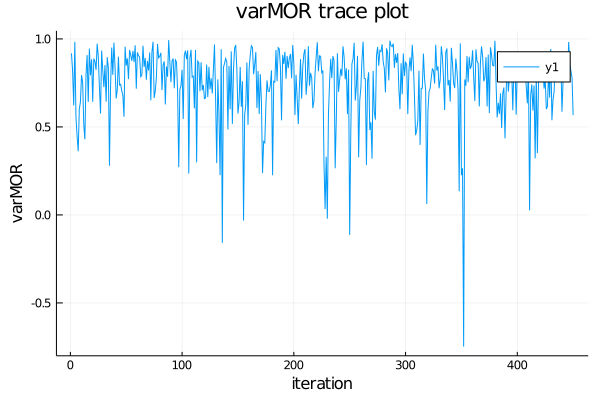

In [48]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varMOR trace plot",
        xlabel = "iteration", ylabel = "varMOR")

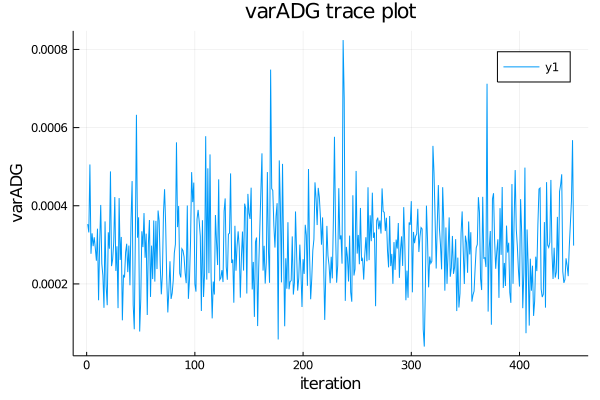

In [49]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

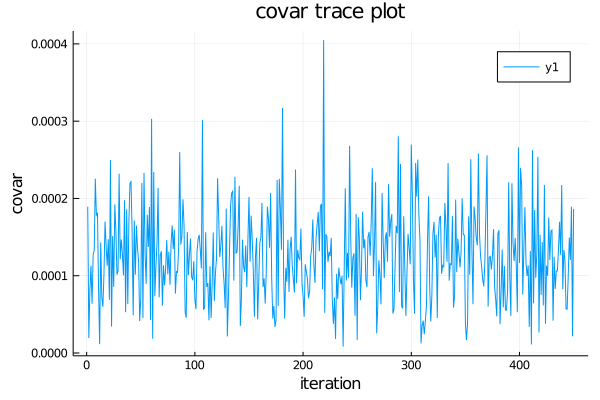

In [50]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

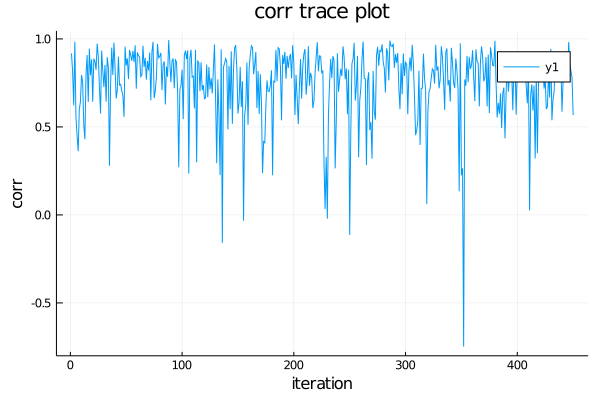

In [51]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

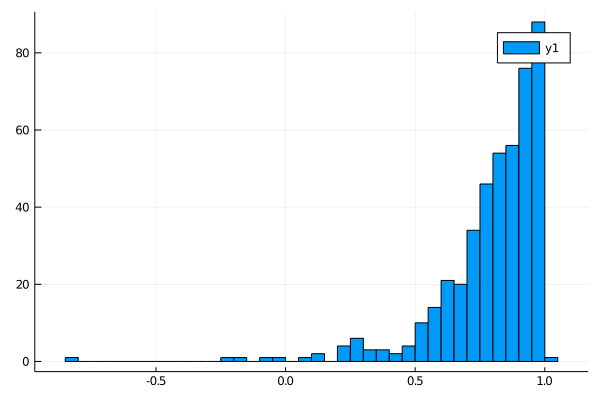

In [22]:
using Plots
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_samples_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_FinADG,FinADG_Nur2ADG,FinADG_FinADG
,Float64,Float64,Float64,Float64
1,0.00322877,0.000341636,0.000341636,0.00363714
2,0.00249121,-4.29333e-5,-4.29333e-5,0.00313689
3,0.00302116,-0.000116972,-0.000116972,0.00369984
4,0.00293339,0.000284299,0.000284299,0.00320452
5,0.00271623,0.000129832,0.000129832,0.00283966
6,0.00279964,-0.000165664,-0.000165664,0.00262567
7,0.00280617,-4.26627e-6,-4.26627e-6,0.00272283
8,0.003011,0.000134459,0.000134459,0.00262662
9,0.00290602,-1.86872e-5,-1.86872e-5,0.00296771


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:FinADG_FinADG]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur2ADG_FinADG] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_FinADG,FinADG_Nur2ADG,FinADG_FinADG
,Float64,Float64,Float64,Float64,Float64
1,0.00322877,0.0996932,0.000341636,0.000341636,0.00363714
2,0.00249121,-0.0153582,-4.29333e-5,-4.29333e-5,0.00313689
3,0.00302116,-0.0349867,-0.000116972,-0.000116972,0.00369984
4,0.00293339,0.0927278,0.000284299,0.000284299,0.00320452
5,0.00271623,0.0467482,0.000129832,0.000129832,0.00283966
6,0.00279964,-0.0611021,-0.000165664,-0.000165664,0.00262567
7,0.00280617,-0.00154341,-4.26627e-6,-4.26627e-6,0.00272283
8,0.003011,0.047812,0.000134459,0.000134459,0.00262662
9,0.00290602,-0.0063633,-1.86872e-5,-1.86872e-5,0.00296771


In [8]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

0.038550040857535744

In [6]:
using Statistics
std(gVar[!,:corr])

0.062218670781948524

In [7]:
h = histogram(gVar[!,2])
display(h)

UndefVarError: UndefVarError: histogram not defined

## BV correlation for SSC3 region from MCMC BayesB samples

In [6]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_geno_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 102313:103184]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 102313:103184]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_geno_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 102313:103184]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,NaN,3.14518e-7,0.0,0.0
2,2,0.999133,2.14063e-5,7.30538e-5,3.95108e-5
3,3,-0.11297,5.00973e-6,2.20813e-5,-1.18818e-6
4,4,0.0153738,1.23056e-5,1.38746e-5,2.00882e-7
5,5,0.753649,4.66218e-5,5.62262e-5,3.85863e-5
6,6,0.988893,5.51564e-5,4.98117e-5,5.18338e-5
7,7,-0.719351,9.54655e-6,2.65261e-6,-3.61994e-6
8,8,-0.196345,1.18618e-6,1.63886e-5,-8.65697e-7
9,9,1.0,1.75337e-10,1.11613e-8,1.39892e-9


In [7]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

0.4064485700514928

In [8]:
using Statistics
std(out[!,:corr])

0.5230061235238583

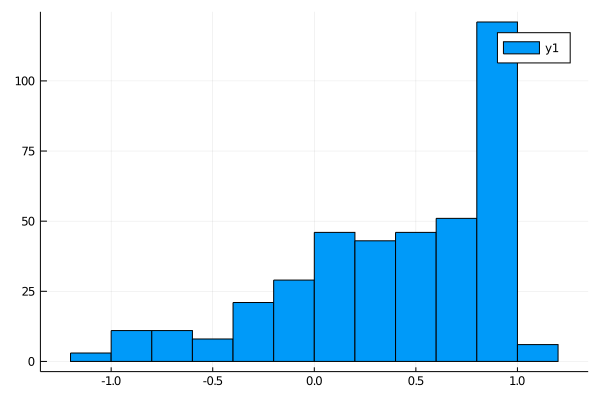

In [9]:
using Plots
h = histogram(out[!,:corr])
display(h)

## BV correlation for SSC4 region from MCMC BayesB samples

In [20]:
SNP_Effect_ADG= readdlm("MCMC_samples_marker_effects_geno_FinADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 112050:112624]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 112050:112624]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_samples_marker_effects_geno_Nur2ADG.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 112050:112624]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.8723,3.27979e-5,0.00031056,-8.80363e-5
2,2,-0.994652,7.42701e-6,0.000391211,-5.36147e-5
3,3,-0.970437,2.97511e-5,0.000183906,-7.17822e-5
4,4,-0.998377,0.000109133,0.000195175,-0.000145708
5,5,-0.806323,2.59018e-6,9.53956e-5,-1.26747e-5
6,6,-1.0,1.09315e-5,0.000229908,-5.01322e-5
7,7,-1.0,7.89111e-5,0.000162401,-0.000113204
8,8,-0.873672,1.15265e-6,5.9751e-7,-7.25053e-7
9,9,0.995923,1.28495e-6,4.46318e-6,2.38502e-6


In [21]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.7881998245410385

In [22]:
using Statistics
std(out[!,:corr])

0.4211227569449803

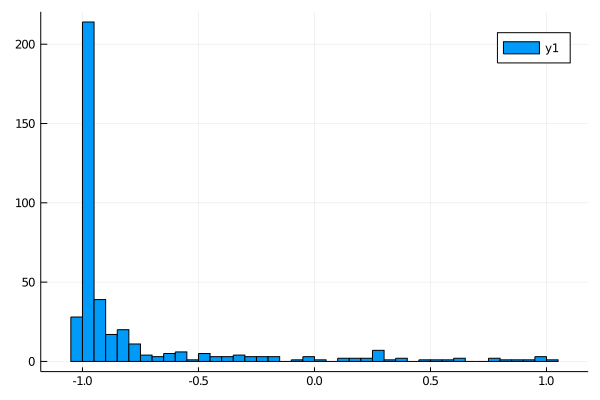

In [23]:
using Plots
h = histogram(out[!,:corr])
display(h)